<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/Pytorch008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

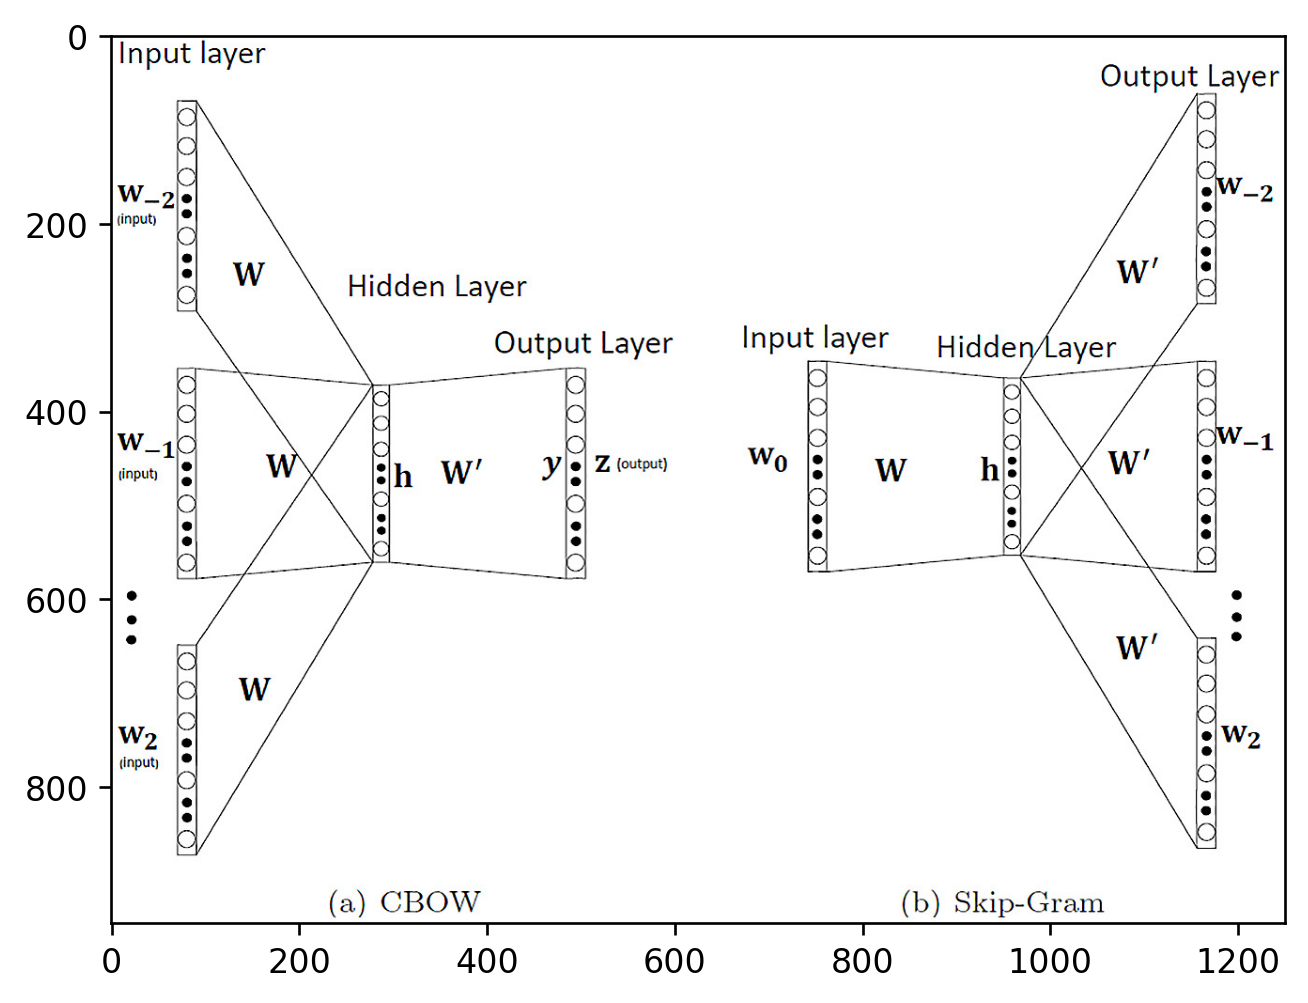

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('pic.jpg')
plt.figure(dpi=240)
plt.imshow(img)

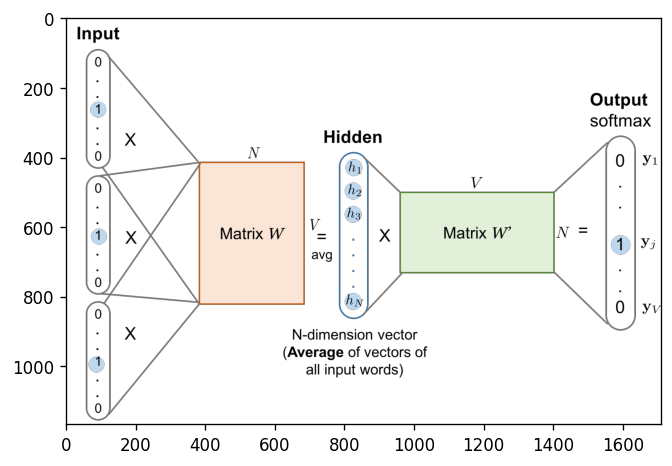

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('word2vec-cbow.png')
plt.figure(dpi=120)
plt.imshow(img)

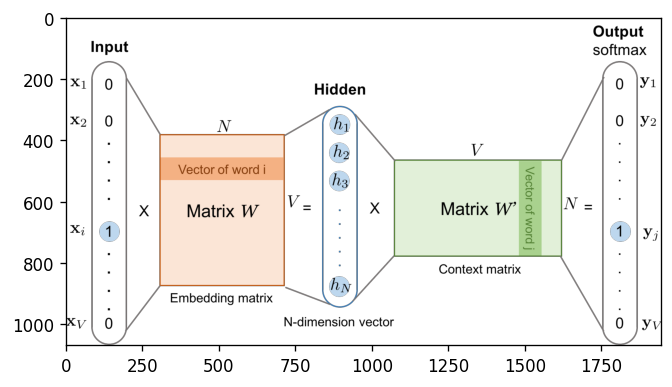

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('word2vec-skip-gram.png')
plt.figure(dpi=120)
plt.imshow(img)

In [4]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F

# The Continuous Bag-of-Words model (CBOW) is frequently used in NLP deep learning.
# It is a model that tries to predict words given the context of a few words before and a few words after the target word.
# This is distinct from language modeling, since CBOW is not sequential and does not have to be probabilistic.
# Typcially, CBOW is used to quickly train word embeddings, and these embeddings are used to initialize the embeddings of some more complicated model.
# Usually, this is referred to as pretraining embeddings.
# It almost always helps performance a couple of percent.

CONTEXT_SIZE = 2  # 2 words to the left, 2 words to the right
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

vocab = set(raw_text)
word_to_idx = {word: i for i, word in enumerate(vocab)}

data = []
for i in range(CONTEXT_SIZE, len(raw_text) - CONTEXT_SIZE):
    context = [
        raw_text[i - 2], raw_text[i - 1], raw_text[i + 1], raw_text[i + 2]
    ]
    target = raw_text[i]
    data.append((context, target))


class CBOW(nn.Module):
    def __init__(self, n_word, n_dim, context_size):
        super(CBOW, self).__init__()
        self.embedding = nn.Embedding(n_word, n_dim)
        self.project = nn.Linear(n_dim, n_dim, bias=False)
        self.linear1 = nn.Linear(n_dim, 128)
        self.linear2 = nn.Linear(128, n_word)

    def forward(self, x):
        x = self.embedding(x)
        x = self.project(x)
        x = torch.sum(x, 0, keepdim=True)
        x = self.linear1(x)
        x = F.relu(x, inplace=True)
        x = self.linear2(x)
        x = F.log_softmax(x)
        return x


model = CBOW(len(word_to_idx), 100, CONTEXT_SIZE)
if torch.cuda.is_available():
    model = model.cuda()

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

for epoch in range(100):
    print('epoch {}'.format(epoch))
    print('*' * 10)
    running_loss = 0
    for word in data:
        context, target = word
        context = Variable(torch.LongTensor([word_to_idx[i] for i in context]))
        target = Variable(torch.LongTensor([word_to_idx[target]]))
        if torch.cuda.is_available():
            context = context.cuda()
            target = target.cuda()
        # forward
        out = model(context)
        loss = criterion(out, target)
        #running_loss += loss.data[0]
        running_loss += loss.item()
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('loss: {:.6f}'.format(running_loss / len(data)))

epoch 0
**********


<ipython-input-4-1f7333d09b41>:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


loss: 3.925594
epoch 1
**********
loss: 3.858486
epoch 2
**********
loss: 3.793368
epoch 3
**********
loss: 3.729393
epoch 4
**********
loss: 3.666380
epoch 5
**********
loss: 3.603407
epoch 6
**********
loss: 3.540892
epoch 7
**********
loss: 3.478262
epoch 8
**********
loss: 3.415421
epoch 9
**********
loss: 3.351599
epoch 10
**********
loss: 3.286959
epoch 11
**********
loss: 3.221622
epoch 12
**********
loss: 3.155306
epoch 13
**********
loss: 3.088453
epoch 14
**********
loss: 3.021709
epoch 15
**********
loss: 2.955026
epoch 16
**********
loss: 2.888759
epoch 17
**********
loss: 2.822735
epoch 18
**********
loss: 2.757460
epoch 19
**********
loss: 2.692799
epoch 20
**********
loss: 2.628095
epoch 21
**********
loss: 2.563817
epoch 22
**********
loss: 2.499206
epoch 23
**********
loss: 2.434256
epoch 24
**********
loss: 2.368809
epoch 25
**********
loss: 2.303123
epoch 26
**********
loss: 2.237128
epoch 27
**********
loss: 2.170632
epoch 28
**********
loss: 2.103993
epoch 29
*****

In [5]:
#import base64
#
#pic_path = 'word2vec-skip-gram.png'
#with open(pic_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)

In [6]:
import base64

encodedMdl=r'iVBORw0KGgoAAAANSUhEUgAAB5kAAAQuCAYAAADm54rnAAAAAXNSR0IArs4c6QAAAAlwSFlzAAAXEgAAFxIBZ5/SUgAAQABJREFUeAHs3QmcHGWZOP7pCQlH5BJZUZBDEAUVVFQOr7i7/r3dXTWux3qgyHKISQS8xftYQZNwarxFd11R/Ll47equQRDxWBXvVVRQQE65JEBIpv/PE6ZDTaWqp2emZ6a75/t+Pk+q3qOub00aJk+/VUNDCgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6JpAo2t7siMCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECvS2wdZzeThF/NRrbxfKGiGtG44+xXBOhECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMAcFMgJlwdEnBDxvYiRiGabuD36Vke8PmL/iEEsJqFO/q6ym7ydLQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0vMCT4wx/GtEuqTxe35dj+4f1/JV2foKLY+hZnQ83siDAroBhlQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMAgCdw9LuarEeMlkDvtz9nPn464W0S/lv3ixL8ZkdecM7qVzgXYdW5lJAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG+E7hfnPGvIzpNIE9k3EWx3137TGSHON/TI9ZFtK5Vkrmzm8iuMyejCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPStwF5x5tdEtJKp07G8Mvb/oD4QGo5zfEXEnyPKDpLM7W8gu/Y+egkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgMhMDWcRU/jygnVNvV18T4n0TcNMHtcqb0NhG9XO4ZJ1d37ZLM7e8cu/Y+G3ozE68QIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6GeBT8TJ7zvOBWTS9WMR/xTxwIhMTOf7dreNyMdsL45YGZGPlm5XcmzuRyFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBPhT4/+Kc62btttqvijFP7vDaDoxxv+1gn8/vcH+zMcxs3Mmrs5u8nS0JECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI9LxAPrU3H3ndSiZXLb8R/TtN8ErycdifGWe/edzGBPc7U8MlSicvza4Du806GGMIAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgV4UyNnJD25zYtdHXz4GO5cTKfme5hdHHByxa82GedynRHy5pn+uNT8sLnjviN0i8pHjV0R8P+LiCIUAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQI9IXBGnEXV7OVW22umeJYvGWf/X22z/3dE33U18cQ22xW7LqjZPve7oDgw1jMh3jpeJtVbBuVlJoBb41rLZdFWLiuiodVfXH69MHB+rB8T8YuI8nFa9R9F30QfLd7vdnHJg13MZB7s++vqCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKDLPDUNheXM2lPbtPfSdcnY9DxEfvWDH5stGei9Y6K/q2i7e4V7dlUThDXDBvaNjrq9lHeJs+jk7HzKsZtWd5Z1BdWjMtheU5Z9ojIR4o/MittykOi79MRh0U8N+LqiPFKv9uNd31935/PqVcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI9JvAfnHC92lz0u+Kvlvb9HfSNRKD3t5mYCZDD2jTP6hde8aF5aOwx0swF6//8VE5P6Lu8ePFsdZ7XECSucdvkNMjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoFMhZxO3Kd9p1TqDvB+OMfdw4/YPWvXVc0DkRO0ziwu4X23w+ojGJbW3SQwKSzD10M5wKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAxwI7jTPyknH6O+3+QwzM9wvXlX3qOga0/QFxXVXXnI8Mr3pseJnh4dEw0Xc0l/ehPssC3sk8yzfA4QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBCYlsGObrW6Kvj+36Z9I19oYnO933rlmo07eg1yzaVeb/xh7O3F0j/k+5aNq9n5ltJ9Z6ruwVJ9I9bQYnO9c/tHoRplEfnnEi0brVYt8lHnOaL6tqnMW2mbLbhYu1SEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIzF2BTFLmDOOquKjLLPku4arjZNu3a471/jbbPL1mm3Lzz9vsY0F5cKF+zzbbfa8wrt3qh9rsI6/7lojntNnBK6JvXUSd2+vabNvvdm0ubTC6PC57MO6jqyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIzDWBdjOZL+kyRrv99cpM5i5f8ri7y1nTn20z6tToyxnOdWVZXYf23heQZO79e+QMCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIENhW426ZNG1s6eTfwxsEdrDTajJnfpm9Qu/JR5DnbeLzyzhgwUjMovyQwVxP0NST90yzJ3D/3ypkSIECAAAECBAgQIECAAAECBAgQIECAAAECBAjcJXD9XaubrN13k5apNezRZvNMuM618q9xwfne6/HKr2PA19sM2qtNn64eFpBk7uGb49QIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqBdold9slhWt32KZj9zZ97c6jzWZ93fXbCZz9b9qMlWRug9PLXZLMvXx3nBsBAgQIECBAgAABAgQIECBAgAABAgQIECBAgECdwHV1HdG+XcT2bfon0rVFDN6pzQbTmWTu1VzepW08yl1/LDcU6nsW1ru92qt23b7OWdkf3Flhd1ACBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEpClw2zvb3Hae/0+7dYmC7dzJPJOHaOma7/bXG5HJesdJD65dP4Fz+0GbsZGYy97tdG47+6ZJk7p975UwJECBAgAABAgQIECBAgAABAgQIECBAgAABAgTuEjj/rtXKtQMqWyfe+LBxNjlvnP6q7k6Tx5tVbdwDbXefwDm0y0fePoH9tIb2u13rOvp62e6m9vWFOXkCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGBFrgwrm5tmyt8ffRt3qa/k65MaL6xzcCR6Pt2m/66rk4TpQvrdjDL7feZwPF3bjP24jZ9dV39bld3XX3VLsncV7fLyRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECIwK3BbL77bRyMdcv6JNfyddL4pB+7YZ+OPou7FNf13XlnUdpfZtSvVeqXYryfzbSVxQv9tN4pJ7bxNJ5t67J86IAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgM4FPjDMsZzNvN86Yuu6cBf3Wus7R9o+26c9ZznWlkxnKed5b1O1gCu3dyA/uP4Hj795mbF2SeZDt2nD0T1c3foj652qdKQECBAgQIECAAAECBAgQIECAAAECBAgQIECAwCAJnBkXc3mbC8p3B38sYus2Y6q6FkTjaRHtZuxeE/3tksw3VO14tG3HNn2trnYzqFtj6pbr6zqivdPHTbfZxdDTonOfdgNG++4Vyye1GVeXZB5kuzYc/dMlydw/98qZEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIjBXIdzK/f2zTJrW/j5YfRjxsk57qhr2i+TsRL6vu3th6cqzdurG26cqfN23a2LLfxrX6lZfXd43bs67NiEygT7VkjvENHexkWYypey92fjng5pp9DLJdzSVrJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgpgTykdI/imiOE7dH/+siHhRRns3biLa9I46KuClivH39PMaM98jr57TZTz4O+q8j6komxnM2crvzaJcsznOr2/ba6CtffzRtUj4ULXX7yPY8v9dsstVdDU+O1b9E1O3jlXcN3WSt3+02uSANBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0lsCecTrXR9QlNMvta2LsBREfiVgdcWNEeUxdPWffPiBivHKfGFC3j2y/LOLREcWE7zZRPyEiZyK32zb72iWZM2mes7zr9vHB6MvZ1AdGZKL4uRHlMl6SubXvz8SGh0TkjOU87v0j8l3W7ZLkv4n++RF1pd/t6q5LOwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECPSTw9DiXOyJayc/pWGbiNGfZdlp+FgPHO49Mjp8TcX5EJ7OoW/trl2SOXQ1dEtEaO97yjNygVDpNMrf2nTPFO030P7t0rKpqP9tVXY82AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgR6UOBv45w6TXS2kqOdLjMB/NQJXvOSGN/p/svjMqH92Tbbj5dkPqXNtuVjZZK7XNolmdvNki7vu1y/oHygmno/29VckmYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBHpRYO84qV9FlJObU6n/NvaX73KeaBmODTKpOpljZ5I1H2Ndt+14SeZ8FHbdtuX2H8fYcmmXZH5ZDP5dRHk/49X/L7bJR2F3UvrZrpPrM4YAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgR4SyPf9HhmR7z0eL/HZrv+q2H5pxBYRky33jA1XR7Q7TrHv6hj7zIgsU0ky5/afjijuu2792hxcKu2SzIti7L0jvhdRt89y+7dibFpMpPSr3USu0VgCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBHpIIJPDL4/4QsQNEeXEZ1X9LzHuyxFHRyyM6EaZFzt5dUS72b+Z0H5fxF9FtMpUk8y5n8MibomoutZsy3cpfy2iEVEs4yWZc2xe13ERmRiv2/+vo+/QiPL+o6mj0o92HV1YPw+a7M3s52t27gQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnNPIJOVj4jYK2LHiHtEbB+R71rOmbzXRFwS8Z2IfOfwdJTMzT0mYp+IXSPynC6N+E3E6oh1EdNR8tHa+0Y8JOKBEWsiMqn9h4hzI26OKJdMMmeCuqo8PhpXFzryOv464sEROcP51ogrItKy6lHc0Tzh0k92E744GxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDfBTqZydzv1+j8JymQL8xWCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARwKSzB0xGUSAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECKSDJ7OeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDoWkGTumMpAAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEJBk9jNAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAh0LSDJ3TGUgAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECEgy+xkgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgY4FNut4pIEECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMwVgavjQn9bc7G31bRrJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAzAo2eOZPBOJHj4zIW11zK16L9hJo+zb0lkH8vmr11Ss6GAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFBFDg1LiqTk1XxqUG84AG8pvySwFkDeF0uiQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBXBIa7shc7IdD/AvvFJXwz4rMRu/X/5bgCAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAtMjIMk8Pa722j8CO8Spnh7xw4hFEQoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAm0ENmvTp4vAIAvkFyyOinhbxPaDfKGujQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA3BSSZu6lpX/0ksGOc7Cn9dMLOlQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAvCHhcdi/cBedAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBPhGQZO6TG+U0CRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AsCksy9cBecAwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBPpEwDuZ++RGlU7zHlE/MOI+Ebn+54jLIs6NuDFiOsvDYud7R+wWsS7iiojvR1wcoRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHRfYEHs8oER947I3NB1EZkbujzi2ohmhEKAQJ8KnBrnnX+Jq+JTba7pmOjLD4Ny/Kq0zWOj/sWItRFVx8j2L0ccENFpWREDy8fN+tcLO5gf68dE/CKi6rjZ9qOI50dMpLwjBlcdO9ue2OGOLmizj/zALZaDo9I63vWxXnctmTxvjWstlxV3ZJ0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMAMCd4tjvDvi6oi6vMa/zMB5OASBMQKbjampzJbAFnHgu1ccPJOdWbaKeE/EKyIaEXUlk8FPiXhyxLsi3hgxXlkYA6qOve3ohnvE8jMRjxyt1y0eEh2fjjgs4rkR+WE3Xsnrqjp2bldOENftK8+zbh/lbdKnk7HzKsZtWd6ZOgECBAgQIECAAAECBAgQIECAAAECBAgQIEBgGgV2jH1/NWK8yYU5SbBc8pW5mbPJxPSHyp3qBKYq4J3MUxWc/u0zuZkfIMdEtEswF88kx70h4vhi4yTW94xt8lHY4yWYi7t+fFTOj9i12GidAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgQgL5BN3xEsy5w5+V9prbfCfigxE7lPpUCXRFQJK5K4zTtpOcaf65iHxM9mTKa2KjnKk8mbJ1bHROxGQ+fO4X230+otOkeAxVCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIERgUeFMvnVGhcE23/HZFPof1GxE8jfhnRKu+Ple9FTGQCYWtbSwIdC2QSU+ldgXy0cz7+uljWROXiiEwe50zjdiUTxPkohJXtBtX0PaCm/Y7R9nz0dLvy8OjMdzTnI7QVAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBzgUWVQz9VLQdEXFLRV+r6R9jxSTTlobltAlIMk8bbdd3nO84PiHiYxFrR/eeM4aXRRw5Wq9aHBqNk0kyl/d1WjRkwvhHox2ZRH55xItG61WLfC90zmi+rapzFtr+GMc8cfS4maQ/quYcroz2M0t9F5bqqgQIECBAgAABAgQIECBAgAABAgQIECBAgACB6RIoTzTMXEvmhNolmKfrXOyXAIFpFshn4+cL1Ksiv11SV/LdyVXbtNoui/69azbOb6PkYxFaY8vLW6Ov3WOr82Xv5W2K9fywqnocQzRvKK+IP9dFFLcprr/uzmGVf+YjG4pji+tPr9xi08aft9nHgk2Hb2y5Z5vt8jESCgECBAgQIECAAAECBAgQIECAAAECBAgQIEBgtgQ+HAcu5k2Kj8Rud06Xl7Z7bbvB+ghMVsB0+cnKzex2r4rD/brmkCPRflhNXzZvEXGPNv3jdeXM38+2GZSJ9ZzhXFfyWzUKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBA5wJblYZeUaqrEphVAUnmWeXv6OB/ilFnjTPy99F/fZsx5Q+iNkPHdP05ajnbeLzyzhiQye6qsmM05rulFQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgc4Eyk+pbb1KtbOtjSIwzQLeyTzNwF3Y/U9iH/k4hPHK72LAATWDtqxpH6/5X2PATeMNiv6cZf31iCfWjN0r2j2CugZHMwECBAgQIECAAAECBAgQIECAAAECBAgQINBVgW1ib/lO41ZknuXaiKsjvhtxTUS3Sk7o3CNin9HIY+VxLom4MGJQksP5WtcHR+waka8r/WNEToJMz7qJiNG1odwt/nxUxO4RO0RkTutXEZlfWhPRjZL3YL+I3H9G5sZuGI081zzPbh0rdqUQ6K7AdLyTuZOZxHkV34rID66qeFAOqCnt3sm8tGabquZTorHq2Nn2/KoNoi2vrW4b72SuQdNMgAABAgQIECBAgAABAgQIECBAgAABAgQIbCKQM3+fErE6oi73kO2ZEP1xxKsjtoqYbHlSbJhJ5Fsj6o53c/R9LuLhEeOVN8eA6wpxe6wX95vJ6mJ/rn8lYpdSe15fcbtMrBa3+2nUy+XfoqE45hGFAc+K9fMjivssrmfCOF+dOi+iXO4TDR+MSIfiNq31ddGeuaKFEZMpD4yN8t3Vl0a09lm3TL9zI/4hIn9W2pU8p6JHrue9zuR6p+W0GFjex4pONzZu7glMR5L5zR0y/leMq/uLM9kkc/5F67Tkh3Hd8d9Us5NuJJnzRfd1x233l/2ebbb7Xs35aiZAgAABAgQIECBAgAABAgQIECBAgAABAgR6TyD/zf9HEXX5grr2K2Obp0/wcu4X48+Z4LEy8fuZiG0j6sq/REfdeda1Z/J31wlul7N6y+VL0VA8xsFRz9nHnyy1F8eU1z8fYzePaJVM+F8bUR5XVf99jHtka8MOlvma1s9GlBPqVfuuaku3fN1rXdk6OjJ5Xt72LXUblNozv1be9tfRlqYDU7yTufdvZX4DppNyWyeDJjjm8gmM/0Obsfm47ImW8b5F0tpf1TdjWn2WBAgQIECAAAECBAgQIECAAAECBAgQIECAwGAL5CzYTJI+ZBKXmcnpsyNytm4n5RUx6GcRT+tkcGFM5jz+MSJnw+5ZaO/V1ZzEl6YvnMAJPjPGLh8dn+u5/Q6j9fEWu8eAj0dsFjFeyZnb50Usjug0l1TeZz66+z/LjYV6zrz+p4j1hbZcfX3Eg0tt5eq9oyGfIlwsa6OS9/8vxcZ+X+/kZvX7Nfb7+XeaZC7/oHfjuvObIJ2Wdl9YyEc6TLR0mjz2MzxRWeMJECBAgAABAgQIECBAgAABAgQIECBAgMDgCOSjnh9eupwfRn1VxK8jcrZyPpZ5t4hMRC+N2DmiVTLPkI90/nrETa3GiuXzou3kiHJi80/RljObvx+Rx90+ImflHhSRs6SL4x8Q9f+OOCDiuohi+a+oFJOQmUQtJjR/E/UzixvE+h8jbow4odB+fKxvXajndWVStlXaXWNrzImx8ohWJZaXRXw6It+jnPmoB0X8fcTeEcXy8qisjvhYROu68/y+HPGTiDzfQyL+NuL+EcWyT1SOjDil2Fhaz31+PmLfUnu6fSLiWxFXRFwTsWPEHhF5rv8cUZ5F/tBoe1LE1yKqygXR+O6INxY658f6RyPy3lbl5fL8PhmxQ0Sx5NOAc6a9QqBW4NToKU9/b9U/VbvV0FD+hW+NKy8Pb7NdsesLbfaRf4Hqyoeio3zMVj0/DDot7a4h//JUlXaPy3521QYVbVdFW+t8y8sFFeNbTfntpPL4Vt3jsltKlgQIECBAgAABAgQIECBAgAABAgQIECBAoHcFdotTa/3bfmtZl5NoXcXmsZKPWm6Nby1f1xpQscxkb06oa41tLb8abfeoGN9qyiRmJjxb41vL3C4Tku3Kv0Vna3wuc5tOyuUxqLjdazvY6EulbVrbZyL1uIhMxJfL3aKhXW4q9/GViJ3LG47W3xrL1nFayz/VjG01H1qxzfnRVk4gt8a3lnePlfzSQes4rWUm/NuVvO7MGbXGt5avqdkorVpjWsv/qBmrmcAYgVOj1vqhKS/7Mcn8tjFX176yos21P6tm03ZJ5hfWbFNuvrXNcSWZy1rqBAgQIECAAAECBAgQIECAAAECBAgQIEBgcAReFJdSzMd8u8NL2zLG/bK0bSYr60pVMjVnuY6XKM795eOdfx5RPM9cf2ZEu9ILSeYXtzvB6LtHRF2eJs3albTLWclll+3abPTT0vhLo57n0EmZF4Nypnn5ePccZ+O9o/8vpe3ymu9f2i5nRpe/iJAzt8uzmkub9W+13SOO+/eqnHm3BPafwI52bzP2tzV9IzXt2bywTV+rKz9otmhVurj096KLmHZFgAABAgQIECBAgAABAgQIECBAgAABAgSmSeBxpf3+rFSvq2aSMB9r3CqZHNwmImeulsvDoiEfDV0s+ejqN0VkwnK8clkMWFIxqJMZxhWbzVjT6jjSJ8Y52rXRf1bFmPQ8tqK92JR2y4sNo+v3rWjLpmwvP7n31GjLc+ikrI9Bp1UMvE9FW7EpH7n+qmJDrGduKp8U3PqSQX5p4V8jipMf83gviLguYiCLZNpA3tauXdTTYk/7dLC3e8WYfORDXfltTccNNe3ZvGObvlZX+Zn7rfZOlvmXu67kt1kUAgQIECBAgAABAgQIECBAgAABAgQIECBAoLcFyhPWMlfRSvyNd+YfiQGPj9g1YquI/SLy3c3lsrjcEPU3RVSNrRi6oekb8WdGsTwiKhOZ7FfcdibWV3Z4kF9UjPt4tP2uor3c9JNyQ9T3rGjLpq0jPhiRjr+PuC2i+EWBqI5bLq4YcbeKtnJTPmr7nFLjY6J+6Gjbe2L5gFL/26P+rVLbQFUlmQfqdnb9YvLn4w0d7HVZjNm8Zlw++//mmr4/17Rnc36Yj1cm8s7o8r7WlRsK9eI3TQrNVgkQIECAAAECBAgQIECAAAECBAgQIECAAIEeEignDTNhnMnA8R6BnJdwdcTqiHykcbsnr/519BfLz6Py2WJDh+uZmC6X8kzscv9s1jt99PgVFSd5UUVbVVPmj8qzwevuXe7ziIgnRNw3IpPDV0VMpGTOqlw6zQm9LDYsH+/EaHtexDGlnZ4b9XeU2gauKsk8cLe06xeUfzle02avT46+o9r0v7dNX7tHGDwrtit/cBd3lY+meFGxYYLrd7QZnx9g89r06yJAgAABAgQIECBAgAABAgQIECBAgAABAgRmX+DfK07hqdH2y4gPR2QuIR+DPdmSicwDSht/L+rlxGhpSGX1B9G6vtTz2FK9V6qXxolc0+HJVE0ozJnGnZR0vKU0sFGq11XLlnXjWu27xMrTW5XCsuoR6YXujavp8dKNtTtX7h6Lf40onnM+Hjsfkz3R84tN+qtIMvfX/ZqNs82fkZzm/5mIQyJyxnL+ZckXmr814ksRCyOqSn6D6IyqjtG277Tpy2N8MuLREcWEb/7H4ISIz0VM5ed3TWxfl2jeIfpOj8jZ1AdGvCbiuREKAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0DsCP41TyXxBuWwfDTnz9AsRmfQ7NyLfgTzRx1PfO7Yp5iiiOnRJ/jGJsi62+WNpu91K9V6pViWOJ3Juv5vA4JEJjO1kaM5M3jciv2CQ+Z2PRfwmIu3fHzGV8pXYuF3eK/f9koiqGdPZN1Cl0+z8QF20i5mUwD/GVhlrIzJBu13EeOV1MaAukZvb5l/ofKzEA7NSUXaOtvMibog4PyL/o5CJ360jplry2zH5CIe6D/DDoy+jVT4QK5loVwgQIECAAAECBAgQIECAAAECBAgQIECAAIHeETg0TmXPiIfWnFLmwnLGcMa7IzI3kMnC/Df/b0a0S3LmpLRyuaTcMIH672Ps7oXxORO2F8uNUzypm6a4faebbxsDc3Zyvt96n4i9InaNmBcxXeXY2PHjIx5QcYCV0ZaTM+dEmcpM0DkBNMcvsipBvCBMOkkw5yzlqm8PlUk/VG6oqOfxnhbxqIhigjk/+M+KmGw5ZwIb5mMUFAIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC3BP4Sp5NPYv2XiKq8Rvlsc3byYRHfiMjJcC+NqCvTkWQuHisn1/ViubkXT6pwTveJ9ZMi8v6dGfHKiHxX8x4R05lgjt0P3Rrx5lypKJ+qaBvYJknmgb21XbmwI2Mv+a2aiZZfxwY567mTckoMavfY7Hb7eFV0nt1uwDh9E/nLnh9YCgECBAgQIECAAAECBAgQIECAAAECBAgQINB7ArfFKeXjsHeOWBrxw4hOSiacPxJxRsT8ig2q8mjtZj5X7GJMU07kK5ZeTeZO5RqL1zcd6y+Mnf4u4tiI4sTEumOl8TkR+fTaRRFTLZvHDt5Qs5P8Wcr+OVGq/nLMiQt3kR0J/DZG5TuRv9/R6DsHnReLx0bkt0c6KflB9Q8R53YyeHTMNbF8VkQ+dmAq5bux8b92uAMzmTuEMowAAQIECBAgQIAAAQIECBAgQIAAAQIECMySQOYPMndwQET+u/5LIz4b8eeIduWI6FwdsVVp0PWlelZ3r2jrtGm30sA8X6VzgSfF0I9GbFaxSTPaLo7IyYlviXhmxJ4R+UjtZ0R8KOKqiKmWd8YO9qvZSba/q6Zv4JolmQfulnb9gq6IPR4ccXxEuw+730R/flg/LmKif0lz/N9EvCai3czpq6P//REPijg7ohvlBbGTl0fke6brytro+EFEo26AdgIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCnBC6Ps/lYRD55dceIzHW8NeL7EVXlkGh8WamjKsm8W2nMRKq7lwZn3kPpTCATuJ+LKCeYc0LhsyMymXy/iJykmPf5CxE547kZ0SrbtFYKy4nkfv46tsun7BZLzqIvlmVRyXEKgYEXyG9u5F+wqlhUuvp5UX9CRP4Fymfdvz3iyIiHRHSr5F/mnAn9zxHvjHhPRB7jbyPKHxzR1LWyIPaU1/GSiBMj8gPoqIinRXTyuIUYphAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJ9IJAJy29ElHMjPy6de+YH1pfGZV5lMiVzHOsiisf8RJsd/Vtp7FfbjC12ZXK9eIx8jPh45UsxoLjN/xtvg0J/5lGK2+b6ToX+8VZvLG1/TM0Gny6Ny+N8PGIij6fOmdDlc83z76RsH4P+GFHc/tqo7x/x51J7jsvxCoGBFphIknmgIVwcAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0HcCmQh+eMRzJnjmW8b4n0UUk4Z/qdjHj0pjflgxppOmR5b2k8c9rs2Gksx34cyL1VsjivcqE7vZPpHyyhhc3EeuP6PDHXymYtvnjW774oq+HD/QxeOyB/r2ujgCBAgQIECAAAECBAgQIECAAAECBAgQIECAwEAK5BNQc8boTRH5COx/j9gnotOSScsvlwYvjPoWpbbzS/WHRv3ppbZOqm+uGPT5irapNmXitFgm8jjo4na9tH7vOJnyffnPaMtZ5hMpT64Y3MlTdP8ptsvHrhdLPo47vwiQJWekl2ea5/jcbmCLJPPA3loXRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAYWIH/jSu7Z+nqJpr83a60/ZVRL79j9+OlMVl9R8REcmz5vuen5IaF8oNY/32h3q3VNaUdTeRx0qVNe6ZaZX39BM8u38n9hIpt8nWq7cpu0XlaacB1UT+y1HZ41PMLD8VyalRy+4EsVTdlIC/URREgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECAyMQCYZ873KxZLvH75vsaHN+jbRV57Zmo/GLpdMZq8uNe4X9VeV2uqqmcheXtHZ7n3MFcM7bionmcuJ+I531EMDL41zKSeVHx1tnc7SzvcjfzKi6vHaW0Z7Xck86pkR+bNSLMdE5apiQ6xfFlF+/Pm20ZbHzf0oBAZOwDuZB+6WuiACBAgQIECAAAECBAgQIECAAAECBAgQIDAnBF4cV9ksxUVR33Ocq8/HYuejssvbPrFmu0dE+9qK8ZlAzH3VlQOi43cR5eN8M9rGSzxO9p3M55WOl7NuHxjRrnwpOovn+P/aDS71Pa20be5np9KYdtUbS9tnAreq/Hc0Fs8x119TNbDUVncPWvtaUhpfrOaXFlrjWssvFAdUrH+9Ypvcj0Jg4AQkmQfulrogAgQIECBAgAABAgQIECBAgAABAgQIECAwJwRyZurXIloJwNbyjmj7YEQmQDPBmjNK94h4XMTrI66JaI1tLb8Zbe1KJiNbY4vLX0X7WyLyWPeKyOO9JOKMiNsiimNzPZO+O0eMVyabZM7jlo+Z9d9E/HB0WZ4B3A9J5n+suK6RaPtsxEMiio+9ztnjOUv98xH5s1D0KN+Td0d/VXlYNJa/WJD37p5Vgwttu8X6zRHFY+Z+cn8KgYES+FBcTfEHvbi+aKCu1MUQIECAAAECBAgQIECAAAECBAgQIECAAAECgyaQCeRfRhTzGxNd/1lsn49UHq+8JQZMdN/F8b+N7TtNNk42yfzMDs5xtxhTLP2QZM7z/VhE0bO4vj76Lo+4qWbMDdH+7IhyEv570VYu+QjtX0QU95/rzy8PrKkfWbFt7i/3qxAYGAFJ5oG5lS6EAAECBAgQIECAAAECBAgQIECAAAECBAjMSYF8PPb5EeWkYCf1nO260wTUnhtjr53Esc6ObTIh3mmZbJI59/+OiHbXnrN8i6VfkswL46S/GtHu2qr6/iu2yZnsWf4hojxm7w09d/1xasWYL9zVPe5azhT/ZsU+cr8KgYEReGdcycU1cdDAXKULIUCAAAECBAgQIECAAAECBAgQIECAAAECBAZdYFFc4DciyknEcj0fmZyJ1SdGTKZsExu9JeLSiPK+i/U10f/xiEMiJlqmkmTOY70loi4ZvjQHFEq/JJlbp/ykWPlZRNG6vJ73ON+7/eiIYslEf/kR2m8tDMgEfHlf+ZjsnQpjOlm9bwy6JaK8rzz3gSiZSVcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIDIpAJgR3i9h1NHaOZb4n98qIP0ScG/GXiG6UfWInB0fku3p3jMjHNWfyOeN/I26MmK0yPw6c74jOc8t3Fv8xIq//zxH9XobjAnIG+16jy91jeWvE1RG/jjgvIpP8CgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQmE6BxnTu3L77R+Dwww/fauHmmz9oeLPN9pnXbO4RZ757c2ho51jeY6jR2GGo2dw6lpvHcsGGq2o01sb67dF2cyyvi7Zr44fp8lhesr7R+P3IunW/vOX223+2atWqNRvG+4MAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGDWBOSCZo1+IA8syTyQt3X8izr2mGP2bQwPPyaSxI+KH4KDGo3GnrHV8PhbTmjESLPZ/G0kqy+MRPS3myMj573vlFN+MaE9GEyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDBhAbmgCZPZYAICkswTwOrnocccc8zmWw4PP3FoePhpkfB9ciSXd5mV62k2L4tjf3VoZORLt46M/Ocpp5xy+6ych4MSIECAAAECBAgQIECAAAECBAgQIECAAAECBAZIQC5ogG5mH1yKJHMf3KQpnGLjuKVLHx83+cUxU/nvYj/bTmFf07HpjTHT+Ysx0/kTJ61Y8c04QKwqBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECHQrIBXUIZVh3BSSZu+vZE3s78sgjt996wYLDm43Gy0cfg93JeY3EoIsjy/vTmGX8m1he0mg2L43Ga9YPD+c7l29oXH757ZcNDa3NncU06AXNnXfePFa3mzcyskM8Z3vHON5u8QO1e8yWvl8sHxx9e0V09AjufKx2HO9DN69du+qMM864PrZTCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEKgTkgipQNM2ogCTzjHJP78GOPfro3Ybnzz82Hkf90rixC9sdLZLIt0T/uRHnRXz7xltu+d9Vq1atabfNRPvyBfLbLlx4QGz3qIjHRDyuo/NqNj86cscd73vfaaddOtFjGk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQGFQBuaBBvbP9d12R81P6XWDZEUfsvNkWW7whZi2/LK5lQd31RGL5yrjhn4vZyV+8fd2682b6fcj5LoDNN9vsMTG1+e/iXJ4d57JT3blG+9qY3fyRdbfd9s7lH/jA5W3G6SJAgAABAgQIECBAgAABAgQIECBAgAABAgQIDLSAXNBA396+vDhJ5r68bXeedM4U3m6rrV4bj6k+Lm7kljWXclskdM/OhG2893h1jMnHYvdCGY73RS/KxHic+zPjhLaoOqk491vjMdon3bBmzXu6PdO66njaCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQK9IiAX1Ct3wnmUBSSZyyJ9Uj926dJnDzcaK+IG7lx1ypGcvXyo2Tx53c03f3j5Rz7y56oxvdK27GUvu/tmW299WDzm+5Xtrmek2Vz6vhUrPtcr5+08CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLTJSAXNF2y9tsNAUnmbijO4D5GH4dwWswA/rvKwzabv4sE89tvXLPm0zHz947KMT3aGN/Gmb/tVlu9IH4o3xQJ5/tWnWbMyP5iPEL7aI/QrtLRRoAAAQIECBAgQIAAAQIECBAgQIAAAQIECPS7gFyQXFA//AxLMvfDXRo9x+OXLFncGB7+YFS3L592JJavbI6MnPCDiy762OrVq9eV+/upvmjRos0evv/+h8a1vi1+QKve23x9XOs/n7hy5Vn9dF3OlQABAgQIECBAgAABAgQIECBAgAABAgQIECDQTkAuaKOOXNBGit5ckWTuzfsy5qyWLV685fxddjktGg8d03FnZW0kXN/fuPnmd733ox+9uaK/b5te/dKXbt3ceuvXR7L5VXERCyou5GN3XHbZ0cvPOuvWij5NBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG+EJALkgvqix/UwklKMhcwenF12bJl950/NHR2nNv+Fed3wdpm87AVK1b8sqJvYJqWLl26z4JG48NxQYdUXNRF8UzwZy5fvvx3FX2aCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQI9LSAXNDQkF9TTP6KVJyfJXMnSG43HLV26aLjRyATzmMdjx3uJb493Fr/uxOXLV0RfPCl7TpTG8cuWLR1qNt8d76PevHTF1480m888acWK1aV2VQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAzwrIBY25NXJBYzh6uyLJ3KP359VLl74wEsk5e3fMY6Ijo/yLeDz2805aufInPXrq03paxy1Zsl88Pvvf4gd339KB1kYC+rD3rlhxZqldlQABAgQIECBAgAABAgQIECBAgAABAgQIECDQcwJyQdW3RC6o2qXXWuf12gk5n6Gh45cuPS5m654RFmPvT7P52eZ11z3tpFWrLpurThd897tXHXK/+32iseWWe0US/oEFh3lR/4dDDjrolgsuvPCCQrtVAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBPCcgF1d8OuaB6m17qMZO5l+5GnEt8a+UtkSx9c/m04nHQr4/HQb+73D6X6/EIidfF48TftYlBs/nWmNH8lk3aNRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEZllALqjzGyAX1LnVTI8cO1N2po/ueGMEaj5U1o2sX39YPB77lDGDVYZixvL5Bz/ykX+Ix2c/NTiGN5I0GoseddBBjW9feOHqjW1WCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKzLCAXNLEbIBc0Ma+ZHC3JPJPabY41+liEdxaHxPuXb41YHAnmfy+2W79LIB6Z8OODDz74x9Hy9zEtf/7Gnkg0e3T2Rg0rBAgQIECAAAECBAgQIECAAAECBAgQIECAwCwLyAVN7gbIBU3Obbq38rjs6RbuYP/xrZUXxiOyP1kc2mw2b4j6005cseLbxXbr1QLxwfyo6PlSvMt6uzEjms0XxaOzzxzTpkKAAAECBAgQIECAAAECBAgQIECAAAECBAgQmEEBuaCpY8sFTd2wm3uQZO6m5iT29epXvvLxQ/PmfS02XdDaPGcwDzWbT5Bgbol0ttzw4dJofD1+qLcsbLF2aP36J7335JO/WWizSoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYEQG5oO4xywV1z3Kqe5JknqrgFLZftmzZfeP5zj+IXWxf2M26kaGhZ560fPk5hTarHQoct2zZ0xvN5hdiRnPxUfDX3zE09PDly5f/rsPdGEaAAAECBAgQIECAAAECBAgQIECAAAECBAgQmLKAXNCUCTfZgVzQJiSz0jA8K0d10KFlixdvGQnms4OimGAeGlm//nAJ5sn/gKRdc2Tk5aU9bJ/WaV5qVyVAgAABAgQIECBAgAABAgQIECBAgAABAgQITIuAXNC0sA7JBU2P60T3Ksk8UbEujZ+/yy6nxa72L+5upNl8/Uknn/yxYpv1iQukYVqWttx/1LzUrEqAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6L6AXFD3TVt7lAtqSczesvhI4dk7izl25OOXLFkcj3N+15jLbjY/G+9gXjKmTWXSAhdceOH5jzrooH2HGo0HFnby0EMOPPAXF3z3u78otFklQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHRVQC6oq5yVO5MLqmSZsUYzmWeM+s4DLTviiJ0bw8MfLB62OTT0i5Hrrntpsc361AXSNG2Le0r7vAfFNusECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgW4JyAV1S3L8/cgFjW80XSMkmadLtma/m22xRT4me+N7mJvN5u3xDuHnnXTmmbfUbKJ5kgJpmrZpXNjF9qP3oNBklQABAgQIECBAgAABAgQIECBAgAABAgQIECDQHQG5oO44drIXuaBOlKZnjMdlT49r5V6PXbr02cONxpvGdDYarz5pxYovjmlT6ZpAPBr7qkcdfPAtjaGhJ7Z2Go8qf8BBBx308+9ceOGYWc6tfksCBAgQIECAAAECBAgQIECAAAECBAgQIECAwGQE5IImoza1beSCpuY32a0j96bMhMDhhx++1bYLF/46wIuPar7gvcuXPzqOH091VqZRoPHqZcvOj/0f0jpGgF9+4y237L1q1ao1rTZLAgQIECBAgAABAgQIECBAgAABAgQIECBAgMBkBeSCJivXle3kgrrC2PlOPC67c6spjdxuq61eW0owr13bbB4WO5VgnpJsRxs3R63Xtkbnvch70qpbEiBAgAABAgQIECBAgAABAgQIECBAgAABAgSmIiAXNBW9KW8rFzRlwontwOOyJ+Y1qdH5gvfh+fM/E4nN+a0dxLuCT3z/ypWfadUtp1fgwgsvvPaQAw9cGI/KzpnjG0qz0XjkgQ95yMcv/MEPbm61WRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEJiogFzRRse6Plwvqvmm7PZrJ3E6nS33xgvc3RIJ5y9buYurylY2bb35Xq245MwJpnvato+U9yXvTqlsSIECAAAECBAgQIECAAAECBAgQIECAAAECBCYjIBc0GbXubyMX1H3Tuj1KMtfJdKn92KOP3i1mz76suLuYxXzCez/6UbNniygzsJ7maV88VN6bvEfFNusECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgU4F5II6lZr+cXJB02/cOoIkc0timpbxmOxjY9cLNu6+2fzdDy666GMb61ZmVGCDfdyDwkEXjN6jQpNVAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBnAnJBnTnN1Ci5oJmRlmSeRucjjzxy+6FG46XFQ8Tjmt++evXqdcU26zMnkPZ5D8YcMe7Rhns1plGFAAECBAgQIECAAAECBAgQIECAAAECBAgQINBeQC6ovc9s9MoFzYy6JPM0Om+9YMHh8d7fha1DRHLz8hvXrPl0q245OwJ5D/JetIn3QowAAEAASURBVI6e9yjvVatuSYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoREAuqBOlmR8jFzT95pLM02fcaDYaLy/uvjEysnLVqlV3FNusz7zAhnvQbJ5cPPLovYp8s0KAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6EhALqgjppkfJBc0/eaSzNNkfNzSpY9vNBp7FnZ/2x1/+ctHCnWrsyiw7uabPxyHv611Cnmv8p616pYECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXYCckHtdGa/Ty5oeu+BJPM0+caU2BcXd91sNj+//CMf+XOxzfrsCeS9iEdmn108g/I9K/ZZJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgUBcp5Bbmgos7sr8sFTe89kGSeBt9jjjlm85gZ+3fFXUdC86PFuvXZF4gP+zEzy/Oe5b2b/TNzBgQIECBAgAABAgQIECBAgAABAgQIECBAgEAvC8gF9fLduevc5ILusuj2miRzt0Vjf1sODz8xFtu2dh0J5itPWrFidatu2RsCeU/y3hTOZtvRe1doskqAAAECBAgQIECAAAECBAgQIECAAAECBAgQGCsgFzTWo1drckHTd2ckmafDdnj4acXdxuMSPhf1kWKb9Z4QGBm9N3edTOne3dVhjQABAgQIECBAgAABAgQIECBAgAABAgQIECAwKlDKJ8gF9exPhlzQNN0aSebpgG02n1zcbWSXv1isW+8dgU3uTene9c6ZOhMCBAgQIECAAAECBAgQIECAAAECBAgQIECgZwRK+YRN8g09c6JOZJN7U7p3hCYnIMk8ObfarY495ph9hxqNXVoD4nHMt9y+bt15rbplbwnkvcl7tPGs4t5tuIcbG6wQIECAAAECBAgQIECAAAECBAgQIECAAAECBO4SkAu6y6If1uSCpucuSTJ32bUxPPyY0i7PPeWUU24vtan2iMDovTm3eDoV97DYbZ0AAQIECBAgQIAAAQIECBAgQIAAAQIECBCYwwIVeQS5oB7+eZALmp6bI8ncbddG41GlXZrFXALpwerYe7TpPezBU3ZKBAgQIECAAAECBAgQIECAAAECBAgQIECAwKwIbJpHGJtnmJWTctBxBMbeo03v4Tib6y4LSDKXRaZYjxe7H1TaxbdLddXeExhzjyruYe+dsTMiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEZkWgIo8wJs8wKyfloOMJjLlHFfdwvO31lwQkmUsgU6kefvjhWzUajT0L+xi58ZZb/rdQt9qDAqP3KN77fmfJe5j3slW3JECAAAECBAgQIECAAAECBAgQIECAAAECBAikgFxQf/4cyAV1/75JMnfRdOHmmz8odlc0vXjVqlVrungIu5oGgdF7dHFh18Oj97LQZJUAAQIECBAgQIAAAQIECBAgQIAAAQIECBCY6wJyQf35EyAX1P37VkyIdn/vc2yPw5tttk/xkptDQz8t1q33rkD5XpXvZe+euTMjQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEZkqgnD8o5xdm6jwcZ+IC5XtVvpcT3+Pc3kKSuYv3f16zuceY3Y2M/GZMXaV3BUr3apN72btn7swIECBAgAABAgQIECBAgAABAgQIECBAgACBGRLYJH9Qyi/M0Gk4zGQESvdqk3s5mX3O4W0kmbt783cv7i6+EXFJsW69dwUq7tXuvXu2zowAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYJYHdxxy30Xj8sqOO2mtMm0pPCsgFdfe2bNbd3c3tvcUP586NAkGj2by0ULXawwLle5X3sodP16kRIECAAAECBAgQIECAAAECBAgQIECAAAECsyCwSS6o0Thw/uab//LVy5adefvIyFtWrlz5h1k4LYfsQGCSuaDHx67viLh9dLkuliMRWTItmBN6M+ZHbD66/FYsW2NidUy5f9TuE3FzxJqIHJcRP1pDmbe9W0Tu70cRt0b0bJFk7u6tuUdxd/ETcU2xbr13BfJezRt7emPu5dguNQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGCOClTlDzLfduiCRuMjsfzDHHXp+cueZC7ofyZ4YdfF+HtFxOEqy6HR+prKnrsaM+F8SMSFdzX13lpmwpVuCTQaO4zZ1fr1146pq/SswPrh4fxLv7E0Go19ly5dmh8CCgECBAgQIECAAAECBAgQIECAAAECBAgQIEDgToFyLqjl0mz+54krVny7VbXsPYFyLmio7l5O76nnjOjxSiaZe76YydzFWxRz4rcp7m79/Pk3FuvWe1rghtLZLVgwNHRytC0utasSIECAAAECBAgQIECAAAECBAgQIECAAAECc1SgnAtqMdyxfv0JrXXLnhUYmwtqNrfu4Ez/Kcb8JSJnJi+LeHxEVflONL41Ih+tnY/UriufiY7fRzw64kUR+ZjtLHmMcyL+OyLP8/8ierpIMnfx9sTXChbEh8vG0rj88k6+jbBxvJXZE9hwr3bZZewJNBrPPv6YYx534imnnDu2Q40AAQIECBAgQIAAAQIECBAgQIAAAQIECBCYiwLlXFAaRNuXlp9yyvf61GOnOO9MpOa7gveO2DMi3wV8WcRvIjIp+s2IuMz+LpvkghqNfIfyeOXThQEXx/ovCvXi6m1R+UbE+mJjxfovoy3juxHPitguIpPKh0ecFdE3ZapJ5vwByx+0jLURrex85lpz3zEZdMNLrvMmbRlxaMR/RZTLsdGwNKK1r7wRua/8gc0M/hYRW41GIn8lovdKs7kgptZvPK/ASZN+LnPmgyXv1R4Vd6oxb95pixYtesjq1avXVXRrIkCAAAECBAgQIECAAAECBAgQIECAAAECBOaSQCkXtOHSm8039yFBzuI9LiJzdAsrzn+vaFsU8fKISyKOjPhaRN+WTXJBeS8nVn4bw0+POKpiswOj7YkRneQw83XGme/MBHOWCyL6KsGcJz3VdzLvHPvIH7IHRxwQcVDEoyMeFZGYD43YNyK/9XDviLqblQnkXSLuF7FfxCMjch+5r9zP/hHZl8fr5FsFMWzmS7zHd17xqGedddZ431YoDu+l9fxgeWvExREnRhwW8diI1v1eFOv5oZJT9n8X8aSIvi6196rReOAj998/P2AVAgQIECBAgAABAgQIECBAgAABAgQIECBAYI4LlHNBMVvyC/Eu5h/2GUvOu/tlxAkRVQnm8uXsHg2ZPH1fxF2zLaPST6WcCyrfyw6uJSeX/nvErRVjM9f5rIhO8pg5yTOTzFkyl/imDWt99sdUk8xfjettxa/aXHtm4HPc1TVjfh/tv6jpuynafxTxzYicBX1VhDJ9AnPyg6UdZ3N4+A1Lly69V7sx+ggQIECAAAECBAgQIECAAAECBAgQIECAAIHBFjjula/8h/IVrrvjjn6bxbxDXEPOSM6JheWyJhq+HXFluSPqmVx+VUQmpudyOT8u/rwagJdGe06mHa8cHwMyKZ1ldcRPcmWKJSf6Pj/iEVPcT8ebTzXJ/JQ4UisOjvW6l1DfEn3PiPheRFX5VDQ+MOLfCp35A/zXEdtGPGx0PaeZZ8JamR4BHywVrvGpufX8RmNlRZcmAgQIECBAgAABAgQIECBAgAABAgQIECBAYG4INIbnzXtr+VKXn3rqT8ttPVzfLM7tnIi9S+eYEz3zacX5+OZ8ynBOvMu8XV5vM6JYMqmeOb+5WkbiwldF3FwD8Paa9lZzPrn5Wa1KLN8Rsa5Qn8xq3qv/iPh0RD4CfUbKVJPMxZPMl1I/PeLPxcbR9SfE8uSK9mLTi6LyvNGGm2KZCeX8oVZmRsAHSxvnSDQvPnbJkse2GaKLAAECBAgQIECAAAECBAgQIECAAAECBAgQGFCB45cseU5cWr4+tp/LC+Lkc9JosXw+Kk+O+G7EHYWOfALxWyJeGFFMgkbKZMNjszOvNFdLmtU94TlzSfka4LqyJDp2Ge38ZCzrJuhWbT8/GneM2DXiQRF5Lz8QkRN0M6+aZeTOxfT/2c0kc57tbyKeHVH8Icz2LEdGHLNhbdM//jaaPjzanM8zz8cN/GS0bjEzAj5YNnXOx7RvLMONxmmLFi2ayx+aGy2sECBAgAABAgQIECBAgAABAgQIECBAgACBOSQQKYJGzuDt55LJ4deULuDcqGfy/PZSe7Gas2P/sdgQ63tFHFpqm2vVup+HLQPidTUY94n2v4nIe5GPJj97dBmLjsqjY1TORD8/4qcRmVx+WcQ2Ea3SbK1M97LbSeY835x9/IqaE18e7U8q9WU2PzP+mX3PC39JxP9EdLvk/ud1e6cDsj8fLBU3cqTZPLoZpdUV/wF50CMe8pBXteqWBAgQIECAAAECBAgQIECAAAECBAgQIECAwOALHLdkyfOHGo19+vxK/z7Ov3wNJ0RbJzNfMxn6n6Xrr8sFloYNbHV1XFnmRKvKE6LxYRUd2f6A0fafx/KrFWPaNeXria+N+FbEGyOeFvG4iHzH9oyX6Ugy50Xks8hXVFxNJnn/PWLf0b7M2H8lopVhz29QFN/LPDpsyosHxR7+N+LSKe9pMHfgg6Xivp60YsV3ovlDpa43HH/UUTuV2lQJECBAgAABAgQIECBAgAABAgQIECBAgACBARRYvHjxvJiElsnYfi/lmcf5NNdMVnZaTioN3C/q5Xc7l4YMdPXWuLqVEVVJ+rtH+1Mjik/HvVvU3xnRKplHzac7T6R8PwY/M+IlEbmvL0dkLuvKiBkv05VkzgvJF0tXZeAzofyliPuN9t87lllOjjhxw1r3/nhI7Cp/6BP9wRE7RyibCvhg2dRkQ0vzttveFJOZb2h1x39ItmksWJAfGgoBAgQIECBAgAABAgQIECBAgAABAgQIECAw4AK73eteL4rcQOa0+r0cVLqAr5fq41XPiwG3lQblK3TncskE75hXrxYw/jnWdy3U81XBfzVa/79Yfq7Q1+lqPn03E9PrChtsEevFZHaha3pXpzPJvD5O/bkROd27XPaIhp9FPHC0IyGXja5PZZGJ7Y9G5F+MP0bkjc0XkiewUi/gg6XG5qQPfODqSDK/dkx3o/GcY5cseeyYNhUCBAgQIECAAAECBAgQIECAAAECBAgQIEBgoAQOP/zw+Y158940ABd137iGHUvX8Y1Sfbxqvrc53wFcLI8qVubg+tVxzWdFVM1mzomvLx01mR/LYyNaedn8mZroLObRXfXOonUx03VGN8WOnx5xbcUBFoy25TcfMhFcdQMqNmvblO93flBETlH/RMRfRzwmQqkXuG90+WCp9xm69IorPhyJ5h8Xh8wbHj510aJFs/LNkOJ5WCdAgAABAgQIECBAgAABAgQIECBAgAABAgSmR2C7hQsPbQwN5cTJVunXxGB5smFez5i8R+sCx1leVOpvvR631Dynqvn021/XXPGR0Z65pJdFtKxy9vP5EX1fpjvJnEC/j8jng9f9xcvnhd8W0Y2SyepHRjwjIl94nS/czqnjSr2AD5Z6mw09Z5111vr1IyNHR6K5+LP04Efuv383Zt+Pc3TdBAgQIECAAAECBAgQIECAAAECBAgQIECAwEwLxLuYFww1m28oHjfSBB8q1vto/RGlc10T9WtKbZ1U/1AatFvUF5ba5lo1c5wfrrnobaP9xIjnRORs5iwfi/jThrU+/2MmksxJlLOVj6ixeme0P6mmT/P0C/hg6cD4/SeffEG8c2HMh0Sz0Xjj8UcdtVMHmxtCgAABAgQIECBAgAABAgQIECBAgAABAgQI9JHA7jvv/PKhRmPXwinf1li37l2Fej+t3rN0speU6p1W81W1xRITvYcG4X3VxWuazPpHY6OrKjacF21LIx4/2pfvYj57dL3vFzOVZE6omyOKM0FbeAn8mYh9Wg2WMyrgg6VD7pFbb83Z8Te2hkfSeZuhBQtWtOqWBAgQIECAAAECBAgQIECAAAECBAgQIECAQP8LvOQlL9kiruL1Y66k2fzAe0899Yoxbf1T2aZ0qpeX6p1Wq2bgbtfpxgM87vq4treNc3352uAvRVw3zri+6Z6pJPOjQ+TMiPxGQ1XJ6eLnROxQ1altWgV8sHTIe9IHPpAvcH9tcXgkmv/x+GXLvPe7iGKdAAECBAgQIECAAAECBAgQIECAAAECBAj0scA9ttvuiPj3/3tvvIRmc83tzeZ7Ntb7byXzcMWSj8ueTLm1YqO5/rjsFkkmkH/VqlQscxLj2yva+7ZpJpLM9w+dL0bktz6yHB3xiw1rY//YM6qfi2g9k3xsr9p0CfhgmYDs7y+7LN+3cFFxk/jmxGnxboacka8QIECAAAECBAgQIECAAAECBAgQIECAAAECfSxw+OGHbxXJszETzkYajdNWrlxZ9TjkfrnS8oTD2yZ54lXbSTLfifmHWHw7ouqpzjkin4y78Wm52dDvZbqTzPko5q9G3H0UKl+QfnrE0yOqpoMvivbTIpSZE/DBMgHrs846a32z2cwvShTLg+PdDMuKDdYJECBAgAABAgS6JvC3safv1UQ+DWmyZXVsWLffA9vs9Flttnt+m+260fWyNsd+SjcO0GYfs3nsNqeliwABAgQIECBAgAABAt0V2G7LLY+OdzFnfuvO0mz+pXnLLe9tVft0WZ5weOskr0OSuT3cu6P76ooh2fbvFe193bTZNJ59fnPhyxF7jB5jVSxbL0T/XaznP858PaI8c/nl0ZYznb3rNhBmoPhgmSDyiStWfPvVy5Z9JDbLf2jbUOKxGW9csmTJmX3+TabW5VgSIECAAAECBHpJIL+w+oiaE7qspr2T5gNi0N1qBpb/H7k47K+iUnc+OxUHTsN6Pqqt7tj3mIbjFXc5m8cunod1AgQIECBAgAABAgQITJvAUUcddbfm8PCri+9+jYlnJ79v1aprp+2gM7PjLUuHWVuqd1q9o2JgOc9XMWTONP02rvTTEa8qXXHmPH9dauv76nTNZM5HB382Iv/hJstXIo7asHbXH+fG6pF3VcesnRS1J41pUZkuAR8sk5C9fWQkZ+UXH2uw7ebDw74YMQlLmxAgQIAAAQIECBAgQIAAAQIECBAgQIAAgV4QWLj55q+MBPPGL/FGgvmmv6xdmzmrfi+3lC5g81K902rVdjd3uvEcGbc8rrM44/uKqP9HRN1jtPuWZbqSzGeEyFNGVf43ls+JWD9aLy5yNuj7iw2j65mkzmnj+1T0aequgA+WSXjmjOX4j8vrSps+99glSx5dalMlQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEelzgmGOO2SYSzMcVTzPqy88444zri219uv6X0nmXJyCWumurW1T0FCfkVXTPuaac9X7R6FVnYvn8iJ+P1gdqMR1J5pzhmY+8znJJxFMjyonMaNpYjo+1L2+s3bWS7wo+J2KHu5qsTYOAD5ZJol5y+eWrItH8k+Lmw43GaYsXL84vSSgECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAnwhsOW9ePuJ4+8LpXn/DmjU5K3UQSjkXVJUs7uQ6q7a7qZMN59CYXeJa9xu93nz39QmDeu3dTDLvFUinRryjgJUzmK8q1KtWR6LxeRFVWfw9o/3zEZ7nHgjTVHywTBL2rLPOWj/SbB5d3DzezbzfHve+99Jim3UCBAgQIECAAAECBAgQIECAAAECBAgQIECgdwWOPPLI7YcajTH/th9TUE9atWrVoMzSLeeC7jbJu7F1xXaDYlRxaRub8jHhO47GZhtbq1feFs2tmeL5mOz/qx7W/61TTTL/vyD4r4jvRuQLq8ck3KL+xYicpdwO/OHRf3pETh+vKo+Lxv+OOLMQT6gaqG1SAj5YJsV250bvW7ny/JjN/NExuxgeftOSJUvuOaZNhQABAgQIECBAYFAELooLyW+yV0W+KkghQIAAAQIECBAgQIAAgT4TuNuCBcfFKW/bOu1IMF97y+23n9yqD8Ay3wtcLDnbdjKlartBn8l8SEB9MuJPEemYrwy+R0RV2TsaF412rI3liaPrA7lol/zt5IL/bpxB94r+jHx88LqasbtG+z/V9LWaHxMrGa2SSe2vtyqWUxLwwTIlvqGhtc3m6zdvNJ4Vu2n9B2jbBcPD+a7xF0xx1zYnQIAAAQIECBDoPYEL4pQyFAIECBAgQIAAAQIECBAYAIFjDz/8HvGU0lcWL6UxMvLe008/vTxJrzik39bLTxPO3NxkSnm722In5TzTZPbby9tkPnKrwgkeFut7RSyOKE+gPT7aMi+a5cMRv9ywNqB/THUmc/4Fy8dhXxKR071/EZEzmi+JuDLihog7IsYrt8eAHJvb/CHi4ohfRSR+rl8akd8QyDH5A6t0T8AHyxQtV65cedXQyMjrx+ym2Xze8UuXPmpMmwoBAgQIECBAgAABAgQIECBAgAABAgQIECDQUwKNhQtfHY/Kvuvx0c3mVTfceutpPXWSUz+ZzN8VS75beTJPZN29uJNY/1FEJ3nA0mZ9VS0mmFsnvihWyrOZHx1tzxsdcGssPxORy+kumWONyfcby/qNa9O8MtWZzFXPXp/oKZ8dG+QPszI7AnUfLPnlgYmU3UuD58IHy8ZL/v0VV3xwj112OSIaHpyN8a2nRixOW7x48QH57uZsUwgQIECAAAECBAhUCOQXfx8Zcf+InSJGIi6L+EHEbyKms8zmsfO69og4ICKve/uI6yOujsgvMOdjyWei5D8KHBhxn4hc/3NE+p8bcWOEQoAAAQIECBAgQIDAAAvkqy+Hm82j4x/1N15l/FL2nngX85qNDYOxUp5wmFd1UMQXJ3h5B5fGX1iqz6XqXT80d850zsmIC0cBPhXL82YAY5s4Rv6bwoMKx9oz1h8Rkfd8Wn+Op5pkLpyz1T4V8MHShRuXieTjly07Oj5RvlXY3f677bzzkqi/v9BmlQABAgQIECBAoL8FDo3TP6nmEt4U7afX9JWbt4uGN0b8U0Tdt8fzHc/visgv5nazzOaxF8SFHB2Rjhu+oFlzYZdH+39EvCcin3bVaTkmBr6lYvA10faAQvtjY/3YiCdHzC+0t1bzm/hfjzghIu+DQoAAAQIECBAgQIDAAArEqzBfGwnmjTNVm83mFdfecMMHBvBSL4lrujRit8K1PT7WJ5Jkzi/mPrCwfa7m623nYskvJ7feRb1jrJ8Wkb9fZvlZxGs2rHX/j0bs8sSI/P02Zy/nsfeP2CKiVfKLAP8T8eOIfEJ0lnyt8VM2rHXxj/zmujK3BS6Jy88PlmLJD5aJFB8soXXi8uX5rZSPFeGGG40TjjviiL8qtlknQIAAAQIECBDoa4H8xe3uNVH8pa7dRf59dOYs5Uxy1iWYc/uc5fv5iPylf9uIbpTZPPaiuID8kmt+CbNdgjm6h3aOODIiZzW/PSJ/Ie6k1N2f7Uc3zn88OjlidcQzIqoSzNG8oT1/Af9+xDuyQSFAgAABAgQIECBAYLAEXv2KV9w7EsxHlK7qXR//+MdvK7UNSvWs0oU8Peqd/q6Vmz4zIpOcrZJPcT2/VRng5bUV17ZitC0Ty5nQXTxazy9JHxqRT+qajpKJ5QdE5OzlTPjn/ctE/5dH40ux/M+IH0fkvyPkU9Py6V33iuh6kWTuOmlf7tAHS5duW/P2218f33RqfXsl97ptY4stzGTukq/dECBAgAABAgQGQODwuIZMHOcXNTstmQz974iJbFO179k89vPjhPIX3b2qTqxNWyaNc8b32RG5PpWyZWz81YhjIor/MNJunznuDRHHtxukjwABAgQIECBAgACB/hNobrZZPt544+8Zkb374yWXX/6h/ruSjs/4s6WR9436C0ptddXNouO1pc7PRT2fQjXo5ZC4wPwCdLG8LCoXRXwlovWo6nNi/W8jfhAxneVpsfOc3Jj37xERiyKyLSO/OPCkiMdE7Bexd0SOfWhE14skc9dJ+3KHPli6dNtOPP30K2NX+R+mYnn+q175yvwQUggQIECAAAECBOa2QP6Cd0bEZH4Py1nNmRydbJnNY+fs6U9FLJjsycd2z4g4O6LT5HD5UPkPIp+LyMdkT6a8JjZaOJkNbUOAAAECBAgQIECAQO8JvOqoo+7TaDReXjyz+GXjHfFqzLXFtgFb/35cz49K13RS1PcvtZWr+TtsPkJ8j1LHe0r1Qa3+Ji7siREnRrR+PvaJ9R0isnwt4jkROdM7x86Zkr9oD3rZuXSB9476FaW2uV5tfbAUv8mQHyz5LYyMujLXP1gqXb7/4x9/8JEPfeg/R+eDc0D8h6oxb3j4tMWLFz88391cuZFGAgQIECBAgACByQjkzN58FNRkSs5qneny3jjgeAnmO2LMzyLy2u4TUSyTTbDmPmbr2LvGsT8a0e7c10X/zyMyibtnm7FPjr78/+z8x42JlrvHBk8pbbQm6hdHtI5b6h5TzX88OCxi5ZhWFQIECBAgQIAAAQIE+lJg3oIF+cSkjV+EjVnMv7/xllvGvA6zLy9s/JN+RQw5P6L1O9qOsf7NiPx967sR5ZJ5xE9GPK/UkYnVfCTzXCmXxoXml49Pj9g6In+PzN9lb4i4KuLmiDlXBi3JnNPCM/KDIW9w/oPG30UUy3lRyX+Iyhmnt0TkD8HXI+bUtwviesvFB0tZZJL11atXrztg//1fEYnlc1u7iDzzQ3bbeeecebKi1WZJgAABAgQIECAwZYEtYg9PnfJeZmYHT4jD5Def68p10ZHfos9f1G8dHZTvTHp1xNLR+mQXs3ns5XHS29eceF7nsohPRNw2OibH5rfhDx+tlxcnRkPOaL663DGBem57QkT+A1LrW+j3i/U8lyMj6sqh0bGyrlM7AQIECBAgQIAAAQL9IXDcK16xR5xp/v/9xtJcv/7tq1atyi/9Dnq5IC4wfwd7SeFC8/ewb0R8KiJf1XRuRObX/iYiZ+ceGFEsV0QlvwA810p8F2Hokrl20e2ud7xv0bfbthf78psW74t4c8QrI/Kb6vnt9Ewg5/PSL47Ia352xKsi3h7x/oiHR8z10vpgKTq0PljOiMY0y2+05GP68h+68psu5W+uzNUPlqAYW963cuW34t3MHy+2NuLn8rgjjvirYpt1AgQIECBAgACBOSGQv4NkcrSu/Co68neSL0S0Esw59k8Rmfh8cVYmWWbz2HvGOf99zXlncveQiA9GtBLMOfT6iPzHiuOyUlHuFm0vqmjvtOnyGJjvpsrjthLMuW3+zphfvP2frNSU+0d7/G+9QoAAAQIECBAgQIBAPwsMz5//ppgYNr9wDRf/4Cc/ObNQH/TVo+MCV5cuMn/XOiLirIj8Yu4PIv4lopxgzhm7T434Q4QyxwXyHxwGqbwtLmbLiEyO3jMiHy9334i9Ix4Qkd9O3yNi54hMmG4bkbMf/i1CGRrywdLNn4K1a18XieabWruM/2ht19hyy/wShEKAAAECBAgQIDC3BPJpS/u3ueRMJF/Spv+T0fflNv3tumbz2DkruO53zpXR9+M2J55PAPpJTf+hNe2dNOeXjX9dM3Ak2g+r6cvm/N3xHm36dREgQIAAAQIECBAg0OMCy446aq84xRcWT3NkZOSt+YTSYtuAr+fkzEwU51OiJlIujcHPiGj3u9xE9mdsnwvU/cLf55fl9Ccp4INlknBVm514+ulXRpL5DWP6ms0XHLd06cFj2lQIECBAgAABAgQGXSD/EaOu5BOF8hHZ45X8BvlkymweOx+tVlfeW9cx2r4+lpmIrir7RmO766raJtv+FJHfym9Xfh+dOZu6rmxV16GdAAECBAgQIECAAIHeF9hs883zSbibtc60OTT0q5NWrvzXVn0OLTMf9KyIp0f8/+ydCXwU5f3/Z3Y34VRAUKug4l2riFq1nhW1p0e1B9p/1Ra1UjlCEkhQ26p4KwRzAVr68+qt1FaLUK1HsR6ttxbxwgMr0HqgeHDl2Pl/vpBZZiebkGR3k93k/bxeX+b5fueZ53hPmJ15vs/xzBba/aHO22pTtrrTIgkBAhsJ4GTmDyFMgAdLmEga+tMvvHCjHM0v+lloNrMbcd3Zo0ePjvo2jhCAAAQgAAEIQAAC3Z7Abq20sK2dGY8ojzdbyaelU11V9laq0P4tVGqV7B+0cC5oXhJUQvHWZoaHkiZUmxmtPqQthtY428pZBAhAAAIQgAAEIAABCEAgDwlMmTjx89r/5gdJVY/Hp0m3VY16arhHDT9YYqsA/1hyiWS2ZJrkDImtjrWzZKZkg4QAgQSBxGiNhIUIBDYRsAeLyXCJzUDYUWJLkL8vsf3KbIm5lyVrJIQWCNgSG18cOXJC1HUfDiQ5cPiwYbbfW0szMwJJiUIAAhCAAAQgAAEItELARlPbe1VHws26yJY/7ozQmqP37XZUwNK2lleqrFpLn82y91VlIqkqJNu7krY4iXu1cL2Z7fo7Wzmf6tRLqYwpbDbwtqXAN3RLZLBDAAIQgAAEIAABCEAgxwlEY7HLVMXEd4pNEJtRXX1Hjle7s6q3TAXd1FmFUU73IMAHcve4j9lsxTJlzoMlDcIzq6v/MbWk5DbHdX+UyMbzphUVFf2utrbWnPYECEAAAhCAAAQgAIGOETBn4O87dqkzt4PXdeSyTDl6V3Sg8K4qe3ArdbXlrtPdw2uvVvJv6dTHLZ0I2deHdFQIQAACEIAABCAAAQhAIM8JlE6cOELLGo12A+3w4nGbtduW1Y4CVxGFAAR8AokRG76BIwQgkHkCdY5zkX6pPvVz1qrZA3tFo7a8BAECEIAABCAAAQhAoPsTaM3R+792ND/TTuZslj2oHe3qSNL+HbhoXRuvwcncRlAkgwAEIAABCEAAAhCAQL4QiBUUXKZ++aCP+bmKmpq78qX+1BMCuUgAJ3Mu3hXq1O0IVFVV/dfxvJ8FG6ZfszMnFxUdFrQRhwAEIAABCEAAAhDolgQaWmnV1q2cC5+qDxvaoHdV2dE21C2dJH07cHFbncyNHcibSyAAAQhAAAIQgAAEIACBHCWgfvgD1T9/arB6zGIO0iAOgY4RwMncMW5cBYF2E3jq+edv0A/ZEv9CGzUVi8XmSOf/oQ+FIwQgAAEIQAACEOieBF5vpVnbtnIufGrnsKENeleVvawNdUsnSb8OXLyhA9dwCQQgAAEIQAACEIAABCCQ5wS0F/PlwVnM2ov5Ke3FfE+eN4vqQ6DLCeDc6vJbQAV6CoFFixY1eI2NE0LtPbCsuHhiyIYKAQhAAAIQgAAEINC9CLTm6B3SjqZm2smczbLfaqVdC3QulqYc3kr+nIIABCAAAQhAAAIQgAAEILCRwJTi4kO0quhJQRxxz7s4qBOHAAQ6RgAnc8e4cRUEOkRgRm3twxol9avgxZFIZFpRUVF7ZrAELycOAQhAAAIQgAAEIJD7BN5opYoHt3IufGqPsKENeleVvVx1a2l57310zpakTkfibWg7SSAAAQhAAAIQgAAEIACBHk4g6rpXhBA8PrO6+r6QDRUCEOgAAZzMHYDGJRBIh4B62i70HOfTQB6DekejFQGdKAQgAAEIQAACEIBA9yLQ2kzmM9rY1FOUblgb0waTdVXZ5gR+O1iRQHy44m3Zi3oHpTMhQAACEIAABCAAAQhAAAIQaDeByZMmHeG47teDFzKLOUiDOATSI4CTOT1+XA2BdhOoqqr6rxeP/zx04VmTi4oOC9lQIQABCEAAAhCAAAS6B4GXW2mGzU5OWrqthbSXtGDfkrkry17UQuXsO/SiFs4Fzf8nZaXkQ8mjkl9IJkmOlwyQECAAAQhAAAIQgAAEIAABCLRIIBqJJM1i1uSvhyuqqh5q8QJOQAAC7SKAk7lduEgMgcwQePqFF+Y4nrfEz81ViEajs6Xzf9KHwhECEIAABCAAAQh0HwKvqil/aaU5t+vcqBbO2/uhrXpzUAvnt2TuyrKvU+VsSexUYbKM+6Y60WSz9n6jKT5IxyMlYyXVknsl20kIEIAABCAAAQhAAAIQgAAEUhIoLyo6Rt3ux4VOXhzSUSEAgTQI4NBKAx6XQqCjBBYtWtSg9QMnBq/XD95B5SUlE4I24hCAAAQgAAEIQAAC3YbABWpJQwut6Sv7PZJSyX4SV1IgOVQyXzJFkk7oqrJtqe47Wqh4oez/lJyV4vwBst0tael79Vc6tzTFdZggAAEIQAACEIAABCAAAQhsIhCNJs1i1qSv+2dUVj4CHghAIHMEWvpoz1wJ5AQBCKQkoGU5Fmn/h18HT8rRfNmUsWOHBG3EIQABCEAAAhCAAAS6BYFX1IpfttKSfjp3vWSx5H3Jx5InJCdI0g1dWfbVqrxWpUsZtpLVHMa2d/OfJTdIbOm6ZyXDJKlCvYzJnUWpUmGDAAQgAAEIQAACEIAABHosgSnFxV9VX/vRQQANjY0d3YIomA1xCEAgQAAncwAGUQh0NoFIQ8OFGkH1WaDcQdG+fW05RAIEIAABCEAAAhCAQPcjME1N+rQNzRqsNH1SpFuYwtZW0zQl7IqyX1S5126hkjvr/KmS8yXHSmwmd0uhTCeWtXQSOwQgAAEIQAACEIAABCAAAe3FfHmQgka9Lry+tvZfQRtxCEAgfQI4mdNnSA4Q6DCB6bNmrdSy2Un7QOgH74dlxcVf6nCmXAgBCEAAAhCAAAQgkKsE3lPFvi1Z04EKPqlrTuvAdf4lXVn2T1WJWX5FOni02dBFkpoOXs9lEIAABCAAAQhAAAIQgEAPIFA+aZKtBnVYsKkaxXppUCcOAQhkhgBO5sxwJBcIdJjAJ2vXzlaP2Ut+BlrGw41EIrOl8//Th8IRAhCAAAQgAAEIdB8CD6opX5H8px1N+r3Sfl3SEed0sJiuLHuSKjJO8lGwQm2M2zU/lqTrqG5jcSSDAAQgAAEIQAACEIAABPKWQCRyWbDunufdPb2y8umgjTgEIJAZAjixMsORXCDQYQJz586tdxsbJ4Yy+KJmM48P2VAhAAEIQAACEIAABLoHAVumbR/JNZJVrTTJ0n1H8gPJ6lbStedUV5VtM5FvlOwlmS5ZKtlSMEd8qcSW0755S4k5DwEIQAACEIAABCAAAQj0bAJlpaWnaA7XwT4FOZi9xsZGZjH7QDhCIMMEYhnOj+wgAIEOEJheU/P38tLS32jZjjP9yzWd+bIpY8f+YebcuR/4No4QgAAEIAABCECgBxK4Q202yXTYqoMZ3qDrTNINa5WBLSN9ieRYyb6SoZJ1kmWSxyWvSMJBr4xph64s295tL2iSz+t4kGQ7yfaSqGRZQF5TvEHSnjBDiU3SCbakOQECEIAABCAAAQhAAAIQyC8CrmZVJs1i1sfTndqL+YX8aga1hUD+EMDJnD/3ipp2cwIN69ZdWNC796mO6/a3puoHcJtI377WQXZ2N286zYMABCAAAQhAAAI9mYA5Ue9vks7m0JVlW1vNiZ7Kkd7ZHCgPAhCAAAQgAAEIQAACEMhzAlNKSr6rJowMNCNe77rTAjpRCEAgwwRYLjvDQMkOAh0lUHnjjSs817WZLMHwo9KiokODBuIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQgkCES0LNK0hKaIVsq+vbKycknQRhwCEMgsAZzMmeVJbhBIi8DHa9bM0q/fy34m2j/CjUWjs6Xzf9WHwhECEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQg0ESgvKTkdK0QalsQbQy2FbPreUlLZ/vnOEIAApkjgOMqcyzJCQJpE5g7d2593HEmBjOSn/lg/UiOC9qIQwACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAR6OoHRo0drErNzaYjDb6dXV78asqFCAAIZJoCTOcNAyQ4C6RKoqKp6yHOc3yXl47qXT5gwYXCSDQUCEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQg0IMJDN9xxzM0UWvvAIIGp7Hx8oBOFAIQyBIBnMxZAku2EEiHQMO6dVO1bPZnfh6u42zTr7Bwhq9zhAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQj0ZAKjRo2KaZnsS0IMbptRW/tGyIYKAQhkgQBO5ixAJUsIpEug8sYbV2jZ7KQlPrSPxJgpxcWHpJs310MAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAE8p3AwSNH/kizmHf326E+9PrGurorfJ0jBCCQXQI4mbPLl9wh0GECn6xdW6tls1/xM9CPpRtx3dnS+X/rQ+EIAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACPY7A2LFjC9xI5OJQw/9v5uzZb4dsqBCAQJYI4KzKEliyhUC6BObOnVvvNjZODOYjP/MhU4uLzw/aiEMAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEehKBAX37/ljbTO7it1mzmDesb2y82tc5QgAC2SeAkzn7jCkBAh0mML2m5kH9OP4+KQPXvXzChAmDk2woEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAIEeQKCoqKiXHMw/DTZVE7R+UVtbuzxoIw4BCGSXAE7m7PIldwikTUCjr6Zq2ew1iYxcd3C/wsLrEjoRCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgEAPIdArEvmJ47rD/Oaq/3xdnedd6+scIQCBziGAk7lzOFMKBDpMwEZfufH4paEMzp5aWnpwyIYKAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEOi2BEpHj+4Tcd0LQw2cU1VV9d+QDRUCEMgyAZzMWQZM9hDIBIHV69bVaDTWK4G8IlpGe450rQpCgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQh0fwIFO+44XrOYd/BbaquAeuvWTfd1jhCAQOcRwMnceawpCQIdJjB37tx6/VgWBTPQHhOHlJeUnB+0EYcABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIdEcCZWed1U8O5guS2haP11bceON7STYUCECgUwjgZO4UzBQCgfQJVFRWPqBc/hDMSdOYryg999xtgjbiEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAIHuRsAdMqRITuZt/XZpYtanaxsaKnydIwQg0LkEcDJ3Lm9Kg0BaBNY1NJTb8h+JTFx3cGyrra5L6EQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAt2MwNRzztnK9byyYLOkV82ePXtV0EYcAhDoPAI4mTuPNSVBIG0CtbW1yx3PmxbMSMtmnzO1tPTgoI04BCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQKC7EIhvvXWJZjEP9tvjed7qOse53tc5QgACnU8AJ3PnM6dECKRFYNmKFTX6AX01kIn9P54t0erZBAhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIBA9yFQUlIyUJ3fk4Mt0oqf11dVVa0O2ohDAAKdSwAnc+fypjQIpE1g3rx5dXHPKwpldGhZcfHYkA0VAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIJDXBArlYNaKngP9RsjB/GHkk0+qfJ0jBCDQNQRwMncNd0qFQFoEZlZX36/ZzLcHM3EjkStLzz13m6CNOAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAgXwlYn7fnuiWh+s+YfvPNn4ZsqBCAQCcTwMncycApDgKZItBYV1euEVtr/Py0XMiQgq23vtbXOUIAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAE8plArH//cvV9b5Vog+e9733wQW1CJwIBCHQZAZzMXYaegiGQHoHr58x5x43HLwvlcu6USZO+GLKhQgACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAATyikBRUdG2TiSSvHWk511X8etfJyZf5VWDqCwEuhkBnMzd7IbSnJ5F4K2VK6vV4tcCrY4ozJauwV0ECEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgEB+Eugdi12gju5+fu21suf/6leunOPrHCEAga4lgJO5a/lTOgTSIjBv3rw6/bAmjeRyXfdLU0tLz0srYy6GAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCHQRgfLx4z+noscnFe95V1fOm7cuyYYCAQh0GQGczF2GnoIhkBkCMyor/+Z43h3B3OR4vmrcuHGDgjbiEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAIG8IFBY+FPNYu7j11V93ivWNzbO9XWOEIBA1xPAydz194AaQCBtAhs8r1yO5rV+RvrxHdK/V69rfZ0jBCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQCAfCGgv5mGq59hgXdXnfWVtbe2GoI04BCDQtQRwMnctf0qHQEYIVFdX/0cjuS4LZqZls39cXlJyUNBGHAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIAABCCQywR6RyI/U/92L7+O6vt++63ly2/2dY4QgEBuEMDJnBv3gVpAIG0Cy1asqFImrwUyiuiHeLZ0DfIiQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAAARym8CUCRN2cSORc4K19OLxK+bNm1cXtBGHAAS6ngBO5q6/B9QAAhkhYD+yjfH4pFBmh5UVF/84ZEOFAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCOQcgWhh4cWqVKFfMc/z3nj6hRdu83WOEIBA7hDAyZw794KaQCBtAjOrq+/T0iHzghlpOvNV48aNGxS0EYcABCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEI5BKB8qKi3VWfHyXVyfMuX7RoUUOSDQUCEMgJAjiZc+I2UAkIZI5AXTxe5nje2kSOrrtt/169rknoRCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACuUYgGr1EVYoFqvXaspUrfxvQiUIAAjlEACdzDt0MqgKBTBCorq7+j5zMlwfz0t7M500uKjowaCMOAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEMgFAlOLi/dWPc4I1kVLZU/TNpGNQRtxCEAgdwjgZM6de0FNIJAxAm+tXFmpH+ClgQwj0Wh0tnQ3YCMKAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEOhyAp7rXqrJUtFERTxvyYyqqtsTOhEIQCDnCOBkzrlbQoUgkD4Bje6qc+LxScGc9AN9eHlJyblBG3EIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhCAQFcSKC0t3Vf916cH66Dpy9Okx4M24hCAQG4RwMmcW/eD2kAgYwRm1NTcq2Wz/xjMUNOYry4pKRkYtBGHAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEIAABCHQVgQIti62yg/6qF2ZWVd3ZVfWhXAhAoG0Egv9p23YFqSAAgbwh0FhfX+Y5zrpEhV13W/1gX5PQiUAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQgAAEuojA5KKikerD/m6weE1fvlS6zAQIQCCXCcRyuXLUDQIQSI/AzNmz3y4rKblCS41cncjJdc/Tstm/0H4WzydsRCAAAQhAAAIQgAAE8o7AjmPn9x3Uz9kvGnH3cVx3V89xh6sfZqhWrxmi+GDX8bZSo3pJCiUW6iQbdO5TnVulHpsPHMddofgyrYDzVmPce/mjNc6LK+eevHZjav6BAAQgAAEIQAACEIAABCCQZQLRaPQy9V/rMyYRnqmorLw7oRGBAARylgBO5py9NVQMApkhsKGx8fo+sdg5ym0Py1G/11EdZkuOkjAaTBAIEIAABCAAAQhAIB8I7Dvlri9E3IKj1ftypOM6h+lFbnfXcROrU23qlWn+b6BtfRTvoxTaPsXdaVNKO6uY+nSiymnwAC8+pHzBG3pL/Jfyfyzu1T+yZOapLwXyIAoBCEAAAhCAAAQgAAEIQCAjBKZMmvRF9VefEszMa2y8JKgThwAEcpcATubcvTfUDAIZIVBbW7thSknJpKjrLgxkeERZcfE5FdXVNwVsRCEAAQhAAAIQgAAEcojAHkULe/UtiH/dizgnyZf8TbmChwWrt9lJHLSmF29yWu8pv/Oeyv+sqFvojChfuNzx4n914849a+sj971ee8KG9ErhaghAAAIQgAAEIAABCEAAAtqEORq9PMThXzNqaoL92KHTqBCAQC4RSIx6z6VKURcIQCCzBGZWVf1VM1HuDObqRiJXl5SUaBYLAQIQgAAEIAABCEAghwi4+5YtPG7/sgW39e3tvKvpxXe7buS8sIO5M+trZVsdrC5WJ6ub1VF1yIafuzObRlkQgAAEIAABCEAAAhCAQBcR0F7Mh+mD4oRg8dqL+eKgThwCEMhtAsxkzu37Q+0gkDEC8bq6KZHCwhP0w23LJFqP4HYFjmN7NY/PWCFkBAEIQAACEIAABCDQIQIjxt0zyOnnjNVY/vO0cvXubfHfeppe7HrO6ypwsec5S/WCtyzuOm9H4t779Y31q9Y7zuoGt37D8uUb92J2hg1zCmNeQa/eWi67IFowOB5xt414zi5aGnu4ytxT+YzwXGeP4BLcKRozQEtr/1D7r/xwRNnCNxwn/ktnjTN38Q0nfZQiLSYIQAACEIAABCAAAQhAAAIpCWgv5iuCJzzPe6SiquqBoI04BCCQ2wRwMuf2/aF2EMgYgZmzZ79dXlp6pTK8KpDp2PKSkrkzqqqeD9iIQgACEIAABCAAAQh0EoF9pizYJea4U+TkPUdO4n6tFus5a+QEfthxvEfcBu+xVWu8Z1bOPXltq9cETi53nHVSTVZLlkmahR3Hzu87pJ/7RS/mHilH99FyYh/TUr02OcMj16rWF4+YsvDmBseb+fLME99ulikGCEAAAhCAAAQgAAEIQAACAQLqpz5ak6C+EjBp7KvDXsxBIMQhkAcEcDLnwU2iihDIFIH1DQ0z+8RiZyu/PSxP13U1CcWZLTlKot9xAgQgAAEIQAACEIBAZxDYq3T+0N7R6M881ztXnSuFLZWp0fz/02vaH3X+7nUbIo9kez9kc1qvdJxHVJ7JtbYvdJ9e8aMVP0Vvj9/T++PnFE8Oco7L4Vykj8uf7F+28Kb1jY1XvVZ58orkRGgQgAAEIAABCEAAAhCAAASaCHje5eqcTuDQd89DmsW8KGEgAgEI5AUBnMx5cZuoJAQyQ6C2tnZD+aRJxW40uiCQ4xGazXy2ZjPfHLARhQAEIAABCEAAAhDIAgGbKTx4a/dCLUldphnCfXRsVopG/q13PO9Pcce9aUnFU4scZ5q2Juua0OTUtiXrJNOK9y07dFTE8c5Vh9B3VHOtvL05qC2Fas643tHImBFl91Ss+sS7tj0zrTfnRAwCEIAABCAAAQhAAAIQ6K4EykpKjtPg1VGh9jGLOQQEFQL5QCCSD5WkjhCAQOYIzKipWaiOyz8n5ei614wdO3ZAkg0FAhCAAAQgAAEIQCCjBPafMv97Q7aOvOa6kYvlpO3TLHPPW6H3tAviDZ8NXVxx4hlLKk54qCsdzM3qJ2e31cnqZnW0usoZ3nzGstpmbbS2Wpub54MFAhCAAAQgAAEIQAACEOipBDRY9fKktnvefZoA9ViSDQUCEMgLAsxkzovbRCUhkFkC9Z43ucB1v6Ef9I2dmzput3W/flerlAmZLYncIAABCEAAAhCAAARsaexe0chsOZa15HTz4Dnem7JesfiT5b915v6kvnmK3LMsqTztQ9VqujP2F5UjBgw7Q/GLNZN5t6Sauu5Qx43OG1G24O4NjfEJLKGdRAcFAhCAAAQgAAEIQAACPY7AlOLir2sW85HBhtc3NjKLOQiEOATyiAAzmfPoZlFVCGSKQFVV1TLtc3FVMD/X834yuahoZNBGHAIQgAAEIAABCECgYwQmT5p0RFlx8bkjyu8Z3SsWWayOlGYOZttv2fOcsYufemrvxTNOvDURSesXAABAAElEQVRfHMxJROQUt7pbG6wtm/aQTkoh37p7ijEwFsln0CAAAQhAAAIQgAAEIACBnkQgGokkzWLW6kj3VNbWPtmTGNBWCHQnAsxk7k53k7ZAoB0ENjQ2VvSORs9Wp9/udpmOUYXZih4t0e87AQIQgAAEIAABCECgvQSKioqG9Y7FrtFKMWdqT+WGPt6G2PrQytiauVznxJ3r6z5quPrVm0/5tL1l5GT6RdMaFi9yfrn3OXf/oXBQ7KdOxJm8cY/mpsoqPkhvnHdoVvMtHzWumbC88rR1OdkOKgUBCEAAAhCAAAQgAAEIZIVAWWnpycr4UD9zDVD1GpnF7OPgCIG8JMBM5ry8bVQaAukTqK2t3SBPcnEwJzmajyybNGlM0EYcAhCAAAQgAAEIQGDLBMaMGdO7vLj4532i0VfNwWxXRBwvtnd8adLF6kd53Kv3Dlg888SLuo2DOdBCa5O1zdpobQ2c2hjV++bZg6L9/jmi9J7kpbXDCdEhAAEIQAACEIAABCAAge5EwJUz6rJgg/Td9Ofra2ufC9qIQwAC+UUAJ3N+3S9qC4GMEqioqlqgzr+7gplGIpFrxo4dOyBoIw4BCEAAAhCAAAQg0DIBOZdHbzto0CtuJHKFlofpG0z5Oe9dp5/3maOlpDd4cW/y4ooTj3qx6qSXg2m6Y9zauLjiqaOtzdb2YBvlaB7pxNyn9yubPypoJw4BCEAAAhCAAAQgAAEIdE8CU0pKvq2WHei3Tn3SXn1DwzRf5wgBCOQnAZzM+XnfqDUEMkbAa2iYrMzWJzJ03e0H9ut3ZUInAgEIQAACEIAABCCQkkB5SckBU0tKHpZz+Q6Nwt8lnOgTp7/zZPRg5zOn/0ueU3+oZvhWKk0P2pZkWtzabG2Xo/mlIB9bPtt1I/ftN2XBWUE7cQhAAAIQgAAEIAABCECg2xFwo647LdSqOypnzVocsqFCAAJ5RgAnc57dMKoLgUwTqJg16y0vHr8qmK8Gko0rKy7eP2gjDgEIQAACEIAABCCwiYD2Xd5WDuYbNSP3Gc1c/nKYS51T4CyJ7OM8Hj3M+dAZeMd7zgeHvlhxyr/D6XqKbm2Pr/3sS3rHvCPYZtuzORJxf7Vf+T1lQTtxCEAAAhCAAAQgAAEIQKD7ENDKT6epNSMCLYrXh5bODpwjCgEI5BGBWB7VlapCAAJZIvD+xx9XbDdw4NnqJN3NilCHaVSzcWYrenSWiiRbCEAAAhCAAAQgkHcEtKVIwdZ9+06IbBqF32x7kbjjOv9xd3Jej+zmNLgFTtzzfvpixYnX5F1Ds1DhJXNO+0zZnr5f2YLnxe/qYBERJzJj/7IF/f9dceK0oJ04BCAAAQhAAAIQgAAEIJD3BPT6714abIWWdvpdVVVVt99CKNhm4hDorgSYydxd7yztgkA7CNx6663r444zKekS1z1KM3TGJNlQIAABCEAAAhCAQA8loD3Evjmgb9/F6iGxJa+bOZjfdwc7j0YPd16J7m0O5gbN2j0HB3PzPxZjYmx0piHprDqe5GielmRDgQAEIAABCEAAAhCAAATymoBWy/yBZjTt4zdC3wKNTmPj5b7OEQIQyG8COJnz+/5RewhkjEBFVdUC/cjfHcxQs5mv1XKQWwdtxCEAAQhAAAIQgEBPIjC1uHhv7bu8UHuILdQI/L3Dbf/M6es8HTnQeSZ6kLPW7acdl711jV7jdxZXnHhLOC36JgLGxhgZqyQmcjSzdHYSERQIQAACEIAABCAAAQjkLYHRo0frM8q9JNgA6b+aUVOzNGgjDgEI5C8BnMz5e++oOQQyTsBraChVpusTGbvu9r2j0SsTOhEIQAACEIAABCDQQwiUlJQMlHN5pue6izXy/pvhZsedyJpXIns5j2n28geRIZtOe97qRtf96pKKk+eH06MnEzBGxkqO5tXBM7Z09n5TFpwVtBGHAAQgAAEIQAACEIAABPKPwC477PBDOZX39GuuCU718fr6K3ydIwQgkP8EcDLn/z2kBRDIGIGKWbPe0t6BSXvkKfPxpRMnjshYIWQEAQhAAAIQgAAEcptAREu6nVfoOK/JuTxZnSIFoerG1zh973koelTBssgujuc2fVLZDGbXPWnJjBMeC6VHbYGAsTJm4RnNQvp/+06+59gWLsMMAQhAAAIQgAAEIAABCOQ4gbFjxxa40ejFoWreYv3PIRsqBCCQxwRwMufxzaPqEMgGgQ9Wr56hjr43/bzVsRqNxWKzfZ0jBCAAAQhAAAIQ6K4EyouKjplaWvpsJBKZKwfztuF2auT9ouXuDif/I3bEkQ1uL/mhE6Gh0YmfjoM5waPNkY2OZrHT+2ejf5HruIWRqHvniNJ7dvNtHCEAAQhAAAIQgAAEIACB/CEwsF+/s7UV466BGtc11tWxYmYACFEIdAcCOJm7w12kDRDIIIFbb711vTpQi4NZytF8dHlx8Q+DNuIQgAAEIAABCECguxDQ0tjDy0tL73BjsUVq08hm7fK8ZV48ftrv3SNOWBzZ92o5QQcF0+jdaSxLZAeJtC9u7DzHOS941UbGUfdPw0rv6BO0E4cABCAAAQhAAAIQgAAEcpuA9mIu1Pv9z4O11DfTL6+fM+edoI04BCCQ/wRwMuf/PaQFEMg4gRnV1ffoh/8vSRlHItcVFRVtnWRDgQAEIAABCEAAAnlMoOyss/pp3+XLC133ZY2yHx1uijpG1mgrkUveW716H70fzRsU7Tdbg++SnNA6/9PFFSfeEr4WvX0EjKGxDF5lrI150EYcAhCAAAQgAAEIQAACEMhtAsOHDj1P31c7BWq53m1oCG/RGDhNFAIQyFcCOJnz9c5RbwhkmUCD65aqiPV+MXox+FyfWOwKX+cIAQhAAAIQgAAE8piAq32Xf+AOGfKqlsW2fcJ6B9uiwXaeHMy/a1i3bu+KqqorbKWXEeX3jJbT8+xQujterDjxmqCNeMcJGEuRvyOYgzE39kEbcQhAAAIQgAAEIAABCEAgNwmMGTPGvq2SBo9qa5wbp8+atTI3a0ytIACBdAjgZE6HHtdCoBsTqKysfFPLQoY7TceXTpw4ohs3m6ZBAAIQgAAEINDNCUwpLj6kvKTkMe27/FsNohuaorlPNjY2HjGjsvKMyhtvXGHn9yqdr3TuL4Jp5YV+6T1n1TlBG/H0CRhTY5uck/uLTffAcYqLi7dPPocGAQhAAAIQgAAEIAABCOQKgSEDB56vgaI7JurjeWs3eN61CZ0IBCDQrQjgZO5Wt5PGQCCzBN7/+OPpmsXzViDXWEEsNiugE4UABCAAAQhAAAJ5QUD7Lu8g5/ItEdd9Qp0ehzertOf9V7Noz55eWXnY9bW1/wqe7xWNzA7uwywn6AbPqf9/71b8cE0wHfH0CRhTY2uM/dyMvd0D3b+iXq77po5H+uc4QgACEIAABCAAAQhAAAK5QWDs2LF95XC6MFibuOvOrq6ufjdoIw4BCHQfAjiZu8+9pCUQyDgBWxpSTubipIxd98vau/CsJBsKBCAAAQhAAAIQyFECRUVFvaYWF19Q6Divybk8RqIJzJuDHMsb4o5z3Wd1dXvNqKq6VWf0+rM57D9l/vd0ySmbLYp53kUvVpzy7yQbSsYIbGQrxokM5XHeJ/7qKboPNVrevK/krvKiot0T54lAAAIQgAAEIAABCEAAAl1OYEDfvhP1rr555SHP+8xbs2Z6l1eMCkAAAlkjEMtazmQMAQh0CwIVlZXzNVtkvjr1TvYb5LnudHXY3l1bW/uJb+MIAQhAAAIQgAAEco1AWWnpKRHPu14dHbulqpsczHc3uO5k2yYk1fkdx86XQzNSFTynax5fPPPEJFvwfFfFF76walhhgXuUHOD7OK6zt5b33lPu9G3kn91KdTKx8Klsn8r2oTzlS+VOtz2pX66r9x49YeTg5ZuS5Ma/xnhE2QJz8B+xjfehM9x7J1ExjRIY4sRiC0vPPffwyptuUlsIEIAABCAAAQhAAAIQgEBXEhg/fnx/fVuUh+pQPXPu3A9CNlQIQKAbEcDJ3I1uJk2BQNYINDaWetHo19TJ18vKUMfe53pHo5crWpK1MskYAhCAAAQgAAEIdJBA2aRJ+0WiUXMEH6+Ojma5yFH8oq3WUlFV9VCzkwHD4K3dC3V9Yt9mz/HqvAbvx0qSNNs5cEmnRadNmxY5YvTEYyMRd7Rqc5ze0/bcWHiovSF1sNIMlm243ugOspc6C70KXeeBl1Ytlf5QPO7Ne3zerL8rf03w7tLgbWRd4Dz/YWRw4VJnd2fP+BvBCu1VsNVWfx49evRX582bVxc8QRwCEIAABCAAAQhAAAIQ6FwCfQsLi/V5MSRQ6sefbtgwM6AThQAEuiEBlsvuhjeVJkEg0wRm1Na+oZ7Ua4L5qiNzgnXgBm3EIQABCEAAAhCAQFcSmDBhwuCppaW1biTyvOpxfLO6eN4qOZgnLlux4oAtOZj3Kp0/VHsBlyXlEXeuf7HqpJeTbJ2s3Ld41U4PvPTBtUefXvR2NBJ5QHX8ScLBnEZdLA/Ly/K0vK0MKyuNLNO+dCNrMbeM3ojs5qxwd0jOU9u4DB827KZkIxoEIAABCEAAAhCAAAQg0JkEtBfzgIjrTgmWGfe8yhtuuOGjoI14ThP4nGpn37+/lDwssZWulkr+LpkrOU7SNExZMQIEmggwk5k/hdYI2IPlTImW23P2kti+Z+sk/gPmD4rbQ6bLZ3KoDoQsE2hcsWJ6ZOjQMZrNM7ypqJgbjc5SfFSTzgECEIAABCAAAQh0CYFRo0bFDh458vxIJGIrrQySwzRcjwYZbtRI+kva2tGhVVt+pk/oPn5Gck7/r+6jhqt9vbOP9y55bw+9fF0gR/CP9D5WkN3y3WFieEEs6kzWDOfbGrzG676x73avZ7fM1Lkb88JtYmNUn8+9GPmC06dxvbONs7mvSnf6zPLS0jdnVFZemjoHrBCAAAQgAAEIQAACEIBANgkM7Nu3VPkPCpTx0Sdr1+bcFkOB+hHdTMC2VjLnsg0S6LfZnIjtodgoyXmSZZJxknslBAhsJBCBAwRSELAHy2US60iaIfmx5MsSWyow+FB5ULrtX/cNCaGbE6icN29d3HUnBZupTr1jyoqLbSACAQIQgAAEIAABCHQJgSnFxV895MADX5CDuVYVCHZsbKqP593f2NAwcnplZVFbHcz7TFmwi+d65yY3yL3k1ZtP+TTZln3tjiXv9X/g5VUVBW7sZTlafyzHd5YdzIE2qSwr08q2OlhdAmc7JbqJuXuJFea5EefZ6EjnM6dP0iBXvZNewjtpp9wOCoEABCAAAQhAAAIQgEASgXHjxg3SINikLRX1sl4xd+7cj5MSouQigV1VKVupy763UjmYw3UeLsNCiS2Drs8wAgQcByczfwVhAjxYwkTQEwQqKivn6yXBfkgSQUuhTJ96zjk2MIEAAQhAAAIQgAAEOo1A6fjxe5SXlNyl5Z3/pq/bL6Qo+PW445w6varqazNra19Kcb5FU8xxp2jGcKGfQHsxv7n46Sdv8fXOOmrJ6lO3iURfUV2m6BM+1lnlNitHZVsdrC5Wp2bns2ww9nYPrJgGTeJ+JnqQ2+BEbYWlRNAgg5s04ODLCQMRCEAAAhCAAAQgAAEIQCDrBPoXFtos2AF+Qeo7/mDNhg01vs4xZwkMVs1sRrJNLAyHtTI8Jvlf+IR0cy5PlphjuqeF19Tgf0uelDwq+bvkb5IHJA9LjNlTEktjS42PkLQWbJsvS/svySLJ/RI/rycUf0WypTyUpGtD13VUdG27KT01gS09WJ7TZbZk9udCl/sPlk9kvyx0DrW7EWhomORFo8drVkuvjU1ztTne1lvb0pS2LAoBAhCAAAQgAAEIZJWADW6LDxjwM42WtXePhCPYL1SdGp86nnel9l2umjdvXp1vb+txxLh7tNy2c04o/RXOomkNIVvW1IULl/YqHD54puoxIWuFdCBjOZqHapbCnx946cPZdctWTTnhhD03dCCb9l9i7A9ZcIUu3OjoX+f2dZ6OHOQcFn9qvWy9mzIslKP5z5MnTDj8+tmz7eOfAAEIQAACEIAABCAAAQhkkcCUsWOHqI84eeXLeHz6nDlzPstisWSdPgHzC86X7BXKypymF0meldQ3nbMB3adJzKlsfiA/XKqI+Yv+4ht6wHHPdraxWX9F6PpdpW8dsoXVLeURTt/pejozmZertuaNXyx5RvJPySMS8+Cb591sL0pel1ja0HJzsmwKJ+iwQuLnZZ5+8/j/Q/K4xPKxKftvS66TELJDoLUHy2EqcqDkKMkOkn0l5kxWH15SsAfLt5IsKN2OwIza2jf0a3JtUsNcd2Jpaan9XRAgAAEIQAACEIBAtgi4ZZMmna3BbUv1EXOBCgl/bMVlu6UuHt9zRlXV9I44mDdWvJ8zVp/O/RKN8LwViz9e/tuEnuXIfYtX7SQH8+O55mAONtvqZnW0ugbt2YxvvAe6F34ZqyMD+7zh7vIn7ZWd+CbRO+o20YKChdbZ5afjCAEIQAACEIAABCAAAQhkh4Dbr99UDULdvKWO5727et262dkpjVwzSOAM5XV4KL87pX9TYjNofQezJbFVwaZJzpIEB17r82vjstnmV+opwfoFTP7YSoPNN+qn+7CVdHbqT5JHJeHB8TaDeYFknmRLeShJ14Z0/gCGtrPqfVpIb51DO7ZwLmzeKmxAzxiBlh4sZg/PUPAfLEt17laJ/3fkP1gWyhZ84EgldCcC9StWXFcwdOiP9BIxvKldsZjnzVL82CadAwQgAAEIQAACEMgYAS2LfaRGyFcrwy+mylR+xsfi8XjxzJoaG6CaTtD7bOS8UAbVztyf1IdsWVEfWLLqC9p2+D5lPiwrBWQwUzmaD4rFnMdV569/Zd/B9n2Q3aB74JUvrNENSgw8fi2y15d2b3zrIr2TJgZA6u9k90jfvncVFRUdX1tbG/6OyW4dyR0CEIAABCAAAQhAAAI9hEBxcfH2Ec+boHfxRIs16vda7cW8NmEgkosE7IbZoO1geFjKaRIbuN1SMMepbVlkzmg/7KHI2ZJf+oZufjwz0L5Fih8T0P3oB4oE0/n2VEdjZ+F6ib9KbJHi5mfJm+A7BztS4b8GLrIR7PsF9GD0WSnvSt4OGgPx9xS3zqADJNGA3aK2/Nlbkvcl1kGwRELIPAFXWfJgyTzXbptj5bx566bqTUIvEXf7jVSH3qipJSVnaN9D+8EhQAACEIAABCAAgbQJyFE4rHcsdp1eVn+QKjNNYX3Hi8cvrKiu/l2q8+217Vu28Fj1kezuX6f818cb19zk69k8Prjkg0M917VvrG1aKqexocF55p+LnP+t+I/z0QfvSd53PvzgXWf1h6ucTz/+aONlV8z+rTNseKIJLWWVIbs7TLO+H1Hdv3n8vkNsX6qshnjDZ/8XifW/TH8Pva0gu1cLCr7+1AkNf7tZ76KJJc4VP7JPLHarktjfjW4jAQIQgAAEIAABCEAAAhDIJIFernuhXsj7+nlq4O/KD1avvtHXOeYsgVNVs31CtbOlsFtzMPvJbeatDYr+um/QcaKkpziZA83euNLrMUFDU/xEHUdIbAXotgSbnHtGU8I3dbyhLRflUpp0lsu2Za59seWUbZPqVMHKGC2xNd5TBVsS+2DJhYGTNj3cZhBsJfmCxG7W1yQstSAIWQiZeLAEq2UPFkI3JzC9uvov2u8wONjEevCm2z6J3bzpNA8CEIAABCAAgSwTKB09uk9ZScnFfaLRV1M5mPXOsU7vIVd8vGbN5zPlYLYmRR3vR6Gm3bmk8rSsL09lM5g9N/JXOU1bdDBbvR5/6K/ORWNPc6ovK3N+NXu6M//2W5zHHlzoLHnuCec/b762UbYaMDDUhOyqVmeru7UhuyVpxLHdC8+zjo1EsHv28dq158vwYMK4KfJ9DYC8KmRDhQAEIAABCEAAAhCAAATSJDB14sQd5WC2d/BguPrWW2+1SYOE3CZwdqh6tq/yP0K21tSK0Mn9pe8VsvUE9V41MpVPVF0YzSZ0tsbD7sd2TQlm6NjYWuJcPJeOkznYnjVSTpb8N2hsih+go80saK2sL+n8ZU3p1WfkWOfO/0kammwcskuAB0t2+Xbb3Ovr6iZplFpiGULNGtnR22or//9yt203DYMABCAAAQhAIHsEyouLR2tbjlcirnt5cGR8okTPu0P7Ln9eq6dcksml2PYoWthL5Z2SKEeRuOfcHNSzEbd9jW2J7C05mK3sEQcf7kz82bXOmKKLnO/+aJwzdJfdkqq0yx6fdwYMGpxk6wzF6m5t6Iw9muOOmzyzXPfsoV6nRlavWfNdfUgmL9vtuhdt3Me7MyBQBgQgAAEIQAACEIAABHoIAS8W+6maunF1IWuy3sPfWbZiRU+czZqPd9wmjAbD/UGlDfFHlCY8mOB7bbiuOya5toVGnS778BbOBc22snNZk8FWg761KZ5Xh9Ycv+1tyHJd8C3JuhQXmt288KnCnjLeI+nbdHKKjn9oinPoHAI8WDqHc7crpXLOnNddzV4ONsyNRIqmFBVlfSZLsEziEIAABCAAAQjkP4HJRUUHau/lf+hd4g45e3dO0aLn1HnxZTmXT6+urv5PivNpmfoWxG3JrwF+JhpI978lFU8u8vVsHBcuXNorGnXv0sLPw9qS/8BthjjfPnOsc9b4cmf8hVc550+9IumyAw49MknvXMUdZm2xNmWzXLsndm8CZQywe6cBBx/Xe96JmulsH+eJoL+nX2hW/HEJAxEIQAACEIAABCAAAQhAoMMEJo8fv5MmGtkqtImg/uEr582bZ6vTEnKbgI1S3jZUxQdC+pZUm3BmqxMHQ1d+iAbr0dnxP6rA11MUatsUl6ewh022D/auTcZKHcPO+3D6VPreMl4tMR/r25LPJDbD+g7JxRJ/lrSi2QmZdDJbDZ+W/FCi/p9mYbIsY0PW7aXfKxnSZJ+po8HMZOifycy6YV48WLrhTe3MJtWvWHGN/sPbA8wPsUgsNstXOEIAAhCAAAQgAIHWCJSdf/52U0tL58ZisafVWXF0OK3eM96Lx+Njp1dWHjyjstJGTWcleBHnpOSMPX0wTosn2zKrFQ4fPFOzgA/qaK4r31mWdOnIQ7r2297aYm1KqlTGFbsndm82B//eVVVVLatvbPyW/mYSA5/1N1WgTq87S0pKwvuObc6AGAQgAAEIQAACEIAABCDQJgLRwsKfK2Ghn1jv3m9pVaFbfJ1jThMITza0yqZa8nlLjXghlKCnTjizpa1bmlx7ts5tycF7QRPHj3W8oSne1oPt5WzbQ/1bcrzkCcnlkhrJexJbedr0NyWWbqAkKyHTTmarpH3w24MmVbA9lb/SdKK/jgsk5uS08DtJW7z7GxO38o/dOIP2V8kKyacS894/J7ldMkYSlRA2EeDBwl9CWgQq581bp5eJ4mAm6sg7tqy4+AdBG3EIQAACEIAABCAQJDB27NgCzTCdHOnT5zXZz5MkfZtotmq9ZqVev76hYU/tu/xLnc+qw9dxI98M1k/xu0N6RtUHXvrgVDllJ6ST6eKnH0+6fP8udjJbZaxN1rakimVeSb43gXtXWVv7ZNzzztTfj15RNwU5mgeqF2yhDWjwbRwhAAEIQAACEIAABCAAgfYRKJs4cVddYc6zRPAaG6/QqkL1CQORXCZwSKhya6W/H7K1Rf1PKNEu0vuFbD1FvU0NTbWNsDmBk3wmISDW/zCyyTZHx09C51tTbab0/ZIxkq9JviS5QmJbS9lS9mY7VPKKxO6L2R5uiuuQ2ZDUkZPBrK9WXr9OkZ813pzQthm4Hb8osWBT8sdIEh0Birc3WFvGSV6VnCkxD75NB58osbL6S06T3CJZ0hR3dezpgQdLT/8LyED7Kyor79Z/XluVIBHUmTdj/Pjx9v+OAAEIQAACEIAABJIIlE+adMLAfv1e1L7LNut1QNJJUzxvgROP76ulsafU1ta252OrWVZtMew75a4v6MNgWCKt56xZtyHySELPcOSOJe/1lzc2rZVfNLvbeeGpxxI123m3vZxBg7dN6F0aUds2tjFLldh4b3SP/Ozt3tk99PWZVVV/cj2v3Nc3Hl13uNu7919KR4+2j30CBCAAAQhAAAIQgAAEINBOAm4sdomtFORfpnGdS9/+739/5escc57A9qEaLgvpbVXfCSU0P9ueIVtPUW358OtbaKwNKt+6hXMXNNnX61jdQpqWzJfrhH3/mnP54RYSLZbdfH//aTpvPlnz2dq9ymgwx2y2wo+V8aMpMrdOpKcktueZheck35GkO9rlBuVhN+NSyXCJ3aSbJbMlYyT7SGwjbnNk2zrlt0suk/T0sH0IwLKQ3laVB0tbSXXXdI2Nk/RiYQ/VjUEvHDv2Lyzk/5gPhCMEIAABCEAAAs6UiRM/X15a+lc3Gl0gHHs1Q+J5LzfG49+Qc/mkGTU1S5udz5Ih4hYkLdPtuc7Dr9eekHivyXSx20Si01zHHZpOvm++usT59OPViSxGHnpUIt7VEWubtTFb9bB7Y/comH/4Hk6vrp6pd9NfBNPo/fRLsWHDsvJhHSyHOAQgAAEIQAACEIAABLobAQ0UNifiWcF2ufKvaC/mxqCNeE4TCDs8V3Swtqlm7mZtOeYO1rEzL7Pvzs0f55tLNl/o+ZvVRMxWFz6mSbtFx3cTZ7Yc2VlJLpSYo3n5FpLbCs+W1g/fVuT7vpKpYzadzHWqpFXa1vwOh8Imw1s6niCxJa3TCafr4rESW5atRmKO5HBokOEiyaTACZvp/L2A3hOjPFh64l3PQps3dgRr9nIwa/1HLJpSVJSYVRI8RxwCEIAABCAAgZ5DQPvhDpxaUlIZLShYrI6Ib4RbLmfgai1xXPrk88/vP7O6+r7w+WzrqtORyWV4jyTrmdPuXfLeHq7nFqeb4/NPJFdx5CFHpJtlRq+3NlpbM5ppUmbJ96j5PdTI5uefn6hZ8Ul/T0r33fKSkulJWaFAAAIQgAAEIAABCEAAAq0TiEQu1aDNaCKRBghrcPDvEzqRfCBgTs9gsOWyOxLWpbjIlmXuqcH8my2tVFaqc71CYHzHrw3QSPKnhNKlUq3vQp+1TqXkYUliZQHFU4U/yBh0gI9KlSgdWzadzFavDyQnST42JUWwmc7/S2Fvj8kg2kgB8/gvbMOFNyiNTRX3w22KDPKVHnjkwdIDb3q2mvzxmjXXqCPvP37+tnxKJBZr6QHrJ+MIAQhklkBfZbefxPbeaEkO1rnw81+mNgebfXeQxAaR7C4xfYhkK8k2kh0lu0psFZEDJeFVM2QiQAACPYHA6NGjo2XFxT8pcN2lWh66RG2OBdst53KjzTaNr127Z0VVVdWiRYtsYGjnB9c5LFio2+A9FtQzGY+50Qv1SZjEoSP5P/fEP5IuG5kD+zEnVUht3NjWJGPmlGb3KHQPraSNf0+ffDJa0eD3n/4U3bKppaU2SJkAAQhAAAIQgAAEIAABCGyBgAYN76N36P8XTBZ33WnS40Eb8ZwnEJ5wuL6DNU51XU92MhtGm/yayvn+OdnHSPxgfaXfalJstWWbiNueYH29fviyIqEB8/6pxNEm5L6U0Bwn46PTs+1ktrq/LDlNkqrDyJZXmCxJJ1jntXWU/0Byv2RbSWvBRgdUBRJYZ3zGwQbyz/UoD5Zcv0N5VL+5c+euVXWLg1XWsJpjNVsk6SUkeJ44BCCQcQI2itQ6059oRZ7SuUWSzSNQpbQxmGPkNckzkiWS1yXLJe9LPpGskqyQ2Eom9hLzrORBCQECEOhhBMpKSkYNHzr02UgkcqPeB2wgSlLQl87f5WA+aEZV1fkz5861waldEnYcO7+v6mIDZjYGz/HiH6zx7BmX8XDf4lU7aSnpH6abcWNjo7P46X8lshk2fA9nm21zbzyPtdXanKhoBiN2j+xe+VnaPbR76ev+cfrNN3/asGHDiRoIGV7SbbaWbv+an44jBCAAAQhAAAIQgAAEIJCaQKHjTNOZoC9pcUVl5bzUqbHmMIHwhJNUTtG2VB8nc3NK1i/6f83NGy3l+tfvg52quLpINoZrm47tObwTSrwmpKdS3w0YE30fAVta0eCDIa2MtnCxOZ7MuZsqzJDRZjt3NBzedKFNOf+K5Kw2ZJQ0kl3pe7KTmQdLG/5gSNJ2Alom5a7wsoSaLjJj/Pjx/dueCykhAIE0CFTq2ssk10lsJYE7JR9JwuEAGU4JG9ug26AxeyG6UXKvJNWLpczOSslDEktnsxcJEIBADyGgUe7DtTT2vIjr/l2j3fcPN1vOwLe8ePx7Myorj6uorv53+Hxn64P6OfvJGZr4LnI95/WVc0+275eMh2jUm6DPSVuJKa2w9KUXnDWf2bieTeGAHNqP2a/TxqPaurHNScbMKHaP7F75udk9tHvp68Hj9XPmvKO9vk/W317wAzymd9Z5ZZMmpbwmeD1xCEAAAhCAAAQgAAEI9FQCpRMnjtB79Ohg++ONjZdKl5mQZwT6hOpbF9LbqtanSJj2d26KPPPNNFMVtn7TcDDHrv0fGiY5o+nkAh3DfsqmU60e5ujsLyWPSn4seUqypbBnIMErgXhGoonOlIzkljqTfWT+iyS87rif2urwO8kI39DO44ZQ+sEhPZVqs6uCwTrae2rgwdJT73wW262O4yJln/iR0tCcof169ZqWxSLJGgIQ2ExgkaLTJBdK7P/i9yS/kaQKE1IZ22CbrTTjJN+U7CZ5UeIHe1k5VTJUcrzE0j0gIUAAAt2cQNlZZ/WTc/nKQtd9WQPM7NmTFMzBp32Xf/7+Rx99YUZ19Z1JJ7tQiUbcfULFd+RDL5RFc3XatGnyu7v+B2XzBO2w5Pp+zMGmWJut7UFbBuNJ9yrFvUwUNbOm5hk3Hv+BDInZz6rb1pppv6B8/PjPJRISgQAEIAABCEAAAhCAAAQSBGIFBZfpvdmfeWn25ypqau5KJCCSTwTWhCrbks8ulKyZmuq6T5ul6nmGt9Vk83WmChfIOEXiO+OvSZWoDbb1SjNWcrTkpjak7600ewXSPReIZySarY99v3I7KnKvxN/z+HLFH/RPBo5bKT5fsl3A1tboPCX0wTyp+A1tuNBGDATDO0Glh8V5sPSwG94ZzZ1RU7NUM0NslYLNwfMm2f4dmw3EIACBTiRwjMqy38rw6LbjZLN9ldMJ/9XFFU0ZWHyU5O4mnQMEINAzCLjad/lMd/Dg1+Rc/pmabB8xiaAlsT05mH/j1tfvpX2Xr7r11lvtoyh3guvuGqyMKrs0qGcqfsToicdqVazwd0iHsn/+CRu0vDnsf+iRm5Wci7nDNrU98xVrdq9C9zJc4vTq6r/E4/HSJLvr7uwUFs4fO3Zss6W2k9KhQAACEIAABCAAAQhAoIcRmFxUdKD6eG0iQSJoctElUpjFnCCSV5HPQrXtE9LbqiZ98zdd9HFbL+7m6a5T+1L9/7CJrjYZyIJ90D+2MZb9f8aoiMKmYmzAdU1TPGOHWMZyap6R7fW7ULJz06lf6nipZKDkX5K9JcGwixQbAaPOFyc8OzmYLhxfJcMXJUMk74dPtqCHO9RfaCFdTzDzYOkJd7kL2rh67dqrB/bte5Y6mzc+AzTgraDA82apKjazkQABCHQegW1U1AhJleQJyR8kwTBeysSgoQPxhqZrLtbx3Q5czyUQgECeEigtKjq0IBarVvUPS9UEuZefkBTLuWzPn5wMnuMOd4M1c51lQTVT8UjEHZ2JvBrq653Fz/wzkdXQXXZzhmy3Q0LfsH6d84+/zXdsSe13V77jrF+71hm6y67OTrvu6Rxx3AnO9jtmxM+dKK8tkaa2pxps3JbLW04Tuld2L1tOvOmMlmivmVpaasuFJX779J568IC+fW3E+Xck9uFNgAAEIAABCEAAAhCAQI8nEI3FLte3UvBz6UmtSnVPjweTvwDCvqBUzuK2tC7VdZ+05cIekOYltfEvklRbFEab2n9NJ3Ew53JZoCyb+ZxxX2i2ZjLblO87JSObGrBAx3FN8dU6niT5sEkPHmx/5ZuDhjbGbWRAWx3MluW3A/maQ9uc4T018GDpqXc+y+2eO3fuWs0UKQkWow6848pKS78ftBGHAASyTuDLKsE+CB6W/EnyP0kw/FDKVkFDB+IH6pp6if32EyAAgR5AQKuT7KClsW+NRaP/UnObOZjlWF7Z6DhjZlRVHS6nXs46mDfdKm9o8JbFXeftoJ6xuOfY6hFph1dffNZZv25tIp+RTfsxm+3G6Zc4o4/ex5l5cbGz5LknncHbbu/ssvtezr+f+qcz66oLnbNP/JLzmxsqHHNUd2rIUNvDdW5+r5LvZTi9r7+1fHmJZmTYN2oi6D31lPKSkusTBiIQgAAEIAABCEAAAhDowQRsQLE6k8yPkwiNm2YxJ3QieUcg7Avq38EWpOpH/LiDeXXHy65tpVH/1rnO8kderrJ2b6qL9d2UNsUzesiGk9k6ss1R/JWmmtrSnKdJ1M+UCK8rZqPEU/Vu2D5ZFydSZj5iUL8byLZS8ex0JAUKyeEoD5Ycvjn5XjXtz/FndTL/LdgOPSAqxo8f39EfsGBWxCEAgbYROEbJ4pJ/SOx3d64kGOzF8EdBQwfio3SN/d7bQDICBCDQjQkUFRX1Ki8tvVDDYW1p7B/JMWfv/omg3/0Nct5ds6aubu+ZlZW36YQNBs3poAYMCVYwEvfaM3g1eGmL8YUvrBomVDZ7Nu3wXGip7JGHHKlZy/92fvKdUc7D997llF52vbPgmXec2bff70y6eIYz/qKrnV/8aZFz5PEnODbL+Zaaq51fzZmedj3ak4G13Ri055q2pA3fq/C9bCmPefPmNX5WV/d9/b0+H0yjehbL0TwhaCMOAQhAAAIQgAAEIACBnkigIBo1B1Ui6N35sZnV1fclDETykcDKUKU7+o2W6jpmMm+Gaw7dRZvVpNh1SVr2lK8r6/Km7M2xfaJkTZOe0UM2nMxXq4ZnNtXyDR2t8puH2jed0OFhyfmb1aTYZdJGJ1kyp1QoK7/dLylu9e3JgQdLT777ndD2xvr6IhVT5xelzr+hfXv1usTXOUIAAlknMEolLJZ81FSSOZkbmuL+wZbM7mgYoAsPkCzqaAZcBwEI5AeBskmTvt07FntZv+XXyMHcbMCYvMl/9hoa9pleVfXTOXPmhAcy5mwjtcTy4GDlGhz3g6CeiXhhgXtUJvKxPJ5/4pGkrHr36etM/uHJzsFHjnJuXfiEc+wJ33G0rF1SGtPPKf5Zwvb7X1Y5b71mn0KdFzLJwK91fWP9Kj9ux/C9DJ4Lx+1vtGH9+pP0d7sidK66fNKkE0I2VAhAAAIQgAAEIAABCPQYAhp4eaS++cxJlQh6b6Y/N0EjbyNLQjXfOaS3VQ1ft14Xhv1Mbc2ru6ZLtST2m2rs7Z3QYOunvUNiflCbAPhlSaqVpWVOP/jO1vRz2pSDjfq+sCmz93X8hsSOLYWbdWJGipPqu3JukxyS4lw6pnN18alNGbyt49cknzbpPfXAg6Wn3vlOavf1s2e/5sXjNrgjEVzPK5kyceLnEwYiEIBAtggMUsb7SxYFCrDO9D8HdIvuIzk+ZGurao6TqGRRWy8gHQQgkF8ESidOHKFOhgcj0eif9JK+a4raL3YaG4+bUVn5nYpZs95KcT6nTZqLvXWwgusa6zK/zJfn2XM27VBXt2HjMth+RgWFvZyKnxc5J50+xin6+XSnV+8+/qlmx+F77uP07ttvoz3e2Og88Y/7m6XJqiFDDIJ1VE/G6qDuOl6qZduCSZLilTfeuKKxoeFEzb5PDIrQbOaoG4ncrr95+zAnQAACEIAABCAAAQhAoCcSuDzYaM1iXlRRVfVQ0EY8LwmERxr3Viu270BLhoeueU56qlWLQ8l6lGrO3WdDLTYfSXDF59DpjKgHKpcHJdbPMUtiA6gz38ehTP2QKSfzcGVogGr8jHU8R/J6QG8pak7pu1OctB4Ssw9Lca4jpsN0kUG1sFRinenhUet2rqcFHiw97Y53QXs/XrfuKo12e8cvWp13BdGCAv//o2/mCAEIZJ6AOYDtt/7hUNazQ7qpE1LY2mIapUT2Ivl4WxKTBgIQyB8CEyZMGFxWWjo7Fos9p9/u45rV3PNWOfH4BO1ve+D0mpq/NzufLwbPKwxWtcGt3xDUMxJ3nb0zkc/Lzz/t1G2Qa7Up1MvpvO+Bhzpjy6b5plaPffv1T5x/a+nLiXinRDLEIFjXFPeqV/B8W+LX19a+oAGRp6vjbPPHvs3Ud917Ss8/f2hb8iANBCAAAQhAAAIQgAAEuguBspKSUc2+/1z3ku7Svh7ejvCEQ8NhfrP2hsNDF/wrpKNuInBtAMS7it8S0LMR/aIyNQezjS43/6ytMLv5O1dKNoJ1PHc02CwoW4Pf/oDMmTxFEszPgN0r2VbSUthBJ26TyP+UMth5g/LrgFg57Q02i2u+xEZmWEe7/cd5Q0JwHB4s/BVkncDcuXPXxjV7OVTQ8eXFxaeHbKgQgEBmCYxSdvYb+49QtvZb+GLI9i3pO4VsbVFHKdHTkjVtSUwaCEAg9wmMGjUqplmcRf0KC5fq5X68zewM1bpBes2nGzbsOb26eo7tbxs6n29qkpN5+fLN23xkriGZ2Y/5+ScfSarSoCHbORdcc4P8oW6SPZVSX1fnfPTBe4lTn3z0YSKeTiQej7fx8swwCBaW4l4l3ctg2tbiM2pqFmqlnUnBNCI6NNa79z3jx4/f7JkPJiAOAQhAAAIQgAAEIACBbkhA78GXJzXL8+7XqlXJHyJJCVDyiMAy1fXtUH2PDelbUocowb6hRE+EdNRNBPTfKRGqFNs8YjxhzljkEOX0gGSt5MuSbDu0VcSmEHQK+7a2Hk9Vwq9JviQJdzxZHvbHZuv2t/ZRvrXOnymxvFoKe+mEpfGlvX/0I3WtLeVg9fmF5KuSzPSoKKNuEJapDTxYusGNzPUmzKyq+pOWIrw/WE91iFaUnXXWpnUbgyeIQwACmSJwjDIyZ3LSnpVNmc8OFWK/5eeHbFtSByiBLcOyaEsJOQ8BCOQHgfLS0q8desAB/9ZvtK1QNKhZrT3vvjrP2396ZWXxDTfc8FGz8/loCDvR552Wcae5fMDbZALNc6H9mMdfcKWz9cDmtylVWe+ufEevYpvH9u6w0y6pkrXZtuazT5zrLhrvfPOAHZw3Xk01bjU5q0wxSMo1fK/C9zIpceuKDZgQoOuDqfT/4ID+hYV/GD16dKrv3WBS4hCAAAQgAAEIQAACEMh7AlOKi7+qd+Cjgw1paGxkFnMQSP7H54WacLL09nzvfEfpg85T+35+NJQn6iYCP20C8bGOc7IIxXy05nd5Q2LO5iclqcI3ZHw21Yl0bOk4mT9TwTYUfpnkNYktu/yqZJnkv5LVkjrJloItsfmJxPJ6R2IgXpFYfpbvMokta20d5OaFb+tQeSXd2PH9oI7mzP6JxDrPrTxCMgEeLMk80LJFwPNsiYbNzwXXHeYOHsyLSrZ4k29PJ2AO4AMki1oA8RvZ7SUnGM6T0ito2EL8KJ23F9FFW0jHaQhAIMcJlE+atKdmL/9FX4r3aVrsPuHqyjm5VC/h35peVfWNqqqqTl5nOVyb/NPl290q3VpvWL/OefkFWzhiU9hl972d4076nq9u8fjWa/Z5tTnsuPNum5V2xD7UbOg//+aXznmnHO387a4/OA319c77/93yLkSZYNCOanYoqf6+y/W3fnfSxa574q7DhlUl2VAgAAEIQAACEIAABCDQDQlEI5GkWcwaorpQ28v8qxs2tSc36Y5Q4+3D8IyQrSU1phMXhk7+UfqWPwhDF+WxOlB1t0k9WxrtfZLS2ARYCzdIzAeajXC4Mv2b5O+SL0vMN9tSsBWebVBARoP9UXQ0pN1RooLNKV3Y0Qps4bqDdN689w0Sm/38mCRV2E5G61A3B3dPDfZgKQs03n+w/CpgaynKg6UlMtibEdAMkVenlpTMVOf1RYGTpVMmTrxl5qxZNriEAAEIZI6A7wB+uIUsbbDYbZJJgfPbKj5aYg7otoRRSmSDt1r6jW1LHqSBAAS6kEBRUdHWvWKxn8u5XKxqNHsvl8PtEy0jfOWylSurtSz25oFiXVjnPC067W+nJc89udGh67f/i0eM8qNtOj7zz+Sfg90/v1+brjNH8qsvPud8+P67zvK333CWaS/nwt59kvaGblNGTvqO9jaWk06y+Mdr1/5gQN++D2sGx8GBjCZqlv+bWiawMmAjCgEIQAACEIAABCAAgW5DQAOPT1BjzAmVCHFmMSdYdKPIU2rLc5IDA22qUPyFJgmYk6IRaTdKdk2yOs61Ib07q79X474tMX/iGsk4ya8lqcLPm4zrdczWoOUjlfdfJbdKSiRbmqA7SmmSR5/LkG6wP4zuGGyD6wck5rW3qeKtdX7P0fnpkp4c/AdLkIE9WPyRFkF7MM6DJUiDeJsIxFetukqj4BKDOtSBVxCJxWrbdDGJIACB9hCwUXX67+YkexWSc7DfQEsTDBODyhbio3T+aYm9WBEgAIH8IhDRzOVz+kSjr+mFrlxVDzuY43Iw3+ytX2/7Ls/Awdz1N/f50FLZB3zp6HZV6rl/bf456N2nr7PfgfaZtOXwkmZPPysH9Ucfvu/sq2suuPYG54+PvOL032rAli/OwxRz585d69TVnayls/8TrL7rOBVTi4u/FbQRhwAEIAABCEAAAhCAQHch4EajlwfbYiv8zKypeSZoI95tCFjfX7A/cFvpf5e09JFoEw1tQsq5kmC4V8rzQUM3j39f7TMHs4V+krmSHU0JhW9K91maY/7d0PlMqDZr2fjPl9wmsUED5hcNig2cPkxynGSCxDoRlkgyGuyPo7uFQ9Qgmx5uD8DvSj6WtBZsxvMtrSXoIefswfKoRP0nG4P/YLH/EE802YIH+9v5leT/BY2K2x92T3qwhJqPuiUCFb/+9Zry4uJSJxL5o59WjuavyDZ6RnX1PN/GEQIQSJvAKOVgo9M+aCUnW1HEBmV9NZDGXoLsJeTpgC1V1LaisBeYGalOYoMABHKXgPbZOiriutX6/bX34ObB8x7V12bxjKqqZ5ufxNJBAp/qusEdvHbjZcH9mCORiDPyUFuwom3h3RXvOMuXvZFIbNcWFIbHFSROJ0VKLq1I0tNQjEFehBlz5vyvbNKkE91I5DH9P7HfOwsRLxL53ZRJk46hs20TEP6FAAQgAAEIQAACEOgeBMpKS09RS77ot0YOZq+xsfFSX+fY7Qg8rhaZY3JMoGWDFLc+QnMmPyh5WLKz5HjJdyS+01TRjWGl/v1JU7ynHnqr4eaPvDsAoL/iNqnHwv8k2fh/NEr53iMxR/cPmkSHNgXrK85oiGQ0t67P7FBVwZbIni8x5+iWHMy7K82ukoyDVZ75FvwHS7De/oPlBhm/JzHHs/3YTJWYQzrsYObBIiiELROQM/lOvavYj9bmEInMLDvrLHswEiAAgfQJ2LKs5jxa1IasZqdIMyGFLWyy0W9RyaLwCXQIQCA3CUweP36nqaWlv9c+W4+kcjDLsfyO1lb6f9qX9mgczJm9h67rpOVgXbfmM+eVxZt9/nvte4BmEvu+zy3X9ZH77fNoczjkKOsn6NyQLoPOra2mLdfUvKgtXkar3Aa/bI3G7af/P/Pt/5Jv4wgBCEAAAhCAAAQgAIE8J+DKSXRZsA16771TezG/ELQR73YErO9vUahV5iA9XzJP8p7EJqBcJwk7mO379kTJfyQ9PawOANB/HadGMrzJVqzjJ03xTB2OUEYLJP06mGHGfaE2G7W7BPtDv0/ypsQg2+iKVMEc64US65X5blOCjINtyjffDvZgGS4ZJfGD/2Cxh0trgQdLa3Q414yA9necqM7sxerkLrCTegLv5A0ZcrGiFzZLjAECEGgvAduTwxzAD7fhQhv59rZkl0Da7yteJlkVsIWjo2SwjvfWtqQIX4MOAQh0AYHS0aP7RIcOnarf3AtUfJ9wFfR7vE6/y9MbVqy4rnLevHXh8+jpE/A850M5WYd3NKfFz/7L0X5oicvbu1T2w/cFB1Y7zlFftf6Azg3GoHNLTL807cH8Nw3MsG+kXyRyc90dYr16LdB+5kfV1tZmusMgUQwRCEAAAhCAAAQgAAEIdAaBKSUl5iMJbpsZr3fdaZ1RNmV0KYG1Kt0+DH8tacmXlqqC1oc4RsJqtpsmrz7eBKmvjrdJbLKmhXLJHRtjmf1njLKzsjoSrL9nWUcubO0ac7h2h3C4GmFLZNvGYAdK/tCK/E7nbpXUSI6R1EtelxAcx3+w/KmdMOzB8i0JD5Z2guvJybW/46va625mkIEeSKXa627voI04BCDQIQKjmq56uA1Xm9fixlC63tLPDdnC6igZbETjZ+ET6BCAQO4Q0HYUp8eGDXtVy2NPc1M5mD3v9sYNG/bW7OVpOJized+8penk/vwTtojQ5nBgO/Zjfu+/y52Xnn8qcfGIgw93tt1+x4TeeZH0GHRePZNLml5ZOVcz/G30fjCM0H7md4waNao7DdoOto84BCAAAQhAAAIQgEDPIBDRDIVpwaZq9cnbKysrlwRtxLstAfMH2SCDkyXPbKGVNmjYJqRY3/0iSU8MwQ/zjwRgisQc9ZUSm/lvDmZ9Pjo/l1RIshHGKlN173RIzDlt9cto6A5OZhtlYzOYt+4gGevwMUczYRMBHiz8JXQaAe/DD6+Uo3l5oMBCLUtYG9CJQgACHSNgg6helrzXxstvUroNobTjpLf0nmC/uTaoa5GEAAEI5CCB8pKSg6aWlDyiPWX/oK+PncJVVMfBs43xuC2L/f3r58x5J3wePcMEPOfVdHJ8/olHEpdHYzFn34O+lNC3FHnwnj8mJTn2m+0ZpJ50aXpKmgzSKzy9qysqKy/SO2sySNf9+iEHHDArvZy5GgIQgAAEIAABCEAAAl1HQN+Np6svdl+/BrYVs1a5uszXOfYYAveopQdLdpX8WHKJZLZkmuQMySGSnSU2YSzcfyhTjwnmRPaXCRuk+F8lf5aUSPaQPCmxj/WrJD0mxLpBS22kxVZptOOlNK7tzpfag8VkuOR4iU132F7yvsQc869JXpaskRAg0CECFb/+9RotyVKqEXPzEhm47ldl+97MqqrkjrxEAiIQgMAWCPTXeXsx/OUW0gVP27P9dskPA8bhip8omR+w+dGjFdF/XZzMPhCOEMgVAmXnn7+d27v3VVoa+xzVqflAEc97N+55P6uorr5F5zM+gjVXOORcPVzX3ps7FD779BNn6Us2KHpTsP2Y+/Tt56tbPN73598n0piD+phvnJLQ/ciKt990nvjH/c53zvqJb8r8MQ0Gma9Mu3P06les+GFs6NCd9H/LOg02BsV/oo65NzVYY7pv4wgBCEAAAhCAAAQgAIF8IDB69Gjr17k0WFcNUP7NxtUng0biPYnAMjXWJqIQUhN4V+ZTJTa55yuSfSXrJc9KnpY8LPEkPSo073jKv+bbqAo9/zoso/OvyZ1a42UqzR4sV0gmSi6T/E5i/2lwMAsCIT0CTc7kB4O5aEnP68eOHWvLNxAgAIH2EzhCl9ggMnuxaU+YnSKxPfdThVEysh9zKjLYINBFBNRBUChnV5kczEvl+PqxqhF+z6/TqPSKdY2Ne8nBbO92OJg78V7V1XuPdrS4fz/9uBOPb75dIw89qs1Z2TLZ77xl40M3hUOP/oozcJshvpo43nHzLGf+H2zcQfZCOgyyV6u252zLyXvr139LPQZvha66VsvS28BnAgQgAAEIQAACEIAABPKGwM7Dhp2pb8fgtoUNXmOj+QAIEIBA6wSsz/ViiS0T9gNJhWSRpMc5mNXmZp1PZiNAAAIQ6FQCjfX1E9XxXe8XqlEjOw3o08ce1AQIQKD9BI5puqS9TmZb0sUGEAXDV6XsFTQ0xUfpaHu1fNakc4AABLqQgBxcJw0fOvRFv+9gQgAAQABJREFUdRDMkDTbQkZfOfeos2A/zbYsr62t/aQLq9pjiz5h5ODletfZ7O1tB4ngUtl22chDbCxR20J4qeyvn/r/ml1YX1fnPHzfXc4Rx32z2blMGaztxiBT+XVVPhU33vheveedqPas9uug/3OuE4n8urSo6FDfxhECEIAABCAAAQhAAAK5TGDUqFGxiOcl9b3qHffWGbW1b+RyvakbBCCQewTCMxxyr4bUCAIQ6PYEZs6a9Yqn2cvBhmoPycmTJ0xI5dwKJiMOAQg0JzBKJtv783/NT23RMiuUQmM+nPEhG/sxh4CgQqCrCJSUlOyjfZfv1W/mfPm59gzXQ87llyRfn1FZefKMmpoOOTjDeaKnQcB1HurI1UEncyQScfZrx37Mjz6wIFFk/60HOIeN+npC9yNPPvKAs0ZLcn/r++f4pswfO9j2zFck/Ryrqqpe1v+r76oTLjhAsk8sFpuv/5PD0y+BHCAAAQhAAAIQgAAEIJBdAocccMAYfUPuHiilLl5ff2VAJwoBCECgTQRwMrcJE4kgAIFsE1i7YcOV6rBbESinMFpQUBvQiUIAAlsmYMvMHyJZtOWkKVPYvsyrQmfGSA9u/mnrtNq+PYskBAhAoAsIjBs3bpCWxq4qdN1/O67b3GvoOB9peeXip557bqQczH/rgipSZAoC8bg3L4W5VdMnqz9y3njlxUSavfY70Onbb6uE3lpk7ZpPnQ/eXZlIcuTxJzoFhYUJ3SJylDq/vXGmc/RXT3a2H7pT0rlMKh1peybLz3ReFVVVD3nxeNIG1hqVtV2B6y7Qli8DMl0e+UEAAhCAAAQgAAEIQCBTBGyrJX1H/jyYn74Lbpo5e/bbQRtxCEAAAm0hgJO5LZRIAwEIZJ3AnDlzPpOTeXKwII2o+xp73AWJEIfAFgkcrhQFkvYule1nvF6Rm3yl6Wid5WcGbKMUb5A8FrARhQAEOoGAOgOici6P26pXL9t3uVhFxoLFqmOgUXLDmrq6PbXvcs2iRYvs/yohRwg8Pm/W3+XWbdeS0S88+WhS7Q9ox37MkUhUfUe2IMWmsNve+/rRxPHhe+9yXn9lsfP980oStsxHvOWb2p75nLsyx4qamlv07po020O0vzCwX7875Wi232ICBCAAAQhAAAIQgAAEco6Atlo6V++tu/gV0zfkhvWNjVf7OkcIQAAC7SGAk7k9tEgLAQhklUBFZeUderFJWkpSnaPXq6POZmcSIACBLRMY1ZSko05mu/wGSbwpH/8wwY/oOEryrORTCQECEOgkAlMnTTp212HDntPv4hx5DgeHi7Xfz4aGhgO17/L42bNnh1ckCCdH7wIC06ZNi+s+/bY9RT//5CNJyQ/40lFJemtK7z59nZ132yuRZLsdhibiFln2+itOzRVTnYk/u9bZa9+RSecyqVibre2ZzDNX8tJKAf+fvTuBj6I8Hzj+zm4SINyEQyDcIJeAt3hjpRXRerVoa6viUVQgJJGjh/4VrW0th0kI4FG1ttZaxVvxBMRbEVFU7ivcCIT7yrXzf96FmcwsG9hkj+wmv+lnuu/7zsz7vvPdDSb7zPu+90pf/hfQn4sbp6Y+GlBGFgEEEEAAAQQQQACBahfIyMioIwHmPzk7In9jPpafn1+ph2Gd15NGAIHaLUCQuXa//9w9AnEnIIvbjZQvI+017uSL9PZNUlPvibuO0iEE4lPgQunWCtnL50etfD8L5JLyRTwPX99HXi6QXa/HfKrsc2VnQwCBGAiMGTmyk6y7/JLyeudIc/pn0bXJSMo1Mnz5FxJcvjhn6tTvXQfJxJ1AWZkxTZmq/Pec4/Twu/mf22d4k5JkPeb+dj6UxI0jxtmnrVm+2J+W37PUDwu+UGNuvkqdO/Cy6K7FLPfqv2e7FzUuYR4sLR0qpq7ZPeSLulvGZGXdXePulhtCAAEEEEAAAQQQSGiBOh7P7fJda7p1E/L35EGzqOhvVp5XBBBAoLICBJkrK8b5CCAQVYHc3Nwl0kCOqxHDGD121KhurjIyCCAQKFBPCs6UfW7ggSrkpwa5ZqSU6SF0rMccBIciBCItMHz48AayZMRfjKSkJfIlwDVH1W+aepmJuw+VlvacnJv78lHHKYhLgUv6pK03lfnvUDtXL7WBferl196k6qXWt/OhJAZcerW6OfNupQPU/3lkkhp32y/Ur3/SV2X99jJ1nqzRPOqeCaFUU+Vz5F7/pe+5yhUkwIUy6qPId+DAVRJoXuXsrowQ+bP8DF/nLCONAAIIIIAAAggggEB1CWQPGVLP8Hj+GND+9InTp28JKCOLAAIIhCyQFPKZnIgAAgjESEDWkvxz/Tp1fiNfzrU90mSK/BKUL+lBMeoCzSCQiAJ6eFsd2cOZKtu67/clsUJ258MdV0u+RPZS2d2LhEoBGwIIREzAkJHLv5UA8kMyGrJNYK0SyJJD6hn5YfxDbk7O5sDj5ONfoNQseyhZJd2kDPea2sF6/oe/P6LefvEZ/7TXFw0++lmDYNcElv32jtHqwkuuUPM/nas2rl2l+l/4M3Vq/wtUx249A0+NbN5UpXKvf49spfFZ2+THH99+14gRg70pKZ/L76/NdC/l59eQ/3v6rlGj1j88Zcpn8dlzeoUAAggggAACCCBQWwSS27QZLvd6gnW/8oflfnlouVb8vm7dM68IIBB5AUYyR96UGhFAIEyB6dOn71M+32hXNYZxyeisrKp9u+qqiAwCNVbgwiN3NjcCd6iDWNMD6tEPpl0vO+sxB8CQRSBSAmMyM88am5X1uQSm/h0swCztfFFaVtZfpsa+SWb+IMAcKfgY1zOod8uVpmHmhdJsm3Yd1a3Z/6d+euV1Kik5OZRLgp7TrlM3dfVvf+dff/maG26PfoBZeqHvUd9r0A7VwMKHp01b7vP59ANZxY7bq+v1el8bm5HRxVFGEgEEEEAAAQQQQACBmAqMueGG+vJ35u9djfp8MilP/jZXGRkEEECgkgIEmSsJxukIIBAbgYl5ec/LYC29/qS9yRy9OcOGDUu1C0gggIBTYIBk9FSdG52FYaSflmv3B7k+EiOlg1RLEQK1V2DcyJFtZP1WHVj+XPazAiXkv4eblGneOCEn55yc/Px5gcfJJ57ADl/ZeJlKOlL/XscdgL43fY9x17Eod2hyXt5HEmi+1dmMjGxuLmuqz7zzzjubOstJI4AAAggggAACCCAQKwGjefMMCTK3sNqTkQV7S/ftm2jleUUAAQSqKkCQuapyXIcAAlEX8JWVZcgX63p63sObYbRvXK/e3VaWVwQQsAWaSOps2efaJeEndkkVzwapZm6QMooQQKAKAkOHDq07Njv7T2Zy8nKPYdwgAWaJR7m2Q6bP91ezsPDECbm5z8gRPcsAWw0QuLZ3y33y4IBe675mbnJv/nusmXd3zLualJf3H/m5vc95kvxod29Qt+4rQ4YMSXGWk0YAAQQQQAABBBBAINoC4265paG0MdbZjmGauTlPPrnDWUYaAQQQqIoAQeaqqHENAgjERGByfv5iacg9naRhjB47alS3mHSARhBIHIFfSVf1F9ffRLjL0wLqK5M86zEHoJBFoCoCegmIFk2bLpao8l9krx9Yh0STXyo2zZ4ys8fdk555JtisAoGXkE8wgYG9mr8qK2wH/jubQHcR/JkHfU/63hLoRiLeVfm5fUB0/uOsWH7OL+zQtu0TzjLSCCCAAAIIIIAAAghEW8DXqFGW/C7azGpHBvTskvVdHrbyvCKAAALhCBBkDkePaxFAIOoC+4uL7/dPE3qkJRkJUkemHJwS9YZpAIHEEdDrPD50pLutI9zt76S+jx116vWY9zjyJBFAoJICsu5yXxm9PMdrGC/JH/qdAi+X/+Z95zPNiybm5PxS1l0uCDxOvmYJFBcUjpagrP63NaG2A/v3qgP799l93r51kz+t70Xfk32gFicKNmy4VUarf+Qk0DMWjMvKGu8sI40AAggggAACCCCAQLQEsrKymsjfnXc565eHIR+WvzX17HVsCCCAQNgCBJnDJqQCBBCIpsD06dP3mTJ62dmG/HI0aMyoUVc7y0gjUAsFTpB71tPHfy174yP3P0peh8guPyYR25yj7OZGrFYqQqCWCYweNqz52MzMR+RhqQXyA3pR4O3LH/rbpezOgo0bT52Umzs38Dj5mikweHC3orIy8yqZCX1DvN7h2lXL1OvPPaVe+c/j6r+P5ajpD92thg8ZqEpLylc0efTv96oHsm7ef+2AXnPknkbIvQyXvVb/rjZjxozikr17tcFy13trGPdJoPk3rjIyCCCAAAIIIIAAAghEQUCmvLtL/gZtYldtmoWePXty7TwJBBBAIEyBpDCv53IEEEAg6gKTcnL+J6O+hjm/lDe83pzsIUPeyZkx42DUO0ADCMSPwE3SFf3l/YmyW4FlZ+/0OjsvyK6Hl62SfansN8sezs/Jy3L9Ztn1KOm5srMhgEAlBAYMGJB0ximnjJARjeNdf9yX11Eqo5enSbhuPE+Tl6PUptQlfdLWz1pUeIk8HvSxrMrdLN7u/YcFX6rpf/uTSqlTVyUlJ6vk5BTlTUpSbdp3Uh6PVz7aPlVSXFz2yayZe8vKSm+U/st3Wf5dPwT1SrzdTyz7o9e5G5uRMVglJX0hv8c2t9s2jKdGZ2aun5yX5xrpbB8ngQACCCCAAAIIIIBAmAIjRoxIk4E7eqrs8s00J0546qm95QWkEEAAgfAECDKH58fVCCAQIwFfaelI+UJzoTTn/3dLfkHqkNy2rR7FeU+MukAzCMSDgB4RdYrsh2QvPPKq03o4mf5Sv47sdY+89pZX/YW2V/ZwNl33eNn1z9oc2dkQQCBEAQkiXSLTYufI6T2VRA8DNxm9/I6vpCR78tSp+oEQtlosMLB32uLZi7ZfairP2/EWaL5syI1K7xVtMkX2DsP0XXpx7+bzKjqnNpdPzM9fNTYr6yr5eZ/tX/blMEaKx+N55a4RI85+eNo090jn2ozFvSOAAAIIIIAAAghETKBeSspY+StUD0Y4vJnmNt+OHVOtLK8IIIBAJASYLjsSitSBAAJRF5icn79YvpzLczYk+THZw4d3dZaRRqCGC8iUqipZdv1Hgg4gp8uufwZ6yq7XZtZ5Xa6P6/N0fp/s4W6PSwXtZdcBbTYEEDiOwNhRo7rJDBxveD2edyS4rH8+A7flsu7y5bLu8qUEmANpam/eH6Q1zfPjeerso98dmeZb+kyA+WgZZ8nE3NxPZRTJUJm1QH59PbzJF37NklJSZuoRJlYZrwgggAACCCCAAAIIREIgIyOjhfy+OdJZl0+phyY988x+ZxlpBBBAIFwBgszhCnI9AgjETMDYvft++W5uk9WgHg2SnJIyxcrzigACCCCAQHUKyB/yjSS4PEnmEF4kf9BfHqQvu5XPN2bX/v0nybrLM4Mcp6iWC+gRzaWl6hwJRS6IdwrdR91X3ed472s89E8v/yIRZj0Lj3Prmpqc/Jr826FnImFDAAEEEEAAAQQQQCAiAvW83j/I36T17cpMc3PZxo2P2HkSCCCAQIQECDJHCJJqEEAg+gJH1gwZ42rJMC4dJ1MQusrIIIAAAgggEFsBj0yHe1vdpKQV8of8aHkISs8k4Nxk4LL5hO/gwRMn5OVNfvzxx/U09GwIBBXQazQXFxTqQPO0oCfEQaHum+6j7mscdCdhuiAPl/xNOvtPZ4fl34tz63q9ukz++WBDAAEEEEAAAQQQQCA8gaysrNYyi86dzlrkYce/5cyYcdBZRhoBBBCIhABB5kgoUgcCCMRMQKYbfE6+qJ8b0GBO9pAh9QLKyCKAAAIIIBB1ARm5fP647Oz5Eij6h0SIWgY2KP/N+ri0tPR0+e/X7yY9+ujWwOPkEQgmMHhwt6KBvZqNNE3f1aYyNwY7pzrKdF90n3TfdB+row+J3qbMZHC7/Lswx3kf8u/Hr8dmZj7oLCONAAIIIIAAAggggEBVBOSJ5z/K36bl35Oa5oZDZWV6GTQ2BBBAIOICBJkjTkqFCCAQbYFSw9BripTa7RhGx6T09D/ZeRIIIIAAAghEWSAzM7O9jF7+n/zx/pE0dcpRzZnmOtPn+5UEly94OD//m6OOU4BACAIDezV/dYevrIcEdycr0/G7TwjXRvQUaVv3QfdF9ymiddeyyvRMBjKVwS9kLeslzls3PJ4/yb8pQ51lpBFAAAEEEEAAAQQQqIyALMOSLucPc11jGH/Jz8/nAVEXChkEEIiUAEHmSElSDwIIxEwgJydnkXwx516L2TTHjs3I6BKzTtAQAggggECtFBg2bFiqLNMwPsXjWSqjD687CsE0D0hw+b6SjRt7TMzLe/6o4xQgUEmBa3u33DewZ9qYErO0p4yAfVKCzbGbbl3a0m3qtnUfdF8q2X1ODyKQm5u7q1ipwTJtYeDsBo+PGzXqoiCXUIQAAggggAACCCCAwHEF6no8d8vfqXWsE+X3zbUyk86TVp5XBBBAINICBJkjLUp9CCAQG4E9e8ZLoHmz1Zj/F6ikJHfg2TrIKwIIIIAAAhEQkFGGv25cv/5SZRj3uaYfO1K3BOOeO1hW1l2Cyw+w3lUEwKnCJTCod8uVA3ul3VZaZnaRKav/rpS5wXVCRDPmBt2Gbku3qduOaPVUpiTQXCAPpFwhX/zZa+PJ77PJpsfzsqyj1xMiBBBAAAEEEEAAAQQqIzB6xIgO8rfqrc5r5PfNP+uZdJxlpBFAAIFICiRFsjLqQgABBGIlMOGpp/aOycwc4zGMZ6025Qv/wS8N7WOeUBzF71ytxnhFAAEEEKjxAuf+d6f8p0Wp0aNGnebxePIkAHRuBTf9tQSYM2Vq7E8rOE4xAhETuKRP2nqp7A/jx4//0zlDRl7k8RhDZHTzT+Tz2S2cRuQzvEIZao7PZ874bMbUD6R+Xzj1ce3xBSbl5X0pazHfYBrGDHn//P/eyEsTWUdv5pg77ujPOu7HN+QMBBBAAAEEEEAAgcMC3pSU/5OU/Cp5eJPf71fNX7jwX1aeVwQQQCAaAgSZo6FKnQggEBMB+WLuv38f8etnC1NOUIbpU50PLFFpJVti0jaNIIAAAgjUfAFZd7lVimH8VYI+Q+Vuj54ByDR/lFGIf5Lg8j/luCTZEIidgD8IPH78bGlR7+qthYXpKcnGeTLTS08JFndXyugmYctmpqkaymG9622vlO2Vsh3ykV0hn9plMtphSXGJ+cngfmk8pXfYKKb/LzMfvCSzJIyTRidaDUu0uZNRr95rQ4cOvejpp58+ZJXzigACCCCAAAIIIIBAMIEjSwje5Dpmmg/MnTu31FVGBgEEEIiwAEHmCINSHQIIxFag754v1A8Nz1Qn7Z2nGpXtim3jtIYAAgggUCMFfBJPXpXaS8m6yysk2GMF55z3WixPhecae/Y8OFFm1nAeII1AdQkcCRL/r7rap92qC8iDKpMk0CwPBRjDHLX0b9mkyTOSv1Z2HmJxwJBEAAEEEEAAAQQQCBDweu+VEjvWI3+vLivYtOnZgLPIIoAAAhEXOHpERsSboEIEEEAgegI6sHzOrvcIMEePmJoRQACBWiWwJSVdzUm7Si1ueLoMBj06wCx/rL9eUlTUW4JCv9dLN9QqHG4WAQSiJvDVt9+OkH9f3nM1YBi/lODzQ64yMggggAACCCCAAAIIOATGZWbKLEbqN44inbx/xowZZQFlZBFAAIGIC9hPt0S8ZipEAAEEqkHgzImfVkOrNIkAAgggUBME5o09VxWkdlf7kxoddTsyjHCxz+fLmpyX9/5RBylAAAEEwhTQUxn26dNnSF2v91MZ0XySVZ2kx43JzFwpy8T8wyrjFQEEEEAAAQQQQAABS8A0jPvkd0avlZflcxbJQ9HP23kSCCCAQBQFGMkcRVyqRgABBBBAAAEEEEgsAb38gmH6nJ3eKaMLR331zTf9CDA7WUgjgECkBfLz8/fIXPyXyUMtW5x1ezye6aMzM3/qLCONAAIIIIAAAggggEB2dnZvCTBf55SQ4cvjJe/6o9Z5nDQCCCAQSQGCzJHUpC4EEEAAAQQQQACBhBZoULZXdT6wWFZA9em/yqfvLy7uJk+B5+tRhgl9Y3QeAQQSQiAvL2+dr6zschmBcsDR4SSPYbw4ZtQoe4Sz4xhJBBBAAAEEEEAAgVoqkGya4+XWnTGehZNzc1+qpRzcNgIIVIOA8x+gamieJhFAAAEEEEAAAQQQiC+B7vsXqosKX1eTcnJGTJs2rTC+ekdvEECgpgtMnjLla59hXC/3aY9AkREqjWRE88yxw4efUNPvn/tDAAEEEEAAAQQQOL7AXRkZ/WQGnF+4zvT57pW8FLMhgAACsREgyBwbZ1pBAAEEEEAAAQQQSBCBZLNENSrblSC9pZsIIFATBeQhl9fk28G7XPdmGO1VSsobw4YNS3WVk0EAAQQQQAABBBCodQJer/cBeRDRsG5clnmaPyEv73UrzysCCCAQCwGCzLFQpg0EEEAAAQQQQAABBBBAAAEEKiEwMScnT74snOa8RL5HPL1xauqzUsbf8k4Y0ggggAACCCCAQC0SGJedfbr8XniF85ZlChw9ipkNAQQQiKkAf5jGlJvGEEAAAQQQQAABBBBAAAEEEAhNoGDjxkwZ0fyW82z5QvGqsZmZk5xlpBFAAAEEEEAAAQRqkYBpPhBwt1/IWsxvB5SRRQABBKIuQJA56sQ0gAACCCCAAAIIIIAAAggggEDlBWbMmFG2v6joOhnR/K3zasPjyR6XmTncWUYaAQQQQAABBBBAoOYLyFrM/ZVhXOq8UxnF/H/OPGkEEEAgVgIEmWMlTTsIIIAAAggggAACCCCAAAIIVFJg+vTp+0oPHbpcRjRvdF5qGsaU0VlZri8YncdJI4AAAggggAACCNQ8AVmL+c/Ou5KHET+elJMzy1lGGgEEEIiVAEHmWEnTDgIIIIAAAggggAACCCCAAAJVEMh59NGNyjQvl32fdblMm+31GMbzMpqln1XGKwIIIIAAAggggEDNFRibnX2+/A440HWHZWWMYnaBkEEAgVgKEGSOpTZtIYAAAggggAACCCCAAAIIIFAFgYm5ud/KVIi/ktEqZdblhlINk7zeN8eNHNnGKuMVAQQQQAABBBBAoMYKBI5injMxP//DGnu33BgCCMS9AEHmuH+L6CACCCCAAAIIIIAAAggggAACSk3KzZ0pQeYsl4VhpKvk5DfH3HBDfVc5GQQQQAABBBBAAIEaIzBu1KiL5QHDC503VObzMYrZCUIaAQRiLkCQOebkNIgAAggggAACCCCAAAIIIIBA1QQm5eVNNX2+nICrTzGaN//fkCFDvAHlZBFAAAEEEEAAAQRqgoDX+4DzNkyl3nl4ypTPnGWkEUAAgVgLEGSOtTjtIYAAAggggAACCCCAAAIIIBCGwMS8vDEyovl1ZxUysuXyjm3bBgafnaeQRgABBBBAAAEEEEhAgbGjRg2Sbp/j7Hppael9zjxpBBBAoDoECDJXhzptIoAAAggggAACCCCAAAIIIFB1AZ9ZWHi9XP61swrDMDLGZmdnOstII4AAAggggAACCCS4gMfjHsVsmm/k5OfPS/C7ovsIIFADBAgy14A3kVtAAAEEEEAAAQQQQAABBBCoXQKTnnlmf7Fp/lymSlzvvHMZ0fzwmOzsnzvLSCOAAAIIIIAAAggkpoD+vU4eJDzD6r3MZmOWlZUxitkC4RUBBKpVgCBztfLTOAIIIIAAAggggAACCCCAAAJVE8jNzd1cWlJymXzXuMdRg0cCzc+Nzco61VFGEgEEEEAAAQQQQCDxBAwJ4Nzv7Lb8nvfKw/n53zjLSCOAAALVJUCQubrkaRcBBBBAAAEEEEAAAQQQQACBMAVypk793mea10o1pVZV8uVjfdnfvGv48HZWGa8IIIAAAggggAACiSUwOivraunxKVav9SjmktLS8VaeVwQQQKC6BQgyV/c7QPsIIIAAAggggAACCCCAAAIIhCEwOS/vXZ/PN9JVhWG09qakvDnullsausrJIIAAAggggAACCCSCgOE1jPEBHX1BP2AYUEYWAQQQqDYBgszVRk/DCCCAAAIIIIAAAggggAACCERGYFJe3mM+pSY6a5P1+/qajRu/MGTIEK+znDQCCCCAAAIIIIBAfAuMzczUM9X0cfTS52MUs4ODJAIIxIMAQeZ4eBfoAwIIIIAAAggggAACCCCAAAJhCkzKyfm9qdRLzmpk2uxBHdu0meosI40AAggggAACCCAQ1wIe5fGMd/ZQfsf77+SpU5c6y0gjgAAC1S1AkLm63wHaRwABBBBAAAEEEEAAAQQQQCAyAmbphg03SFXznNUZHs8dY7OyxjjLSCOAAAIIIIAAAgjEp8CYzMzr5UHBHlbvZCnmstKiovutPK8IIIBAvAgQZI6Xd4J+IIAAAggggAACCCCAAAIIIBCmQM6MGQd9Bw/+XJlmgbMqmTr776Ozsq5xlpFGAAEEEEAAAQQQiC+BAQMGJHk8nvucvZLf4/6dM336SmcZaQQQQCAeBAgyx8O7QB8QQAABBBBAAAEEEEAAAQQQiJDApEcf3VpWVnaZVLfbUaXHYxj/yc7IONNRRhIBBBBAAAEEEEAgjgRO79tXz0rT1eqSjGIu8ZWU/NnK84oAAgjEk0BSPHWGvsSlwPXSqwcq6NlfpfypCo5RjAACCCCAAAIIIIAAAlEWeGthYXpKsnGejFrtqQzVXSmjm2GoZqapGkrTetfbXinbK2U7lDJXKFMtU4axpLjE/GRwv7QNh0/h/2uawOT8/MXjRo36henxvC2jX5L1/cm0i/WSvd7XR48YcdbkadPW1rR75n4QQAABBBBAAIFEFhg2bFiy4fX+X8A9/HPS1KlrAsrIIhBNAfmzwbXJkuBsCAQXYCRzcBdKywUaS7JLBXuT8tNIIYAAAggggAACCCCAQLQFxo8f73lv0faLZy0pfHTW4sLldVKM9RJAfs7wGPdKIPE6SZ8qfegor2mypxzZ046Uneo/x3+uek5fq+vQdek6dd3R7j/1x1ZgwpQps6XFO1ytGkYrb3LyTPkSU/+tx4YAAggggAACCCAQJwJN6te/WaJ7nRzdKS4rLn7QkSeJQLQFxkoDvoB9YrQbpf7EFeBLhMR97+g5AggggAACCCCAAAII1BKBd78vbDdr8faHzr8uY63X45llKON2CRh3C/f2dR26Ll2nrlu3odsKt16ujx+Bibm5T5k+n56FqnwzjN6NU1Nf1Gv+lReSQgABBBBAAAEEEKgugSFDhqTIcNF7nO3LVNn/eHj69PXOMtIIIIBAPAkQZI6nd4O+IIAAAggggAACCCCAAAIOgXcWbe0qo43/keQ1VhmG5/cy4XG643CEk0a6bkO3pdvUbUe4AaqrJoGJeXn3yJeUzzublwcMBp55yimPOstII4AAAnEi4JV+tJS9kez+6f4r6Jd+UCZVdj3Tnj6/vuxV2XQbrWTXMzzUlT1wmlD9/amuu/mR4/LChgACCERWoEObNsPkHx/nw56HjNJS94OCkW2S2hBAAIGwBQgyh01IBQgggAACCCCAAAIIIIBAZAVeWLS1gUxjPSnZSFoiwcDb5OvuY33JHtnGpS3dpm5b90H3JbINUFs1CJjbdu0aKu1+FtD2rWOysv4YUEYWAQQQqG6BF6UDP8q+W/Zi2ctkPyT7Xtl12UHZdVmJ7Ptl3ym7Pn+R7FXZPpKLtsi+S3Zdt54mVLe358irbmuf7Ntk/0J2NgQQQCCiAkOHDq0rv3+7fieTmWgemTB16qaINkRlCCCAQIQFCDJHGJTqEEAAAQQQQAABBBBAAIFwBGTK6quaebxLZRrr0RJcrr7pjKVt3QfdF92ncO6Ja6tf4Omnnz5Utn//lTKieZWzNzJi5i9jsrOvdZaRRgABBKpZ4HVp/5+yvyz7fNn1yOI6suuHnvToZj3a2PpOc42kZ8r+tOwPyl6V7VW56CvZdXDZ2nR7DWXXr3rTAWzdr7/oDBsCCCAQSYEWTZveKUHmNnadpnlAnrD5u50ngQACCMSpgPULWZx2j24hgAACCCCAAAIIIIAAArVD4K23VtSZtXjHVJmy+hUJ7raNl7vWfdF90n3TfYyXftGPygtMfvzx7YZpXiZX6lF//k2+0DTki4F/yYjms60yXhFAAIFqFtAB5ltk/4XsZ8ieIXvgpkccD5S9s+yXy36z7E/IXpVNB3LOlL2L7PsDKtB96Sr7SbJfKfsM2dkQQACBiAkMGzYsVX4/+72zQlOpqXl5eXqGBjYEYi0wURrUD3c597Gx7gTtJY5A9T0VnzhGtb2njwiA3tkQQAABBBBAAAEEEEAgSgLvfl/Yzus1XjUMdWqwJoqLDqn5n81VWzdtUDu2/6h2bt96eN+xXe3bs0ul1m+opvz3HZWckhLs8oiUSd9GpHRMO1v6etUlfdLWR6RSKom5wIS8vGVjMzKuNpKS3pPGrQ9MXQk0v5adnd0/Jydndcw7RYMIIIDAsQXeDXL4GymbHaQ8nKICufhF2W+SvUh2Hej+r+xsCCCAQNQEGqemjlSG0cpuwDT3+Q4c0IE+NgQQQCDuBQgyx/1bRAcRQAABBBBAAAEEEECgJgvMWlTYS4aS6i/Q0yu6z3de+a/Ku39MRYdV81ZtohpgthrWQfCkJPWZ9PmSgb3TFlvlvCaWwMT8/A/HZWXJWt/Gv+2eG0aLJNN868477zz7kUcesUc628dJIIAAAtUnsFaa1usiex1diNaMH/2PtDFKXgkwO8BJIoBA5AWGDx/eQH4fCxwlmqdnn4l8a9SIAAIIRF5AHlZmQwABBBBAAAEEEEAAAQQQqA6B2Yu2nylfLH0ss5FVGGDW/ep/4c/U8D/+Vd008g/qqt/cptJanODqbt/Tz3Hlo5uRvkqf/X2PbkPUHkWBCbm5zyjTvN/ZhMyc3b1BnTovDxkyxBrh7DxMGgEEEKgugRJpeENA4/q/m5EePHO11Nld9qdlf1x2NgQQQCCqAqkpKZkyJ3FzRyO79xYVTXbkSSKAAAJxLUCQOa7fHjqHAAIIIIAAAggggAACNVVAj2A2Dc/bMjq42fHusWXrdPWLG+9QN44YpzLumaCuvdW9PGW/M2MZZJaQuPRZ913fw/H6zvH4FZBA83jTNJ919lACzQM6tm37D2cZaQQQQCAOBAoC+qBHNbcPKAsn21AuzpN9uezDw6mIaxFAAIFQBGQt5sYewxjtPNdnmjnMKOMUIY0AAvEuQJA53t8h+ocAAggggAACCCCAAAI1TkCvwaynyA4lwBzs5jevL3AVx3Yk8+Gmdd/1Peh7cXWGTEIJFGzceIuMaP7I2WkJNN84NjPzXmcZaQQQQKCaBdYEab9TkLKqFv1ZLtT/PbtD9oNVrYTrEEAAgVAFmqSmZsu5TR3n7ywqK8tx5EkigAACcS9AkDnu3yI6iAACCCCAAAIIIIAAAjVJ4K23VtTxeo1XjzdF9rHu+fuvP7cPN01rodp3PtHOxzZhpOt70fcU23ZpLVICM2bMKC7Zu1dPEatH79mb4fHcPyYz83q7gAQCCCBQvQLBgswdI9SlM6QePUXI07J/IDsbAgggEFWBO++8s6mplA4y25vkJ+Xn5++xC0gggAACCSBAkDkB3iS6iAACCCCAAAIIIIAAAjVHIKVj2mQZBXxqVe9oz66davWyRfbl1TGK2W5cEvpe9D05y0gnlkDOk0/uKCkqukxGNBc6ey4jmp8am519vrOMNAIIIFBNAsGCzJEYyazXdX5M9h2yj6mme6NZBBCoZQINUlLGyO9ZjazblgDz9v1FRVOsPK8IIIBAoggQZE6Ud4p+IoAAAggggAACCCCAQMILzFq8/SoJyo4I50a+m/+ZxALlq6gjW98zzrWS1faq70nfW7V1gIbDFsiZPn2lfKqulM9WkVWZfPlZxzDNV8aOGtXNKuMVAQQQqCaBgiDtRiLInCn1niK7XhfV9aBNkPYoQgABBMIWGD1sWHP5HWuUsyLD55swffr0fc4y0ggggEAiCBBkToR3iT4igAACCCCAAAIIIIBAwgu8sGhrAxn2OzXcG/n2y49dVfQ94xxXvtoycm/+e6y2DtBwuAITc3M/lTpulkBz+VMMhpGmPJ6ZI0aMSAu3fq5HAAEEwhBYE+TacIPMHaXO+2WfLfu/ZWdDAAEEoi5g1K8/Tv4maGA3ZJo/7jp4cJqdJ4EAAggkkABB5gR6s+gqAggggAACCCCAAAIIJK5AM493vKGMtuHewcJ5n9hVNGrSVHXq1tPOV2dC35u+x+rsA22HLyCB5uckwvx/zppktE23+snJr2ZkZLD2thOGNAIIxFJgkzRWHNBguEFmHdTxyn5HQL1kEUAAgagIZGZmtvKYpmtWI59SDz3++OMHotIglSKAAAJRFiDIHGVgqkcAAQQQQAABBBBAAAEE3lm0tathGnpKzrC23Tt3qNXLF9t19DntbBkIYdj56k7oe9T3Wt39oP3wBCbl5v5FBjM/7arFMM6rm5T0lKuMDAIIIBA7AYnDqLUBzbWSfL2AslCz18qJg2V/UPaVoV7EeQgggEA4AnUM4w/yy3uqVYf8vrVp+65dj1p5XhFAAIFEEyDInGjvGP1FAAEEEEAAAQQQQACBhBNIMrzyhZJKCrfj332lZzMu3+JhPeby3khK7tF/r65CMokosPvAgWEyovkDZ9/lcYbrx2Zn/9lZRhoBBBCIoUBBQFv6KauOAWWhZJvISXmyL5J9QigXcA4CCCAQrsC4kSPbSIA5cOaEvz799NOHwq2b6xFAAIHqEiDIXF3ytIsAAggggAACCCCAAAK1QuDd7wvbyVTSN0biZr91TJWt6+t7epysx+y4OX2v+p4dRSQTUECmbSwpMc1rlGkucXZfIjr3jM7OvslZRhoBBBCIkcCaIO10ClJ2vKKH5AQ9Cvp22UuOdzLHEUAAgUgI+JKT75Z66tp1mea6go0b/2HnSSCAAAIJKECQOQHfNLqMAAIIIIAAAggggAACiSPg9cq6a4ZKjkSPnUHm+g0aqa49+0Si2sjWIffqv+fI1kpt1SCQm5u7y1daepmMaN7qbF7WEvzHmKysAc4y0ggggEAMBIIFmTtWst1z5fxhsuvAjnt6kEpWxOkIIIBAqAKyFnN7CcTc5jzfZ5oPzpgxI3CteecppBFAAIG4FyDIHPdvER1EAAEEEEAAAQQQQACBRBUYP368R9ZM/k0k+r97Z6EqWFE+qPSk0/orj6f8Tzp9/NVnn1BT/jxW/emOX6l7hl+vHpt4n3rn5WfVoYMHItGFkOvQ96zvPeQLODFuBSZNnbqmrLT0SumgPZWjvL/J8sF+efTIkT3ituN0DAEEaqJAsCBzZUYypwjKY7L/KPvvayIQ94QAAvEpUMfjuUd6pv8N8m/yAN+aPQcPPn0kywsCCCCQsAL80Z+wbx0dRwABBBBAAAEEEEAAgXgXOGfIyItkoeL0SPTTOYpZ19fvjMNTZe/YvlX9bdzt6toLe6mnch9Ua1ctVx279lBNmjVXs9+YoSbenaFuvry/+nT2W5HoRoh1GOmH7z3E0zktrgUezs//osw0bzBlc3S0qTcpaWZGRkYLRxlJBBBAIJoCBUEqr0yQeaxc31v2LNl3BamLIgQQQCDiAmNGjuwkv0INdVVsmg/opUlcZWQQQACBBBQgyJyAbxpdRgABBBBAAAEEEEAAgcQQ8HiMIZHq6cIg6zF/+dH76ndXnqcKVi5VE598Rb02b42a/PRratiY8WrMg1PUoy99oFqnd1BbN21Q92XcoBZ982WkunPceiJ578dtjBOiLjA5N/dFaeQProYMo3Ndr/e1oUOHlq8v6DqBDAIIIBBRgXBGMneTnuiRhG/L/nxEe0VlCCCAwDEEjKSke/UsMNYpEnBeIWsxP2PleUUAAQQSWYAgcyK/e/QdAQQQQAABBBBAAAEE4lvAVD+JVAe/nVe+dGTd1Ppq65aN6t6Rv1W//l2WeuTFD1RfGdksX2C5mmvWopW65sY7/GV6EOrEu0epsrIy1zlRy0Tw3qPWRyqulMDE3NwJcoFex9Te5DN3doumTf8tBe4Pn30GCQQQQCBiAnp9+MD1H0IdyfyoXOuTfXjEekNFCCCAwHEExo4apR9wucF5mvzCdL+sxRyjX8idLZNGAAEEIi9AkDnyptSIAAIIIIAAAggggAACCKi3FhamSwBOf7EU9razcJtaK6OVrS0lJUX9beztKvPeSeqXQ4e71ma2zrFee/Y9zUqq9WtWqA0FK+18NBP63rVBNNug7tgLzPvmm+HKNN93tixflg4Zk539N2cZaQQQQCBKAoGjmZtKO42P09aNclw/9DVe9gLZ2RBAAIHYCHg898nvxF67MdNcMiE39zk7TwIBBBBIcAGCzAn+BtJ9BBBAAAEEEEAAAQQQiE+BlGTjvEj17Luvykcx6zr37Nqprrj+VjX4l66BEUGbq1e/gatcT60dqy2SBrHqM+0cW2Du3LmlB8vKfikj439wnilfLvx+bFbWbc4y0ggggEAUBAqC1Hms0czN5fzJsi+UPSfItRQhgAACURHIysrqKQHmXzsr9xnGeMnrWRXYEEAAgRohQJC5RryN3AQCCCCAAAIIIIAAAgjEnYBp9oxUn7758hNXVZ2791bDRo93lVWU2SbTaju3Pbt2OLOVTldquu0IGlS6o1wQNYH8/Pw9xaZ5manUFmcj8kXqIzKieaCzjDQCCCAQYYHAkcy6+mMFmSfJ8WayD5O9VHY2BBBAICYCKYdnT3DGX76flJMzIyaN0wgCCCAQIwHnP3IxapJmEEAAAQQQQAABBBBAAIFaIGCo7pG6y4Xz3EHm7PEPq6Tk5JCq37xhreu81m07uPLHy+zbu0c993iuuj9zqLrp0jPVoL6t1NVnd1UZvx6kJvxxhJrz5ovK56tgQEYEDY7XT47HViAvL2+dTJP9c5k627k+apJ8yfBidnZ279j2htYQQKAWCQQLMnes4P5/IuU3yT5N9nkVnEMxAgggEHGB7JEj+5iynIizYl9Z2X2Sl2I2BBBAoOYIEGSuOe8ld4IAAggggAACCCCAAAJxJRCZ9Zh3bN+q1q1ebt/ZmecPVL1OPsPOHy+xZvli1ylt2h9rwJfrVPX+6y+ooZeeoWY8PU01btZcXSlTdN92173qlP4XKD1C+t1Xn1N/GTtM/e6q89Uns2a6L/bnImMQpGKK4kBgQk7OfOnGb2R3PmXQOEmpmZmZma3ioIt0AQEEap7AmiC3FOw/bHXlvEdl19N53B3kGooQQACBqAnIw6D3ywwv8jze4U2WGVkwacqUV608rwgggEBNESDIXFPeSe4DAQQQQAABBBBAAAEE4kpAvlbS03OGvQWOYj7t3IsqVec3X3xsn1+/QSPVqm17O3+sxPSH7paRysPVVb8dpl74cLHKum+SuuaG29V1t45S9+Y8pf7z3gI15OaR/ioKVixR92XcoJ7KfdBVZaQMXJWSiSuBCbm5r8qQnDHOTsk3qh1SDOONYcOGpTrLSSOAAAIRECgIUkewILMOLHeTPUP2vUGuoQgBBBCIisDYrKxT5Xehq12VmyajmF0gZBBAoKYIEGSuKe8k94EAAggggAACCCCAAAJxJWCaqmEkOvRtwHrM/c44N+Rqt/24Sa1fs8I+/5T+5yuv12vnK0p8Nudt9dK/HlH3TH5C/faO0UGn5tbTdd8x7gGVcc8Eu5pnH3tYffDWy3Y+UgZ2hSTiUmBiTk6ODGWe7uycDN45o3H9+v+RMr53cMKQRgCBcAVCGcmsp+z/veyvyf5KuA1yPQIIIFApAcO4P+D8eRPz8t4MKCOLAAII1AgB/tirEW8jN4EAAggggAACCCCAAAJxKBCZILNjPeZGTZqqrj37hHyrCz770HVuKKOgy0pL1cS7R6qLBl+jLhx0lev6YJkrfn2L6tLjJPvQhD+NVHqK7yNbRAysyniNX4G1GzaMkvWZ33b2UI/iGZeVNdFZRhoBBBAIU2CXXK9359bRkZF/etRjsh+S/fB0G46DJBFAAIFoCmRnZJwp/whd7myjzOe715knjQACCNQkAYLMNend5F4QQAABBBBAAAEEEECgRgkUbt2iNhSstO+pr4xidizvZpdXlPj4/Tdch84472JXPlhm1bJFas+uneqLue+pP93xK7V7Z2Gw0+wyj8ejrr0lw84XFx1S33/9uZ0nUTsEZsyYUab27LlO7nah644N465x2dl3uMrIIIAAAuEJBI5mri/VtTxS5e/kVU/5cY/sG46U8YIAAgjERCDZ633A2ZCsxfzp5Ly8d51lpBFAAIGaJECQuSa9m9wLAggggAACCCCAAAIIxJNA2GtABq7HfPKZ54d8fwf271XzP/3APl+PNm6d3sHOV5RY/O1X/kMHD+xTX374nnr31ecqOtUu79xdz0xavi1a8KWVCdvAqojX+BeY8NRTew+Wll4uX6hucvZW8lPHjho1yFlGGgEEEAhDoCDItZ2k7ATZ/y67/g/ZVNnZEEAAgZgJyFrM+mnQS5wNmkoxitkJQhoBBGqcAEHmGveWckMIIIAAAggggAACCCAQDwKGocIOsH771aeuWznlrPNc+WNlvvjgXVVSXGSfMmDQ1Xb6WAmP1/1n4s7t2451uv9Y2/b6u/3ybfniw4NZI2FQXiupRBDIz8/fUFZWdrl8qbrf6q+MvvfKYuAvjMnM7GuV8YoAAgiEIbAmyLX6P0S5sutlGm6XXZaKZ0MAAQRiKGAYf3a2Jg/ZzZ2UmzvHWUYaAQQQqGkC7m8PatrdcT8IIIAAAggggAACCCCAQDUJmKbaEW7T3375sV1F46ZpqmO3nnb+eInZM190nTLg0uOvr6wvuPCSK+12OnXrpfSay8fbtv+42XVKi1Zt/flIGLgqJpMQAg/n53+jfL5fyZerZVaHZX3Chh7DmDlu5Mg2VhmvCCCAQBUFggWZdWBZT9mvA83fVLFeLkMAAQSqJDAmK2uA/K5zketiw2AUswuEDAII1EQBgsw18V3lnhBAAAEEEEAAAQQQQCAOBMwV4XRi24+b1Ma1q+0q+px+tp0+XmLH9q1q3sez7dN69DlVtQkYbawPfvzeG+q7rz6zz9MJHcz+x6sfq+fmfKeeeP2TkKbYLli51FVHlx7W9NnhGbgqJZNQAhPz8t6UDme7Om0Y6WZS0htjbrihvqucDAIIIFA5gWBB5gFSxVrZ76tcVZyNAAIIhC8gQRbXKGZlmu9PzMkpf1o0/CaoAQEEEIhLAYLMcfm20CkEEEAAAQQQQAABBBBIeAFTLQvnHhbOc0+V3e+Mc0OubvYbM5SvzB5Eqn565a+OurastFTljL9Lfff150cd83g8qmXr9KPKKyr4dPZb9iF9bf8BlxzOh2lgV0oiIQUm5ubmy2jmPGfnZersU420tOekjO8jnDCkEUCgMgIFFZw8XMrtqforOIdiBBBAIKICozMzfyprMbvWtCktK2MUc0SVqQwBBOJVgD/q4vWdoV8IIIAAAggggAACCCCQ2AKGsSScG1g47xPX5X1PP8eVP1ZmzsyX7MPepCR10eBr7LyVmP/ZB2r3zkJ19kWDrKIqveoR17PfnGFfe9m1Q1XHrj0O58M0sCslkbACEmi+SwLNbzhvQALNPx+XnZ3jLCONAAIIVEKgIMi5L0hZ+RNPQU6gCAEEEIiGgNfjecBZryn/FsnSIV84y0gjgAACNVWAIHNNfWe5LwQQQAABBBBAAAEEEKhWgeIS0x0lrmRvvnUEmes3bKQ6d7emoD52Rdu2bFTLF31rn3Tm+QNlCuxmdt5KzHnzRXXSqf1VlxDrta4LfH1i8v2qtKTEX3xC2/bq5lF/sk8J18CuiEQiC/jMwsJfS6B5QcBNjBqTmTkqoIwsAgggEIqAHq281XHibklnOvIkEUAAgZgIjB01arA01N/ZmMwmxChmJwhpBBCo0QIEmWv028vNIYAAAggggAACCCCAQHUJDO6XtkECa1Val1kHijetK19ysu9pZys9DXUo29pVy12nXTjoKldeZ3TdH7z9ivrFTXccdawyBR+89bKaJVNz661p85Zq4lOv2AFtfe/aoDL1cW7NFJj0zDP75TGEy2Vkz3rnHcpnOmdsZublzjLSCCCAQIgC5f+RVOoPcs2WEK/jNAQQQCBiAobX6x7FbJqvTZ4y5euINUBFCCCAQJwLhPYtRZzfBN1DAAEEEEAAAQQQQAABBOJSwFBzqtKvbwPXYz7TtczbMatMTk5xHQ82AvqpvL+odp26qXMvvsx1bmUyK5d8ryb93+GBY3r95kkSYG7TvlN5FVW89/IKSNUkgdzc3M2mz6cDzXsd9+WRpyf+d1dGximOMpIIIIBAKAIfHznpXXl9LJQLOAcBBBCIpMCY7Owrpb7TrDrlAUuzrKzsPivPKwIIIFAbBAgy14Z3mXtEAAEEEEAAAQQQQACBahHw+czyxYor0YNvv7S+Oz98Ub9KBJm79OyjZM1bu7WWJ7S10zox84V/qXkfz1L3T/m38nq9rmOhZtavWaH+ePu16tCB/apHn1PVtOffVx279XRdXtV7d1VCpkYJTMrL+06VlV2rv4O1bkw+qfXlc/hmRkZGulXGKwIIIBCCwFg5R/9HbJDs8vwKGwIIIBBTAUMCK/e7WjSMF2Ut5oWuMjIIIIBADRcgyFzD32BuDwEEEEAAAQQQQAABBKpP4LMZUz+Q774rPWX0Dwu+sDut12PuKoHjULcGcv41N9xun75m+WJ/urjokHrtv0+q3AfGqD9NeFyld+xin1OZxNpVy1T2jT9XO7b9qAb+fIjKeeZN1axFq4AqzA2H7z2gmGytF5g4Zco78hDESCeE5NvU9XpnjrvllobOctIIIIDAcQR8xznOYQQQQCAqArLcxy+l4n6Oyn2+0tLxjjxJBBBAoFYIEGSuFW8zN4kAAggggAACCCCAAALVITB+/HifjNp8trJt10utb1+iA8ahrsdsXXRL1j3qosHX+LP3DL9eRh1fp64+p5t6Ku9BNfbBfNV/wM+sUyv1WrBiiRp90xVq947t6s4//EX9ccJjKqVO3aPq0Pes7/2oAxQgIAITcnIelc/IJCeGBJr7qkaNnh8yZEjVhtc7KyONAAIIIIAAAghET0Av9zHeWb1Mp/C/yfn5h5/sdB4gjQACCNRwgaQafn/cHgIIIIAAAggggAACCCBQrQJlZca0JK+6SxkqOdSO3D3pCfXuq/9VnU/srQZcenWol9nn1a2Xqu6Z/IS64te3qkULvlQ7d2xTFw66Up094BLVuGmafV5lEqtlRPSYoVcq0/SpCU++rE7pf0HQy3fvLCx5/p+PvhT0IIUIHBGYmJv7+3FZWZ1lbvfDT0PocsO4tGPbtvmSGn7kNF4QQAABBBBAAIG4EhiTmfkrWe6jl9UpvQxIWUmJe+ps6yCvCCCAQA0XIMhcw99gbg8BBBBAAAEEEEAAAQSqV+CSPmnrZy0u/LehjFtD7Um7Tl3Vbdn3hnp6hef1Pf1spfdwt1VLf1Bjbr5KNWrSVP310edV2w6dK6zyz3fduuabLz66T064vMKTOICAUr6SjRt/m5yePlcwzrRAZETznWOyslZOys192CrjFQEEEEAAAQQQiAcBPeOKzDCkf8+1Nwk4/+fhadOW2wUkEEAAgVokQJC5Fr3Z3CoCtUGgaD6DZmrD+8w9IoAAApEWqHP6LyJdJfUh4BIoNcseSlZJN8lo5oT7G2zF4u/UuFuvVh269lB/nvqsati4ieveXBlTlcp60jJjoGK6QBcMmWACOTNmHMzMzLwixeP5Ur6g7WCd4zGMiWNGjVozacqUV6wyXhFAAAEEEEAAgeoWaJ+e/lvpw4mOfpSWGMYDjjxJBBBAoFYJsCZzrXq7uVkEEEAAAQQQQAABBBCoDoFBvVuuNF473b0AAEAASURBVA0zrzraDqfN5Yu+VWNvuUqdds5F/imyjxlgloZWr1r6RElxsf7ibVE47XJt7RHIy8v70VdaOljueLfjrmWQkOc/ozMzz3CUkUQAAQQQQAABBKpNYMCAAUle03RNNSRTZT+dk5Ozuto6RcMIIIBANQsk3FP01exF8wgggAACCCCAAAIIIIBAlQR2+MrGN/N4ZQ03o22VKojxRUu/XyAjmK9RrVqnq3MvHqw+n/N20B74fD5VWlIi6z5v3/XE5PE6wCyDUhnJHBSLwqACk/PzF4/Jzv6lPAWvP2SHv6cwjFQZ0fz66BEj+k+eNm1t0AspRAABBBBAAAEEYiRwxsknD1WG4VwzpthXUvJgjJqnGQQQQCAuBQgyx+XbQqcQQAABBBBAAAEEEECgpglc27vlvlmLt4+UL6fifgrgJQvnq9/f9ku1f98etXrvYvXg6NtCeTv0PNo/kV1Pl70klAs4BwFLYFJOzqwxmZl3yAjmJ6wyeVrhBG9y8sxhw4ad+/jjjztHOlun8IoAAggggAACCERdQNZiTpHf4e9xNiSjmJ/kQTinCGkEEKiNAkyXXRvfde4ZAQQQQAABBBBAAAEEqkVgYK/mr5qmmlYtjYfY6Kpli2QE8y/8AeYQLwk8bb0U7AssJI/A8QQm5eU9qUzzb67zDKN3k9TUGXqKSlc5GQQQQAABBBBAIEYCHdu2vVUefutgNScB5qLSQ4f+YuV5RQABBGqrAEHm2vrOc98IIIAAAggggAACCCBQLQLFBYWjJdC8oFoaD6HRj997XR3YvzeEMys8ZXGFRziAwHEEJuTm3i2B5hdcpxnGT2WKykdcZWQQQAABBBBAAIEYCGRkZNSRUcx3O5syDOOxnEcf3egsI40AAgjURgGeBK6N7zr3jAACCCCAAAIIIIAAAtUmMHhwt6J3vy+8KilJfSbLF6dXW0cqaHhoxh+V3kPbzA2lpeqcS/qk6dHLbAhEQsDcumvXTS2aNGknX+CebVUo6dvGZWaunJCX93erjFcEEEAAAQQQQCDaAnU8nttlFHNbqx1ZF+agKipyz7xiHeQVAQQQqGUCBJlr2RvO7SKAAAIIIIAAAggggED1C+ig7KxFhZcoQ31sGKpZ9feo8j2Q0dg7ZPXlSwgwV96OK44t8PTTTx+SUUNX1vN6v5CRQ52ts02P8dBN91z60P6U7VYRrwgggAACCCCAQNQEDNOjfLtLlcdMcbYxfeL06VucBaQRQACB2irAdNm19Z3nvhFAAAEEEEAAAQQQQKBaBQb2TltsmL5L/cHaau1J5RvXfdZ91/dQ+au5AoHjC+Tn52+TabMHy5k7rbMNeSqjxf4TVZ3ShlYRrwgggAACCCCAQNQEGhW1VkmOALOMYt5/qLSUWVWiJk7FCCCQaAIEmRPtHaO/CCCAAAIIIIAAAgggUGMELu7dfJ4E0s5XytyQODclfZU++/ueOJ2mpwkoIFNjL/OZ5jWm8tm99yiPOmFfL5VUVscuI4EAAggggAACCERDoMi7TxV595ZX7fPJc3DyIBwbAggggIBfgCAzHwQEEEAAAQQQQAABBBBAoBoF9Ghgva6xjA5eUI3dCKlp3UfdV0Ywh8TFSREQmJSbO3db6kpXTV4zWQLNvZXH53WVk0EAAQQQQAABBCIpcCh5t9rYaKHaUn+xOpi0W5Xu2zcxkvVTFwIIIJDoAqzJnOjvIP1HAAEEEEAAAQQQQACBhBfQ6xq/9daKc1I6pk2WNZpHxOMNSYB5WnFB4ejBg7sVxWP/6FPNFdhXZ6tK9tVVTQ+1t2+yTct26vbrb1f1G9a3y0gggAACCCCAAAKRFLhrym/91R1I2aH0/uLEr3ZEsn7qQgABBBJdgCBzor+D0e//9dLEAxU081cpf6qCYxQjgAACCCCAAAIIIIBAJQSOBG9Hzlq8fZYyjKmy/mzbSlwetVNNZW6U6bFHDuzV/NWoNULFCBxHYGe9df5Ac4Pilqpjtw7qkl8OVMkpyce5isMIIIAAAghULPD52pkVH+SILXB2h8vsNAkEEKgVAkbAXcpy5GwIBBdguuzgLpSWCzSWZJcK9iblp5FCAAEEEEAAAQQQQACBSAjoYO4OX1kPCe5OVqYqjUSdVapD2tZ90H0hwFwlQS6KsMDW1BVqe71V6rJfDyLAHGFbqkMAAQQQQAABBBBAQATGyu4L2Jkmno9GhQIEmSuk4QACCCCAAAIIIIAAAgggUD0C1/ZuuW9gz7QxJWZpT9M0n5Rgc0nMeiJt6TZ127oPui8xa5uGEDiWgGGqPXU3y0D/wMEVx7qIYwgggAACCCCAAAIIIIAAAtEQYLrsaKhSJwIIIIAAAggggAACCCAQAYFBvVuulGpue/f7wvu9XnOEBNd+o5SRHoGqg1RhbpDg8rNlZcY0vUZ0kBMoQgABBBBAAAEEEEAAAQQQQAABBPwCjGTmg4AAAggggAACCCCAAAIIxLmADvrKlNV/+Pj5/A5lPt9Amcb6MQkIrwi327oOXZeuU9et2yDAHK4q1yOAAAIIIIAAAggggAACCCBQ8wUYyVzz32PuEAEEEEAAAQQQQAABBGqIwPjx431q/PjZcjt6V28tLExPSTbOU6bZUxmqu4xy7iYzCTczTdVQDutdb3ulbK+U7VBKAtOmWibzDS8pLjE/GdwvbcPhU/h/BBBAAAEEEEAAAQQQQAABBBBAIHQBgsyhW3EmAggggAACCCCAAAIIIBBXAkeCxP+Lq07RGQQQQAABBBBAAAEEEEAAgUQUmCid1jsbAiEJEGQOialWn/SI3L3e2RBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAHFmsx8CBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEQhYgyBwyFScigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBBk5jOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBCyAGsyh0zFiQgggEB8CBQXFymfz7Q7k5SUpPQeia2srEyVlJTYVXk9HpWckmLnSdReAf3ZKFizWu3asUPt379f1alTRzVo2FA1aNBQpbdvr7xeb+3FqaY7D/x5TU5ODut98Pl8qri42L6bSP7bYldKAgEEEEAAAQQQQAABBBBAAAEEEEAAAQRqhEBkohI1goKbQAABBBJD4OO5c9X3C7+1O9u5S1d1xTW/sPPhJD6cM1t99+03dhXnXXChOv2s/nY+ERMHDhxQOvimd7aqCaxcvlzNmfWeOiDB5cDNIw8ijMi6K7CYfAwEVi5fpt5+8w27pcuuvEp1O7G7na9sYuuPP6r//eff9mXnnH+BOrP/2XaeBAIIIIAAAggggAACCCCAAAIIIIAAAgggYAkwXbYlwSsCCCCQIAIn9e3r6qkeXXrw4EFXWVUypaWlatmSxfalOnjY86Q+dj7REqZpqoXffKP+9cTj6lAEfBLt/iPV3zWrV6k3X3slaIBZt9GkabOwRs9Gqp/UgwACCCCAAAIIIIAAAggggAACCCCAAAIIIBA7AUYyx86alhBAAIGICLQ6obVq3qKF2r5tm78+PcXtimVLVd+TTwmr/jWrVqqioiK7Dj1Cun79+nY+kRJ6ROasd99W+pUtPIEPZ88+qoK69eqp1NRU/8MNLeSzyIYAAggggAACCCCAAAIIIIAAAggggAACCCBQuwQIMteu95u7RQCBGiLQu09fpae2trYlixeFHWRe/MMPVnX+194BI6ZdB+M8s1Q8CDCH/ybt3LlD7dq1065ITzl+xTW/VO1kDWY2BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdorQJC59r733DkCCCSwQI9evdUnH85VZWVl/rvYvHGj2r17t2rcuHGV7kqvtaun3ba2Bg0bqo6dOltZXmupwO5du1x3rh9uIMDsIqlRmebNm6vf3HSzfU+JOpOBfQMkEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBqAqzJHDVaKkYAAQSiJ1BPpivu0rWbqwE9ereq21JZi1mvYWxtvWUtZsMwrCyvtVSgpLjYdedpEoRkq7kCSTJSvUXLlvaemqDT5dfcd4g7QwABBBBAAAEEEEAAAQQQQAABBBBAIH4ECDLHz3tBTxBAAIFKCQROZ71s8eJKXe88efEP3zuzSo9YZUOgTNb7dm56LWY2BBBAAAEEEEAAAQQQQAABBBCofoHS0hK1Zu0qtXzl0urvDD1AAAEEEKiVAkyXXSvfdm4aAQRqgkD7Dh1Vw0aN1N49e/y3s2NHoaxDvEW1bHVCpW5Pr128fds2+5oOHTupRpWYdru4uEgVbi9UemrdylxnN1hBQk8Fru9t//59UncDf90eT+yfjdovU4nvlnWJtXXDho0q6G3VirW7x+tRTZo0VdG4t2j2vWp3HP9XRdOssu+3nl1g3969ao/8HNSpU0d+BhqplJQ68Y9IDxFAAAEEEEAAAQQQQAABBKImULhjuz+4vH7jOlVaVqo6pHeMWltUjAACCCCAwLEECDIfS4djCCCAQBwL6Oms9YjjLz79xO7lkkWLKh1kXrLoB/t6nTip77FHMevA16Lvv1MFq1erbdu2SgC2fN1eHQjT0+2e0LqNOv2s/qpu3bquuo+XKZbpmZfJ1N3fL1zoD5g7z9f327hxE9Xn5JNVv5NPUXpqX+f245bN6oNZs/xFe/bsdh5Sr7/ykvJ6D/8nr3GTJurSy3/uOu7M6OD2wm8WqBXLl6kdhYWq6NAh+3AduZ/mzVuoVq1bqzPOPEvVS021jwVLbNm8Sc2dPds+9MvrfqW8SUnqc3nPtLv1gECSlOn38jSps5EEs6u6RaLv8774XK1eudLfhYMHD7i68ulHH6qv582zy07s0UOdevoZdj6UxJz335P39kf/qfo9veba61RywHsZWM87M99Qu3aWf84GXXa5atK0aeBprvxHcz9QmzZs8JfpByB+fvU1ruNWJhJmVl2Rer+1z9dfzVMr5TOo+2dt+kGETp27qP7nnuf/ObPKI/VauH27ev+dt+3q+srPWi+ZOp8NAQQQQAABBBBAAAEEEECgegWKig6ptesL1Jp1q9SevYcHG1Rvj2gdAQQQQAABpQ5/444EAggggEBCCugAkDPIvGzpEnX+gItCHhXrk+mQ9XrM1qbXeu4csNazdUy/7tu3V7339ltqXUGBs9hOFxUVqQ3r1/t3Xe8lgy9X7dq3t48fK7G2YI16+43X1SFHUNd5vg5u75IRxR9L8HDBV1+pn/z0Z6pLt/J1qYuLipUO8gXbtm3daheXlLjXGbYPSEIHzj+cM1vt3LnDWWyndcB544b1/n2pBIkv/tkgVx/sE48ktIezTz65h7nvvat++G6h69TS0lJ/YLtN27YSZO7lOhZqJlJ91w8NOPvsbH/Xzp2S1fvh7QQJtld2q9+ggdry7Tf2ZRvWr/MHTu2CgMShgwfV0oCp4NfK5+9YQWYdmP1h4bdKP7Sgt5P69guo9XA2UmZW5eG+3/rnce7sWeo7h49Vt37Vx1etXKHWrS1Qg6+40nkoIumSkhLXe9+5a9eI1EslCCCAAAIIIIAAAggggAAClRfQ34Ns2brZP2p505aNSufZEEAAAQQQiCeB2M87Gk93T18QQACBBBfQo1719NbWdkCmdl6/bq2VPe6rDrIdPFA+WrVn75NkxK836HU6uPXMP586KsCsz0+T0b2B6/XqaX5fev459YmMfj3etmD+V+qVGS8cFWDWIzd13Tow6dz0FNpvvfGaPVLVeayqaT3y9dWXZhwVYNZ9aNYs7aiR0wfE7Y1XX1bvvvWmP/gXSrurV608KsBsXaenQe7S7UQrW6nXWPS9Uh06xsldAh5iWLtmzTHOVkE/z8f7jOsHAawAs67c+TCC1VgszCrzfuvA+MzXXw0aYNaf/1QZjW1tOhj8+ssvyWj4RVYRrwgggAACCCCAAAIIIIAAAjVEQH/n8cOS79TM915Tn3zxodq4eUPQALPH8Ki2rdNVpw5dasidcxsIIIAAAokmwEjmRHvH6C8CCCAQINBbprfWo4CtTY/6dAaerfJgr4sXfe8qrmjEpw4Yv/3mG6pUglvWpqfEHnDxxf7pua31hPUoWD2CWY+utp6wnf/lF6q1nBss0Kfr2rRxg/rogzlWtf7XNm3T1QUX/cQ/JbAV9N69e7d/FLOeQlhvOij3ugR5f3PTUP9ayW3S09Xvho/0H9Ptfy8jWa3t+htvkkB1Q3/W6qt1TL/qIPcCmZ7Yuek1r88+73x/H/R01noUqZ4++9sFX7sCxTrQp6fQ1lNdH2/To6StTa8z3b5jR7Vt6+E1sfXU07qdym6R7rt2P+f8C/zdWLViudLTW1vbwEGXukYdJydXvr/NW7TwTwmu1xnWm/Oza7XjfNWjlgO3DfIghf586em2g21rVq2yi5OTU2Q0fQc7rxORNnNV7shU5v2eP+9LtWrFCsfVSvU/51z/NOp6PXC97ZGfgSWLF6nPP/nYf/8Fa1a7zieDAAIIIIAAAggggAACCCCQmAL6O46Nm9fLqOXVauv2w0tMVXQnzdNa+NdhTm/TXqWkpFR0GuUIIIAAAghEXaDy3w5HvUs0gAACCCBQGQE9MlSPItbTCutt5fLl6mKZSjpwzeLAOvX51tq7+pgO7DZLSws8zZ//+MO5rgDz6RJQPfeCC48K8un1js86+xzVpk1b/6hMa+rrj+bOUR06dToqiKr/iJr17juuNnWw9lwJcgYGgxs3bqwuv/IqpdfntaZP1vfwg6zfrIPBOhit197VW+Aav/XqpdrHXI1JRgfQ9VrDzu1sWfP2TLkPZxBT90cHSAdeMkilt2un3pd+l8k013r74rNP1Yk9e/qD3c56AtPWqHE91XG3E7vb9e+V9ZQM+V9lt2j0Xa+rrXe9pRx5tfqlyy1jq6wqr3pKdh2s19vOHTuUDjhXtBb1OscDFFZb+nOlp0Bv2aqVVeR6dQaZO3Z2f+6iYeZq3JEJ9f3WffpKHsawNv2wgf6MdO7S1SryvzaSnwH986XvW08t7xyt7TqRDAIIIIAAAggggAACCCCAQEII7Nq90x9YXrthjdKzVlW0NWrY2B9Ybp/eQaWmls90VdH5lCOAAAIIIBALAabLjoUybSCAAAJRFNDB1Z69etst6DWHV8m0zMfbli1Z4prm+SQZER1s0yONl8noZGtrLesGBwswW8f1a7sOHWSU80/tIj3C+Zv58+28ldAjZfXoYGtr0bKVOv/CAUcFmK3j+nWgrINct25du8i5prRdWInEvC8+94+Kti7peuKJ6iwZQeoMMFvHrNce4n3mWf2trP8PQeeoVftAkES/U09VJ3bv4aq/YcNGqkHDwyOtg1xSYVGs+15hRyp5IHDK7GCBZF2lXhvbGvGsA6/OKaMrmjJbB6312t3W1qWrewryWJuF8n7rkdXOWQL6nXLqUQFm6370a6fOXdSZ/c92FpFGAAEEEEAAAQQQQAABBBBIEAH/9zZrVqhZc99R78u+cs3yoAHmenXrqRO79FA/HTBIXfKTwarHib0IMCfIe0w3EUAAgdoiQJC5trzT3CcCCNRogd593AHipSGs1eqcKluvB9xNAp/Bti8+/dRVrIO8xwrAWid3l5G9zpHR8+eVj9S0zlm10h0MP/u886xDFb7qEdrde/byH9dr1TZq1Fjt37evwvOPdUBPubxs6RL7FH1felR0KNupp58hf9yl2qfqEeQ6mH6sTdd/3gUDjnVKyMdi3feQOxbCiW1lJLg1WlqfXlDBuszrHFNlt01vp/RubevXrbOSrle9DrK16dHnnbqUr00Va7NQ329nn/VDI/qzdbyt7ymnuAyPdz7HEUAAAQQQQAABBBBAAAEEqk9A/z26bftWNe/rz9Ub77yqFnw3X+2UUcyBm37AumP7TurCcy5Sl/3sStXvpFNUk8ZNA08jjwACCCCAQFwIMF12XLwNdAIBBBAIT0BP49zqhNbqxy2b/RXpdW71VL31HEFQZwuFhdvl3C12kQ4IB04xbR3ctm2rlZSpkhuotObN7fyxEjrAlt6+vT1SuaioyB8M1oFhvek1jgtWl6+dq6dLDpweuKL6z73gAv9o6nDXHtJTLhfJ1MvW1rlrV5WWFtr9Jcu6R/1OPc2/Pq51/Y4dhUpPGV7Rpqc7rsi5omsqKo913yvqR1XKdfC3Y6fOdoB//doC/+chcIp053rNenS8DsCuWLbU3+TG9euDXuOcKju9XXtXIDbWZqG837t27lR6tzY9ytv6GbHKgr3qB0NO6ney+lrWcmZDAAEEEEAAAQQQQAABBBCIT4GDhw6qgnWr/fu+/cEfkPcYHnVCq9aqfXpH1eaEtv6/fePzbugVAggggAACbgGCzG4PcggggEDCCujprq0gsw7gLpdgnJ52N9i25IcfXMUn9e3nylsZHRi21pXVZa3btrEOhfTastUJrvN2SjDNCqDpdWh1/dbWuEnoT+bqAFskti2bN7mqCTXAbF0UGHDXUzXrqYwr2po0Df0eK6rDKo913612I/XauVs3O8isPwf6s9ta1vK2Nv0Z3uAYrdy+Q0fX9O56erHAa3Q9Gzest6pQXaQN5xZrs1De761bf3R2UYVyjXVB8xAf+LDO5xUBBBBAAAEEEEAAAQQQQCD6Avrv2c0/bpK1llepLT9uVqb8L9jWvFlzf2C5Xdv2KlLfcwRrhzIEEEAAAQSiJUCQOVqy1IsAAgjEWODEHj3Vhx/Msdd2Xbp4UdAgs56iaYljOu0WLVvKKGh3MNjqunOEpS7TU0LnTZpgHa706y5ZYzddpkrW2wEZae3cGspI5lhvBw8edDWpR55WZmvc2D1q2bm+dLB6mlQikB7semdZrPvubDsSaT2SWY9c1n98622tTI3tDDJv2bRJFRcX+4/pNbj151R/dvXodatcT5ntvGbtmtX+c/wXyf8Frv0ca7NQ3u8D+/db3fW/VmZt7sqc62qEDAIIIIAAAggggAACCCCAQNQEZr73mjpUVD5rmrOhRg0bS2C5g3+vn3p4pjfncdIIIIAAAggkkgBrMifSu0VfEUAAgWMI6DVuT+ze3T5jswTpgq0RrKcg3u+YoqmiUcy6Ih0UDtx0oK8yu/N6Z9D6wAF3cK06gsyHwgwyBwalg3k57/9YU2k7zwslHeu+h9KnypyjP696bWZrWxuwLvNamULb2tLbd/CvA66D0s5r1q9da53if129qnz6df3gRGAQNtZmobzfgQ9bBPbZdYMBmYYNY/9gRkAXyCKAAAIIIIAAAggggAACCAQIBAaYmzVppvr06qcGXXy5uuQng1XPE3srAswBaGQRQAABBBJSgCBzQr5tdBoBBBAILtC7j3vaaz2aOXBzTpXtTUpS3Xv2CjzFzh86GPzJW/uESiacI0lNn3u6qMD1eCtZdZVO1+tGOze95m9YW0B9gXV5PWHW76gw1n13NB2xpHOksZ7K2jl9+jp5GMLa2st6zNamp822tk2bNqrS0lJ/Vj/4UCAjma2tS7cTraT9GmuzUN5vayS31clQrrHOrVuvnpXkFQEEEEAAAQQQQAABBBBAIA4F0mRK7O5de6qunU5UDRs0jMMe0iUEEEAAAQSqLsB02VW340oEEEAg7gTapqerpk2bqZ1HRiAvXbxYnXXOuXY/dRBv5coVdr7bid2Vnoq4oi1wJOY551+gTj41+DrPFdXhLPc4gqyBdes1mmO9Ba5/u2f3HtU2PfRe7N2zx3Vyar1UVz6amUTuu+XSuUtXNXf2LH9WB4nXyehl/ZnUn9MtmzdbpylnYNmZLpMAsx6x3659e/+rc6SyM4BtVRSPZvXr17e653/ds2e3K3+szP59+451mGMIIFBLBN5aWJiekmycJ9OM9FSGkilNjG7yzFMz+WdVf4tpfZO5V8r2SplMUWKukGUBl8kUEUuKS8xPBvdL21BLqLhNBBBAAAEEEEAg5gKFO7arz2XXD7Wf0LK10usvt27VViXJQ/9sCCCAAAIIJLoA/zVL9HeQ/iOAAAIBAr379FGffPShv1QHm3/cslnWXG7tz69YtlTpwJy1HWuqbH1O02bNrFP9rzt3FMqauHVcZVXNxEOQWQfknVtlAnz6uj273QHBevVjF2RO5L5b5nq68eYtWqjt27b5i/SU2TrIvEHWWtZBZ73padSdweG05s1V/foN7Cnf10tgWgeZ16xa6T9f/58+X58XuMWjWWCQOfDBhcB7cOYr+3l1XksaAQQSV2D8+PGec4aMvMjjMYZIsPgnMktDN//dBMymEZBNk3PSpKyjBKFPlWC0f6uTYqhZiwtXSH6Oz2fO+GzG1A+kft/ho/w/AggggAACCCCAQFUEzjrtbLV67Sq1bftW+/KysjK1cfMG/64DzOlt2quO7TupFmkt7XNIIIAAAgggkGgCBJkT7R2jvwgggMBxBHr2Pkl9+vFHdpBu+bJldpB52ZIl9tU64JbuWBPXPuBI6ACfnsbamtJ364/lfyA5TqtSMjk5WdVvIMHCI6Mx9+51jwo+VqU7d+xQM557VjVq3EQ1lkBlj969VafOXY51SdBjzuClPmH3rp1Bz6uocFfA+Q1iOPVVIvfd6alHHFtBZmuK7A3r19mntJP1mAO3djJ9tjUV/Pp1a/2HnesxBxvFrE+KR7OmzXTcp3zbHfDgQvmRo1OVCUgffTUlCCCQaALvfl/Yzus1R0hQ+TcSKD4878aRYHE493IkSN3N6zFuP/+6jA2zrh35bFmZMe2SPmnrw6mXaxFAAAEEEEAAgdoq0D69o9L7vv171Zq1q1XButXKuU6zXvZJl+m9fmp91aFdJ9VRdv1ANRsCCCCAAAKJJMCazIn0btFXBBBAIAQBHbjt1KU84Lpy+TL/VQcPHFDO4F3vvn2PW5sOMDdp0tQ+b0fhdrWjsNDOHy/xwez31WPT8tVzz/xbzXz9Vf+Uxs5rnHXrQGPh9u3OwxWm18p6vQfkfvQ6vsuWlgfOK7ygggMNGjZUel1qa1uxbLnSTqFsOvD+/cJvXadWJdDtqqASmUTuu/M2O0uQ2dr2yPTj+gECK3Csy53TY1vnOcv0tNqHPzuHR0Prc7p0K6/Tuka/xqNZi5Yt5WGJxnY3V8t09qF+BlcuX25fRwIBBGquwDuLtnaV0cb/SPIaqwzD83s7wByVWzbSdRu6Ld2mbjsqzVApAggggAACCCBQCwQa1G+o+vTqpy772ZXqnDPPl2my28gEMu6nBPcf2K8WL/tBvTXrDfXBJ7MkKL1KlZSU1AIdbhEBBBBAoCYIEGSuCe8i94AAAggECDinwd69a5c/CLdKglfWFMQ6eKxHPIey6VHC1qavnzPrPSt7zFc9QvmHhQv9ATM9ZbceaRo4krRHr16uOuZ98bkrHyyj+7B86VL7UHJyikyX7B7tGri2kZ6WKtgmo7dUL4dDSUmx+urLL4KdelSZXu9aB0StTU8trqd+jtWWyH13GrVs1co/ot0qW7ZksT2yWZfpqbADt/Ydy99v/Xn45MO59impssZx6zZt7bwzEa9mXWWKcGvTXybMn/ella3wdeOGDf41rCs8gQMIIJDwAi8s2tpg1pLCSclG0hL59+s2+T4yOWY3JW3pNnXbug+6LzFrm4YQQAABBBBAAIEaJqC/g2nbOl2d1/9CCThfoU7q0dc/gjnwNrcXblPzv52n3nj3FfXl15+rH7dusb/HCTyXPAIIIIAAAvEgQJA5Ht4F+oAAAghEWKBjp85KB9usTY9mXiHTZltb5y5dZRqm8uNWebDX08440zWaWa+X+83X84OdapfpqZ/envmGcgZ3e/TsperVq2efoxM6GO4MzC6XUcnr1x6e/th1oiOzcMECtWnjBrtEj9oODConyVTczm3fvr3OrCt9zvkXqDp169plC79ZoNYVFNj5YIlCGdH9mUxJ7tz69DvZmY1JOpH7bgHpwK/+PFrbgvlfWUnVLE3WX5aR+YGbnpa8mWOa6YI1q+1TdF26zoq2eDQ7+ZRTlfMzqz+Dzs944L0UFRWpjz6YE1hMHgEEapDArMXbr2rm8S6VkS6jJbhcPuVGrO9R2tZ90H3RfYp187SHAAIIIIAAAgjUNIF69VJVz+691aUDf64uOPsi1U7WZvYY7q/o9Xcp6zYUqI8+/0DNfO819f3ihaoyS4z9P3t3AR/Ftf0B/MRdICE4hODuFC2hULyFUqj7a1+Fuv37qtQFaEsLdfeWtlQo7lbcXYNrEuJC5H/OhJ3MzEp2N7vJZvO773Pfzty5c+fOdwskc+be621muB8IQAACEPBcAf2/YJ7bT/QMAhCAAAQcEJC3ZNu2a6+esWvnDt2oR3umyjad7OfnR/0HDjTtKp9LFy2kmX/+QTk5Obpy2ZEA7J+//0oSjDalwMBA6tbjEtOu+inBwP6XlbYto1J/n/6zMppYtrVJfsla8+8qWr50sVosQet+/RPVfdNGsCZoLGWLFywgGcl95vRps+CdtNG776WmU5XAuPRh9coV6lrU6kHekLWAZfpvbeC6QcNG1LlrN221Ctmuyn3XAmnXUM7Pz1cPNeK1l62lhprRzNo61qbKNtXxRDOZLrtXn76mLpK8pPHrTz8q07Eb/xwknztLP37zNcnsAEgQgID3CcyatS9owc6UqTxl9QwO7lqelqESblv6In2SvkkfK6ELuCQEIAABCEAAAhDwKgF5HlI7rg717N6HRg4dTR3bdqbIiNKllEw3m5ObQ7v37aQ5i/6hhcvm0YFD+0j7e7OpHj4hAAEIQAAClSFQeW/FV8bd4poQgAAEqpFAm/bt1amfZcpsU4qIiCQZ6exIkrWGZdTx9q1b1NNkdLSsH1szJoZqxdXm0aPE00en8rrLx9U6siFB6ivHjCWZTtpSkqmutW1LUG3lsqW0jqfOlqmUZTRreloanTlzmrKzstQm5Bey4VeMoojISLXMtFG7Th3TpvIpgbm/Z/yubMuI0fEPPaIb7dqhUycOQu/VjWBevWolreNpi+P43mS0tRhKYE9GkWqTBAiHjhipa0973N3bVbnvJpsGPCV2AH8vxnWntGsvm+qaPuWYjGrXJktTp2uPm7Y90UxeUjh+9ChPK79f6aas+b1w3lzlz0K9+g0oOCSYTp04SSkppWuiy7Tgxj9vpnvEJwQgUPUE5m5Lbujn5/MH//PWxVN7z30bHxgf04v7OnpI+5ijntpP9AsCEIAABCAAAQhUJYGgwCBq0ayVkpNTztFBXpf56PHDutnh5H5SUpOVvHn7RqpXpz7FN0qgOhyo5pcBq9Ltoq8QgAAEIOBFAggye9GXiVuBAAQgoBWoUaMm1W/QkI4f0z8DluCzBGgdTYOGDKXG8fG0aP48dQSzBMLOnT2rW0NX224wjxIeMmwENWjYUFtsti1tS18XL5jPb+SWBHHlzdxjHHSTbEwyUjlx4CBqaGWka+06dZWR3Du2bzOeSgW85m1GejpJcNiUxOOqsdcoQcsVy5YoI0nlWCGPKJUgnrVAXrPmLejyYcMpKKjyBnVV5b6b/GW688ZNmtD+vXtNRcp/o/Vt/Hcjo8fl3rUjfeMTmphNna42qNnwRDOZfWDk6KuUPwPbtmxWe5ubm6sGntVC3pAXMAbzf3tff/6pthjbEIBAFRVYsCO5DT8bnMvdb2C6hfy8XFq/agmdOXGMUs6dptRzZ0oyP3jMTD/Py2JE0Hs/zKEAni2kIhP/1duF/9pexX0eMqhtzM6KvDauBQEIQAACEIAABLxdIKZmLEnu1K6LEmiWgHPq+RTdbcuzmGMn+HkJ5+CgYGrbugMlNG6qq4MdCEAAAhCAQEUIIMhcEcq4BgQgAIFKEmjXoYNZkFk7jbaj3WreshXV5+CerAd75HCSbmSxti0JLstazh15rVmZKtue1LptW267IS1ZOJ+n2j6qBpu150pwsEPnzjy1cD8yTomtrSfbAzlw7cujqHdyoFm7NrQck9Gg2iCzlEnbnbp2pfiEBO7DAp5W+7jVPshIcFmDOaFZMzm10lNV7rsJT6bM1gaZ69StazN4L4F9qXPyxAlTE9S0WQt1u6wNTzSTQPPAwUP4PporsxAYXxCRe5IR3+07deYp3vtRHgegkSAAgaovsHDHuR7FPj6z+U50U37MmfEDTXnxcas3GFu7XoUHmEs749OA14pezn0fNrBt7NrScmxBAAIQgAAEIAABCLhCQH73S4hvpuTzaal06PBBOnzskNkMYLn8YuI5fhkRQWZXqKMNCEAAAhBwVABBZkfFUB8CEIBAFRJo3bYdSXZlCg0NVaaHljZlTWaZijr57DmJ0lJUdBTnaIqMjFKmyXb0upE89fWVV12tnCZTZMso6dTUFIqIiFCmzY6uUcOukarSgClg1y8xkc6nnlcCciHcd5le29bIY7nG6LHjSvrAI56TuQ8SlA7i0dPSvxievjssPFw5Xtb/NY5vQg8/8X9lVXPZcVf2XTrVqnUbJbusgzYacua/1WtvvNlGi/YdcqWZq75vedFBsvy3n5qcQufPpyp/nuS/XZleXh42SPLn/w5d+d+XBO1d2Z593wBqQaB6C8gIZgkw8z+hugCzqPTsP5gu/O81yspIp7TUc7R83kz+N+mUCtahW291uzI2pM/F5Dub76EfRjRXxjeAa0IAAhCAAAQgUF0EoqNqUOcOXalD207K6OVDPLr5bPKZ6nL7uE8IQAACEPBgAQSZPfjLQdcgAAEIeLpACI9YlmmLJbs6yUhj42hjZ64RyGsbydTCziQJKktu0rTqTTtVlfvuzHflinM8zUymvJeMBAEIeKeArMF8cYpsi3/Q4+o2oKtvuUe9+boNm9CHbzyj7nfsUblBZumIEhz3obl8L72xRrP61WADAhCAAAQgAAEIuEXAj2dra9wwXsmZmRnK2s2Hjx5yy7XQKAQgAAEIQMAeAQSZ7VFCHQhAAAIQgAAEIAABCEAAAi4SmDVrX5Cfn88f3Jy6BnNZTZ88mqSrUtkjmUs749OAn3f+wffUe/jw5nml5diCAAQgAAEIQAACENAKFBcXUVZ2NmVmplMGB4kvFFyg8LAIigiPUD5Ns1Zpz7G2Hc7nyMjmdrwec1ZWprVqKIcABCAAAQi4VQBBZrfyonEIQAACEIAABCAAAQhAAAJ6gcD4mMk8CriLvtT23rYN/6oVasTUokYJ9q9Dr57opg25F7knbv5+N10CzUIAAhCAAAQgAIEqK5CWfp62bN9EZ3nt5CIONFtLwUHB1Ix/xmvRtJXdS5DJUmEREZHWmkQ5BCAAAQhAwK0Cvm5tHY1DAAIQgAAEIAABCEAAAhCAgCqwYOe50RyUHa8W2LGRzmuzH9yzQ63pOaOY1S7J1Nnj5d5KS7AFAQhAAAIQgAAEqrfAhQv5tHnbRpq/ZA6dPnvKZoBZpHLzcmn7rq00d9E/dPzE0eqNh7uHAAQgAIEqIYAgc5X4mtBJCEAAAhCAAAQgAAEIQKCqC/yy40w4R2OnOnofW9evouLiYvW0Dt37qNsetcH3ptyjR3UKnYEABCAAAQhAAAIVL1BQUEALls6lfQf36H6Os6cnWdlZtGrdCmX0sz31UQcCEIAABCBQWQIIMleWPK4LAQhAAAIQgAAEIAABCFQrgZq+fhN8yKe+oze9ec1y3SkduvfW7XvKjtyb3KOn9Af9gAAEIAABCEAAApUlsHXHJso0rJVcJ66usoZyv579KaFxU7Vrsi1TZNesEaOWycbeA7uVEdC6QuxAAAIQgAAEPEgAazJ70JeBrkAAAhCAAAQgAAEIQAAC3ikwZ8eZZj7FPg+Rj+P3t2XtCvWkyOga1KR5a3Xf0zbkHvlePxraNm6/p/UN/YEABCAAAQhAAAIVIXCGp8Y+kFT6o1BEeAR17tCNateqo17+bPJZdTs2phY1bthE2T9x8hit37KO8njqbEnrNq6mwQOGU2BgoLKP/4MABCAAAQh4kgBGMnvSt4G+QAACEIAABCAAAQhAAAJeKeDv4/cUB5gdfsk3LTWFDu7dqZq079qLZ9x2IlKttuDmDb5H5V7dfBk0DwEIQAACEIAABDxVYOvOLWrXwkLDaVD/IboAs3rQwka9ug24/mAK8A9Qjubk5vCI5l0WaqIIAhCAAAQgUPkCCDJX/neAHkAAAhCAAAQgAAEIQAACXiwwd1tyQ55K+hZnbnHrupW60zx2PWZNL+Ve5Z41RdiEAAQgAAEIQAAC1UKguLiI0tLPK/fKPxNRj649+Q28koCxvQChIWHUsV1ntXoKv3SIBAEIQAACEPBEAQSZPfFbQZ8gAAEIQAACEIAABCAAAa8R8PMrHs/PGB17unjx7jdrpsqWog7dPHM9Zt2Xxfeq3LOuEDsQgAAEIAABCEDA+wVkHeaioiLlRmvUqEmxNWs5ddMyfbavb8mje1PQ2qmGcBIEIAABCEDAjQIIMrsRF01DAAIQgAAEIAABCEAAAtVbYMKECb48vfWNzipog8xh4ZHUrHV7Z5uq0PPknuXeK/SiuBgEIAABCEAAAhCoZIG09DS1BzWiaqjbjm5IgDkyIko5LZfXZ87labORIAABCEAAAp4m4PCaYJ52A+gPBCAAAQhAAAIQgAAEIAABTxXoPe7+AUQ+DZzpX1pqMiXtK12Drx1Pt2ga0SLtyfHFs2bQkYN76NTxo8qxhk2aU+OmLShx2FUUHBLqzGVddI5PA+XeJ0xY6KIG0QwEIAABCEAAAhDweIGc3Gy1j6GhYeq2MxsB/qWP7gsKCpxpAudAAAIQgAAE3CpQ+i+VWy+DxiEAAQhAAAIQgAAEIAABCFQ/AV9fn3HO3rV2FLO00bF7yVTZKefO0MdvPUdL5vxBQUEh1LxtR2rJ6/aln0+hhX9Pp+Szp+jraW/S/U+/QX0GDnf28uU+7+K9I8hcbkk0AAEIQAACEIBAVRGQ9ZRNKTs7y7Tp8GdxcTGlpqUq5/n7+VNYWLjDbeAECEAAAhCAgLsFEGR2tzDahwAEIAABCEAAAhCAAASqr0AxXcbrMTuVtlhYj3nNsvn01v/GU2ztujTx8xnUvlsv4qmp1fZTzp6mB28YSiePHaYXHriZpnw/i9p2vkQ9XqEbcu9IEIAABCAAAQhAoBoJhGlGL585d5okWKz9Wc1eilR+edA0ejkqMtqpNuy9FupBAAIQgAAEnBXAGlnOyuE8CEAAAhCAAAQgAAEIQAACNgRmbUluwA8Vm9uoYvPQ5rUr1ePB/MDyzKnj9Pz9N9H1dz1MH/66mDrwyGbjQ8uatWrTmFvuUc6Th5oTn3mQCgsL1XYqckPuXQwq8pq4FgQgAAEIQAACEKhMgfCwCPXns4zMDEo6ctDh7hQUXKB1m1ar50VHRavb2IAABCAAAQh4kgCCzJ70baAvEIAABCAAAQhAAAIQgIDXCAQG+PR19mZSk8/S4f271dMDAwPp9Sfupoeen0Rjb7tPtzazWuniRusOXdWio4f20bGk/ep+RW+Ux6Ci+4rrQQACEIAABCAAgfIK+PM6yk0aJajNbNiyjg4fTVL3y9rIy8ul1etXUXpGulLVz8+PmjdtVdZpOA4BCEAAAhCoFAFMl10p7LgoBCAAAQhAAAIQgAAEIOD1AsXFrXkoi1O3uXVd6ShmaSD9fCpdfeu9NHzszWW2F2JYsy+Jg9WNm7Ys8zy3VBADJAhAAAIQgAAEIFCNBFq1aEuHeASzzCojee3Gf3n/ALVv3ZFiasaaSWRnZ9ORY0mUkpqsnGeaJlsqdmrXhSLCI8zOQQEEIAABCEDAEwQQZPaEb8Gz+3ADd+8lK118jcu/sHIMxRCAAAQgAAEIQAACEKjeAj7kdGR305oVOruElm3pv49N0JVZ2znL02prUzqv6VeeVFRUpJzu6+vERFjlMChPn3EuBCAAAQhAAAIQqCwBWZe5fZuOtHXHZrULZ8+dUabOthRk3r57q1pPu1GvTn1KiG+mLcI2BCAAgYoQML4pXVwRF8U1qqYAgsxV83uryF5H8cWaWrkgFgSxAoNiCEAAAhCAAAQgAAEIEDm/HvOWtfog8yMT3ib/gAC7UE8eO6yrV7d+Y91+WTuZ6Wk069dvaN2KRXTq+BE6c/KYckqd+o2oboN46tLrUho+7lYKj4gsqyk+7ryBHY2jCgQgAAEIQAACEPBIgZbNWpO/nz9t3Lpe7V8oB5/tSTLldpsW7Xia7Bb2VEcdCEAAAq4UeIIbe8vQ4CTel3IkCJgJIMhsRoICCECgKgsEdbu6KncffYcABCAAAQhAwIsEeKbsms7cTgqPdDlycK96ao9+g6hNp+7qflkbh/bu1FWp16iJbt/WzrcfTKSfPn+PGie0oIFXjKNW7btQbFxdysnOpJ1b1tPPfOzjiQvpm2kTacwtd9PtDz7NM4IbX3QvvYKzBqUtYAsCEIAABCAAAQhUTYGmTZpTBL+Ut2ffLjp15iTJCGdbSX6matwwXplWOzg4xFZVHIMABCAAAQh4hACCzB7xNaATEIAABCAAAQhAAAIQgIC3CfASfBE24q9Wb9c4irlrnwFW61o6sGn1crU4LDySavMIZHvSZ++8RDO++5Sefutj6jNwuNkp8c1b04BhV9H46wbTYV7n+fuPJlMqB8Qffeldq4FmMTBrCAUQgAAEIAABCECgmgjExdYmyekZ6SQjlE1Jps1u3rSlEniOCIugcF53WYLQPj5OLE9iahSfEIAABCAAgQoWwL9aFQyOy0EAAhCAAAQgAAEIQAAC1UbAqQDrZsN6zB2797Eb7OzpE3T00D61fuee/cjPz0/dt7axd8cW+vGTd6lhk2YUGhZurRqF8LGHn5fZ0krSrF+/pdm/fWfatfTplIGlhlAGAQhAAAIQgAAEqqpAJI9oDg0JVbsv6y13ateFmie0pDq161E4B5oRYFZ5sAEBCEAAAlVEAEHmKvJFoZsQgAAEIAABCEAAAhCAQPUQ2KxZjzkyugY1a93e7hvfuGqprq69o6A3rFysnLePg81P3nk1yZTd1lKLdp3I17f0V8lVi2Zbq4pyCEAAAhCAAAQgAAEIQAACEIAABLxUoHSODi+9QdwWBCAAAQhAAAIQgAAEIACBShLI4OvGOHLt5DOn6FjSfvWUDjyK2daax2rFixvL5/+tK+red6Bu39pOelqqeqiosFCZDrtmbJxapt0I5lE4UTzFo0yVLWnv9s3aw8ZtMUCCAAQgAAEIQAACEGCBgoICyszK4JxJeXm5FBQYREFBwRTKU2WXtWYzACEAAQhUgMBEvoZkJAjYJYAgs11M1brSh3z3kpEgAAEIQAACEIAABCAAAQcEeD1mh4PMxvWYO/XoZ/cVs/mB5fqLI5LlpKat2lHdBo3tOn/wqGvpn+lfUxavF9i8TQeS4La1lJOdpQaYpU4dG9e4aGCtKZRDAAIQgAAEIAABrxfI4oDytp1b6GzyGcrlwLK1FBEeSfXr1qcmjZoqazRbq4dyCEAAAhCAgKcIIMjsKd8E+gEBCEAAAhCAAAQgAAEIeJVAcTGlcJA13pGb2rxupa5650v66vZt7axePJcu5OepVRKHXqVul7XRpEUb+nXFHjp6cJ8SnLZV/8jBvbrDXXv31+1rd8RAu49tCEAAAhCAAAQgUF0ELly4QLv37aC9B/ZQUVFRmbedkZnO9dOV+m1atqOWzVrrligpswFUgAAEIAABCFSwQOlCWhV8YVwOAhCAAAQgAAEIQAACEICAdwsU73P0/javWa6eElUjhuKbt1b3y9pY+M+vuiqJw0br9svaCeTpGmX0c1lp5i9fq1XCIiLp6lvuVffNNxw3MG8DJRCAAAQgAAEIQKBqCUiAef6SORw03mVXgFl7dxKQ3r5rK61au5yK+Y09JAhAAAIQgICnCmAks6d+M+gXBCAAAQhAAAIQgAAEIFC1BYppD/nYfwtnT5+g44cPqie079ZL3S5rI4XXR167fKFarVX7LlSvURN137SxfN7fJMHrDt17m4oc+jx6aB/N+e075Rw/f3964tWpFB4ZZb0NMUCCAAQgAAEIQAAC1Uxg87YNlJWdqbvr2rXqUEzNWAoNCaUQzoEBgcr02dm8FEl2TjYdP3lUWavZdNJJ/tlw557t1LZVe1MRPiEAAQhAAAIeJYAgs0d9HegMBCAAAQhAAAIQgAAEIOA1Aj4+uxy5ly1r9VNld7SxLrKx3YV/T6eiwkK1+PJR16nbpo3CggJ6Z8KjNOaWe5wKMksQ/IUHb1VG4wQGBdOzkz+jPgOHm5q3/OmggeVGUAoBCEAAAhCAAASqjsDxE0cp6eghtcN14upSu9YdqEZ0TbXM0kb7Nh3o8NEk2rF7mxJ0ljoSZI5v2ITCwsItnYIyCEAAAhCAQKUKIMhcqfy4OAQgAAEIQAACEIAABCDgrQL5F4pXBAXaP5R5y9oVOooO3ewfbbzon9/Uc2WE8YDhY9R908b6VYspLTWZeg0Yaiqy+pmfl0v7d22j5LOn6eSxJDpyYC8tnj1DWfP5iuvuoJvufYxi+YFpWUkMyqqD4xCAAAQgAAEIQMCbBLZzkNiUasXGUd+el5KPT9mrVkqd+EYJFFuzFs1fOocK+AVBSQcPH6D2bTqamsQnBCAAAQhAwGMEEGT2mK8CHYEABCAAAQhAAAIQgAAEvElgeMeYYwt2Ju/z8fFpbs99bdYEmWWt44SWbe05jc6eOk57d2xW6/boN4inxDYfKbNo5q/UrktPampHu1vX/0uTn3uIZPRzUXERpfJ03JIaN2tFLdp2pOCQMPV61jZ4DcF9YmDtOMohAAEIQAACEICAtwkU8swyGRnpym0F+AdQz6697Qowax3CwyOoS4futHbjv0rxEX7hD0FmrRC2IQABCEDAUwTKfoXKU3qKfkAAAhCAAAQgAAEIQAACEKhqAj60yJ4uS6D4xJHSaRU7dO1Fvr72/bp2mEcZa1P/oaO1u8q2tC0jka++9R6zY5YKuvUZQD8u2kq/LNtJvy7fTX+vP0zvfDOTwiOilODz2L4t6ZNJE5QgtKXzlTI7793q+TgAAQhAAAIQgAAEqphAekYaFfP/JMn6y8HBIU7dQYN6DTk4XTIjjqzXLMFrJAhAAAIQgICnCdj31MLTeo3+QAACEIAABCAAAQhAAAIQqAICRUXF0+3p5mbjesw9+tpzmlInICBQV9fSCOgvprxKDZs05zWUR+jq2rsTGhahrOP8zrcz6Yprb1emzf758/fosduupBSeUttSsvfeLZ2LMghAAAIQgAAEIFAVBdLSz6vdLmsNZrWihQ0/Pz+K4pf7TEkCzUgQgAAEIAABTxNAkNnTvhH0BwIQgAAEIAABCEAAAhDwGoFV06cuJiouc8rozWuW6+65owNB5qat26sjXaSRuDr1dW3988vXtHb5AnrxvW9IHliWJ8n5dz/xItXg9QUlbduwml569A7iqbENzRYfK7l3QzF2IQABCEAAAhCAgBcLmP9M5PzNBgYGqSeXjGlWd7EBAQhAAAIQ8AgBBJk94mtAJyAAAQhAAAIQgAAEIAABbxSYMGFCET9s/L6se9u+cbVaRdZjbsaBY3tTONcfc/PdavVDe3cq2/l5ufTnD5/Tuy89Tk+/9Qk1iG+q1inPRkhYOI299V61iW28fvPfP3+p7suG3LPcu64QOxCAAAQgAAEIQMDLBSI1o4+1o5odvW0JVsvU25J8+H+hoWGONoH6EIAABCAAAbcL+Lv9CrgABCAAAQhAAAIQgAAEIACBaixQWOgzzd+PHuXngwHWGEI0Dw4lYGzvesym9u54+FlKOXeGFs/6nZ697wZq2+US2rp+Ffn7+9MTr7xPPRMHm6q65LNpq3a6dv7+6Uu68ro7SsqK6YLcs64CdiAAAQhAAAIQgEA1EIjgl/9M6dTpkxwoTqdITZnpWFktco8sAABAAElEQVSfR44dplx+YVBSaGiowz8bltU+jkMAAhCAAARcIYAgsysU0QYEIAABCEAAAhCAAAQgAAErAkPaxxxdsDP5Gx6F8h8rVeiZSZ/R3D9+oIQWbSlx2FXWqlktDw4JpWcnf0ZXXv8f2rFxDaWmnKX+Q0dRr8QhFFUjxup5cqCwsJA2rFpMMgJ6wPAxFFe3gc36crB+Y/2o6KT9u0lGTgcGBVMxFX8t91xmI6gAAQhAAAIQgAAEvEwgMCCQavGyImf55b+i4iJat/Ff6nPJpRQcHGL3nZ45d5o2b9ug1q9nWApFPYANCEAAAhCAQCULIMhcyV8ALg8BCEAAAhCAAAQgAAEIeL9AQXHhGwHkfyuPZrb4O1jDJs3ozkeeLzdEh269SLIj6dPJL9L0L6cqp3z53us0fdkuioiKttmEduS1VCziQHVWZgYFBgYX8L2+afNkHIQABCAAAQhAAAJeLNC5fVeav3iOvHhHKedTaO7iWdS2ZXuqW6cehYWGW71zCUwfOnKAZBSzaW1nPz8/atW8jdVzcAACEIAABCBQmQJYk7ky9XFtCEAAAhCAAAQgAAEIQKBaCAxtG7e/2Kd4iife7LoVC9VuXcjPo5WLZqn71jaOJR3QHarXqAnViKlFco9yr7qD2IEABCAAAQhAAALVSCAqMpqaNW2h3nF+fj5t4pHJs+b/TTt2b1PLjRtbd26mw0eT1ACzHG/bqr1Do6CNbWIfAhCAAAQg4E4BBJndqYu2IQABCEAAAhCAAAQgAAEIXBRIKSqcwCNajnsaSJPmrXVdatG2k27f0s6Rg3t1xe279pLROsflHnUHsAMBCEAAAhCAAASqoUDHtp2pfeuOZnceFBhkVmYqiAiPMG2Sj48Pde3YnVo20/+cplbABgQgAAEIQMADBBBk9oAvAV2AAAQgAAEIQAACEIAABLxf4Jq2cZk8NOV+T7vT7n0HKl1q3bEb/e+tj3ld6LKnZFy7bL56G0G8xuDY2+4juTflHtUj2IAABCAAAQhAAALVU0CCxK34Z6pLew2gGtE1VYSw0DB127gRER5J/n7+1KhBPA3oO4gS4psZq2AfAhCAAAQg4FECFtcD86geojMQgAAEIAABCEAAAhCAAAS8RGBQm9g/FuxMmcbPHcd7yi31vXwE/f7tR5SRlkoyIrmstHrJPFqx4B+12qMvvUtNmreZNqhNzT/UQmxAAAIQgAAEIAABCFDtuDpKzs7JphMnj1FUVLRVlSaNm1LzhJbk749H9laRcAACEIAABDxKACOZPerrQGcgAAEIQAACEIAABCAAAW8XyE9Kfqy4mDZ6yn2G8aiZiV/8QcEhoTT+moH0yxfvU2ZGusXuLZ/3N018pmQwdkBAIN35yPM0cOS4jXJPFk9AIQQgAAEIQAACEIAAhfLPWc0SWvCn9ZHMwUHBugDzyVPH6QTn5JRzEIQABCAAAQh4pABei/LIrwWdggAEIAABCEAAAhCAAAS8VWD48OZ5c7clj+ZBKquIfBp4wn1GRtegd76dSTN//opmfP8pfTHlNWrepiPn9hRVI5bSUs/Rnu2baffWDUp3+w4aQXc/+TLVa9j4WEFB8Wi5J0+4D/QBAhCAAAQgAAEIeIvAijXLlFuJi61N/ftc5i23hfuAAAQgAAEvEkCQ2Yu+TNwKBCAAAQhAAAIQgAAEIFA1BIa0jzm6YEfyEPKh5Tx1dulCfZXY/dCwCLrmjgfo6lvvo3XLF9KhvTvp5PHDtGPTGpJ1l7v0vJTG3Hw3NW3VjuKbteIlmCmluKh4iNxLJXYbl4YABCAAAQhAAAIQgAAEIAABCECgEgQQZK4EdFwSAhCAAAQgAAEIQAACEIDAoLYxOxfuODesmHxne0qgWb4VPz8/6pk4WMnWviUJMPsUFw0b2DZ2p7U6KIcABCAAAQhAAALVVSA/P5+O8st659NS6ULBBSosLKSioiJ+Sa/YYRJpY9mqxbrzfH19qXvnnhQUFKQrxw4EIAABCECgIgUQZK5IbVwLAhCAAAQgAAEIQAACEICARoCDtGt5RHM/HtE811OmztZ0z8pm8TEqpiEIMFvhQTEEIAABCEAAAtVaICc3RwkKp2ekucQh/0I+nT57yqytrTs3c6D5ErNyFEAAAhCAAAQqSsC3oi6E60AAAhCAAAQgAAEIQAACEICAuYCMaC4ooN48sGWj+VHPKpE+Sl+lz57VM/QGAhCAAAQgAAEIeIbA6nUryFUBZlt3lHTkICWnnLNVBccgAAEIQAACbhXASGa38qJxCEAAAhCAAAQgAAEIQAACZQvIusazZu3rHRgfM5mnzh5f9hkVX4MDzNPyk5IfGz68eV7FXx1XhAAEIAABCEAAAp4vIKOYzxkCv2Gh4RQYGEi+/EOeIyk5NVmp7u/vT1ERURZPPXz0EMXUjLV4DIUQgAAEIAABdwsgyOxuYbQPAQhAAAIQgAAEIAABCEDADoGLwdv7F+w8t4B8fKb6kE99O05ze5ViKj7OCwjeP6hN7B9uvxguAAEIQAACEIAABKqwQE5Otq73ndt3pWYJLXRl9u5M//NHpWrN6Bjq3+cye09DPQhAAAIQgECFCWC67AqjxoUgAAEIQAACEIAABCAAAQiULSDB3JSiwlYc3J3Max8XlH2Gm2rwtaUP0hcEmN1kjGYhAAEIQAACEPAqgaKiIt39NGrQWLePHQhAAAIQgIA3CSDI7E3fJu4FAhCAAAQgAAEIQAACEPAKgWvaxmUOah3z+IXigtbFxcWfc7D5QoXdGF9LrinXlj5IXyrs2rgQBCAAAQhAAAIQqMICoaGhVbj36DoEIAABCEDAMQFMl+2YF2pDAAIQgAAEIAABCEAAAhCoMIGhbeP288XunLst+UU/v+LxPj4+NxL5NHBPB4qPcXD5+8JCn2myRrR7roFWIQABCEAAAhCAgPcKhASHUFxsbYqIiKTI8Ejy9fVz+mZ79+innBsUGOR0GzgRAhCAAAQg4E4BBJndqYu2IQABCEAAAhCAAAQgAAEIuEDgYtD3qQkTJjzde9z9A3x9fcbx6ObLOOjcvDzNc1B5H/nQoqKi4umrpk9dzO3r53gsT+M4FwIQgAAEIAABCFQzAR8fX5etn1y/rpveK6xm3wluFwIQgAAE3CeAILP7bNEyBCAAAQhAAAIQgAAEIAABlwooQeAJExZyo5Jp1pbkBoEBPn2puLg1B4tb8ijn5j4+VLO4mCL4sGRJGVyWwWUpRBxULqY95OOzK/9C8YrhHWOOlVTB/0MAAhCAAAQgAAEIuEuAX+yjnNwcyszMoMysDMrgz1zeDwgIoEAeqRzBo57jYuMoJATTbbvrO0C7EIAABCDgegEEmV1vihYhAAEIQAACEIAABCAAAQhUiMDFIPFPFXIxXAQCEIAABCAAAQhAwGGB02dO0qZtG5TAclkn14iuSW1atqN6deqXVRXHIQABCEAAApUugCBzpX8F6AAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQh4k0BWdiZt2b6Jjp+0f+KY1PMptHLNMqpbux717NaH/P3x+N6b/pvAvUAAAhDwNgFfb7sh3A8EIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAoLIEcvNyaeHSeTYDzL68frO1dPL0CVq6ahEVFhZaq4JyCEAAAhCAQKUL4FWoSv8K0AEIQAACEIAABCAAAQhAAAIQgAAEIAABCEAAAhDwFoGNW9ZRXn6eejsSUG4S35TqxNWlsNAwCg0JU9ZjzsvLIxnxnJWdRUlHDtIpnlrblFJSk2nfgT3UqkUbUxE+IQABCEAAAh4lgCCzR30d6AwEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhUVYEjx5J0I5jr121AHdt15uByuNktBQUFkeSaNWKoYf1GdPbcGdq4dT2lZ6QpdXft3UGNG8ZTSEio2bkogAAEIAABCFS2gPU5OSq7Z7g+BCAAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQKAKCUhg2JRia8YqaytbCjCb6mg/a8XGUd+e/ZVRzlJeUFhA2va0dbENAQhAAAIQqGwBBJkr+xvA9SEAAQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQKDKC8gayhkZGcp9+Pv5KwFmX1/HHsHLdNpdO/ZQLWTabCQIQAACEICAJwo49i+cJ94B+gQBCEAAAhCAAAQgAAEIQAACEIAABCAAAQhAAAIQqGQBmea6mP8nSabAdnaa63p16pOPj4/STnpmOhUXl7SpFOD/IAABCEAAAh4igCCzh3wR6AYEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAQhUXYG09JK1lOUOakTXdPpG/Pz8KDIiSjlfRkfn5GQ73RZOhAAEIAABCLhLAEFmd8miXQhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEKg2AoW8hrIpOTpNtuk806f2fIxkNqngEwIQgAAEPEkAQWZP+jbQFwhAAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEKiSAqG8nrIplWct5aKiQkpLO6805e/vT9p2Te3jEwIQgAAEIFDZAggyV/Y3gOtDAAIQgAAEIAABCEAAAhCAAAQgAAEIQAACEIBAlRcIDw1X70GCzHn5eeq+Ixunz5yiouIi5ZSoiGh1fWZH2kBdCEAAAhCAgLsFEGR2tzDahwAEIAABCEAAAhCAAAQgAAEIQAACEIAABCAAAa8XiIiIpKjIaOU+LxRcoLUb/iVHp7rOzc2h9ZvXqlbRUSXtqQXYgAAEIAABCHiIAILMHvJFoBsQgAAEIAABCEAAAlVWwI97Hsc5knOAjbvw52OhnOUpkdQvnUuPdxxIco3anKM4B3P24axN8jO+tB3LWY4jQQACEIAABCAAAQhAAAIVJJDQuKl6pVNnTtIGDhjn5dk3ojkt/TytXLuccvNylTZkXeZmCS3U9rABAQhAAAIQ8CQBedCFBAEIQAACEIAABCAAAQg4L/Arnzpac7rMa3fhYpbtwIvZ+ILnYS6P5+xoWsYn9DScJE+t8jnLtYI0x7bwdifNPjYhAAEIQAACEIAABCAAATcKxDdKoANJ+yk9I025yqEjB+noiSPUPKEl1a1dj8J43eagoGBlCmwZ5ZzDI5ezsjJJ6h0+ekjXs3atO1BkhLxbigQBCEAAAhDwPAEEmT3vO0GPIAABCEAAAhCAAASqlsBf3N1UzvL0pxHnrpwl0KsN9vKukuSp0U7OZzmvVEoc/78/+BQZPS3XMQWujdfbwccOcP6OMxIEIAABCEAAAhCAAAQgUEEC/v7+1Kt7H1qwdC4VFhYqVy0oKKBde3coWQpkhHJQYDCPcM5V1142di+mZiy1aNrKWIx9CEAAAhCAgMcIIMjsMV8FOgIBCEAAAhCAAAQgUEUFvuR+Szal8bwx1bRz8TOHP6/gvNBQ7szum3yS5HjO2zlrp92WfrzKWQLMSBCAAAQgAAEIQAACEIBAJQjI6OP+vS+j1etXUXZOllkPioqKeARztlm5qUCm3G7fpqMy2tlUhk8IQAACEICApwmYRj54Wr/QHwhAAAIQgAAEIAABCFRVgbkWOr6Jy1wRYNY2ncQ7MlW3JJku+0bOd3BGgJkRkCAAAQhAAAIQgAAEIFCZAjISefCAodS0SXMKDJRVbcpO0VE16LJ+l1PXTj34HEsTI5XdBmpAAAIQgAAEKkoAI5krShrXgQAEIAABCEAAAhCoLgKy1nIhZ5nS2pTqmzZc/Glam/lBbvcHF7eN5iAAAQhAAAIQgAAEIACBcggEBARSlw7dqHP7LnTm7BlKTjlHufm5PE12HuVfyKOQoBCKiIikiHDJEbz+ciSPXsa4sHKQ41QIQAACEKhAAQSZKxAbl4IABCAAAQhAAAIQqBYCF/guj3FurLnbBrwtP3sXaMrKu3kVN9CS81ecP+GMBAEIQAACEIAABCAAAQh4oIAEjmvH1VGyB3YPXYIABCAAAQg4JYAgs1NsOAkCEIAABCAAAQhAAAI2BZL4qDbILKOaG3E+yNkVKYIbmcJ5L+f7XNEg2oAABCAAAQhAAAIQgAAEIAABtwiEcqsJnOXTWiriA/s4p1mrUEa5zJ5Vm3MuZ1lOyfQp2wGcgznLHOzyKfkE59OckSAAAQg4LYAgs9N0OBECEIAABCAAAQhAAAJWBQ7xkf6Go01431VB5pe5rYacL+OcwxkJAhCAAAQgAAEIQAACEIAABDxT4Efu1pV2dG0z1+nGWZZfciRJnEdeQLYVxDa2t4ML2hkLsQ8BCEDAEQEEmR3Rqp51b+DbfsnKrb/G5V9YOYZiCEAAAhCAAAQgUJ0FJMhsTPHGAif3u/N5D3D+ivNizkgQgAAEIAABCEAAAhCAgIcIHEja79KehASHUL06MkgVqQoLvMN938RZRhCHca7LWV4YrsFZmzrxzijOv2sL7diWZZme5CxB43jOiZzlWsYko5d3c5aA9G/Gg9iHwEUBH4NEsWEfuxBQBRBkVimwYUUgisubWjkWbaUcxRCAAAQgAAEIQKC6C1gKMstI5vIm+fn9Y84pnB8vb2M4HwIQgAAEIAABCEAAAhBwrcDGLetc2mBcbG0EmV0qWimNLeGrStam93hHXh42pvFc4GiQWdqYpmlIgtjzOJtGKktg+SnOf3JGgoAtgSf44FuGCpN4X8qRIGAm4GtWggIIQAACEIAABCAAAQhAoLwCSRYacEWQ+SFutzPnxzgnW7gGiiAAAQhAAAIQgAAEIAABCEDA8wX6cxdldLPxrQQZ4dymnN0/yedLYFCSbCdyRoCZEZAgAAHXCiDI7FpPtAYBCEAAAhCAAAQgAAERcMdI5nhu90XOCzl/wxkJAhCAAAQgAAEIQAACEPBCAX9/f4qtWUvJUZEy0SSSlwnU5Ptpz3kJ58mcjek+Y4ET+zKFtqTnOJ9WtvB/EIAABFwsgOmyXQyK5iAAAQhAAAIQgAAEIMACstZVPudAjUZ5RzLL9Gd+nO/RtIlNCEAAAhCAAAQgAAEIQMCDBEYMHmVnb4opNzeXMrMyOWdQZmYGHT91jAoKCpQcHBxMndt3pWBekxnJ6wQu5Tvy4byU8yzOpzjX4WxKt/DG/zhnmAqc+JQZsC5w/s2Jc3EKBCAAAbsEEGS2iwmVIAABCEAAAhCAAAQg4JBAEdc+zLm55qzavC1PiHI0ZfZuXsMVh3N+lvN+e09CPQhAAAIQgAAEIAABCECgYgVCQ0LtvmBoSBjVrBGj1s/OzqJ1m9bQmXOn6diJo5SSmkyJfQZSWFi4WgcbXiEgU2XL74zLOEsg+BPOz3M2pQjeuJXzVFOBE5+JfI5MxX3eiXNxCgQgAAG7BDBdtl1MqAQBCEAAAhCAAAQgAAGHBZIMZ8ib6vGGMnt2o7nSFM47OL9lzwmoAwEIQAACEIAABCAAAQhUPYHQ0DDq1yuRAgIClM5n52TT1p2bq96NoMdlCSRyhW2cUy9WlCCzaXrri0VUnimzZY71TpyXmBrDJwTsFJjI9eTZhTY/Yee5qFYNBRBkroZfuoO3/CHX1/6Fot1+28G2UB0CEIAABCAAAQhUJwFXrcv8BqPJKOi7Octb7kgQgAAEIAABCEAAAhCAgJcK+Pr6Uv26DdW7O3XmJBUWFqr72KjyAjX4DjpwXqK5k+O8PUOzL5utOQ80lNm725crylJLS+w9AfUgAAEIOCOAILMzajgHAhCAAAQgAAEIQAACZQtYCjLHl32arkYf3vsv5085r9QdwQ4EIAABCEAAAhCAAAQg4JUCgQGB6n3JGs1ZPI02ktcISABY4jJLDXc0zbAvu+MtlNlTlMiV5AXlVfZURh0IQAACzgogyOysHM6DAAQgAAEIQAACEICAbQFLQeYmtk/RHZUnSx9zPs35/3RHsAMBCEAAAhCAAAQgAAEIeK3AydMysLUk+fAkk2E8jTaS1wgk8p0Uc15muCMJOm83lF3J+6XD2g0Hbewm8rH1nPF2gg0kHIIABMovgCBz+Q3RAgQgAAEIQAACEIAABCwJJFkodCTILOseteX8MOfzFtpCEQQgAAEIQAACEIAABCDgZQL5F/LpAo9eNqXacXXIz09mPkbyEoH+fB8STE62cD/G0czyxd9joZ6tIlmPuTPnJbYq4RgEIAABVwggyOwKRbQBAQhAAAIQgAAEIAABc4HyjGRuzs09y3k255/Nm0YJBCAAAQhAAAIQgAAEIOCNAjJV9sjBV1K/XonUsH5jatWijTfeZnW9JwkAd+K8xArAd1yeZjh2F+8HGcps7WI9Zls6OAYBCLhUAEFml3KiMQhAAAIQgAAEIAABCKgCZ3grW90r2bB3JPNHXL2I832G87ELAQhAAAIQgAAEIAABCFwUyMvLp22bd9D6NRsp7Xy617j4+PhSnbi61LNbb6oVE+c194UbIVMAWKbGtpQyufBrw4FavD/OUGZrN5EPynrMK21VwjEIQAACrhBAkNkVimgDAhCAAAQgAAEIQAAClgWMo5lrcDV5e91WuoUPXsZ5AuckzkgQgAAEIAABCEAAAhCAgEFg3qyF1K1lHxqROIbGDLmeOjXtSVPeMs42bDgJuxCoXAGZKruYs7Ugs/Tug4t1ZNuU7jdt2PGZyHWwHrMdUKgCAQiUX8C//E2gBQhAAAIQgAAEIAABCEDAikASl8u6ytoko5k3aws027G8PZnzFs7vaMqxCQEIQAACEIBABQj8/vOfdGDvQatXatm2BV05ZoTV4+U9sHj+Ulq/eqPFZoJDQ+iBxxxdmtNiU15fmJqSSp9N+0p3n4FBgfTQk+N1ZdipugI7t+2mu29+gAoLC9WbkO3Jr71H7Tq2pYFDEtVybEDAgwQSuS87OZ+z0ac9fGwB58s1dS7h7W6cJXhsK0XyQVmPeaKtSjgGAQhAwFUCCDK7ShLtQAACEIAABCAAAQhAwFzAOJJZatgKMk/i4zU5y9PrAs5IEICAdwn48e38yDnecFtbef9OQ5mzu6P5xKcNJ0vECpEpAwp2IWBJ4J8/5tD82YssHVLKasXF0sjRw8jX1z2TA74+YTLt3iHxBfMUXSO6ygWZi4uLadnildT/MpkhtuLS+dQ0en+yrD5SmsLCw7w+yJx8LoVOn5QVW5xLYRFh1Di+oXMnO3jWsSPHKT0tw8GzSqonNIunae98rAswaxua8ctfCDJrQbDtKQIR3JEunPV/OVnunQzJ1waZpZa8JXO7bNhI/fiY/Ly5xEYdHIIABCDgMgEEmV1GiYYgAAEIQAACEIAABCBgJmApyBxvVqukQKbIvpXz+5zXlhTh/yEAAS8TkOFW73FewlkeAJpSd96QkSn2PHQ0nWPpM4ELv+KsnZZfnuDfyBkJAhBwgcDZM+do7ar11LNvDxe0pm9i7+79VgPM+ppVY2/7lp307OMvUmZmFvX/d2bV6HQV7+W7b06lrz/93um7uPG2a+n1d1+y+/wdW3fRFx9/o9S/fOhlNPQKY0zMelP33vYQbdm4zXoFG0e2Ja2jw4eOWq0hAWwkCHigQB/uk/z8t9SOvslfmoc5N9bUvY63H+ecrCkzbiZygbysvNJ4APsQgAAE3CHg645G0SYEIAABCEAAAhCAAAQgoAhYCjI3sWATzGUSXJInYs9YOI4iCEDAewRW8K28buF2ZKr8VhbK7S0K4orTOWsDzHLufznvkw0kCEDANQJ/z5jtmoYMrfz9+yxDSdXcldGpzz3xEo0ccDVtXGdthZCqeW+e3uuiwiKSEe+OpCCeRrxRfAPq3rOrQ0FiucYL//cyTf/+dyUvXmBP3KykZzLCPSoqkho3aUR+ftp3rmz3XO5t1NiRFBUdabOvchwJAh4okHixT/b8YZEXE40vH8rvjP+52Ia1j0Q+IC8uZlqrgHIIQAACrhRAkNmVmmgLAhCAAAQgAAEIQAACeoEk/a6yZynILIHl5pwf4OzcvIFK0/g/CECgigi8yP1cY+hrKO9/xznAUG7v7rtcUaZg1KZPeecnbQG2IQCB8gvM+XseFRUVlb8hQwt//faPoaTq7R46kET9uw5WRtO6w6jqiVRsj199ewJtObiaPvvhA2rWIsHmxcfdOIZmzPuJdh3fRCs2L6Tf5vxA/QfKTLv2pdl/zaO1/25QK588flrdLmvDx8eHvpvxBS3fNJ/7u4be/2wy1W9Yz+ppV4wZTr/O/p62HiqpKxWvu3kstWgtPz6bp/oNrLdlXhslEKgwgf58pV2c7Z3T/nOum2fo3b28by2mY1qPeYnhHOxCAAIQcJuAtb+Q3HZBNAwBCEAAAhCAAAQgAIFqJGDPSOa27PF/nP/kPKMa2eBWIVCdBWQawxs5G0eZdOWyl5yAuZ7PucdwnsxB+pChDLsQgIALBGTK7DUr17mgpdImZGppCdBW9XTm9DmSdYGRKk9AAriDhw+kH//6murWr2OxIz16d6PJ016nrj06k7+/46sp5ufn02vPv6Vr++SJU7p9e3cioyKU0clf/Pih2SkyIvmLnz6iaV+8Qz16ddMdj60VQ7OXzaC/Fk6naV++Q6PHXaEe7z/I/mC5ehI2IOBegXBuXv4jXuLAZc5y3Z8N9eN5f4ShzLQr/+HL1ABLTAX4hAAEIOBuAcd/inB3j9A+BCAAAQhAAAIQgAAEvEfgPN+KZO28hfGa2/Ph7Y8553K+X1OOTQhAwPsFDvAtyuwFXxpu9Unen8PZnqkU5dRWnD+RDU3K4u1rOOdoyrAJAQg4KSBBuIICeTekNM3kKbN79buktKCcW3/9XvVHMZeTwKWn14qLpamfv61r05lgqq6BKrZTu04c3XH3LfSqIRgstxETW7Ncd/PVJ9/R4aSjujZOORlkNjWSm6sfsBkeEaYEkJs0jTdVMfsMCAigTl07KHnq5JKZhSX4PHBIolldFECgkgV68/UlFmPvz3em7k7jjVtMOxc/5ffGvw1lspvIGesxiwQSBCBQYQIIMlcYNS4EAQhAoOoLfP/bX7Rnv6VBeSX31q5Vc7pm1HC33eicRcto1bpNFtsPCQmm/z14t8VjKNQLJKecpymffq0rDAwMpGcfkVmXkCAAATcIyF+cnTXthvF2HGeZJu0uzn04y2jDY5yRIACB6iXwFd/uMM4SEDYlmXHsG84dOctLKrZSKB+czllGx2iT/KO+W1uAbQhAwHmBPv170dKFy3UNzOYps1+a+JxD68nqGtDsyPq0xvWY42rXojOnZRAbkjMC4RHhdOXV1gb7OdNi1TynQ+d2Fjt+If+CxXJ7ClNTUum9iR+YVU07n0452TkUEhpidsyegmWLVuiqTXj9GbIVYNZWXsrn7tq+Ryl6/Z0XnRqdrW0P2xBwg0D/i206GmRey+et56wdyn8577fgvJezNiXyjsxhb5wpR1sH2xCAAARcKoAgs0s50RgEIAAB7xb4deZcmjlvsdWbrF0rlsZeMZR8feXZqOvT06+9Tdt2GX+GLrlOzRpRVS7ILA+TFixbRZf3l/hSxaWU8+fp9fdk4GRpCg8L9fog89nkFDpxSmJ6zqWI8DBKaNzQuZMdPOvwseN0Ps25ZXlbJMSTvHSB5FECSdwbbZBZOteEs/xl+SbndZynckaCAASqp4BMc92Ls/YfmUa8L0/wb+BsK8noFmME4Ssu+9bWSTgGAQg4JlC/YV1lWuENa0tfeD13NlmZMrv3pT0da8xCbWn3+NETuiMjrxpGX3wk75sgQcB5gRo1tZPplLaTm5tbuuPg1rtvTqN0K7+ryJTZCc3kx1zHkvxu/OsPM9STLhvcn6656Wp139ZG0qEj9MjdTypV7hp/Ow0ZKfE3z0tyjzm5OZSZmUGZWRmUwZ+5vC+jsQMDgygiPJLiYuP4dzl5fwzJCwUS+Z7kTQhn5pWX3xW/4mxKPrxxH+eHTQX8aVqPeZKmrLI25YGE9udaV/dDHuykubpRtAcBCDgngCCzc244CwIQgAAELAicPnuOlq/ZQP17dbdwtHxFO/futxpgLl/LlXP2pm076cFnXuZfLLNo86K/KqcT1eyqr7z9AX3w1Q9O3/VdN11DH7w5we7zN2/fRVO/+E6pP/LyATR62CC7z73+7kdp3WZZStPxdHbnagSZHWdz9xmWpoCQp2+PcI7gLNMwFHFGggAEqqdAKt/2zZwXcda+qXc978/iXPKPCW8Y0h28f5uhbCfvjzeUYRcCEHCBwBVjhpM2yCxN/vPHHHJFkPmv3/RTZUuQrm2HNi7oNZqo7gKh/DKxpZST7VyQ+cC+g/Tt5z9aalIpO3ncuSDzonlL1em35aX1Z1/5P6vX0B44yDOt3Tr2LpKXPmR96acmPKY97DHbp8+cpE3bNiiB5bI6VSO6JrVp2Y7q1alfVlUcrzoC8gdRHpR94WSXf+bzJnOO0Zx/G28/wznrYllf/vTjvOTifmV+yGw8q93YAflZV17GRIIABDxAQPsLrAd0B12AAAQcEJAfHH7hvNaQP3OgjbKqjja0Ldf6qKyTcLx6C/z692y3AEz/yz3tuqWzNhpNS8+gh555hXoOv4ZWb9hioyYOuVqgsKiIZMS7IykoKJCaNGpAfbp3cShILNd45LnX6OufZyhZpnq3N8kb7lGREdQ0vpFD0y/KvV03egRFR8kLzEgeJmApyCyB5Ws5v8t5k4f0V944b+7G7NgfQA9BQTcgUEECS/k6MrOBMU3jgsbGQt5vz9k4A0I2l13DWT6RIAABFwsMHzWEfHxk8FhpmvXXXCosLCwtcGKriH9GlWC1Nsk0z8ZraY9jGwL2Csi6xpZSVpZz/1S89vxEs/XJte2fPHFau2v39ofvfqLWvfbmq6lZi6bqvrWNb7/4kYb2G60Ep2VK+89++EAZFWytfmWUZ2Vn0qq1y2nZv0vsCjBLH1PPp9DKNctoxeqlNq0r435wTacFZMaaAM7y854zSd4K+dxwovxudZOmLJG3sR6zBgSbEIBAxQhgJHPFOOMqEHCHgPwm+x7nJZwl4GxK8macrNVR3mBwArfxFWftA+EM3r+RMxIErArMmLWAprzyrMunzP75z1lWr1lVDuw7mET9R99EMm0zUsULTH39eXr/teeUKd9l6vXd+w9a7cSt115F/7lhHHXv1M6p9bxmzJpPK9ZuUNs/dtL+hy3yQHH2jyXvC8lLCbM5QP3Ma+/QkeP6KRRNjV8zahjde9sN1LdHV1MRPj1PwFKQOZG7eZjzCx7U3Y7cF7xx7kFfCLpS7QTk74PLOXfT3Lm8OfQl54Gciy+WB/Hn95xDLu6bPh7gjR2mHXxCAAKuFahTtzb16N1NmSLb1HLyuZRyT5n97/I1dPbMOVOTyueosSNo0/qtujJX7CQdPExyPZleODXlPOdUyszIolBeQzcqOpIi+WXFhGbxdEmfHtSiVTO7A93Sjill8M+vxlRYUKhcS1suP/NG19BP5VxQUEDG88N4yZrAwED11F3bd9OvP/1Bh/YnKWv/NmuRQB06t6cBl1+q+x1Ugvdp5/WzqVq6pjSckZ7JwbwL6jVMG3Jdub6jKT8/n7J4xipj8vcPoIjIcGOxW/fDwi1fLzvLvH9ldWTVstU0f7ZMukHKd3c+9bzZKTJdtqNp/ZqNtPbfkt+dgoKD6JGn5J8z62ntv+vp1efe4j8jJS9tP/D4vfTY0w/qvn/rZ1fckdy8XFq4dB7l5edZvaivjy8VFRdZPH7y9AlaumoRJfYZ6NDLxxYbQ2FlCyRe7ICzQWY5/UPOj3PWDhqUEb0fc5aUyHkjZ/O/hLkQCQIQgIC7BBBkdpcs2oVAxQis4Mu8zvlZw+Um8/4SzrsN5fbuyoOr6Zy1AWY597+c98kGEgSsCShTZq9eT/1797BWxeFymVp6Hz8QqerpFE8njgBz5X6L8mDpiiGXUbdO7an3yGvpmIWHIP0u6Uafvf2q0x2Vh0pPvTJJd/7xk44/bJEGZESzjE5u06IZdb38Kl2bMmL5qylv0IjLE3Xl2PFIgSQrvbqPyx1/wmelMRRDAAJVXkAiHLIG8ybO2qjGAN5/kPMUzpJe4dxe2Sr9v+9409kpGEtbwRYEIGBTQKbMXrNyna7OzBmzyzVl9l+//6Nrr22H1tS0eYLLgswnjp2kD6d8SnP/WUCnHBhlGhNbk26643r6z323UnS08dGArsvUtUVfmyMuZYrljgk9dSfJNM67j8tfd6VJgoZXD9UvRf/ep5No9LgrSILGzzw6gb7/6ufSEzRb8QmN6Z4H7yQZBevn50eHOZDev+sQTQ3+i5UDxruOSQxGnxbNW0IP3PmYvpD3asbUoEVrZ/FnTbNjtgruvGE8LVlgPpPRlE8m0lXXXGnrVJcfk5mZ/P39zb4febnAkST+Lz/7hnKKBIKffflJevz+p82aOMXTZTuaprz1gXrKHffcQvJCh7W0cd1mGjvsRuVwg0b16bW3J1DioEutVa/U8o1b1ukCzBJQbhLflOrE1aWw0DAKDQlTRl7n5eWRjHjOys6ipCMH6RRPrW1KKanJtO/AHmrVoo2pCJ9VU6A/d1uep1p+c9y+e0riavIPxhWa6vLzoPwB2My5C2d5HuwJSQZGOfaXjGO9lp+ZkSAAAQ8R0L754iFdQjcgAAEHBV7k+msM54TyvjxoCjCU27srU3fKDyfa9Cnv/KQtwDYEREB+YTWm6X/PMRaVa/+XP71jquxyIbjw5Dpxtei7aZN0+fN3XnPhFTy/qbq1a9H9d9xksaOx/DCpPGnalz/QwcNHdU04MpJZd+LFnZzcXF1xBD8gWzXzJwSYdSoevZNkoXe/cFnVn6LBwo2hCAIQKJeAPIB82EIL8g91Y87ykPJRw/E9vH+voQy7EICAGwSGXznEbLTk7L/nOT1l9oULF2jWn/N0PR119UjdvrM7MpL26UdeoH6dL6evP/3eoQCzXFNGaU95axr1bj+A5s1a6Gw3XHbeExzQtBZglovIKO2pb39k9v3Y04FRY0cqgWxj3ZTkVHr+SXmvx/70xUffWAwwj7vhqgoPMJt6HR5hPpo5MyPTdNiuz19//IN2bN2l1P3v/XdQ10s6WzzP0ZHM8mLB0oXLlbZkNP19D8vYBuupc7eOyowCT7/4BC1eN8djA8xHjiXR8ZPH1BupX7cBDR00grp06KastRwVGa1O7R0UFMTLOsVQw/qNqF+vRGXkcmRE6Ysdu/buoJycbLUtbFQ5AZl5pgfnJS7ouXGpFGnyfs59OftxXsLZE9J67oT8xeOuLM+okSAAAQ8RQJDZQ74IdAMC5RAo4HNv5Gz8DUHmTX3JiXav53PuMZy3jfcfMpRhFwKKwGV99W+kS6FMFVzetclMvLI+7S+G9ZjrxMWaDuPTCQEJUF47ergujxkx2ImWqvYp3Tq2s3gD+fywz9mUzNMOvvquzGKlT+fT0ik7J0df6MDe/KWrdLXffvF/1DwhXleGHY8WkLe4z2h6mMbbnvjvqumNc+mvO7Lzf7g0eNiEQDUQ+Izv8XfDfcpLpDId4tectb/Hy1tI13I2/i7ARUgQgICrBWJrxfCo5Ut0zUowdvWKtboye3eWL15lNqWzjJYub0rh5XmuHXkLffflTySB7PIkGfF6143jae7M+eVpplzn/vztrzT9hxlltjHm2lF2T/FtbOyVSS9QvQZ1jcX012//2B1k37NzL73+wkSzNhKaNaGXJz5vVl5RBZbWZc7Pv2D3fxvZvH7zxJffUbobxy/rjn/kv1S7TpzF7jsaZH73zdKYmQSYJdBsK8nMVL/O+p7ueehOklHanpokMGxKsTVjqWe3Pjx6WeJtZadasXHUt2d/NQhdUFhA2vbKbgE1PExAHprJjJFLXdAv+Yt4n6Gdq3j/Rs7yfHiF4Rh2IQABCLhdQPvLqdsvhgtAAAJuEzjALT9gofUnuUxGO9ibWnHFTwyV5SHzNZydj44YGsSudwk0ql+XenXrpLupM+eSaTlPme2K9O/6zWZr0Y67YpgrmkYb1VygpmENOBNHTm6eadPhz1fe+YBkHWVL6ZgD0xNqz5cXLb6d/odaNGzgpXTbdWPUfWxUGYFDmp4+xduOzyWoacBNm/IXtzz9clf+1E39RrMQ8EaBu/imjhtuTOZ9ldHM2iSjnrdoC7ANAQi4V+CKq8yDwDJltjNJApja1L1nV6rfsJ62yOFtWbrlmhE309bN2y2e2yi+AQ0aOoBuvO1aXvv2frpr/O00ZOQgkmm6rQXt5OfRSa+9Z7E9Kaxbvw7VqVdbyTLFtDHJ9NWm4+qnjSmRtefLetWvPPemtsjq9lgeLexsioyKoHc/estikFqm6U47n26z6Vz+HWL8fx6lvLx8Xb3AwAD64Mt3SaYHr6xkbV1pe0czf/z+53T61Bml+08+/6hyLzI62lLw+qQD02Vv2biVFs9fprRbu24c3c5TZXtDkhfuMzJKfif09/NXAsy+vo49gpfptLt27KFyyLTZSFVWwPRcdokL7qCY2/jA0I5ML3gDZ1kLwPLDCMMJ2IUABCDgSgH5SwgJAhDwDoGv+DYk8iYBYVOSn2K/4dyR83lToZVP+Y1H1mGWB8vadC/v7NYWYBsCRoFxVw4jCQZr068z5/I0T/q3/LXH7d3+5c9ZuqotmsZTp3atdWXYgYAzAuFWHvTkODnieM/+Q/TRN9ZXFZB1meW/X0fT7IXL1Om35eHEW88/6WgTqO8ZAjIPoPylOJezjEZEggAEIGBLIIUP3spZRqz4WKn4M5fj7xMrOCiGgLsEhl5xOT396ATdzE0yZfYrk19Q1gK297oSlJR1krVp1NgR2l2ntj+Z+iXt3b3f7NyuPTrTg0/cq0wvLKNBLaVTJ0+TjCz9+dvfdPcndWWUrqwzbGn925VbSqfTXrNqPY0bLoPqSlPTFgm04N+ZpQUObL0/6SNdgDckNIT6Jfamxk0akQSgd27bpdxvt0u6UDyXlSf17NtDGSH74bv69+IkwCrrEU+a+prV5mUE895d+8yOP/vKU9SmvbzPX3kpnGeyspQy0jOpRk3zlwK0dWUd7w+nyAQbRO06tqGx149WD8vayfszDqr7siFTjEug3doLC9rK7745Td199KkHKJjXevaGlJ6RRsX8P0kyDXZIiHMvGNSrU1956UFe8kjPTCf5tPZn1xvcvPgeEvneZHCQ8eVBZ2/5Kz7xFc7GP9iuGCntbJ9wHgQgUI0FJACFBAEIeI/APXwrRw23I79lfWAos7QrP923Mxz4ive/NZRhFwJmAlePGGL2y87v/zi/NpnpAkVFRSTBam26dtRws2tpj2MbAvYKyLThllImTwfnTHrq1UlUUCAzVFlOzq7LPHFayUMdafV2HsHcqlmC5Qug1NMFnuAO+nEeyrnkqZOn9xj9gwAEKltAojaTrHRCIkj/tXIMxRCAgBsFJCjXb0Af3RUksPbv8jW6srJ2Fs9bSrJusinJy4QjRg8z7Tr1ee5sMr0/6UOzczt0bk8//vkVDbi8v83fpSRo+Ma7L9Mv/3xrsd5H731u1ra7C86nlr4vf/mwy2jF5gX02Q8f0HOvPkXvfTqJFqz+h6bz9MmPPf2gS7ry+DMPKaO6jY398t1vtGzxSmOxsr94/lL68mPzRyeDRwyi2/57k8VzKrLQ+kjm0v/+rPVn4ivvUG6OrMxA9MJrT+vWvJZR6ZaSvKxQVtqyaRstnLtEqSbTiV9z09VlnVJljqelp6l9rRFdU912dENmADCtzSyjo7Eus6OCHlE/mnvRi/MSF/ZG/lL83kJ7rryGheZRBAEIQMCyAEYyW3ZBKQSqqkAqd/xmzos4a18iuZ73Z3H+jrOldAcX3mY4sJP3xxvKsAsBiwL1eD2mfpd0pWWaKbLP8jpgMmV2eUYzL121lk6fPae75rWjRtDaTVt1Za7Y2X/oMC39dx0d4M9kfpAhOZ0f+oTxm/I1oiIpOjJSWQP30l7dqE2LZhYfuljqh6zRa0rp/Ka4MRUUFJK2jhyXgQXGqZwleJlmOD8iPJQCA0vXodq6cw999+uftPdgktLvlk0TSNYdHnpZP93DAAnepxqme7N0TelLekYmr9VlHjgNCgqg8DDLQVo5z1qS6fsyMs2DuAEB/vwLtHEiBWutuKY8wkr/nQkyL1m5hmbOW6x0rGaNKEpJLX2wYOrtMR7J7GhatW4TrVi7QTlN3ux//rH7HW0C9T1LoMizuoPeQAACVUBAhtM9ztk47PAsl5UdHagCN4guQqAqCsi6yTKqV5v++WMO9eURtvamv37/R1e1b/9eFBPrfEBKGpvD6ybnZOfo2pUA4xc/fUjBIcG6cls7Mm33LXfeQF9/qo9jrOVRypU1mlKm5H6Hp7OWaa2N6ZLe3YxFTu8HBARw8HoyDe9/FeUZltF56qHnaP6qv0kbtJXA/mP3/c/setLfSVNfNSuvjAJL01pLPzL4dz1bafuWnfTrj38oVYZdOZgu6dNdV11eSrCUTvGU2Y3jG1o6pJa9+8ZUdfvJ5x5xaBYA9UQP3SjkNZRNydFpsk3nmT6158ufPaQqJ3Ad91ge2mxycc+ncXvalw0LeX+Fi6+B5iAAAQjYJYAgs11MqASBKiUg06O8ydn4W478ALKc82HO2tSed0p/ui85IhGgazibR4JKjuP/IWAmIFNma4PMUmH633PKFWT+2TBVtkyT3ZLfcnZVkPno8ZM06YPP6c+5C+m4HW9bm266VkxNuvuWa+nBO2+hGtFRpmKLnw06X2pzdOueA4eoTnv9w6iw0FA6v2+9rr01HFhPHK1/C/6bqW/R9VeNJAka3/+/l+jT737RnWPaadakMT127x3KKFh5G/pA0hFq02+46bDyKVNHp+7VX1MOzFq4lG4e/4SuruzE8giObUtnKp9mB20UjLnjAZq7WP4q0qev33+Tbhhzhb7QzXsyhZu/v7/Z95OhGVFiTxfE/4mX3lKqSiD4zWefoLsee9bsVEf+GzOd/Oq7pSNRHrjjJpIXOpAgAAEIQKDaCMjv619zNgaYBaAX5+c4T+CMBAEIVLDA4OEDSYKRFy5cUK/syJTZMoJ5wZySFxRNDVw5dqRp0+nPef8sNDtXAuJxtWuZlZdVMIr7Ywwyy4uvyedSKLZWTFmnu/z4pGmvWwwwu/xC3GDzlk3p2ZefpOeeeFnX/LEjx2nSq1PohdefVsuffOAZkkCzNklg8P3PJlN0DRnEWPlJGxTX9qasNZllinAJbMq60k+/9KT2VGXbWpD5BP+ebStpRzF37NKeho8aYqt6lTsWyuspm1J51lIuKiqktLSSl9bl91Ztu6b28enRAk25d29c7GFdF/dURl7Ig5V+F9uV9ZjTL257woc8KJOfVd2VdnLDR9zVONqFAAQcE9COdHTsTNSGAAQ8WeAF7pwxWhTJZV9y1j6kkgVv5NXkEM7a9ADv7NAWYBsCZQmMGTFYN1pW6s+YNd9sLa+y2jEdlwc2v/P52iRTZbsiZWZl0finXqSWfYbSB1/94FCAWa4vo7RfeedDanrJIPp7rkwcULlJAprWAszSMxml/cZ7H5t9P/b0+rrRI5RAtrHuuZRUevhZx97Mf//zby0GmG+5ZnSFB5hN9xMZUfoAwFSWnmn7jX5TPdPnt9P/pM3bdym7j959O/Xq1tl0SPfp6EjmNRu30LwlJS8jR/No+ifvv0vXHnYgAAEIQMDrBeQfWlsP6OSNJv2cvV5PghuEgGcIREVHUv+BfXWdcWTK7PmzF+lGyUoQb+jIy3XtObPTvFVTZc3kJk3jlSC4tHHdzWOdaYoaWRmJmu3k0jJOdeLiSTJNtqzDXJHp1rtusrj+tEyLvW1zyeOSH7/+xexlAenjo/97gHrwDFiekqytyWwryDxv1kJ1Cvjb77nF4shka9NlnzxhewYn7Sjmp154zFOYXNaP8NBwtS0JMufl56n7jmycPnOKiopLJkKKioi2ezY1R66Bum4RqMOtPsN5A2fTqASZz38cZ+0zWd4tV5qmOXuJZtsTNltxJ2a7MZf/rSxPUEIfIOAlAhjJ7CVfJG4DAgYBeZ36Bs4yHYs2gjKA9+UHmymcJb3Cub2yVfp/3/HmF6W72IKAfQJxsTHKqOVFy/9VT5Bg7DKegnpA355qmb0bC5at4imd9VMOXzOqfGuUybUlODryxv/Shq3lf49CRrxe/Z8HaPpnU2jU0EH23ppL633542/0zS8lU5jZavimsVc6/Uvp+689RyvWbKCjJ/RvpMtIcwn8XzHkMluXVo5t372P/vfqZLN6LfgB2Huvmo/6NavopgKZMts4tXV+/gVlVIqMTikrZWVn03NvvqtUqxMXy4HgO3lkueVpzBwdySwvMpiStCuBZiQIuFkAb5y7GRjNQ8ABAfmh5wlD/QLe1/4O78f78rN7J876H5q4AAkCEHCvgIwQNo5GnvnHbLumzP7rt390nRswuL9LRuk+98pTarsy285Jnra4fsN6apkjGzL6WYLf8rOxNmlHb2vL3bltnKbZndfStj1p2mt0ea8rKJV/hzQlcf3fw8/T+59Pphefft1UrH726ncJ3f/YPeq+J2yEW1mWyNp02fIdv/pcyUxNNWNq0IOP32fxNurUk1iaeZL/7qylLRu3qmsxy4sDfXiaeG9LERGRFBUZzctdnacLBRdo7YZ/qW9P2+uhGw1yc3No/ea1anF0VLS6jQ2PFLiVezWecwvOpsCytqMRvPMLZ3mj/QDn3Zxv55zD2dn0O58oD2nqcl7CGQkCEIBApQhof0GtlA7gohCAgNsE9nHLD3P+1HCF13j/D87xnB/lrE17eOdebQG2IeCIwDU8ZbY2yCznypTZzgSZf/5TXnosTX26d6FG9Z17QGJqRdYDHnj1rbRz735Tke6zSaMG1KZlM6pXO47qxNXitYMz6dCRY3T42Anate8A5eXl6+rLjkwfNmHi+1aDzA14naoLPK2cJDlfgtzaJNNXS3BSm2QdaHvSaZ6WTTudsq1zbh432tZhm8eiIiPoy/feoMvH3abcr7by+P+9SP16drMZAM3ltcxuuu8xMz95aPXDh2/z+tGh2iYrdDuC16izlNIzsiimZtm/yE/+8Es6efqs0sQrTz2i3ou0a5x2+1gZb/Rr+7Fu8zaas2iZUiRTZD9wx83aw9iGgLsETG+cu6t9efDygbsaR7sQ8CIB+YHna84+mnsq5G0JPH/DWR4mmlI8b8ifqxtNBfiEAAQqRkBG18ryK9rfEWb/NZ9enTzB5vqy5/lF2qULV+g6KVNTuzrJlM3OBpilLxJMtZQKLpT8bmPpmLvKul3SxV1N22xXAu1vvf8K3XWj/AhTmrZu3k6jL7+OjKO6JSA75ZOJTs0gVdq667esjmROl3iXefr28x/p0IEk5cDjzz5MEZGlI3O1ta2PZD6trabbnvza++r+/03wvlHMpptLaNyUNm2TgaxEp86cpA0cMG7fphP/nRFkqmL1U4LTEmDOzctV6sif5WYJErtE8mCBq7hvnTnLl5Z88VO25S2dQM7yxQdf/GzLn/IQSF4WLE+StidwfpZz5U+xx51AggAEqqcAgszV83vHXVcfgc/4VuVh1BjNLUs052PO8iDZV1MuP/xcy9nybxmaitiEgDWB0TyaV6ahLiyU56AlSabMlpGwEky1N0lQ8s85C3TVr+Vpm8ub3v74K4sB5l7dOtHTD91DQwb0szra98SpM/Ty29Poy59+192f9ElG6co6w3K+Me1bPV8tWr5mPV025hZ1XzZa8RrTmxf9pSuzd+f19z6i82npavXQkBAa2K8XNeWp7SQAvWXHbuV+e/P0zU3jG6n1nNno36s7Pc7rOk/kNay1SQKssh7xp5Nf0RbrtmUE8449+3VlsvPW809Sx7byV1HlJatBZn7BoKwgs4xMljW9JXXm9cJvHjdKvZH6dWrT7v0H1X3ZkBcM5CGkPIwsK73yTmkc7vnH7idZ6xkJAhCA+3C49gAAQABJREFUgCMCzR74LjLIP0r3l6yvr0/htskjS554OtIY6lakgPzA9APnWoaLTuV9+eHoPs4zDMdu4P05nL81lGMXAhBwo4CMDpURyHP+Lv15X0a8rlq+xubUznO5vnY0cGhYKA0aMsCNPbWvaenTvt0HaOP6zbR21XolEG4cxSwtyUu2FZ1atGpW0ZdUrzdkxCC67pZx9NM309Uy2dCObjYdePvDN8naOsWmOpXxGWZhiSDpRybPzGVM8hLEO2/IPzlELdu0oOv53q0la/d6yspI5o3rNtOSBSUv0o4cPYw6dGpnrekqXx7fKIEOJO2n9IySiUYOHTnIM4MdoeYJLalu7Xr8cnIY/14YrDx/kD9TOTxyOStLXnI/SIePHtLdf7vWHSgywtLgWF017FSugPNv9Zev35/w6ZI9LWVzh7a6sVMSyEeCAAQ8RABBZg/5ItANCLhRQBbxvIRzfc01hmi2TZsP88YW0w4+IeCMgATlBl3aW7furgTWlq5aS5dx8NPeNJtHcGZq1vqSN3fHXmHpP1t7WyQ6cy6ZXp8i71foU7eO7WjuT19QSIi8VGo9yWjSD996kW7iQOKAq242e7gy6cMvLAaZrbdY/iPaaZ5HDh5AH3H/ateSF2JLkwS2XTXa4MUnH6T5PI25af1h01W+4sC7TJst370xyWjcqV98ZyymK4cMpPG332hWXtEF4TxdtqWUnlH2+zbPvzWFHwbI+zlEk158SjdioR6PYDcGmaXe8VOnKaFxQ9m0mtZv2U6zFixVjst04rddKy9FI0EAAhBwTCA4sMYlHFSeZzhLnnSWPU2D4STsVqjA83y1/oYryptaz1ws+4M/v+ds/Ed0Gpet5Kx/w4kLkCAAAfcJyJTZ2iCzXGnmjFk2g8x//jZT1yEJYgaX8buI7oRy7MjLwCeOnaRDBw/T4UNH6EjSUeXzwN6DdHB/ktnLtOW4lMtOlZeVrU337LKLlNHQhNefVtYnFjNr6a7xt9Nl/NKBJyZrI5kz0jPMuvv+xA8p7eKyVc+9+pTNl8Vja8Uox7UvmUuD1tZknvzqFOV6/v7+9OTzj5hd25sK5B57de9DC5bOVf9c/T979wEfVZU9cPxMKgklkITQiwUREFEsCFKUIor9b1t1LauuZe0FsYu9Ytd1LWvXtezaCwpW7GJDQEUUpQcC0tKT+Z8zmRlm3sykziQzmd/1c5337nvvvnu/EwYm5917K3WGs/k/z/Vk66v9niMzo40+iFzqX3vZaZCXmy/bbBX0zKDzFPYRiEeBOdqoIfHYMNqEAALRFyDIHH1TakQg3gTWaIOO0/yO5sAp9wLb+azuhEbfAs9gG4F6CtiU2TaqNzC98Nr0BgWZba3fwDRW13TunJcbWNTg7ZfenCHFJcHL3bTTUQMvPnpvnQHmwJvZtN2nHXek3PeoDTLanGzNYnsC2eWK9Mds87nR3uqpa2E9eueNuu5T+5CqRw3bOaSssQW2RvHj99wsu+59qNho88B06uQrdET2yxIYtLXA/onn+n4nvvlsa++D067ZXNCCW7WNZK6tWd/MmSdPPP+y55SDJ02Q0bvtEnR6D30oIVxasnxFnUFmGzHvS9dMOafWX+z4zuMVgSgJ8MR5lCCpBoFGCozV6y5zXFuh+0dp3hRQfrpu2/QpgdOU2D8CLPhs5ZWaSQgg0AwCNgI5S5e6KSne/D3jrVdneKbMtiCTM63W2YY++fDzoOIDDmn6jE1BFTp2Fvy0UJ789zMy+/Nv5Md5P4Wssew4Pe52czp2aPE22Wjzux68Vf5v4pH+gGFgo2xE7pQrzwssiqvtthGWCHKOZF6kDx88+kDNA8LjJu4ho/fcvdZ+WJC0oGtnz9rfgSfaz7mNjLfvj770xadfyUfvf+LZPfK4w6Xvln18h1rtq40+HjNirHz21Sf6u4jAv8ZrumxT0peU2j+/wyebcnvwwCEt8juG8C2iFAEEEEAAgVCBlNAiShBAoBUKzNQ+3RqhXzYy4uQIxyhGoMECB0wcG/Rl0iqwKbOdTzdHqnjjpk3y+oz3gw7/JQpTZb8y/d2gOm3HAuK29nJDU7ipu+2p5FVF9kxH86eHdKrqcAHmWLRkQL+t5KbLJodUbetWX3nzXUHlJ19wuWcEeWCh/SLiiXtvkdxO8TGQLlKQeYOuyVxbsinC7aECW1f6xssuCDnVpssOl+palzlwFPMuOwyW/9t3r3DVUIZArAR8T5zbU+exyPZQGwkBBMIL2NNJ9pt953d0G9n8peMSG5F+jOZqR/luun+lo4xdBBCIoYAFmJ1TXfumzA5329dfejNoreOO+m/i0WNrD+SFq6c+ZZ9//KX87YhTZNywSfLIv54QW0c43PTXkeqyf7fHQ2oXYarn5m7bjjsPkSFDB4e9bdceXfV7QUbYY/FQGGkk80bH7E3XX3mLJzhsD0hcdu2UejU93JTZ9j1p5fLCoOunXV/zXdH+zJwzxZ6VSo5kI5H32nNv2WqLfvX+GemY00kf0p8gO+2wq17DsknJ8ZNCLxFAAIHEFYiPfzEmrh8tRyCRBB7UxrrDNHiVltUeTQlzEUUIRBLomNNB9toj+BclvimzI10TWP7q2+8FjZK1IN5B+4wPPKVR2wO32coznXU/fWLa90T13448tFF1bdmnZ9jrNgWMYAh7QgwKbZrscWGmqY7BrfxV/uNvR4WdGvyefz8lX+sIX0sPP/2CvP7O+57twP9dcf7pMnLXnQKLWnS7faTpsnVN5kjpVX1gwaaAt3TmiceEHZncPVKQWddxri0FjmK+7uLWPYVcbQ4cQwABBJJMwKZBsfWUuzn6bU/I3ewo8+1+GOHYxVpuo5lJCCDQTAI2ZbYzWTA5XHrlv28EFU86cC//d5OgA03cmXzmpXLYvn+VmdPfb1BNFtDd96C95fb7b5JvfvkkJm1rUIPi6ORnn3hBbE3hcOnt12eIHY/XFClQv3H95u889lCCb+r3Y048Urbqt2W9utO1e/iHawOnzP74g089041bhTateOeC/HrV3VpOSk/PkKHb7ywH7H2wjB6+pwzqP9gTdO7ZvbcUdO4ifXr2FVt3efguIzUgvY+MH7OXWHCahAACCCCAQCIIhM7dkwitpo0IINBQAfuz/pjmcPP4DtfyyzVP1UxCICoCNkLYGWB8/tW36jVltnOq7H3Gjo7KKN2br7jQ3zeblsqmLe7do7u/rCEbNvrZgt/OkQDO/YbU2dhzndM0N7aehl730G3Xyg5jD5SitX/6LzXXf1x4pWek8vlX3ugv922MGbGrXHzWKb7duHjt0L5d2HZEWpPZpn2bcu0tnmvyczvJJWefGvb6nromc7i0dNmKcMWesi+/neNfi3mcrmG+p04TT0IAAQQQSAoBGy7mnLqiSMuO0ewcrRwIYqOc7bqhAYWpuv2kZpuNYPNf0gEnsIkAAtEV2GPCaLHpiDdt3Pzsdrgps20t5C8/mx108wMP2S9oPxo7N199W70Cnr379pRtB20rAwb19+SBg7eV3n17edaJ9bXDRqSSRH7XtauvvOi6Wins+LCRu0rfLXrXel5LHKxrumx7n6+5tOb7W07HHDn3ojPq3cxwI5nt4sAg883X3O6pLzevk5x61on1rru1nehypUiXgq6e3Nr6Rn8QQAABBJJXgCBz8r739Dy5BOzbkAWTIyVb++0dzR9HOoFyBBoisP9eYyUzM0PKysr9l9mU2ffccEWt68uu/XOdvP1+8I9hNKbK9jfCu2FTvzU2wGxVWDA1XKrQKbObOw3fecfmvqXnfhZof0DXVT7khDOD7j/7+7ky6oCjZFNxcVC5BWQfv/vmoF9aBZ3QQjvt2mWHvXOkIPP9j/9HFuhaZZauuvAsiRSk7h4hyLyklpHMV916j78t110Sv2u6+RvJBgIIxLXAD9P2tX/bhXvAMK7bnYSNs+lfrgnTb/st/LIw5YFFFbpztOavNWcFHLAIx/2a/xJQxiYCCMRIoE2bTNlr0jh58blX/HewKbM//vAzGTN2pL/stReDRzd36Vogw3bfxX88GhuPPfik3HPbv8JWZVM9773/BNlt912l/4B+0i7Cw5a+i8vLy8WWBHKmZAs827JPZ//9AineFPz9xulix885ebL8962na/3O67yuOfbbtQv/YK1vumz72bXp1C1ZgNmmca9v6ta9a9hTVyytmcFpxlvvyTdffec558wLTqvz5y5sZUlc+OXXn+mUhG793pkj2/YbmMQSdB0BBBBAIF4FmC47Xt8Z2oVA9AT20aomO6pzflP0jXjIcZzHLgKNErB1bm0EcmCyEa/vf/x5YFHI9ktvzvCsAeU70DY7W/Ydv4dvt8VebfTqd3N/lAeeeFaOPeNC6b79yJBRzNa4lviFy6D+W7eYywETx8kJRx4Scv/A0c2+g/++43rprr9Ii7cUabpsWxvcmewhiGtuu89TvN22/eTEow51nuLf7xGhr0t1BH249Nns72T6ex95Dh26/96y0/aDwp1GGQIIIIBA6xLI1e48o9n58Pc/tezlenb1Rz3v/DDnHqFlx4cppwgBBGIgEG7K7DdefivoTq/8742gfbsmmuser1xRKFMvuj7oHrbjcrlkypXnyavvviCnn3uK7LTrjvUK9P25dl1IXVaQbIOb75l2f9hpsi1g6kw2nfbdt9pHeHylSNNlb9A1mUtLSuUmHf1uacutt5BjTzqqQY2vbbps+35863V3eOrrpUtO2TTcpIYJLFr8m/y+eJGsLAz/PbJhtXE2AggggAAC0RdwfpmN/h2oEQEEWlLA5gJ2TpNdpWUWeH5cczfNvtRXNyx6YqMhSAg0WcCmzLagcWCyKbNrWz/4Py8H/+LlwL3HSVZWm8AqYrZtT6gv1qmMf/ntd1m46A/57Y8lnteffvlNfv51kdjxeEupqaliAf2WTLddfbF88OmXHqtI7Tjn5ONkn3FjIh1u0fJIfusC1ifzNfD6O+8XCzRbuuXKKbWOUCjIz/Mcd/7cRBrJPPWWuzz1pqWlyTVTzvZs8z8EEEAAgVYv8Ij2sJejl3N1P1zQ2HFa0K5FNPb15sADd+vOLM2/BBayjQAC0RcYPXZ36ZDTXtav2+Cv3KbMvv62qzz/JvxDp1v+/ps5/mO2ceCh9sc2eun5p18M+53F1lf+vyMObPCN1hatDXtNpFmdwp6c4IXfzv5e7rjp3pBeHHPCkTL5snOkcOWqkKnJ77z5Ptlj/GjZYaftQ65rqYLstuFnb7KRzA/c+4gsX1oTwLz8uovEvo80JNU2Xfbr+qDFvDn2LJT+xXbJWbrkVEZDquZcBBBAAAEEEEgAgYb9yyEBOkQTEUDAL2Cjk5/W3NlfUrNh87Fa5O8fml+sKfL/3x5Ztcetn/CXsIFAIwX2nbCHZGdlSXFJib8GCzrblNnhvrgWri4KGel8xIGT/NfGYmP+goXywOPPyqdffSNzfvw57OjkWNw3WnV2yukQraoaXY+NNn/s7ptkzEF/DftLLRuRe93F5za6/lhfGCnIvMExktkePrj3EftIFZk0foyMHz2i1qbZqJRuXTrLEscazPZzbiPj09PT/dfP+mK2zPzoU8/+SUcfKltv0cd/jA0EEEAAgVYrcI727ABH78p03/49vvkfT44Tatk9UY99r7kg4BybH9X+8rIpuW1qbRICCMRIwIJnE/ebIM8/9T//HWzK7M9mfSG7jxkur78UPKq5j659PGRodIOQn3/8pf/evg0LfB9wSOOC2V998Y2vmqDXlpi9KagBzbRj01+fpdNkOx8a7dm7h1xy9WRPKy6/9iJ5/50PxUaR+5Kdb9e99dFLEim46zu3uV7tu4m1xTnl96aNxXLf7Q94mjFqjxEybuIeDW5SpJHMS/5YJtOuq3mQdsB2/eWgw/ZvcN2JfMGced9FtfkbN20QX52pKamSlp4mOTqFduf8LlGdESGqjaYyBBBAAIGkECDInBRvM51MUoErtN/OoYM2iuFSr8dL+vqUZufIZXtM1xbF/VUzCYFGC1iA2QLNz7/ypr8Oz5TZn3wRNkD3wqvTg9Y6zu2UIxPG1B7I81fcwI0PP/tSpv3z3/LGjA8aeGXN6fYlPR6e4I8UIG1Up5pw0bChQ2SXHbYTm/LZmXp06xrXT6xHmi7buSbzxddN8wSH7QGJmy+/0NnNsPs2ZbYzyGy/lFu2slD69Ozhv2bqLTbQTDwPZVx2rj3/Q0IAAQQQaOUCu2j/bgrTR4taWKC4MWmlXmSB5lcdF9u9rtJ8iaOcXQQQiLLAATr9dWCQ2ap/45W3PUHm117a/J3Iyhsb+LVrI6Wli5eGHBozdlTYB3xDTgxT8O7098OU6hMr+sBkbSk1NczKfAk4x/bVl94gi379PaSrN991rbT1ziZlQfwb7rhaTvjLqUHn2XV2/Y13XBNU3pI77bTNziCzfTexMvt+e8X1Fzeqeba2eLgUOHL/4qkXJF0g9McF88KxNLqsuKRYwtWZl5svI3YZKW3aZDW6bi5EAAEEEECgKQJh/uXXlOq4FgEE4kRgrLbjMkdb7JugjYzYFFB+um7/EbBvm+01W/CZh1BMg9QkAZsy25le0Cmzw6XnHFNl/9+kvYJGe4a7pjFlJ59/uYw75LgGB5gtoHvIfhPlkTtvkGXfzYpJ2xrTn3i45pFn/hs2wGxte2X6TLHj8Zrsly3hUmCQ2R5K8E39fuqxf5H+ulZZfVL3rl3CnhY4ZfZ7sz6TD/TBC0vnnnKcdOmcH/YaChFAAAEEWo1AjvbkP5qdc4a+rmU1Tx01vquv6aX3h7l8ipbtEaacIgQQiKKAjVju2KljUI1vvz5DbKrsOd/ODSo/4ND9gvajsZMWMFOOrz5Xisu32aDXzz/5Sma89V7YayrKaw8yZ+nDxs5UWlrqLIrr/bffmClPP/pcSBv/+re/yEgd8RuYxu+9pxx8uHNiCp1GQq+3euIl+QLj4dpz1HGHS/+B24Q7VGdZVnaW5HTsEPG84aOGeaYPj3gCB5okULRmtcz4YLqs37C+SfVwMQIIIIAAAo0VIMjcWDmuQyB+Bewx0ic1O/9828hm5/xZtrjoMZqrNQem3XTnysACthFojMDee46Sdo71nyxYV1lZGVTd4qXL5eMvvw4q+8tBjZvWLagSx87lN94hj/yn7oDnFr17ygETx8ll554mzz5wh8yf9aasnv+5/Odft8tfDz1Q8nI7SrJME+cgDNn99ffFcu4VN4SUBxbYcVvnOh5TpNHgG73TZdv7fOFVN3ua3qljjlx+Xv1HGveIEGReGjCF9uU33eGpOz+3k5x/mg1AIyGAAAIItHKBB7V/Wzr6aIth/s1R1tjd8/XCnxwX2/eCJzR3cpSziwACURSwGW/2OWBCUI02jfINU28NKrNgXv8B/YLKorGz3fYDQqr5NsxMQyEnOQo2rN8o5502JeL3ndIym9k/cspuGxpkXqPrOyfK96dVhavlwjMvDelgj17d/dNkOw9eddOl0rkg9GFRq8fqi4fUrn34h2vbd2gn5196dpOa2KVb+IdrrVIbxZyMyUaHRyMH2ll9LlfogyMlpSU6yjn4QZbA69hGAAEEEEAglgKMVIylLnUj0PwC9q9N+wVSN8et39X9miiJ44Dufug9dpHjkM2V9Lbmjxzl7CJQb4E2bTI9wdqn/7d55kabMvu9jz/XqbB399fzvGN0s61lO2q3nf3Ho7Fxn66ne+PdD4StapcdBsuB+4yX0bvtIttt208iBR59F5eXl4cEyu1YovzixNePpr7aemPHnXmhbCourrUqO378WVPk/ReflNTU1FrPbe6DkafLrpn0wX52Z39f84XdAsy5jtEptbW3R4RftvhGMr/+zvvy+dc1s6JefPYpdf7c1XYvjiGAAAIIJISAzad6mKOlbt0/TvMqR3ljd+0v5aM1f6o5PaCSnrptAe5DA8rYRACBKAvsf/Akeeax54Nqda7HfGAMRjHbDbcbMkheeMZWxdqc/li0RB64+99y8pknbC6sZWvBTwvl1GPPlMW/L4l41kYNQteWwo1k3rhhk0x/bYbsvX9wEL62elrq2OQzLhELijvTLXdfJ+3a21L3oclGsF83baqcfMwZQQetHqvv0efCfw8NOjnGO5FGMp95/mmSl5/bpLt31e89P89fEFLHPgfsJTvsFN21x0NuEqcFh+x/RFRa9vzLz3jqKdC1l8fsPtazXVFRLjaCefZ3X0lxSc331mXLl0blflSCAAIIIIBAQwXsiWYSAgi0HgGbCm8vR3eKdD/caOXA02yUc/AwUhGLBNmI6OD5vgKvYhuBegiEmzL7v69ND7oycN1mO2DX2FO60UrLV66S864MHW1rTwFfe/G58snrz8qUM/4uw3feoV6BvjV/2iQAoSnZgsw33PVA2GmyLzk7eE0yk7L1mq+/81+haC1c0iHCL4rWb9woJSWlcpmOfre0zVZ95bTjjmxQayMFmZcuX+F5IOHKW+7y1Ne3Vw/9Zd5fGlQ3JyOAAAIIJKTA/dpqeyg0MNs/eOzBzmim2VqZTccdeB/bJsAcTWXqQiCMgE0NnN85L8yRzUW2dnMs0vCRu4Yd5WgjqR+4599SVlYe8baF+n3pntv+JfuPPVQs0FxbWqsPDdeW8gvyJFMfNnams06+QM4//WJ57MEn5d/3Py63XHtH3D2k+/jDT8u7b3/gbLocffwRIdNkO0+yALo9ZOBMVp/V29Ip3DJBvfv2lBNOO7bJTevWo2tIHfZw8ZQrzgspp6DpAunpGdK1S3fZftAQf2UVlRVhH4T3n8AGAggggAACMRJgJHOMYKkWgRYQsGGh14S574latixMeWBRhe4crdkCzYFzW/XWfftlGNEPRSA1TmDCmBGS06G9rFu/wV+BTZl9741Xeka1/vbHEvnqux/8x2zjiChPlf3Ycy+Kjbp1Jltf+ehDDnAW17m/ek34X6xUV1fXeW1rOeGLb76Xa2+/L6Q7p2iw9KoLzxIL7DunJr/ujn/KxD1Hyq47xs/T7G11DbFwydZkvv2BR2WJd2rrW66YIjYFYkNSbWsy24MW38390VPd1MlnSkaGxQJICCCAAAIIIIAAAoksYIG1fQ6YKE9ECCruuPMQ6d23V0y6OGC7beWM80+Vu2/9Z1D99j3o2stu8gR2x03cU3r36SkWFFy7Zq0sW7pCfpr3s3wwc1bI9yWb/nnHXXYQW1c6MC38+dfA3ZBt+zfzYB1V/dXnwc+xl+oDnM8/9T9P9l30l2MOlV7annhICxf86nFytsWmyb70mgudxWH3r7n1cvn4w09DRkKb/+6jd5Ot+m0Z9rrmKAw3kvnSq6dE5XuIjWR2Jntvt9x6C2cx+1EU6NgheBWMqqrKBn9njWJzqAoBBBBAIEkFojdMLEkB6TYCcSJgcxvZHDrOCIh9u3y5nm20aIet4eZMR2jB8c5C9hGor4AFzw7SqagDk02Z/eGnX3qKXnjtrcBDsmWfXmLTV0czffTZVyHVWeD7iANDnzQPOTFMwadffROmVKfLDlva+gpt+uvjzpwS8ouoPj27y42X1XyM3HLlhWLTngemmum1p9Q5vXbgNbHethHzbbOzQ26zcVOx3HzPQ57ycaOGy6TxY0LOqaugR9eCsKf8sWSZTL3lbs+x7Qf2lyMP3i/seRQigAACCCCAAAIIJJ5AbSOVYzVVtk/p3IvOkKEaGA6Xli1Z7gl+X3fFzXLGiefJ5ZOvkX/e8aBn5K7zgdzRe+4u0z9+RU4/9+SQql576U2p6+HaAw/dN+S6cAV1jZoOd00syioqKuSsv18gFgh3pptrmSbbeW5uXq5cO+1KZ7Gn3rP/PlnsPi2V2rYL/s4zbPdd9IGIvaLSnK7dg4PMbbLayDn6s0iKrUDg7x9slraMjNAZBGLbAmpHAAEEEEBAhCAzPwUItA6BR7QbzsehbRHRcEHj2npsQenXw5xg0ZCtw5RThEC9BMJNmf2/N2pmhnzhleAgc2MDv7U1xIJ6zrTXHiMb/ZTvGzNDp1Cz+svLa/+lQWqKzUIfnNyB3wyDD8Xt3gVTb5Jffvs9pH0P3HqNtGvb1lNuQfx/3nRVyDl2nV0fT6m94xcu1jab+tyC6RaEvnXqRY1qbvcIQWYbuf/Twt88dV5/yXlRnRq+UQ3lIgQQQAABBBBAAIGoCewyfCfpEubfgRYE2u/gfaJ2n3AV2Sji+x+/q9HBwwJ9SPTaW6+QJ/73sGfa7+133E5yOnYIutXK5YXy2awvgsqcO8eedLTstW/wg8bOc2x/wY+/hCtu9rLbb7hb5nxrv0IJTkcdf7iM2mNEcGEde/sdtE9Y/++//UHsPi2VAkcy28/iFdddHLWmOEcyn3TacWH/DETthklU0aEHHCGWR4/YM6TXZWWbH4rIapMVdrr8kIsoQAABBBBAIMoCBJmjDEp1CLSAwDl6T+d8v2VadpTmkka0x6bXLnRc1073n9ac7ihnF4F6CYwduZvkdsoJOvflt2aKTZX99Zx5QeVHHDQpaD8aO+npzkH++pSVfrFuTPro86/k9XfeD3tpeUXkdc7sgmx9otuZSko3fzF0HovH/VenvysPPfV8SNNOPuYIGasjfgPTvhP2kKP+b//AIs+2XW/1xEtq364mMB6uPScdfZhst22/cIfqLMvOypKOOcG/lAu8aMyIXXX68FGBRWwjgAACCCCAAAIIJLiAPaS470F7h/TC1mu2IG6skwX8/vX43fLCm0/J9jvWb4aobQb0kytvuERmfTdTLEBsQUhLNv337mOC/41v5f977hV7iZjs+gefvEcuu3aK9KllevBfvQ9eRqyoGQ588elXcu/tD4TcqXvPbnLZNVNCyutTcO2tV0rHTh1DTr1PR45/+dnskPLmKAhck/nQow6WwTsMitptA4PM1u9Tz/571OpO9opcrhT982g59PcXnfMLZN+9DpRRu42RwQPDz2CQ7H70HwEEEEAg9gKhv3WP/T25AwIIRE9gF60q3JDAyVr+fSNvs1Kvs0Dzq47r7V5Xab7EUc4uAnUK2BP1B+8zQR5++gX/ubZm78XXTfPv24YF8wb1b1xAL6gix84O2w2QOfN/Diq1NYUbmmyd3hPOvtgzyjXctWVltQeZw63/u1rXQrNRs+G+NIa7R0uWrVy1Wk6+4PKQJvTuYdNkXxBSbgW3X32xzPzoU7FrA5PV8+3Q7aVL5/zA4hbZbu8dfe28eYf27cTWS25Ksimz/1y3PmwVNoqZhAACCCCAAAIIIBBfAg8/YxN8NS1NvfFSsdyUdOiRB4nlxqZdh+8sr777vPz+2x+y6NffPa+//7ZYCvV7WE7HHB2pnOtZH3qkjtQNN/Lad9/7H7vLt9mgV/t+c/IZJ3jyT/MXyIrlK6VoVZFk61I13Xt1kx661E5efm5QnbvstpP88edPQWWN3dliq771qsucfl/7Y2NvE/Y6W8/6+98+D3uspQrtfa6qqvbc/pgTj4xqM2yd8bMm/8NTp6073iGnfVTrp7LIAtlZ2fowe3bkEziCAAIIIIBAjAUIMscYmOoRiKGADQv9j+YMxz1e1/2mzsH0mtZxv+ZTHXXbY7xva37fUc4uAnUK2JTZgUFmu+C/r00Puu6Ig/YN2o/Wzo6DB8oTzwcvT26jqG+7/xE579S/1es28xcslCP+fo4sWrw04vkWhK4t2chWZ9qwcZPYqG7nutXO8+Jh/+/nXyYWFHemB6ddI5FGA+fqk+z33HCFHHbSWUGXWT1W3yuP20dNy6bAp/oDW3LxWadIZ11XrSmpe9cuMven0GkAD540QXbdcfumVM21CCCAAAIIIIAAAgjUKmCB3r5b9vHkWk+M8cH+OlLaMqnlBCyAbzkWqX2HdnLBpWfHomrqRAABBBBAAIE4F2C67Dh/g2geArUIPKjHtnQcX6H79YuYOS4Ms3u+ljkfIbbPjCc0dwpzPkUI1CpgUwMX5OfVek4s1mO2G44ZvmvYkcKXXH+b3P6vR6W2EcgrClfJjXc/IMMnHSEWaK4tFa39s7bDOmo3T9q0yQw559gzLpSTzrtU7nvkabn74SfkypvvijhaOuTiZiq4/7Fn5M2ZH4bc7e9/PTxkmmznSRZAP0wfMnAmq8/qbekULkC+Re+ectZJxzS5aT27dQ2pw6YdvPaic0PKKUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBJFgJHMifJO0U4EggVshPFhwUXi1v3jNK9ylDd2t1gvPFrzp5rTAyrpqdsW4D40oIxNBOoUsMDa/+07QYOKNgA/NA3TqZMtsBeLtP3A/mKjUq+/M3jUbFVVlVx49c1y90NPyL4TxkjfXj3FgoIWLF6ybLn88NMCefv9j3VasaqgZtkUz8OGDpFXps8MKv/pl1+D9p07Nm340O0GyidffRN0yNZlfuzZFz3Zd+BvRx6i7enh223R159++U2dbglpg02TfdPlNjt/3emu6y6T92Z9FjIS2urdc/fdpP/WW9RdSYzOCDddtvUrI8M5UUTDG9CjW0HIRSfoe7vNVn1DyilAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQSRcBGJZIQQCDxBCxS5nJk+/NsU1lHM83WyizK4rwXAeZoKidRXeFGs/q6H6upsn31X37eP2S3nYb4doNeF2tA2YLfF117q/z19Avk7MuulVvue9gzctcZYB4/eoR8PeNFufCMk4LqsJ0XdPrv6uqada5CDnoL6tvP+T+HTrEcqc5YlldUVMixZ0wWC4Q70wO3Xh1xmmznufm5neTu6y93FnvqPe7MC8Xu01KpXdvgNaxG77az2HTW0Ug2XXZgymrTRi4/7/TAIrYRQAABBBBAAAEEEEAAAQQQQAABBBBAAIGEEyDInHBvGQ1GAAEEEldg5K47SbcunUM6YGuFHbb/3iHl0SywUcTPPnBno4OHXQvy5a7rLpc3nn7QM+33zkO2k445HYKauGxFoXz46ZdBZc6d044/Ug6YOM5ZHLI/7+eFIWUtUXD1tHvl6znzQm590tGHyTgNuDckHarvcbjg7ezv54rdp6VS4HTZ9rN4y9SLotaUHo4g89l/Pzbsn4Go3ZCKEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBZhAgyNwMyNwCAQQQQKBGICUlRQ7dLzSYbOs1dy0IDT5H26171wJ57sE75b0XnxALEtcnDeq/tUy76iJZ8Ok7YgFiC0Jasum/x47cLaSKp/73akhZYIFd/8LDd8nNV1woW/bpFXgoaHvBr4uC9ltiZ9YXs+Wme2x2/ODUq3s3T/uDS+u3Z6OZczvlhJx8870Pycdffh1S3hwF7dq29d/m2MMPkqGDB/r3m7phP3O+ZP2+4B8n+nZ5RQABBBBAAAEEEEAAAQQQQAABBBBAAAEEElaANZkT9q2j4QgggEDzC7z4SNNHm9529cViuSnpmMMOFMuNTTai+pPXn5WFi/7w5sXy6+9/yIrC1dKpYwfpnJenAeCeMm7UiFpHnT77wB2NaoIFms895XhPnqvrPtsI6MLVRdI2O1t69egmvTV3zssNqnv3XYZKxdLQEcVBJ9Vzp9+WfetVlzmVL5lbz1rrd5qtZ73yB1vqPX7SuNHDdZrzKk+DTjn2yKg2zB4kuPScUz117rrjEMnp0D6q9VMZAggggAACCCCAAAIIIIAAAggggAACCCDQEgIEmVtCnXsigAACCLS4gAV6t96ijye3ZGMG9e8nlkktJ2ABfMuxSB3at5Opk8+KRdXUiQACCCCAAAIIIIAAAggggAACCCCAAAIItJgAQeYWo+fGCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiECqz9c43OfLZUysvLZcftdwo9gRIEEEAAAQRaWIAgcwu/AdweAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAILkFbBmnwtWFsmz5Ek9wuaS0xAPSOb8guWHoPQIIIIBA3AoQZI7bt4aGIYAAAggggAACCCCAAAIIIIAAAggggAACCLRWgfLyMlm+cpknqLyicLlUVla21q7SLwQQQACBVihAkLkVvql0CQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCD+BDZu2qCjlZd6Asur16wSt9tdayOzs7JrPc5BBBBAAAEEWkqAIHNLyXNfBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVYtYEHkNWuLPEFlW2N5/YZ1tfY3MyNTuhR0lS6du0lXfW3TJqvW8zmIAAIIIIBASwkQZG4pee6LAAIIIIAAAggggAACCCCAAAIIIIAAAggg0OoEqqoqZeWqlZ71lW067NKy0oh9THGlSF5uvgaUu3mCyx1zOonL5Yp4PgcQQAABBBCIFwGCzPHyTtAOBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYQW+PjzDzXAvEKqqqoi9qNd2/b+oHJBfhdJS+PX9BGxOIAAAgggELcC/O0Vt28NDUMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIJAGbEtuZ0tPSpaBzF39guW12O+cp7COAAAIIIJBwAgSZE+4to8EIIIAAAggggAACCCCAAAIIIIAAAggggAACiSCQnZUt/bbqr2ssd5UO7XOYCjsR3jTaiAACCCBQLwGCzPVi4iQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBomUFxSLN/98I3nosyMTOmcX+AJOHcp6CqMaG6YJWcjgAACCMSXAEHm+Ho/aA0CCCCAAAIIIIAAAggggAACCCCAAAIIIIBAggqMHr6nFK5eoesyr5S1f64J6kVZeZksWbbYk+1Au7btvAHnbmJrM6enpwedzw4CCCCAAALxLECQOZ7fHdqGAAIIIIAAAggggAACCCCAAAIIIIAAAgggkDACNkLZ8mBtcXl5uQacV0rhqhWe1w0bNwT1Y+OmjbJx0y+ycNEvnmm0czvleYLOXQu6SW6nXC1LCTqfHQQQQAABBOJJgCBzPL0bcdSWN74r6pmR7hopbvcAcUl/EVc/l0ty3W5pr820bGmDlm3QMn0kz71A3PKT/stnfnmFe9akIXlLak7h/wgggAACCCCAAAIIIIAAAggggAACCCCAQPIJZGRkSM/uvTzZem9TZ3sCzjrKeaUGn0tLS/wobv0la9Ga1Z4876cfJD0tXQo6d5HePfpIzx69/eexgQACCERT4LlPFmd1zMka4XK5ttc4zzb6cEt/jQv10Hu0d2l2u1xZLre7xK3xIC3boDGgpW539U8aM/pZP7e+/3NdySeHj+i1+cMsmo2jrrgXIMgc929R8zRw6tSpKSMOO2PPlBTXYRosHqsfKP08d9YocmBy7ObpsTwt66sfKEM1GO1JmRkumTGvaIHuv1td7X7+k+fveU/rr645yv8RQAABBBBAAAEEEEAAAQQQQAABBBBAAIHkE8jOypa+vbf0ZOv9+g3rNOisAWcd6bxqdaFUVFb4UWx76fIlUl5RTpDZr8IGAghEQ+CtuYVbp7lSj9S4zgStb5jGeDJq6vUGeQICQZ4Sl6udvrbTc7pptkD0np7z9bzcjm3LZ8xb87kGqN+pdFc9s/eggl9q6uL/ySBAkDkZ3uVa+jh9TlGv1FT36RpUPlo/UHp6TvV+jtRyWZ2HvEHqfqkprlNGHXHmkhmHn/FUVZXr3omD8xbXeTEnIIAAAggggAACCCCAAAIIIIAAAggggAACrVygQ/scsdyjW09ZVbRKfvn1JylaW9TKe033EECgJQRsxHJeTtvjxOU+XkcjD4tWG7wB6lEaXxqV7kq7eua8os/F7Xq0aN2mxxjhHC3l+K2HIHP8vjcxbZn3SZUpLnHph4orPaY30+C1Bp2npKXKeTrC+TF9muUmnmaJrTi1I4AAAggggAACCCCAAAIIIIAAAggggEB8Ctg02bZWs41gtpHMNo02CQEEEIiFwDtfrclxta3+hwaBz9H6C/Q1FrfZXKcFsF0yLLdT9lUz5q++w70p5b4JO+eu23wCW61JgCBza3o369GX5+YWtstNSZ3qcrvO1j/ozfv+uyRdg9onpUva8TPmF925prpq6uGDCjbWo9mcggACCCCAAAIIIIAAAggggAACCCCAAAIIJKRAZWWljlQurAkqF66QdTpNdl2pXdv20kXXZLZRziQEEECgoQK2ROrII846SZdHvd4lKbb0abMmjQVZQPt6yZbzZ8xfc8msZ+96iGVVm/UtaJabNW+QsVm6xE0iCcyYt/ogHbV8j/7h7hHrh1UitcFTrsFtbcP5Guz+i7bpjPED81+q9XwOIoAAAggggAACCCCAQIMEtj7zyQ6ZaTnbBl6UkuKqmjNtv9mBZWwjgAACCCCAAAIIRF+gurpa1vxZJIWFNaOVi9auFrfbXeuNbL3mgvwuUqCBZXvN0n0SAggg0BiBt+cW7pCSkvqAjlnepUVjQdp4nU7bAtz/GnnEmSe9fdg/Tt5rUMG3jekT18SnAEHm+HxfotqqN95YkJnRN2+a/mE+PaoVN7GymmC360VdFP7e8kVF50+a1K+siVVyOQIIIIAAAggggAACCKhAm4xOwzSo/LYDw4bMdHSUsYsAAggggAACCCAQRYFZn33gGbVso5drS5mZbTSYXOAPLNvIZRICCCDQVIF35q4+05WScosGmDObWlc0r9d40C4pKWmfafsmTxiUf3c066aulhMgyNxy9s1y5+lzinqlprpe0gDz0Ga5YSNuYsFvDYIP17YeNHFw3uJGVMElCCCAAAIIIIAAAggggAACCCCAAAIIIIBAiwssX7ksbBvS09KlswWVvSOVczrw7F9YKAoRQKBRAp6lUl1pT2i85aBGVdAMF1ngWwPgd+nAw7Fr3JXHsJxqM6DH+BYEmWMM3JLVz5hbNNCVItO1DXG/cIcFwdPS5BNt88Txg/LmtaQb90YAAQQQQAABBBBAAAEEEEAAAQQQQAABBKIh4NJffG7Zd2sZuM0gadMmKxpVUgcCCCAQJDD9uxUFaSlpb2jhTkEH4nTHAuF5rrT3td2TJg7pWhinzaRZ9RBIqcc5nJKAAjPnrt5VJ7v/SGe8j/sA82Zebau22dP2zYVsIYAAAggggAACCCCAAAIIIIAAAggggAACCSlgazEv/G2BvDr9JXn3w3dk/s9zZd36PxOyLzQaAQTiT0ADtVukpWd8oi1LiABzgOBO1m5rf0AZmwkmQJA5wd6w+jTXRjC7XSlv6tMgufU5P57OsTZb260P8dQu2oIAAggggAACCCCAAAIIIIAAAggggAACCNQlsMfu46TfVv2lbXbbkFOL1q6WH+Z/L2+/96a8/vbL8vV3X4pNr11VVRVyLgUIIIBAXQKvzy3sqoHad8QlW9V1blwe13Zb+60fcdk+GlWnANNl10mUWCfYGszeKbITLsDsk/YEx10yXfsygjWafSq8IoAAAggggAACCCBQf4Efpu37jp6tS16REEAAAQQQQAABBJpTwNZdtrzDdkPlz3VrZenyJbJM85+O0cvFJcWycNEvnpyamipdOneVbl26e3JWVnZzNpl7IYBAAgq8+M1vHTNT0my51MQMMPvMNdCc6Uqbrv0Zc/COWzDNg88lQV6bEmSerH08W3OJN5fra4U32whpqzvDm9voqy04carmVzU70z+04GLNvrrKdNvqc2tO15yp2f5mtWz3/Y9mkkPgjTcWZKamul7S4gSaItvRCf+uq6f+2+ol7dOISZP62c8DCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSBiBjjmdxPKgbQfLpuJNnmCzBZ1XF63SX3zbr75rko1kXrZiqSdbiV1jAefuXXtIp465usIgzw56qXhBAIEaAVf7Nh2e0U+G7VsDiPXD+qN9maR584dja+hcK+9DU4LMNt9Hjwb6WNA5XLIAdH0DoxawJoURyOibN03/vTE0zKGELLK+WJ+08WckZAdoNAIIIIAAAggggAACCCCAAAIIIIAAAgggoAI2fbZNo225rLxMlmtQ2QLOK1etCJku20ZAW7b1my3YPHK3MRgigAACfoGZ81ZfohNX7e0viNHGk/dPk+cevttT+9j9DpVzrrw1Rneyabhce1u/xg3Mvy5mN6HiqAs0Jci8QFvzZkCL+ur2gID9wM3PdGet5hWBhQHbf+j2HM2DA8p8mxt041fNdr2Nbl6qmeQQmDFv9UEalD3dURyT3Wb9YNE+ad9mjB+YbyO0SQgggAACCCCAAAIIIIAAAggggAACCCCAQEILZGZkSt/eW3pyVVWlrChc4RnlvGzlUikvt1+Bb06VepyEAAII+ARmzC0c5XalXBXr+Q1++3mePHHfzVJZYRMYi5SVFvuaELNX65f278Pxgwo+itlNqDiqAk0JMj+lLbHsSzm68anmcIHmUi0/UHPNT6NuONLzum/5Qc0neY8V6etfNb/l3eclgsBzcwvb6Zwp90Q4HNXilvhgsb5pH2ccPqhgY1Q7Q2UIIIAAAggggAACCCCAAAIIIIAAAggggEALCqSmpkmPbj092e2u1qm0V3tGONso5+KSTS3YMm6NAALxJvDc3LkZrpTUB7RdqbFsW/GmDXLDlFP9AeZY3iuwbg2cp4r2T/s55PBBg4KfuAk8ke24EWhKkNnZiXVasL/mzzXnOQ7uofv/1OwLIDsOe3YP0/+f4D1gj0TY3OtfePd5qUUgNyV1qk4l0KOWU6JyqOU+WFw9rI/aiQui0hEqQQABBBBAAAEEEEAAAQQQQAABBBBAAAEE4kzA5UqRzvkFnrzD4KGeKbM3bFwfZ62kOQgg0FICea4uk3Vi6W1jef/SkmK55JQjZOGPP8TyNrXU7dq2pp/CtNm1KMXLoZQoN2Sh1vd/msM9YXCilkcKEo7SY09otvZUaT5cMwFmRagrvTW3cGuX23V2Xec19XhLf7BYH62vTe0H1yOAAAIIIIAAAggggAACCCCAAAIIIIAAAokg0DGnk/Tq0ScRmkobEUAgxgJvzVvVTWd9vTSWtykrLZFLTztS5sy2FXBbMGk/Pf1twSZw6/oJRHMks++OH+rGaZof9hUEvN6k2z9rfiWgzKbXfllzprfsVH193bsdzRebot4dzQrjoa40V+pFuiJ6LN5Hf/fi4oNF+5gm2tfaR8P728wGAggggAACCCCAAAIIIIAAAggggAACCCAQDwJut1tKNHizceMG2ajT0G7Q11LdT09Plwxdn7l9uw5SoCOYs7Ky46G5tAEBBOJQQOeRvlBHMWfFqmlLFi2Uq84+Tn7VtZhbPrmy0iVFR23LeS3fFlpQm0CsgpP/1pta8Ng5ctlGKj+teaTmbzV30/ym5k6aLV2l+SHPVvT+N1GrsuC2/eE7QrPdt1Wk6XOKeuk02cfGsjPx9MFifdU+XzVxcN7iWPaZuhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAgWgIrCxcLt/Mme0JLNdVX6eOuTKw/3bSvWvMV0asqykcRwCBOBKY/t2KAh1FeXKsmvTB9Jfl1kvPElsyNV6Sjhg9Rft948QhXQvjpU20I1Qg2tNlB95hiu68Gljg3W7rLd9GX23Esm++DwsuT9UczZShlT2veYhmu5+tGd1qUmqq+3QdxZweqw7ZB8tph46NkydXtJfaV0+fY9Vh6kUAAQQQQAABBBBAAAEEEEAAAQQQQAABBKIgsKl4o3zyxUfy4afv1yvAbLdc++ca+fjzD2XWZx9IZWVlFFpBFQgg0BoEUjPST3W5XFGf6mDl0sVy7QV/l6vP+VtcBZjtPbP+Wr9bw/vXmvsQyyBztcIdpfn7MIA9tWyO5h29xyzYHIsfllSt1zdFtq31/KT3fgn/MnXq1BT9Q3Z0LDoS5x8sR1vfY9Fv6kQAAQQQQAABBBBAAAEEEEAAAQQQQAABBJoqUFpWKjM/eFuWLl8SsaoUV+RfcS5fuUw++ORdqaqyX2mTEEAAAddx0TTYuGG9PHDrVDlun13kvdf/G1L1pMOOlW0HDw0pb/6C6Pa7+dvf+u8Yq+myfXIbdcNGD3+huYuv0Ptqo4wt2bHDNcfib8wSrXes5kM026jq3zS3ijTisDP21Gc5LFgftWQfLE//6zb53+P3S0VFeUi99sHy648/yI9zvg451nwFrp6evk+dOrP57smdEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB+gl8/d2XUlZe5j/ZAspb9N1KuhZ0k7bZbSU7q61nPeaysjKxEc+bijfJoj9+lRU6tbYvrVlbJAsW/iTbbjPQV8QrAggkocCMuYWjdKrsLaPZ9Sfuu1leePS+kCoz22TJqRdeIwcceYKcddQ+Icebu8D6bf0fP6jgo+a+dyPvZ2sd2IjzUs32l4DlCm+2QbEWk7XZiS0+mqnZzv1Zsw3aDZfsHJsNepNmi3da4M6yPaVk9bTTbHUs1NwiKdZBZuvUH5oP0vye5jaanektLSh2FkZxf7bWZblVpZQU12HR7lCifLB4+06QOdo/ANSHAAIIIIAAAggggAACCCCAAAIIIIAAAk0S+GPJoqARzD269ZQh2+2owWWLBQSnzMxMsZzbKU969egtq1YXytfffyXrN6zznDj/57nSp1dfycqyGAIJAQSSUcCVkhb1WJDb7Q6h3GHYKDn/mjulu37mxFPy9j9RgsxXq90JDfTrqOfXfOiHXriVFs0NLQ4qsSkzegWVNOOORbubI32mNzkxwo0u13ILQpMaIuD2jNBuyBV1nhvpg+WhVz72PLlSZwXNdUIM+t5cTec+CCCAAAIIIIAAAggggAACCCCAAAIIINB6BSww7Ev5ufmy2867hw0w+84JfO2cXyAjdxvjGeVs5ZVVlRJYX+C5bCOAQHIIaNxmfCx7us2gHeSa+56WaY++HHcBZut3rPsfS9tkqLs5RjL7HDfphg35dga2dcS7Z63kkfr6rWZSHQJvfFfUU9dj7lfHaU06bB8sx5x+oYzYc+8m1ROLi63vZjBpSJ49oUFCAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRaXMDWUN6wYYOnHWmpaZ4Ac0qK89fhtTfTptPeaciu8tlXH3tOtGmzSQggkJwCb81b1U3jIQNi0fuBO+wifz3tAhk2ekIsqo9andZ/c9h7YOfN6wlErfaoV/RvrdE36tqmr7hLs8VAncnmKv/SW1jbTM/L9JzTNG+t+RTNvikx5uv2S5rNZLXmFkvNFWTeTXv4jOZIf6O21WOvaN5V8wrNpFoEMtJdFpCPSUqUDxavwX9igkClCCCAAAIIIIAAAggggAACCCCAAAIIIIBAAwVsmmu3/mfJpsBu7DTX3bv2EA2s2Ag+Wb9xvefV9kkIIJBcAqnulFFhQ5RNZDjy7+dIp7zOTayl+S73OIg813x3bPSd7OmgmieEaqoYry8Hhqmtt5adHqbcWfSnFtyv2f4C2E9zf80WVLaY63rNLZ6aI8hsEfZXNWd5e3u2vp6geYh33/dic4Zb5H0PzaWam5LsyY6+mn/RvEBz60pu9wD9V0bU+5RQHyxmQEIAAQQQQAABBBBAAAEEEEAAAQQQQAABBOJEYN36zctqduqY2+hWpaamSof2ObJu/Z9io6NLSoolW0c4kxBAILkEdCKEmMRBEinAbO94rBya4afpZr1HuCDzvlo+UPO8erbBF2C20+/RHBcBZmtMpJHFdiwayR6FeFNzvreyq/X1Ls0HaF7pLQt8GaY7DwcWNHC7r55vTwl8pflezT9rnq65QHPrSS7P0wpR709CfbDEyCDqqFSIAAIIIIAAAggggAACCCCAAAIIIIAAAkkhUKVrKPtSQ6fJ9l3new283kY0kxBAIPkE9I/+tsnX69AeJ7DDJ9qbwJHNvs7ZKNILfDv1eJ3sPcem1rYgc9ykWAaZs7WXNoLZRjJbelTzlbah6Q/NB2kON2L5KC2/VHNDkwWS39E8V7MFtc/8bJkAAEAASURBVLfUbE8B7KX5Ec2tKMV2PebEgMIgMd4nWokAAggggAACCCCAAAIIIIAAAggggEByCASONm7KWsrV1VWybp3NkiqSlpbGKObk+PGhlwiEEXBtE6Yw6Yp0uYB+CdxpG80cLh2thd3DHXCU2eDcUd4yW/O5yHG8RXdjFWRO1V7ZGszWeUtvaz7Zs7X5f5/p5kmbd4O2rtG9Q4JKat+xfrym+QfNdp8SzZYKa15kH33t4N1O+BedKbvxc60kfO9rOoBBK3kj6QYCCCCAAAIIIIAAAggggAACCCCAAAKtRKBddjt/TyzIXFZe5t9vyMbKwhVS7a72XJLTvqNnfeaGXM+5CCDQOgSIg/jfxzz/VuJt2GDcH8M0O0PLzglT7izyjWKu0gO3OQ9GYX97raPR8dNYBZnv1kYd4O3cd/p6qOYK737gy1O6c21ggXfbhoo/rnlomGPhig7XwkGaAwPZ1rfB3pOtPgt8t4qkUwO0bxUdaUInMGgCHpcigAACCCCAAAIIIIAAAggggAACCCCAQNQF2rfvIDkdOnrqraiskC9mfyoNneq6tLREvvr2C3/bOubU1OcvYAMBBJJGgDhIzVud4A623sGtEX5oT9Hy2gK8NlP0wd5rX9DX37zb0Xq5TSuyGO5Szb0bU2ksgsxTtCGneRuzWF8nad7g3Q/3coUW/jfMgWwte1lztzDHnEU2vfZ/NK8KODBOt31PN9gU2msDjiX6ZtIHmfUNxCDRf4ppPwIIIIAAAggggAACCCCAAAIIIIAAAq1MYMs+W/l7tKJwuczWgHFZWf1GNK9b/6d8/MVHUlpWs8qkrcu89Zbb+OtjAwEEkk6AOEjNW57oDk9qN5aH+em1ALMFmiOl8/SAL457c6STGlneWa873XutTcMxoDH1+BrXmGud19jfnndpviHgwF90e1nAfrhNi+Ifq/nrMAd7atlLmtuEOeYr6qob22n+l6/A+3piwP7jAdtsIoAAAggggAACCCCAAAIIIIAAAggggAACCCAQdYG+vbeUDu1z/PX+9sev8saMV+SH+d9L0ZrVYiOVfaOb7bW4pFhWrS6UL77+TN5+700JXMt5uwHbB9Xlr5QNBBBAAIFEErAnje6M0OCztdymznamfC043ls4U1/DxVC9hxv1sl6vWum98kV9tXs0OKU1+IrNF1ytm9trztJsc3bsrNkZtP6vllnHD9Fc8/iVbjiS1WFzikcaabyrHntP8y+afcmGhdsoZ0srNG+heZFmX7IRzAd7dyr1tbUFmW1kuG+UtrebSfdiBiQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBuBNLS0mT4LrvLjA+mS1WVLaEpUllZKfN/nuvJtm8jlDMz2ugI51L/2stWHpjycvNlm622DSxiGwEEkk+AWFDNe94a4kH3a1cu0dzB8WPcQ/eP0vyoo/wM3bf4q6Voj2K2Oi3wbdNx99K8UHOjkjMo3JBKJujJB2reS7MFgsPVZaOMbbrsdM2RkgH+VfO4SCdo+W7ec+w8y4M1B6ZFgTu6fYxmX+T/Dd22QHSrSbrYe2v4A9Wk9wODJvFxMQIIIIAAAggggAACCCCAAAIIIIAAAgjESMBGMo8ZMVays9qGvUN1dbWUlBZHDDDblNsjh40Wl/4SlIQAAskrQByk5r1vJQ7rtDcPRPhptoG4gR/4Flz2TWX9nW6/HeG6phaXawWNDjDbzZsykrlKr9+oeZPmEs0W9bYyq9MCvJmaDcLWVrYpsSMlO2bX2khny7ZtHbMRyHbMV5/VadNmW5211aeHJXCq7IetoDUlnUVljf6h6tua+tTQvphBQ6/hfAQQQAABBBBAAAEEEEAAAQQQQAABBBBAoDkEbCTyXnvuLXN0muzFS3+X8nL7lXftqWNOJxm6/c5i15IQQAABFSjS3BcJj0NrYLhDO2HTYzsH5g7Usn01v6bZ0t80+/4iuMVTEqf/a0qQeWSU+vSW1mPB42glG1VtazRbshHMNpK5lSX3An2oYWgr61QDu2MGJAQQQAABBBBAAAEEEEAAAQQQQAABBBBAID4F0tMzPEHjHQcPlcJVhTVrMpeX6jTZZVJeUSZZmVnSvn0Had/Ocntdf7mDjl4ON2FofPaPViGAQGwFdN32BTqjwU6xvUsC1O52/5wAraxPE5fqSU9pPj7MyTaa2YLM9pfAed7jv+vrs97tuHxpSpA5LjukjQocxfyo7tuIaF+y0dUuzTZiOnGTW34KGjifuD1pfMvNgIQAAggggAACCCCAAAIIIIAAAggggAACCMS5gAWOuxR09eQ4byrNQwCBOBLQGW1/jKPmtFxTXK0qHnSrQh6n2WKVgWm07gzT3EvzVt4Dt+trYIzTWxw/L60tyGxTc//Fy2tTaj/koH5V97/SfImjPLF2Xa75idXgGLQWgxigUiUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjEg4Au3z4/hckNxBzi4f2IUhvmaj02A7NNj+1MF2pBT2/hWn11xjid5zdkv7eebOs828j4as1faL5Nc5OWpm1tP577K0gHzZbe17zQNrxpS30dr/lDX0GivpZXuGclatuj1W4MoiVJPQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBBvAlWu6o/irU0t0Z5W6HBzBMf/03JbEtjSfZo3ebaa/r+DtQobFd9d86OababgSzVbWV/NjU6tbSTziACJZwK2bfM0zd9pnm47iZwmDclbMmNekc3F3y+R+9HYtts6BGbQ2Ou5DgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiIXAwkW/RLXarDZZ0r1rj6jWSWUIIJAYAnsP7LxcY0HzNRY0IDFaHP1WajxovjlEv+YWrdEGw36u2abHDpdKtfCucAcaUWZLDN+k2QLNvvioxU9P0NxZs03JbccalVpbkDk9QMECyr40VDfO0mxQNo124ieXvKudSMogs85Ub30nIYAAAggggAACCCCAAAIIIIAAAggggAACcSXw9XdfRrU9BfldCDJHVZTKEEgsAQ0wz9AWJ22Q2dv/xHrT6tdaG8383winPqblhRGONaTYRkX/U/OBmn0BZru+SvMqzX00j9Tc6JTS6Cvj88KXApqV493eRV9f1nyZ5je8ZQn/Ul3tfj7hO9HIDiRz3xtJxmUIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQYALu6sqkjQXZW6XrMT+XYG9ZfZtr8cwFYU629ZKnhSlvaJENyn1Is027/abj4mzd902RUeI41qDd1hZkflt7P1lzmeYXNH+j+X3N92u+RXOrSZ88f897Oig7CaeMdi+p6XureSvpCAIIIIAAAggggAACCCCAAAIIIIAAAggg4BdIS0uT/NzOnpzTwTeWyn+YDQQQSCKB8YMKPtLpeX9Noi77u2r9njAod5a/oHVtWDD51jBdihR8DnNqrUWH6dG+mq8Nc9ZwLfPNdB04K3SYU2sv8lVS+1mJddTelCc12whml2ab13yl5laVpk6dWj3j8DOe0qkCprSqjtXRGZ1//ynrex2ncRgBBBBAAAEEEEAAAQQQQAABBBBAAAEEEGh2gX33sllJ65PcUlpaKhs3bdS8QTZu3CBLVyyRyspKT27Tpo3sOHgnaaNrMpMQQCDZBdw6fbLrquRTsH636vS49u5qzV0CemnTaEcjzdVKjtS8OkxlYwLKPgjYbvBmawwyG8IKza82WCPBLqiqct2blirnaSg9cC3qBOtFA5rrlgrrcwOu4FQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKDZBLKzbBbS+qXsrLaS2ynPf3Jx8Sb58pvPpXD1SlmybLGsWVske+w+Ttq2bec/hw0EEEg+garyivtT09On6KDD+n/AJDiTDjgsrqqosFmKW3Mq1c7dpfk6byc/1FcbOBuNZCOUI41SHh1wgyYFmVvbdNkBLq1/c+LgvMVucduTDkmRtK+PWZ+TorN0EgEEEEAAAQQQQAABBBBAAAEEEEAAAQSSSiA7u62MGr6HpKfXjCkqLimW7+d9m1QGdBYBBEIFJg7pWugS+VfokdZbYv21frfeHvp7pl31p+ZY9jdT7zbMe8cN+vq1/+6N2CDI3Ai0eLqk0l11o7ilMp7aFJO2aB+1rzfFpG4qRQABBBBAAAEEEEAAAQQQQAABBBBAAAEE4kAgJSVFenTr5W/JisLlUlVV5d9nAwEEklOgQqo1AOkuSY7eu0tq+tvqe2vrIZzt7aVNb/16M/TYAsxtvPf5WF+b9BdMa50uuxneh/i4xd6DCn6ZMb/oTpe4zo+PFsWmFW6X+869Bxb8EpvaqRUBBBBAAAEEEEAAAQQQQAABBBBAAAEEEIgPgYz0DH9DbI3mTTqNdof2HfxlbCCAQPIJ7D2w8/KZ81ZfJy7Xtc3R+7uefrM5bhP+Hm73ddbf8AcTorS9tnJbzRY4Lq6lxSfosc7e47fqq7uWc6N1KHCq7A+bWilB5qYKxsH1a6qrpuampP5FA809Yt2clvhg0Wmyl1ofY9036kcAAQQQQAABBBBAoLUIbH3mkx0y03LsS60/paS4quZM22+2v4ANBBBAAAEEEEAAgbgUWL5yqb9d+jtfaavTaJMQQACBIvfKW/JcXf8q4gr6rte6ZNw/Wj8TtE82Qvifmg/XbOtnF2nW90ve0uxMti7CZG+hfeg/7TwhRvtjAupt0nrMVg/TZQdoJurm4YMKNorbfUaitr/OdmvfPH2s80ROQAABBBBAAAEEEEAAARNok9FpWGpa6ueB2ZWSMhMdBBBAAAEEEEAAgfgWKK8olwodvexLXQq6Smpqqm+XVwQQSGKBwwcNKndXV52sw12bNMVxvBJav6x/1s94bWMd7bpIjx+v2QLMlvI0P6m5ne040jG638dbZkH15uizBbaHe+9pI6y/9G43+oUgc6Pp4uvC8QPzX3K75d74alXTW2N9sr41vSZqQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE4lvApsreb68DZNTwPaRXjz6y7TYD47vBtA4BBJpVYPyggo9c7uorm/WmzXQz65f1r5luF4vb7BGmUgs0D3GU2xTZN3rL5ulrc8X2dtJ7+abG+FS3K7xtaPQL02U3mi7+LixfVHR+Rt+84S6XDI2/1jW8RRpg/tr61PAruQIBBBBAAAEEEEAAAQQQQAABBBBAAAEEEIgfgbKyUlm5aqWUlBZLaWmJVFRUSEZGprTJbCNt27aTgvwukp5ug8x0IlxXinQt6ObJ8dMDWoIAAvEiMG5g/vUz5heN1On0946XNjW1Hbps6ls64PD6ptbTwtf/GeH+GwPKXbptQWULNFdrtlmKN09foTsxTGMC6m7yVNlWF0HmANFE35w0qV/Z9DlFB6WlySf6T5Geid0f95KqKjnI+pTY/aD1CCCAAAIIIIAAAggggAACCCCAAAIIIJCsAouX/i4LF/0iq1evEg2iRGRw6cihznkF0m+r/tK9a4+I53EAAQQQUAH3htL1R7Zvk/OBRiy3T3QR/WT83vpj/UrwvszS9h/o6MNc3f/BW5alr49pPsy7f7q+vufdbo6XMQE3iUqQmemyA0Rbw+bEwXmL3dUyUUcBr0nU/ljbrQ/Wl0TtA+1GAAEEEEAAAQQQQAABBBBAAAEEEEAAgeQV2FS8UT785D357KtPZNXqwloDzKbk1l+KFq5eKR9//qHnuk3Fm5IXj54jgECdAgfvuMWfZdWVE/XDZWGdJ8fzCdp+64f1J56bWc+2/VPPmx9w7krdtrWXh2m+RPPnmi3AbMF0W7/5fs3NlVL1Rrt7b1aqr9aWJidGMjeZMP4qGD8ob97Muav3cUvKm/oAXG78tTByiyzArPPu7zNuUL7NQ09CAAEEEEAAAQQQQACBRgj8MG3fd/QyfaidhAACCCCAAAIIINDcAsUlm+S9j2bo1Ngljbr1ylUr5IOP35Wxoyd4ptNuVCVchAACrV5g30EFK6Z/t2JCWnrGO/rtb6uE67AGmCsryifsO6TrioRre/gG29NBB2t+TrONMO+i+WvNgWmu7pymubnXnt5B79nB2xALMEdlFmGCzF7R1vaiQdovZswtGqUfLNMTZ+ps9xJ9fmMiAebW9tNIfxBAAAEEEEAAAQQQQAABBBBAAAEEEEgOgcrKCvno0w+CAswpusZy3z5bSpfOXSU7K1vaZrfV9ZgzdG3mUikuKfacu2TZYlmy9A//iGcbCT3rsw9k3Oi9dI1mnh1Mjp8eeolAwwUmDun6mwaaR6RlZLyhV+/U8Bpa7IrZGmCepO0vbLEWxObGP2m1QzX/TfM4zdtpXqf5K81faH5ec4Xm5k6BU2W/H62bE2SOlmQc1mMjmnWN5hGpqfKS/jvEfqjjNukI5q9tDWamyI7bt4iGIYAAAggggAACCCCAAAIIIIAAAggggEAdAr/8tkDWb7B4Qk3q1aO3DB64gyew7CvzvWZpwNmypZ7de8nGbQfLN3Nmy4rC5Z6ytX+ukaXLl3iOeQr4HwIIIBBGwAK1z80t3CPXlfaExoIOCnNKXBVpPOilNe7KYw4f0nVjXDUseo2p0qoe8ubo1dq0mmyabkvlmq1tUUmsyRwVxvitxIK25YuKRugf2nvjtZXWNmsjAeZ4fYdoFwIIIIAAAggggAACCCCAAAIIIIAAAgjUJVClo2gWLLRBbDWpW5fuMmynEWEDzL5zAl/btWsvI3YdKR1zOvmLf174o3+bDQQQQCCSwOGDCjaOH5h7cHV19Vm64G9UpkKOdK/Gllu7rH3WTmtvY+vhurACvbTU1ni2pbP6ag5MNpp6N2/BE/q6JPBgU7YJMjdFL0GunTSpX5n+oT3D7a4+2C3upfHSbGuLtcnaZm2Ml3bRDgQQQAABBBBAAAEEEEAAAQQQQAABBBBAoKEC69b/KaVlpZ7LMtIzNMA8vMFTXaempsmwocP9t167do24dZQOCQEEEKiPwIRB+XdXV1fupvGXL+tzfnOdY+2xdln7muueSXafm7W/p2ger/mYgL7bjNYPevctsH9jwLEmbxJkbjJh4lQwfmD+S2uqq7bVP8zTdHGPyhZrud7b2mBtsTa1WDu4MQIIIIAAAggggAACCCCAAAIIIIAAAgggECWBjZs2+GvqnF8g6Rpobkzq0CFHMjMyPZdWu6s96zY3ph6uQQCB5BTYa1DBt7OevVsDzXKKPqNS1JIKdn9rh7XH2tWSbWnl97bgsiWbqnuWZ0vE1mN4RLONYl6peQ/Nv2iOWiLIHDXKxKjIM2XCgLwLKtyVA/QJuIc12Nx8C4zrveyedu/x2gamQ0iMnxlaiQACCCCAAAIIIIAAAggggAACCCCAAAJ1C1RUbh7X0yknt+4LajmjffsOtRzlEAIIIFC7wNSpU6vHD8h9wF0sW7mrqy/VgX+FtV8R3aN2P8999f7WDmtPdO9AbQ4BmwbbkgWYCzRfqflrzUdrflOzTZExW3NUkw2TJiWhwN6DCuxphZOmzym6KjXVfbrL5dIfNFfP2FC4l2hw+amqKte9rLscG2FqRQABBBBAAAEEEEAAAQQQQAABBBBAAIGWFcjtuDmwvLG48cuN2vTY69ev83Qmq01Wvdd0btnec3cEEIhHgQk759qHyfXPfbL49ryctseJy328zuM/LGZtdbs/F7fr0TXrih87fESvkpjdh4qdAudpgeXAdFXgTiy2CTLHQjWB6vQGfS/Sp0guGXHYGXumpLgO09HNYzXo3K8p3dB/CC0Ql7xbXe1+/pPn73mPp1Saosm1CCCAAAIIIIAAAggggAACCCCAAAIIIBDvAh1zOkqarqlcWVUpq4tWedZS1t+zNrjZtrZzeUW557r8PBuQRkIAAQSaJuAN+N6vtdz/1tzCrdNcqUfqwMMJuj9MP6YaN7e/XqzPxNiH1ee69U6lu+oZ7wBHLSIlgwBB5mR4l+vRR08QeOrUmXqqZXnju6KeGemukfoJMUCDxf31w6afftDk6gdGez1s2dIGLdugZWv0A2SBBqd/0idg5pdXuGdNGpK3pOYU/o8AAggggAACCCCAAAIIIIAAAggggAACCLR+AZcrRQo6d5FlK5aKrc/848/zZED/QQ3qeKVOuf3F7E/91/TsFqPJJ/13YAMBBJJNwBsIvkb7fY2OcM7qmJM1Qh+I2V7jPNvo51h/jQv10GPt9RGZ9m6XK8vldpfousq26PwGjQEtdburf9KY0c862PD7P9eVfMKI5WT7CdrcX4LMmy3YChDwBon/E1DEJgIIIIAAAggggAACCCCAAAIIIIAAAggggEAtArvsOEzenzVT1m1YJz/8+L1kZmbKFn220rhM3SOai4s3yezvvvRca7fov/UA6dmjdy134xACCCDQNAFvgNg/ALFptXF1sgkQZE62d5z+IoAAAggggAACCCCAAAIIIIAAAggggAACCMREICMjU0aP2FPemzVDRzNv9ASNf174owzYZpDkdsyT7OxsSdUptS1VV1dLaWmJbCrZJIv++FV+X7zIM8W2HcvPzfcEpzdutMGDkVNaerq0yWwT+QSOIIAAAgggECMBgswxgqVaBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgeQSeOWtFz0drtJ1mX1pgwaKv/j6M9+uZGog2pWS4gkw+wsdG6vXrJa3Zr7mKA3d7dOzr+y60/DQA5QggAACCCAQYwGCzDEGpnoEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB5BAoKyuts6Nl5WV1nlPvE+qehbveVXEiAggggAACDRFIacjJnIsAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkNwCjGRO7vef3iOAAAIIIIAAAggggAACCCCAAAIIIIAAAghESWBYM09d3Ta7XZRaTjUIIIAAAgg0TIAgc8O8OBsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbACvXWNZBICCCCAAALJIMB02cnwLtNHBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIEoCBJmjBEk1CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQDIIEGROhneZPiKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJREiDIHCVIqkEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSSQYAgczK8y/QRAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiJIAQeYoQVINAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkAwCBJmT4V2mjwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECUBAgyRwmSahBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFkECDInAzvMn1EAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEoiRAkDlKkFSDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIJINAWjJ0kj4igAACCCCAAAIIIIAAAggggAACCCCAAAIIINAUgbKyUvni688kr1O+5OflS0Hnrk2pjmsRQAABBBBIaAFGMif020fjEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBJpDYMOmDbKicLnM/WmOfDPn6+a4JfdAAAEEEEAgbgUIMsftW0PDEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBOJFYNOmjf6mZGZk+rfZQAABBBBAIBkFCDIn47tOnxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQaJJCelu4/f3XRKgkMOvsPsIEAAggggECSCLAmc5K80XQTAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoPECHTvm+i92i1ve/3imdO/aU7KyssQC0Ckp0R/TldUmS7p26e6/77r1f8qatUX+/XZt20vn/AL/PhsIIIAAAgg0lwBB5uaS5j4IIIAAAggggAACCCCAAAIIIIAAAggggAACCSuQnZUtOR06igV6LRWXFMsvv/0c0/5YADkwyGxrQn8/91v/Pfv07EuQ2a/BBgIIIIBAcwpE/9Gq5mw990IAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoJkERu42Wtpktmmmu3EbBBBAAAEE4leAIHP8vje0DAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCCOBLKz2sq4MRNlu22394xqTktlstA4entoCgIIIIBAMwrwN2AzYnMrBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgcQWsGmzB/Qf5MnWk6qqKikvL5Pq6uqodywlNTWozi37bCU9u/Xyl6Wl8St+PwYbCCCAAALNKsDfQM3Kzc0QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEWpNAqgaCszTw3BwpPT1DLJMQQAABBBBoaQGmy27pd4D7I4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgkkQJA5gd4smooAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgi0tADTZbf0O8D9EUAAAQQQQAABBBBAAIEoC2x95pMdMtNytg2sNiXFVTVn2n6zA8vYRgABBBBAAAEEEEAAAQQQQAABBBojQJC5MWpcgwACCCCAAAIIIIAAAgjEsUCbjE7DNKj8tqOJ63S/o6OMXQQQQAABBBBAAAEEEEAAAQQQQKDBAkyX3WAyLkAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSSV4Agc/K+9/QcAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQaLAAQeYGk3EBAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkLwCBJmT972n5wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECDBdIafAUXIIAAAggggAACCCCAAAIIxLXAD9P2fUcb6IrrRtI4BBBAAAEEEEAAAQQQQAABBBBIWAFGMifsW0fDEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgeYXIMjc/OaJdsejtMG/RMgnJFpnaC8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEBYAZsRKzCHPYlCBEyAIDM/B3UJ5OgJW0XIHeu6mOMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJxLzBZW1jtyLfEfatpYIsJEGRuMXpujAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCSeAEHmxHvPaDECCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCDQYgIEmVuMnhsjgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACiSdAkDnx3jNajAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCLSYQFqL3ZkbI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAPAjcoo2wTEKgXgKMZK4XU1Kf9E/tvStCvi2pZeg8AggggAACCCCAAAIIIIBATAXOOeecvjG9AZUjgAACCCCAAAIIIIAAAgg0SoCRzI1i4yIEEEAAAQQQQAABBBBAAAEEEIilwPnnnntcitv9YLuyzrIxc5X/Vufd9Vf/NhsIIIAAAgggEFuB5+WZ2N4gDmvPqugknUp6S0q7NKlOqYzDFtIkBBBAID4ECDLHx/tAKxBAAAEEEEAAAQQQQAABBBBAwCsw+eyz99MptR4Slyutc/E2kupOl3VtluGDAAIIIIAAAgjETCC9KkvyireQ7Mpczz1yS/rK6ra/xOx+VIwAAggkugDTZSf6O0j7EUAAAQQQQAABBBBAAAEEEGhFApPPPXeUpKQ8p13yPBjv0hWc7Je8aVWZraiXdAUBBBBAAAEE4k3ARjD7AszWtvblXSSjsm28NZP2IIAAAnEjQJA5bt4KGoIAAggggAACCCCAAAIIIIBAcgtccNZZ2+kI5pc1Z/kk3OKWlW1/ksrUMl8RrwgggAACCCCAQNQF1mcul/KUEn+99qBbXskW/n02EEAAAQSCBZguO9iDPQQQQAABBBBAAAEEEEAAAQQQaAGB808/vY8rJWW63rpT4O3d1e6TH7/2rQcDy9hGAAEEEEAAAQRiITD5rN0mSaq87qs7q7KjbFE04vBb7rzzeV8ZrwgggAACNQKMZOYnAQEEEEAAAQQQQAABBBBAAAEEWlTgzDP/n707gbNrvP84fs6dJRsSglqC2GqtpPa/otraFVWC2hrUIDKZOzIZtVSD0so2M5lJaFqkQhfRzVZCiV2USuxbhRIUIfs6c8//+xs5N889Zs+9M/fe+Tyv1y/3eZ6zPc/73Mncuc95zindpKC4eIbv+1u4DQk879JxNTUMMLso5BFAAAEEEEAgYwJjJ068zwuC5CCzHUifT8YMHTq0Z8YOyo4RQACBHBVgkDlHTxzNRgABBBBAAAEEEEAAAQQQQCAfBIYNG7Zez4KC+9SXr0f6M3FsVdWvInUUEUAAAQQQQACBjAo01NdX6AD1yYP4/sCN+/UblSyTQQABBBBoFGCQmTcCAggggAACCCCAAAIIIIAAAgh0icCQIUOK+xQX/1UzhPZ2GxAEwR/GVFXF3TryCCCAAAIIIIBAZwiMr6t7XbOZJ7rH0meVSyqHD0+544q7nDwCCCDQHQUYZO6OZ50+I4AAAggggAACCCCAAAIIIND1ArGBW255q760PdRtigaYZyxctuzHqtPdskkIIIAAAggggEDnC6zyvGv0QeSz8Mi+5/UJCgvHhGVeEUAAAQQ8j0Fm3gUIIIAAAggggAACCCCAAAIIINDpAqPi8YkaYD4lcuBng/nzfzhlypTVkXqKCCCAAAIIIIBApwlUV1cvCBKJyyIHPK2irGy/SB1FBBBAoNsKMMjcbU89HUcAAQQQQAABBBBAAAEEEECgawQq4/HRGmC+yD26Zgu93rB06THjpk1b6taTRwABBBBAAAEEukLgvQ8/vFl3WHkxPLY+u1iqUVkTm0kIIIAAAgwy8x5AAAEEEEAAAQQQQAABBBBAAIFOE9AMoPM93/+5e0ANMM9blUgcMX7KlORtKd3l5BFAAAEEEEAAgc4WmD59eoOfSMTd42qQeb+R5eVnuXXkEUAAge4qwCBzdz3z9BsBBBBAAAEEEEAAAQQQQACBThYYVVZ2YiwWm+weVgPMnyfq6w+vqan5r1tPHgEEEEAAAQQQ6GqBMRMnPqLPKtPddsSC4LqKM8/s49aRRwABBLqjAIPM3fGs02cEEEAAAQQQQAABBBBAAAEEOlmgcsSI72gG8+067NrvIoJgmW5D+f3xtbWvdnJzOBwCCCCAAAIIINAmgWD16kv0eWVluLJmM2/hb7TRFWGZVwQQQKC7Cqz9w667CtBvBBBAAAEEEEAAAQQQQAABBBDIqMCoeHzPoKDg7/pStodzoPogkRgyrrr6aaeOLAIIIIAAAgggkFUC4+rq5upCubFuo/xYLK400K0jjwACCHQ3AQaZu9sZp78IIIAAAggggAACCCCAAAIIdKJA+bBhO+iL2X/4nrd+eFjNBgq8IDhn7MSJ94V1vCKAAAIIIIAAAtkqsHTlyuv18eVDp309i3x/glMmiwACCHQ7AQaZu90pp8MIIIAAAggggAACCCCAAAIIdI7AqGHDNivs0WOGBpg3dY+oZxtWjKmunubWkUcAAQQQQAABBLJVYPLkyUs0yHyJ2z59vjmhIh4/xK0jjwACCHQnAQaZu9PZpq8IIIAAAggggAACCCCAAAIIdJJASUlJX6+4+AF9AbttyiGD4Je6RTYzf1JQKCCAAAIIIIBAtguMq6m5XW181m1nzPerVWacxUUhjwAC3UaA//y6zammowgggAACCCCAAAIIIIAAAgh0jsDQoUN79uvd+y49g3mPyBFv0QzmyyJ1FBFAAAEEEEAAgVwQCOrr68saH/uxtrWDRsXj568tkkMAAQS6jwCDzN3nXNNTBBBAAAEEEEAAAQQQQAABBDIuMGTIkIJN+vX7o57DfLB7MH0he/fcDz44z60jjwACCCCAAAII5JLAhNraZ9TelEd+6K4tVzXewSWXOkJbEUAAgTQIMMicBkR2gQACCCCAAAIIIIAAAggggAACXwpsO2DArzWD+fgUjyB4on7evFOmT5/ekFJPAQEEEEAAAQQQyDGB+hUrLgs8b2my2b6/Sd/eva9KlskggAAC3USAQeZucqLpJgIIIIAAAggggAACCCCAAAKZFtDtIq/XMc6NHOelVZ53bNX06csj9RQRQAABBBBAAIGcE6i68cZ5ukPLtZGGD6ssK9spUkcRAQQQyGsBBpnz+vTSOQQQQAABBBBAAAEEEEAAAQQ6R6AiHo9rBnNlytGC4F1v9eojq6urF6TUU0AAAQQQQAABBHJY4LMFC6o8+5yzJukzUFEQi00Iy7wigAAC3UGAQebucJbpIwIIIIAAAggggAACCCCAAAIZFKiMx0/X8whTv1gNgk+DROLwMXV1H2bw0OwaAQQQQAABBBDodIGpU6eu0DNARroH1meho3XR3TFuHXkEEEAgnwUYZM7ns0vfEEAAAQQQQAABBBBAAAEEEMiwwKgRI47Ucwlv0Qwefbf6ZVJ5cUMicdTYiRPfCut4RQABBBBAAAEE8klgfHX1X/SZ51G3T/owNL6kpKTIrSOPAAII5KsAg8z5embpFwIIIIAAAggggAACCCCAAAIZFqgoK9vPKyi4024R6Rxqld/QcML4iROfd+rIIoAAAggggAACeSfQUF9fpk4lwo7pM9FO/Xr1GhGWeUUAAQTyWYBB5nw+u/QNAQQQQAABBBBAAAEEEEAAgQwJ6BHMu8R8/17N2OnjHCKhb1nPHDNx4j+dOrIIIIAAAggggEBeCkyorZ2jx4NMcTsX+P4VI0tKNnbryCOAAAL5KMAgcz6eVfqEAAIIIIAAAggggAACCCCAQAYFLh42bKsi33/A8/3+KYdJJErHVVXdkVJHAQEEEEAAAQQQyGOBFYnElerewrCLms3cr6BPn+vCMq8IIIBAvgowyJyvZ5Z+IYAAAggggAACCCCAAAIIIJABgfJzz92osLj4Ac1g3srdvWbx/HxMTc1kt448AjkssLnafrDiTMXliusVFygOU2yrKFCQEECg8wTsZ66fEz0679AcCYGWBWpraz/Vs5l/Hlnr3ItLSwdF6igigAACeSVQmFe9oTMIIIAAAggggAACCCCAAALeDqW3bdCjsO/OLkUs5je8NP77PCPXRSHfboGSkpLeRX363KsNd3E3DoLghrE1NVe7deQRyEEBG7Q6UfETxSEKXUvRbPpMS8Yr6hRLml0r/xZsoi4tVSzLv6419ijf+9cZpy1Thnuq8c86HbCLP5gp6oCQ7VqBhUuXTu7bu/eF9kzmNS2JFRQUVCv/na5tGUdHAAEEMifATObM2bJnBBBAAAEEEEAAAQQQQKBLBHoWb7hfQWHBLDf8WIxn5HbJ2cifg2qAuahvnz5/Vo/2T+lVENw5trp6eEodBQRyT+BcNflDxe0KGxBoaYBZiz171uYvFXMVlYp8/47N+neh4g1F6m3yVZEHKd/71xmnCMPOUOYYWSswZcqU1V4icbHbQA04HzKqrGyIW0ceAQQQyCeBfP8AnE/nir4ggAACCCCAAAIIIIAAAggg0FUCvmbn3KJRtyPdBmgG88Nz5807XXUJt548Ajkk0EttvUXxW8VGzbTbZi2/q2hoYrkNNtuttG9sYlm+VA1WR2wGqd0Of8N86ZTTj3zvn9PVjGUxzBgtO84lgbETJ97nBcG9bps10Dxm6NChPd068ggggEC+CDDInC9nkn4ggAACCCCAAAIIIIAAAgggkCGBynh8gr4ktcHkZNIA87/9RYt+MH369FXJSjII5JaADZjOUgyNNHu+ylcq7Fma6yvs9r/bKmyQYAfFpQpbx03nqTDercijvD2Xeq886k+0K/nev2h/M1HGMBOq7DMnBRrq6yv0GWl1svG+P3Djfv1GJctkEEAAgTwSYJA5j04mXUEAAQQQQAABBBBAAAEEEEAg3QIV8fjlnu/H3f3qy9O3ghUrjhpz882L3XryCOSYwK/V3m84bQ6U/5liG8U1ihcV7vOW61X+j+JXioGK3yvcZLdJHeFWkEcAgbQJvKw92YUfYdjdB0gIZJ3A+Lq613Xnl1q3YbpQ75LK4cO3cOvII4AAAvkgwCBzPpxF+oAAAggggAACCCCAAAIIIIBABgQqysrOjfn+L1J2HQQfBfX1R4y78cZPUuopIJBbAj9Wc93nZNot33+isPf7UkVryQafbR/3R1a8XGVuixpBoYhAGgSWax924UcY/A5KAyq7yIyAbvFyja5askctNCYNOvcJCgvHhGVeEUAAgXwRKMyXjtAPBBBAAAEEEEAAAQQQQACBLwVeHn/Mg8rp+ywSAh0XqCgvP94PApvpmUyawbxAceS4urq5yUoyCOSewGZqcsosM5VHKm5uZ1dsZvNJCpvd/LU1226qV7t18G/WlHlBAAEEEOhmAtXV1Qsqy8vtoiP3c9RpunivdlxNjT2mgYQAAgjkhQAzmfPiNNIJBBBAAAEEEEAAAQQQQAABBNInMLKs7GB9YfBH3d6xwNnrCt02+zh9OWqzyEgI5LLA6Wq8PWs5TDZIXBcW2vlqs56jA9Z22+z2Xuhjg9QHKAYo0p3s+z/b734Kuz14V046MXdrxzaK7p6KBLCt4kCFnZe+itZSsVbYQWHbmGF732fapMnUR7V7Kmy/uyvsYomuSnb8nRRd+T7tqr5z3DwSmPvBBzfpwrzkZyZ9prJUoy6m6+c2j7ToCgII5KoAg8y5euZoNwIIIIAAAggggAACCCCAAAIZENAsmz0KYrG7tOvkLX/1JWmDl0icMraq6vEMHJJdItDZAjbI7KarVKh3K9qZv0HrL1a8oJiouFJhA4gtJVternhCMV/xseJJxftryjP1OlaxsaK1tIdWeNqJjdZsYAPXtg/bp8UzChvwsLbaTDob7NhK0VTaW5XhPn8UWeHvzrLbI8uiRRtM+Yniz4q3FQsV1o53FV8oHlH8StFP0VyyfdyqCNtjr+7swOa2s3ozdrebprJ9H5qu/mlXzaboedlgzZpmbhc1fKp4R/G4ws7LAsWjiu8roml7VVif7b3ylsK2eVexRDFDsYuiPckGk+3iCNv2vwp7TzyvsP2+pPifws7XZIUNajeVOmq4r3bmnpNeKts5uVrxrsKO/7rC3ivWxq0VlnZVuNv9uLH2y38y8R5xdk8WgfYLTJ8+vcFPJOLulhpk3m9keflZbh15BBBAIJcFuCIsl88ebUcAAQQQQAABBBBAAAEEEEAgjQIVw4dvq2cw2zNmozPqSsbU1NyVxkOxKwS6SsAG477pHHyF8nc45Y5kP9dGGyv0GM42pSO1VrVip2bWtkHib68Ju/X2+Yq/K5pL62vB/s5CG8A+SvE7xSZOfZjtqYwN9Fmcpzhb8SeFm2xA1N2nu8z1W89dEMlvofItisMj9WHRBpYPWROn6dUGXmYqoilQhQ3K2iB8+F2mtc0GZH+vaC7ZOvYM1HAbOz/DFQlFOvqn3bSYouelQGvvrHhQMaCZLQ9WvcUVimvXrHOyXn+rsP1FU29VHKaYrbDBLLvgoaW0uRZOU3yvpZXWLNterxcqShSXKuyCBTd11NB+v7jvLXOxdttx3GR9s/Nl590Gwvso3O3uVjlMmXiPhPvmFYEOC4yZOPGRynj8Tt0J5qRwJ7EguK7izDPvHDdtmt0Jg4QAAgjktIBdJUZCAAEEEEAAAQQQQAABBBBAAIFuLlBxwQWbxoqKZuiLUBuEWJsSicqx1dU3r60gh0BOC0Rnic5Sb1amoUdtHWC2gbp/KKIDzKtV95oiOujwNdX9TWEDxuFgqbItpoO01LaJDjDbMaKplypuU7gDx9F1OlI+ThvZjNTDIxubtdV/Fqm32b3/VPwyUh8Wn1XmmrCw5nWiXjeN1IVFG5C9XeGa/VTl58MVuuDVjB9TuAPM5mEDpNH0C1XYQPAPFH9UuAPMTb3XirXOBMVARXNpGy14SmH7dZPtzwZx5yii58XWs0FgG6y3iyMykY7VTqMDzOFxFipj7+W2pHx4j7Sln6yTYwKJ+vpK3REm+XtGs5m3iPXvf3mOdYPmIoAAAk0KMMjcJAuVCCCAAAIIIIAAAggggAACCHQfgcpzzlnf79nTBr52cHsdJBJVmsEcnb3mrkIegVwT2DrSYJsN21kprgNVRA5ms1ptdqbNCt1VYbM891D8RuGms1Sw7duSpmolG3S0wctbFQcobL82UPkdhQ3kNijCZAOxI8LCmtcn9LrZmvh1ZNlezrJDIsusuKXi9wqbkR2mZ5TZT7GewvpnA+DbKWzGbtgW+57SBoKPVzSVbGbv086C/srXOmU3azOfbf9huleZ6rCg13Xpn7ObdmXv1trW7xWKXyisfTbIb+fFBn7fVrhpkgq3KXzFYkWZwi5OsG22V1yg+FwRpp7KXB8Wmng1k4FO/b+VN2vbnw1AD1ZY+6w9pYr/Kdw0yi0ony5D97x8qP3+TmED3pbuUJhXW1M63yNtPSbrIdCiwLi6urm6gC/1s5Tvl8fj8YEtbshCBBBAIAcE7MMbCQEEEEAAAQQQQAABBBBAAAEEuqlAaWlpj2CDDf6mmTV7ugQanbptbE3NSLeOPAJ5ILBFpA/vRMqZKtrAa3SW7pWqs9mhsxThQJoNuL6ksJmdZyiWK8L0c2XcWbBhffTVbitss1NtQPnHChuYXaSwmXQzFZcphivcdKoK/Z0K294GGS2WOvWW/VQRLpsfWWbF6xXWhjBZ+VsKm2laH1bqda7CBgUPV7j7Ga9yD0U0mY2ZLHEW2K2kT3DKlj1FYYPyYbKBy6EK/beWTOvSv+RO2pnpvWZ9Gxz+mcL6b20y34cVZuSebxtQNkdbb3eFzdx+U5FQvKOwwf8hCtfULJtKB6jy+86CN5Q/VHGXwvbnJvO1Aem9Fa71d1XeRRGmdBnabHRzsHO5lWKowga8LX+Voj0pne+R9hyXdRFoUWDpypXXazaz/V8Upp5Fvj8hLPCKAAII5KoAg8y5euZoNwIIIIAAAggggAACCCCAAALrLhDrVVBwmwaYbfBgbQqCf/zrhRfOVoV98U9CIJ8EbLDXTTZg2hnpMh3EZpqG6c/KXKOIDvCFy+3VbvfsDkzbLGB31qet01yy9R5tbqHqb1Tc6Sy3th3klDuatcHM052Nn1Te+t5SPx/W8hHONjZLt9wpu9l3VHDXtWWTFTZT25INTFrfwmTHtfZ8FlZ08Wutjv+7Ztrwier/2MQyu9jnv03UW5XZ/dVZ1k/5jZxymD0pzKx5vUSvX0TqosUPVPHbSOXOkXK6ijaoPV1h5ytMdvx5YaEdr7n+HmlHV1k1VwQmT568RIPM9nOXTL4ukKmIxw9JVpBBAAEEclCAQeYcPGk0GQEEEEAAAQQQQAABBBBAAIF0CIwqK5ukWzhGBx+eWbBs2UkzZ850Z8el43DsA4FsENgs0gh3Bm1kUdqK9v2bzRQOk822/FlYaOXVZrrZrOEwnajMtmGhmVcbPLQB7NbSg5EVojaRxW0qjo6sVaKyO3AYWZws/kG5V5Mlz0sZjHHqLXuL4i9OnbXbBuM1ZuNNVdhAa5iuVWZmWOjiV5uxbAPGLaXZkYV222h3EDmyuLH4YqRyu0jZiq8ozO0xhe3zXkVb0uuRlTaIlNNRtN81P03Hjpx95Op7xOkC2XwTGFdTc7v6ZHd0SKaY79sFQYzRJEXIIIBArgnwH1iunTHaiwACCCCAAAIIIIAAAggggEAaBEaVl1/jx2IXuLvStOVXVy9adMyUKVOWufXkEcgjgeh7O7yFcSa7OEg7d2eX3qXya208oA1M2uxXN7m3LHbrw7wNDLq3OQ7ro682U9RNNpt5XZP1NUx2a1h34Disb+pV//14jzgLbKB4c6cczdrg9UdO5fnK36T4rlP3uPJXOeWuzs5SA1a30ggzc9PLbqGZ/MJIff9I2Ypmc47i24rBirZeRORe4KDNGp/1ba/pTO9pZ9Gfy3TsPxffI+noN/vIXoGgvr6+TDOa7f+7MA0aFY/b/18kBBBAICcFGGTOydNGoxFAAAEEEEAAAQQQQAABBBDouIC+0LxIU/6ucPegbzzfX1Fff0TVTTd97taTRyDPBNyBSetaUwNy6e7yvpEd2qzS9qTo+ju1srEN2rUlLY6sVBwpt7dos1w3dTZ62sm3JfvvyEo7Rspu0WagD1WEgzX2HefZijDZ/2N2m2ybNZ4tKToruKl2RQdb7dbPraXlra3QzuU2wH+Y4jrF1ZFtM/Fd8luRY6SrmIvvkXT1nf1kqcCE2tpn1LRpbvP0eeyqeDxuP3ckBBBAIOcECnOuxTQYAQQQQAABBBBAAAEEEEAAAQQ6LFBRXn6yvtCcmLKDIJifqK8/vLauLjqzMWU1CgjkgcDHkT5sHClnorhJZKfvRsqtFedGVtg5Uo4W2zrIHJ3Nqv8a1ilFB4VP0N5am7nrHjB6fNvfY+4KkfwMle3/srJIvRXPUbzfRH1XVi3qwMGjM5s7sItmN9leS2zmuTlb2MULX1e4FwqomPH0dgaPkGvvkQxSsOtsEahfseKywl69TtR/eH0a2+T7mxQFwWjl49nSRtqBAAIItFUgE1eftfXYrIcAAggggAACCCCAAAIIIIAAAp0ooAHmQ/VFgM2gSX4foGmASxNBcMz4urq2zLLrxNZyKAQyIhCdyTwwI0dJ3Wl0tvS7qYtbLUUHmW0gsKXUGc+Zbur40UFm+3/GJri0NQoiO43uL7K4sWjP8o2e06dU9/emVu7iuo4MMrfledbt6ZbdEr1E8YbCBnf/rPiV4lzFgYrOHmDWIb22zNa29Tqacuk90tE+sl0OCVTdeOM83TH72kiTh1WWldmFHiQEEEAgpwSSf1TmVKtpLAIIIIAAAggggAACCCCAAAIItEugsrx871gQ/FUbFYcb6kvO1YlE4sRxNTX2rFASAt1B4JlIJ78XKXe0uI82PFnR1CBd9JbNqzp6kDXbpXvgcR2bk9w8OpieXNDBTFv2d6T2HX128wGq+0EHj5nJzaIzxzN5rKb2vZsq7YKFXytaulDBBsNtBnCp4mJFptO6/jy01r5ceo+01heW54nAZwsWVHlB8G7YHd/3izzfrwrLvCKAAAK5IsAgc66cKdqJAAIIIIAAAggggAACCCCAQAcFLr7ooq/ry8z79AXmeuEuNMBsaej4mpoHwjpeEegGAvZ+dwe19lR5ozT0+1Lt40+K/yleVtjzgMMUfebsNuGCNr5G1/+0jdt19mr/iRzwMpXtOc0dDRvkbCltpoW/aWYFq7flpC8FttLL/Yqoid1a/U7FlQobmN9WYc+GPUJRp5inyOXEeySXz14et33q1KkrdPXRyJQu+v5RFfH4MSl1FBBAAIEsF2CQOctPEM1DAAEEEEAAAQQQQAABBBBAYF0EKocP36KguHiGBphTnwvr++Wawfz7ddk32yKQgwKL1eaHnXbbd2PrOut1Q+3DHRiwGaPu882jg8wDtbw9aWBk5U8i5WwpvhlpyM4qm3dHY0Vkf9Hizapwn6n9pLOC1dty0pcCt+tlgINhg8sHKAYqhiiuUdgtxt9VBIow2YCzm3y3kAN53iM5cJK6axPHV1f/RT9sj7r91w/Y+JKSkiK3jjwCCCCQzQIMMmfz2aFtCCCAAAIIIIAAAggggAACCKyDQDwe7xcUFj6gLy1TZkLqS818y4fmAABAAElEQVRfjK2qqlmHXbMpArks8LdI469SuXekrj3FU7Vy8jb0yr+ucAcOooPM27dn51o3un62zi59T211Z4l/s539bM/qF2nlo5wNnlD+EIV7O3Rbbut192QzyW1AOUyfK2O3d386rGjh9WuRZbn0XTLvkcjJo5h9Ag319WVqVSJsmW6bvVO/Xr1GhGVeEUAAgWwXyKUPBtluma/tO00de7uZOCdfO02/EEAAAQQQQAABBBBAAIFcFygfMqSXpsLcoy8sd3f7oltk/1YDzD9z68gj0M0Efqf+vuv02WZ4Vjrl9mR31MrXRTawZ966yWY1L3cqTlTenYHrLPpKtkA150dq742Us6Wou796/3Eas6vyNpu5rWmiVrTbjc9S3KHYT9FU2kWVY50FZmvfUdkzj+11pSJMtp6t353TQeq8vY/CdL8yn4aFVl6/E1nu7ieyKKuKvEey6nTQmOYEJtTWzgkSiSnu8sD3rxhZUtLW3xHupuQRSJeArx25ka79sp88FGCQOQ9Papq71Ff7sytmm4roLXPSfGh2hwACCCCAAAIIIIAAAggg0BGBQw45pLBwwIA7NMD8LXd7DTD/7d158y5w68gj0A0F7DbMF0f6fYXKwyN1rRVthqjdYtj9fmSpyjaI7Sa7/bBbt77K9gzntqTTtZI7UGuzpF9uy4ZpXMcdILfd9mhh39OcZTYgOckpt5TdTAvPU2yq2FfxfYVNeogmXTvj3abo5Sy4TPlwtvhryl/lLLP1bH3brrnUnv41t49srh8Yadz7kXJzxb214ODIQnfGvrsomwwz8R5x+0oegbQKrEgkrtQOF4Y71We3fgV9+kQvXgoX84pApgVG6QA2u94N98KuTB+f/eeYAIPMOXbCaC4CCCCAAAIIIIAAAggggAACrQnsM3jwbzT9wAZpksme+/fpggU/mj59us02JCHQ3QX+KoAZDoINiNYqqhU2CNxaOkArPKJwZ8naF7KnKb5QRJMNYtttisM0TJlDw0Izr7bvayPLpkTKnVFcFjnIlpGyWxyvQjjga/XfVdjtYFtKNmh9u6Kns5KV5zvlMHu1MnuGBb0+qbAZ0G4ao8LzToWtb9s1l9rTv+b2kc31L0YaZ+dEvyJaTF/TUhuct58LN7mD+259Nhlm4j3i9pU8AmkVqK2t/TQRBKMjOz334tLSQZE6iggggEDWCcSyrkU0CAEEEEAAAQQQQAABBBBAAAEEOixQUV4+RrNghkZ2MGfh0qXHT5061WZwkhBA4EuBs/USnRVsA6IfKGyweX9Ff4UlG2zbQWEXb9itnG1w0x3sVLFxMPUuyzSRbMDUBprDZAOqDyh+rigMK53X05X/l2KAU2eD2l3xLPXoYK8Nxh+nGKywwXY3rVIhOqhsltMVoaW7vg2k36Owgc8wLVKmqVlTB6u+MlxJrzZ71s6hDe67yS6ksXprS5hsO9u+qdSe/jW1fbbXzVYDXYt9VLaB+KImGm7fFR+reEGxUxPL+zVRZ1XZYpip90gz3aYagfQILFq2bJLuNvOGs7dYQUGB/d9JQgABBLJagEHmrD49NA4BBBBAAAEEEEAAAQQQQACBtgtUlpWN0h/6dpu7tSkI3glWrjxyypQpyVsxrl1IDoFuLfChem/Pq30iomC3wbaB0qcVnynsZ8dmatoM3bsVQxTRNF4VddHKSPnXKs9w6ux7udEKG1S1QesbFbbcZjzfpuijCNM7ypypiA6ohssz+fp8ZOffUPnvChuItPZGZ8X+Q3VTFG46SYWPFHMUUxW3KKzPNsh/qCJMdiHMsYo3w4o1r3ZOblW432VerrKdk6bSS6r8hbPAtrPtbT/R1N7+RbfP9vJiNfCySCMrVH5dMVFxscJu327vP3uf3aXYXGHpToVtH6amBp5tWTYYZvI9EvafVwQyIqDPaKu9RMJ+FpNJFwweMqqsrKnfN8l1yCCAAAJdLeB+MOvqtnB8BBBAAAEEEEAAAQQQQAABBBDooIC+iDwr8P3rUzYPgv8FDQ2Hj508+eOUegoIIBAKLFDmMMUNCpsZ21SywavmnkVrg5k2u9kG7VpLNkB8pGKEwr29sN2C+ADF+Qpry4YKN/1FhT0V89zKTsw/p2Pd3MzxbCB86yaWWV9scORTZ1mR8nsofqwYqrA+u99N2oC+DUY/poimSarYxql8Uvkap9xU9leqtFm8YbLtbT/R1JH+RfeR7eUJauDfIo3cTuVSxXiFPf/VzllovFT5CxV2Dh9RhOlwZaLvT1uWDYaZfI+E/ecVgYwJjJ048T4vCO51D6CB5jFDhw61O1+QEEAAgawUcD/IZWUDaRQCCCCAAAIIIIAAAggggAACCLQsUBGPH+PHYjfpy8jkjELddnFRfUPDUWNra//T8tYsRaDbC9jsWXtGst2a2m6r/K6ipWSDxa8pzlIMVqQMCqjcUgq0sFYxSHGfYqGiqWS3fL5HcZziREVz62lRp6QSHcVmuppVNO0crVhTvlOvuymmKT5eU9fUiw0u/1SxraIpy1NUf4YiTHYxwDkKOw8tpdVaaLfNrndWsv3Y/qKpI/2L7iOby/a+O0ExRPFOMw21deYqxirsXNj5tjTjy5fGf4v1r10I0FTqSsPOeI801WfqEEirQEN9fYU+v9n/XV8m3x+4Sd++bbmIKdyCVwTWVcB+B/iRGLWuO2X7/BUozN+u0bM0Cdyg/ViQEEAAAQQQQAABBBBAAAEEslDg4hEjDtDY8nQ1Lfk3vr6gXOknEj+YUFtrt7MlIYBA2wQ+12r25eo4xdcUNui81ZqwmWRvK95c89rUYKsWtTnZvo5Zs/bWev2GwgZrv1C8p3hF0dLArBYnk83qtS+E25ue1gZt3c4GvW1mqw3Cb6/YSPGp4r+KlgbAbR0bjLfUX7H7mrABYhvstHhXsXZQRYVI+pPKFh1JNpPZZlC3ljrav5b225HzYhcetPWchMf+rTIWbUk28G8zmm0W8w4KO5f2XrYZ+S8rliiiaZIqLFpLbTV8UDtqbx/t2P9qYbvOeI9YG0gIZFRgfF3d65XxuF2ItPbW2bHYTyuHD795TF3dhxk9ODtHAAEEOiCQ/AO0A9uyCQIIIIAAAggggAACCCCAAAIIdKFAeXn5bvrD/h41oZfTjIRGb04bP3HiI04dWQQQaLuAzei0AV6L59q+WYfXtIFai3s7vIfO23CxDmUDtx1J87XRo2uiI9t3xjbr0r/OaF86jlGvndjFEhaZSN3BMBNu7BOBRoFVnneNrow5S1dibGwVeu0TFBaOUfaMxhX4BwEEEMgigVgWtYWmIIAAAggggAACCCCAAAIIIIBAGwXKysq21gDzA1p9w8gmF46vrv5LpI4iAggggAACCCCAQJYLVFdXL9DA8uWRZp5WUVa2X6SOIgIIINDlAgwyd/kpoAEIIIAAAggggAACCCCAAAIItE9gZEnJxsW+P0NfQm7pbpkIgivGVFVNcevII4AAAggggAACCOSOwNwPPrhJjz55MWyxHotiqUZlffQjIYAAAtkjwCBz9pwLWoIAAggggAACCCCAAAIIIIBAqwLDhg1bL9a79336snGnyMp146qrr43UUUQAAQQQQAABBBDIIYHp06c36LkNZW6T9blvv5Hl5We5deQRQACBrhZgkLmrzwDHRwABBBBAAAEEEEAAAQQQQKCNAiUlJUXrFRf/RV807uNuotkuf9IM5pQvI93l5BFAAAEEEEAAAQRyR0AXDs70guBOt8WxILiu4swz+7h15BFAAIGuFGCQuSv1OTYCCCCAAAIIIIAAAggggAACbRfw+/Xpc6vn+4elbBIED747b57NbEmk1FNAAAEEEEAAAQQQyFmBRH19pS4kXBl2QBcZbhHr3z/6vOZwMa8IIIBApwswyNzp5BwQAQQQQAABBBBAAAEEEEAAgfYLjIrH7Vl8p7pb6ovHfy1ZteqHuq3iKreePAIIIIAAAggggEBuC4yrq5uriwvHpvTC98vj8fjAlDoKCCCAQBcJMMjcRfAcFgEEEEAAAQQQQAABBBBAAIG2CowqK7tSs1dK3fU1wPxGYtmyoydPnrzErSePAAIIIIAAAgggkB8CS1euvF6f+T50etOzyPcnOGWyCCCAQJcJFHbZkTkwAggggAACCCCAAAIIIIDAOgnc/+qnmxcEsYNiMW8XL/B20kyHr2uH/YPAW1+vFpYW+763WK/z9Vy3Nz3feyOR8F5r8BOPH7nrJh81rsE/WS1QWV5eogZe5TYy8Lx5idWrjxg/Zcpnbj15BBBAAAEEEEAAgfwRsIsJK8rKLtHFhtPCXvmed0JFPH5I43Obw0peEUAAgS4QYJC5C9A5JAIIIIAAAggggAACCCDQUYEHX/n8QA0qn6wZDYfqy6ZdNGj8ZQpfVdKgspv6q2AxUAv2sgXa3ot5Bd5Dr85/Tft4SIPOdxy220ZP2DJSdgmMjMd/qBbdEGnVF/Wed0TVpEnvReopIoAAAggggAACCOSZwLiamtt10aHd0WbfsGsx369Wfk9FIqzjFQEEEOhsAW6X3dniHA8BBBBAAAEEEEAAAQQQaKfAA3M+3vSh1+Zf+dBrn/9HA8SPa/PSxgHmdu4nuvqafZTaPm3fdgw7VnQ9yl0jYDNU9Ef773X05N/umsG8vL6h4ftVVVWvdE2rOCoCCCCAAAIIIIBAJwsE9fX1ZbrIVB8Fk2nQqHj8/GSJDAIIINAFAsk/VLvg2BwSAQQQQAABBBBAAAEEEECgBQG7HfY/X50/oaCoaK7v+VdpgvJ2Lay+Tots33YMO5Yd0469Tjtk43USuLi09Js6J3/XhQA9nB3V67vFIRMmTnzKqSOLAAIIIIAAAgggkOcCE2prn1EXk7fMbuyu718dj8f75XnX6R4CCGSxAIPMWXxyaBoCCCCAAAIIIIAAAgh0T4E7Xnml+J+vfnZ5kR/7j25xXa6Bxt6dJdF4LB3Tjm1tsLZ01rE5zpcCo0pLty8sKPiHzsUGoYnNXAkSiXP17L17wzpeEUAAAQQQQAABBLqPgF9ff6mmMi8Ne6wLEjcu8rzRYZlXBBBAoLMFGGTubHGOhwACCCCAAAIIIIAAAgikCtgg7jGKYYqrNttq4F3Xn3fRZ8N/dOQvfnzUfr1KTjjYW7J4UeoWnVLye3l+7Bf9Y5vNeeiVTw7qlENyEG/UsGGb+QUFM3RxwdciHJVja2pujdRRRAABBBBAAAEEEOgmAmPq6j7UZYfXRro7rLKsbKdIHUUEEECgUwQKO+UoHAQBBBBAAAEEEEAAAQQQQKA5gdO14OZw4cfvv+tZhKnPeht4vfusFxa74NXf2YsVPqJZzT//3q4bX6cGuM+C64L25O8hS0pK+vo9etyvHqbcFl1fJo4ZW109Ln97Ts8QQAABBBBAAAEE2iLw2YIFVZv261eiCxIH2vq6840mM3tViqOtTEIAAQQ6U4CZzJ2pzbEQQAABBBBAAAEEEEAAga8KzFi/b99Lf3D6eW+dcEaJt8lmW6assfte+3uxWNf+6aZb8RXYrOaHXpt/319fmMtz31LOUHoKQ4cO7dm3T5+/a2+DUvYYBL/TAPNPU+ooIIAAAggggAACCHRLgalTp65o8LyRKZ33/aMq4nG7MxIJAQQQ6FSBrv2molO7ysEQQAABBBBAAAEEEEAAgewTuPeVTxr++szcH5Vecf2Owy//lXfmhRUpjRy0zwEp5a4s+J5/5Po9+z6qNm/Wle3It2MPGTKkYJMNN/y9BvO/7fZNU8bveXb27J+ojtnjLgx5BBBAAAEEEECgGwuMr67+iz4cPuoS6HPkeN0Vx2Y1kxBAAIFOE2CQudOoORACCCCAAAIIIIAAAgggkCrwwJyPt+3pFz6hL4X2CJd86Nwq2+r22Odb4aKseLW2Wput7VnRoDxoxMAtt7xRrie4XdEtsp+s/+CDk2fOnFnv1pNHAAEEEEAAAQQQQKChvr5MColQQrfN3qlfr14jwjKvCCCAQGcIMMjcGcocAwEEEEAAAQQQQAABBBCICGiQdtPCouIHPd/b3l304nNPJYs9e/fxvr5r6t2Tkwu7MqM2W9utD13ZjHw4dmU8fp2+FLTZysmkAeaXl6xceWzV9OnLk5VkEEAAAQQQQAABBBBYIzChtnZOkEhMcUEC37+itLR0E7eOPAIIIJBJAQaZM6nLvhFAAAEEEEAAAQQQQACBJgTueOWT9QqLi++LDjAvX7rEe+PlF5Jb7P7N/byCwsJkOasyNtCsPlhfsqpdOdSYirKyEZ7vX+o2Wbc+fM+vrz/ihhtu+MKtJ48AAggggAACCCCAgCuwIpG4UuWFYZ0uXOzXq7Dw2rDMKwIIIJBpAQaZMy3M/hFAAAEEEEAAAQQQQACBiMBGfuE0Ve0VqfZefmGWp1vfJasHZdmtspMNW5vZa01f1taQa5OABphP0xeB1e7KGmD+rGHVqsPH1NV96NaTRwABBBBAAAEEEEAgKlBbW/tpIghGR+rPvbi0NAtvhRRpJUUEEMgLAQaZ8+I00gkEEEAAAQQQQAABBBDIFYEHX/ms1Pe9HzTV3tnPPplSPWjfA1LK2ViwvlifsrFt2dqmkWVlR2iAeapCj2Jek4JgiQpHTZg06c2wilcEEEAAAQQQQAABBFoSWLRs2SQ9auUNZ51YQUFByoWMzjKyCCCAQFoFGGROKyc7QwABBBBAAAEEEEAAAQSaF5jxyieD/VhsbHNrzJ71eHJRj569vJ123zNZzuaM9cn6ls1tzJa2lZeW7huLxf6s8eUip02rEr5/wpiqquecOrIIIIAAAggggAACCLQoMGXKlNVeInGxu5I+Zx4yqqxsiFtHHgEEEMiEAIPMmVBlnwgggAACCCCAAAIIIIBARGD06NEaWyyYotmqPSKLGovLli723nxldnLRroP38QqL3HHI5KKsy1ifrG/Wx6xrXBY1aOTw4TsXFRTcJ68+TrMSQSJx1riqqoecOrIIIIAAAggggAACCLRJYOzEiffpsSv3uStroHnM0KFDe7p15BFAAIF0C/AFQLpF2R8CCCCAAAIIIIAAAggg0ITAgaeM+Inv+fs0saix6qXnn/ESDQ3JxTnwPOZkWy1jfbM+plRSSAqUlpYOKCgsfMDz/f7JSmV0e8MRY2tq/uTWkUcAAQQQQAABBBBAoD0CidWrR+pz5erkNr4/cJO+fSuSZTIIIIBABgQYZM4AKrtEAAEEEEAAAQQQQAABBFyBB5/7vK8XeNe5ddH87FlPpFTl2iBzY+PVx8a+pvSEQvm5527U88sB5q1TNILgqrHV1ZNS6igggAACCCCAAAIIINBOgfF1da/rbjm1KZvFYj+tHD58i5Q6CggggEAaBRhkTiMmu0IAAQQQQAABBBBAAAEEmhLweyUu8n0vZQZrdD33ecxFxT28nQftFV0l68vWR+tr1je0ExtYUlLSu3D99e/Rl367uofVTJNfj6muHu3WkUcAAQQQQAABBBBAoKMCqzzvGt02+7Nwe3tES1BYOCYs84oAAgikW4BB5nSLsj8EEEAAAQQQQAABBBBAwBG446n3e3kxv8yp+kp2yeJF3tuvvZis30UDzMUaaA7TkkULvbv/dItX+4tLvCsu/JF32QWnejdcf4V37x2/82zbrErqa2Ofs6pRXdOYQw45pLBf79536pl4/+e2QF/+/VkzmIe5deQRQAABBBBAAAEEEFgXgerq6gUaWL48so/TKsrK9ovUUUQAAQTSIsAgc1oY2QkCCCCAAAIIIIAAAggg0LRA/759fqznFW/a9NIva1967mkvkUgkVwlvlb1owRfeuCtGeEMO3sX79Zife++8+Yo3YOAO3qabbek9NuMub8LPy72hR+3jzfjbH5PbdnXG+mp97up2ZMHx/X2++c1b9Azmo9y2aID5kRX19aerbu0Jd1cgjwACCCCAAAIIIIBABwXmfvDBTbpjTvLqVV3saKlGu9P4MwkBBBBIrwCDzOn1ZG8IIIAAAggggAACCCCAQKqAHwxNrfhqac6zX30e8wuzHvfOO/5A79U5z3nX1N3m3fWvd72qW+/xLrjkGi8+erz3m78+7m23027eF/M/9a6/dJj35D/v++qOu6qmDX3uqqZ11nEr4/Fx+ibvjMjxXvAXLjy+trZ2ZaSeIgIIIIAAAggggAAC6ywwffr0Bl3UmHIXJQ0y7zeyvPysdd45O0AAAQQiAgwyR0AoIoAAAggggAACCCCAAALpErj/lU920EzWVm9PN/vZx5OHLCwq8pYuWexdet4Q79hTz9Zg8mPe3gd+14vFUv98W2+Dvt6PfrL2+6Pqq0Z6y5cuSe6nSzPqc2Pfu7QRXXfwUeXlP9V5vzjSgrcTy5cfOebmmxdH6ikigAACCCCAAAIIIJA2gXHV1TO9ILjT3WEsCK6rOPPMPm4deQQQQGBdBVK/pVjXvbE9AggggAACCCCAAAIIIIBAUqDQL/hRstBMZvHCBXoe80vJpT169vKuG1XinVcx2jvjwgqvoLAwuSya2XnQ3smqzz/9n/f6yy8ky12daUvfu7qNmTh+xYgRZ2sG8y/dfWs2yceJ1asPH3fjjZ+49eQRQAABBBBAAAEEEMiEQKK+vlL7XRHuW7OZt4j17x99XnO4mFcEEECgQwIMMneIjY0QQAABBBBAAAEEEEAAgbYI+Ie1ttZLzz+tiQYahlyTli5e5H3v2CHeiWddEFY1+9q7z3opy9596/WUctcWWu9717Yv/UevLCs7zo/FfhPZ88KG+vojx9XVzY3UU0QAAQQQQAABBBBAICMC9tlTf2GMS9m575fH4/GBKXUUEEAAgXUQaP6S+HXYKZsigAACCCCAAAIIIIAAAt1d4I6n3u8lg9Zvla1nL7tpwMAdvOGXpUyEdRen5D/5aF5KedGC+Snl9hRumXid99yTj3hBIvGVzbbcZnvvkl9O8uxW3m1Jt04a4816dMa3fL/gkSBoWKRtlilsJL23E48qnzezKUaWlR2oe5r/SbOYC9SvMK1oSCSOm1BbOyes4BUBBBBAAAEEEEAAgc4QWLpy5fV9iovPsVnMa47Xs8j3Jyj/w844PsdAAIH8F2Amc/6fY3qIAAIIIIAAAggggAACXSDQr2+vA3zfK27t0C9EBpnjPx/n2S2z25I+nvdeymqbDxiYUm5Pod9GG3tbb7ej16//Jl4i0eC9oVtvh/HwvXd6D/ztD23eXb/+G3ubbLZlrLhH0c7a6DjFqQq7dfjxii0VNhr+nCIvUvnw4d+I+f7d6kzPsEOand6g4fpTx9fUPBbW8YoAAggggAACCCCAQGcJTJ48eYk+k17iHk8XRJ5QEY8f4taRRwABBDoqwCBzR+XYDgEEEEAAAQQQQAABBBBoQUAzBvZoYXHjooVffO6988YrydX22OcA75v7H5wst5aZ++arKatssfXAlHJ7CiecUaLZypO96278o3f+qKu/sukfplR5uu3zV+qbqjju1HO80RN/5/3t2ffGank4i/dt5e0h0rspbLD5r4qcT3bLwaLCwgd0vvu5ndEXeuePq6r6u1tHHgEEEEAAAQQQQACBzhQYV1Nzuz6XznKPqYsjq1VmbMhFIY8AAh0S4HbZHWJjIwQQyBaBBn0e8nXnxVjj3Rc979lR38qWptEOBBBAAAEEEOj2AsHXPX1SaSm9+NxTKYv3/tZ3U8qtFf799GPJVWKxmDdwx12T5XXJzH72icZbYx//o3O9P996Y+OuPvrgPe+hu6d7R5xgE5LblgoLC3bUmvcpBinOUDyvyJtUWlq6iW4gPsPz/c3dTum+4JfqC72b3DryCCCAAAIIIIAAAgh0gYDGmIMyHfdpXRQZ/nEyaFQ8fv7Y6uobuqA9HBIBBPJIgKtV8uhk0hUEuqPAS+vv5z2x4VHe8pg93o+EAAIIIIAAAghkj4Dvx3ZqrTVzNJjrpkGaydzWtHzZUu+1F9fecXrnPfby1lt/g7Zu3uJ6s2c94e38jb280y+o8Hr27pNc9/Zfj/caGhqS5dYyawxsgPl1RcoMita2zfblleecs36vwsJ/6Ls6G0hfm4KgemxV1a/WVpBDAAEEEEAAAQQQQKDrBHTxo30On5bSAt+/WnfkSbkTT8pyCggggEAbBBhkbgMSqyCAQHYKVJSVnfZe7528L4o39R7pf5z3v2J7vB8JAQQQQAABBBDIEoEgaPXDiQ3mhqlX7/W8Xfawu0m3Lc159smU21fv/a3vtG3DVtZasXyZ9/pLz3uD9v2W13fDjTy79XWY5r33jjfzH22/y3Vidb0ZHKh4KNxHPrwOGTKk2Ovb1yD2cvujWSK3j6muvtitI48AAggggAACCCCAQFcL+PX1l+puO0vDdmhK88a6I8/osMwrAggg0BEBBpk7osY2CCDQ5QIjhw/f2Y/FpoQNWR3r6b20/r5eopVbUobr84oAAggggAACCHSCwPotHWPB5595c99a+0zlb+y1v1dQ2PYnGj3+4N0pu2/vrbZTNnYKr87+l1e/erU3eF8bG/a8k88Z7hX36Jlc47YbxnmJRCJZbinz2kvPb6TlNr16Zkvr5diy2MABA25Tm7/ntltf2t2/cNmys1WnLAkBBBBAAAEEEEAAgewRGFNX96Fac12kRcMqy8pavftSZBuKCCCAQFKg7d9gJDchgwACCHStQElJSW99AXunWrH23o2et2Kh12f/g37/+ZyubR1HRwABBBBAAAEEvhTQ7IAWB5mjz2P+5v4HtZmuob7ee/Kf9ybX33jTzb1dB++TLK9LZvasxxufx7zbN/dt3M2G/Tfxjj1laPLZzP99503v8Rl3ed8+8getHual554yAxt0fbTVlXNkBT2/rk7ndojbXM1gnhXMn3/SlGnTVrv15BFAAAEEEEAAAQQQyBaBT7/4YsKm/fqd5/n+QGuTHvuiycxeleJoK5MQQACB9gowk7m9YqyPAAJdLrBB79436lPQbm5D9MVe6YTaWgaYXRTyCCCAAAIIINClAoHv92qpATaY66bB+7V9kPmFZx7zFi9ckNz84COOsy+JkuV1yczWbbh30fOde/Rc2/yTzy31iop7JHdrs5n1+StZbi4z57mni7XsZcVnza2TS/WjysuvkvOFKW0OgteWrV59zLhp05K3H0xZTgEBBBBAAAEEEEAAgSwQmDp16ooGzxuZ0hTfP6oiHj8mpY4CAggg0EYBBpnbCMVqCCCQHQKV5eUXxHz/zEhrbhlbXf3bSB1FBBBAAAEE0iKgWYtDNbA0rnz48G+kZYfspNsI+EGwvKXOus9j7rPeBt4Ou+zR0uopy/55r93UZW065KgT1hbWIbf2ecxf3io73JXNlD76pDPCovfOm69qJvV9yXJTmYaGBu/l55+2RY80tTzX6vR/wYUaxr/SbbeG2d+vX7XqiEmTJs1368kjgAACCCCAAAIIIJCNAuOrq/+iz7CPum3TZ9zxunOkzWomIYAAAu0SYJC5XVysjAACXSmgL/YG6/h2C5e1KQheWbB06fC1FeQQQAABBBBIu0CZ/ugeWVRU9KIudpplFzxdeOGFG6b9KOww7wT05c3i5jr1+WefeO/9543k4t323M+Lxdr259nypUu8xx64K7ntZltu3eStsv/99KPeUw//I7leWzIv/3uWZ7fiDp/H7G5z6k/KGm+jHdbddsPYMNvk61uvzvGWL1uqH5/cfx7zqLKyIZrBXOd2VOf389VBcMSEyZPfd+vJI4AAAggggAACCCCQzQL6vF+m9iXCNupz7k66c2RpWOYVAQQQaKtA277FaOveWA8BBBDIkEBpaekG+sAzXbvvmTxEECzRh6KTpkyZsixZRwYBBBBAAIE0CtgFTvr9Yxc5hckeUnvDej16fKTZzbdXlJcfqjKfqUMdXqMCzQ4yv/ivJ1PWHbTPASnllgqP6nnINuM4TIcdf0qTt8quu+5S79nHHgpXa9PrnGef8IqKipsctN508wHeESecltzPW6++6D0zc0ayHM2suR24xmJTZ0pE18v2cuWIEd/zY7Hb1M61P+tBsEyfQ4+prq5+LdvbT/sQQAABBBBAAAEEEHAF7JGDQSIxxa3TnSOv1Pevm7h15BFAAIHWBNb+kdzamixHAAEEulCgV0HBLTr8Dm4T9I1lyfi6utfdOvIIIIAAAgikWeD0pvangecemp55mj5MP1gZj79nz2ktHzYs5fdUU9tR180EfH9ecz225x67adA+33KLLeYfvif1VtmHH3/qV9b/zxuveO+9/br3f9854ivLWqqwdu28x54pz2N21//ReXEvVlCQrJrWwmzmOdrXlgO3X6KVP09ukGOZkSNG7BUUFPxVzbZnSzcmPYt6tb6UO1Ffzj0T1vGKAAIIIIAAAggggEAuCaxIJOwxMAudNvftVVh4rVMmiwACCLQqwCBzq0SsgAACXS1QWVY2UtNzfhhpR52ew/yHSB1FBBBAAAEE0iqwoqHhikQicboGlWw6aPJ2YikH8f0BGnC+sqhHj7c02PywBp3PrDjzzD4p61DolgJBkFh7P+yIwJpZvo21PXv19r6+mzthPrKyU1y6ZJH3wqzHkzW7Dt7H22LrbZPlMPPPu6d7m2810NvnIJts37akW1t7b7z8b2/wfgc1u8HmA7bxDjvulOTy11983nvuiYeT5TBjt9x+6flnvIHb7zQ3rMu111EjRuxYEIv9Qz/f64dt1/8Fgcpnj5048f6wjlcEEEAAAQQQQAABBHJNoLa29tNEEIyOtPvci0tLB0XqKCKAAALNCjDI3CwNCxBAIBsE9MFm/8D3fxlpy/PL6+srInUUEUAAAQQQSLuA/vBeOa6m5ve6sOkw/e7ZRrMXf66DvN3cgTT49B1dGHVrrH//j/Xs5ikV8fj/Nbcu9d1BwH+zqV7O/+Rj7/25byUX2fOYCwoLk+WWMvPee8dLNDQkV/n2Eccn82Fm4Refe/f8aar3wzPPb/Nznm3bV9Y8j3nQvgeGu2ry9fTzL07Z762Tv/ps5jcbn8e8xNtup93/1eROsrwyHo9vrltkz9DPc8otA3UnnYvHVFffnuXNp3kIIIAAAggggAACCLQqsGjZskm6htK9MFY3LSqobnVDVkAAAQTWCDDIzFsBAQSyVuCiiy7qry9c79AtSYvCRuqDz4LE6tVD7Ev/sI5XBBBAAAEEOkNAv3s+GFtTc/WYqqoddcX3dxTTvCCwWwF/Nfn+eqo8T8+1ekrPdX5Td+W4pPyCC7b86orU5LOAPre82FT/5kSex/zNfZufORzdvqAw+bGocdF2O+0WXcX7/ZQJXq/efbwjf7j2+clfWamJitn/+vJ5zLtpdnRLactttvO+e8yJyVVeeWFWyuxqW2DPdtZnOG/fQ468K7lijmQ0wNyv2PcfUAcGpjQ5CH45Tg9hTqmjgAACCCCAAAIIIIBAjgpMmTJltZdIXOw2X5/hDxlVVjbErSOPAAIINCfAIHNzMtQjgEBXC/i9i4tv04ywrdyG+EHw43F1dTl720W3L+QRQAABBHJXQANNMxVnLVm1anMNJJ6neLq53uiP9B017fNXhT17vqdbad+jP9hPHDJkSPL5rs1tR33uCyxYuPypIPBWRXsyWwOwbhq0b9ufx6zbT3tFxT2Sm2+yWeq1C0/+8z7vnjt+542uvdXr3Sd5l+fk+i1lZs96wtt50F5ecY+eLa3WuOz0C+xpJvqktiZNmzQmzDa+2r6232n3xNcG7PhgyoIsL5QPGdJLP5x3q5nfiDT1Js1gvixSRxEBBBBAAAEEEEAAgZwW0GNg7tPdeu5zO6HP+WOGDh3a+h8F7kbkEUCgWwowyNwtTzudRiD7BfQF/M/0teWRbkv1IMzrx9TU5NxsGLcP5BFAAAEE8ktg8uTJS3Qr7d8qDli9cuWO9rtKs5s/aKqX+kO9QKNyx+gWvHcOHDDgI81wruZ5V01J5U/dyQdstVy9mRXt0UvPrb0moadmHO+0+zejqzRbtttq2+2qwzT3rVcbs/WrV3sP33Ond3X52d7wy37p7bLHXuEqbXpdvnSJnsf8gje4lVtlhzvberuve98+8gdh0bPZ2fYMZkuNz2P+9zPe9rt848M1Bsn1sjmjiz8KCrfc8o/6OU25X7guIvn73A8+OD+b207bEEAAAQQQQAABBBDoqIDuGjlSn3lXJ7fXHX026duXRxUmQcgggEBzAgwyNydDPQIIdJlA5YgR9jzLK1MaEARPPPfCC1ek1FFAAAEEEEAgiwSqJk9+e1xV1U8123Eb3Ur7+7oa/M/6Q73JxzvoQqqNNOhcVlhYOFvPbp5dUVY23B4TkUXdoSlpEwi+MpPXbmUdph+cfl6bn8ccbnNaSbl39ElnNhZ/dcmF3qXnn+KdeODXvfFXxr3zRo72jjrxjHDVNr++rFte27OeB+/X9lt322xmN02b/OVs5jdfme2tWLbU22rbHWe6y7M9v+2AAb/Rz+Vxbjv1M/z4pwsWnDp9+vQGt548AggggAACCCCAAAL5IjC+ru51/Y1am9KfWOynlcOHb5FSRwEBBBCICBRGyhQRiArYg9yujlauKV+n15ubWUY1Ah0SGDVs2Ga6pegfGmd7hXsIgk9Xr1hx6syZM+vDKl4RQAABBBDIYoGEbqV9r9p3b/m5525UuMEGZ+oP9rNVHtRMmwfFYrHaPsXF43U77b8FicQt73700YMMajWjle7qIGjQxW0Fyd0OuaPAm35y2gYU64OGPxT5hSmfpy8bO8W7/6+3e9vtuKv37aNOSB66rRmbzTzymhrv6CFneS9qBvFn//vIO/DQY7x9Dz7U2+RrHfseaPazT3pFRcXeroP2bmszvO2+vmvjcZ94yN7unvf8UzO91+Y859ntwPWe9gZs//XxjQsy9Y+dKzfZuexg0p0Frtem9nOaTBpgfnHhsmXHTp06dUWykgwCCCCAAAIIIIAAAnkosMrzrinyvLP0t+vG1j299gkKC+0q0vZfwZqHPt2sSzr9KUnX0JMQaFqAmcxNu1C7VqCvsts3E/3WrkYOgXUXsFsUej162C0Kv+bsLdEQBKdX3XjjPKeOLAIIIIAAAjkhUHXTTZ+PraqqGVNVNTiRSNggc53+OvusmcYX63fgyX5BwT+23XLL9/XoiGsry8p2amZdqtMnoO9T1qYBA7y0Pi/7yN02fVu3UE+5ZfaAgdt7Pym/0vvu90/yCgpSx0nXtqT1nN0S+5RzR3gX6fbYx2jAuaMDzHak2bMe93YZvHebnsfstuyMC0e5Re/WyWO9ORqw3mq7HZeMvuj02SkL01xo4lylnMu2Hq4iHr9YFzhWuuvr53Su7hd45JQpUxa69eQRQAABBBBAAAEEEMhHgerq6gUaWbw80rfTdNet/SJ1FPNbwP7A05PAUmJsfneZ3q2LAIPM66LHtgggkFaBgVtueZ0+zHzb3aluNzp6fE3NV24z6a5DHgEEEEAAgVwQGFdT86IGm0sXLl26hWYrn6xBrPs1U7LpmZe+v7me3XyZpoO+rtnNj2uW5TmV55yzfi70MwfbmHJL88KgqEfa+xD4U9O+zzTucNnSxZ7d4rqtz2N2D73jrnt4+x9yeLLq2cce9F6Y9Zi34UabPpWszFCmiXOVci7bclj9fNmdBsa56+pn85P6lSsP1xdtH7n15BFAAAEEEEAAAQQQyGeBuR98cJPdzSfsoy7EtFSjcnRma7gKrwgg0M0FGGTu5m8Auo9AtgiMGjHiaLUldSpMEDyo241emy1tpB0IIIAAAgikQ0AzI1ePramZrhnOR2mm5Fa6oOoyDWq93uy+ff9A/WF/k7fBBh9rsPmWkWVlB2td/shvFqx9CwLPX+xu0dPz0n63nvkLl/4u8IJP3ONkU/6l559pfB7zoH0P7FCzorOZ61ev9v7z2ks3dGhn7dgoeq6i57K1XTV+/vT9m+2bs3Bd/Swu1szzo+wZ62EdrwgggAACCCCAAAIIdAcBe2STPg+XuX3VR+X9RpaXn+XWkUcAAQRCAQaZQwleEUCgywTKysq21r0ip0W+4Ju3vKHhdDXKbs9BQgABBBBAIC8FbKakLqj6pQacd2lIJA7SVeM3KxY12Vnf763flUMLYrFHNfvybd3i9/LG36FNrkxlWwV8L5jvrltUUNTfLacjf/IBWy33vKA6HfvKxD7CZyrb7bc7kmy7vb/13eSmep8mFi9e8M9kRYYy0XMVPZctHVY/P/+nuwVM1zqF4Xr62Vup+MHY6up/h3W8IoAAAggggAACCCDQnQT09+lMXXR5p9vnWBBcV3HmmX3cOvIIIICACTDIzPsAAQS6VKCkpKSo2Pfv0PSRjZyG1Ou5lafW1tZ+6tSRRQABBBBAIK8F9HiIJzS4de7CZcs210DX2frD/jG96kLyJpLvbxfz/V/0iMXmasD5fj2/+ZShQ4dqYiepvQICTnlGdiLmb9LefbRl/WBpbLLOZsqAdlu2y/Q6z8yc4d3/l9sbD7NkUccfP3zmsIpkU2Ox2AsqpMwQTy5MYyZ6rqLnsrlDjSwt3VUD4ffoGei9nXUSurLxDH2p9rBTRxYBBBBAAAEEEEAAgW4nkKivr1SnV4Qd12fnLWL9+0ef1xwu5hUBBLqxAIPM3fjk03UEskGgb+/eVfqgsp/bFt029BL7ot2tI48AAggggEB3EdDttJdpsHnqmOrqbwf19dtrsPlaDZ6910z/YxooO0IzMv+4Sb9+H+l22nUjR4zo2HTUZg6Q/9X+PLePscDbxi2nK3/Y3hst1E3OL0vX/jq6n4aGBu/e6bd6N1x/hRc/8xjv8gtPbbxVtu1v2MmHepN/dbl31x9v9uw5ze1Ju++5vzd4v4MaN9ExHmrPth1d96vnKvVcNrVfm/1fUFDwQOQCR1v1ovHV1SkzNpranjoEEEAAAQQQQAABBPJdYFxd3Vz9HTo+pZ++X14xfPi2KXUU8lFgrDqlP5dSIvURl/nYa/rUYYHkrcE6vAc2zHcBe5Zaxp+nlu+I9K9pgZHx+EkaYL7IXaoJW3dpBskEt448AggggAAC3VWg8Y97z7tC/f/ZqPLyw/SH/jn63Xm8yl+Ztax6e5bwRRpAu0izm1/RrMzfeitW/H7cjTdm7bOAs+G86hbL76Y84jrwBmaqXU/8aeJvDzyl9Ce+5++TqWO0tt/3577lTbxmlFdYWOT16NnL23SLAV5xcQ9v1aqV3oplS727/nBz4y523HWQ197bZ59+wchXZ896fEvt4K7W2pGW5Xau7OuPNenLcxmWvvp60UUX9S+OxR7QkgHuUl3geKU+f97o1pFHAAEEEEAAAQQQQKA7CyTmz/+l37//2fo7c4s1Dj1jhYXjlD+xO7vQdwQQSBVgkDnVgxICCHSSwKgRI3bUoW5yD6dZWnNXe96P3TryCCCAAAIIINAoEOi5zTOUm6FHTfTt16vX6V4sdo7KTc9a9v3ddMuiKq9Xr7EanL5bv2Nvee6FF/4xc+bMejwjAkEwV7PBk5XK2meUjKTRo0cnZgwZVhKLFT6jI/bIyEFa2enAHXb2Hnjxf62s1f7Feo+tHLTvAadry9nt37pjW3zlXNm5bCbZM+RixcX3afHO7iq6wHGSBpivcevII4AAAggggAACCCDQ3QXGTZu2tKKs7BINMk9LWvj+Dyvi8UP0+Xlmso4MAgh0awFul92tTz+dR6BrBMqHDOnlFxRM14eUDcIW6Au+lYmGhiHV1dULwjpeEUAAAQQQQOCrArqd9sIxNTWTx1RV7d1QX79bkEhUaYZzc6OGhRrMPEEf+u/ad/DgDyrKy8eUl5fv9tW9dt+ahkTwWqT334iU01o8fLdNZ+uc5d3txqxP1re0YrW+s5Rz1cS5bNyDLswo0jPk/qzCvim7DII7dGv6ESl1FBBAAAEEEEAAAQQQQKBRYFxNze36znaWy6G/L2uGDBlS4NaRRwCB7ivAIHP3Pff0HIEuEygaMKBWBx/kNkAfWMrGT5z4vFuXw/k+arvdsjTdke0kdncMt89dMkOrE5GKIv21crpSW/ZtH+i7k3e6bNlP6wK8t1o3ypo1xtfWvjq2pubiZ2fPHqCLtX6o36d3q3FNz1b2/a/pw/8o/QfzcmV5+dMKjb2V9M2aznRRQ75Y6r0ceIHuLv5lCnxvhy1K7u4dljPxethuG9cGgfe3TOy7K/ZpfbE+deax7RzZuQqPaefQzmVYdl79vr17/86eXe7U6bqM4KG58+adqbrkuXeXk0cAAQQQQAABBBBAAAH72ByU2T+hhSYN7bHtgAHnhWVeEUCgewswyNy9zz+9R6DTBUbF4+fooOe6B9bnlD/oyrhfu3U5nr9V7f8iA5HtAwEHRvp8YY6fx9aaf2Kkv8e2tkE7lrdl33tGjj+yHftn1fwQ2ETdyMRAGO+tHHx/2G2wx02c+FfNyjwusXz5ll4iUamvA15poSv7a9mv+/Xp87Fupz1Ntzz7rspr7xndwob5tujDKccuU8f/E/ZLz0uObdzH3yssZ+r186DeBjjz4QK759f0JVNUTe7XzpGdq3ChnUM7l2E5fNXFFNX6IuxHYdle9dnzuaWrVp0wffr0VW49eQQQQAABBBBAAAEEEEgV0He2NpN5mlurEedr4vG4TXwgIYBANxdI/lHezR3oPgIIdIJAxYgRu+sLwFr3UPpQ8rq+5Ctx68gjgAACCLQoYJ/f7CKONxT9W1yThd1SYNyNN36i22mPHVNdvXsikdhfA2pTFAuaweip381nxHz/n5Xx+LsabP55xfDh2zazbv5WB94zbueCQv9bbjkT+ZN323RJ/apVR3vB2gHuTBwno/tU260P1peMHqeJnX/lHEXOoW2i9/PleoneDvvNFQ0NR0+ePLnT29xEN6hCAAEEEEAAAQQQQCDrBfz6+kv1He7SsKH6G3Jj3SFrdFjmFQEEuq8Ag8zd99zTcwQ6VWDYsGHr+bHYnbpV4dpZd0GwTPfzPIkv+Tr1VHAwBBDIbYHBav6zismKDXO7K7S+MwTsqnPNbj7/0wULNtf0zTM02Pywjtv07YF9f2sNNo/2Cwv/ozuP2KDz6bqd9trf253R4C46hr4weTL10P5BqeXMlI4YtNkn9atXHZaTA802wKy2Wx8yo9PaXlPPUfQcVpSVnaf38y/cvej9/2HDqlWH19bWfurWk0cAAQQQQAABBBBAAIHmBcbU1X2opddF1hhWWVa2U6SOIgIIdDMBe34mCQEEEMi4wHo9evxGB0n54KEv+i6sqq5u6VaeGW9XJx3gNh3n9TQca0Ua9sEuEEAgtwXs9roZv41vbhPR+qYEpk6dar9DbrcoKyvbusj3z9bVpmfp4q/touvr1sK6MN37roWeZbtIA85/bGhouGVCbW3KbN/odrlcTgSrHy/wi5Nd8APv2zuU3tfj7dqjVyYrM5TRIO3ce1/55MAefuEDgt8jQ4dJ6241oPviyqD+iGMGbfZxWnfcxp3ZufG94BD3Du92DsPNdfecE/Q2viEs26vN5g8SiSPGT5r0nltPHgEEEEAAAQQQQAABBFoX+PSLLyZs2q/fefobcqCtrc/bmszsVSmOtjIJAQS6pwCDzN3zvNNrBDpVQF9Ol+qAp7oH1Rd9U8bW1Nzq1uVx/k/q2z153D+61jUCL+uwg5xDd8kX/c7xyeaPAO+t/DmXTfakpqbmv1pwleJq3U74O/py4Gw/CH6YcreRNVtq2QbKlhQWFpbo2c2v+4nEzat8/7bq6uqP1qySFy+vjP/Bq98Ydd8HGuQd0Ngh3+vTq0fCZjM/1BkdPGa3TT/+6wtzv71+zw3+oOcMH9kZx+zoMQIvuH/xikU/OuGb2zZ3C/aO7rrN2315bmLJWfYa9P7AzqHtYFRp6bf9goLfK1sQ7lDLlyv/fT233P5/IyGAAAIIIIAAAggggEA7BezC5ZHx+Eh9yP5zclPfP0p/Ux4zrrr63mQdGQQQ6FYCsW7VWzqLAAKdLlBZXr63vqAeFznwHN22syxSRxEBBNonYF+Yv+hEF92utH2NZu2cEOC9lROnKS2NDPRlwMNjq6rO9BYt2kx7PF/R7GxlDcDu7MViY3S5+vu6gOwumy06ZMiQtdN/09KkLtxJkPhH5OjHR8oZLdqg7aG79NczmhNXaFC0IaMH68DOG9uktlkbu3KAeU3TU8/NmnOn9+Vgr6DgLq3T0+livZdInKzbxkduie6sQRYBBBBAAAEEEEAAAQRaFRhfXf0XTRya6a6ovxPH6zFLNquZhAAC3VCAQeZueNLpMgKdJXDhhRduqHsTTtfxkl9A64PIotUrV5605radndUUjoMAAggggAACLQiMufnmxWOqqqYo/k8Dcjvroc1j9Tu8ydnKunisQHFsrKDgLwMHDJg3qqxsgp5/mxO3eW6BwPMT0buO+Cd53ujO/nsp+N6uG1/rJeq/oxs8v95Sezt3mdqiNjW2TQ3r3GNHj2bnxM7N2mTnrry8fDvNxv/Hmtn3yYX67Hme7p5zT7KCDAIIIIAAAggggAACCHRYQI9Simtj/cn4ZdLn75026N3b7mJJQgCBbijQ2V+adENiuoxAtxXw9RzmqeFzOkIFfQI5t2ry5LfDMq8ZF7ArCbdVHKj4hqKvorVkFwXsoLBttlHoosS0pY20J9vvzorkbS7TsPf1tY/9FNbedCXr91aK0M6Oka6UyX23p432OWCAwuzs/ZGOx2hY3zZX/J/C/LIhZdPPQR+B7Kmw99Xuik0VXZXs+Dsp0nHeu6oPHDcDAmNqat4YV1VVOXfevK30DNtjNaL4Vx1mVVOH0g/8xn4sVh6Lxebo7iXPVZaVDSs/91z7vz7n0rLVsQfU6IVhw/VlyWa7Vex7SFjuzNdDd9v08fmJjwfZrGaN6drdBboo6dhqg7XF2tRFjUg5rJ0TOzdO5cK9Vjz9QmEQzND70a3XV1+JSs1gnuqsSxYBBBBAAAEEEEAAAQTWQWBCbe0c/Z04xd1FzPevLC0t3cStI48AAt1DgEHm7nGe6SUCnS6g5zZeoi8Aj3MPrA8gVbqtyp1uHfl1FrCZY087Yc/OtGSDe3WKTxXvKOyL4RcV9vzERxXfV0TT9qr4tWK+4i2FbfOuYolihmIXRUfSQG10i+INhe3b9vua4nPFXYqDFe1NNpD5E8WfFW8rbFDAbvH6ruILxSOKXyn6KdqbBmuD2xXLFP9VhHbWdhtoMfOOpnTue1c1wj33P26iUdH3Rzjw8zWtO1bx/powO3t/LFbMUtQo2jtAPEjb3KZYqvhQ8ZTC/D5Q2B0NjlOE6Q5lwraXhpXr8Brt5wZr9pUNPwc2mFyrsJ8h8zDj5xX2vnpJ8T+FvYcnK3ZQNJX2VmXo9aPICn93ltn71k37qhBuZ6+9FPbZ72rFuwo7vs2UtJ8fa+PWCkstvbfsZ+9Whbtf+3+jLalcK7nbTVPZ2kPKUoHp06c32AxQ3U77h0tXrdoiEQR2Du1901zaS7fTnlS4/vof6rbFf9RngcO1Ys6c47drj16p2dv2M5VMMd87J1no5MzJu+22ymYOrw4S28u+WjNy7fdSpyQ7lh3Tjm1tsLZ0yoHbcJCYF5zrrlaUWHHfxsVL79Lnzu3del0cMV4XTNjvOhICCCCAAAIIIIAAAgikUWBFInGldmffJYSpb6/CwmvDAq8IINB9BHLmS5/uc0roKQK5LzCyrOxAjUJc4/ZEX1bOWrh8+SVuHfm0CKyvvezvRIHyNkvYBvguUvRVRJMN6t6tuNxZcLLyLyhKFOs59Za1GceHKWYrLlS0Jx2klZ9VDFV8XeGmHiocq3hYYe8NG7xqS9pCK92v+I3ihwr7Utnd1gaWD1HYPm3g1PJtSWZnA33mcJqip8JNRSr8QPGk4ih3QRvymdh3Hx3XPfdbNtGO6PvD+mBtt0GiCoVZusn6bAOTIxR2UcApitaSfZa4QWHvj9MVNpDpJmvXeK42tAAAQABJREFUSYq/Ka5S2LkarAjbvo3y65qi/TTvrv452FxteEjxuGK4wn6GbNDbfa+q2Ji217/2s/W6YlRjTeo/Nmgeetl+3fRNFcJlNtjuJvv5D5fZq7nYufqZwnW3n3Fr4wEKSy29tzRu03gBiw18h/u2/zfsZ6alZOuOUYTb7Kl8tSKhIOWAwKRJk+br+c3Vup32HvX19Xvq9/okvRk+b6rpGuzroThFb/YHNND838p4/BejRozYsal1s62uwfN/F2nTibuV37FRpK5Ti0fuuslHh+3av7xh9eptAy/4udzfyVQDbN92DDuWHdOOnaljdWS/jefC9+13f2Pyg4R3UOKZXfR+s98ryaT35626OKKp/0+T65BBAAEEEEAAAQQQQACBjgnU1tZ+qotSR0e2Pvfi0tJBkTqKCCCQ5wIMMuf5CaZ7CHS2QMUFF2yqW6T8ScctDI9tX0KvCoKTp0yZsjqs4zVjAjbg9JhigHOElcrrNHwl/UI131P8QPFHhQ3UhWlVmHFei5WfoBjo1LWUtS+BbZDNvV3Ohyr/J7KRDXz9SvE3RXSAO7Jq42xYGyA9PLLA+mj1n0XqbVDvn4pfRuqjRevbdIUN9EXTPFW4X7JbG22Q/qzois2UM7nvZg7ZbPVBWmLO7jmxlZv62bTB4tsU9p5qLlnf7lBc0MQKH6vuv069Da5eqbhT0dOpz0S2q38OtlGnnlLYz5eb7OfKTOYoou9VW89+Fmwg9kgrZCDZRR0lzex3oertvdGW9KxWuiay4kSVN43UhUX7v+V2RfL3gvI/VTyvIOWggG6P9oJuQTz83Q8+2Fx3KTlVs38f0KBeQ1Nd0Q/+lnp0xuV+QcGbGmx+VDOchw4bNsz+H83K9Mq4ox8JgrW/p9T+nrHC9X6SDY09YtBmnxy6S/+rD91lox2CRP3BalOt3F9b17at2Uet7VP73t6OYcda1/1mYns7F3ZOGvetE7Vnw5wlxd7qwSnHCoJ7/zV79rmqa+qzT8qqFBBAAAEEEEAAAQQQQKBjAouWLZukvyXecLaOFRQW1jhlsggg0A0EGGTuBieZLiLQiQIxv2fP2zWbZIvwmPqwEXgNDWfW1NS4g03hYl7TL2CDnzaAuEJhg8jbKWyw0AZ5bMDLbsvrpkkq2ECiDQAuVpQpdlLYNtsrLlC4M9Xsi93rFW1JNqBpg5CWqhXWFpvVuoPia4pKRb0iTMcpYwNPzSXb9vcKd0bZMyrvp7ABiz0U1nc7zhWKcMAjprzt93hFc8nacoKzMKH8aMXWigEKe08PVPxMYcsKFEcp2pIyue+2HN9dZ6oKdk7si/dbFQcobLarvT++o7DB+NBN2cZBwRGWaSaZ64nOMtvvtYptFTbj1gZbzc72YRcCWLKLD7ZqzGXun67+OahT1wY63fu38vb+s58rM7EBEXuvmnup4n8KN41yC8o/odhsTfw6smwvZ9khkWXRov0chulDZX6nsAFvS3axwIrGXNv+sfP8tLNqf+VrnbKbNQ/7uQzTvcq4bQnrec0xAd1Oe5Vup/2nMdXVR9avWLGNrmS/Qr/232q2G75/sD4j3NKnR4+PNdh8k935pNl1u26B/h9L/MY9vB8EI7ySXxe5dV2cD+z5yN/bZaMRh+7af9fVQcMWiURwiv5rHy3/P6ptzyve1Sew+Qpd59cY863Olv0/e2cCH0V5v/GZTcKpgiJqFRXUihce9axHRVu1Kh5V41kVr1QhIQkEpFrvs5CQhABq8EDxaEWt1vNfbcWrHr1UtNajGg88ioiiRI5k5/88YWd592V3s5vsbvZ4fh8e5r3mnff9zuxm3/m978zqMt7l3If7so6OurLknctoY3TDOeg4F6HcHYNv4Yv0S3vCwl+/bm09cf78+ebvi+j1KVUEREAEREAEREAEREAERKDLBDoWEwWD480KXMc5cGJlZamZprAIiEB+EyjO7+6pdyIgApkkgEdiXoEfEz+LOKbrXjN1+vTHItIKL7IPukynZFdtJXZ8PMGd+4XK0TlMB5JvyxD4C7Qf1ALR2UUbvnrjfIDtSOijUJyb9yE6tOgw+D/I/5txKMKJGtteBplt4b5cITUVovPtAWg9iDYOovMp2irP3yKdj/H1jfGLIDp9TWNffAcYHWd0ftHqoCcg39nJNNpm0OSO0Or/WrHBzXrnESONwQ+hqyHevOdNfL/NCMa0dNYd86BxMsiP54Tn8Bmr3HzEKV4DN0C+nYxADUQHhWl0lprcvkOcZelANO0zROh8/Cv0IESnfbqtJz8H+6Jzo4wOvo0wvxeXGGl+kMxmQOTyFuQ7Sw5GePtQGjYd5+wLBmD8LJu2CBE/z0yPFt4IiXCgdVzf92Prf3Z4TpiejHEywi8hOqn9dp+IMD8bf4B842fpDD+C7afQaCjZ42EXWTYTqL/xxoVoH797r8HvgQOwuvlsl4/Kd13/+gg3H+n9kX52ETSpuvo9OKdvXdHePhePXPskXKgnA8ucZrTwEky/Wv03x3U3GzFgyGkLHGdOTzYr1rFDj7Tm37u8Np4DzInj31Xnh+3vOZt7vOQM87w3v12xYhRudvHvuEwEREAEREAEREAEREAERCDNBHjPF+O/xzDGO8I/FCYWTxk9evTDc+bMWe6naSsCIpC/BAL52zX1TAREIJMEsBrpEPygoMMvbFgpMx+P0rw8nFC4gYvRdTqRuqq7kkRHh97tMfb5H9LpBLJtAhJMB7OZ/xdETKfRQMTN1cRmWTt8IxJitYVl/wxNYSBk62I7yY8YWzrucHM5bC8gxOvNd5KFM4wA202ntW9bI1DtR4wtZ12azuuZiD9i5NvBx5FwjZ0YI57OumMcstPkBpR4Jk4pnrP7jPw+CB9gxP3gZAT6+hFsayHbwWxkdzjny82ENId76nNwgtWvCxGP5mA2i9GxdrOZgPB2VjxVUTq150HmZ4fHt7w1CR3ufZQyP2PcaRY0gAEYV6zzevKNx+Tn+Es/Qdv8JIB34T6Hx2mfFVy8eJNge/vZcDg/H6en2+A1G9f2LS7+EDcnHues94qKit5xyqc9a8ENo5Zg9e+t1oEucUZeXmylKZopAqvZX8LDbRH8yNna+yDyyJ730arlyw+74YYbOvu+jdxPMREQAREQAREQAREQAREQgW4RcLGaGfeAV4Urcd2hgwcMqAnHFRABEchrAnIy5/XpVedEIDMEqs8/fzOsRqIjNPydgiVqnzsrV56CR2m2Z6YVOkqIAFc50mEcz161MrkS0XQiW9kd0detxK2seLQoVxJdFy3DSqMz8GsjbSzC9o38y418Bssg00lmZYej9yD073DMcejws22UkbAc4WlGPFbwBmQkciM7nXXHalu8dLb5qngFQnlPWmU2seIu4scYaVzlnAi3h1DuJWO/dAV78nPwJjp1G/QsxM9WPMc7ssP2n3BodWA9K56KaBsqmZyKiow62NcHjDivFX7ueY3MgTgpxTdOzpjvR7TNfwK1c+cuq50+/TY8TvsAr60N7xEOXguHMyc1RLMALpqfu4HAvXA4f4YVzk3jKyp2i1YwE2ltjlfnOd5K/1iu4241Yo+9zvLj2maWANnzHGwS/NzZPsgHRKwx/Ob8EtfVoaHV9GsyFBIBERABERABERABERABEUg7gSmNjW9jLMd7e2ssEJg8qbx80zUJComACOQrgbBDKF87qH6JgAikl8DIkSOLi/v0+T0eeznYPxJmr7VDp0ydNetzP03bjBF4GUdaM3sw+mH5uFrT3jAjMcLfWOmDrHi06J1ITOQaWIpyLOtbPwRsJ/Yufia2bL/pODay1gri3rPztJFKh9cPjPg2CG9rxOkETaTN36LcbGO/aMF01h3teImk0ZH5XQIFP7HK9LHieyJucuT5I5NErCGRQt0s05Ofg1vQ9rOhA6FdITp2EzH7kde9EtkpyTIfojwnf6TaylDhZ0alv0KYHA420p5D+AojrmCBEZja1PRfvL/5Yjict/Ta2w+HU/Be/FZYEQPD+kgvLy4u/ife3fwaVjhXTigr2zBG2bQkv1V35Ieu5/I6Nsy7cvjZD/GJG7IMEljN3LtyUHCxs3PwjY4ZLOHDe953wWDwCN7YCqcpIAIiIAIiIAIiIAIiIAIikFECmJ17Vcfkz9BR4XTu75WU/DajjdDBREAEeoSAnMw9gl0HFYH8IbDnLrtMwbs29ovokev+prahYX5EWmFHJqL7+3RDhyaBj07Ezsx2MvGRt53Z950ViJL/VpS0WEnvWhmm45crOjcy8l80wokE/2kV+qERt1fJvWfkdRbszDmfzro7a1usfDoZEzHbYWw7PHe3KkmG2zvWvumIZtPnIF7/OOnhEOha6EqrYDp+o9mfM+uQXY5yJftoiJM6aGz7WR2h1f99hc1pkJ5sYUAp4GAQ7+16As7mk75bseIHcBBWwNlsf0+H8eA3xs64QdEQ6NfvUzib76upqjqytLS0KFwgjYHl7e3XwBke/vuHtmzSa/3ii9J4SFUdhQCZD3CWbrJb8DV8ufhfM/jCwSP5PNc9vq6x8W9RdlOSCIiACIiACIiACIiACIhAhgg0NDR8jXHbxRGH87zTaior945IU0QERCDvCBTnXY/UIREQgYwRqKmuPgY/IKojDuh5j+M9jJqpFgHFocOLKyszYVwVnKx9muwOCZZvSbAci31slTUdwWaYxX4BrbLKx4viMo0w1vdsKGXjiBzHsVfwWtkR0c7KprPuiIYkEfkwwbL26lub4SZWPS1WPF40mbLx6omXl02fA7Zza4ir8XntUcMhTqQwJ08gmnZLZjJAso35E3aYDlVG2fFspNmf8SjFlFRoBELvz52Bfs+oLi8fgZXL5+DL5lTz6Sg+Ezh4SxA+Htvjhw4Z8jl+g9zurVo1p27GjEQmlfjVJLV9p/6ohSNqHqnFY5ovCe8YcMbvVPXIHW80jHornKZA2giA9fb93dbxe7T/C+/RWDNPBQ5mDw7mM2rr6/ndIxMBERABERABERABERABEehhAh988sktw4YMGYNmdDyNEGM33ktqhH4MrZktiohMBEQgfwikY5VM/tBRT0RABGISqCkvH+Z63pyIAp730bJVq05Hmn44RIDJaKQrzrVE3m3clU60JLGT7YCiI843M8w0/u3iJKlEVcSdDDPrs518nTmOjWo6dZqls26zHcmEueI0FWY7me3zF+8YS5DZles0Xp12XlfqT/XngI8YL4P4CFc6d++HrofOgfaH7OsDSWm3RJ5a0J1GTMbO5mOzWddfoYcYkIlAPAL1M2YswCS1qq9bWzfDOzeOxzJVvs/cnvDSUQXuVGyCPwQXFpWUvIXHaf8VOreiooJPvUi5LV7qXY+2LPQrhsO5l1vs3oy4PfnGL6Jt6gi4/YqX37Fn+z979Vp7blklHMy/S92hVJMIiIAIiIAIiIAIiIAIiEB3CMybN6896HlVZh3wM+89obr6DDNNYREQgfwiICdzfp1P9UYEMkIAN3J7B0pK5uGHAh/12mF8ZGFbe/tJM2fOTJUTy69a2+QIRL0hn1wVKSudTFvssubjmgelrEWrKzLrK7HqXmnF40U7u9bTWXe8dmUiz36P6rpJHJSOmd5JlO9KUft66kod3dlnR+z8AXQTxBXLsYzOcK7Cq4DGxyqUwvRkru+uHPbn2OkH1o77In6slaaoCMQk0NzcvKquoeEBPE57lLdixeb4fXEhnLwxVw3jt8iPodl9i4o+w6O074BGovKUOYA/bT6q1fGC9o2SfUdMeDQiLWaHlNFlAntNmPfr3dtf3aOvszyiDsxkvBoTEpoiEhURAREQAREQAREQAREQARHocQIdr0/0vPvMhgQ879qa00/vb6YpLAIikD8E5GTOn3OpnohAxgj0KSqajoPtbh1wwrSmppesNEULm8DgJLq/hVX2PSP+XyPM4EUQV6x1VXTo+fa5Hwhtt7Ti8aK2M80um8667WNlOv6OdUD7/FnZEVGu4E23kznigBmObI7jPQHZq70/RBoHWpdCdLoOgwZCh0F8XHB4pSTCuWjs7+wYDWe6zSNGUSWLwBoCU2fN+hzOxClwOO+AGfGcsDAbTmdOzljbXLdfwHVPh57Gu5v/O7Gy8tIJY8cm852+dp2hlNfrjroPx41cke+61+1U89DOMXdSRrcI/Lj6rr129d68al1nWUQ9OA/NU+vrL4lIVEQEREAEREAEREAEREAERCBrCKx0nIlozHK/QZgUvGlg0KDI9zX7mdqKgAjkPAE5mXP+FKoDIpBZAngk5Sn4ccBHwIYNK0ru14qSMA4F1hDYcE2w05DtCDCdzLZDczvU9m03FP6hizrsR/sm4yy122x3Mp1128fKdPxd64B0rCZqnXFLtJ5sLXcXGjbEaBydy3SODYVKoasgOqtaIHx9ho0OZ9NcM5ID4VvRRvMz/4LRZqYzXyYCXSaAGfEvTqmvL2tbuHATrGw+Ax+ep+FwND9D4brx4RnmBgJX4KkrH+B3y5M1lZWnVpeW9g0X6EJgRXtwrOd4fNx/h+HtYr1dp+SejWvu0Ix8H0qKtttUTF9vB/f9pwZ630SMVducosfwe/OCFB1G1YiACIiACIiACIiACIiACKSBQENDQwvGbHURVbtuNV+9GJGmiAiIQF4QiBi450WP1AkREIG0EZhQXr4dbtw2Wwd4b3lb29lWmqIiQALbJIFha6us6WT+EHmYCBm23cKh7gfetqrYyorHi3bmkE5n3fHalYk828mczGq+nTLRwB46BlfX06Hs21cI7Am96CfE2W5s5eXSb7SxaPvhRvufR3gkZD7dgvksJxOBbhGonzfve6xsnovVrAevcpyt4GW+EjcwWqJViklxtJ8FAoG7SoYM+Qyrm2+orqjYK1rZztLeqT8KTxvwfmWWg6N5h42cQZpAYULpftg9oHjpa4O8ryJew7DC6fXmqrYVx6H6YPcPoRpEQAREQAREQAREQAREQATSSSC4ePF1mBP8qXGMPoHi4lojrqAIiECeEMilG5h5glzdEIHcJFBWVtavqLj4Psd11zF6AP9y2wlNTU3RH11pFFSwIAmcmGCvuQrsVKMsn41pPjq4HfH/Gvk7IMzVzIkaH+/+BfQydC+0N+Tbawi870ewPRoyV2MaWWsFj18rJTIhnXVHHinzsRYc0pwIwBW6icxILUK5SVC+2gHoGPvo2xMILPIjnWwPsvLNeqysrIpuj9ZMNVr0PcJnQ22h7Qojj+VYXiYCKSHAGfJwNl8Gp/NW8DweAofz3RCvwWg2AKubzy8pLn4Zj9N+c1Jl5YTKykp7cke0/cJpC6aOmocbJbeFExCAE/vEnWoe/bWZpnDXCZxVdfWzg53FQ80avnf6LA62te6L35vm94lZRGEREAEREAEREAEREAEREIEsIlA7d+4yjJ0ujGiS6x5XU1U1MiJNEREQgZwnICdzzp9CdUAEMkNgvX79bsSd1B3No+HHwli8h5mONJkIRCOwKxK5irMz4zuSBxuFGhC2VyrNNfLpfJtpxOMFN0HmeRDfA8zVa6Mg0zmKqPMA/wsZJ1Ek4gTdH+UO8XeKs01n3XEOm/Ysnp/LjaOUIJzI+3VOQ7nhxn75FhxqdehjKx4rugcyfmJl9rLiftR2oPX2M3pgy/N+J9TXOPZFCPsr3d9C+Aojj+VYnvvJRCCVBLza+vqn4HA+7Ztly34QDAbPR+WvxDqA6zg7OIFAbe9A4BM8TvuhmurqYzCZLqHrckn7srH4/RPx2wfvgb52RM2jZ8U6ntITI3Dk+JuuHuwu5t/XsH3v9F6xeGVgd01oDCNRQAREQAREQAREQAREQARygkBtY+NdGDu9bDYWY7HG0tLSXJlUbzZdYREQgRgE5GSOAUbJIiACawjgXYa/wg3U09ek4IGRnncH3ot3q5mmsAhEIfBHpG0bJd1P2g2BiX4E28+h6424H+S7XHzHFdMOhioZiGN0vt0F9THKML7YiDM4A1pmpI1F2HzksZHVERyA/9meRCyddSdy/HSWuQeVv2kcgKtXr4ViDRZORl6ikwOManMq+LrVWl6nGEPFNa6kpOPV5mY6bs0KWs0IwptZ8UxGr8TBfmQc8AWEpxtxBqdA/zDSWJ77yUQgLQSam5u/wc2Mm/D+5r1Xet4O+L1Six8tX8Q4WDFWIh8dcJwHB/Tv/8mkqqq6mnHjdopRtiP5k/oTv3favePM9zMzA/U071jz8FHx9lVebAJk93FgyOQ3A9uFX1aPR2QHP3E2Ouzumdd8GHtP5YiACIiACIiACIiACIiACGQpAQzHvEr+57cP46adhw0Zcp4f11YERCD3CeCeikwEREAEYhPACp9d8S5DrixdY5735jetrResSVCoEwLnIL82BRrTyXGyMZsrif8McRWx7Wyj0/F5aAPIt0sQ+M6PGNuVCNtOZV6X86BBRjk/uD0Cj0AH+wnYLoX4uF7bePP6UiOxH8JPQ2WQ3Wau5v8bxP4kYumsO5Hjp7MMVzNz1apvZMVHxv4FOhfaBdoa4nmeC9EpzZXi+WyvonO8Vn3bEwE6WUv8BGPL32B0SP0LGm6k+8GBfsDaLrbiTYjzMe+7QvEmR1i7dTv6E9RgrvrnCuuzIF4XprUjwnSTC/fj/jIRSCsBPE77LUyIm/jKq68OcYLBY3Bv40FoVbSD4gtsI3iKxweKihbgt88r0AVVVVVRP4cL6ke9H2z3joej2byui4ucwO93nPjYftHqV1psAmRGduBf9HFgc+e1wM7OCqfEa/E2/9Uf6sc/E3tP5YiACIiACIiACIiACIiACGQzAUwAfhnt4z2hsMHjfFWssVa4kAIiIAI5Q6A4Z1qqhoqACGScQEVFxXqYYUYn3pqVoJ73XTvew4yVQq0Zb1DuHvDYFDX9WdQzK0V1ZaKaF3GQH0NDIP6oXATR4czHAPNxmBtBpj2MyK1mghV+HPFmiM5f305A4BiIj+Wls46zI7eF9oHMiVTLEadD7x0omjUi8UCIzjoa23gTdC3E1ZlfQXtD20HwRXTYX/H/vqFwvE0664533Ezk/REHuRi6xjgYnYexHIg8D7dAY43y+fSOzW/Rr4sgTirxrQaB46BHoRaoN7Ql9PPQFpsOuw//Hwatuzoa1fHMrH+E8v3NCAQeCkWWYcv9+TlIp62Hyu+AzM8Yr4N3Yxx0AdKvhq4M5XM/7r8zxMkfMhFIK4H58+e3Qfy++iN+2wzuXVR0Or7Iz8JvnJ2iHRjpnCCyJ/4QTIOz+Q9BvIe5rrGRf7+Cfvk3p416eqcJj57rBjqu5dXJrtu3yPMegdN01JtTj+DfDlknBDoczGAGB3Nfv+jngY2dr9yB5/299hf8eyETAREQAREQAREQAREQARHIYQJuW9uvvZKS4zEG689uYLshZuJfjmAV4zIREIHcJmDeHMztnqj1IiACKSfQp7iYDr9tzIrhuSirmzHjP2aawiIQg0A50p808gYjfDJEh5vpYG5DfDJEZ3H4Bj7C0exXSCyF6LD2Db9NO5xVZ2I7GqLj1/z79iXidEY/C8WydmSwXXQsmzYIETqeR0NcHe07mOnoOwtKxNJZdyLHT3cZOuLJgo74ePYhMjm54G6r0DdWPNej09CBB61ObIV4BVQHkRevYzqaaXQMXwDxun4a8u1QBNb3I8b27wjzuzmaccC2RbSMFKfNRH1++1k1nWmcTBHPrkfmq0YB7s96ZCKQUQJ4t++i2oaGaVjhPKI9GNwLK5tvQAOWxGhEHzicTykKBP40sbq6BY/TvrK6upqf5w57o+7IuUEnONGPd2xddyAczU/q0dkRVKJGyIis4GAeaBYgUzmYTSIKi4AIiIAIiIAIiIAIiEDuEpgyY8anaD3vhZg2ZkJ5ORdyyERABHKcgHkTPse7ouaLgAikkkBNVdV4eNOON+vEjdiZuCl7j5mmsAjEIbASeVytyRWO0RyQq5D+CnQQ9FvIgxKx+1BoR4iP2/k8zg50LtN5PQx6NE45P4vO4POhw6Fn/ERr+x3itdB+EFetJmrprDvRNqSz3BxUvi1ER+qfoQ+h5dB/oNshPup9d4jOeU4KMC3fnMy8jn8BlULvmx01wizzATQV4vV5I0T70+pNx/+98D8nR0SzMiRyHzK2Ld2DtJNwwF8aB/0e4bOhziaI8PN+FsRJJb6xHtYnE4EeIYDVyX/D75ox/1uyZFP8xjkV725+Eg2Jei27jrM5nKGXFHvee3A4z59YWXlGzemn939j6ii+8/mKiA5wRbNb9MCImkd5zcuiECAbMgLTvhHZYNnBNCJREREQAREQAREQAREQAREQgVwmsGjJkmkYN7X4fcBk3pKi4mJO0peJgAjkOAHcL5GlisCk6uoIB8mU+nrxTRXcDNSj87cG8viKin2Kioqe5R/8NanOP75va9sPK4Dy6dG2RvcUTDMBOswOgrgCrAjiakw+3joV1xNXG+8UEp0DdOxRLRAdW121H2JHOuy4mp/t/Aj6C5SKR8Wns240MavtaLTuIaOFJyP8eyOeT8FidIbXPK+hrSE6hRdAb0CcsNBdWxcVsN4NIK7u5zWab057dEkmApkjMH7MmM2LSkrOhPNzNH4H8fMV0/DD/1v82L+3rb391qd6HXYo9rnMLoxHbV/0Ru2R19nphRzfqebRXwdc99q1GMDB/HrtkZevla4EERABERABERABERABERCBnCcwoarquCLXvd/sCMZLo/CkqUQWhpi7ZUVYvoSsOA1dboTOX5fRrbUjb37KREAERCBMYOzYsYMwk+xe3DQNO5ixuudrr62ttGnGjFQ4BMPHUqCgCHBV8/+lqceLUe8zIaXyEO+iMiodls6609HeaHUOQeJnEFdpJ2NbWoVZR74aV+2+E1I6+sjV9OYjqNNxDNUpAgVFYNqsWR+jw1dD10ysqPiJW1R0lue6J+B3ER9HH2FI40SPc4qLis75eftT73zmbvTYfwLDj1jh9gmXozMVq3Z3/Z+z+Owvas9YFs4owMDGNXf038gZdCuc9yfa3ecjst+oxapwmQiIgAiIgAiIgAiIgAiIQF4SqGtoeGBiVdV8jAdG+h3EmKqurKzsT83Nzd1ZJOJXp60IiEAPEAj0wDF1SBEQgewl4PYvKZmLP/Cbm03EzdXRtTNmfGCmKSwCIlDwBDj7lKu6/w0l4xg41iDH/V824gqKgAiIQLYQ8KY2NT0zpaFhtPvNNz8IBoPnYtLdC3Eat+0PvP8dMbL9ueDu7f8Mbhz8wnE9PlzDwQJn98SNnA1f2anmoZ3j7J/XWew7GdgOZs/xVgaD3hl6RHZen351TgREQAREQAREQAREQAQ6CLS3t1chsHqghADGB8PX69evQnhEQARyl4CczLl77tRyEUg5AbyH+Tf468730YYNN1Sn1NbXm4+2DecpIAIiUNAE+NhnPgZ9e4gDgoFQZ7Y/ChxsFHoWYT0hwQCioAiIQPYRmHLrrd/WNjbegvc379+2cuVwLxi8Hr+PPo3WUkzUCwz2Fgd2C77uHNT+rLNd+3+cdb1v8fPK2cF1Sl4ZMeHRauyHYgVjLvvMvpOB2Ws4mJd4XvCwN+qOnGumKywCIiACIiACIiACIiACIpCfBKY1Nb2G8VSz2Ts8/enSioqKwWaawiIgArlDQE7m3DlXaqkIpJXApHHjDsIdz4h3CXLFzt9effXitB5YlYuACOQqATqZfaOz+U5orcfJ+gWw3Rv6oxFn8GYrrqgIiIAIZDWBaTNnvjO1sfHXLQsXbuG1tx/peN59aDBfCbGW9XJWOUO9j5392l9y9m170dnS+6h3L7dtGh6f/fxOVY9wgk5eG/vIvroBdxoczL3NzuI35mtOm7fHG7VHzTfTFRYBERABERABERABERABEchvAsuDwUvRw2+MXg7oW1x8jRFXUAREIIcIyMmcQydLTRWBdBGYOGbMJl5R0d14RElR+Biet6ht+fKT5s+fz3eKykRABETAJnALEt4wEo9E+CPoeuiX0EjoGKgcegJ6CVof8o0r1/jIbZkIiIAI5ByBefPmtU+dPv0xPE67dNnKlZvicdqVcJzGfEf6es53zg7Bt531vSV8JNy+bon7Klb4Xjf87IfWzbnOd9Jg9ol9Yx/ZV7s4ON22pH3ZjxfUj3rfzlNcBERABERABERABERABEQgvwk0NTUtCnre5VYvzxlfUbGLlaaoCIhADhAozoE2qokiIAJpJFBaWlrk9Op1D1Yxb2IcJtjueafV33jjQiNNQREQAREwCXyHCJ3If4M2CGVwe2EoHG/ze2SOiVdAeSIgAiKQKwRmzpy5GG2dTk2sqtoVjtWzsML5NHiTB5l9WOmUOIvcDTuSXMft5QScyb02KB49ouaxSxf8/ZXbnPmX5/bEvpGXF4/YY6+zHMe7EgzM35UdfebjsZH3qwW1o+aZXBQWAREQAREQAREQAREQAREoLAJLW1tnDujX73yMG4aHeh4oKi5uRHhkYZFQb0Ug9wloJXPun0P1QAS6RWDLIUOuwR/0kWYleDfGFXWNjU+aaQqLgAiIQBQCXIW2JzQbivq4WGufFsTLoJMhOqllIiACIpBXBPDe5len1NdXfrBw4aaYsFfqOc5jWLnbzk5+6Q56z3Mjh190xuJR0s0j9tzz7RETHx3tlN1UknNA0Ga2nX1gX6I6mD3voRVtwRELpsrBnHPnVw0WAREQAREQAREQAREQgRQTaG5uXuUEg+PNarEA6sCJlZWlZprCIiAC2U9AK5mz/xyphSKQNgITx407AittJmGlTfgYuBH6FN41eHU4QQEREAERiE+AjmY6ji+HOBgYBg2FNoeWQZ9CH0OPQM9C8LnIREAERCC/CeBx2px4w/c13zepvHxTr6TkjA2Dnz3kuDvs6LiBBvz22swkgJXNWyF+287rDbnaqXm0sb192S1v1p/4lVkm28I7Vt+7QaB4nXNdzxvnOJH9CbfV8xY6XrBqQd1RZCETAREQAREQAREQAREQAREQgQ4CfP3QxOrqx3BX+ggfCSasThk9evTDc+bMWe6naSsCIpDdBORkzu7zo9aJQNoIVFZWbuEEAnPxhxz/VhsczJ8ub28/FbGgn6atCIiACCRIgM5kPtpIJgIiIAIiYBCYMmMGvx/5vnpYw1ublj382KD13MlwLNfA2dx3dXro/9XO5ylw3l45YuJj9wc959Y3a1+Zj3k8WfLb7PLAjjV7jQy4ztlo8fH4EdnHnKwY7ovnfY/HY9cuXupd/2nzUa3hdAVEQAREQAREQAREQAREQAREIETAxWpmz3UPgXN59ROdXHfo4AEDapCtBVC6SkQgRwjIyZwjJ0rNFIFUEigrKyvp5br34sag/x5VVt8W9LyTmpqaFqXyWKpLBERABERABERABERgDQE6XeF1vnTb6odv6lNUdLHneud0vKN5TRHOAOyD6GlFrnPaiJo9P8fDILgS+KHvVwSee6/piBVG0bQHt6l4rHff3sEDcKBjMDfxBDwAZ633LfuNgGN5peu5tyxvD17zTv1RC/10bUVABERABERABERABERABETAJjClsfFtPCJ7BiauVofzAoHJeBrUraHJuuFkBURABLKTgJzM2Xle1CoRSCuBgf37T8MB9o44SDA4Ge9hfj4iTREREAEREAEREAEREIG0EAg5YcdsP+HR32JQNgHO27PhXe5vH2z1O47dcqSX9+vtLMMK52fw5oHn3DbvhS+Xef9I9UphrLTut2F/d3ev2N0PTuUDXM85EI/4XqtdEe30nGUeVl23OU7dW3VHfBiRp4gIiIAIiIAIiIAIiIAIiIAIxCCwynWvxDLm0zHRdkMWwbY/Xjf0WwRPj7GLkkVABLKIgJzMWXQy1BQRyASBCVVVJ+A4vFEZNjwm+494DzMdzzIREAEREAEREAEREIEMEnir7kg6ZceNuOCRy+BiLnOcwHlwOG8dtQlwQuOmC95Z5h7hFLvOoAFecMOaR99D2QVw8r6LOzItQdf5MBD0FrU57pfft6/8ps1dteKTTxy+I9oZMsTpVeyV9O5b1GtAseNtGAy4gwOes6XjOUNxzB+iyAjPdbZB/XgidsjCAT9hzRbH/C/esjLbWeY0L7hh1JI1OQqJgAiIgAiIgAiIgAiIgAiIQOcEGhoavp5UXX0xSt4ULu15p9VghXNtY+PL4TQFREAEspKAnMxZeVrUKBFID4GJ48bx5uEtZu2e43ywynHORBqCMhEQAREQAREQAREQgZ4gEHLScsb+lB1rHjuoyPHOxGPj8IhqZ0Cs9uAx2wE4lrdF/rZwEndYEf+HixirAZySQG/839vZYCg2a5nrdJTlfoYj2QiutUco4RvH8x5qd9zb36w94mmk6TdkLFJKFwEREAEREAEREAEREAER6JTAlPr6m+FoHoOCu7AwnuZEm47gPpDGG4QiE4EsJRDI0napWSIgAikmMHr06D5uUdE8/IFez68aK5hX4EbiiZwx5qdpKwIiIAIiIAIiIAIi0KMEPDhv//J67ZFnti53Nnbag8d4XnA27qx80lOt4rHZBraFbWLb2Ea0Rzd8euqk6LgiIAIiIAIiIAIiIAIikD8EgkHPq7K6sxfe16xHZltQFBWBbCOglczZdkbUHhFIE4GN1l9/FqrumA3mHwIO5yrMFPu7H9dWBERABERABERABEQgewi813TECrTmjyE5O054cIeAW3IAJgnuh9XH+8DDu3XHauYUNtlzPDxxG4/B9pyXUP8LQW/Vc2/WHfvvFB5CVYmACIiACIiACIiACIiACIhABIHahob5k6qq7sMyZr7qcbW57nVjxox5YNasWd/5SdqKgAhkFwE5mbPrfKg1IpAWAhOqq89ExWdZlf8ODuYbrTRFRUAEREAEREAEREAEspRAyNlLh2/H+8o2LXu43/r9nZ2KAu72uBkzzHPcoVhcvBmcxBsiPMh1vHVRls/M7gXR+G7mFcj7FnmL4UT+Eg+jW4hwCx6B/UF70HtryTLnjU+bj2rtKK3/REAEREAEREAEREAEREAERCBDBDBYmYiByygcrg8PiQVSm67Tq9dFCFIyERCBLCQgJ3MWnhQ1SQRSSaBm3LidAp43C3+Vw9XiMdlvL1u58rxwggIiIAIiIAIiIAIiIAI5R4DO4E8d5xU0nJKJgAiIgAiIgAiIgAiIgAiIQM4SwCsdW7CauQ73sS8Od8J1q2vKy2fXzpjxQThNAREQgawhoHcyZ82pUENEIPUE8DiRddxAgI8Z6Reu3fNavWDwBD1mJExEAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgR4mEFy8+DoskMJc2rD1CRQX14ZjCoiACGQVATmZs+p0ZGVjTkWr3ouhs7OyxWpUmMA6vXvPxmNFhocTEGh33TG106e/YaYpLAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI9SaB27txlcDJfGNEG1z2upqpqZESaIukkwEeimkrnsVR3jhOQkznHT2AGmj8Ax9g6hgZm4Pg6RBcJTKyqGotdT7Z2n11XX3+7laaoCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACPQ4gdrGxrvgaH7ZbAg8no2lpaVFZprCaSEwEbUGLU1Ny5FUaV4QkJM5L06jOiECkQQmjBu3O1LqIlOd1/63ZMk4K01RERABERABERABERABERABERABERABERABERABERABEcgWAvAxe5X8z28Qnta587AhQ87z49qKgAhkBwE5mbPjPKgVIpAyAlVVVQMDRUXz8Ie3t18p/h4v9drbS+fMmbPcT9NWBERABERABERABERABERABERABERABERABERABERABLKNAFYzcyXzXLNd8DhfxXvfZprCIiACPUtATuae5a+ji0CqCbgljnM7Hh8yzKwYz7c4Z+r06e+aaQqLgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQDYScNvafg3H8jK/bbjnvSHufV/ux7UVARHoeQJyMvf8OVALRCBlBPAe5olYwXx0RIWe11DX0HBfRJoiIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIpClBKbMmPEpmnat1bwxE8rLt7PSFBUBEeghAnIy9xB4HVYEUk1gQmXl/nAwX2PWi8dkv/x1a+skM01hERABERABERABERABERABERABERABERABERABERABEch2AouWLJnmeF6L307c/y4pKi6e5se1TTmBqagRi8YjNDHlR1GFeUNATua8OZVp68gNqNn+UvHj+jJPG/bkKq6oqBgcCAR+h72K/T3xKJGvVnreic3Nzav8NG1FQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREIBcIzJkzZzkWUtVEtNV1D6+pqjoyIk0RERCBHiEgJ3OPYNdBRSClBAJ9ioruhud/M79W/OH1nPb20xsbGz/y07QVAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgVwiMLWx8X7c7p5vthn3wuvKysrwimaZCIhATxKQk7kn6evYIpACAhOrqy/DY0J+ZlaFP7LXTp0+/TEzTWEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERyDUC7e3tVWhz0G837ocPX69fvwo/rq0IiEDPEJCTuWe466gikBICeA/zIXAo/8asDI/JfuaDhQsvM9MUFgEREAEREAEREAEREAEREAEREAEREAEREAEREAEREIFcJDCtqek1rGaebbY94LqX8jWSZprCIiACmSUgJ3NmeetoIpAyAtXnn79ZkevehQrXfI497wtnxYqT582b156yA6kiERABERABERABERABERABERABERABERABERABERABEehBAsvb2y+Bo/lrowkD8BrJq424giIgAhkmsMY5leED63AiIAJdJzBy5Mji4j59fu+4bnimFv7AtjvB4ClTZ836vOs1a08REAEREAEREAEREAEREAEREAEREAEREAEREAEREAERyC4CTU1Ni/AUzyvMVuGx2eeOr6jYxUxTWAREIHME5GTOHGsdSQRSRmDP3Xa7Hn9A9zMrxB/YS6ZMn/60maawCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACOQDgaWtrTOx2Optoy+BouLiRiOuoAiIQAYJyMmcQdg6lAikgkBNdfUxeA/zhIi6PO/x2oaG6yPSFBEBERABERABERABERABERABERABERABERABERABERCBPCHQ3Ny8Kug41WZ3cK/8wAlVVSeYaQqLgAhkhoCczJnhrKOIQEoI1JSXD3M9b45ZGVYwf7xs1arTkYagTAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQATyk0BdQ8PjuBH+mNm7IseZOnr06D5mmsIiIALpJyAnc/oZ6wgikBICFRUVvQMlJfPwmOyBfoV4NMiq9ra2E2fOnLnYT9NWBERABERABERABERABERABERABERABERABERABERABPKVgBsMjue98XD/XHfo4AEDasJxBURABDJCQE7mjGDWQUSg+wT6BAINqGV3syb8Ia2Z1tT0kpmmsAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAjkK4EpjY1vO543I6J/gcDkSeXlm0akKSICIpBWAnIypxWvKheB1BCYWFV1ihsInG/WhkeC3F/b2DjdTFNYBERABERABERABERABERABERABERABERABERABERABPKdwCrXvRL3yL/0+4l3M/f3Skp+68e1FQERSD8BOZnTz1hHEIFuEZhQXr4d/kA2W5W8t7yt7WwrTVEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERyHsCDQ0NX+O++cURHfW808ZXVOwTkaaICIhA2gjIyZw2tKpYBLpPoKysrF9RcfF9juuuY9S2HI/JLm1qalpqpCkoAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAgVDYEp9/c3o7Gt+h11YcXFxI+LwP8tEQATSTUBO5nQTVv0i0A0CA/r1uwEO5h3NKoLBYPnUhoZXzTSFRUAEREAEREAEREAEREAEREAEREAEREAEREAEREAERKDACASDnldl9XmviZWVp1tpioqACKSBgJzMaYCqKkUgFQRqKivPw8SrM8y68AdzLt7DfIuZprAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIFCKB2oaG+Y7n3RfRd9e9bsyYMebTQSOyFREBEUgNATmZU8NRtYhASgngvRG7BAKB6RGVet6bS1tbz49IU0QEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAECpjASseZiO4v9xFg8dam6/TqdZEf11YERCA9BORkTg9X1SoCXSZQUVGxHt4bwZlXfcKVeN537W1tJzQ3N7eG0xQQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgQIn0NDQ0ILVzHUmBs9xxteUlw8z0xQWARFILQE5mVPLU7WJQLcJ9CkuvhWVbGNWhMdk/6puxoz/mGkKi4AIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIOE5w8eLrPM/71GeB1cy9A8XFtX5cWxEQgdQTkJM59UxVowh0mUBNVVWV6zjHmxXgD+MNeA/z3WaawiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAqsJ1M6duwz31idH8HDd4yaNG3dQRJoiIiACKSMgJ3PKUKoiEegegZrKyr3xR3CKVcs/lre3V1tpioqACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACBgEpjQ03IlFWy8bSY4XCDSUlpYWmWkKi4AIpIaAnMyp4ahaRKBbBMaOHTso4Lr34hEeJX5F+GP4dXDVqtKmpqYVfpq2IiACIiACIiACGSOwLo400FBxN488wKhrvW7Wlard+bvD7GP4d4hxAA7EzTK9jTwFs5uAzl12nx+1TgREQAREQAREQAREQAREIPUEcFvdq+R/ftW4577zsCFDzvPj2oqACKSOgJzMqWOpmkSgqwTc/iUlcx3X3cKswHPd0bUzZnxgpiksAiIgAiIgAiKQMQJP40hLDN3ZzSO/b9T1RjfrStXufEWH2cejolT8I6vMhChllJSdBHTusvO8ZFOrBqMx/bKpQWqLCIiACIiACIiACIiACHSXAF49yZXMc8164HG+Cm+q5ARqmQiIQAoJyMmcQpiqSgS6QgDvYb4IDubDzX0x0aq2tr7+ITNNYREQAREQAREQgR4lcBKOTqesTAREQARynQDvA1wAvQ0NyvXOqP0iIAIiIAIiIAIiIAIiYBNw29p+DcfyMj8dr6ncsJfjXObHtV2LwCZIqYFmQ89An0DvQpyA3wwdDAGjTAQiCcjJHMlDsUgC+mKJ5JHyGBzMI/HNfIVZMRzML/zt1Vd/baYpLAIiIAIiIAIikBUEZqEVG2ZFS9QIERABEegagV2x2ysQv8/W71oV2ksEREAEREAEREAEREAEspvAlBkzPkULrzVbCafz2Anl5duZaQo7fFUY/RPvQVOhc6GfQJtB20AjIT5q/M8Qn9D2c0gmAmECxQjxkXfV0PfQcmhlSG3YcmYCy/D9bHz/Wp+QLsX2Vsi2UUi4CWqFWJdfXzvCfh19EeYjue6CLoJk2UeAXyyctcJro3+U5plfLi3I5yz4J6KUU1IcAhPHjNkEK5jvwYeM78tbbZ63qG358pPmz5/Pz59MBERABERABEQguwhshObQMXNidjVLrREBERCBhAmcjpK7J1xaBUVABERABERABERABEQgRwksWrJk2kYDB56He/BD2QW8m7mkqLh4GoJHMC5zhoHBcxAdyonYUBR6DKqH6D+C315W6AToQKbDN9GLyOdFR3E0wxMHnE2jZURJWydKmpJ6noC+WDJwDkpLS4ucXr3oYN7EOFwQ72H+Zf2NNy400hQUAREQAREQARHILgKlaA41L7ualbbWvIGadzFq/9wIK5jdBHTusvv8qHUiIAIiIAIiIAIiIAIiIAJpJDBnzpzlEysra+Bcvi98GLy2Ek8XPbK2oeHRcFphBvjaHC4cjOYbbEX6v6CtIdN/gWjHwtTx2C6FrmCCrLAJ8HHZXAb/uKE34yD5Z6jchzHK/A/p/4C4ctm25Uj4N/Qs9CT0FiTLLgKdfbG8gOZGu7EIX6nDLxaucJclQGDYZptdhT9uIyOKet5VU+vr/xSRpogIiIAIiIAIiEA2EpiJRg3OxoaloU182tHrhvh7X5YbBHTucuM8qZUiIAIiIAIiIAIiIAIiIAJpIjC1sfF+vJ5yvlk9nBl1ZWVlfPJuoRoXnz4MbWsB4PuX94EGQvtDP4B2hOhMtlctX4a0oyFZgROgk/keiI8H8MWL6DUomtGZWAo9Ei0Tac9De0AXG/l8/PY5EB/BzAvyQOhQ6AZIlj0E9MWSoXMxoarqcHwjTzYPhz90T01paLjSTFNYBERABERABEQgqwh8YLSGDuZZRlxBERABERABERABERABERABERABERCBLCTQ3t5ehWYF/aZh8dfw9fr1q/DjBbg9DX3+sdXv+xE/HHoZWmXkceHo5RBfu2O+4pO+wjqIfiVZAROgk9m275BwFPSZnYH4bhDfpRxtP784L07OYqDBl9Zx8fH9zeYFyDxZdhHQF0sGzkdlZeUWRY4zF3/I+CXcYXAwf+otX07+4T90oSxtREAEREAEREAEsocAJ03yt61vJyBwkh/J0i1/b2wOcQbyCGhdqCeMM8SHQX47BiTQCL6GZ5vQPltiG/7tlMC+8YqQwd4Q60y1cYw0BGL95J2KwTafNLRXqL7e2GbaNsYB94XYr1RbOniluo3drS9d15v/+TgADeTnJBXXWlf6ms7rYyc0aHgP9q0rPLSPCIiACIiACIiACIhAFhKY1tT0Gu7BzzabFnDdSysqKgrlCWVm1zm2vtBMQPgZ6ERohZVuRukXPMlMQJhjkbOsNEULjEAsZ/HH4HAM9H0UHkz/bZR0JnEQyGX2/jubOUPkXkiW3QT0xZKB88NHcPRy3Xsd1+XNQt/agp53Uu2NN+rRkz4RbUVABERABEQgOwk8i2ZNt5o2A/GNrLRsiO6KRnAA2Ap9BD0H8ZHXi6E/QDtDidoOKPiioTOj7Mj6zDLrhcrQwU1Gi6D3Ib8dXyPMQewoyLatkXATxLa+C3GfFogTYflake2hZIy/c8+F7ofeg76BXoJaoCXQ09D10ECoM7P7uUFoBzrapkIfh8T6yftbiLPAGyGySNR+ioKPQmzflxDrYH3LoLchnsNJkM8ZwaiWyLmzd+SEgGroeYjngK/KeQFi3xifD7GvG0KdWaZ4ddaOA1HAvD7Zv2SsFIXN/Q+Ls3Mqrzf7MOsgoQz6G8RXUfHzwe8lbjlufweaAPljcQTDtgdCfh9OCaeuDjxk5PF7I56l8vrYCwfy28Qt2837E1dCLdAC6D/QN1ATtAUkEwEREAEREAEREAEREIEuEQi2tv4GjmaORX0b0Keo6Go/UkDbY9HX7a3+Xop4IgvgHkC5/7P2LbfihRblNcSxGMfsHKtx/Mz7DE9CT0HzIaYx7zWIZQ+F4tk8ZL4BvQLx3gnrYX2s96/Qm9A5UFZYcZxWsNNnQr+HOFg2rQYRwphtJG6C8BPQoFDaFGynh8LaZDeBVHyxHGZ0kV8s5rVhZBVucGD//rXo/d4RBILBi+oaG3kTTyYCIiACIiACIpD9BC5CE4+Etgk1lY62G6DjQ/Ge3hShAXTGXBCjIXQQ8Xffz6ATY5Sxk/sjYR8j8WEj7AfXtcqwHdtBHATFWgH7E+RRv4GugWhs080Q67OtHxIOgV6FqiBy78w2RYHboFgDuIHIG8P9O5oAADsvSURBVBnSqdieAc2HYpndT/I8HLodGhxlpz5IoyONOg86C+LYKpaR9aPQgTEKkOu2IfE8ToLOhv4IRbNEzp25388RaYCGm4lGeAOE2TbqdOhXEB2UsSzdvGId107nwHwHyHfK87pgPz0oERuLQv5ngM7cl2LslOrrzTwMr/17IH+sbeYxzHH9DyGON8ZDYyDz3LDvfh8QjLDdjNg6RtgOpvr6GIADmG3i9c3PdZl1YH72Ob58AfrIylNUBERABERABERABERABBIiUNfc/GVNVdUVcHTV+zvgYaPnjq+omMWVzn5aAWw5LjXtX4g8ayZ0EuaYw/QFcXIxx6nvdLJfvmZzjMaxWDLGMU4849hyx3gFkOePbzsplv7sQCeHmIf8S2KUmYX0n4byeAPhMWhoKH4ntpND4WQ3HFi+DnHw/meIN7IehFj/fOgViPl3QcnYFBTml8WLkF/vIwg/A/0T4k2aQrVUfLGY7PwvFjOtoMMTKyuPB4BxJgTMnHp4SmMjv5RlIiACIiACIiACuUGgFc3k7yZzhu9xiNsrA3uiN71wUP52j+ZgXoj0z4xG0ZHE39h0qqbD6LTiINV0MK9APJpT72qkc0xBp+nvINPBvBJx29jPadBQO8OKH434AuhQK53tYPqXVvrmiHOMcJ2VHi96ADI5TrEdzKui7NQXaRwjmQ49sxgdbOw/HbimfYUIZylz4L/YzEB4EHQ/9DMrvSvRqdjpcWi4tTP78ha0zErfGHH2/Xao2MqLFU0lr1jHiJb+PRLJ1rctEPiJH+lku6VV9gHEv4myTzqvt2oc7wmI59s0nhtey/x8m8YbEpzMsJ+Z2M1wJq6Po9DGshjtJHNebzIREAEREAEREAEREAER6DKBpa2tM3FP/m2jgkBRcXGjES+EoDnRk/19MslOP4fyy619TrDihRSlv5K+SirepPJXjXIfIxzPnkIm708stQpx7Pd/EO8DmNexVSyz0c6czGzNNRBviNjGmwn3QSNC291CBf6E7dlQtJtIoSJxN7yB8gLEG2G8yTIKOgY6HOJAmTdaeCE/DCVjvDnyLbQXdDDEeo+E9oTeh56HCtX0xZLGM189Zsw2eET2rRGH8LyW71asOBNpXf2cRFSniAiIgAiIgAiIQMYI8DfjdOtoTYjT6daTxgmTvzAaEET4cmgLiM5eOp6GQpdAzKNTk7+v02H8nU7HKweeV0NbQX2hdaGfQu9Bps1E5E7Ihfh7vRKis5P7bA2dD3EM4FsfBH7rR6JsN0Pa3dAGRt5LCO8NrQPtDLF9bNdvoHaIFoAmQxx7JGJzUIhOb/6euwPaFxoAsZ8HQXRY+3Uj2OGMHcdAFGM6xye+PYHA7tAgaCfoRxBXzu8B/QXyrRiBeoht76pVYccaa2feaOAYYT1oB4j9IrfZkGlnIML9E7E5KJQqXokczyxzmxlB+JdWPFaU5Xhd+jbHDxjbdF5vvKbqIPP8cizMMa1/LQ9BeBh0H+RbbwTolGUe7Xlok5BuYoJhvM78vJFGuh/M1PXR4B8Q20+h26HXQmn3Yrs8FNZGBERABERABERABERABLpEoLm5eRUGw9Xmzvixf+CEqqpCcZJuhb5zLGzaU2YkgfAKlPmrVW4/K15IUY41OW6kToYeh6LZKiT65f4RrYCRdhnCP4PKjTSOj7aAfg7xen0MygozB6vxGnQuMun4tW0gEv4OHRrKIJzjIQLrqjVjxwsg3iS736qkAnFCHAv9zsrrLMqTvT/kD74/R/hUiB8qnhT7g4GkgjB9saTxNI8ePbpPSe/e9+HRG7xB59tKOJ1Lb7jhhiV+grYiIAIiIAIiIAI5ReAitPZdo8V0BN5oxDMd3AwHnGwctBXhY6AroI+N9A8RvhoaBdkzYo1i3Q72C9VwPrZ0an8AedAyiA7S/aDvId/oUO4PsdxOEJ3470AY/3dMBqVTrBRqg3zzxx9+3NzSAc36fGOcx+QMY7MOHo8TalnXYsi3OgTopOvMeIyV0EHQmdCLELly0D0f4nVSDpnGQSevF9sOMxJeRZjn759Gmh/8BwJHQuyLb2S2hx9Jcstr5zprn0sR55jrZWh5KI/O8gVQGcSBsXn+LkN8CNSZpZJXZ8ey819CwltGIsd/iZzj0419+Pnh9Wtbuq63XjjQbMg1DjgFYV5vf4N47fnWggA/I3f6CdhuCJ0XirPsFyHxc2jaIkT8PPNzwDKZvD42wvE86ERoc2g0tGsofAW2MhEQAREQAREQAREQARHoNoG6hobH8aMzwkFX5DhTeR+/25VnfwX7RGkix5/Jmj8Z1N9vBz+g7Vrjax/JngjQcZyMcfxN43juYoj3SLLOEnUy80YJnb4fROkBB7+09yHe8PiOkRTZn6x6Em2vtVtEdChin0P7QvdA9iAbSQVl+mJJ4+neaP31Z6D6XSIOEQxWT6mv/3tEmiIiIAIiIAIiIAK5RIAOtrMg8wf+sYif2kOdGI/j0oHn20wEHvEjUbaPI43O1XRaEyq/PcYB/of030XJm4C0j6KkM4nOvT8YeQMR3sCI+0H+xj/Nj2DLibIXQea5MrI7gqx7nJG4NcIRs9uNPDvYgIRn7EQjfiPC9xlx3rg4wIgzWAztZ6T9GeGVRtwO0vFrOoZZdle7UIJxsjFvptyP+FVQPF53Id88/jqIk0MilgpeiRwnWpnbjMSBCHPsGs94E2C4UeAOhG0u+yItXdfbsajbvFnDSQcXQu1QLONNCNNRbLYt1j7x0jN9fXDsNA8yOX+C+MJ4jVSeCIiACIiACIiACIiACCRDwA0Gx+Ox2avC+7ju0MEDBtSE4/kb4BjHNE5QX2QmJBi2x+1bYj/znkSC1eRlsefQq+dj9OzXMdKjJe+PRIo2F8raMVEyTltebKMgzs6PZoTHGdCptNetykZY8WSj52CH3aGToGgO82Try4fy+mJJ01nEe5jPQNW85kz7Hd7DPMtMUFgEREAEREAERCAnCdB52Wi1nI7VTay0TET5G903OiCn+ZE42xuQtyROfneylmFnOozj2atWJmdCm05kK7sjao8NtopS6HIrjU4302FlZYejnHz673BstTPPiEYNkt9VUXMiE5+MjK51jdDJbA7ID0Lctfaxo08g4WCIg/m+UDOUrHEseLKxE52XlxjxeEFeY+bY73jEh8XbAXmp4tXJYWJmz0VOm5H7SyMcLXi6keghPMeI+8HL/UBom8rr7Wir7suseLTo90jktUzjTYgW6AdQVyzT1wfPzeSuNFT7iIAIiIAIiIAIiIAIiEAyBHB//m3H8zjBcY0FApOrzz9/szUJeRna2OpVixVPNPqxVZDj1x9aaYUcvS5G5zmG3ytGnp3sj414P+O3dmaMOCd1Pwz9HroVmgnxOr8ZuhviPZdHIbYjUTsMBR+B5kG3Q7yXRHF8/SB0HgeOyRhvvJwIRZs9fSbSK5OpLIGyb6KMeVNo5wT2iVVkC2TwZghPyLOxChVgur5Y0nDSq6urd8QjsvlhCxtmR72N9zCfF05QQAREQAREQAREINcJXIwOvGN0gitrbzLimQhug4NsaxzoIYT51J7O7FsUmN1ZoS7mv4z9VnWy76dW/htWPFr0GytxkBVndBcjjccwHcdG1lpBOhGfNlIHItyZc+4/KPOdsU+sIFdimmauHGb6cuh9o8CPEP4TNNRIs4Pch+39CDLHS3a5eHGy4jXr2x8ReMuPdLLlRIImq8z2VtyOpoqXXW+icX4uHjcKH4Hw+kbcDJYgcrKRwPGjeY78rHRdb5x4wPb51oIAB/aJGFcfrwsNgX4GfQZ1xTJ9fXyIRrZ2paHaRwREQAREQAREQAREQASSJbDKda+Eo5kLKzsMXtL+xX37Xu/H83S7ntUvTkztikUbY3AMLVtN4DFsXo0Bg+O1zox+0CNDhfhktHc72yGUz/sTHKsPg86CxkBjoXMgLk7gOJfnLtr5Q3JU470Sji+Phc6Azg/pFGzXgT5I1smMfTrev8VZxtGsDonmYDhamWTSOMj8r7HDTkY4mSC+I5xboBboCki2hoC+WNawSElozJgx6+Cu0H1473K/cIWe1+oFgyfMmjUrkRuR4d0UEAEREAEREAERyGoC36N1/OFuOvmORvyXGWz1btax3rPi8aJvxMvsRh6diZ2Z7UyK5sCz6yDveMbftRsZBV40wokE/2kV+qEVt6Mf2gkx4nTom9bLjITCtsOfzkEy+Rt0FbQ/VASl0vayKuME32TMLj+8k51TyauTQ8XMvs3I6Y3wCUbcDP4ckcFGgrmfn5zO620zHMR0gJtjYv/4sba83lIx5sj09ZHojZNY/Va6CIiACIiACIiACIiACCRMoKGh4Wvcv/9NxA6ed9r4iop9ItLyKzLA6o49LreyY0ajjc37xyxdmBmxJizwntEOnSC50MiPVY9RJBzk9czJ0ryG7fHVjkijo/lc6C0oUeME+AMh3pegcbxJxzUn5fO+xVPJOpnZ+QchDsijGW98/A5ig1NlrxsVcSC/pRFPNHg+ChLEmdDKRHcqkHL6Yknxie7fq1ez6zjbmdW2u+6Y2unT03Uj1zyUwiIgAiIgAiIgApkl8Fccrt465HTEO1sFa+3S8Zjip5CYiC41dt7YCDP4iRWPF02mbLx67LyldkICcXtlcwK7rFXEdgr/AiVWJaFmq0a7PivbSdRp2mbtiJ+Kaxkn695spbLcHtBvoOegL6F7odHQIKi7ZjpRWVdLkhV+YJWP+P1r5TGaSl5Rqk8o6RGUWmSU/KURNoOnGxE6bO8z4n7Qvj5Seb2ZkyV4PK5Yz7Rl+vp4L9Md1PFEQAREQAREQAREQAQKm8CU+nqOwV7zKeDJpG5xcXEj4tHGbH6xXN7Sv2bacjOSRDjafv2T2L8Qis5DJ21HL/vNa2syAzFsK6SfFMp7Att/xSgXL5kLIegcNo1p3bG9sTPHxiOhWVB4XJ2Mk3lT7Pg4tD5EuwL6S0co8j8unebg3R6URpZKPGY6mbnXzonv2lGSJ2UqRE97rCXqHQUL9D99saTwxE+qrByDv0V8VIBpt9TV199uJigsAiIgAiIgAiKQVwQuQW/eNnrE38s3GfFEgiNQ6KcJyvw9bDujknEcf5xIw7pQpitO5u4OeNhM2+nHsU5xEipiJYbZ9RlZHcHFdkI34m3Y9zzoYsiLUc9ApJdCt0GfQX+EdoW6arajuiXJimwn87ad7J9KXp0cKmY2Jx3caeQegPAWRpxBTsI9ykijY3+ZEfeD9vWRyuvNnjzykX/QDG4zfX28n8G+6VAiIAIiIAIiIAIiIAIiQALBoOdVWSj2mlhZaU46tbJzOmovOPy+i72Rk7lzcLzHMSVGMfqPhsbIq0G6f2/i2hhlEkkOT54IFTbvIyWyv1lmf0QOh86F/mlmMMyBcCJGRyQdzP4AnDfNLodOgN6BbBuKhAehWCue7fLx4gusTN6AS9Q4K+BW6C3oukR3KrBy+mJJ0QmfMG7c7p7rTjOrw3uYX1/1yScVZprCIiACIiACIiACeUeAA7OzIA4ifKOT6gw/ksZtiVX3SiseL7o4XmY38ugw7QmznWLdbUOq60ukPRxEckUwt7YT19yf553X2F+hU82MJMLtVtlkrh1r146oef1Hy8+WNDrpfeN48TQ/EtrSkd/HSJtjhM1gqq8Psz7/poJ/PDrHM22Zvj66e/1lmo+OJwIiIAIiIAIiIAIikAcEahsa5uPdzJFPLnLd6/hKzDzont2FvlZCV3+DRxuf2PcmrEMVZPQO9HphlJ5zMvzEKOkbI433lmjPQ891hLr2X3cX7/pH5Qr1ORD78ntoLUvEydwLez0A7Rza+2Fsx4bCS7AdBXFr275ImG0ndiFuwxiRRB3jUHYf6Eyop252JdHcHimqL5YUYK+qqhoYKCqah1XM4YkVcDAvxVyoE+rnzeONZ5kIiIAIiIAIiEB+E3gR3YuYbIY4H7O1aYLd5m9VDvASkfm79nOr/i2teLzoD+Jl5mDef602X4T4et1QhVVfpqLv4EAXQ1tBw6FK6DGoFbKNv+XvgsbbGQnE37XKJHPtcFe7fPhxWVa92RZdgAb93WjUaUaYQXPVwnuIxxrYp/N6s+seYrUxE9FCvT4ywVbHEAEREAEREAEREAERyCICGITT4RdenYt7/Juu06sXx5P5ZvYTmsK+jCQ7Gm2/b5OsoxCK49Jy6mJ09Gyk06lsGlfV+xOerzczuhB+E/t4xn6+f9dISihYi1KcQMD7ElGtMyezvxL4p6G9X8H2ZKjdqI2Dz+OhVUaaH+QAvbsfxvdRB5/17VuiMLbFDtdBl0D/9nfWdi0C+mJZC0nyCfiU3Y4Py7CIPT3v3KnTp9s3ZyKKKCICIiACIiACIpBXBPi7822jRwMRbjbi8YKnIpMDtUTE3+O+feYHQtstrHi8qO0kjFc2F/LesRq5HeIc6HZV4ZsMVr2ZjLJP06EjoQ2gQ6HZkO1w5rWX7Ex7+3fqUNSRjA21Cv/Pimdz9DajcTsi7E9k5mfiACNvjhG2g+m83jgGNm8IZIOTeagNoJO4XT6Xro9OuqZsERABERABERABERCBfCLQ0NDQgtXMEc5A/BgfX1NeHnm/P/c7bfrZ2Bt7AWKiPfQdoWb5b8yIwmECzQgtDsfWBMiwek2047VNY0JxPur6USOvK0Ge6/8aOybqVzV2cQ5DpAyiQzzm+e3MyXwddj4NonEWN1ct2zc0mPc05ANg3LSrEaETuqvGwTW97r7Recybb/GM/boN+hcU8eUQb6cCzdMXSzdPPN7DPBGzm462qpk+tbFxnpWmqAiIgAiIgAiIQH4ToFPyLMh8bDCdg6OhdJnp1OYxtkriQMk4pJOotseKfogjrzSOvpsRzpUgH5sVy1Yg40mIg7xdoC8g3zihIdn+2k7mrf3KEtza5RcmuF82FLsHjTAnERwXalQptm4ozM/x7aFwtE06rzeOuT81Drq5Ee4syPHy59CL0N3QEVBXrJCvj67w0j4iIAIiIAIiIAIiIAI5TCC4ePF1eDJp+Dc4n1gaKC7mKs58MtsXFM1ZnEh/o+23NJEdC7AMF3ly4ng0uwCJA0IZDK8XCl8f2nZ387pRwXCEexnxzoK8x3ALNBP6c7zC8ZzM5djxwtDOi7D9OcRtLLsZGdEcuhyk3wHtHmvHBNJNGLzxsn0n+0xA/q7QaMi8yYeozCKgLxYLSDLRCZWV+zuBwLXWPq988MknE600RUVABERABERABAqDAB079m/ieqT1S1P3OcP1faNuTnzb0IjHC3ZnImi8ensqrx0H/q9x8B0Q3s6IdxbkwI+O25ehe6G9oUzYqTjIgxAnDHwPJeL85wTgOZBpm5mRBMKfoAyP5xuvh0SvnSKU/ZW/Y2j7qBXP5ugSNI7MfftFKFDqJ2D7FERGsSzd1xvPsW+cdc7rORE7FIU2hvaBTklkhxhlCvn6iIFEySIgAiIgAiIgAiIgAvlKoHbu3GVwZE2O6J/rHjdp3LiDItJyO2L7gpJ9Gpbf+3X9gLH9xggrGEmgCdFvI5M6YnQqj4XotK/qSFm92HdeKNzdjelX5SOvO/Ormsdjm5dBF5qJ0cLRnMxDUZAzNBqNHUYjbN6wMbIigpMQezgiZXWEN9X+CG0aJS+RJBMGy4+IsxMH31dBv4bs2ddxdivYLH2xdPHUV1RUDA4EAr/D7pz40GFYdv/VimCwdN68eeYqGj9bWxEQAREQAREQgcIgcCm6+R+jqwMR5qAhXfaAUTEHifxN3pntjwKHdFYoB/PnGm2mI3SmEY8X3ASZ50EbQXtBoyDTyYdo2oyDvWOgbSH+rjwK6op9muROfGLU7cY+vFHAMVQidhoKmQ58Xu9vJLJjFpXhk6982wUB3jziuffNzPfT7G06r7e7jYPhflfHe7qNpKhBljvRyOGNjD8bcQbNiQWM9+Z/UazQr48oSJQkAiIgAiIgAiIgAiKQzwSmNDTcidXMnHQcNi8QaCgtLeXYMh/MHjMO6WKnou23tIt1FcJunOR8U4yO0rlMRzMnCtOmQpzQnArjogTTOHk5ETsOhThh+QzIHj+utT+dzJdDf4D+D3oJojN5AmQ6oHnz4QloMBTL6EBmuWCMAsz/C8SBuK/qGGXt5ESdzLwpMwfiChJ62mWdE9AXS+eMopUI9C0qugt3ccIrRvAHiHZGY2PjR9F2UJoIiIAIiIAIiEDBEFiOnp4FpWpg0Bm4GSjAGaa+cYCyrx+Jsh2AtLoo6fmQxH6ZE00PRryyk47RyXYXZE4EYHxxJ/ulKvshVGROULwM8c07qZwO4ROMMrzmFhjxRIO/QcGvjMJjEP6ZEY8W5Ozna6yMZiueC9Gn0MiPjYbONsJfI/ygEY8VTOf1djMOao6DT0Kc13M8K0fmAUaBRxFeYcQZbLXi4fGMlc5oIV8fUXAoSQREQAREQAREQAREIM8J8P5+Jf/z+4nHZu88bMiQ8/x4jm/ftNq/hRVPNGrvx/Go7WdKtK5CKTcNHbXHZuw7fa6/ZQBGhvSxpsrM8STrTMTJvBHK3QhdD0VMuEA8qtGRfAh0LHQotDfENNs2RMJhUH87w4jzZtUvoWOMNDs4PFSG5aiRUCJm3zCJBeNCVMabHrypF/4iSOQABVxGXyxdOPmTqqoudVyXn52wweF8fW1DA2/kyERABERABERABESAkzfpgMqEfYiDXGociE8Rehoqg/ATJcJ2ROxvkLliM6JAjkforLWdyg1ImwcNitI3jh0egUzn3VLEp0Ypm64kOjTvNyrnIJMTgCN+axr5bDMd01sbabcgvMSIJxpcjIJ0JPpGRzuPTUc3J/DadhoSeP0MMTJ4rTUa8VwJBtHQ243GmjzvQTpvlHRm6bze2L4qowFFCP8J4pjX/lz3QhrPo3ndLkJ8EmQbz7lpnJx9NLQrtK+ZgXAhXx8WCkVFQAREQAREQAREQAQKgUBtY+PLcCzdafYV8auqqqoGmmk5Gv631W6O/za20hKJDrUK/QvxVVaaopEEPkN0TmRSOMaxHi2WI3p1bvL/f4BdvjV2i+VXNYp0rLheiIQrzMR4Yd444AqL76DWkDhQboPYsd4h9cWWN6s6M+7LwThFrzzjvLg4QOaxOPgtgXjxsk4eOxHjDZNPIP9mxogoOxEQb65VQC2QLDECsb5Yvkhs93CpoeHQ6kDefrHgPcyHwMF8idlf/KF5pmXhwog0M19hERABERABERCBgiRwGXp9FESnYLqNTr4DITqLaPzdfRN0LfQC9BXECaXbQb6D6q8I204lJOW8PY4eNENlRk+46vcY6C2Iv1Px863j8dT7YGtOsuU4hufsHSiTdj4OtgvEV//QeM38CWJ734Y4FqKTfCjE82i2+T+I81rrqvE6ORY6NFQB674cuhAiqwXQVtAe0PqQae8jcjrE8V4u2hw0+mLI/0z4fWB6ovY4Cqbrensadc+Gzgs1hmP066GLoH9CvD62hH4EbQL5xnH2ydDHfoKx/YcRZnAExEkLtGXQuhA/H74V8vXhM9BWBERABERABERABESggAgE2tomeyUlx2GQ0J/dxnbDXqvHXNU5jsFecMju7AP544FEu/djq+BLVlzR6ASmIPlcyHcqm6V4z4Zjr1Qax3VvQP754tgvnp2BzMMhjv0TnjTAGwg/gTiQ3BgaBg2HdoR4A4rxTSHeTKDDuQWKZRzgsswAiHVtAW0D8QYJ62O9rI+O4g0hfkCPgxI1c2k328SbLL7RcX07xEE4B/iyxAnE+mJJvIbVJf0L1d8vL79Yqs8/f7Mi170LnVxzY8/zvnBWrDgZ72HmzRyZCIiACIiACIiACPgEliNwFpSJ3wg8Bn9b24MS/mam43k0xN/lLkT7B8S25av9Ch0rhRYZHeSYYWfoTGg0tC+05jed43yJ+AnQs1CmbSkOeBT0oXVgnjM6gPkY5FMg/uY220wn8GHQYqirRgfxz6FxECce+9YXATIiy0MgjglNewCRH0ELzcQcC/8X7bXPN8dHryTZj3Reb5wscTr0jdGm9RAeCV0AHQGZDmZeC7zG/wJFs78j8dZoGUjjGJ3jeNMK+fowOSgsAiIgAiIgAiIgAiJQIASmzJjxKbp6rdldeOvGTigvp88sl60FjbfHnAcl2SH69ujvM+1lM6JwTALvI+f3MXKbkP5djLzuJJt+1R+gIp6/aLY5EqdDl0JvRCsQK828QRGrTLakcwa9aSOMCB8NNgziLABZcgRaUFxfLAkwGzlyZHFJnz6/c1x3sF8cr2dod4LBU6bOmvW5n6atCIiACIiACIiACBgEONiqNeLpDNLRfD50OPRMjANx0ML27Ad9G6NMviTfh45w8DsXivdb7UvkT4Y4nngU6injgPOH0HkQnZ/x7DVkjoH2gD6KVzDBPNwzcTio5WrqxyDToYlo2HiNPQIdDR0PxSqHrJyx26yWzrHiiUbTeb3diUbsDD0ExWLOp5HxHPIauguKZ3Rc3whxIoxt0W6cFfL1YfNRXAREQAREQAREQAREoAAILFqyZJrjeS1+V/Fu5pJASUm9H8/h7Tyr7ZzsHG1lrVUsHD0OITccWz2p/nkjrmB8Atchm+Mr05YhwrFcOuw1q1KOK23j+bwVonOZ94uSsuKkSvdsYdPjzpbQyTwf2h26CKKD+RNIljwBfrHUGLvxi2UCxJtIiVhBfLHsueuu18HBvL8JBN8Gl02dPv1pM01hERABERABERCBvCBA512qjA5MKlP2BA5E0dlEh9E20AqIzsi/QP5q1c8QNgeHiK5lf0NKZ2VeSKCMXTEdmZ3Va+9zMxKoZGwRCp8R2mEQtjuFFMT2/ZBasE3kUVBd6Seqdl6EEu0r28E+3gptYWhThJdCX0BcvdwCdWaJnDu7jveQcGQokcfnmIvX0BLoQ4irfOM57JEdtkzwCh+sG4HbsS+VCkvl9Wa3h59frmqnbQnx5gA/4xwD86li70D8nCdiHOddAE2CtoY2gNh2HiOWExtZTiqvjydRX6KfCx5bJgIiIAIiIAIiIAIiIAIZIzBnzpzlEysra+Bc5mTSDsOP159PHDfuCPgDOJ7NVbsXDTd9QVshfhp0RwIdKkYZ+94G+SxMYF8VWU2AjtxHIPrgfGtGYLEfSfHW9qtyHPkX6xicwM6npnHSedDK6zTKiyJXLBqM3mj8HIgf6lTdGEBVBWf6YunklE+qrDwaDmbzy5fTTZ6obWiIeGxGJ9UoWwREQAREQAREQAQySeBdHIySrSbAQdszIWU7Ew7sWkLqqbbS4Uj15Orunup7Ko6bzuvtQzSQ6q59iwpe7WIluj66CE67iYAIiIAIiIAIiIAI5AaBqY2N90+sqpoPR/PIcIsDgWllZWWcMJmrxsnInLi8m9EBrl7lild71atRpOO1TTciYZiZiPD1VlzRzgnQp+Q7mVciXNf5Ll0uQac2XFnhCb72SmZOXJ4CcdFpZ09UQ5G1LbB2UtamvI2WEbhvIxC4HPoB9CtI1nUC/heLWQO/WDhzIZ7x+sn7L5aa8vJhnuveboLAp/Lj1pUrf4k0fkBlIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACeUSgvb29Ct0Jr+6Ew3n4ev36VeR4F8vRftOvMRjxp6G9Y/SLi1XvhM6x8vkEta5OWrWqKqioa/T2DoTTuRKcT6oyJyibTmY+Jn0O9BxEP1+XLJeczKvQw/8YveRMi4nQWCjRR7YZu6c+2PF+XqPa0tJSnqRcsYL+YrHPlX8uKyoqeuNdC/Pwx2OgfyKRt6q9re3EmTNnLvbTtBUBERABERABERABERABERABERABERABERABERABERABEcgfAtOaml6DP2C22aOA617q+w/8dNu/4Kdn6favaFfEojrE14eegm6AToDoeN4d4it2nodOgUz7FJGcXPxpnyv7XJqdTFP44lC9nLzAVcTpNvMp0TviYL7fkk/u3R46pzsNyCUnM/tpwuiF+APQ75mRFea65kprZ4jjsI25YgX9xbLWuQqdyz5FRfU4gfwyDRum+EzCH5eXwgkKiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI5B2BYGvrb+CI/Nro2AAsSjNXAueaL4hd4eLN+QwYtg7C50PzoP9Bf4d+C9krnPnanSOhj6Ccs1i+oG52ZAD2PxAa1Ek9XDxLdjRyfrcjlN7/XjOq74MwH5HNJ0VfCXHxabdWUueak3kBOuzbFwiM8SNZsfW8FWY7vM024zujc8nGorHzrQYXxBfLWucK57Kmuvpk/LG4IIKH5z2A9zA3RKQpIgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIikHcE6pqbv4RH+QqzY3A6+6tBO5LX8i+YhbMz3Ipm0dnJhZzJGB+9fDSUs4/JXutcWX69ZGCgLJ22fJT459B86BMo3grvS5Dv2/V+IM1bc/EuD7UHdAf0EHQ31C3LNSez6XE/Hz3/slu9T/XOrssZHKaFH7FsJmZxuGC/WHBOIs4VnMvfB6zHYOAPx3+/bm09O4vPn5omAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiKQQgJLW1tnwj/wtl8l/AeuHw5tI/wLVl62RukPOh46CvpHJ438Cvl8vPJwaD6UyxZ5rtb26yXTt8kofBpEZzON2xnQNoxYxlXMx4bS/oDtq1Z+uqK2k7kWB9oEilxg2cWj55qTmc9+fxjixfxgF/ucvt08L+IdvUXB4KD0HSxtNRfkF0uUczXQcV2u4vZtOQInNDc3f+MnaCsCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIpDfBOAXWIUX6FbH6mUU/0KsotmY/ggatQc0DDoXuhSaCV0O0YG6J7QFVAdFPM0X8Zyztc6V5ddLskMHRClfjLR9rfQSxG+BODmBPrgqKFP2Hg7EY/q2MQJlUIQ/089MdsvO5pItQ2O5FD9bLWJlNTz4fDl6rhq/WKih0E+hTSFefIsgPif+HegtiOck5y3KueprdioYDI6rbWzM1MwS89AKi4AIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAI9CCBuoaGxydWVz8GL+ERdjOi+BfsIrkQb0Ej6QjNa4tyriL8ekl2/vMY5ZdY6VchzpXMND4y+6OOUGb+w/wI501oz9DhbsWWi3lTYrnmZE5Jp9NVCb5cIl6Q7bnuluk6VgbrbcGx8v6LheeKU0iiWdDz5sLBPDtantJEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQATyn4AbDI6HL+EQPC2bK1PDlie+oHB/8jlg+4Jsv16SfZ+P8qda+3yA+FOhNF4ns6BzQ/EGbKeFwpnccAElncwtUEpXUcNpL0shgRazLlycQ824wtlLINa58hzn33jfAt//LRMBERABERABERABERABERABERABERABERABERABERABEShQAlMaG992PG9GlO7vFCVNSVlIIIovqKUbzbwN+8439v8OYTpx+XTgqRCdu76DeTrCMR+5jrx02h2o/AHoOOjbVB5ITuYU0mx3Xc5QWGOBwA/XRBTKagKBwPZ2++BgXrbK8/geZvN59XYxxUVABERABERABERABERABERABERABERABERABERABERABAqAwDfff38FfAdLza5iZXM2v+bVbKrClt9uLb9ecoTaUPxE6P7Qbutg+xDEx1HXQDtAb0AjoUqop+x5HPh46F+pboCczCkkGmxr4zuKw4YZESPCEQWymgDO1cF2A71gsKyhoSHinNplFBcBERABERABERABERABERABERABERABERABERABERABESgMAliU9k0wGOQjkE3bfHxFxT5mgsLZScD229l+vS60ehH2OQHaH7oSosP5XmgydCjEdzE/A+WlycmcwtO6bMUKzkjgS7R926asrKyfH9E2OwlMrKrijJJ1zdZ5nncz3sN8t5mmsAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQGET+N9XX10NHwIWNK82rGR2i4qKmv6/vbuPkaO87wC+sz77jK2Tm5BIVEYipekfkDaoCnXPuBT3n1aVmrripVUUWRU2dYKo8V45o5YqfUkFodjunbk4pkdshJwqSkmigpAQ7R9QEayjIlJNKyI1hQbJlqgKcSzHb3f2Tn9z7J7n1uvjXnbu5nyflZZ5nmdmn3nm81v8z/dmNnqRYXqVVaCR130yt756I9fLDc26+Wp88i/jnQXOfxDvv433v8Q7u9v5in0JmTtY2uyxyvHvylu5KatrVq/+TK6vWTKB/h07fjX+/f9Ky7LOnr1w4Y9bxnQJECBAgAABAgQIECBAgAABAgQIECBAgACBJS5w6NChU0FwLM8QOcPNO3fs2Jwf0y6XQCOvm8hFszzPz6XOrUYTmHObxqebAvGnKyPNdmO7oaWvWyKBJE1/HMvJHmcw8YpHXbwwNDR0bmJAgwABAgQIECBAgAABAgQIECBAgAABAgQIECDQEIgs6KUWjO9Xxsb+uWVMt1wCk/K6NnleuVa7CFYjZO50kdI0uyU+/7o139Eul8Cuxx//YfxDcqRlVS+29HUJECBAgAABAgQIECBAgAABAgQIECBAgAABAh8ItGRBkTP8766vfe1dPKUWmJzXtdSw1Csv6eKEzB0uTFqvv9Iy5W3bt2/vbhnTLYlAVpu4m/nX88tpU8P8bm0CBAgQIECAAAECBAgQIECAAAECBAgQIEBgCQu0yRFkQSX+PjSyoI35JbapYX639jQEhMzTQJrJIXuGht6spOnR5mfiV95Xd3d1Tf7riOZO2wUXGK9NkqyaWEjUbryGEwMaBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGLArKgixaLoSULKqZKQuYiXJPkhfy0gbwp39cuj8AltWmpXXlWaiUECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAaQRa8oRL8obSLNRCLqlNS+0IzU4gXL06LlCvP5+fM57Ff2f0WedRytGuNmpzcTUttbu4Q4sAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0BBoyRNkQaX9ZsiCCiqN4LMA2DP1+osx7Ynm1PHI7Gv6a7WNzb5tOQSymmS1ya3mRKN2uSFNAgQIECBAgAABAgQIECBAgAABAgQIECBAgMBkAVnQZI+y9mRBxVVGyFyA7dDQ0Lk0TZ/NTx1h5pZ8X3vhBZIk2ZpfRVazrHb5MW0CBAgQIECAAAECBAgQIECAAAECBAgQIECAQKuALKhVpJx9WVBxdREyF2Qbj0V4Oj91fInv6Nu69aP5Me2FE8hqEcH/7fkVtNYsv0+bAAECBAgQIECAAAECBAgQIECAAAECBAgQIJAXaM0VZEF5nYVvy4KKrYGQuSDf3YODL8WdsW/lpl/Z1dNzT66vuYACjVqsbC4hq1VWs2bflgABAgQIECBAgAABAgQIECBAgAABAgQIECAwlYAsaCqdhd8nCyq2BkLm4nzTJE2fnDR9kty/bdu25ZPGdOZdYLwGUYv8iRu1ij868iJAgAABAgQIECBAgAABAgQIECBAgAABAgQITEtAFjQtpvk/SBZUvLmQuUDjk6Ojw5FanmqeIh7PvHbNqlWfb/ZtF0Ygq0FWi+bZsxpltWr2bQkQIECAAAECBAgQIECAAAECBAgQIECAAAEC0xGQBU1Haf6PkQUVby5kLtB4//79xytpejB/igg3v7Rx48au/Jj2/Alk9lkNJp0xajReq0mDOgQIECBAgAABAgQIECBAgAABAgQIECBAgACBqQVkQVP7LMReWdD8qAuZC3auj43tiVOMTpwmSa6/+aab7p7oa8yrwLh91CB30tFGjXJDmgQIECBAgAABAgQIECBAgAABAgQIECBAgACB6QnIgqbnNF9HyYLmR1rIXLDznn373knT9ED+NEm1+uUHt2zpyY9pFy+QmWf2+TNltclqlB/TJkCAAAECBAgQIECAAAECBAgQIECAAAECBAhMV0AWNF2p4o+TBRVv3DyDkLkpUeD2/NmzD8fv/p5pniIe13xN2tPzULNvOz8CmXlm3zxbVpOsNs2+LQECBAgQIECAAAECBAgQIECAAAECBAgQIEBgNgKyoNmodf4zsqDOm15uxmWX22G8cwIjr79+8td6e7srSXJbc9YkSdb9Sm/vd0ZGRt5rjtkWJ1Cr1W7oqlafjjNMfOeTNH10z1e/+lxxZzUzAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsBQEZEELX2VZ0PzWwJ3M8+T9k9OnH407Z4/lTrdiRZJ8Pfpxc61XwQJJw3pF8zxZLbKaNPu2BAgQIECAAAECBAgQIECAAAECBAgQIECAAIG5CMiC5qI358/KguZMOLMJhMwz85r10cPDw6fraVprmeCWnX19rWMth+jOVaBhfEt+nqwWWU3yY9oECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdkKyIJmKzf3z8mC5m440xncRTtTsTkev7NW+6d4VPam5jRpmp6L97rde/e+0Ryz7ZxA/44dnw7vf4t3d3PW8H521+Dg7zX7tgQIECBAgAABAgQIECBAgAABAgQIECBAgACBTgnIgjolOb15ZEHTc+r0Ue5k7rToh8wXP/x+XxxyvHlYFn4m1eo3+zdvXt0cs+2MQGaa2eYD5pj5eKMGnTmJWQgQIECAAAECBAgQIECAAAECBAgQIECAAAECOQFZUA6j4KYsqGDgKaYXMk+BU8SugSeeOJbW61/Izx23k99Yvfrqg/kx7bkLZKaZbX6mzD6rQX5MmwABAgQIECBAgAABAgQIECBAgAABAgQIECDQKQFZUKckP3weWdCHGxV1xLKiJjbv5QUOv/bamxvWr78ujvjliaOS5FPre3tHD4+MfG9iTGPWAvHs/YfiDub7WyZ4Kh6T/ZWWMV0CBAgQIECAAAECBAgQIECAAAECBAgQIECAQEcFZEEd5Ww7mSyoLcu8DbqTed6oJ59o7OjR7LHZR/Kj1SR5pP/+++/Oj2nPXCAzjDuYH2755JGGecuwLgECBAgQIECAAAECBAgQIECAAAECBAgQIECg8wKyoM6bNmeUBTUlFm4rZF4g+4FnnjkzVqncHqef+H3mbCnVZcuG+/v6PrtAy1r0p83s4neYn2y5kOOZdWbeMq5LgAABAgQIECBAgAABAgQIECBAgAABAgQIEChEQBZUCGtFFlSM60xnFTLPVKyDxw8MDLxduXDhjphyNDdtV9yF+62dtdqG3JjmNAQys8wuHpOdfwz8aGY8bj2NORxCgAABAgQIECBAgAABAgQIECBAgAABAgQIEOiUgCyoU5IfzCML6qznXGYTMs9FrwOffezxx1+qpOk9+akiKL0q+s8LmvMqU7cbVs837C4eHLbjxhdHtAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC8yYgC+oMtSyoM46dmiV/x2en5jTPDAVeHRl545be3lNxB+5vNj8a7ZWVJPncLevXv3F4ZOS/muO2lwqMPxYhSZ4Ls5783jRNd+4aHHwiP6ZNgAABAgQIECBAgAABAgQIECBAgAABAgQIEJhvAVnQ3MRlQXPzK+LTQuYiVGcxZwTJhzf09iYRLG9sfjzuyl0e77vWr1t39PBrr/17c9z2okD2w+7VavUb4dR9cTRaafrXETA/MmlMhwABAgQIECBAgAABAgQIECBAgAABAgQIECCwQAKyoNnBy4Jm51b0p4TMRQvPYP74K5aXW4Pm+Hg1qVY3re/tHY1/fL43g+mu+EP7a7U/i4D58cxo0sVGwPzY4OBfTRrTIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgssIAsaGYFkAXNzGs+j44bQL3KJhDPlO+PRz/vumRdafqP9fff37L70KFTl+xbQgP9mzevrl599cG46/v3Wy+78Yjs3a3j+gQIECBAgAABAgQIECBAgAABAgQIECBAgACBsgjIgqauhCxoap8y7BUyl6EKbdbwYK22OULUr8euFfndaaXyZlqvf2733r1v5MeXSrt/x45Px53d34wv7o0t1zwaj8i+J+5gPtQyrkuAAAECBAgQIECAAAECBAgQIECAAAECBAgQKJ2ALKh9SWRB7V3KNupx2WWrSGM92Q/Ab1i37tVKtfq7MXRVc5kRrn482ls2rF9/Kh6f/VpzfAlsk519fX1x/d+Ku7x/tuV6j9fT9LPxG8zPtYzrEiBAgAABAgQIECBAgAABAgQIECBAgAABAgRKKSALuqQssqBLSMo74E7m8tZmfGWRq16/vFL5bnRuarPUw6Nx9+7g4OAP2uy7YoZqtdoNKz64q/uWNhd1ZKxSuX1gYODtNvsMESBAgAABAgQIECBAgAABAgQIECBAgAABAgRKLSALqlRkQaX+irZdnJC5LUu5Bvvuuuuq5ddeuy9WdXeblY3G47P/Ljl58pHHDh482Wb/oh16cMuWnrSn56F4PPafxEVMemx446KeGjt69L6BZ545s2gv0sIJECBAgAABAgQIECBAgAABAgQIECBAgACBJS8gC5IFLbb/CYTMi6hiO3fsuCsC17+PJX+kddnxW83vRtj8F68fOfLUyy+/fL51/2Lqb9y4sevmm266O671y/EFvabN2o/HtX5h1969z7TZZ4gAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsCgFZEETZZMFTVCUsyFkLmddLruqvi9+cW3XypX74neJN7U9KE3fjsD5b06cPv0Pw8PD8STpxfPatm3b8jWrVn0+vpRfqiTJ9e1Wnqbps+fPnr1v4IknjrXbb4wAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsJgFZEGyoMXw/RUyL4YqtVnjA7XandUkGYwCrm2zuxJB87GkXt879tOfHhg4cODH7Y4py1jf1q0f7erpuSeC5funup56mtb2DA5+uyzrtg4CBAgQIECAAAECBAgQIECAAAECBAgQIECAQFECsqCiZM3bCQEhcycUF2iOuPN31c+sWvWnaZL0RyGvuswyzsbdv9+J0Png7sHBl+OY+mWOm+/han+ttjHWvSXuyr4jTr6y3QJi3WeSNN39k9OnH407s0+3O8YYAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBKFJAFXYlVvTKuSch8BdSx8diEP4+wdmtczorLXVIEtu9Gwb8dKfOz586ff2VoaOjc5Y4tYnz79u3d3V1dt1YrlU2xljtjLe1+b7l56tEIxw/Eo7Ef9mjsJoktAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsBQFZEFLserlvmYhc7nrM6PVPXDffddVly9/IB47vSUKu3qqD0fIeyr2/2u8X4n3qydOnfp+p+8Uzv66Zs3q1Z+J+TfE+9Z43zatdaXpwfrY2J49+/a9E5/xIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQCAFZkK9BWQQi8/O60gTuvffej/SsWLEtHqP9R3F3889P8/qyx2j/d4TP/1Gp138Y2x/FY6rficH/q1y48N6F5ctPJMeOnTtaqYxm810bd0yna9d2LxsbW1NZtuxjcXfyx+N818UX6hOVavUXYvtLcdgn4x27PvwVdy2/Fed78uTo6PD+/fuPf/gnHEGAAAECBAgQIECAAAECBAgQIECAAAECBAgQWJoCsqClWfcyXbWQuUzV6Pxakvjd49+IIv9hhM2bYvo1nT/FnGY8EeHysxFoPx2/F/1SzBRNLwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWkKyIKmCeWwzgoImTvrWdrZst9Dvqpa/a24y/h3Kmn62/FI7bgZeQFeaXo0zv1C3C39/Jl6/cX5/l3oBbhipyRAgAABAgQIECBAgAABAgQIECBAgAABAgQIFC4gCyqc2AlyAkLmHMZSaj6wffuNSbV6awS+G+JL0Nt4rPa0Hm09A6d69hjsuD15JILtV9N6/ZU9Q0NvzuDzDiVAgAABAgQIECBAgAABAgQIECBAgAABAgQIEJiFgCxoFmg+Mm0BIfO0qa7sA7dt27ZqdXf3L1a7um5YlqY/F1f7iQiH18b2YxFEXx0hcU9su2O7YlwiSUajfS7GTsb2/Rh7L75Mx2L7owtJ8j/18+d/cOrcuf8cHh4+PX68/xAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCyYgCxoweivyBP/P/t1s3BhmLLFAAAAAElFTkSuQmCC'

encodedMdl_bytes = encodedMdl.encode('utf-8')
pic_path = 'word2vec-skip-gram.png'
with open(pic_path, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)


In [7]:
#import base64
#
#pic_path = 'word2vec-cbow.png'
#with open(pic_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)

In [8]:
import base64

encodedMdl=r'iVBORw0KGgoAAAANSUhEUgAABq4AAASPCAYAAAB/Bg4tAAAAAXNSR0IArs4c6QAAAAlwSFlzAAAXEgAAFxIBZ5/SUgAAQABJREFUeAHs3QmYXFWZMOC61Z2FsMviEhdwQ0EFxX2N24wKuEdlXEZR80sk6W5I4r47LkmguxMIThxwQ3QMKgrozIgOjhvuuC+ooIALArKGLN11/+9gKt4uuqqrO71UVb/3eb6pc88599xz3hszz5OPc2+p5CBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAtMrkE3v7erebWW0LK7T+l9R/9Y6bapbSyD9ecpba0pmQ4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAYn8Cp0T0lPEaLs8Y3lN4zJJASj5tm6N5uS4AAAQIECBAgQIAAAQIECBAgQIAAAQIECHSAQLkD1mAJMyvwoLj9/0Z8KuIeMzsVdydAgAABAgQIECBAgAABAgQIECBAgAABAgTaWUDiqp2f3szOfb+4/YaIH0QsinAQIECAAAECBAgQIECAAAECBAgQIECAAAECBHZJoHuXrnbxbBRIyc6lEe+M2Hc2AlgzAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMDUCEldT49rJox4Qi1vfyQu0NgIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBmBLwqcGbc3ZUAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBGQOKqBsQpAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAzAhIXM2Mu7sSIECAAAECBAgQIECAAAECBAgQIECAAAECBAjUCMy2b1ztH+t/RMTdIlL5uogrI74acUPEVB4PicHvG3GPiKGIP0Z8N+I3EQ4CBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEWETg15pHXibMazHFZtF07Svyy5prHx/nnIrZFjHafVH9BxJERzR4D0XG0e3+pMMCcKKc5/jxitPumuh9G/EvEeI53R+fR7p3q/rnJgb7ZYIy5NWM8qtD3b1Gut5aUkKudV1/NWE4JECBAgAABAgQIECBAgAABAgQIECBAgAABAqMKtPuOq/mxqjuMsrKUQEnHgoj3RZwQkUXUO1KC6RkRT494T8SbI8Y6do8Oo9177x0XHhy/n4x4+I7zej9HRMPHI14V8aKIqyPGOtK6Rrt3uq426VRvrDTPemPUXpN8munbNUq/3WoHc06AAAECBAgQIECAAAECBAgQIECAAAECBAgQGE2gk79xlRImX4xIO54aJa2KLqnfmyJWFisnUL5XXJNeAzhW0qo49BPj5OsRdy9WKhMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEZotApyau0k6ycyLSKwIncrwuLko7qiZy7BkXnRex3wQuvk9c8+mIZhNtE7iFSwgQIECAAAECBAgQIECAAAECBAgQIECAAAECrSnQqYmr9Fq79Oq/4rE5Tn4c8dtiZZ1ySjqlV/dN5LhfXHT/US7cHnUpxjoeGh3G+82rscbUToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoeYG0M6nTj/TNqLdGfChi247Fpp1NfRHH7zgf7ecVUTk4WsM4606L/ukbVj/ccV1KTL064mU7zkf7Sd/ZSjuvtozWOAN1V8Q91+y4b9qJtrTOHP4c9R+rabu45twpAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKClBU6N2eV14qwGM0/foqp3Xaq/MuK+da5Pu82+HFHv+lujrdEr+z7Y4No05i0RL4iod5wQDUMR9e7/hnoXRv0pDa47psF1xaafNRhjbrFjTfmODa77Tk1fpwQIECBAgAABAgQIECBAgAABAgQIECBAgACBpgU69VWBVYATo/Dr6knNbyXOG70OcH60719zzXhO0w6lTzW4ICXr0k6sekfaEeYgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMwagU5OXP0pnuKmMZ7kZdH+twZ9FjRoa9R0XTSmXVFjHf8WHVICbbTjgKhM3+pyECBAgAABAgQIECBAgAABAgQIECBAgAABAgRmhUAnJ65+HE8wvYZvrON3DTrs1qCtUdPZ0Xhjow472tJusC816HfvBm2aCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIdJdDJiaufN/mkNjfo192grVHTbxs11rRdWnNePJW4KmooEyBAgAABAgQIECBAgAABAgQIECBAgAABAh0t0MmJqxuafHJbmuw3nm6/H0fnKxr0vVeDtl1t6uRnv6s2ridAgAABAgQIECBAgAABAgQIECBAgAABAgRmQKCTkxe3Nuk5FYmrq5q8d+r2hwZ9J7LjKmswXrGpq3iiTIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYaQGJq1JpeAoewh3GMWajZ7B1HONUuzabkJroaxCr9/FLgAABAgQIECBAgAABAgQIECBAgAABAgQIEJhUgUZJk0m90QwMNpGkz2RN827jGGhhg76/adBWr6nZxNXu9QZQT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYCYFOTlzNhGf1npOVuPptdcBx/O7WZN+9muynGwECBAgQIECAAAECBAgQIECAAAECBAgQIEBgWgQkrqaG+fBxDHtQg771EleVBtc0s5Nqn7h+foMxJtrkz9NE5VxHgAABAgQIECBAgAABAgQIECBAgAABAgQIlCQapuYPwdEx7P2bGPrO0edpDfrVS1xd3+CaAxq0VZsOrRYm8Dvc4JpmX1PYYAhNBAgQIECAAAECBAgQIECAAAECBAgQIECAwGwVkLiamiefXN/UxNB90WdenX5XRf1Nddquq1Ofqh/UoK3a9OpqYQK/Qw2umdugTRMBAgQIECBAgAABAgQIECBAgAABAgQIECBAoKGAxFVDnl1qPDaufl2DEZ4ebUsbtK9u0HZNg7bnRduTGrQ/O9pe1qB9rKbtDTrcMdrsumoApIkAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoLyBxVd9mV1uS7fsiPhnx6Ii0syqLOCTiHRHnR9T7HtVvou30iHrHt+o1RH26x0cjHhtRTCLtFedvjTgnYlee++a4vl7yar9o2xCRdn09IiIl7l4U4SBAgAABAgQIECBAgAABAgQIECBAgAABAgQIjCnQPWYPHXZV4IUxQIptESnps0/EWMcbokO95FC69oqIn0Uclk5GORZG3dci0rewvh6xb0RKJu0ZsatHHgP8MeIedQZaEvUpqscHopCSdw4CBAgQIECAAAECBAgQIECAAAECBAgQIECAQEOBXdl503DgWd44WtIpff+pmaRV2k2VdkWNdXxwrA7Rnu53dMRjIopJq0qcb4qY6HHeOC686zj66kqAAAECBAgQIECAAAECBAgQIECAAAECBAjMYgGJq6l5+MfHsJdNYOhfxzVpd1Yzx/ro1OiVgY3GODEaP9OowxhtZ43RXmy+W/FEmQABAgQIECBAgAABAgQIECBAgAABAgQIECBQT0Diqp7MrtX/Ni5P35j67jiGSa/2e3xEeg1gM0faNfWciK8203lHn7/G7/MiBsdxzWhdvx2VZ4/WMEqdHVejoKgiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEbi8gcXV7k8mq+WMM9KiIlREpYVTvuDQajot4QsRf6nWqU5/6PznidRGNdnhdHe2nRDwgYld2WsXlO48XR+nVEem7XfWO9F2v70Vk9TqoJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAhUBSQUqhLj/03fmHpVncueGPUXFdq6ovykiAdG3CXi1oiU2Eqv+rskYjKO9CwfF3H/iLtHpHv+PiIlxi6KGIqYimNuDHpoxBERh0WkRFZKqP0h4qsRN0U4CBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEplAgJa7yOrFoCu9raAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARwp4VWBHPlaLIkCAAAECBAgQIECAAAECBAgQIECAAAECBAi0n4DEVfs9MzMmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHSkgMRVRz5WiyJAgAABAgQIECBAgAABAgQIECBAgAABAgQItJ+AxFX7PTMzJkCAAAECBAgQIECAAAECBAgQIECAAAECBAh0pIDEVUc+VosiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECLSfgMRV+z0zMyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIdKSAxFVHPlaLIkCAAAECBAgQIECAAAECBAgQIECAAAECBAi0n0B3+025ZWZ8dczkt3Vms6VOvWoCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDDFAtkUjz/rhj/++OP33X3evEcH7P1j8YekyLLsjqU83zPPsj3id0EpyzZneX5z/N6U5/lfos+vUuSl0i9u2br1m6effvrf4txBgAABAgQIECBAgAABAgQIECBAgAABAgQIEJhVAhJXu/64s5V9fY+NYZ4VSaknRpLqiCiXd2HYSiSzLomk1v/GGJ9b09//9fiNnJaDAAECBAgQIECAAAECBAgQIECAAAECBAgQINDZAhJXE3y+K0444eByd/crYhfVSwLx4AkOM+ZlkbG6LHZnnVUZGvrQ2lNPvWzMC3QgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECLSpgMTVOB/cScuWHVru6npjXPai2F3VNc7LJ9w9dmENx8WfrAwPv+fk9et/PuGBXEiAAAECBAgQIECAAAECBAgQIECAAAECBAgQaFEBiasmH0zfa16zsHv+/JOj+wsiYdXIrRJ9fhSJpovjdX+/Kg0P/yq6X7Yty26ce+ONN192002bD95zzwXb9tprj7l5vlf0O7jU1XVIvGYwfQvrkXHt4RF1XzUY/dNrAz81tGXLSf0f+MBVUXYQIECAAAECBAgQIECAAAECBAgQIECAAAECBDpCoFECpiMWuKuLWLRoUffDDz+8J5JQb4/YY7TxIpN0aySezo2M1TmVm266qP+MM64brV8zdX2vfOUdynvuuSgyV8+P+z07HtBuo16X5zfHPd/+nR/9aPCiiy4aGrWPSgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAGwlIXDV4WH19ffecE7ubosuRo3WLzU8/jfr+7MYbN60+88ybRuuzK3Wrjjtuz3yvvRbHGH2xG+sBdcb6/vbYBdbf3/+7Ou2qCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJtISBxVecxndTb+/yuLPuPaN67tkskrH4QcO9aPTDwuWhLr+6b6iNb1dv7rLjRWyKB9ZBRbnbDcJ6/6uSBgXNGaVNFgAABAgQIECBAgAABAgQIECBAgAABAgQIEGgLAYmrUR7Tyr6+dwXMm2ubInF0XdS/YXV//wejbToSVrVTKK/q63tV3Pi9MY871DZG/bvX9Pe/pbbeOQECBAgQIECAAAECBAgQIECAAAECBAgQIECgHQQkrgpPafHixV0H3/Wup0fVqwvVfy/m+TnDmzcff/LGjdfcrm2aK05asmT/rgULTo9vYD1/lFt/8LIrrzx+06ZNw6O0qSJAgAABAgQIECBAgAABAgQIECBAgAABAgQItKyAxNWOR3Nb0mrhwk/WJoPitYBbszw/cfXg4IZWe4qrenqW5ll2Srw+cF5xbrHzatPlV155rORVUUWZAAECBAgQIECAAAECBAgQIECAAAECBAgQaHWBcqtPcLrmd9tOq5odTJEAumZoePjxrZi0Si5pXml+aZ5Fp8hGLt6xc6xYrUyAAAECBAgQIECAAAECBAgQIECAAAECBAgQaGmBrpae3TRNbsc3rfpG3C7PLx/evv2J/aee+uMR9S12cvF3vnPVI4888nPlcvmY2C22T2F6Rz76UY/q/ubFF/9voU6RAAECBAgQIECAAAECBAgQIECAAAECBAgQINCyArP+VYEn9fY+vyvLNo14QpG02r5ly2P7P/CBq0bUt/BJ32tes3DO/Plfj+TVQcVpDuf54pMHBs4p1ikTIECAAAECBAgQIECAAAECBAgQIECAAAECBFpRYFYnrvr6+u45p1T6QTyYvasPJ712b3jbtsecctppv67Wtcvvia997X275s79RjzU/QtzvmF7qfSQ/v7+3xXqFAkQIECAAAECBAgQIECAAAECBAgQIECAAAECLScwa79xtWjRou5IWn0qnsg/klZ5vnVoaOiodkxapT9Zad5p/nmso/Anbe+0zrTeQp0iAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDlBGZt4urhhx/eE0/jyOITyfL8xP71679TrGu3cpp/WkfNvI/csd6aaqcECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdYRmJWvCtzxPahfxveg9tj5KPL8nNUDA4t3nrd5YVVv76ZY3/N3LiPPb47vdt2vnb7btXPuCgQIECBAgAABAgQIECBAgAABAgQIECBAgMCsEJiVO666588/uZi0iu9aXTe8efPxnfTE03rSunauKZJ0t617Z4UCAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC1BGZd4uqkZcsOjUfwguJjiG1nbzh548ZrinXtXk7rSeuqWccLdqy/ptopAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGDmBWZd4qrc1fXGLI4qfZ7nP1jd3//B6nkn/V525ZVnxK6rq6trSusul8vvrZ77JUCAAAECBAgQIECAAAECBAgQIECAAAECBAi0ksCsSlytOOGEgwP/RcUHEBmsd8V55Hc67zjoTnd6bCnPDxixsiw7ZuXSpUeMqHNCgAABAgQIECBAgAABAgQIECBAgAABAgQIEGgBgVmVuCp3d78iNh11Vd1jt9VPVw8MfK56PsW/82P8B0T8c8SREXeImNJjzfr1X42M3InFm6RdV6V5885dvHjx3GK9MgECBAgQIECAAAECBAgQIECAAAECBAgQIEBgpgVmU+IqvR7wpUXwvFI5Jc6nerfVE+Ie34zYHPGTiP+K+F7EX3eUHxe/U3asHRgYiF1XXy/eICDucdDChR35esTiOpUJECBAgAABAgQIECBAgAABAgQIECBAgACB9hKYNYmrlX19jy1l2UE7H0+eby7ffPM5O88nv5ASZR+OuCjiURHpvHgk+7T76ksRzy42THa5vHXrMyM7N1wcNzZevWxVb++7i3XKBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGZFJg1iatAflYROs+yc1efeeZNxbpJLqfdXP9aGPMvUd4U8W8RF0bcGpGOeREpgVbsm+on7Xjf6af/LV6L+NnaASOZ9caVPT0vrK13ToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYCYFZk7iK7U5PKgJX8vzTxfNJLj83xustjJm+o3VQxAsi3hzx1Ih7RqRXB6YjfXfrQxEPTCdTcUSS6hO146bvXWXl8odPXLbskbVtzgkQIECAAAECBAgQIECAAAECBAgQIECAAAEC0y0wKxJXxx9//L4Be3gBt1K56aaLCueTXXxTYcD/jvLzIrYU6lLxzxGLIn4ckY70KsHX3laagv+zY72VUYae393V9fne3t6DRmlTRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYNoFZkbjaY+7cx4Roca0/6j/jjOumSPmfYtyHFMZ+fZRHfF+q0JbmsKJw/pIo71U4n7TijvX+aNQBs+yAOVl2wZIlS/YetV0lAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGAaBIrJnGm43QzdIsvuV7xzfO/p4uL5JJefWRgvvQrwksL5aMUvReUVOxp2j98p+9ZVo3XHdq9D91mwYNOiRYu6R5ukOgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAVAvMjsRVqXTICMgs+9WI88k9KX4v6sImh76o0O/5hfLkFmvWHYms3464QZY99WFHHHHaiDonBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFpEpidiavh4alKXO0Wz+1BhWc31m6ratfiK/wOq1ZO+m/NuiNx9aeIbxXvk2XZkhW9vcVvdBWblQkQIECAAAECBAgQIECAAAECBAgQIECAAAECUyYwKxJXkYy5Y1Ewzi8rnk9i+b4x1pzCeJcXyo2Kfyg07hflAwvnk1asXXe5XD5wy/Dws/JSaYRHOcveuaKv71mTdmMDESBAgAABAgQIECBAgAABAgQIECBAgAABAgSaEJgViatSnu9ZtNiWZTcWzyexvE/NWNVvV9VU3+70ypqaO9ecT8rp7dYdLuvXr//r9jw/Km5wQ+Em5XKen72yt/chhTpFAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCUCsyOxFWpNDJxtW3bTVOkulfNuDfXnNc73VzTsHvN+aScbrv9um9zGRgY+EWlVErf1hraeaMsWxDl85YtW3bXnXUKBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEpFJgViat4Fd6IRNCGDRtumSLTvWvGvbXmvN5pbb+UNJr0o3bdRZe1/f0XViqVpcWbxqsF77Jbd/f5S5cu3aNYr0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQmAqBWZG4igRMVoMXOZspOWoTPFuavMu2mn671ZxP1umIdde6rB0c/GB0eHfNzQ7ffd68T0TdrPizUrN2pwQIECBAgAABAgQIECBAgAABAgQIECBAgMA0CkhGTC721prh5tSc1zut7Vf76sB61016/Zr+/rfmeX5uceDI+h0d37s6pVinTIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYbAGJq8kVrf2mVbM7p+bXTOOGmvPpPM1v2Lz5xXHD7xdvGruzelb09p5YrFMmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECEymgMTVZGqWShNNXNV+0+rGyZ3W+EbbuHHj5m15fkwpz68sXhk7r1avXL78acU6ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAZAlIXE2W5N/H+XPNcHeuOa93WttvJndc3TbHgYGBPw0NDx8dyaudybjYddVV6ur61Irlyx9QbyHqCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQITFZC4mqjc6Nf9Mqorhaa7F8qNisV+10fHqxt1nq62U9av/1Es5kVxv51ril1Xe5bL5Qt6enruOF3zcB8CBAgQIECAAAECBAgQIECAAAECBAgQIEBgdghIXE3uc741hru8MOShhXKj4mGFxu9EOS+cz2hx7cDABZVKpW/EJLLs7vPK5c/3LV7c7De8RlzuhAABAgQIECBAgAABAgQIECBAgAABAgQIECAwmoDE1Wgqu1b3zcLliwrlRsViv2836jgTbWsHB9dFJu3kmns/fM7ChR+NutiE5SBAgAABAgQIECBAgAABAgQIECBAgAABAgQI7LqAxNWuG9aOsKlQ8bgo37VwPlrxIVF530LDfxfKLVO8/MorXxffu/riiAll2fNX9faeMqLOCQECBAgQIECAAAECBAgQIECAAAECBAgQIEBgggISVxOEa3BZSjxdt6N9bvy+L6LerqQ50bZmR9/0k3ZrfaNw3jLFTZs2DZduvPGFMaGfjJhUlvWuWL78FSPqnBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEJiAgcTUBtDEu2Rrtbyn0eXGUz4joKtSl4vyIcyOelE52HCnJ1bLH6jPPvGlo69aj4rWBfy5OMiuX/33V8uVPLNYpEyBAgAABAgQIECBAgAABAgQIECBAgAABAgTGKyBxNV6x5vp/ILp9vdA17Uj6QcR7I46N6I/4ccQzIqpHuua86kmr/p6yYcMVlUrlmZG8urU6xyzL5pS6uj69qqfnkGqdXwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAeAUkrsYr1lz/SnR7asSHCt0fFOXXR5wd0Rtxn4jqkXZenVA9afXfkwcHv1vJ85fkcRTmum+eZRe89rWv3a9Qp0iAAAECBAgQIECAAAECBAgQIECAAAECBAgQaFpA4qppqnF33BJXHBexNOLyiNGO30XliyKeGzE8WodWrTt5YOAzpSzrK84vdl7da/c5c85dvHhx+raXgwABAgQIECBAgAABAgQIECBAgAABAgQIECAwLgGJq3FxTajz6XHVwRH7R/xzRNpZ9eyIQyPSq/X+M6K4cylO2+NY098/GDNN3+/6x5Fljz3orncdWfePViUCBAgQIECAAAECBAgQIECAAAECBAgQIECAQF0Biau6NJPecG2M+D8Rp0V8LuIXEUMRbX1cf8stx8cbA79SXERWKr1kVW/ve4p1ygQIECBAgAABAgQIECBAgAABAgQIECBAgACBsQQkrsYS0t5QYOPGjdu3l0rPiy1jvxzRMcvesLK399gRdU4IECBAgAABAgQIECBAgAABAgQIECBAgAABAg0EJK4a4GhqTmBgYOD62Dp2VCSvrqm54kMnLl/+6Jo6pwQIECBAgAABAgQIECBAgAABAgQIECBAgACBUQUkrkZlUTlegf7+/t+V8vzZ8drArdVrsyyb110un9vX13fPap1fAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA9AYmrejLqxy2wZmDgG5G4Om7EhVl2QHepdEFvb+8+I+qdECBAgAABAgQIECBAgAABAgQIECBAgAABAgRqBCSuakCc7prA2sHBs+OVgW8ojpKVSvebm2XnLFq0KHJYDgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDA6AISV6O7qN0FgTX9/e+L5NXZNUM8+WFHHHF6TZ1TAgQIECBAgAABAgQIECBAgAABAgQIECBAgMBOAYmrnRQKkymwZWjouHht4DeKY8Y3r161sqfnzcU6ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAVUDiqirhd1IF1q9fv7WyefOzS3n+uxEDZ9k7Vyxf/pwRdU4IECBAgAABAgQIECBAgAABAgQIECBAgAABAiEgceWPwZQJnLxx4zXDQ0NHxc6r66s3iV1XWblcPmtVX99Dq3V+CRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJJQOLKn4MpFTj51FN/Gd+7el4kr7bvvFGWLYidWJ8/cenSu+2sUyBAgAABAgQIECBAgAABAgQIECBAgAABAgRmvYDE1az/IzD1AGsHBr4SiavjR9wpy+7cNXfu+UuXLt1jRL0TAgQIECBAgAABAgQIECBAgAABAgQIECBAYNYKSFzN2kc/vQtfOzh4Ruy8emfxrvHWwAftPm/efy5evLirWK9MgAABAgQIECBAgAABAgQIECBAgAABAgQIzE4BiavZ+dxnZNVr+vvfHq8I/Ezx5lmp9IyDFi7sL9YpEyBAgAABAgQIECBAgAABAgQIECBAgAABArNTQOJqdj73mVp1vv2qq14Srw38bnECsfNq2aqenpOKdcoECBAgQIAAAQIECBAgQIAAAQIECBAgQIDA7BOQuJp9z3xGV9y/adOtpW3bnhmvDbyiOJE8y96/cvnyZxTrlAkQIECAAAECBAgQIECAAAECBAgQIECAAIHZJSBxNbued0usds2GDX8e2r79qEhe3VSdUOy66ip1dX1yRU/Pg6p1fgkQIECAAAECBAgQIECAAAECBAgQIECAAIHZJSBxNbued8ustv/UU39SyfMXxmsDh6uTiu9d7ZmVy+evXLr0TtU6vwQIECBAgAABAgQIECBAgAABAgQIECBAgMDsEZC4mj3PuuVWevLAwBdjUj3FiUXy6m6luXPP61u8eLdivTIBAgQIECBAgAABAgQIECBAgAABAgQIECDQ+QISV53/jFt6hWsGBk6rlEpripOM1wY+dM7ChWdFXeSxHAQIECBAgAABAgQIECBAgAABAgQIECBAgMBsEZC4mi1PuoXXuba///WlPL9gxBSz7Lkre3v7R9Q5IUCAAAECBAgQIECAAAECBAgQIECAAAECBDpaQOKqox9v2yyucvO2bS+K2f6oOOPYedWzoqfnlcU6ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBzBSSuOvfZttXKNmzYcPOtQ0NHx86rPxUnXi6XP7Cit/dJxTplAgQIECBAgAABAgQIECBAgAABAgQIECBAoDMFJK4687m25arWr19/5XClckwkrzYXFtAdH7r69EknnHC/Qp0iAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0IECElcd+FDbeUknr1v3/Uql8pI8juo64pWB+3R1d19w0pIl+1fr/BIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKdJyBx1XnPtO1XtHbdus9G3qp3xEKy7J7lBQvOXbZs2bwR9U4IECBAgAABAgQIECBAgAABAgQIECBAgACBjhGQuOqYR9lZC1k7OLguVvTB4qpi59Vj5nd3n1msUyZAgAABAgQIECBAgAABAgQIECBAgAABAgQ6R0DiqnOeZcet5Ds//OHSWNSXiwuL7139y8qenvcW65QJECBAgAABAgQIECBAgAABAgQIECBAgACBzhCQuOqM59iRq7jooouGrr/llueV8vwXxQVm5fLrV/X2vrhYp0yAAAECBAgQIECAAAECBAgQIECAAAECBAi0v4DEVfs/w45ewcaNG2+oDA0dFcmrvxYXmpdKZ5zU0/PYYp0yAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0N4CElft/fxmxezXnnrqZUOVyrPzPN9aXXB872peuVz+7Mply+5VrfNLgAABAgQIECBAgAABAgQIECBAgAABAgQItLeAxFV7P79ZM/tT1q37Zp5lLy8uOL53tX+pq+uC448/ft9ivTIBAgQIECBAgAABAgQIECBAgAABAgQIECDQngISV+353GblrNf293+yVKm8vrj42Hl1yB7z5396yZIlc4r1ygQIECBAgAABAgQIECBAgAABAgQIECBAgED7CUhctd8zm9UzXj04+P74vtVZRYTYefXEvRcs+ECxTpkAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoPwGJq/Z7ZrN+xpdfeeUr43tXXytCxM6r41b29Ly1WKdMgAABAgQIECBAgAABAgQIECBAgAABAgQItJeAxFV7PS+zDYFNmzZt27x9+3Oi+JsRIFn29khePW9EnRMCBAgQIECAAAECBAgQIECAAAECBAgQIECgbQQkrtrmUZloUeC00067dmjbtqOi7m/V+th1lZXK5Y+d1NPzsGqdXwIECBAgQIAAAQIECBAgQIAAAQIECBAgQKB9BCSu2udZmWmNwCmnnfbrSp4/N14buL3aFN+72q1cLn++p6fn7tU6vwQIECBAgAABAgQIECBAgAABAgQIECBAgEB7CEhcTe1z2iuGf3hNHDm1t5xdo68dGLgor1T+X3HVkby607xy+fxVxx23Z7FemQABAgQIECBAgAABAgQIECBAgAABAgQIEGhtAYmrqX0+j4jhv10TX57aW86+0deuW/ehUp6/o2blD8z33vtTixcv7qqpd0qAAAECBAgQIECAAAECBAgQIECAAAECBAi0qIDEVYs+GNMan8DqgYF3RPLqnOJVsfPqaQctXDhYrFMmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEWldA4qp1n42ZjU8g337VVS+LS75TvCzLsteu6ulZWaxTJkCAAAECBAgQIECAAAECBAgQIECAAAECBFpTQOKqNZ+LWU1AoH/Tplu3VirPzEul34+4vFx+34re3qNG1DkhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEWk5A4qrlHokJ7YrA4ODgX/Lh4aPzPL+xME45/qB/8sRlyw4v1CkSIECAAAECBAgQIECAAAECBAgQIECAAAECLSYgcTW1D+RLMXx8amlE7DO1tzT62nXrflrJ8xdE8mp4p0aW7dHd1XV+b2/vnXfWKRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQItJSBx1VKPw2QmS+DkwcH/jrGWjRgvy+46N8vOW7JkyYIR9U4IECBAgAABAgQIECBAgAABAgQIECBAgACBlhCQuGqJx2ASUyGwZmDg9Nh1tbpm7CP3XrDg41Hnz34NjFMCBAgQIECAAAECBAgQIECAAAECBAgQIDDTAv7xfqafgPtPqUAkr94QyavzijfJsuzZq/r6+ot1ygQIECBAgAABAgQIECBAgAABAgQIECBAgMDMC0hczfwzMIOpFajk1157bCSvLqm5zfIVPT2vrqlzSoAAAQIECBAgQIAAAQIECBAgQIAAAQIECMyggMTVDOK79fQIrP3Yx24Z2rLl6Ehe/bF4x3K5vGFFX99TinXKBAgQIECAAAECBAgQIECAAAECBAgQIECAwMwJSFzNnL07T6NA/wc+cFXc7pi8VLqlcNvu+B/AOb29vfcv1CkSIECAAAECBAgQIECAAAECBAgQIECAAAECMyQgcTVD8G47/QLxvasfROLqxXHnSuHue8/JsguWLVt2QKFOkQABAgQIECBAgAABAgQIECBAgAABAgQIEJgBAYmrGUB3y5kTWNvf/7lKnq8sziArlQ6e39X1uZe//OXzi/XKBAgQIECAAAECBAgQIECAAAECBAgQIECAwPQKSFxNr7e7tYDA2oGBU+J7V+uLU8my7FEH7rvvh6Iu8lgOAgQIECBAgAABAgQIECBAgAABAgQIECBAYCYEJK5mQt09Z1zgu5dccmIpz79UM5EXrejre29NnVMCBAgQIECAAAECBAgQIECAAAECBAgQIEBgmgQkrqYJ2m1aS+Ciiy4aun7z5sXxzaufF2cW/4N43are3pcW65QJECBAgAABAgQIECBAgAABAgQIECBAgACB6RGQuJoeZ3dpQYGNGzfesD3Pj4rk1dUjppdl/7Gyr+9xI+qcECBAgAABAgQIECBAgAABAgQIECBAgAABAlMuIHE15cRu0MoCAwMDlw8PDT0r5rilMM+5WZ5/tm/p0nsX6hQJECBAgAABAgQIECBAgAABAgQIECBAgACBKRaQuJpiYMO3vsAp69dfnFcqL8/j2DnbLNtvzrx5Fxx//PH77qxTIECAAAECBAgQIECAAAECBAgQIECAAAECBKZUQOJqSnkN3i4CawYH/zN2Wb2uZr733WPevM8sWbJkTk29UwIECBAgQIAAAQIECBAgQIAAAQIECBAgQGAKBCSupgDVkO0psHpwcE1suvpocfZZli3ae8GCjcU6ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBqBCSupsbVqG0qcPlVV726lOf/V5x+JK9evqK3923FOmUCBAgQIECAAAECBAgQIECAAAECBAgQIEBg8gUkribf1IhtLLBp06Zt22+66Tmx8+rS4jKyUultK3t6FhfrlAkQIECAAAECBAgQIECAAAECBAgQIECAAIHJFZC4mlxPo3WAQP8ZZ1xXqlSOykul66rLiV1XWVYuf3RFT88jqnV+CRAgQIAAAQIECBAgQIAAAQIECBAgQIAAgckVkLiaXE+jdYjAmnXrLi0NDT03lrOtsKT55Sz73Emvfe09CnWKBAgQIECAAAECBAgQIECAAAECBAgQIECAwCQJSFxNEqRhOk9gzfr1Xx0ulZaMWFmW3bFrzpwLli1btteIeicECBAgQIAAAQIECBAgQIAAAQIECBAgQIDALgtIXO0yoQE6WeDk/v6PVPL87SPWmGWH7dbV9anFixd3jah3QoAAAQIECBAgQIAAAQIECBAgQIAAAQIECOySgMTVLvG5eDYIrB0YeGcpzz81Yq1Z9s8HLVy4fkSdEwIECBAgQIAAAQIECBAgQIAAAQIECBAgQGCXBCSudonPxbNEIL/6+uv/NdZ6cXG9WZYdv7K3d1WxTpkAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYuIDE1cTtXDmLBD784Q9vqdx667Ni59XlxWVH8uq9K/r6jinWKRMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQITE5C4mpibq2ahwNoPfODq7Vl2dJ7nNxaWX85KpU+cuGzZgwt1igQIECBAgAABAgQIECBAgAABAgQIECBAgMAEBCSuJoDmktkr0N/f/7NSli0OgaGqQiSudu/q7j5v1Qkn3KVa55cAAQIECBAgQIAAAQIECBAgQIAAAQIECBAYv4DE1fjNXDHLBdb09/9PpVI5ocgQyauFpTlzzl/x0pfuXqxXJkCAAAECBAgQIECAAAECBAgQIECAAAECBJoXkLhq3kpPAjsF1g4O/nulVHr/zoq/Fx6c7bff2VH0v6saGKcECBAgQIAAAQIECBAgQIAAAQIECBAgQKAZAf/A3oySPgRGEVjb3//G+N7V54tNWZY9c1Vv75pinTIBAgQIECBAgAABAgQIECBAgAABAgTGKbBn9L9PxGMinhPxih2/j43fQyIWRDgIdKSAxFVHPlaLmiaBSn7ttf8S9/rhiPtl2Ykre3uXjahzQoAAAQIECBAgQIAAAQIECBAgQIAAgfoC8TWS0pERb434TsQNEb+O+HrEZyLO3PH7tfj9ZcTfIi6KeGPE4RGdeCQTx8QE2tpO4mpiD91VBG4TWPuxj91S2r796LxUuqpIEjuvTlnZ1/dPxTplAgQIECBAgAABAgQIECBAgAABAgQIjCLw9Kj7ccT3It4R8bCIsRIPc6PPEyL+LeKSiAsiHhLRKcfiWMinOmUx07yOtreTuJrmPzFu13kCq0899Y+lPE/Jq1sKq+uOuk19fX2HFeoUCRAgQIAAAQIECBAgQIAAAQIECBAgUBW4QxS+GPGFiAdUKyf4+4y4LiW+Ph6xxwTHaIXLHhST+N+IlLS6RytMqI3m0DF2Eldt9KfOVFtXYM3AwCWRuDo2ZlipzjJ2Xe01J8/PX/Ga1xxYrfNLgAABAgQIECBAgAABAgQIECBAgACBEEjfr7o44mmTqJF2aaVPm3wj4u6TOO50DLVf3GRDxA8iFkU4mhfoODuJq+Yfvp4EGgqs7e8/r5LnJ43olGUHlXfb7XMvf/nL54+od0KAAAECBAgQIECAAAECBAgQIECAwGwVuHcs/JsRKXk1FUfaeZO+k7Wru7imYm61Y6YcxQkRl0YcH9EV4WhOoGPtJK6a+wOgF4GmBNYODAxEx3U1nR954D77fCTqxnovbc1lTgkQIECAAAECBAgQIECAAAECBAgQ6DCBPWM9n4vYfxzrujX6/iTipnFcc8fo+5mIvcZxzUx0PSBuuj5i35m4eZvfs2PtJK7a/E+m6beewGVXXnlifN/qv0fMLMtesKKv7/0j6pwQIECAAAECBAgQIECAAAECBAgQIDDbBNJ/4H7oGIuOr5KUPhTxkojDIlKyK+2i2jsi7dJaHDEYMRTR6Eh90zgOAm0lIHHVVo/LZNtBYNOmTcO3Dg+/IM/znxbnG/9jW3lSX9+/FuuUCRAgQIAAAQIECBAgQIAAAQIECBCYNQL/FCt9zhirvTraj4o4LuLjET+PGI5IR0po/SbinIjeiMdG/C6i0fHcaEzfvXIQaBsBiaupfVRpG+bDa+LIqb2l0VtBYP369TdWtm8/OnZe/aU4n3hB68aVy5Y9oVinTIAAAQIECBAgQIAAAQIECBAgQIBAxwukf4tfO8Yqvxzth0d8cYx+1eZvR+HBEf9Zrajz+/qo9xmTOjiqW09A4mpqn8kjYvj0l0cx0l8+jlkgcPJpp/2+kufPiv8MIr2DtnrMLXV3f2bl8uVT9eHF6n38EiBAgAABAgQIECBAgAABAgQIECDQOgJPj6k8sMF0/hZt6RWAf27QZ7SmG6MyveXpD6M17qhL931Gg/bZ1vSQWPCLIl4XcVLEsRH3jnC0iIDEVYs8CNPoTIG1g4PfLlUq/xqvDUzbeG874j9tuEOpXL6g75WvvEO1zi8BAgQIECBAgAABAgQIECBAgAABAh0tcPQYq3t/tKfk1USOrXHR28a48IQG7e+OtmvrxD83uK7Y9M0616dx5xY7RvlRhb6/rGkrnqYEU+28+ooddpQHRumXrvtSoe+cKC+LSK9e/H7EJyLeF5F2wZ0dcWnEDyPG+1rFdreLJbfeIXHVes/EjDpMYM3g4KZY0qrisrIsu8+cPff87OLFi2v/0i52UyZAgAABAgQIECBAgAABAgQIECBAoDME0ner6h1/jIZ19RqbrP9o9EtJmXrH46MhJW9GOxZEZfqP7EeLZv/9cu8616cxa480j+q99qltLJzHl1d29qv2363QXi3uPkq/1D/NKR0HR3w9Yl3E/SPqHUdEw8cjvhJxYL1ONfXtbleznNY4lbhqjedgFh0usGZgYG1suvrwiGVm2eMPWrjwgyPqnBAgQIAAAQIECBAgQIAAAQIECBAg0GkCD4oF3a3Bot4TbcXPjTToWrepEi3vqttaKqUEy5EN2ju16V6xsO9GPHwcC3xi9E2JrruP4xpdJ1FA4moSMQ1FoJHADZs3L4nk1UXFPrHz6mUr+/reUaxTJkCAAAECBAgQIECAAAECBAgQIECgowTSbqdGx7caNY6j7Xtj9H3CGO2d1rxnLOi8iP0msLD7xDWfjogvvzimW0DiamrF0zs00x/sYjTa+ji1szH6jAps3Lhx+81btz43JvHrERPJ87es7Ol54Yg6JwQIECBAgAABAgQIECBAgAABAgQIdIrAncZYyOVjtDfb/IfomDfo3Og1eQ0ua9um+8XMR1vz9qhPMdbx0Ogw3m9ejTWm9iYEJK6aQNKFwGQJnH766X/bvnXrUaU8v7Y6Zuy6yrJy+cMnLlv2yGqdXwIECBAgQIAAAQIECBAgQIAAAQIEOkbggAYruTHarmvQPp6mbdE5fS+r3pG++9QKxxUxiTU7YkODCf250K/a/+IG/cdqOi06PDpirx3xuPj9aESjI73GcX6jDtPcNlN207rM7mm9m5sRIFDq37DhN/F6wOfENrwLg6P6ccP5Xd3dn+vt7X3EwMDA5ZgIECBAgAABAgQIECBAgAABAgQIEOgYgf0brOTyBm0TaUrjLaxz4URemVdnqF2qviyuXrVjhDvG79I6o6UkTbVfnS5NVW+OXq+I+FRN7/QdqxTpG1gDEV0RtUf6zlVfxHtrG2bofLrtZmSZdlzNCLubznaBNf39X4tdV68qOkQi68A5WXbBkiVL9i7WKxMgQIAAAQIECBAgQIAAAQIECBAg0NYCjXZcXT7JK2s0XqvsuJrkJY85XNqtVZu0Kl50apx8vFhRU06JK8c0CkhcTSO2WxEoCqweGPhYJc/fWqyL5NWh+yxYsGnRokV2QxZhlAkQIECAAAECBAgQIECAAAECBAi0r8AeDabezLeWGlx+u6b4J8a6x5y6LZ3bkF7DeEoTy/u36FOp0y8lHmdr0q8OydRWS1xNra/RCTQUWDsw8O7o8MkRnbLsqQ874oiU5XcQIECAAAECBAgQIECAAAECBAgQIND+An9rsIR7NmibSNPBDS6arG9pNbhFyzWdHTNK3xEb6/h1dPhSg073btCmaZIFJK4mGdRwBMYpkF/9t7+9Is/zbxWvy7Ls/63q6XldsU6ZAAECBAgQIECAAAECBAgQIECAAIG2FGiUMGqUaJrIYg9qcFGjeTS4rK2bfjuO2V/aoK/EVQOcyW6SuJpsUeMRGKfAhz/84S1bhoeflZdK6cN6/zjK5fes6Ot71j8qlAgQIECAAAECBAgQIECAAAECBAgQaEOBaxvMeZ9o27dB+3ia5kfnOzW4YCoTV62aa/h9A4/apitqKwrn9yqUJ7vYqnaTvc6mxwPSNJWOBKZOYP369X/dnudHxR1uKNylHC+k/fjK3t6HFOoUCRAgQIAAAQIECBAgQIAAAQIECBBoL4Erx5juPcdob7b5HtEx/kmx7jGeJE51kEbjVfuk367iSQuVrxrHXP7QoO9Edly1u10DjqltkriaWl+jE2haYGBg4Bfx9b/nxwVD1Yvib7bdo3xe32tes7Ba55cAAQIECBAgQIAAAQIECBAgQIAAgbYS+PoYsz1yjPZmm8f6D+C/1uxAhX7NJqS6C9e0UvEO45hMo3zJ1nGMU+3a7nbVdUz7b6MHMe2TcUMCs9J4XaMAAEAASURBVF1gbX//hZVKZWnRIb53dZfu+fPPX7p06R7FemUCBAgQIECAAAECBAgQIECAAAECBNpC4OKY5bYGM31jtM1r0N5MU0qSvLlBx/hv5kvfaNBer6nZ5Ev6D/Bb8bjbOCbVaPPAb8YxTrVru9tV1zHtv62aBZ12iMm+4YU/u/bQrJw/KS9lR5by0iGxQfMesXtmzzhfkJXyzfE9o5ui/vdR/6s4/35eyb7ylMP2+/lkz8N47SewdnDwg6t6ew8uZdkbqrOP5NURu8+b94k4T9+8Sv9PxkGAAAECBAgQIECAAAECBAgQIECAQHsIbIlpfjvicXWmm17xd0LEyXXam6l+WXQ6tEHHS6Kt+JmSBl1HNO024qz+yV71m2a0ZbISV7+dwCra3W4CS56cS+y4mhzH20b54g//dNCFP7/2nRf+4rrfZeXsZ6VSeX1Wyl4eSYdHxe9d4vWie0byKrKs6Te7y476l9/WL/qn69L1aZxJnJah2lBg9cDAm/M8P7c49fizc3R87+qUYp0yAQIECBAgQIAAAQIECBAgQIAAAQJtIfCRMWaZdl3tM0afes1pt9Y76jXuqD+zQXuj/1C+mZ1Uad7zG4w/0abJyF8cPo6bH9Sgb73EVSfbNeCY2qbJePBTO8M2GP2/fnb1vb/88+s+OnfevEsjGfWWSDAcPJFpp+vS9WmcNF4adyLjuKYjBCo3bN784ljJ94uriT8fPSt6epYX65QJECBAgAABAgQIECBAgAABAgQIEGh5gY/FDK9qMMv0LaYPRezZoM9oTXOj8rSIRjuL/hrtjRJX14828I66Axq0VZsa7fSq9qn3O1yvIeqbfdVegyFKR0fj/Rt12NF25/h9WoN+9RJXnWzXgGNqmySudsH3C1+4dF7aIdVd7v5pvPLvpRGT8+rFNE6Ml8ZN46f77MI0XdqmAhs3bty8Lc+PKeX5lcUlRPLqlJXLlzf6S7TYXZkAAQIECBAgQIAAAQIECBAgQIAAgZkXSN+4GuttSs+OPj+IeEiT000bH74V8cox+q+L9lsb9LmuQduDGrRVm15dLUzgd6jBNSkpt6tHyoG8qYlB+qJPvX+HTwnHm+qM0cl2dZY89dUSVxM0/p+fX32fuQftd3HaIRU7per9gZ7g6H+/LI172w6suE+63y4N5uK2FBgYGPjT0PDw0ZG8urm6gPgz0VUql/9zxfLlD6jW+SVAgAABAgQIECBAgAABAgQIECBAoOUFNsQMLxljltVk1BuiX/r3v9pdR/HPxqX7RiyNaCbJ9fPo1x/R6LimQePzou1JDdpTsu1lDdrHatreoMMdo612/Q261206NlpeV7e1VHp6tCXPesfqeg1R3+l2DZY+dU0SVxOw/Z+fXfPkrqzr+1lWOmICl4/7knSfctb1vXTfcV/sgrYXOGX9+h/Fi1JfFAvZ+b7USF7tlXV1nd/T05P+8nYQIECAAAECBAgQIECAAAECBAgQIND6Altiis+PuH6MqaadRu+J+ElE2unzzYgzIi6KSNf+KiK9HnCs1wqm/xg+JZ5uiWh0pF1b9Y6UKPtoxGMjikmkveL8rRHnROxKnmFzXF8vebVftKVkX9r19YiIlHxK/0463iPN730Rn4x4dETaiJLWdUjEOyLOj6j3La/fRNvpEfWOTrert+4prd+VP1BTOrFWHfxLv7jmueWs/IX4cz3WXwp1l7Bt29bS1y+84La49ZadG2nq9k8NWSnbK9033b9hR40dKbB2YOCCSqWStqvuPOJv1nvMK5c/37d48W47KxUIECBAgAABAgQIECBAgAABAgQIEGhlgfStpLRDqdEr8orzT//296iI4yKeEJESRs0c6T+Cf2XEL5vofEX0+VmDfguj7WsRaXfReRFfj0ifN0lJn2IyK07HfeRxxR8bXLUk2n4UcXFESj4lg4keL4wLvxFxY8R1EckmJd8a5UnSzrd6ibVoKs0Wu7TWaTsaPZBpm0S73CjteMry8idiB9TcXZnzR059f+lty156W/z1L43+NznyLum+6f52Xo10mS1nawcH18UrAwdq1vvwOQsXfjTq0n8h4CBAgAABAgQIECBAgAABAgQIECBAoPUFUvInvZ5urJ1XE13JTXHhMyM+NY4BPthE332iz9ERj4kobuxISbJNERM9kkezx12b7bij32hJp/Tv+2ktYx1pN1XaUTbW0al2Y617ytolrpqkTd+Y6ipnn93VpNWPv/vN0qfOSN/Cm9iR7l8uZ5/xzauJ+bX7VZddddWKSF59ccQ6suz5K3t7G71ndUR3JwQIECBAgAABAgQIECBAgAABAgQIzLjAhTGDR0Sk1/5N5vG7GCy9Du+CcQ66Pvo3eu1do+FOjMbPNOowRttZY7QXm+9WPGmifHz0uayJfrVdfh0VaYdWM0en2jWz9inpI3HVBOsXvnDpvHKpO7LTE389YLrNL370vdIbX/OiUrzyrYm71u9y22sDYz5pXvV7aelEgU2bNg2Xbrwx/YX5k+L64ptXK1YsX/6KYp0yAQIECBAgQIAAAQIECBAgQIAAAQItLZCSIw+MWBpx1S7O9Oq4Pn1q5LCIn05grPSP1s+J+Oo4rv1r9H1exOA4rhmt67ej8uzRGkapG++Oq/RqxsdGfHeUsepVpdciPj4ivQawmaNT7ZpZ+5T0kbhqgnXuQXd4U+x0OqKJrnW7/N//fL70ulc/v3Tr5ua+aVV3oB0NaT5pXmP10955AqvPPPOmrZXK0fHy1z8XV5eVy/++ord3UbFOmQABAgQIECBAgAABAgQIECBAgACBlhZIr7I7PeLeEUsizo24IaKZ45bo9IWIEyLuGTEQsSViosdf4sInR7wuotEupZQkOyXiARG7stMqLt95vDhKr47YvLPm9oVtUfW9iPF+NiV9ryd9J2xlREq21TsujYbjItJ3tJLFeI5OtRuPwaT1He8DnrQbT+dAq/r64t/4/3Gs7u9vet3/9bOr791d7v5pXDCh3U3XXXN1ad07V5a+9qXz/jGBQulDF1xcuvs971uoab4Yi9o6VBl6wNMOO/A3zV61KxbN3kO/6RE4qafnYeVy+avxZ3O3wh3/Flv6HrV6cHCytxgXbqFIgAABAgQIECBAgAABAgQIECBAgMAUCnTF2A+LSMmsAyL2j9g34saIayJS8uXyiPRqv5TMmYoj/Rv64yLuH3H3iDSn30ek5M5FEUMRU3HMjUEPjUgbSQ6LSImslBT6Q8RXI26KqD0+GBWvqq3ccf7E+L2o0JbW8aSItNPtLhG3RvwxIlleEjEZRzvZTcZ6J32M7kkfscMGnJN1vzWWNKGk1X9/9hOlDe97Y+nmG/+RIF+w+56lzbeM9r+t8cPFn/55O+b3svFf7Yp2Fzh5cPC7K3t6Xppn2aZ4VWD6yzAd+8b5Ba997Wsfcdppp1379yr/lwABAgQIECBAgAABAgQIECBAgACBNhIYjrlevCNmatppM8j/7YjpnENKxKUE0mQlkWrnnmy/tCNq2ybrvFPtJstnzHHKY/aYxR2++MM/HRTLP3YiBO868ZWl1W987Yik1eOeekzp3RvOnshwja45dsc8G/XR1qECawYHP53ledriuvOIHNa9FsyZ89nFixfP3VmpQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE2kBA4qrBQ5ozb+5x8bbMCe1K+9VPf7hz5Lnz5pd6335y6e3rPlLaY+99dtZPSiHmd9s8J2Uwg7SjQLwW8OQ8z88szj2SV4876K53PaNYp0yAAAECBAgQIECAAAECBAgQIECAAAECBFpdQOKqwROKf/x/aYPmMZvmzJlbeuaxx5U+8sXvlI554SvG7D/hDln2kglf68KOELhh8+bXRPLqK8XFxLsDX7Kqt/edxTplAgQIECBAgAABAgQIECBAgAABAgQIECDQygISV3WezoU/uzZ9AO6gOs1jVh/zwpeXzrrwh6Wet64tHXjnu47Zf1c6RILi4B3z3ZVhXNvGAhs3bty+vVR6XiSvfjViGVn2lpW9vRN63eWIcZwQIECAAAECBAgQIECAAAECBAgQIECAAIFpEJC4qoOclfMn1WlqqvqFr1xe2v/AOzfVdzI67ep8J2MOxphZgYGBgetLw8NHxZf/rqmZyYdOXL780TV1TgkQIECAAAECBAgQIECAAAECBAgQIECAQMsJSFzVeSR5nj20TlNLVuel7MiWnJhJTavAmvXrf1upVJ4TO6+2Vm8cr7yc110un7vihBMOrtb5JUCAAAECBAgQIECAAAECBAgQIECAAAECrSggcVX/qRxSv6kFW/JSe823BQk7ZUonDw5+PV4f+coR68myA8rd3Rf09vbuM6LeCQECBAgQIECAAAECBAgQIECAAAECBAgQaCEBiat6DyMr3b1eU0vWZ6V7tOS8TGpGBFYPDHw8r1TeMuLmWXb/uVl2zqJFi7pH1DshQIAAAQIECBAgQIAAAQIECBAgQIBA+wpcHVP/bZ3Y0r7Lmr0zl7iq8+yzvLRXnaaWrG63+bYkYodNas3g4Lvje1dn1yzryQ9/8IM31NQ5JUCAAAECBAgQIECAAAECBAgQIECAQLsKvCkmfu86cXG7Lmo2z1viqs7Tz7NstzpNLVndbvNtScQOnNSWoaHj4ntX36hZ2qtX9Pa+oabOKQECBAgQIECAAAECBAgQIECAAAECBAgQmHEBias6jyDL81vrNLVkdVbKN7fkxExqRgXWr1+/tbJ587NLef674kTiG1j/tmL58ucU65QJECBAgAABAgQIECBAgAABAgQIECBAgMBMC0hc1XkCeVa6sU5TS1bHK+FuasmJmdSMC5y8ceM1w0NDR8XOq+urk8niKJfLZ520fPmR1Tq/BAgQIECAAAECBAgQIECAAAECBAgQIEBgpgUkruo9gbz0+3pNLVnfbvNtScTOndTJp576y0huPi+SV9t3rjLLFnSVy+eduHTp3XbWKRAgQIAAAQIECBAgQIAAAQIECBAgQIAAgRkUkLiqh5+VflWvqSXr222+LYnY2ZNaOzDwlUhcHT9ilVl25665c89funTpHiPqnRAgQIAAAQIECBAgQIAAAQIECBAgQIAAgRkQkLiqgx7fjPp+naaWrG63+bYk4iyY1NrBwTPySuU9xaXGWwMftMfcuZ9cvHhxV7FemQABAgQIECBAgAABAgQIECBAgAABAgQITLeAxFUd8bySfaVOU0tWt9t8WxJxlkxqzeDgm0t5/pkRy82yow5auLB/RJ0TAgQIECBAgAABAgQIECBAgAABAgQIECAwzQISV3XAn3LYfj+PbwJdVqe5parTPNN8W2pSJtPKAvn1mze/NF4b+L3iJGPn1bIVvb29xTplAgQIECBAgAABAgQIECBAgAABAgQIECAwnQISV4208/ysRs0t09Yu82wZMBPZuHHj5tK2bcdE0vOKokZWKq09qbf36cU6ZQIECBAgQIAAAQIECBAgQIAAAQIECBAgMF0CElcNpLdv3XZmKS8NNegy800xv9vmOfMzMYM2E1izYcOf43tXR0fy6qbq1GPXVVc5y/6z74QTHlit80uAAAECBAgQIECAAAECBAgQIECAAAECBKZLQOKqgfTTH3zny6P5Ew26tELTJ3bMsxXmYg5tJrB2cPDHlTx/Ybw2cLg69dh1tWf3nDkXrFy69E7VOr8ECBAgQIAAAQIECBAgQIAAAQIECBAgQGA6BCSuxlDeng+9M3akbB2j24w0p3ml+c3Izd20YwROHhj4YiSuRnzbKpJXdyvNnfv5vsWLd+uYhVoIAQIECBAgQIAAAQIECBAgQIAAAQIECLS8gMTVGI/oaYcd+JtSnq8eo1vTzfc65LDSl39x3c64+z3v2/S1t+sY87ptfrdrUEFgfAKx8+rUeG1gf/GqeG3gw+YsXJi+8xZ5LAcBAgQIECBAgAABAgQIECBAgAABAgTGFJgbPR4ccVTEv0YcHXFExAER/p0xEBxjC0hcjW1UuuIvN74nz0uXNNF12rqk+Wy7/Lp/m7YbulHHC1z+xz+ujF18Xxix0Cx77sq+vjUj6pwQIECAAAECBAgQIECAAAECBAgQIEBgpMAecfreiCsjfhBxfsSHI86L+GHE1RHvi3AQGFNA4mpMolLpFU88eEulNPSCUim/qYnuU94lL+U3pvk84xn3aclXGE45gBtMicCmTZuGb9m6NX3v6sfFG8R/BnHSip6eVxbrlAkQIECAAAECBAgQIECAAAECBAgQILBDIO2muiji9RGpXO/4+SgNKUexJOLVo7SpmqUCEldNPvh/OvTAS4cr+XNip9O2Ji+Zkm7p/pVK/tw0nym5gUFntcCGDRtuHt627eh4PeafihDx2sDTV/T2PqlYp0yAAAECBAgQIECAAAECBAgQIECAAIEQODXiyCYkflrTJ13zrYh/j9ivps3pLBaQuBrHw/+nw/b/cp5Vjp2p5FW6b7p/msc4pq0rgXEJnLJhwxWlLHtmJK82Vy+MxNWc2Hn16ZNOOOF+1Tq/BAgQIECAAAECBAgQIECAAAECBAjMeoEHhEC8rex2x1+jJv079icjLoz4ScQvIqrHKVH4TsTDqxV+CVQFJK6qEk3+PvX++3+mkleeMd2vDbzt9YBx33T/JqeqG4EJC6zu7/9epVJ5Sbw2MD579fcjklf7dHV3X3DSkiX7V+v8EiBAgAABAgQIECBAgAABAgQIECAwqwUWjbL6s6Lu4IinRBwb8dSIB0Xs/A/lo/zCCPmJQHDcXsAfjNubjFmTdjwN58NHxj/pXzJm50nokO5TyYcfaqfVJGAaommBtevWfTZ2Xp004oIsu2d5wYJzly1bNm9EvRMCBAgQIECAAAECBAgQIECAAAECBGajwL1qFr0lzvsibqmpd0qgaQGJq6apRnZM35i64i83PCo2pLwrtqRsHdk6OWdp3DT+tsuvfaRvWk2OqVHGJ7Cmv78//gz+R/Gq2Hn1mPnd3WcW65QJECBAgAABAgQIECBAgAABAgQIEJiVAnvWrPryOL+mps4pgXEJSFyNi2tk51c88eAtTzl0v7cOVYYeUMpLH4sYGtljgmdpnBgvjZvGf8Yz7jMlibEJzs5ls0zgu5dccnwsecR31eJ7V/+ysq/vXbOMwnIJECBAgAABAgQIECBAgAABAgQIEBgpsGDkaemPNedOCYxbQOJq3GS3v+Bphx34mycfeoeXbdu69T47dmBddvteY9fEDqvLbtthFeOk8dK4Y1+lB4GpFbjooouGtuX580t5Xvx4YimSV29e1dv74qm9u9EJECBAgAABAgQIECBAgAABAgQIEGhhgfhnwhHHthFnTghMQKB7Ate4pI7A0x9858uj6a0pLvzZtYdm5fxJeZ49NM4PiX/lv3uWl/bKs2y3LM9vzbPSjbGr6g/R9qssy7+XV7KvPOWw/X4e5w4CLScwMDBwfV9f39Fz8vzi+O7VAdUJRrL1jJW9vZevGRj4RrXOLwECBAgQIECAAAECBAgQIECAAAECTQnsFb3SN6KqEf/cdttr9q6O329H/DViso60ieXgiPvviHSvdJ/LIy6O6JSE031jLQ+MuHvE3IgrIi6LSJ6ViEbHHtH4mIiDIvaL+F3ELyN+HbE5YjKO9AweFJHGT7FbxPU7Is01zXOy7hVDtechcTVFz21HEkoiaop8DTv9AvG5q9+duHz5s7vK5a/Ed67mpRmk3/j/cOeuXLbskWvWr//t9M/KHQkQIECAAAECBAgQIECAAAECBAi0lUDaofT0iFURT2gw85RY+nHE2RGnRkw0mfG0uPbtEYdHzI8Y7bg5Kv874n0R3xutQ6HubVFeXjhPyZ7i8eQ4ubZYEeWUjFkS8aNC/b6FciqmDSErC3V/jHJKQBWPT8TJPxUq0tq+u+P8efHbF5EST6Mdl0Xl+oh1EcM1He4W52+O+JeI2vWkrql/uu4tEbdEjPc4LC5Ic3tqREqoNTq2R+O3IgYizo1Ifw7qHadEw7/WNF4a54+PaDYReVr0fVHNGB+L896aumk99arAaeV2MwLtLXDKunXfjBW8oriK+P+0+5e6u8/v7e3dp1ivTIAAAQIECBAgQIAAAQIECBAgQIDACIE7xtkPIi6IeMKIltufpARXSja9PyLt/DkmYjzHfaLzeRFfjHhERL2kVTTdlqxJiZ/vRHwyYu+Iekf6ptUdCjG3puOcQlu1315Rl3IR1fP0m9ZXPHaLk2L7aP/WuGdNn7QxJyWaPhpxTkS9pFU03bbbLCV6PhVx23+UnyrjeEbEDyOWRIyWtIrqUldESjz9NOLhEc0eaT3pfj+JeGXEWEmr6FJKfinx9JmIr0UcEFHveFs03BBRdEvP+o31Lqipf06cL40oXp+SjimJN6OHxNWM8rs5gfYTiNcCfiLS/G8qzjz+v8z94m/UTy9ZsiT9xeogQIAAAQIECBAgQIAAAQIECBAgQGCkwO5xen7EESOrmzpLCa+UyEjJpWaOE6JTSrIc3UznQp+UTHphxMUR9yrUt2oxJc2S6UvHMcHnRt/+Hf1TOV2/347zsX4Oig4fjmjmTXZ3jX4p8bQ4ojZJF1VNHSkRl3bC1TtuioaXRKQdYcUjJa5qd6sV21P5LhEfrKlMu7TS87+5pn7aT5sBnvZJuSEBAq0tsKa//z0r+/ruH3/jpr8YbzvitYFP2mf33U+Pk1ftqPJDgAABAgQIECBAgAABAgQIECBAgMDfBdJr7h5ag/GDON8Y8euIP0cMRdwjIiW3eiMWRlSP9G/5/x7xpYgbq5Wj/B4bdesiapMlf4q68yLSq/XSffeNSLuHHhmRdnMV+98vzr8ccWRE2oFTPP4nToqJjZSYKSZJLo3zjxUviPIVEWln0FsL9SujvGfhPK0rJXqqR6M1VvusicLDqifxe2XExyPSd6lSMucBEc+OuG9E8Xh1nFwU8aGI6rrT/C6I+HFEmu+jI54ScUhE8bh/nBwfsb5YWVNOY3464tCa+uT2kYj/i/hjxF8jDog4OCLN9f9F1O52e3DUPS3ivyJGO74Zle+NeHOhMW0uODMiPdvapFbqluaXdqntl04KR3p9Zdp9NuNHmmDHH6v6+mKDyD+O1f39s2Ld/1jxP0os/mGhtGsCixcvnnvwwoVfjg9dPbY4UtqNlRJbxTrl/8/emcBHVV1//L2ZLOyrqAgiW90Q3Apq1Yq472vQqrQKimwhM5Bg/22taK1VEpgJgaBYFPcldQUU96jYFnFXcEEBFaqgIIgEyDLv/zth3nDnMjOZJDOZ7Xc+n8O759z77vKdkLx55y4kQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkkMEEJBi1Rhv/DbCnaT7VzIUhAaA81Yn0n6ASqAglEkB6B5qjZUrQYwT0R81vmxIYkbb2sh3+q9x3NjTo/bpW5hHYlys+uecsxQ6XXIeM/ZTM/0P6dsUOlVwI5zkhMnzwCU8vVIJ/qrSDIWOTAFY4eR4ZEsySPulyMxxqwE3yv4d2l0QYuQZ+CRyp8hYM6bsEyMJJF2QIA+mLKq/COEV1aGkJakoASw3iSZE/Qu+QhCaFsCXop4oENc9XHYlMc6vARNJn2ySQwgQqKiqqt9XUXGhZ1ldBw7CsW4sKCi4J8tEgARIgARIgARIgARIgARIgARIgARIgARIggcwlcJI2dAkyRApaSfGd0D9APxNDkVCBGzv7FiT0oJUEQiT4FC5oJfdKsElW9qwQQ5Ezkb5IsZM1ORIdK4HqQSvpr6xykkDQDjFCyNPwCZ9QQSspPhUq2zSqsi+MTqpDS0/S7G9gS+AsUtBKbtkEldVc+qqnYfDtAw0nMu6roNu0AlNhH6T55HP+u+aTlWoSbEsacSRNT9gREiCBlCMwe/bsjaZlyR/Ln+zOY8tA03A4HphcUKBH+O0ivJIACZAACZAACZAACZAACZAACZAACZAACZBAJhHQA1efRDn47Sh3v1JWglkdoLLCRpej4NBXFcm2fTdCI62YsuuR4EWBbSjXPyrpZExWolP3NdAxCdpVhCgjPCeH8KsuYedRHf503xA+cYn/MC1vFuxIgUO1uGztN1t1+NP7h/Cpri9g6AGzVvDdDTX9BVvj+jBUDW5Ke1dCN0KTRhi4SpqPgh0hgdQkMK209HOjru4SrLyqsUeA34StHQ7HswUFBb1sH68kQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkkKEE2mrjlpVMdjBBy9rDnAfPyVB5z9YGOggaamVRHvy63AhHqLJ6Odt+GQlRVWRy+uGqI8nSpVH2R19NJrfNh66SRAPyUYj8fiF84pJzu+6CCsfVUFnppQYfYTYoX4Yo0S6ET3fNhUO2/FPlRBjX+B2y+u5gNRPpv0Hf0HwJNxm4SvhHwA6QQOoTmDZz5muWz3e9OhL85d031+FYOGXkSPllTSEBEiABEiABEiABEiABEiABEiABEiABEiCBTCWgByIkCCUBhkjbv9msNiBRCf0W6oOGk2FaxnLYj2u+aEwJdumirxjT8xNpvxVl4/8LUe7DEL5Qrq1w6qvWwn12UucY6GnQvlAJOK2HNkbWhSisrpIKkR1wjUJKb68Yvt9B8wOldiVex+VWzZcUJgNXSfExsBMkkPoESmbOvNewrL9rIxlodOjwWF5enlPz0yQBEiABEiABEiABEiABEiABEiABEiABEiCBTCHwWIiByvEbn0L/CZUt/mQLwKaKBEeO1m5+G7YebNGKhDTfgbdOy/mtZieL+TU68kOUnZHzo3SRFVHRiHDcphXEvP2oRGfZ0E09UeC8EIVCbQ8Zolg9j5FaRhfYD0PVPm+ELVsENrZ/uCX+wsBV/BmzBRLIGALTvN4bEbz6V9CATfOs3j16RLtkN+hWGiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSQBgQ+xhiC35ntGlRnXGSFzFNQCSTIChg5U6qxW/Pth3v0ieNr4GuK1OKmb7UbD9DsZDFDBaMa07dotgm064u02s0u05irrKA6FCpByxug90JXQoX9DGhz5DncPKeBCq5GfqiVXQ3c1jLZDFy1DGe2QgKZQsCqWbfu9xiszOgIiGma44vcbnfAwQQJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJZBaBazDc9yMMWVbUyMqmf0A/gEpQ4W7oKdCG3uN3RRld1uiORtj6SiRZsZOMsqWZnfq5mfdHe3tHFLwKKpP7X4RKwKwKKts5StBSzp66GtofGiuZjIo+C1OZ9GNhmLykcDf0A58UnWQnSIAEUoeAp6Ji+06f73ysvPomqNeWVVzocskSaAoJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJZBqBXzDg30DvgNZEMXhZRXUt9GWorMIZCQ0n8Q5cdQ7XcIL9WxPcfkPN748CJVD5/B6AToSeBu0DdULjKdtR+U1hGngwjD9p3AxcJc1HwY6QQPoQKC0tXe/z+c6xLCswawGrrpz4hfPopPz8xi51Th8wHAkJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkEAmE9iBwctWgD2gLuh70GhEgljzoLL9W3aIG0K952/O1nayjZ0qyRogas4Y1fHFIz0ClcrKKln51D6KBoTxAuho6FBocyUXFfw5TCXysyT5SSuhfqCTtrPsGAmQQOoQKJk58xPD57sMwau6QK9Ns12W07nQ5XJ1D/iYIAESIAESIAESIAESIAESIAESIAESIAESIIHMIvADhivbtR0N7QkdCX0c2tCZTWNQphLaBqrKT6rhT/cO4YvWpZ9pJf2lRE/gTBS9ByrbP+piwfEl9EnoVOjF0H5Q2U7wfKhsD7ke2lz5OyoYFKYS8d8WJi8p3AxcJcXHwE6QQHoSKJ45c7FpWRODRmeaPXNMc8Ho0aP1P7BBxWiQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQAYQkLOs7oVeBu0GPQ56M3QZNJTIdoOjtIxQgSs9+KTdEtHsreVu0Gya4QlIUOhfUD1otRS+S6ESoPoV9BKofM5PQWVllgS0bOlgJ5SrqaQbSg5DgUlaIVntp4obhpRLSmHgKik/FnaKBNKHwLTS0nKcdzVDG9HRHdu0eQg+/g7SwNAkARIgARIgARIgARIgARIgARIgARIgARLIWAKy9d1/oVOhQ6CHQ1+B6qIHrr5GAblXld6q0Yi0BFxka0JVuOJKpRE5fQOy22pF7oN9EvQJqGwJ2JB0CVEg2sCVnEcm7anlN8I+FqoGOCVfyiXl+WV8aYxPhkICJBBfAtO83iJMGViotoIzry4sKiiQwwkpJEACJEACJEACJEACJEACJEACJEACJEACJJDuBOSco19DhzdioB+h7HnQ5do9/TVbgiFSVhXZhrApchRucmo3fqzZNEMTEG4Xa1kSLJJA407NH8k8MERmtLEcOQdNtp9UJR/Gh1BZZaWKlJPySSfRDjbpOs4OkQAJpBQB37adO3+H864+UHttOhzuwoKC61Qf0yRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSQRgROxVi+hf4Mle3/HoMeAo1WtqPgIq2wrOhppfmWaPaRsCXo1Vi5KcQNT4TwNdelbo0ndakrhJpbd6Lul5Vq+ufyAnx1jezQWSHKy0q4huQqFLhMKyRbET7i98kKq+e1fCkv9yWVMHCVVB8HO0MC6UugvLz8lx11dechePU/dZQOh6O80O2WP+AUEiABEiABEiABEiABEiABEiABEiABEiABEkg3Au9iQPtog2psQKmTdv/3sPUzi+ZrZcS8FdqYGICcn3W23KjIO0ivVuxYJau0inI1OxXNUKzV7fmiGZOccXZaiII5IXyq6wAYs1UH0huhYzXfaNgSRFVlFgy5P2kkFMik6Rw7QgIkkF4EysrK1mJE52E6xTZlZFn4RfQvl8vVmJkmyu1MkgAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkEDSEpDAxcta7/4Iu6/mC2d2QIa+Auf9EIUlQFap+QfBnqT5wpkSHPOEyJRVOvEQPXClB/fi0Wa86/waDeiBqhPgi3Y1mZw3dT9U36oRLqO1/BNGJM7zAFR+VlTJh7FedSAt72cLNV9H2NKu1JMUkjQdSQoa7AQJkEDcCRR7ve8hcHUlGlIPjOyYbZqL8vPzu8W9A2yABEiABEiABEiABEiABEiABEiABEiABEiABFqWwGNacxKgeAraT/PrpmwJKNu87a9llGq2bU5BosY2/NdiXCUoIXWFEzkP6z3oEK1AJexyzRcrU87lUmU4jAGqI0XT72v9HghbPpeGRD4DCT72D1NQD0qpxaT+E1UH0k9D7S0CtSzjbjj0YOpv4Yumn3pdcbEZuIoLVlZKAiQQiUCJx/OMz7Imq2Uw7aBPK6fzmauvvlrfB1YtxjQJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJpBqBB9FhOetIFVkN9Rn0Lui5UAnayMqXPtCToH+CroHqW/dVwqfXBVe9LMO/Rf60ehkBQ4IiU6HSVneotHc1dA70Lai0q8omGHL2kTr5XM1vbvoTrYIusMW3EipBNLlGu1IJRZNG5oboyT/gexx6BFTd8k9Wuclquieg/4Wqn8FO2KrsqxpK+iikb1FsScpnN0bz6ea1cPyiOaUeqS/hwsBVwj8CdoAEMpNAidfrxXlXQb/ITdM8bu/One8FkVT8o5SZHyRHTQIkQAIkQAIkQAIkQAIkQAIkQAIkQAIk0BCBOhS4DCqBKlWyYMiZQwugErTZDF0FrYT+HboXVJXlMC5WHSHSshrr5hD+g+C7CSpt/Q8q7cl7OAlw5EJVkT7IOUvrVGeM0y+Fqa8//EdC5dorTJlkdsvquvlaB+VdZx5UVmNthwrXn6E/QZ+DymcqPwsiW6BSVj4bVU5RDX+6Na4PQrO1vHzY6zWfbn4Nh77CSuqR+qTehAoDVwnFz8ZJILMJLPvgg/GGZel/pC4vKii4NbPJcPQkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAJpRkACErLa6a0mjutJ3HcqVIIdDclUFPgddGNDBUPkPwWfrLqRVU/xFBnP3xto4NAG8pM1ewI6tjhM5yQmsx+0fYh8eU8qQbt/QV/U8gfDPlDzFcM+RPPJFoEPa75w5p3IqNQypT6pN6HCwFVC8bNxEshsApWVlbWbq6ryLMNYoZIwHY4/TXG5ZAkzhQRIgARIgARIgARIgARIgARIgARIgARIgATShcBXGMgJ0JOhr0QxKNkubhH0TOgl0O+h0cqjKNgXKquvvmngJlkFdB/0eKis/pEgW0vIX9CI9C9cgE1WiaWibEOnz/Lr8gYGIJ+xrLo6EXo6dDVU5FVobX1q9z9X7k7W1z9esSUpWwSO1XyRTLyWNUZBq7RCUq/8zCVMzIS13IINT3G75QMIyDSPJyPGHRiwkiALBQaTSUPA5XL1zjbNpfiPubfSqWr8xz212ON5U/ExSQIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALpQkDOLToAKlviifaAboVKgEqCTa9D9XOI4GqSyEqa46D7QLtBZau6r/36Lq4tFaxCU3uIbFE3ACp9y4F+C5XxSyAm1cWBAfSD9vdfe+MqgcIN0C+g8u5TDxzBldmSldnD5+hJgASSgQCOu1ozKT//gqysrNfQn1b+PuWYlvWUe9y4Yz3l5V8mQz/ZBxIgARIgARIgARIgARIgARIgARIgARIgARKIIQEJUIkujWGd4ar6FBmiySg16NQHydixGPTJhzpW+jUG1WVGFRLto8SPQAdUPUTTo+PXHGsmgdQlMKOs7L+Wz3e1BQmMwjS7ZufmLho7dmzngI8JEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBtCXAwFV8P9pjUL1Ey1WNZu/S+PaKtZNAkhIoLi19DFGrP2vdO7Bdbu6To0ePliXDFBIgARIgARIgARIgARIgARIgARIgARIgARIgARIggTQmwMBVGn+4HBoJpCKBEq/3H1h0db/ad9M0h3Zq2/Yu1cc0CZAACZAACZAACZAACZAACZAACZAACZAACZAACZBA+hFg4Cr9PlOOiARSnsCadeuuMyzrDW0g1xQVFPxF89EkARIgARIgARIgARIgARIgARIgARIgARIgARIgARJIIwIMXKXRh8mhkEC6EKioqKiu2br1Iqy8koMLd4tp3oLgVd5uB1MkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALpRICBq3T6NDkWEkgjAp558zYZPt85OPNqkz0sbBloGg7Hfe78/CG2j1cSIAESIAESIAESIAESIAESIAESIAESIAESIAESIIH0IcDAVXw/y5dQvalpp/g2ydpJIH0IFM+cudKorb0YI6q2R4X/UK2znc5nJ48ff4Dt45UESIAESIAESIAESIAESIAESIAESIAESIAESIAESCA9CDBwlR6fI0dBAmlLoLis7PU6wxgdNEDT3MeRnb0wPz+/Q5CfBgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQEoTYOAqpT8+dp4EMoPAdI/nPsOy/qaOFrsGHtba6Xw8Ly/PqfqZJgESIAESIAESIAESIAESIAESIAESIAESIAESIAESSF0CWanbdfacBEggkwhM83pvmuJyHWSY5vDAuE3zjN49epTBHhfwMUECJEACJEACqUngVHT7tjBdXw//eWHyGnJXokCbMIXy4V8aJu8S+G8Ik+eF/+EwebFwj0Il14epaCr8z4XJi4U7kW3Hov+sgwRIgARIgARIgARIgARIgARSngADVyn/EXIAJJAxBKwNmzf/oVunTgdgtdUx9qiRHlvocn1Z4vXOsH28kgAJkAAJkEAKEuiCPg8O0++1YfzRuI9GoXZhCnYM4xf33tBw/dk3wn2xyNovQtt7xaKBCHUksu0I3WIWCZAACZAACZAACZAACZAACWQOAW4VmDmfNUdKAilPYP78+TusHTvOx7aBa9TBOEyzuNDtbupMdLUqpkmABEiABEiABEiABEiABEiABEiABEiABEiABEiABBJIgIGrBMJn0yRAAo0nUHLnnRtqTPNcy7J+Vu52mIbxSJHLdYTiY5IESIAESIAESIAESIAESIAESIAESIAESIAESIAESCDFCDBwlWIfGLtLAiRgGB6PZznOusoDi1qbBwJXbeFbOGXCBNnih0ICJEACJEACJEACJEACJEACJEACJEACJEACJEACJJCCBBi4SsEPjV0mARIwjGKP50VwkEPlA4LgVQ8rK2tB4YgRbQNOJkiABEiABEiABEiABEiABEiABEiABEiABEiABEiABFKGQFbK9JQdJQESIAGNwDSP505sD9jPNM1COwvpo4yuXR+CfTHUZ/t5JQESIAESIAESaBSBD1HaE+aOd8P46SYBEiABEiABEiABEiABEiABEiCBZhPgiqtmI2QFJEACiSRQ7PXegPOunlX7gODVBVNcrumqj2kSIAESIAESIIFGEfg3Sk8Ko683qiYWJgESIAESIAESIAESIAESIAESIIFGEGDgqhGwWDRhBJxo+XHo25r+M4Y9ulCrW9q6M4b1s6r4EfBZGzdegerfD2rCNF2FBQXXB/lokAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJJDUBbhWY1B8PO+cnUIfrTGglVIJYtgxG4h1ocwNMfVHHfGhHqC1bkbjSNnhNbgIlDzywzT1mzHlZrVsvlXOu7N46HI5ZRW73av95WLabVxIgARIgARIggZYnIBPmhkAPgu4Lle1810LlWW4lNJ6SyLZlXH2gR0Nl3J2hP0E3QD+HypaMLSF7oZFjoPtDJb0JKvxl9dwWKIUESIAESIAESIAESIAESIAEkoYAA1dJ81GwIw0QWIL8f0D/opWT7eAqoZ9p/mjNXBSsgKpBK7l3NDTeL1GkHUqMCHjuvHPdpPz885xZWW8ieNXWX20W0o+73e7jPR7P8hg1xWpIgARIgARIIBMIXINBloQZ6I3wl4fJ092d4JDnt6ug++iZflvOzLoN+mSY/Ka6E9l2Djo9HiocB0YYwDrkyZbHt0O/iVBOz8qHY6ruhP0D9GDF/1ukJ0PPgmYrfjtZg8RL0L9C5XOgkAAJkAAJkAAJkAAJkAAJkEDCCcjsQwoJpAqBm9HRpVpn28B+EBrqi7hWNKTphfcoLedu2I9qPpopQGBGWdn7lmH8Dl2VWdy2dMy2rIWFY8bsbTt4JQESIAESIAESaJBAK5ToEkYlLxqRrZhlIpAETsIFraQeWY30BPQZqD6ZCK4mSSLbHooey4SZGdBIQStk168UH4urrL76G1TdXQBmWAn3+ciKLhF5RrZ3LDgf6XDPyuI/G7oMeiuUQgIkQAIkQAIkQAIkQAIkQAIJJ8DAVcI/AnagEQRqUfZK6C/aPfKy4xbNF40pAY4xWsGPYRdoPpopRKDE41mA4NWkoC6bZm9H69bPXH311dG+aAu6nQYJkAAJkAAJkECjCcjqdQlGybZ00YoEWF6BNuaeUHUnsm05d/MFaP9QHYvgk2cUWZkmq86a+7zSGnU8D82HmtBoRMr9GVoUTWGWIQESIAESIAESIAESIAESIIF4EmDgKp50WXc8CHyFSuVLuC5T4DhJd0awD0beXC1/G+zh0O2an2aKEcCZVqWWz6effXbs3p063YehRPsCJ8VGze6SAAmQAAmQQNIQGISezIE25buGTEgK9awX7eAS2bas8pKdAGSbwKaKBO8keNXU55Us3PsvqGwR2BS5ATfZWy435X7eQwIkQAIkQAIkQAIkQAIkQALNJiBfbCgkkGoE5qPDsk+/BJlskRcj90MPh262nWGusnVKBbSdli/btDT1rCytKpqJJrDsww/zhxxxRB/DNM8I9MU0h09xub6a5vX+KeBjggRIgARIgASSn4CsQFrYxG7K6puWlmlosKGgVQ3KfAKVse0PVaWpQRupI1Ft90Lb90Aj9V12D5AtBCUw1C9CWXnOvR6qT8KBq0GR7R1l6z9VqmB8CbXbVfP0dFc4roWW6hm0SYAESIAESIAESIAESIAESKClCDBw1VKk2U6sCYxBhcdB1Rcd8sKgHCpbtESS2cg8TCswH/YDmo9mChOorKysHThw4PDWTue/EbwaEBiKaf7fZLf78+kez30BHxMkQAIkQAIkkNwEZOu4c5K7i4HenYbU7kkjAXcgsRGp66CLofYq9+5IT4G6oM2RRLbtQcft86X0Mcg43VB59tjhz5Syt0NlW8NQUgynrLzaECozSp/c+1fovdBq/z2/wlX6IhO2wsk1yCgNl0k/CZAACZAACZAACZAACbQEgbFjx3Zum5t7uGFZgxwOx69w7YPjQXrgPZ9MtuqEGWO5lmVlm6ZZA/9O+DajzEb416HMap/PtxLXj7bt3PnhnDlzfmqJPrON2BFg4Cp2LFlTyxKQXzYjoK9C1Rm9v4P9HPRBaCgZCefVWsYK2OM1H800IFBWVvbz5PHjz3FmZy/FH6p97CHh1PO5Rfn5a4rLyl63fbySAAmQAAmQAAk0m4A8k0nAJZzIynZZTbRGK/AdbAmmvA+9T8uL1kxk27J6SrYJDCUSMPoN9AMtU55lZVXVF9ASLU9M2Rng99BQeZLfkKxDgWFQqV+VlTAmQA+CSn4okTx83zfw/Z9CAiRAAiRAAiRAAiRAAi1DYNy4ce3a5OaeYvp8ZyIYdSIeRg/F1cQ7vV0dkKTWFcmG5OBf2a67PcrKIocjxIlgl1yMdrm5FnZgWoEg15uWw7G4aufOV8rLy3+pz+Q/SUtg16eXtN1jx0ggIoHXkXtHiBKyouqAEP6B8M3S/FWwh0PlSklDAtNnz/7aZ1kXYGj2DGcZZY6RlfVk0cSJMuuYQgIkQAIkQAIkEBsCg1HN4RGqkuDUmgj59yNvUYT8SFmJbFtWL4X7XiUrl/SglToOL4yPVIeSvkZJNzY5CTfoQSu7Dh8Ssh1gOJEVfrKFI4UESIAESIAESIAESIAE4kogLy/POdnlOmuK2/0IVldtwEP106bDMQYBqAH1QasYtO4Pfg2QeqV+aUfak3al/Rg0wSriQCDcF6w4NMUqSSAuBG5Cre9oNXeAfS+0PuTuz8vF9SFoa79tX+Tw7+W2wWt6EigpLV1q+Xy/x8wKTNbYJfjh6IKpF4vco0bJWRAUEiABEiABEiCB5hPoH6GKfyNPtgdsSEJNSmroHslPZNunROignLkVSeqQGW5bvkORF2lc4er9DhkV4TL9/tW4yqqvcNImXAb9JEACJEACJEACJEACJNBcAi6Xq3uRy3VHnx491jlN8znUdzne1envbZvbTMj7/e1cLu1K+9IP6U/IwnQmjAADVwlDz4ZjREAO9r4Cuk2r72TYExXfrUjLiitVHoRxj+pgOn0JFJeWVmC2xp/UEWLGxa+y27d/CrMrZDkxhQRIgARIgARIoHkE+ka4/eEIeWrWmzBWqY4o04lquz36NyhMHzfC/2OYPNUdaRJVpBVsah1qWlZwBSbrqBlaOhLnFnlpoPWHJgmQAAmQAAmQAAmQQJoTwJEeBxS63bNzTHMV3stNwbu6wNEe+tD9E9A/hv9RnF11M+wr6ny+IdU462p7bW3H1WvX5k7zeBxyFVv8ki/lpHz9fYbxsb8evfpdNtqXfkh/pF/Sv9AF6W1pAlkt3SDbI4E4EJC9+l3Qu7W6b4P9NLQ3VLZLUeVzGGNVB9PpT6DY47kdsygOwh+kqwOjNc3fYnbFXNi7fYFMJkiABEiABEggKQhsQi/kXKKmiEzSka3fWkIiBY++bkQHpGykukJVFal8PNsegM44QnUIvvXQaAJPsjNAOJH7nwiXGca/Ioxfd0faKpvfE3VatEmABEiABEiABEiABJpMYOzYsZ3btmp1Kx6cR6OSsM+amH21Gvo8zrl6taq2tnL27NkyGSyiVFRUVKOA6M/QNdBl0ICMHz++a5usrKE432qYiTN3oX0CmbsTrdC3cVZ29nUIYN29bceOv8yZMyfSDgW772QqLgTC/pDEpTVWSgLxI/BPVH0W9GKlCdni5C7owVD1hYKcdXQZlIfwAUKmyZaqqtEd27TpjeDV0MDYTfMPhS7XVyVe798CPiZIgARIgARIIHkISIDhkSZ2RyZntJT0jdBQY4JH6yLUEy4rUW13Ddch+GWrv0jnW0W4NZB1YCAVfWJLlEXV8z+jvIXFSIAESIAESIAESIAESKBRBMzJbvfvnZZVjLu6hboTK6I2w/84zqh/YHpp6ZJQZZrj8we/ZDJY/YSwyQUFJzhMcwTs4Xg/2EmtG3Y2Alvj2ufm5qHfRdM9nvuRH81uBmo1TMeAgPoyPwbVsQoSSCiB69C6/qLjDPj0JZ4u+D5MaE/ZeMIIzJ07t6Z269ZL0IEv1E7gj9LNmFExXPUxTQIkQAIkQAIk0CgCkYJH3zeiJv15LppbE9V252g614wy7Zpw7/Yo72HgKkpQLEYCJEACJEACJEACJNB4Ajg3qjd2PnrdaRjzsSXgHkErWV3l8/nG/LB5c/dir/f6eAStQvVa2pH2pF1pX/qxRzn0V/ot/Zdx7JFPR9wJMHAVd8RsoAUJyDY6f4Di901YeQw5sgqLksEEPPPmbarZufMc7HcbWG6MGRUmfiHeNyk//9gMRsOhkwAJkAAJkEBzCNRGuLlDhDw9S84wbawkqm18n42ryA4CjZVoA1d1ja2Y5UmABEiABEiABEiABEggGgKFEydelG0Y7+N124l6eaywWmn5fH9Y9v77B5aUlt41f/78hEyoknalfemH9Ef6pfdV+i/jkPHoebTjS4CBq/jyZe0tT+AVNFkSptkv4Zd9VCkkYHjKy7+0TFP+6MgeuLa0cmZlPcOZFDYOXkmABEiABEigUQTkWSuc7DHDMlxB+HtFyAuXlai214TrUIz8bZtQz84m3MNbSIAESIAESIAESIAESKDZBPLy8nKmuN2lDqfzSQR9grbhw0qD7dA/r1m37rDi0tL7KysrI00+a3Zfoq1A+iH9kX5J/6Sf6r0yDhmPjEvGp+YxHT8CDFzFjy1rThyBu9E0fsfsIT/As20PLx0ZS6DY43kTq66uVQFgy8C9s01z0ejRozuqfqZJgARIgARIgAQaJBApeLRXg3fvLhDrwFU82169u9t7pBbBI2cKN0eP26NWOkiABEiABEiABEiABEggCQlMGTmyfe8ePZ5H1ybu0T3LWlRjWYfiXdxtFRUV6iTyPYomyiH9kv5JP/G+UJ7ldZko45Nx6hm0Y0+AgavYM2WNiSUgLwbugyL+sIfIF/8b9/DSkdEEpnm9DyDKeYsKAT88h3Zq06Zi6NCh8vNEIQESIAESIAESiI7AVxGK/TpCnp7VX3dEYSeq7bXoW7itDQ9BXl0z1RfF2FmEBEiABEiABEiABEiABBJKoHDMmL2tDh0qsTppmNaRapwjVYD3b+d6vd41Wl5SmtJP6a/0Gx0MCrLJ+GScMt6k7HwadYqBqzT6MDmUegJ/x7+RZqb+BfnHkxUJqAQwm2Iq7EdVHw6NPG3wEUfMCvLRIAESIAESIAESiEQg0oqrKyPdqORdgHRPxY42mai2JbD0dZhO9oY/mrO9uqOcKIUESIAESIAESIAESIAEUo6AHLlhtmr1bwR1jgrqvGWtgn08zpGaGeRPEcPf7+Ox+krGERAZp4yXR40EkMQlwcBVXLCy0gQROAvtFmlt12q2HKD9IJTbwGlgMty0Nvz00zU4hPE/Kgf8Ibq+yOUqVH1MkwAJkAAJkAAJhCXwadgcw5BVVOdGyLez/monGnlNZNuVYfoq37X+L0ye6v4njP9BN0GXQO+CyvYqp0D5zAoIFBIgARIgARIgARIggeQkICuPsg3jZbxD66f2UN6x1WzYSJahAABAAElEQVTdOniax/OO6k+1tPRfxhHinWE/GTdXXsXvE2XgKn5sWXPLEtgPzelbBMrWLBLM+k7rSm/Y5ZqPZoYTmD9//o4ddXUXYNvAoLMq8If3jkK3W2Z/U0iABEiABEiABCIT+BzZz0Yo8hjyhobJl+8lJdDgWZphCodwJ7LtO9Afee4MJZPgHBAqw++T8Z7pT3fGVXYGGA0thS6GcgsSQKCQAAmQAAmQAAmQAAkkHwE56wkrj57Xg1ZyPtSWqqpTPfPmycSslBcZh4xHP/dKxi3j55lX8fmIGbiKD1fW2rIEZBXVw9BuWrOyzdvL0HGaX8wroCNC+OnKYAJlZWU/+GprZTb4FgWDA2dePYSVV019kaZUxSQJkAAJkAAJpD2BGzBCfcW7Peg2SCyEuqGHQfEn1sBERWMIdAF0MrQ5kqi2v0SnHw/T8Rz4ZUV3qOfOI+B/BhruO9n9yFsJpZAACZAACZAACZAACZBAUhHIy8vLwVlPTyN4E/S+DBPCH377gw8unDt3blVSdbiZnZHxyLhkfGpVMn7hIDxUP9PNJxDuS1Lza2YNJNByBGRLmZO05uQFwp/9vqdxfUjLF3M2tG8IP10ZTGB6WdkKn2FcCgSBl254q9YW9gL3mDE9MhgNh04CJEACJEAC0RD4DIXujlBQ/qbOgH4M/QEqk0WWQs+GNlcS2fZt6Dy+x4aU9vBKEOpr6FPQOdBXoe9Be0JDSQ2cfwuVQR8JkAAJkAAJkAAJkAAJJJpAn549ixG0GRbUD6y0Wvb++3+orKwMvFMLyk9xQ8Yl4wux8mqY8Ejx4SVd9xm4SrqPhB1qJAH5BfkX7R75oi8rqrYp/vFIf6PYkpSXCBLQyhKDQgI2gRKP52Wk5WcmIPhjvF9Wq1YLC0eMaBtwMkECJEACJEACJBCKwFQ4t4bK0HxdYbfWfGI+F8IXrWsqCiai7U/Q7u0NdLIX8i+EjoGeDJUVZ+GkEBlrwmXSTwIkQAIkQAIkQAIkQAKJIlA4ceJFaFvOZA2InAG1uapqeLoGreyByvhknPqZV8if6OdiF+W1mQQYuGomQN6eUAKy5/+DUP3nWFZgLdN6JrN5ZYsWLKYJkmNh3RTkoUECIIDDF+fih6VYhYHg1RFm166PwKf/zKnFmCYBEiABEiCBTCewAQDky6w6iShaJm+j4PBoC4col8i2/4T+zArRp8a4ZNVWPnRmY25iWRIgARIgARIgARIgARKIF4HCgoJj7LpdLldv0+G4x7brr5a1qnbr1nPTbXvAoDEqhoxTxouVV6sUtyFchI/qY7rpBPjytenseGdiCcgM1Qeg3bVuvAp7muazzTfC5P0f/CfahXglAZsAVl79ETMoZKvJgCB4dd4Ut9sTcDBBAiRAAiRAAiQQisArcJ4K/SZUZhifTA45A9qUgJdaZSLblpmnY6E/qR2KMi33XAttbvAryuZYjARIgARIgARIgARIgAQiEnDgHdhch8Px70K3WyaXmTig9n68G+uk3FVtmOZlnnnzNim+tE/WjxfjxkCr7cEKF+EDO9LOCnZxXhsgwMBVA4CYnbQE5PDt07XebYQdalWVWuyvMOQ8AVWcMGTllvpLV81nOnMJ+LZUVV2J4b+rIZhY5HLJSykKCZAACZAACZBAeAL/RdYh0H9A5TktnEi5i6Gy1fPmcIUa6U9U27Ji6k7ogVCZTLUS2pBIcM8N7QW9p6HCzCcBEiABEiABEiABEiCBeBPIy8vLmeJyPYZ2roM6TMt6sNDlmobgTNDkf5/PV4Rdi96Jd3+SsX4Zt4xf7Zvwmex2/171Md00AhkR/UNkOOigZPxQtdS4O+BjOVj7aOpg6y/BtSLxMxPIIpaDOh6VVUKztEovhP2M5gtlymciwavWWqb8Mr5c89EkAWPKhAn7GVlZSzGDJHCAOlZi1fks65zppaUvEBEJkAAJkAAJkECDBOS57WToAGgP6HboGui/oZ9B4ymJbFvGJc+eR0Flm+t9oDJpao2iXyCdlgdYY1wUEiABEiABEiABEiCBFCMg57vjqIynEYQ5Ve26vAuDT55ld4llLZrm9Z5rm5l6RYBvId4ZnhMYv2X9sHXnzoPmzJnTlF0YAtVkekJ/8Z/pPGI9/mNQ4YtapVtgc2WPBqURZheUfQSq/+zOgS+aoJU0JS9HJkPLxVDkMqQXQ+crPiZJwJg2a9b/JuXnn5vldC7BH6J2gkT+UGPJ6uM4ePH4kpkz5UB2CgmQAAmQAAmQQHgCEph5ya/hS8UnJ5Fty4jk2TPewbn4kGOtJEACJEACJEACJEACGUVg7NixnR2tWj2HQR+rDXwr3oW1t31YJbK9xjAm2HYmX7FX4ARsETgMK2V2LZIwzW5tW7W6FUzGZzKX5o6dWwU2lyDvb2kC96LB/bVGl8OWQFRjRAJdi0LcUAZf/xB+ujKcwIyysg8xs+R3wOCzUeAPdgfT6VxYUFCwj+3jlQRIgARIgARIgARIgARIgARIgARIgARIgARSjYDL5ereLjf3DfRbD1p9CZ++c9WtXq93TaqNMR799XOQQFVAsLXidZPHjz8g4GCi0QQYuGo0Mt6QQAIutH2+1v5O2HIewnbNH405CoU2aAVlNc3DUATKKSQQTKC4tHQhglfycxgQzKY4INfheNadl6f/AQ+UYYIESIAESIAESIAESIAESIAESIAESIAESIAEkpWA2+3um2MYSzBJ+zCtj+/WWZYEswK7X+Hd2Mo1a9eWaOUy2hQewsWGAI7ZZk7OFNvmtfEEGLhqPDPekRgCg9HsHSGalgPwPgrhj8a1HoUkeKWLtHWz7qRNAkKg2Ostwx+i2RqNIdk9etwPH+JYFBIgARIgARIgARIgARIgARIgARIgARIgARJIDQLuCRMGZluWHI/RV+0x3n9VYjvAy52mKYsGdotl3VpRUYEd8ig2gXoe4GLbckXgZaSsYlN9TEdPgIGr6FmxZOIIdETTj0IR+A+SRbBka7/myELcfGeICm6Ab2gIP10kYKxZt64Ae/kuDkJhmpcWFRTcFuSjQQIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAJJSqDQ5TouOzv7dQStggIsCFo988PmzWdlYcs7dL2V3X28D1u97MMPZbcqikZAuAgfxd0KW3oF7dyk5DHZAAEGrhoA1MxsOYBaVmCo2qmZdWbi7Xdj0H21gX8P+xrN11RTzsf6XLtZ/m88AO2s+WmSgIFZFHXmli3DgeJjFYfpcPyxcOLEWP1cqlUzTQIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIxI1Dkdp+OLe3k/XXQ+08Ere5f9sEHl27btq0GL7X/oDZo+Xx3VFZW1qo+pncREC7CR+Uh/PLy8pyqj+noCDBwFR0nlkocgTFoOk9rHsHr+l+aP2j+pppVuPFKaI1WQU/YEjSjkMAeBKbdc8/WnT7fufhhlCBqQBC8uguzVYYGHEyQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQBIRwK5BeQiqLIC2VbuFoFUpjsm4WoIwvbt3PwMrsfax85G3+cctW+6zbV73JCB8hFMgB/x69ehxesBmImoCDFxFjYoFE0RAtvHD79AglZ/bF2Pcn3dRn2xFqLd1aYzbYXVpRKC0tPQbn893PoJX2+1hyeGLDtN8ctL48QfaPl5JgARIgARIgARIgARIgARIgARIgARIgARIIBkITHG7R2Pi9aPoi7wL3S2WdTOCVrK1nSwaMEync8TuzPrU4/Pnz9+h+WgqBPx8HldcBs4I+71qMx0dAQauouPEUiRAAiQQksD00tJlhs83ArMp6v+o+wt1zsrJWTR+/PiuIW+ikwRIgARIgARIgARIgARIgARIgARIgARIgARamMCUgoIiNHkXNBAXkHdakAnTvN6pdnfGjRvXDi+6LrBt//V+zaYZgoDPsuT4mYAIR+EZcDARFYHAD2hUpVmIBEiABEhgDwLFpaVPwPlHLaN/m+zsp7CPbfDsFa0QTRIgARIgARIgARIgARIgARIgARIgARIgARKIN4FCt3ua4XBM09qpRdDqKqy0mq362+TmnoJtqVrbPgRfVqPMW7bNa3gCmOS+RHjZJYSj8LRtXqMjwMBVdJxYigRIgAQiEsAf72n4Q3+PWgjbBp54QI8e/1R9TJMACZAACZAACZAACZAACZAACZAACZAACZBACxJwFLlcdyMQIKutAoLgynasDrqwpLT04YDTnzB9vjNVH8o+r9pMRyag89J5Rr6buUIgixhIgARIgARiQ2BLVdWYjm3b9sFMipPtGnHe1QgcePklVmXdYvt4JYE0IbA3xvFbaKhVhdvgfwlaBY1G5P+MbK0pe2XLmXFyxX8loxVUZnjJdQV0OZRCAiRAAiRAAiRAAiRAAiRAAiRAAiQQBQHZCahPjx4PGaZ5qVZ8C+zzSrzeNzV/vSmTsVU/Ai+vqjbTkQnU83I4xtmldJ62n9fwBLjiKjwb5pAACZBAowjMnTu35pcdOy7ByqvPg240zalYjn15kI8GCaQ+gWswhAroQyH0afimQKMRCVA9CZW6FkBfhi6BysOzBL+ehcrBptdCKSRAAiRAAiRAAiRAAiRAAiRAAiRAAlEQKBwxoi2CVgv1oBVWA22ora09udjjCRm0Gjt2bGeUOdRuAu+5rKra2krb5rVhAsJLuNklhadwtW1eGybAwFXDjFiCBEiABKImMGfOnJ+Murpz8AfpR/smzKowTcuaP2nixN/YPl5JIA0IyL7YHaH7QgdB9b2uR8PnhDYk8iDXEzoQKtsW7ISKiF+2K5DDYA+EToJSSIAESIAESIAESIAESIAESIAESIAEGiDgHjWqi2OvvV5G0Oo0tSi+aH9dV1194oyysvdVv5pum5t7uLzKsn1IfjJ79uyNts1rwwSEl3CzSwpP4WrbvDZMgIGrhhmxBAmQAAk0ikBxWdlXPp/vIkyssF/A4znBzM1yOJ4unDChT6MqY2ESSF4CElj6Gboe+jG0PVR98O0O+yxoNCJbC8oDXQnUPivuOqSvhMqKq5VQaY9CAiRAAiRAAiRAAiRAAiRAAiRAAiQQgYDL5eqe1b796yhybFAxy/p0R23tCTNmz/4iyK8bliWTU1Xhtv0qjejTwdz25Bp9TRlYkoGrDPzQOWQSIIH4E5heWroEU1NGBbVkmt0cWVmLRo8e3THIT4MEUp9ABwzhMOgEqHqu1cgmDG0T7nkPOq8J9/IWEiABEiABEiABEiABEiABEiABEshYAkX5+f2yTfMtTKCW7+gBweTqd+qqqn5bVla2NuAMk8C9suvJbtGPxNidw1QkAhq3PbhGupd5BgNX/CEgARIggTgRmOb1PuSzrKlB1ZvmIR3btPnX0KFDs4L8NEggtQkcg+5vhf4HKmdV2XIuEnvbRpRXmdklZ2RRSIAESIAESIAESIAESIAESIAESIAEoiTgnjBhoJGVJROpg3b7wfYlr5k//zxs+ty5P0ZTFe7vrZbD/cFnuauZTIcloHPTuYa9kRn1BBi44g8CCZAACcSRQInXezP+UMk5PQHBDItThxx5ZHnAwQQJpD4BOb9Nglb4cQ9s9SejyoaOkESUguc4Q+oKeUBslHWwGAmQAAmQAAmQAAmQAAmQAAmQAAlkFAE5Vz0rK+sNfKmWc6gDgpVWz2B7wLOm3XOPTDaNSvDFvodaEJOyv1RtpqMjoHPTuUZXS+aWYuAqcz97jpwESKCFCOABYSQeFN7SmrtuSkFBkeajSQKpSkCCTf/2d16CTupDbWO2C5TtCGQrzbf9dfFCAiRAAiRAAiRAAiRAAiRAAiRAAiQQgcDkgoIzcK76S5go3SmomGXdt2bdukuwPWDgDPag/HCGaXYNyqqt3RBk04iKQJ1p/hBUUOcalElDJ8DAlU6ENgmQAAnEmIA8IPiqqi40LGtVUNUOx+2FEydeFOSjQQKpR0CeJeTAVztwJauu7lWGcSjSspVgNHI8Cn0AVc/JiuY+liEBEiABEiABEiABEiABEiABEiCBjCNQ6HYPd5jmAsM02wQN3rK8OMLimoqKirogf3RGUACs2uH4KbrbWEolUFdXJ2d4qxLEVc1gek8CDFztyYQeEiABEog5AdlHuK629hysvNqsVO6APDh54sSjFR+TJJBqBAagw22hS5WO34+0+nA8SsmLlFRXbkUqxzwSIAESIAESIAESIAESIAESIAESyGgCU9zu0Xi5/whWWsk2/QGR89YRtHLDIRNLGy3YbjBXven777/fodpMR0dA56Zzja6WzC3FwFXmfvYcOQmQQAsTmD5r1memz3cpglc1gaYxI8bpcCzIz8/vGfAxQQKpRUCCTR9Df1G6vRbpFxX7MqSDZ38pmUpSVlzp22oq2UySAAmQAAmQAAmQAAmQAAmQAAmQAAkUuVxTQOEuaOD9Pt43WYbPN17OW28moRz1fqzaqlZtpqMjEIJbENfoasncUoEf7MxF0GIjb4WWDoOeAZXVFV2gFBIggQwjMG3mzFcw5HFBwzbN7q2zshaOGzeuXZCfBgmkBoFwq6TuUbrfAelLFTtUUv4uHgS1txwMVYY+EiABEiABEiABEiABEiABEiABEshoAghaFWOV1R0qBJkkDb1qWmlpuepnmgRSlQADV/H/5E5CE/ISTs7rkBnpi6HvQOVwNkmfCKWQAAlkEIFir/efeJiYpg358HY5OY/m5eU5NT9NEkh2AuECV8+i4z8qnR+ppEMlj4NTVmqJUkiABEiABEiABEiABEiABEiABEiABBQC8s4I2wP+E0GrQsUt+wFux0qrC0tKSx9W/UyTQCoTYOAqfp8etq005kMrofIyTmxVhL2svnoJeqGawTQJkED6E0Dw6o+GZT0ZNFLTPKd3jx6eIB8NEkhuAnuje/2hoVZJyVYCDyrdl4kcUjaccJvAcGToJwESIAESIAESIAESIAESIAESyGgCCFrl9O7Z8zFA0M+Q3uLz+U4vnjnzuYwGxMGnHYGstBtR8gxoBrryB6U765F+A/oF9BiovKBrDZXD7v4FlV8690EpJEACmUHA2lxVNaJjmza9MFPm1/aQkc7Hku/PEdiabft4JYEkJiATM76Hrg7Tx3vhdyl51yD9Z8VWk7Jy6wnVwTQJkAAJhCIwYNzj7YzWrY9wGuYgwzSxxajZB+V6WqbVFdfO0FzDwgHVZv2Zkjth/2Ra5kZc1+J86tWYOPJ5nWF9ZGzf/sHy8uHq+XwoQiEBEiABEiABEiABEiCB5CJQOGJEW7Nr16exKuJUtWeWYWzAs+0Z00tLP1D9TJNAOhBg4Co+n+LFqFZ9UfcM7MuhO5Tm9kX6RehAqGwNJi/33oPKdoIUEiCBDCAwd+7cKpfLdX62YSzFw8f+ypBLJ7tcq6Z7vc8rPiZJIBkJSLAp1Goru68fISHb49rB2T8g/VdoHVQV/DcwhkAnq06mSYAESEAIDMh7PMfs1fYk0zTONA3zZASfJGC1x9a6yNsNrD5p5sAh2h5ZvXA9sn4TBFRUf3ObtnWDCp/7yDKs13CM9WLrm22vL68YXr27EqZIgARIgARIgARIgARIILEE3KNGdTHbt38OE51lIURAELT62qirOw0rrVYGnEyQQBoR4FaB8fkw1dnkL6CJS6Bq0EpalRnqQ6HyUk9Evl6Pr0/xHxIggYwh4PV6v7N8vnPxwLHVHjQeRpwO03zMPWGCBLYpJJDMBBoKXEnf71EG0ANp2SZXlyPg8EE/1DNokwAJZC6BgYULjhtUtGiOo3fb7x0O80X8fZyEJ+YjQwWtmkRJgl+oT+qV+qUdaU/abVJ9vIkESIAESIAESIAESIAEYkhgyoQJ+2W3b/+GHrTCKqtPa7dvP55BqxjCZlVJR4CBq9h/JKejyqOUav+ItD6z3M7ehIR6mN5VsDvYmbySAAlkBgEcnvkRZslcbllW4HcFItnts7OyFhaNGyerMykkkIwEZJWUrKSKtOJK+v0IVJ28MVKcmhwP+21oreanSQIkkGEE9hu9oM2gwoWugYXPrURcCb9fzDFYSSXb/8VddrWD9tCutC/9kP7EvWE2QAIkQAIkQAIkQAIkQAIagaL8/H5WdvYSTNoaoGbh3dGybTU1J3ruvHOd6meaBNKNAANXsf9Ez1eqlG3/Gtpj9CWU+dZ/T1tcZRslCgmQQIYRkEM08fChbjGKd3VmLyMn51l3Xp6ch0chgWQjgC236lcLv9tAxzYj/0mlzHlI76XYkpSVW29pPpokQAIZRKB//oMdDitc9H97dXSuMUyHB7v59Y84fMv6AquVK7DN360+yzei1rKOra7Z2adqx6aOdWt+yf2o+GyHXMUWv+RLOSkv92GW6heR6q9vH/2Q/ki/pH+RyjOPBEiABEiABEiABEiABGJFoLCgYJCRlbUEk5r7qHXivdGr26qrh82ePXuj6meaBNKRAM+4iv2neqxS5ctKOlKyEpkj/AUuxbXMn+aFBEgggwhg5dWsIpfrQCwBz7eHjfTgrJ49H4CdB8W7NgoJJA0BCTZJ0Ko6ih7JdoFX+MvJeTPyN8/jt+Uidd2r2EySAAlkDIGpjoFFg8diuH9rYGXVD/gjuMDw1b1avdP32uezLvhfQ4j851XJ76ifoWugS6EBOWjCM/vl5DpONhzOYXgpIEH1boHM3Ylu2L73ttatOhcNLFp048fFy+YYxlTZ2pRCAiRAAiRAAiRAAiRAAjEnMGnixN/gXdAiPJ92UitH0OrpHditp7y8fKfqZ5oE0pUAA1ex/WRlVcQgpcqGVlvZReVMDztwFbT80y7AKwmQQGYQWLNunbt3z5798IBytj1ipC9BQOv2Yq/3BtvHKwkkAQEJNjW0TaDdzVeRWAPtDRWR7QLtwNUBSO8H/Q+UQgIkkEEEBrgXDHFkOefg75y6zXaAAAJVss3oAqvOuv+T95YtNiqnxnQ7UX/w6yG08ZAxdGrWYUcNPtN0mr+HfR761CrQEST8QbVZA4uGjPTVLhi73HOebG9KIQESIAESIAESIAESIIGYESiaOPFM0+F4AjvwBG1XjaDVfLwvuraioiJwxETMGk2diuQoDTlm5yDogdB+0O3QtdCV0Eehr0HxNYKSDgQYuIrtpyj/aeTMD1vW2IkGrt8o+V2R3hu6QfExSQIkkCEE5CFkysiRl1sdOizBDJtAIBzpKVgq/gVWZc3LEBQcZvITkMDVw1F2Ux4c74Xe7C9/GK6DocugUs8KqGwpSCEBEsgAAgPyHs9xHNDuDsO0JiJAFGrr8i3Y0q+spmqn97PZF7fMNigIin1SaSwE/oUHj3+ya3abXBeCVbICuqP6kUiQzZHl+A/OwJrp+/qXG/yrutQiTJMACZAACZAACZAACZBAowkUFRRchoDVA1D13bJh+Xye4tLSyagwUwMy7TH2QqgwkGN2dOkPx1DoddA1UNnNYTGUkuIEQn1RTPEhJbT7QUs40RP77KqGOiWRYVW6qwbTJEACmUVg2j33bK2rrj4X5298p44cwas5hS7XMNXHNAkkiEAvtNsD2phVUvehvLq91ih/34/HNdqVW/5beCEBEkhVAgcVPtsHQStMzjAkMBT0XcSysKWfz/gzzqXq9XHxOTe2WNBKgyntSvvSD+lPfb+UMtJv6b+MQ8ajZDFJAiRAAiRAAiRAAiRAAo0mgInK12Ol1cN476MHrW5C0GoSKszUoJU8a38K/Ss0VNAK7iDpDes56HQo5pxRUplA0JfFVB5IkvRdP7T5lyj7VaWVi+Y/onYLTRIggXQiMKO8/FvMsjkfwavA7wd5gMFf3ScmT5hwcDqNlWNJSQKySuor6PpG9P5rlH1FKX850rLFrtTFwJUChkkSSFcCAwsXXZBrZr2PoI+suAwSrLB6pLZ2+8EfTT/7ti/LrpIzqRIu0g/pj/QL27PsscJUxiHjkXElvLPsAAmQAAmQAAmQAAmQQEoSmFJQcIPD4bgTnVff0/vw/DkOQatbUnJQsem07EomK6dk0qwu8q7sLej3egZsCVhJsE+CXZkgF2KQZ0GHQU+AyjsWUZkkfCL0FOi50OOgoUR2mLgYejrUvv9YpOX+M6FHQRMi6n+IhHQgzRoN2koEY5N9NqMRvVzQPqbRVMAyJEAC6Udgmsfzjs/nuwoPK4GZNQhedXJkZS2cPHr0Xuk3Yo4ohQg0Ndh0jzJG+Zt5NVS2xJQHTgoJkEAaExg0eeE4fIV8EkMMfl62rNV1db5hWOF0xafeS4JWGicLDunXxyXnXFln4Usf+qv1q6OMa2DRovGanyYJkAAJkAAJkAAJkAAJRCRQ5HaXGA7H7WohvAKqgV6Fc87nqP4MS8vxRgugB2rjfg22BFVk1zMJssiuZQOgN0MD786QFrkJen59Kr3/eQrDk1VmMlH4Tai8XxFdAn0D+jJUWP4FGkp6wvkE9AWofb/sriP3Pw/1QhMiDFzFFns7rbodmh3OrNYyZAY6hQRIgASMkpkznzIt6wYVBYJX/Rxt2jydn5+fq/qZJoEWJNDUwNXT6ONPSj9vRXoTdKXiY5IESCDNCAwsXHgLvpDP1rcGRBDoyV9+3nbk8hnnyhfQpJflJWe/Kv2Vfqudrd860DBn1Y9TzWCaBEiABEiABEiABEiABEIQyMvLcxa5XPOwNEjObQoIIi/bDZ/vQgStHgk4MzNxJYatrxCS4IqsLFoKrYHasgKJqdAR0FqoLbLySrYMzLIdaXpdhnFJwOmzMOPbCr8Eod4Nky87xkn+D1q+3Pce9EPN32JmRgSu1NUKfrLygxsP2alVmq3Z4Uy9XGBrsHA3NNEfNO4QXJpYLW8jARKIJ4FppaXF+P/6T7UNBK+Ob+V0zlN9TJNACxFoi3YOhzZlez+Z0KFut9WlifXgNgoJkEAqEBg4edEs03TcGNRXy8AsUiP/o5JzLlk1d/iWoLwkN6S/0m/pP+Z0ql+YscOv40YZb5IPgd0jARIgARIgARIgARJIIAGZhNynR4/H8V5npNaNLdh15/TimTNl9Uwmi7y/DprADft16HCo/u4droA8hNRlAWtXoj8u12i+dDNPwYBOg8o1VPDqK3/+LbiGkm/gPBs6HmrzXYj0b6FSZ1BwFXaLSUYErvAtUiKHAZkycqS+MiqQ18xEUDuoK9qVU620duPyBX6PcWtctD7QJAESSCICyz74YCy684raJTzkXDnF5Zqq+pgmgRYgcCLa2A79pIltqdsFShVNCYA1sWneRgIk0JIEZAWS6TDlC9BusYxtPrPu3I9Lzp6125l6Kem/jAPBq21q7zuaW8dz5ZVKhGkSIAESIAESIAESIAGbwLhx49q1zspahHfVcqbQbrGs9bW1tSdNLy2VlS+ZLnJm0yEaBDmvyqf5QpmyM8ILWsYEzU43U1ZGScDpf9D7QwyuD3xyTpW6Gk0tJlssSh0HQWVnJ9kZrgj6AXSz38al5SUjAlfYZisooFTdoUOyBa70M61+jsePgj5unUs82mSdJEACsSFQWVlZW21Zl+KvSfDsCdO8qbCg4IrYtMJaSCAqAlej1CpoNA+NoSqUpebyAGQLA1c2CV5JII0IyJlWe660sn6ss2pP/qT4vBfTYagyDhkPtg78Ucbzq7ovjePqlho9re9v5JlX6fAJcwwkQAIkQAIkQAIkEDsC7lGjurTLzZUJybKKZbdY1pqa6uoTZpSVJWxLtt2dSYqUvkLqffTqjUb0rEQrOwj2gZovXc15GNg6bXAdYY+DOjW/au4Lw+V3PIxrUhznkBGBK0SxJWoYkBzL6hAwYpv4Xquuu2aHM/VycVlxtce4NS7hOkc/CZBAchDwer2bMT3iHLwgC9p3Fiuv7sHeyMcnRy/ZizQmIM8M8iAjS+9lub3+twuuqOUef0mZyfNO1HexIAmQQEoQGDj5uQsth1kW1FkEd3y11m+XTz9/WZA/xQ0Zj4yrf92X2/pZqw0T4znMt9w4wLd2pnBI8eGx+yRAAiRAAiRAAiRAAjEgMGXChP2yOnR4E1UNUavD5OQVNTt2nOApL/9S9Wd4+lht/C9pdkOmcN6hFbpUs9PV3ICB3RticDLh/bAQftuVj0RXqBxfJEeV1EEbK51wgwd6QWNvDFc+IwJXOBtmvQoAtiyRi4fISgh1BnqvKBtRy23GPfJDFnPRx61ziXmDrJAESCDmBDwez6paHNSJ/7+yDLheELjKRYD+abfb3df28UoCMSLQDvW4oTJrZzlUHkJE2kI/gpZDJ0L3gjZGZAaP/AzL6iv9gbIx9bAsCZBAkhE4qPDZPqbDmG8a+NcWbKdXZ9Wd/Yn33E9tVzpdT695vq6/tVq21agXCV4d6vvM0ddY/bDw8Lt5IQESIAESIAESIAESyEAC7nHj+htZWW/hGfFQdfh4r7Osqrr6t54779RXyKjFMi0t77W6aYN+WbMbMuVdg76zSyZN9p6L8W/UIMlXlCmazzaF93C/IVtVvmVnRHnNQTmZsCefkws6BBoT2f2FMibVJW0lnwf1zOmUPRvjIXLmxxql4qBfSIpfTw5QHG8jLXtLxl72HHcwl9i3yBpJgATiQGDGzJnyB/gatWr8BdoryzAWuVwumeFAIYFYEZC/Y7dDZZWVPMysha6BfgeVZeZXQ4uhfaCNEXmIklVXCxtzE8uSAAkkN4EBeY/n5BhZj6GXsh3FLrGMGpwFdXG6rbSyhyfXGbNnf4GZa7Kdb43qP8j3ZeuB1uo3hIvqZ5oESIAESIAESIAESCAzCEzKzz88OydnCSYb91ZHjKDVq9uqq4fNnj1bDzCoxTIxra+2EgYfNAGEvu1itO/om9BU0t3yLXo0P0SvzoJPPztMitm76siOOHeIIwqRCczzobKDjkxyfgp6NFQk6DvRLlfT/s3MwJVlxStwJZ+CGtEdGuXHopZbGuU9jS+257gZuGo8Rd5BAklBoNjrfcTy+W5SO4Pg1cHZhvHE6NGjcaGQQEwIyGSKXKisvJJVVftDJUi1H7QLtA1U8puy9dc43Pd3KIUESCBNCDgOaHeHaRqD1eEgmDMpXc60Uselp0s8nmd8Pt95lmHKF76A9PWt6XnU/qtkuxIKCZAACZAACZAACZBABhGQIx2cTmclglb7qMPG8/FTO+rqzi4vL/9F9TNdTyDouwQ8VdAfmsDmG+2eA2C31XzpbMp2fz9qA+wM+3rNJ+90ZJtAEfnOIiuuopFDUUh2kHsXOh0q73ZiFrBCXfWSEYEr/EL41B6wXLGtVqjorVqkOekK5eYTke6p2KGSR8F5oJLxgpKOaVIft84lpo2xMhIggbgTKC4tvQX/jx9UG8L/82Gd2rado/qYJgESIAESIIF4ExjgXjDEMC2ZebdbLOvJj0vOnrXbkd6p6aWlL1iW74w6w1GrjrS7tX7IePefHlF9TJMACZAACZAACZAACaQvgcku11mYXPwi3tHou+Lcu2bt2ryysrKd6Tv6Zo0sKMiHmtY0sTZZdaQKPg7jV6ojzdOyWGVRiDFeAZ8aq7gIdj9/OfneFjQJz+8PdZFg19lQCYTdCV0MxSYUsZWMCFxt27lTVkGp8A53jxolM8XjIRJ42uSvWLYFkS2W5D9HKMmGs1jJkH6+pdgxS/rHe7hSoc/PRXExSQIkkGoEdtTWXmtYlj4jYtSUgoIbUm0s7C8JkAAJkECqEpjqcGQ55wSfa2Wt/uXnbSNTdURN7XeJ11v5c23rs2oNp/rdA9M7t19e5HLfhXoz4vtXU/nxPhIgARIgARIgARJIdQKFbvfleOB7BisnZDXLbrGsGdM8nlEVFRV1u51MaQQ6aPY6zY7W/C5EQT2IGKJI2rgwz71+JZQeiOoGv/0dLRfpcVAn9D/Q56HRiqyu2qEUbo10uPiHUqxxyYz44jRnzpyfsHeouh+mw9G+/dDGoYq6tETMb1RKX4n0PKj8EKjSCsbT0GGKU4JccRH/eAOft/AQLnFpjJWSAAm0GAGZpbOtpuZC/J/+Sm3UMs1/YIbPxaqPaRIgARIgARKIB4GBRYPH4luK7CIQkDqfNWrV3OFbAo44JV748Pu9X16x8TKo9+VPNz7/yopNK19eselH6E6//ljvQ95LKzZ6pKzcE6fu1Fd7d9mtL39p9B5bbcgctd2CbRRHF7pc8/Py8vTvBbsLMUUCJEACJEACJEACJJCyBKa43WPw8vUhrLQKehD0WdZfp3m9kzEwCShQwhPoqGXJVoFNke0hbsqkrQJl+CugT4TgcA18chzECdDjoPIzORsqMY2kkkAgI6l6FY/OmOZrarUO07xEtWOcliVy6goI+YF4D/oP6O+gHuhHUFlSZ4vcs8A2Yn3FB31pUJ0aj6A8GiRAAilFQA7zNC3rHHQ6EIzGQ5KJ33MPTi4o0PcHTqmxsbMkQAIkQALJTaB//oMdTMu4Ve0lJlM8vHzGuUHP3mp+c9OLl3/b5ZVPf5yAINTSrJyc9fiT9yi0ACu+zsQ8v/4IEHWF5vi1a70Pefi76JKyco/cK3VIXc3tT6j7n/VMmPueY9CinYZswLBb0IcRfXr0eJTnUe5mwhQJkAAJkAAJkAAJpAOBIrf7jxjHHKj6vl1W4Y/Fqvy/pcMYW2AM+oordVVPY5oPdV+mBa5kZZ8EpPQgXm/4rodKIFVWSX0GlcU1SSfqf6Sk61yMO/SMVt9FU0aObK/5YmXKL6XToPcqFQ5CWn6BPQx1QX8FtUV+OCbYRqyv9eM0zQu1enUeWjZNEiCBVCIwrbT0c6Ou7hK8LAwchoi/Pq0dDsezBQUFvVJpLOwrCZAACZBA6hBok9NlArZB6WT32LKMn2trdxTadiyvi1f80P2VFRtnZJltvsX7gDIEoYY0tf5d9zrKpC6pU+pual3h7tvo6Hzt245f/7LDkF04FDHNSzu2bftkfn6+lqGUYZIESIAESIAESIAESCBVCJhTXK7peAcjCxYCIu9n8IL4SmwPeGfAyURDBPQVV3rQpaH77XwGrnaReAuX/9pQlGsJ0mf6bTnbapuSlzTJjAlcFXs8S7DubbVNXl7oWh065Nl2HK7yH2QkVPaKXAMNJavgvBwq23lJFDQuIuOU8dqVCwfhYdu8kgAJpAeBaTNnvoaRjFFHg//7++Y6HAvjGKhXm2OaBEiABEgggwjsN3pBG8wnlQlZAcHqqzs+9V7yXcARg8Rd77yT/dKKTUVZhmMlgmRuBJ2CzwtoRhv1daFOqVvakLaaUV3QrcuLz/l+m9H2H0udg40qo1VQHv4+n9va6VyAlVcxG0tQAzRIgARIgARIgARIgATiTkC2gMb2gPPwjDopqDHLqkLQ6oISj+fRID+NhggE3l/7C+pnNDV0v50fmNRtO3CN2XO+UmcqJKeF6SS+khhfQ58Mk59wd8YErkDawlZaD2rE3bDlQ4qnyBLRPtC9oGdAZWWVrH46FHoQ9DEoYklxExmfjDMgfg7xbDPQFhMkQAItS6DY673H8vlu11odaHTo8BjP1NCo0CQBEiABEmgWgb06mKNRQTelki1V1Ztkxl7M5MUVG37Vr03fpQ7TmIYgU9y295C6pQ1pS9qM1QCEx3aj1WYJXm0ztBiVaZ7WsU2bxZxcEivarIcESIAESIAESIAEWo6ArJ7v3bNnBVq8Rm0VK60246Xr6dO93udVP9NREdBX/uRGddeehULdt3XPYhnheR2j/G+IkUpsQHaG+z5EXlK4MilwZfhqa+/FL4/AyiZ8QT0MSzkvaKFPYiPaeRE6Gyrb9H0KrYXGVWR8Mk67ERm/cLBtXkmABNKPQHFp6Z8My/qXNrJD9t1335hvg6S1QZMESIAESCCDCFiGY7w6XMuwyr4su+pn1dec9MsrfrzQaTrfxVlVRzannsbcK21Jm9J2Y+4LV1Z4WKYxa6fZyljq/LWx1QiOveE5/UTsjvCSy+UKbLcYri76SYAESIAESIAESIAEkoPAuHHj2rXOylqE1QIXBfXIstbX1dUNxaRi2aKN0ngCv2i36CuwtOywZqsQOVtC+DLBJdstysKaQEzEP2jhUepPJ+UlowJXJbNmrcan8Kj6SSC0eCNsWZWUjoLdWurHp47tUT8H1cc0CZBAehGwatat+z2G9LZ/WP/17dhxTFlZ2dr0GiZHQwIkQAIkkCgCAwsXHIcgT3+7fTxz7qip2um17eZeX/5002jDdGAShhmvM2kjdBFtou36PkQoFW2WcBE+1Wau8TaCV1uM4CEheHUM9i15bfLo0bJDA4UESIAESIAESIAESCCJCYwfP75ru9zcV9DFU4K6aVlraqqrT5hRVvZhkJ9GYwjogatQAaho6gt1X8wm2EXTgSQrI/GQz7Q+STBrveZLKjMrqXrTAp3x1dXd5nA6r8AXxPpgFS5HYS/S63BQ3twWaL5Fm5BxocGj7Eax2sqS8ds2ryRAAulLABGqul4+3wTMTvg/0+F42WjdelKR2923U82PeZ1qNhpHbP1P+g6eIyMBEkhLAsc//FO6TjRKyc/LNB0yQUKVBZ/Nvlh2GGi2SMAIH/ZdekWffviO8eyj9xibfthgbPpxvbF504/G1s0/GcNH5RsjC/6sF2+WjfadqOAu9MU49ZAuzfqeIFwGFj23APXl1Zg5xjLn0cZv6paub2Ns38fuJL6THOFo2/Z1rLw61ev1fmf7eSUBEiABEiABEiABEkgeAu4xY3pk5eTIjlpyBExAMElphVlbe5qnvPx/AScTTSGgB67aNaUS3BM8U2xXJZm64kpGXw2dBr0XKguZJGB1PzSpJeMCV9PLylYUuVyP41O5zP5k8MvlH5jh+OT0uXN/tH2pfpUZmzIu9Q0PvhA/JuNP9bGx/yRAArsIYD/lDpih3c/pcPTF//W+lmn2q78ijf/vfVDKXlV7kZ3Ykr0XnPjtQCEBEiABEiCBJhIYkPd4Dv6SXKY+Z1p1Vky++Pi36CsP1bUN36+rD1Rtr9pmrPnyMwMTsuqL7d/nV6GKx8pXjj5tOPXQvZ5uToXCx3SaeVJHrZltLMk6Nuf0mso3DNP6rV0veB6aY5pvTBo3btiM8vJvbT+vJEACJEACJEACJEACiSfgHjeuf3ZOzkvoSW+tN2/X/vzzWZ558zZpfpqNJ6AH/no2vor6O0Ldl8krrgTK59CdUNl+8TmovgILruSSjAtcCf7aHTsmZ7dqdY5hmvVRW3xJ7OJs00aWx9V/mUyuj6hpvfGPp0vgbsv6pWbHjsKAzQQJkEDSExg6dGjW4Ycfvl+uZfXzmWZ9cAqrp/pi8WQ/dP4gBKc6qIOwXyDaVzVPTW9z7pp4UocQltPwqVlMkwAJkAAJkECDBMxebU8yDbOzUvCHT95btlixm5R8ccWGX+FvmwTAZLXTHnLSGRcYoiI3jr/S+Perz9enDx/8m/prPP7B31QnvjPcj74dffqhe69sahvCZ9DgIT/g/m5Sh8/I6vyKcfy0U6w3t6P+M5R6+ztzc990u93DPB7PKsXPJAmQAAmQAAmQAAmQQIIITMrPPzzL6XwBz22BFfP+rrzyy86dF5bPm6evFEpQT1O+2eXaCHppdrSmft8O3KgHxaKtK13KyXcOCVpJ8KokFQaVkYErz513rptSUDAVv2x2f0imeSl846aVloac4ZkKH6bdRxkHxnapbddfLWuqjDvIR4MESCDhBOQw9izL6uVAYMqQAJV/9ZSk0TlZOVX/8s5eMSUdhq9Z/a52tDKqHK2NtzqfZfTe/oXRv+qTtD3or1mgeDMJkAAJkEBIAvgzdKaagdVXC4zKqbWqr7Hpu955J9thZD2G+0Jt67FHdd99+3W9b98evYy9u4eaULnHLc1wmO2lb+jjMdf/+tc1TaoIfKzBzy3AX/CR9v3VWa2Gbd9Zd0Erp/Nx/G0/3/ajzAF4Nnhz8oQJp0yfNSvpZ0La/eaVBEiABEiABEiABNKRwOSCghOw081CjK1j0Pgs68ntdXVXlJeXSyCAEhsC+k5hclaVBAtla7vGSG+t8Puwm/Ycr1WUhGZb9GksVLavlHHOhuqz1LvClw8Vke9csvoq6SUjA1fyqbz94YelQ4488ndIHm1/Sthma4Y7P/8dT1nZ27Yv1a7o/xAZh/Za+10Zb6qNhf0lgXQgkJeX59x333275yAgJcEp/N8MbOmH8R0E7YxI1K6h4hoIUNm+JkKQM+1Q73rUvAovFFeZlvUVXKtO3Lz4vna1W4xP2g8xqrI6GCva/9rYdvC5xqVnnWR06RS0gKuJLfM2EiABEogNgbeLjo9NRawl5gSw2urkoEp9da8G2U0w+rbp68KfviOjuXXLTxuN1St3fac9fHDL/JxI36SP6F9xNH0MWUY4OZyBwJVwLCsr24kV1pcMPuKIBxG8usy+D+n9HNnZrxcWFJxWUlr6ke3nlQRIgARIgARIgARIoOUITHa5zsK7nCfQYmu1VbxfuWfNunWjKyoqdu1drWYy3RwC+oorqetY6DONrPQ4rfx/NTudzH9jMIP8A7oG119Dx0C3+31yGQ/dCypB1nugKfFzm7GBq8rKytojjzxyOM6HeQ8fVn3EHF8Qc7OdzoWTxo8/Ycbs2V/An1KCfh/ozMpahBfVuUrHtyCcPFzGq/iYJAESiCEBd15ea6Nnz77ZPl9gSz8EjepXTMnKKfxuwa+a3YL/o7ERy6pCoPobVLYKda7yITjlQHAK11U7LWulvAzTG7rwis73fd2qv7G2tXRvl3y97nvj489XGScdc4Tt4pUESIAESIAEQhIYMO5xbLVt4YvR7r9m1Tt9r4UsHKVz8YofupuGdZNaZ6RbP1z2ViB70JCWCVxJg9JH9PXBMw/t9l2gA41ICKfc1vULqf13WYOEZ2X58F+6det2ZZ8ePXbg+eEPdpUgvLfhcLw2xe0+Y5rH847t55UESIAESIAESIAESCD+BIpcLlnwcB+eyYLe6WBy8PRir7cw/j3IyBbWYNRfQw9QRn8y0o0JXEmAZoByvySXanY6mXbQyh7T75G4BfqV3yGT5u3VVs8j/brfH8sLwg8BUdMBZ1MSGRu4Eliybzwi59c6TbMiAM80u2VlZ7/gHjPmhFTaWg/97SH9xjjkP2dA6izrWo/XuyrgYIIESKApBExs6bcvnlTqV0yhgn4+O22aB+EhZtf/O4dj94opu5VmrpxC4OsHPBStwoss+YOzyqqrW4Vg1VfVPt8qBKbW2s1Ee92BbQKXY5WVKvvs1cU44df63zm1BNMkQAIkQAIk4CfQuvUR+JsUiL7gb9Tnn8+6oFn7xWcbjiLU2TZaxh8sfTNQtKVWXEmDmIjSNttCXw1jUqADjUgIp4FFz32O5wb58igVOg3haRhL/LN1rykqKNiO8yxlhmS9oGwXzOh9BS9OzsYLkt0RO7sAryRAAiRAAiRAAiRAAjEngGevsXj2m4WKAxvjSCOYKPyXEq/37zFvkBWqBOQ9faHiOA/pydBoVwldjLJ4jA6I3LckYGVGwh6/xH5ug8p7S5l8dwM0FiJbOGJCY/1ncgiuE6A5UJGLoLLduTCvhop/PbTRIp3PaJnu9f6ryO2+FZ/mXwIgTLN3dqtWS7CC6YxUWHlVv9IqJ+dF9F+NRht4kXCrjC8wLiZIgATCEigcMaJtbdeuvfBLMRCcQuFdW/sZRn9ZkaneHPTkomY0Pr0DL6S+xe+gVT4EpBwISMmKKVHr+++/8FRUqEt7G1+7dscHHY43ahC8sgX7NBvDzznZcDpjOCK7cl5JgARIgATSjoDTMPWZDs3axm7x8m+74Jn1evubVTTAPnh7V/ym2749jO49gx5/o7m9WWWkr+jzrWcO2H9TEysSXrsCV0j4ecqXOhGruLR0rD945d7lqg+YdUC7LxS6XOfjRcmrtp9XEiABEiABEiABEiCB2BPAe+I/4dlUD05h/rIxHs9id8a+RdaoEXgcthq46gv7Suj9WrlQpsQ6/qhlyLvxdZovnc03MLg10P2hf4VKIE/kH9BY7TB3Fuq6DyrvLOV9qexmZ+/6JMcyPQTdAs2G7oDuB220ZHzgSogVezw3YguOfZC8LkDQNHtjBdMSnBl1bjKfeSVnWvm3B5TIqSp3y7hUB9MkkOEEzMIxY7r5srP7Zjmdu1dMYfUUZjxLgKqHPTVA54S8ZgleNm3CyqmvUEnQln51WD01ffbsb+BHkfgLXnhNWq+tADtn2HHGvt26xL9xtkACJEACJJAWBCzDcXDw30Xr8+YMLNvR+gqEZtpEW8dPG38wvv5SJvAZxuGDfxPtbTErh4ksbbJN6bMxq2mVCq/dBIWnXg+CV5P8was/2Xm4oy3aXoTdIi7GxLTnbT+vJEACJEACJEACJEACMSNg4hlsOp67AhOIpGZMNq7BPyPwjPZYzFpiRZEILEPm+9AjlUIlSH/oV8UdlHTAksBinyCvYdyu2elm3oQB3awMqgpp4XAytC/0Z6jECMqgsRL5jK6FSlBKglfV0DqoiOzOIa9YRWXmvPSnScLAlR/b6rVrx/bu2bMTfjnlBUjKtoFO5xtTCgomTSstLQ/4kySBfo3DlmEz0GeJbAYEb8Ar1mA8AQcTJJAhBK6++upWXdq27eV0OvviTIh++L/RF/8f+uJFTz9c+8NuLX/FROzrLqvZ/1bjIWYtavkK7azCdRWm4si2fl85Nm/+ouSBB7Y1u4VmVoCtDntjzDer1XSu3mAMPvwQ1cU0CZAACZAACUQkgPkPvdUC+CLfrMCVZZkjtDkVavV7pD98e0nAN2hwy51vFWgUCekzLk0KXAkvPJcEqtN52hl4MfJnzPbdhpJ/t324tsIW508XTpx4ecnMmU8pfiZJgARIgARIgARIgASaQSAvL8/Zu0ePf+I57eqganC2uOHzXVI8c+biID+NeBOQrefkwd9+cO6G9GtQWemzFKqLxDjuh/5Oy5DP7QPNl27mLRjQRqgL2h96JtSWBUjISqv/2I4YXdeiHlkZF1eRD5UCArKvPH5J/a5Pz56bYQZWXuEXVi5WY8ye4nKdXFdVNXb63Lk/JhrY5NGj93K2aTMH/brU/t+r9OluCVr598lX3EySQHoQGD9+fNccBKWw0nDXln6W1Q8js7f02x//Z4P+W9iGfW0qBbxokt8Nu1ZMyZZ+/uCUUVPzVcmsWV8jT5aNJ6uYWJt7P35ntLM76MSEoaN/fsNwmH+2XbySAAmQAAmQQDQEeqqFfIa5UrUbk37hw+/3xp/tIY25x94mUO6xz7f6dvVKY/GTDxtfffaJsfmnH4199+tlHPL/7J0JfJTF+cfn3d0cJBAOBRWiQtCqaDkqoLYewQut2mo1HgiKoByBkF1I4tHy96xHDnZzEA4FURAPvKq2HmBFsR5oi1hFLRJAQZRLuZKQ7O77/80m72beJQk5dpPdzW8+DO/M884788z33ey+7zwzzww6XVx5420iLr5Tc6pvUlmps9R95KCjtzfpAqWQ5IVnCDWYeKon4D3hQayWLrdomlORx1qs1uew78JN2PPqaUXOJAmQAAmQAAmQAAmQQAsIZGRkxMVbrc/gGe9K9XI5DuTxei+bVVT0gSpnuk0ISOZPII5VWuuO9ArEJYhvI76LeBziBYjSHd4ZiGr4AZmJqiCK07PRtxcR+yJ2QZQroKRr888RIzbQcKXculpjzwTMbvxJU/e8kmVgJLIkJp4Pl4J35jqdj0KChRVtHjS0fxsalpbSQ3x7Qf4A3QO2+T1hg0EmAANybN+jjz5W2Gy+FVOwBqVYYJzC5zsFf4cn4m/TvHm7YqfCudYEt1w1hXbKUEmZ71hroKpwu/9XXFwsl9ZGZIDh/V6wO0dVfvCeD0SiZ78qYpoESIAESIAEDksAv49Hqr+3XnfVT4e9qIEC1piYEQ2calD82cerfOd69DxKJPftLxaX5ol3Xn9JXH7tzeK3518qeh7dW6xa/pqY8/Cfxd+WLhAlz7wlZNlgh1rdn21uBFx/twAAQABJREFUvT5eMXH+yyRPf6aeBPZRcGVlZlZgIGUOooHehuQSGK86wXi1sJ7LKCIBEiABEiABEiABEmgCgfT09M4wWv0Nz1bnq8XxjPYjDFcjYbSK6IF/tU8RmJ4CnfsipiIaQU7InlQbDVl9x30QXob4XX0no1S2Df2SMWoCDVf13Epp/IH/+LVwxfEYTsvNxXwBb4rSWDQPL4lyA+n7c12uvyGP77KQBw0Dz39EQzPR0m+MN1al1T0eXb8V/u6fV2RMkkDYEpg8eXL3BOw1hRnEfpd+UDYFhiO535ScLeGfjOxLYJymns99s/uHv6F9qKcM7fhd+qG9De6DB8u27NixMRpXKjocjlMB6nYVVq+DW0TywY2qiGkSIAESIAESaBoBTe9W57FDCLfngJzJ19JwVnMu3L3jJyFXV8lw6uDhIveuqSL5+P7i0ZfeE1iJ7a/q6psmibdfXSa++WKNmP3QXWLmrAX+c0FMSN2bbbiSvGIVw5Xw8Wxcq/zCwnlyzys8xyzEoIq1trR8RHqs1nglZ1gykAAJkAAJkAAJkAAJNIOA9OiDsanX8Xw1TL0Mz1wbhdt9UX5x8QZVznSbE5B7I0nj02LEPzWj9c0oOxbxs2Zcw6JhSKDuDS8MlWtPlaQRCAO+/4F7Lemv8XRVF3yh/Qb5l/Ci+IXu9c6y7N//fO7ChdKSG9SQM25cFz0pKQ2VTsfg+qkNDNz/u1qIa50ul1wlwkACYUFgwoQJMUmxsckWiyXFqxin8BmWe079Cke5bPXQ4J9IfOippkgwG8aDvxW5FLjGpR8MVGirDPIyt6Z9g0nL0t1fhwnyPth0fQmYxBqdjvEeFEP2/svI8kgCJEACJEACzSVQt1wIV8b9GCs35G1Z0MRJzbnwM2V/q4/efUuMt/9FpN0iJ2IeGgYMHuYzXK1+T3oTCUFopu6GBj5efY2c72jiaTqjZLDn1ZNZDkclJt8swbsIXlGkQwjfg1MJ9r1NwH68eUpxJkmABEiABEiABEiABBoh4Jg0qU9MTMxyPFCdYiqm619qbvfFuSUlcmyJof0JSOPV1YiXI96DaBqjR14NckLdg4hyL9qD6gmmI5MADVeN3Den01mWmpp65vBBgzLxRXYPon9/GHkZ3hVP06zWhSIpqQTuBV/26voL3n37VjoXLGjxzFPH+PE9LF26pGIlytV4Mb0SbSTUq6Ku78f5e1avXVu4cuVKd71lKCSBEBKAD+AkLKf2rZKqNUil4PNa49IPS3mR9s0I9i+dqtUFZVsX5MaYWCUljVH4GyiTaS+MU1akP1m7dgP/HurwdktMnIXc4DoJ9gPZ+6GI91aoIqZJgARIgARIoMkEsAbaPxlCXvTlsmul//QWBU3XTmjOkmrVcHXGuRc2aLSSymDyjE+n8gP7xJ6fd4uu3aXjhOAFn+4tqE7yGpj9D/+VgTz9J+pJ5Dudz8F4VYHnn2V4zqozeFksuViR1QnGrfvquYwiEiABEiABEiABEiABhUD2tGknCqt1OUTHK2I8Yukfu/ft+31rxnXV+pgOKoHXUJuMfREvQOyNKP2B70CULhn+h/gV4gFEhighQMPVYW6kHARHLIAl/hlbfHwBil+LF0Xz2DuMSxCMgmvBUdakJC/2oVqLL7uPMKD+jfB4vkHxjVWatreqqmrfjh07Knr27NkpNja2S6yuJ6FcP3xZnoRvx5NQ7kzUPwix5k07oBmpKspjwYp4zl1ZOcM5d+5WKWMggVAQwF5T1t69e/eJkSum4MIPn/EUDSuo0FYKPoa/wucVroIQaj+nxh+FcfSda9l/sAHrP6IeuYrQZ6DCh95noNLLy9cXzJ+/s2XVdqyrpmdkyO+TdLXXutc7t8/BTdIXMAMJkAAJkAAJtDsB/L53b85zw9raFVfxCYli2szGFxht27LZ17+Y2DiR1E3u49z0sH/vHjG/4B7xuwt+L84496J6L5S613sixEIYr17FhLk/oP2Xwa6T0Rye0e6FUSsB5+8wZDySAAmQAAmQAAmQAAmYCcB71mCMY72J56he6hmMQ604UFV1VemCBftVOdNhR2ATNAqJH/Cw6ykVEjRcNfFDUGskun5GRsZ9Fqv1Llx2PQbufStKAqqQRqchODfEJ7fWFJFTU2Pj4kTn5OS64hjw97+s12OkqitYm9L1b70ezx8LiovXHXKOAhJoAYGsMWMSRY8e/eVeU1i1lIIf7xoDlUzXxJrviIDPJz7fLWit7hIMtsgZEJsRa/abwmop1FhWjdVTW7du3YC9plo8e7uulY6bgovABJvNthgEaozgSOAh7AfwvRNJGq467keDPScBEiCBcCNQv+vgerTc8dMPYsummm0Gzr34CnFEr6PrKVUn+vq///Fl5B5YTXluqao6iP2zvhUf/vN18eqzi8ROtHdkr2MaNFyh8ibrXqdVcFLYj/etGZmZl2BV2Wt4fvLrgR/92zEYk5DncmWiJTxuMZAACZAACZAACZAACRgE8Px0Np4L5aqdroZMHvHQ9MKmrVtHcSxKpcI0CbQ/ARqumnkPao1Go7OmTp2p2Wy36Jo2Gi+M/ZpZTcuKa9oJaFMuhaThqmUEO+JVFqwWPMYSF+czTuGzKveY8rn0gyXjRIzkHGFA8Vs4DEErjjCS6GhrO+rfgPbkyqky4fXWuPTzeMry6Cu4FXQPf2nXhIT5KHWCWhLL2Ma6Cgt/SRvVLhPEVVWYJgESIAESIIFmE1i7+l/+awYN+50/XV9i84ZvxO4dP/lODRreeFlZaNQFg8TO7dvESaf9Rpxx3kUiJtbkDbG+JtpdVlBY+B5WV19stVrlhuI1q+ChFdIZMF51gvFqIrKYl8RAAiRAAiRAAiRAAiQA94C/hy/p50HCv2K9lsqCTVu2TITRykNKJEAC4UWAhqsW3o/8kpKNuPT/EO+Gu46zcfwjDAEj8LIo95NpjQ1Aukn7DG+d73i93uWYSTkPBoDjUacvaLr+BPbB+jX9rRpEeExPT+8cFxd3PNb21bn0kwaq2tVTIGQafcHnqSa0ftWU3GPhO2mcQp1l0kClSeMUVk/t3Lv320WLFlUaTfHYdgTwfXQx7seNphZ1/SEMcC03yZghARIgARIggfYnsA8q+CfRNKaO4SZQlhly5nmNFRWfrHrbf37o7873pxtKPPq3VaJTQmf/vljvr5ATcQ8bpO7tGmYVF38E49X5VpvtLfz2H2kog/eRW6XxCjOHb+YgjEGFRxIgARIgARIggY5KAM9FN6DvT+B5KUZlgPHXfEz2yVZlTJMACYQPARquWn8vdLjrWIVqZBSTJ0/unhgX91t8GZ6C7Eky4uXxKAzwSzceXTC43wnnKpDehwH/ffiSlNNBv5ER5746cPDgB3PmzPkZeV/Al+uNKPceMj5jGOrqbUtKegz5P9WU4P8dgIBmt9uPxq9rCj47NS79hKhz6adpx/gZKMYolG190PUd0iCFimr2mMJqKRhPy2CR2lBcXLwVcpxmCBcC+Jx0w3fN4/jO8KuE75j1e8rLH/ALmCABEiABEiCBMCGAXyv5zNskw9Waj32P2uKY5OPFUb0V19v19OW9t171SePiO8HIdU49JcyixM5JZkETcrW6N6FkaIvAeLXG4XCk4qVuBXTy+0/EO8ONfZOT4+E++Ib58+dXh1YL1k4CJEACJEACJEAC4UkgJzMzHQNXJXg2qhsogaqQ/RlGqwfDU2tqRQIkIAnQcBXkz0Gt0envqFbGVgd8if4Lxqs78f36iFEZvmmvysIIdb7L5TJkPEY2AUdaWifLUUcdD1eQfoMUfkR9aRgh+qN38UYPW7Ocz6jDOMKocRDp7/CZqlkxpeu+FVNy1dT+gwfXY6Cj3CjLY/gTiNW0OdBSuhM1glzBOYb30cDBIwmQAAmQQDgR0DX9W+z4esLhdNq+bYvY9v0mX7HBZzRuiJJ7YX255mNf2TNTR4r4TgmHq75F56XuLbowBBc5nc4v4f7mXN1qfRvPdMcaTSB9dbeEhJfGjh17DVfCG1R4JAESIAESIAES6CgEMHb6Z4ypPYBnIjXAwZU3Pb+wcJ4qZJoESCD8CNBwFX735BCNPvnss1nDBg++BsarYcZJpB/Izsh4Na+4eIMh4zG8CWRNmtTLGxOTAvePKdIYhR9O3wqqWpd+fQK1D/hhDTzd5DwMYLuxCkeumjK59PNg9VTB7NnfQY4iDJFOAAbuW9GH69V+wGh1Jx7Gakbv1BNMkwAJkAAJkEA4ENDhdUATlxxOFdP+VsOlh+6Gwz9fk1sX1IQRl15lJH3Hn3ftEN2P6GmStTSj6+Lrll4biuvyiorWY17bufAP/TaeM1P8bWjaZb26d38NK6/+wIksfipMkAAJkAAJkAAJRDcBLTszswBjpw61mxgjqcYY3GiMkzynypkmARIITwI0XIXnfTFptXLlSveQAQNG2eLiPoMxI1Ge9B1ttqVpaWm/pe96E652y2RkZMTFeL3HY5PsFPw4+oxTsAjJgQNpoDoBgwgJ9a2Waq2BSv7woo7v0ZbPOIX2yryIaKtM27t3fd7Che2+B0O73ZQO0jAGqo7B58u/KlN2G5+Lz+Ai0NlBELCbJEACJEACkUngQ6ideTjVDTeBstzAob9ttPibLz3tO985qas4I/Vif9mqqoNi3OVniaf/+XlQVmHh2esjf+VhkoAzhk2OSZPOtcXHv41nUemy3AgXYOXVm3hWvQyunvcaQh5JgARIgARIgARIINoIYJzU2q9PnwUYI7nZ1DddL4dLmj8VuFxvmuTMkAAJhC0BGq7C9taYFXOWln6blZmZqVkscn8rIwzv26dPATJ2Q8BjaAlMmTLliHibLQX3oW7FlK770jAcHQtXfyY7lCnTOtX2wBBRt2JK0zZI45QHccvWrZtpvGwd3Ei/OkbTFuKz1sPoBz4rB92YRcQ9LQwiPJIACZAACYQjAU919Tu2WKwROkxYu/p9X4mjeh/b6P5WG77+Qmze8I2v7IhL/yRiY+P8Na9+b4Xof/JpQTFayUql7v7KwyjhnDt3K14ZzovTtOVQ69d+1TTt7HirdQX24x2p7qfrP88ECZAACZAACZAACUQ4ATmhHM87z8BodaXaFYyR/OLxei+bVVT0gSpnmgRIILwJ0HAV3vfHpB2Wsi6AO7BzMYPyJuME0hnTp017jl++BpHWHeFGJaZrXNxxXrjzs8I4BeOQz50flq/0xw+fNFB1CWwB98AnaqWRyg3D11a0I10/GvtNlcFAtqFK17/FDNpfAttlngQkAWw0mo2Dyc0SHsoynC7XlyREAiRAAiRAAuFMYOSgo7evWLdrNZ6lhjem549bv/OdHjT8d40VE2s/+Zf//AVXpPnTMvHqM4+LP42ZaJK1NIPf2dVS95ZeH+rrCgsLf3KMH58ak5T0Fto63WgPnId1iY9/B4M6F2Hl1Q5DziMJkAAJkAAJkAAJRDqBnHHjuug2298wNjdC7QvG2n7Es9tIjJt+rsqZJgESCH8CNFyF/z0yaejet88R06XLRTCiHFN7wmKzWJ7CF/TAXLqEM7FqKAO3at2sXm9/C9z54QctRcBAhbIp+DGT+eORtlhrL/a79qs1TjVUZ1PkqH8f6vcZpQwDFZYpl3mrqzesWbduk3QJ2ZR6WIYEDAIOh0N+bu/G58of8EC2CkZudWWm/xwTJEACJEACJBBuBDRNXwwn2I0argydBx1mfyuvB2vREeSkopNOG2xcJqSrwT0/7xRnpo70y1qTqNG5NTWE/lrnggW7MSHrgm6Jif9Aa6p/xUGdrNZ3c6ZOvTC3pOSH0GvCFkiABEiABEiABEggtARmTJhwpJ6Q8DrGRoaqLWG8ZKNwuy/KLy6Wk8QZSIAEIowADVcRdsPkS2iWw3ETDCrS/UdN0LS+eteupciMMUQd+ZiammobPHhwciyMU17FOIUfsBRwOQGxq7Aapqk6Uurgf520WSkvfhS34ooy1FWme71lGDnZAENCWYXb/e3s2bN3Nas2FiaBxglYYoTAYF/Nvne+orq+v1oIuSITH0UGEiABEiABEgh/AtXeiqU2LeERGJsSDqftkOHnNFrEMGzZYmLxqFfzmvP9xvWi+P4c8eC8ZzFXyT8lqdF6GjuJ57pyt16xtLEy4XIOLoP3ZI0Zc7F25JGv4tl0hF8vTTsFM5Lfg0vB87E66zu/nAkSIAESIAESIAESiDACWEmejL3m38L42ymq6nhm+0Jzu0dyoo5KhWkSiCwCNFxF1v3yaZvvdK7Idjjuwwvo/xnqIz0ae2C9h5UWjxqyaD5iBmnXrgkJ/aQrPyvc+GGUPgU/UtIw1R8DH8fjaJPGqdYPTwRQhGEAbW2CdANWTflWT+kwTkGHso0//LARe01VBVzBLAmEhEB2Zub9qFidQS2tVZlyY/aQNMhKSYAESIAESCAEBC459djdb6/bNQ9VOxqrfsDgYeKoPsc2VkScOGCgGG+fKR4v+qvIvWsKHtV08c0Xa8T0e13i6D7HNXptU0/imXue1Lmp5du7XP7ixQccaWmX2ZKTX4TuftfCeF7ujx3AVmVnZJyfx1nI7X2b2D4JkAAJkAAJkEALCGRPm3Yixv7kxH45DugPeAb8GB6rfi8n//uFTJAACUQcARquIu6W1Si8acuWv/ZLTr4KOf+my5hFmjc9Pf2NWaWl30dot1S1LZgFmhxjrJiCcQr7PUnDlOHS70hZ2LduCu5g8CIelIAfN4z9i22oz+/SD4Iy6dLPAwOV3DMgKA2xEhJoBQEYqQfCUCv3tvIHfE6X5rlcC/0CJkiABEiABEggQghUC2+eTbdMgDElsT6V78ydJ8487+L6Th0iGzXRIc65+HLx5WefiC5J3UTm3fkisXPSIeVaIsBj4gE3dG3Jte15jXPZsoq0tLQ/9u3T51kwrtusXNOO06zWVXCjfQEmvnzVnjqybRIgARIgARIgARJoDoHpGRlDYLR6A+N3vUzX6fpyfdeuq5yYvGOSM0MCJBBxBGi4irhbVqOwXNmD/W1usOn6v/ECigmTvtDVGhcnXYeNQJQGmLAO6enpneMsln4xNlt/uXIKPzZy1VR/ecTAQD/0C57QaoOyxxTOty7AxQtWSW1CJT6Xfl6vdwPqLMOxDMulNmCz6oOta4BXk0DoCGDgKRZG6iVowf/3gT/2nXpFRaMz1UOnEWsmARIgARIggdYRuGRAz23L1+2+F89jufXVdOEVafWJG5Qd2+9EIWOwgy60e6Wuwa63LeqT7w5wp502fMgQ+a5wvb9N7Jsbq+vvYvDnolnFxWv9ciZIgARIgARIgARIIEwJwAvVOXhufBXqdVVVxNjIC5u2bh1Fb0gqFaZJIHIJ0HAVufdOOJ3OL7OmTZuMmZL+VRb44j4PLsQeyCss/HMYdE1zTJrU29apUwp8tdQYpKRxqs5A5Z8VEejSD0ar1qmv6z/hB8u3xxQqKoNhrEzAQGX1eMro37Z1aHl1+xLAbGkXNPCvtJTaYEXgxIK5c7e3r2ZsnQRIgARIgARaTqCsvMzVPyHlBjwCDml5LaG7Emvy10gdQ9dC6GteuXKlG/HGHIejAq3d4m9R03rabLZ3ZmRmjiwoLPzEL2eCBEiABEiABEiABMKMQJbdfhlUWobYSVUNE+Afg9FqEoxWHlXONAmQQOQSoOEqcu+dT/P8oqLHc+z267BSaaS/K3Ahlm23vwC3Yf/xy0KUwF5TCYmJif3gsq9mxVStgQrN1bj0M1aD1RqiWmmOUntRiR+lzajPZ5ySRiqfocrj2bC3srIMm1GXq4WZJoFoIIC/69/BqDtR7Qv+DmYXuFwvqjKmSYAESIAESCDSCEwcOrT6rXXbr7MK67+F0Lq0q/4+z9FwX1B7RGqfV3iukzq2q17Badyb63SOz4LxChPH0pUqu1s0bQWMV5fBePW+ImeSBEiABEiABEiABMKCALZNGIXnlSegjGk8G89s+RgDNW2nEBYKUwkSIIFWETD9obeqJl7cbgT0qqqxIi7uvzDi+PZ9ki728KW9FBsxD5E+7VurWHZ6+tEiNta3Ysrv0k8IXx4Gs2NM9SsrpVprpIIhaidGDDag/jqXfnKvKayawj5eWyBHEQYS6BgEssaMScTf1JPorX+BIv4Avt9TXh4Oqys7xk1gL0mABEiABEJK4OIBvdavWLfzJjxfPo/fPN9WpiFtsLZyPFsKL2JlRbnY9O3X4ofvNvnOfP7Jv8T3G9d7dM0y4ZZLh22EUD7eRsPzp57vdE6Bm50KdGiGr7Oyc5qWBOhv5kyb9ofcoqK3DTmPJEACJEACJEACJNDeBDCRdwp0KEaUz2P+gAezO2G0etgvYIIESCBqCNBwFQW3Mq+09MeczMzxwmL5m9EdvHieZOvT51HkRxuyho5jx46NP6Jz577YNycFdfhd+uGXoD/2gpIrqfzLb/0j5g1V1jw5tpQS30njFH5oypAu0+HOD27Pyiqxcqq0tHR/86pjaRKIXgKWI498DL1LUXsIA/VYrC7co8qYJgESIAESIIFIJnDhgCNfXvHVbrkSaF5b9WPmlBvFmo/eEzGxscJmixHxnRJEp8TOYnPZ/8RtV55bUV11cD50WYSYidhmeqGtkIY8pzOr1nj1F39DmpaAjc5fgxuea/Jdrr/75UyQAAmQAAmQAAmQQDsRwJYof8E45/0BzWNuvZiM5xn5nMZAAiQQhQRouIqSm5pbWPgKXjwLAmZN3gg3IM9iRuWrWZMm9fLGxKRI4xTKpGBKZc2KqRqXfn3wAwBxXTAyxrHuTPNSMEjthmHKt2IKV/oMVNJIpVdXbyiYPft7yOQPDQMJkEAjBGbY7ZfidN1G6sjg7+gBDCj9s5HLeIoESIAESIAEIpLAhaf0mA/jldS9FM+iIV959eDcZw7hhN9ZuT9CutTlkJNRJMBgz0y8QxwA54eUbsUj/xIGiW7AvrkvKHImSYAESIAESIAESKAtCWjYHmUWxjDtAY1WYeL7aDynyL2uGEiABKKUAA1XUXJj09LSYt3V1U/E2Gxyv6tko1tYIfUiltMehF0qsaHVUq00TrlhmPpOGqPQpowbYIkqQ1tlcGG2gatBjDvBIwm0jIBj/Pge8OG8UL0aK62+2fHLL39VZUyTAAmQAAmQQDQR8Bmv1u3cjufaJ9t+zyt9H55vb5Krv6KJaUN9gfHqYewZUY73BZcxmQ3HGDzfP4vBoptzXa6nGrqWchIgARIgARIgARIIBQGMc1r79umzEM+CN5nq1/Vyj67/CXtyvmmSM0MCJBB1BGi4iqBbOmXKlCPibbYUGIXMLv10vX+tsao+25QNL56tus8YJP8FdWw0XPohXwaXghswDbVsy5Ytm5ctWyZnpDKQAAmEgIAtKWkujMtHG1Xj78+Dv8fRixYtqjRkPJIACZAACZBANBKQhqO31m0/3SJsz8I3wJC26KOuizVe4blO7rfVFu2FSxv5hYVFMF5V4BljLnTyvVMgLVe7PYlJcJ2wd4R0WcxAAiRAAiRAAiRAAiEnILc06dmt2zN4FvljQGM/Y7L8ZTBafRggZ5YESCAKCbTKoBGFPNq1S6mpqbZhv/718V7DnV/tflMYtE7BYHV/fGEnBSroWy1l9vIXWOSweTkQDsPXFhQsM4xTGoxTcuWUd//+Dc4FC3y+Wg5bEQuQAAkElQAGkCbibzxNrRR/m7dj5vOnqoxpEiABEiABEohWAtKANO/TT89ISUixa0K/G8/DiaHoK56HD+hCu7esvMw1cejQ6lC0Ee51wnj1aK3xalGt0UqqLI1Y82uNV3JDdAYSIAESIAESIAESCBmBnHHjuuhJSa/gWSRVbQQrwX+Ep6mLnSUl/1XlTJMACUQvARqu2vje2u32bjFyxZQ0REmDlKal4Mu4P76Apew4+ZJYnyN/yFulKV7G8S6ufYNKvkL0Gai8ME5ZEPdUVm6CS78O+YLeKqi8mARCSMAxaZLce+7hgCb+vXrt2sIAGbMkQAIkQAIkENUEag1JeW+s27EkRrdk47l5In4jE4LRaTwil+Mpe55bePMuGdBzWzDqjOQ6YLxagr01K/GOsBSM8doCR40IOBTlZGYmYF/dRyK5f9SdBEiABEiABEggfAnMmDDhSD0h4XU8egw1aYmxS7emXQSjVZlJzgwJkEBUE6DhKsi3d/Lkyd0T4+J+i7e7U1D1STLiC/coGKW6wEiVBHnNLNFaQ5R8C5TBd2ydccqLNn5AGxtQV5nu8ezSLJZ0vGn6XurlCydezKs2bd16PVz7VdW0yv9JgATClUBMfPzj+PvtpuhX6amuHr1y5Uq3ImOSBEiABEiABDoMgVrD0vQVX23BPo/xN+i6NgaPuMNbAgDPxavxdLzYrVcsveTUY+ldQIFY4HI9n52ZWQkD4fPgG+c/ZbE8jD2vOmHl9z1+GRMkQAIkQAIkQAIkEAQCGRkZyRabbTnGNE9Wq8Mz2xeYaX+xy+ns8BOMVC5Mk0BHIEDDVevvspbtcJyNav4Iw9EIvNwNRvrQvaZglDKMVC1tEi+PB9DGRlxvcumHNjdUeL2biouLD6p1w6XHf9DmUkOGcgOxsaF08THRkPFIAiQQfgTwnXIHtLpI1QwPa1MKSkq+VmVMkwAJkAAJkEBHJHDhKcm70O8SGd9c+2Mva0zMCKTPwsP2SZqunYBn5u7Id0GUYR+eh3/WNf1boQvpfeBDTAR5Z+Sgo7f7zvK/egnkFRa+luVwXI6Zb38zJsL5Cmra3ZAn5DudOfVeSCEJkAAJkAAJkAAJNJPA9ClTfmWzWpfjsuMCLv1o/8GDv58zZ87PAXJmSYAEOgABGq5aeJOzpk7th5kAt2CF02i8DPfzVdO6FVP1aoIX7+2a1/t3jxBzsPngJ/UWakCITZSfxmzJc7HyapJS5LacadOeyy0qeluRMUkCJBAmBLKnTTsRg0QzMUjk1wjfA+/g7/lxv4AJEiABEiABEiABH4FaA9SzyMjIEEQCME6twGSaS1Dl3/FUYhgC5Qy9bEyQS8CzSQbO4TGFgQRIgARIgARIgARaRmB6RsYQq832Bq7uZapB15d7d+26as7ixQdMcmZIgAQ6DIFDVwZ1mK63rKMzMjIG4EVtiWazrcfA8ky/0apl1R32KtTfS1gst1g07UPZrmz/sBcpBSq93tvxNrnZEGHVlaZbLE86xo/vYch4JAESCA8CaWlpVvy9L1ZnNmOl1d4qr3csNOTAUHjcJmpBAiRAAiRAAh2GQJ7Tucrtdl+IDptmOuOVYgreTR6DnO+THebTwI6SAAmQAAmQQHAJzMBke6vVutI39qlWrevPb9y69fJ8Gq1UKkyTQIcjwBeNJt5yx6RJffBy9ozFav0CL2o3IlobuNQL+RoMNs/BKLMde01dKrzek6t0vbfYsydp45YtNnn05SGX533lUF5ehyivPyTI9mS7sn2ph9TnkEL1COA+cK/X6x2NU/56UU9vW1LS/HqKU0QCJNCOBI5PTv4r/j7PUFXwatq0wsLC71QZ0yRAAiRAAiRAAiTQVgScxcWr8W5zPlyW71DbxDPLODmxLjU1lV48VDBMkwAJkAAJkAAJHJYAPERdbrFY3sDzRJJaGM8cj2E/zeuWLVtWpcqZJgES6HgE+JJxmHsuX8SGDxqUiRUQ9yB2rq84DE8VeJF7GZah57379q10LlhwuA2e96EeGeXGgtLXvlwS6wtyJZSlS5dUWBSvQXtXYtZBJ+OcPOILHSJxXUx8/GU5mZn3rF67tnDlypVutUxgGi4G34ebjz/jwoeMc0hfnZWZOS2/sLDIkPFIAiTQfgQw8DMY3yPT8UfuV8Kr64uxQfoTfgETJEACJEACJEACJNAOBOAW8DN4fkjFrOgVeFY5xlABryY3DBsyJL5nz57Xc4DJoMIjCUQFgdPQi6cQ5QTYCkS5n3Y1InYxEHIcKTYgyol2lyE2JchrVyDK/QgrEWXd8ijHNeIR5RiIjEsQcxEZSIAEooxAjt1+I54nFqFbpnFpfOHk5btc3Eczyu43u0MCLSVg+oJoaSXRep3D4UiJEeI59O/0+vqIWQBfQO7U9u5dlrtwoTREtTrUGr1eREUv5owb10VPSkpD2oGXQvngWBekEU3T8ocPGXLDkCFDrnU6nWV1Jw9NfbJmTf6wwYOvRj1DjbNwP/jX7IyMv+cVF28wZDySAAm0PYGMjIw4mKuW4G8aXzm1AbOaD3o8M4wsjyRAAiRAAiRAAiTQngQKiovXOdLTz42JjX0bzyzHGbrgGeaqfn36vDx27Ng/LVq0SA4+M5AACUQ+ATm+8TpiV8S+iBchBnqd2Q7Zu4g/IX6A2NQgXaB/iHghohxrwdeIP8hzcm9vGT/1S5kgARKIGgKYRD8Vf+hF+MNX//ZhJvfegcn1j0RNR9kREiCBVhOgq8AGEM6w26/BCPJ/cFo+SJkCDFb/wcqIqzDzcCDiwmAZrUyNICPrlfXLdmR7vnYDC0E/qafU99BTdRLfqiyvdxTqKfdLpfHLan3Kt6+OX8gECZBAWxOIt1qLMAB0qqldXb8Vrj53mGTMkAAJkAAJkAAJkEA7EnCWln7rqa4+F+8l5olvmnZpz27d/p41ZkxiO6rHpkmABIJHYDOqugNxMuKliIFbDUjDUl/EaxEzEJ9GbGqQK7duR5RjLSXKRauQPhFRuk4fj/hPRAYSIIEoIpBlt8+Ee8BiTKpXjVbY4cQ7IZdGqyi60+wKCQSHAA1X9XCEW737saHUMpySs4v8ATMCpAvAiTAkDYW/1ZeRlrOB2iLosj20OwyNTazVQ223q9RX6q0KA9N5RUXrcW2mKsdvxRl9e/fOU2VMkwAJtB0BuRkpWrstoMUiPLS9EiBjlgRIgARIgARIgATanUDB7NmbNbf7XLxXfK0qg/eK87UjjngTK8mTVDnTJEACUUHg3wG9+B556UKwtcH4HlmKikYgmo3ira2d15MACYQLAQ3bI7jg+em+AIWqdK/3eqy0ejRAziwJkAAJCBqulA+BXHmU43DMh9n/L4q4Jqnrz3sPHDgp1+mUM43aymAVqIZXti/1wMqp5wNPSr2l/o2toILx6zEov8R0raZNmz5t2m9NMmZIgARCTiA9Pb0zjM5PYKDHP9sIf5+bxZ49h34HhVwbNkACJEACJEACJEACTSOQW1Lyg15RcR5WXn2uXoFHmt9hJfnbct9eVc40CZBAxBMI3JogJQg9sqKOCYjS082tiHL/LAYSIIEoI5CammqD0WoRnhFME+kx9nEA8Yq8wkK5cICBBEiABA4hQMNVLRJp7IFv9meQNa18wMvYQfhZnYIVT2kF8+fvPIRgOwikHlIfqZdPP7MOt/VNTn66MeNVeVWVHYavbcZl+PHAPsvWJXJPLUPGIwmQQOgJJMbGFsJFYF+jJfw968LtvjlU7keNdngkARIgARIgARIggdYSyJ87d7t7374ReHwx7UODd4uhti5d3smaNKlXa9vg9SRAAmFDIBSGKzmI3R/xasRgrN4KG1hUhARIoIYA9r+MHzZ48At4NrgpgMnPHrf7wjyn860AObMkQAIk4CdAw1Utin7JyXMwgGzaJwqW/51uj+dcuOwq9RMLo4TUS+on9VTVwtKNNF9/VKGSnj179i5d08YqIrkjYj9vUtJsVcY0CZBA6AhgQ9JReHgbp7aAv8P78oqL31VlTJMACZAACZAACZBAuBJwLliwu9LjuQDGq3+pOuIZZ6DWqdO7OVOn9lblTJMACUQsgS3QXO5NZQTpEvQII9OCYwqukVsdyH20NiEykAAJRBkBOTke+1++jmeCP5i6hon0Xoxlziou/sgkZ4YESIAEAgjQcAUgtXtDmVZaYUXSJk9V1e+cxcWrA5iFVVbqJ/WU+gYodltje17JWQ0weD2gXgNfs2MwmD5elTFNAiQQfAIzJkw4UrNYnKaadf2rCo/nIZOMGRIgARIgARIgARIIcwLFxcV79V27RsJ49U9VVUzIOVnYbKtmTJlyvCpnmgRIICIJSDd+3wVoLo1PLQ1yC4Y1iGE5SbilneJ1JEACNQTkmIfo2vUdGK1STUx0vaxa087OLyr6wiRnhgRIgATqIdDhDVcz7PZr8FJl3k8GRqDqysqzZ82e/b96mIWdSOop9Q00Xsl+yf41pHCl2/0AXjBNPxb4UcnHhsrJDV1DOQmQQOsJWBIT5V56qvscNwzJozHwc7D1tbMGEiABEiABEiABEmhbAvmLFx/Y8csvl+F55h+mljUtxRIbuyp72rQTTXJmSIAEIpFAsNwFysmyZyPKfa3wtcFAAiQQTQSmp6cfizGPVejT6QH9+m8V/vadTmfgd0lAMWZJgARIoIZAhzZcORyOFKumPaZ+GPDUtNNdXT3SOXfuVlUe7mmpr9Rb6q/qKvsn+6nKjLQcJNe93htgvPIPlsNw1Q0bKi9GGYyrM5AACQSbQE5mZjr+uK5S6/XqenaeyyU3JWYgARIgARIgARIggYgksGjRospNW7Zchcl0L6odwHPPsVhp/u6MjIwBqpxpEiCBiCOwMUDjfgH5pmSPQaF8xPsRv27KBSxDAiQQOQQw3nGSLTb2ffz2n6xqjXHHD/dVVp7ncrm2qXKmSYAESKAxAh3WcJWammqLEeI5wOlqAJIGHLfbfVmkrLQy9DaOUm+pv2qIkv2T/ZT9NcqpR7k8F+WnqDK5lBduBu9TZUyTAAm0noCceSQslgcDalq9eevW4gAZsyRAAiRAAiRAAiQQcQSWLVtWtfqzz67DZLqlJuU17RiLzfZutt0+2CRnhgRIIJIIBK6SqHeC7GE6JPfV3oz4yGHK8TQJkECEEcBv/G+Epq1CPE5VHWOOb8Gl8EVz5sz5WZUzTQIkQAKHI9BhDVfDBw3KBBzTslVN16eH+55Wh7uhUn/Zj4Byp9f2N0Bck80vLFwgf0hMJ3X99ukZGUNMMmZIgARaRcAaG7sIFdQZy4WocFdVjcEgj/QZz0ACJEACJEACJEACEU9g5cqVbuynOwYdWaB2BrOvj0T+Heype4YqZ5oESCBiCLTWcCW3MfgD4nhEd8T0moqSAAkclsCMzMxzUegdGK16qoUxkWXZpq1br5AuhVU50yRAAiTQFAId0nDlmDSpD75M7zEB0vXncwsLo2JjUF8/0B9T/9BfX79NwrpMtRBj4dZjlyHBqqsYq8221JGW1smQ8UgCJNByAll2+5/xd3W+WoNXiMmRusJT7QfTJEACJEACJEACJBBAwJvrdN4GWYkql27J4TZwee0Al3qKaRIggfAnEOgqsDkrrnqge/L7YBbiv8O/q9SQBEigqQSyHI4rrBbLm/iNTwq45lFMZLlersYOkDNLAiRAAk0i0CENV7b4+AIYrjobhDADYLenvHyykY+Go+yP7Je/L+ivr99+gTlR62dWbo7qD9InrbVPn3l+ARMkQAItIiD9PFs07S/qxVjluKLA6XxClTFNAiRAAiRAAiRAAlFEQIfxKgMTdfLUPuEdowv24X0dxquLVDnTJEACYU8gcMXVcdC43i0J6umJNFjtQ7y7nnMUkQAJRCgBrKIejYHlF6F+vNoFjHfk4hlgAmR4DGAgARIggZYR6HCGq9pNga9VceHl6c6C+fN3qrJIT8v+yH4F9OPaxjZFznW5Xta9Xqd6DQbbx2RnZl6uypgmARJoOoG0tDSrrmlLcIX6ILen0uO5pem1sCQJkAAJkAAJkAAJRCaBfKczB54d7jVpr2kJeM94le8ZJirMkEC4E5ATY/coSlqRlsarw4WLUeAmRLkKs+JwhXmeBEggMghgT6sMrLJ6EtqaDNgwWt2e53LdHhm9oJYkQALhTKDDGa4sVutd+GKFTacm4Av1P5gF8KiRj6aj7Jfsn9En2W/ZfyNf33FPRcVfcM169RwuW5g1aVIvVcY0CZBA0wj07dPnYfwNDTWV1vUpxcXFW0wyZkiABEiABEiABEggSglggtw9ciBL7R6ej+LgBeNFGK/SVDnTJEACYU2gue4Cpacb6cVFjrmsRGQgARKIAgLYCuFu/I4XIfrHV9EtL37rb4PRKjcKusgukAAJhAEBk1U8DPQJqQpZU6f2QwPXq43gG/Z+5OFVLyqDXtu/l5TeXQ8OM/NLSgIfOH1F5s+fX57jcIxC5kPEms8HNle0xMcvQv73iAwkQAJNJDBj2rTT8RxnV4vjQW4RHuSeUmVMkwAJkAAJkAAJNI/Am2t/7GWNiRmBq84SmjhJ07UT8EDfHfkutTXtw3Pwz7qmf6vr4mukP/JUV78zctDR25vXEksHi4AcyIJLoXJ1oAvpGNy3p3Ps9ngYtxYHqy3WQwIkEDICZah5sFJ7ipKuL/lXCGMRc+o7SRkJkEDEEdAwZuiC1tMCNK/y6PqNBS7X8wFyZkmABEigxQQ61Iori812C16O5HJ2X8AA8hd4QfqbkQ/xUboJOw1xJOLpiHJz0pAH2T/ZT6Mh2X/JwcjXd8RKrU+9Xu8M0zlNuxT79JhmSZrOM0MCJGAiMHbs2HiscFwCYd0EAV3/qby6OstUkBkSIAESIAESIIEmEXjjy+97vP3Vzqkr1u362BYb+xOea59BzNSEdgmMVydgzu8RiLG18QifDOfgks4uy8pr5LWyDllXkxploaASyC8sLJGzsVGpf88L+X6ClVeLMBAm98JgIAESCG8C0nClhn5qJiB9FvJTEeV+4qqLwYBizJIACUQCgdTUVBtWWj0BXU1GK0xAOeDxei+n0SoS7iJ1JIHIItCRDFeYaCnGqLcH+znNQh7fsSEN56H2DxDLEf+L+Abip4g7atPn4BjKIPtn2rcK++2MhkzyaDDIl0r4on/fVMBiucdut59ikjFDAiRQL4Fe3buX4I/sZPUkRmjGz549e5cqY5oESIAESIAESKBxAm+s23HM2+t2zbJpCd8LYSmGoWN441c0fLbmWkuxrEvWKetuuDTPhIIA3jMWYJKcfC9zK/XL99J52Q5HpiJjkgRIIPwIBBquGlpxFQfVFyDK1RevhF83qBEJkEBzCMiJucMGD34Rk4HM46pC7Pa43RcWFBYub059LEsCJEACTSHQYQxXeAk6GzP5+vqh6Hq5Zf9++RAVqiANQ4sQVyLKmUaBhiLJXq6+kl/uVyKGLGh79y6D9cq/CSoU6efj0XiLXrhTGY0ZkXuVYvGYwvp0WlqaXOrPQAIk0ACBnGnTRuBvZ5x6GoZyZ77L9XdVxjQJkAAJkAAJkEDDBOZ9+mnM8nW7s23Csh7P8Q4YnRIaLt28M766UKesW7Yh22peDSzdGgIwXi2FS6Hr8LxUrdaD9xQXZnPfqcqYJgESCCsCGwO0achw9WeUOwoxI6A8syRAAhFGICMjI6ln9+5v4NnpCpPqur5N93jOm1Vc/JFJzgwJkAAJBIlAhzFcgdcfVWZYdfRy7sKF+1RZkNNyNdfNSp0/Ib0MUfp4XoFoGJLkTCRpQFPLIhu8UNtPdZ8rWbmJR32tFcyevRkvk3JZvxoG9e3du1AVME0CJFBHQD7UCYtlER7q/MZqGI43Hqiu/r+6UkyRAAmQAAmQAAk0RuCtddtP7J+Q8rFFE7n4SU1srGxrzsm6ZRuyLdlma+ritc0jAJdCLwqvV07gq1SvxGzuB7Hn1X2qjGkSIIGwIdCUFVcDoe0diA5E7isYNreOipBA8wlgfKNnvNX6DgY3zlOvxljhBq/b/bv8oiL/1iTqeaZJgARIIBgEOozhCl+y56vAvLr+gpoPcvpPqM+u1Cn30eqLeC3iXxAvQkxBlK4DZZD7bj2O+GuZCUU4pL+6PqIp7cjZkPhBmm8qq2kTMRPSxNN0nhkS6MAEOlmtRZgVfpyCAN5wvDeVlpbuV2RMkgAJkAAJkAAJNEBgxbqdV1o1678xBWSIUeTLNR+Lh++YLHJuvVrc9sezxTXnnCxGDjxKLJ3nNIq06ijbkm3KtltVES9uFoG8oqJ/CI/nckzyOWC6UNNmwkNEvknGDAmQQDgQ2AwlvIoicr/Arkpejm08hvhPxCcVOZMkQAIRRmB6evqxMFqtwiSf3wSo/l9RVXV2fknJxgA5syRAAiQQVAKWoNYWppVNnjy5O1QbpKjn9e7bt1LJBzspl8Ub4U0krkY0zSRE/kfEVMTPEWWAbU1M8aVC8F9tf/0PmPjhGVzL5bCt7Skvz8F+V98ZBXGtDE829XrjOh5JINoJYHbwGBitblb7CaPxPfD3bN4vTi3ANAmQAAmQAAmQgJ/Aiq92TxCaBd4ItC5+IRI//bBF7N/zi6g4cEBs+vZr8fPO7cJdXS2OTQnmIim0ibZ9OqiNMx1SArlFRW9jks8lmCy3V20IL0czsu32UsjkexIDCZBAeBA4CDV+CFAlRcnLVVZyX+yJioxJEiCBCCOQk5l5kjUu7l8Y+ztJVR2/1R/uq6w8L6+0VI5pMpAACZBASAl0CMNVYlzcb0FR7eta54IFu0NE9mLUq85GkEvkPQ20JXXIUs6NRjpJyQctWdvftUqFllouiqj+5Pz58/fAtaLUrc7wJUSfLnFx5pVY9V9OKQl0CAJZkyb1QkcL1M7ioe6LzVu3PqLKmCYBEiABEiABEqifgDQYwUIxD1HO2DeF8y+7Wjww52lR/PQb4vTfjvCfGzhUbiUbvCDbljrQeBU8pk2pSU7ywWSfC1H2Z7U8Bswmw3i1EDL1XU4twjQJkEDbEygLaNIwXPWH/D7EuxA3B5RhlgRIIEII4Hf3N5iQuwrPQ8eaVNb1NzGx/cI5c+aYfqtNZZghARIggSAS6BAvAPiylTN+/AGDyaHcOPAP/oZqXAF+puTrSy6H8PvaE9J/v2m1Rn0XtFQW2O9ALo3Vm+d0roILj5mmMpp2TVZm5lSTjBkS6KAEtPj4R/Fw19PoPv7eqj0ez+hly5ZVGTIeSYAESIAESIAE6idQ66JPrq45bNi2ZZOvzPEnnCy6dj/isOVbWKCUbgNbSK6Fl8F49QlWXqXC08MOtQoYr8bmOBxPpaam2lQ50yRAAu1GoD7DFYYXxKOIaxBnt5tmbJgESKBVBLIzMs5DBe+oYxu+CnX9uV/Ky6/AxPbyVjXAi0kgeATk744ag1czawobAh3CcAXapqWt+AL+JoR34Eyl7hVKurHkSuXkNUo6uMlD+23mcpjWPlmzJheD8Z+qxbB58kMOh8OYYaWeYpoEOgwBzEjKwKCKarSWfZ8xq7hYXeXYYXiwoyRAAiRAAiTQHAJvrdt+In5Hn8Sb5yErrQLr2bl9m9iyaYNPPGiYdKoQmiB1kTpJ3ULTAmutjwD21/0cM37OwztHoCuy64cNHvx8WlpabH3XUUYCJNCmBDYGtNYP+VsR5ZeyPPo9tSDNQAIkECEEshyOKzSb7Q08/5g8QeE3eX6uy3UDjFbVEdIVqhn9BLLRRflbo8a86O92x+thxzRceTyhMlx1wkdooPIxOtxqK6OoOrh9qiEM+vHQfjfLcLVy5Uq3p7r6RsyCrJthoWmdY4R4Ci+Rhx1oCHp/WCEJhAGBGVOmHA9j+F9VVfBg92Gey8WZhioUpkmABEiABEigHgLzPv00xiJszwbuaVVPUZ9o7ep/+U8NGvY7fzo0Ca2L1E3qGJr6WWt9BFwu11fC4zkX3h42q+cxkPbHvsnJf3Okpcl3LgYSIIH2IxC44kr6bJUDhg8gftV+arFlEiCBlhKQ+3VjgPhFXB+v1qF7vQ9jbGMiZDRIq2CYJgESaBMCHcJwhZeco1SayAfOEFJPtyb9K1ysvthuamJl3ynlpL8TuVdO0ENgvwO5NKXBWbNn/w+D9HLDVTWciZfIR1QB0yTQQQholtjYJzAru24DeRh23VVVN6H/fLDrIB8CdpMESIAESKDlBFISUuyaJoY0tYbPVr/vLzpwaOhWXBmNSN2kjkaex7YhkFdcvKHK6z0XrX2rtohnrktsffr8Iz09vbMqZ5oESKBNCZQFtDYYeWlo5phAABhmSSASCGALkGmYLPIEdLWZ9PV6c/IKC+80yZghARIggTYk0CEMV1ghVDeoDLhVmrY3RIy7BdRr7F0VID4kuyVAckxAPijZQ/odwKWpjeQ6nfPxo7bUVF7X7Vl2u5xpxUACHYZAdmbmTAygnKd2GBuLT3SWlpoGWdTzTJMACZAACZAACdQQeGPdjmM0od/dHB5raw1XyX37ix49TXPTmlNNs8pKHaWuzbqIhVtNoLCw8LsqXT8X73KmFRyYfJeaGBv71oQJE7q2uhFWQAIk0BICGwMu8iA/HpFuxALAMEsC4U4AK63usVgshfhtxdBGTYAHGQ/2nLw1t7CQrtcMKDySAAm0C4GOYbhSV0MAc1VV1b4Q0Tb5gUUb+5vYTp3rvZoLEpt4XbOK1dNvk0GvOZV5DxzIhPHqR+Ma/MbJfQCeyhk3rsV1GnXxSAKRQGBGRsYArD68y6Srrr+JvRmWmGTMkAAJkAAJkAAJ1EsgRliy8fzY5OfeHT/9ILZurpnoPzDkbgLrVJY6Sl3rJEy1FQG4DdxW4fHISUKqa3U8gmlndUtMfHvKlCnSWwUDCZBA2xKQ4wAVSpMupE17YSvnmCQBEghPAhr26i7CD2rgBKIqTBi5DuMaC8JTbWpFAiTQkQh0CMMVDCymF+LS0tIDIbrJgbP+1Ie5xpoMLJfQWOGWngvsdyCX5tRbMH/+TszAGKteg+kZ/URSUrEqY5oEopFAamqqzWK1LsagSZzSv5+F2z1OyTNJAiRAAiRAAiTQAIE3vvy+B55F5Z4JTQ5tu7+VWS2pq9TZLGWuLQgUFxfv2FdZOQJtrQ5o7/SEmJiVmZmZRwXImSUBEggtAXwlio21TWzAcWZom2PtJEACwSQgxzOyHY4nMZ6RodaLP+wD2O/gMrgHfEGVM00CYUhArgaUqwTVyElmYXijWqtShzBc4ctYfpDVIB+0QhECfa1XNrGRqoByodpw2NTvergEqNF4tqCw8E1s1PigqZSm3Zw1bdotJhkzJBBlBIYNGpSLv5/fqN3C38Lk3JKSH1QZ0yRAAiRAAiRAAvUTiLF0GoXf0mZN1vrs41X+ygYOrfFQvWn9V2Ju7v+J22+9Rky+5nxxn/0W8cKTc0V1VeDjtf/SFiWkrlLnFl3Mi1pNYM6cOT+LPXsuhPuiug8BasV9OS1W0951TJrUp9WNsAISIIHmEHgNheXKqzGIgRNxm1MPy5IACbQhgbFjx8YPGzLkJQySjlabxWDhboxpXJDvdK5Q5UyTAAmQQHsS6BCGqzYEfDCgrZiAfEPZwHKBrgMbuq7d5ZVe7314gfxCVQQrUQoyMjKSVRnTJBAtBBwZGcMxSjItoD8LMCvp2QAZsyRAAiRAAiRAAg0Q0HVNDnY2K3xWu7/V0X2OEz2P7iMWOO8Xf82eIGR+bMYd4p6iJ8UJpwwUpQ/dJW678hyxf++eZtV/uMIt0flwdfJ80wnkLly4b095+SV49zANqsF4dZKtU6dVdru9b9NrY0kSIIFWErgd18u9/z5sZT28nARIoI0IYJwuqVe3bm/CaHW52iR+V39wC3Eu3AN+rMqZJgESIIH2JkDDVXDvQOCeVk1dORUfoEZw37IDKg9mFq47Drrd7lH4oVONdt3jbbYn0U7gSrdgNs26SKDNCTjS0jrF2GzSRaDV37iub4P7Gi5J9gNhggRIgARIgAQaJ/Dm2h974bd0eOOlzGe3b9sitn2/ySc8ZfAw8VDORJHUrYeY+8JKceWNt4pTBg0VR/VOFqMmOkRy3xPE9xvXi8dm3WeupJU5qbPUvZXV8PJWEJg/f355pcdzOfbf+LtaDV46+sUKsWr6lCm/UuVMkwAJkAAJkAAJCAGjVc94q/UdTMI9V+WBsbwNutt9ttPp/FKVM00CJEAC4UCAhqvg3oWWGq4C3aTsDa5aoa3NWVLyX/zYmXzj4uVxBHzm3hPallk7CfRUopwAAEAASURBVLQtAVufPqVo0TQgguX043zua9pWFbZGAiRAAiRAAhFLwBoTM6K5yqv7W72//DVx2m/OFGm3TBFWa91cEqPOAYOH+pIfv7fcEAXt2BLdg9Y4K/IRkBPnfikvvwpujcx7cGhasjU29l2Hw3EqUZEACZAACZAACdQQwF6Qx3Wy2d7HBBzzdge6/rmoqjo7v6RkI1mRAAmQQDgSoOEquHdF+nhWg1w635QQWC5iVlwZncOS4scw89E8OqDrd2bb7YONMjySQCQTyHI4LsSD3li1DzDY5ucVFb2hypgmARIgARIgARI4LIGzDlsioMAaZX+rsy+6XPzhhnEBJeqymlbziiNXaXk8nroTwUk1W/fgNMtaVAJYeVW9acuW62C8WqLKMXnu6BhdfxfvIKbBObUM0yRAAiRAAiTQUQjMmDr15FiL5X301zQBF/kPqoU4L6+0NHAcs6OgYT9JgAQigAANV8G9SV+jOq9S5XFKurGkWu4XFNzeWOEwPadjC+ybYbzaZeiHQf4YvDwule7VDBmPJBCJBLBnQjeLrj+u6u5bUr9r1z2qjGkSIAESIAESIIEmENDESU0oZSqytnZ/q8TOSWLqXQ+ZzgVmftyy2SfqfmSveldkBZavrqoSK15dJuY+MlPcNel68cid6eKpebPEV2s/DSwqHWE3W/dDK6EkGASWLVvmyXM6b0Zdj5rq07QjkH97ekbGmSY5MyRAAiRAAiTQgQjMmDbtdEtMzCqMyx2rdhuTPt745cCBi1wulxx/ZCABEiCBsCVAw1Vwb00FqtukVDlASTeWVN1ZrEZB/I5EXsCP3jav13ubSXNNOyWmT585JhkzJBBhBGKEKIEv6GRFbS/+SMfkL158QJExSQIkQAIkQAIk0AQCmq6d0IRi/iI/bf1e/Lj1O18+9fdXiW49jvSfC0zIFVbr133uEyf37R94+pD85598ICZfc75Y+Y8XxRG9jhYjr7pBHNnrGPHas4vE1Osv9hmytmza4L+uubr7L2QiVAS8uU7nRFRepDaACXTdbFbr8uyMjPNUOdMkQAIkQAIk0BEIZNntqRbsaQWjlemhCRNwn91z4MAf5J6RHYED+0gCJBDZBGi4Cv79+0CpMlVJN5ZUy33cWMFwP5dfVPQSfggLTXpq2s340bzMJGOGBCKEAFzNjMXgx42qujBazcx3uT5UZUyTAAmQAAmQAAk0jQB+R7s3rWRNqc9qV1vJ3KBhv2v00m/++x9RfmCfr8zg4Wc3Wnbzhm/EgzkThePeWeKBOU/79sw6b+QfxXjHTDH/pffE4DPOER+/+5bIGf8n8cvunb66mqt7owrwZLAI6DBeZcLtxSOmCjWts7DZXse+uxeb5MyQAAmQAAmQQBQTyMnM/INF016H0aqL2k2M1c3Lc7lGSXe7qpxpEiABEghXAjRcBf/OLFOqPAdpdZWGcsqflP7XVV+zb/rPRGhC37Xrz1D9W1V9DPwvzJo0qZcqY5oEwp0ANjE9Cg97+QF6rsUMpbwAGbMkQAIkQAIkQAJNJ2AaSDncZYabQFluCIxJjYVP3v+n//TQ343wp+tL5P8lU4yePEOcOmT4Iae7dO0mch6cLWLj4sVPP3wvCmZmGmWapbtxEY+hJ5DvdN6he713qy3hOa4TXJm/IgfxVDnTJEACJEACJBCNBLIzM28SFssL6Fu8qX+6/hCMVpMgwzwPBhIgARKIDAI0XAX/PknD0+7aamNxfBgR70z1BnggE+oAuFyt9a96S0aQULpP83i9o6Cy21AbAHpZ4uMXGnkeSSASCMRp2gK4CJT7JBihqrq6egxnKBk4eCQBEiABEiCB0BNYs3qVr5Fj+50oevQ8qtEGV731qu98Urce4pSBQxssK1dlff35p8J593TxytP1P6Ie1TtZDDv7fF8d//5gpfC4/Y+2DdbLE+1LIK+w8D7MKM9WtcAEujg5iJflcFyrypkmARIgARIggWgigBXGmRi/WIQ+2dR+yd/FXJfrLlXGNAmQAAlEAgEaroJ/lw6iyplKtdLF2AJEqyKTSTn74WXEmrdhKakxctWkIvz/gsLCT7wBL434Ab0Msx1NL5IR3k2qH8UE4N7SLj+zpi56vQ5nScl/TTJmSIAESIAESIAEmkugxpdfE66Se1tt/2GLr6R03ddY+H7jerFx/TpfkXMuvkJYbaZxG9Olu7b/KLA3q0+25qP3TOfUzLEpNY4RDlZWiLL/+epusu5qPUy3HQHMKM/HzZ2CgTp4dvQHm6brS2c4HDf7JUyQAAmQAAmQQJQQgNHqXkwYd2Gyhn/iPH4GPYjjfb+LUdJPdoMESKBjEWj4ba5jcQh2b+eiwhsQz66t+BYcT0f8B6LcLXo4ohwQPxHRCPKaV41MNByxB1AR9ge6Br+b/s0IdIvlXtgDXnO5XF9FQx/Zh+gkkDV1aj9Y9e839U7X388tLJR/pwwkQAIkQAIkQAKtIIARlZ9x+RFNqeKzj2tWW8myg4b9ttFLlr/ynP/8iEuv8qdl4uddO0T3I3r6Zcl9TxBXXD9ObPj6v+LacVP98sDEvj1S1Zog3QfW6m6IeAxTAnhmK82aNq1Cs1ofg4q+yZp4J7FWxOxYdM19wxaFqdpUiwRIgARIgASaTcDmiRP6Xg+eUermy8NgdRDTc0YVuFwvNrtCXkACJEACYULA9xAfJrpEkxpy+uZFiI8rnRqI9B2ISxHtiKrRSq68aviNGScjNHi91dU34gdzr6E/XvY7xYDBhAkTcGAggbAkYLHYbE9itVVnv3a6vt/rdt+EfM3UbP8JJkiABEiABEiABJpLQNf0b5t6zWer3/cXHTTMPxfKLzMSeN4Uy1951pc98qjeYtBwY/6YEPv37hHjrzAbveSEZPvd+aL46TfFKYMadin4vy/W+Ors1uNIcXSf40RzdDd047F9COQXFT2Oz8VotO6WGhyI2SW2J/6vfZRhqyRAAiRAAiQQIgJu60HxU+evhG4MV2D8Qte0y2m0ChFwVksCJNBmBGi4Ch3qSlQ9DjEdcRNifaEMwusR/4Toqa9ApMsKZs/eDGOVZOAPGCgYnJSY6PILmCCBMCKAJfZ3w2hVN9oF3eBnZkJ+ScnGMFKTqpAACZAACZBA5BLQxTdNVX7t6n/5iib37d/o/lZfrvnY71LwwivSsKVR3WvOe2+9IoaceW5Tm/SX++I/H4n166SzBCFumnK77wj72Ne+BP+LCAJwj/S00PW0AzG7xU+JuHUanuoYSIAESIAESCDKCFTE/ILJGd8Ij1Ytqj2eC/KdzhVR1kV2hwRIoAMSqHuj64Cdb6Muz0E7/RCPRByJKFdWXYk4APEkRDk1NKrfoLAJ5FOY7fgY+ukP8DE/OWfatBF+ARMkEAYE4FLmNBha71BVwR/nP3yDHqqQaRIgARIgARIggdYQ+LCpF2/fVrO/1cCh5hVTgdev/eQDv+j8y6/xp2XitWcXiT+NmWCSHS5TdbBSFN2f4yt2zkVXiMuvG+tL4znho8Ndy/PhRQDvIi//1Bn7k9FoFV43htqQAAmQAAkElcCB2F3iu66fCGdx8eqgVszKSIAESKCdCHCPq7YDvwtNvVUb267VMGlpT3l5VtfExJF42T9WqoRVVxqmwj45efLkgXPmzKnbPCBM9KUaHY+AdF9psVqXoOex/t7r+i5RVTXen2eCBEiABEiABEig1QQ81dXv2GLrfm6bUqHq+q++8l5PjfOC2Lh4kfIrOT+sJsjVVp0SO4tTh5xhiJp0lEarDV9/IS78w7Ui58HZwmqt2TdC6t6kClgorAnMmiYf+RhIgARIgARIIPIJTC8a7e+ErnF3Az8MJkiABCKeAFdcRfwtjIwOzJ8/f4/X65W/pnW/opqW3Dk+fl5k9IBaRjuBbomJ+ejjILWfGAKblFda+qMqY5oESIAESIAESKB1BEYOOno7VuM3azbwoOEN728ltRl8xjk+peLi4+UEKV9auvl7ouQR8ef8R335pv73zGOF4vUXlogrrh8n7nh4jt9oJXWWuje1HpYjARIgARIgARIgARIgARIgARJoGQEarlrGjVe1gEBBYeF7utd7t3ophhXScjIz01UZ0yTQ1gSy7Paz0KZ04+kPGJyaj81Mn/cLmCABEiABEiABEggaAU3TFze1sl8PPUv0PKp3o8V/ffqZYtQEh9i35xdRMDNT3OcYJx7MnoDVUiWix5G9Gr1WPbl0nlMscD0g0u98UNjvzvcbwWSZ5uis1sk0CZAACZAACZAACZAACZAACZBA8wjQVWDzeLF0Kwnsqah4BCtb5B5fpxtV6RbLw1lTp76eX1Ky0ZDxSAJtRQAuAhMsmvYk2vMb8rGv1dZqIWp2YW8rRdgOCZAACZAACXQgAtXeiqU2LeERrI5KaKzbd+bOE2emym1iDx/GO2aKC7C/1Vef/1t069FTDDnzHBHfqdHqTZUumZMvXnhyrshd8KIYUruCyyiwa/u28k8/+ueLRp5HEiABEiABEiABEiABEiABEiCB0BHwD9SGrgnWTAJ1BOAysNpdVTVK6Hq5IcWqqy6azfZUWlpazeYBxgkeSaANCCQlJMxFMyeoTcFwNdblcv2iypgmARIgARIgARIIHoFLTj12N54BD+sy+sIr0kTnLklNbrjviaeIS68eLc4aMbJZRivpUnD5K8+J2c8uP8RoJRufcu1FB3Jvz2i6Ik3WmAVJgARIgARIgARIgARIgARIgAQCCdBwFUiE+ZATmDV79v+8uj5RbQizbc86Pjn5IVXGNAmEmsCMzMyRWG01Rm0Hm7A9ku90rlBlTJMACZAACZAACQSfQLXw5sE174Hg19y8Gh8velCs+ehdUfLMW6L3cf0OufjA/n0Hdvz0QyJOfHvISQpIgARIgARIgARIgARIgARIgASCToCuAoOOlBU2hUB+YeGSbLs9DQarPxjlNV2fPj0j48VZxcUfGTIeSSBUBCZPntwdRquFAfX/z7Nly70BMmZJgARIgARIgARCQOCSAT23LV+3+16svMoNQfVNqnKB837x2nNPiDHp2eLdN182XeP1ekXVwYPizZeWbsAJOeHPbSrADAmQAAmQAAmQAAmQAAmQAAmQQEgI0HAVEqystCkEvOXl460JCV9gp+ujZHkYsaw2q/Wp9PT0QaWlpfubUgfLkEBLCXSOi5uDz5x/p3fM+Pa4PZ4xzmXLKlpaJ68jARIgARIgARJoHoGy8jJX/4SUGzRNDGnela0v/WjBveKZxwp9Fc1+8M7GKhyIk881VoDnSIAESIAESIAESIAESIAESIAEgkeArgKDx5I1NZNAwfz5O3Wvd6zpMk1LSYyNLTbJmCGBIBPIyswcD6PVdWq1WPH3Z2dx8WpVxjQJkAAJkAAJkEBoCUwcOrTaK9z4Tdb3hbYlc+1l/1vnN1qZzzSYW9fgGZ4gARIgARIgARIgARIgARIgARIIKgEaroKKk5U1l0BeUdEbMF49rF4Hg8LYGQ7HzaqMaRIIFgG73X6MxWLJC6hvzeq1awsCZMySAAmQAAmQAAm0AYGLB/Raj5XPN+lCeNqgOV8TKb8aIN7+aneDccVXuz0r1u28CoXhydAX6Uq4rW4O2yEBEiABEiABEiABEiABEujwBGi46vAfgfYHsGPPnnuFrn+pamIVwumYNKmPKmOaBIJBIFaIx1FPd6MuDJQd9Ljdo1euXMl9KwwoPJIACZAACZBAGxO4cMCRcoOp9DZutrHm0mt1aqwMz5EACZAACZAACZAACZAACZAACYSAAA1XIYDKKptHYNGiRZVeXR+Fq6qUK7vb4uOfRF7OcmUggaAQyMnMnIHN1EaqlcFwlVlQXEz3PyoUpkmABEiABEigHQhceEqP+Vh1NbEtV14FdlO2LXWQugSeY54ESIAESIAESIAESIAESIAESKBtCNBw1Tac2cphCOQXFn7u9XqnqcXgMvD8LLv9/1QZ0yTQUgLZGRn9YbS6T70eA1Pv4rPHgSkVCtMkQAIkQAIk0I4EfAYj3XtNW+95VdNl7LOFtmm0ascPAJsmARIgARIgARIgARIgARIgARCg4Yofg7AhIA0IWP2yQlXIoml3Tc/IGKTKmCaBFhCwCKt1MQxXCca1MFrt81ZV3Yw8kgwkQAIkQAIkQALhQkC66PPontN1XaxpK51kW7JNugdsK+JshwRIgARIgARIgARIgARIgAQaJkDDVcNseKbtCeia230zrAi7laZjbVbr02PHjo1XZEySQLMI5Njt92EF31nqRbrHk1kwe/ZmVcY0CZAACZAACZBAeBC4eECv9RvKy87w6iIHE5sOhEorWbdsQ7Yl2wxVO6yXBEiABEiABEiABEiABEiABEig6QRouGo6K5ZsAwK5JSU/YL+r20xNadopvbp3LzXJmCGBJhKQK/ZgDM1Ri2OQ6un8oqLHVRnTJEACJEACJEAC4UVg4tCh1RcN6JHnFt4Tha478ftdHiwNfXWhTlm3bEO2Fay6WQ8JkAAJkAAJkAAJkAAJkAAJkEDrCNBw1Tp+vDoEBApcrhcxmFAcUPUt2dOm/T5AxiwJNEogLS0t1mq1LsFqqxijIIxYO/XKSruR55EESIAESIAESCC8CVwyoOe2CwYcMV1oFccJ4c3Ac+Lqlmpcc603w62XHyvrlHW3tC5eRwIkQAIkQAIkQAIkQAIkQAIkEBoCttBUy1pJoHUE9F277hRHHPF7GBz6+2uyWh/PyMg4rbi4eIdfxgQJNEKgb58+s/AZOk0tAheBE/Lnzt2uypgmARIgARIgARIIfwIXnpK8C1qWyPjm2h97WWNiRiB9ltDESZqunYDJKd2R74Iowz5NiJ91Tf8Wu1l+g/yHnurqd0YOOprPAD48/I8ESIAESIAESIAESIAESIAEwpcADVfhe286tGb5ixcfcGRkjIqx2f4FEL7PKQYfesXbbAuRv6JDw2Hnm0RgRmbm2TBaTVYLY5b1HLgIfEmVMU0CJEACJEACJBB5BGoNUM9CcxkZSIAESIAESIAESIAESIAESIAEoogAXQVG0c2Mtq44i4tXY7+r29V+wXh1eU5m5gxVxjQJBBJIT0/vbLFYnoTc/x2HWdjfV3o8dwSWZZ4ESIAESIAESIAESIAESIAESIAESIAESIAESIAESCB8CPgHdcNHJWpCAnUENm/dWojcB3USIXSL5f4ZU6eerMqYJgGVQGJc3DwYOfsZMqy00jWP52a4mdxryHgkARIgARIgARIgARIgARIgARIgARIgARIgARIgARIIPwI0XIXfPaFGCoFly5Z5qnT9RqyW2WeIYZDohD0Nlk6YMCHGkPFIAgaBLLv9MnxGRhl531HXH8otKnrHJGOGBEiABEiABEiABEiABEiABEiABEiABEiABEiABEgg7AjQcBV2t4QKBRJwuVybNF2fEiAf0i0xcVaAjNkOTmDKlClHYF+rx1QMMHp+vWPPnvtVGdMkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALhSYCGq/C8L9QqgECuy7UY3t4WqmLkp2B1TaoqY7pjE0iMiZmL1VZHKxTcyI9ZtGhRpSJjkgRIgARIgARIgARIgARIgARIgARIgARIgARIgARIIEwJ0HAVpjeGah1KoFqIGVg9871xBitrNHyAF9vt9m6GjMeOSyDH4ZggNO0alQCMm3fmOp2fqjKmSYAESIAESIAESIAESIAESIAESIAESIAESIAESIAEwpcADVfhe2+oWQABuAz8RbjdYyD2+k9pWnKsEPP8eSY6JAHHpEl9YKR6RO088p9+8tlnLlXGNAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQHgToOEqvO8PtQsgkFdc/K7u9d5rEmvatVhtM8kkY6ZDEbDFxy/CAjx15V2lF0bOlStXujsUCHaWBEiABEiABEiABEiABEiABEiABEiABEiABEiABCKcAA1XEX4DO6L6eyoqHsJqmv+ofYcLwdysqVP7qTKmOwaBbLs9B0arC9Xe4vORUVBS8rUqY5oESIAESIAESIAESIAESIAESIAESIAESIAESIAESCD8CdBwFf73iBoGEJg/f361puujYKyqME5pQnSxxMQsSUtLsxoyHqOfwPQpU36Ffa3uUXsKo9U/81yuBaqMaRIgARIgARIgARIgARIgARIgARIgARIgARIgARIggcggQMNVZNwnahlAILew8Bvh9Qa6B/zt8cnJfw0oymyUEpBGSlts7GIYLTspXdzjqaoaizzsmgwkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAKRRoCGq0i7Y9TXTyCvsPBJrK551S9AAiuxsrIyM89QZUxHJ4G+vXs/gJ4NV3uH/c+mzSot/V6VMU0CJEACJEACJEACJEACJEACJEACJEACJEACJEACJBA5BGi4ipx7RU3rIVDp8YwXuv6TcQp7HVkRn0pPT+9syHiMPgLY1+o3msWSpfYMS6yWSGOmKmOaBEiABEiABEiABEiABEiABEiABEiABEiABEiABEggsgjQcBVZ94vaBhAoLi7e4RHiFlUMw1X/znFxRaqM6eghkJGREYd9rRajRzajVzBabfceOOAw8jySAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAlEJgEariLzvlFrhUCBy/U6XAbmKiKZvCXHbh8TIGM2CgjEWywu7Gs1QO0KDFe3Fsyfv1OVMU0CJEACJEACJEACJEACJEACJEACJEACJEACJEACJBB5BGi4irx7Ro3rIbDjl1/uhvFinXpK1zRXztSpvVUZ05FNIDsj4zystpoY0IuSfKfTtNdZwHlmSYAESIAESIAESIAESIAESIAESIAESIAESIAESIAEIoQADVcRcqOoZuMEFi1aVOlxu0ehVJVREqtyeoiYmCeRR5Ih0gnkjBvXRdhsT8AVZN391PVNYs+euyK9b9SfBEiABEiABEiABEiABEiABEiABEiABEiABEiABEighgANV/wkRA2BWcXFa+Ey0B7QoQuy7Pa/BMiYjUQCXbsWwmJ1vKE67rXu0fWbcxcu3GfIeCQBEiABEiABEiABEiABEiABEiABEiABEiABEiABEohsArbIVp/ak4CZQJ7LNTfH4bga0guMMxZN+8v0jIxXpGHLkPEYWQSyHI7rofEtqtYwYj1QUFj4nipjmgRIgARIgARIoGMQeHPtj72sMTEj0NuzsLb+JE3XToDb6O7Id6klsA/PCj/rmv6trouvkf7IU139zshBR2/vGITYSxIgARIgARIgARIgARIgARKIXAI0XIX23iWh+pMDmvAg/+8AGbPBI6BXV1TcbOvU6XMMUPSorTbWarMtHTt27OnSpWDwmmJNbUEgIyOjJ+5loaktXf+ywuP5q0nGDAmQAAmQAAmQQFQTeOPL73vEWDqN0nVtDDwHDzd1Fg8L+KeGI5A5QhPaCXAyfIk8YYuNFSvW7Vqtafriam/F0ktOPXa3egHTJEACJEACJEACJEACJEACEUEg4NFfYA4bQ7QRoKvA0N7RM1D9xwHx7dA2ydqdc+duFV7vBJUEvs0G9OrevUSVMR0ZBOKt1vm4f70MbeEhsNrt8YwpLi4+aMh4JAESIAESIAESiF4Cb6zbcczb63bNsmkJ3wthKT7EaNWMrtdcaymWdck6Zd3NuJxFSYAESIAESIAESIAESIAE2pdANpr3BsS89lWJrYeCAA1XoaDKOtudQF5h4QswcMwOUGT8DLv90gAZs2FMINtun4wBpitNKmra7XD7uMYkY4YESIAESIAESCDqCMz79NOY5et2Z9uEZb3QNAeeCRKC1UlfXahT1i3bkG0Fq27WQwIkQAIkQAIkQAIkQAIkQAIk0DoCNFy1jh+vDmMCB6qq7oDxaoOqolWIx6XrOVXGdHgSyMzMPA6aPaxqh/v58aYtW4pUGdMkQAIkQAIkQALRR+CtddtP7J+Q8rFFE7kwMiWGqoeybtmGbEu2Gap2WC8JkAAJkAAJkAAJkAAJkAAJkEDTCdBw1XRWLBlhBEpLS/fD0HEjotxXrCZo2lFwPbfAyPIYtgS0WItlEQaT5D5xNUHXy+ECcsyyZcvq7qdxjkcSIAESIAESIIGoIbBi3c4rrZr131s3bxhSMDNT3DXpejH5mvPFDecPFL8f0kekp10Q9L5iH6whsk3ZdtArZ4UkQAIkQAIkQAIkQAIkQAIkQALNIkDDVbNwsXCkEcgvLJR7jN2h6g1jyBXZDodDlTEdXgSy7PY7sK/VCFUrr9c7Na+oaL0qY5oESIAESIAESCC6CKz4avcEoVmeF0LrsnvHT2LPz7vEwYpy8d3G9WL7ti3iYGWFODYlVAujtC6ybZ8O0YWVvSEBEiABEiABEiABEiABEiCBiCJAw1Vob9dyVI/xd1PsFtomWXsggU1btzoh+0CVa7r+QE5m5kmqjOnwIDBj6tSTLZr2fyZtdH15flHR4yYZMyRAAiRAAiRAAlFFQBqM8OA8DxHenYUYOOy34r6SJaLgiVfEDbdm+vs65Ixz/OlgJ2TbUgcar4JNlvWRAAmQAAmQAAmQAAmQQFAI5KEWPLKbYnZQamYlYUWAhquwuh1UJhQEpGs5b3X1aF2Iff76sbm3rmlLJ0yYwI24/VDaP5Gammqz2GyLoUm8oQ1cPf5SXVl5i5HnkQRIgARIgARIIPoI1LroK22oZ1u/K/OfGjT8bH86hIlSug0MIV1WTQIkQAIkQAIkQAIkQAIkQAKNEKDhqhE4PBU9BPJLSjZif6Spao/gMvD/2TsP+KiKJ47PpdB7k95BREGQJoKACIJKU0GliiKBPy2JEEB6bwmk0HsVQUBEpRcBC4pIFRBReuggvQSS+89c8l7ee3eX3CW55JL85vNZ3u5s/ybk3u3szr6UK2vWIK0O8ZQlUL1q1XH8c6muHQUbrnoGz5oVrtUhDgIgAAIgAAIgkHYIbDl2tRx//i+R0072ZnXwt58sWQUKF6VCRUvYK5ZkehmLjEnGlmSNoiEQAAEQAAEQAAEQAAEQAAEQAAGHCMBw5RAmFEoLBAJDQ5ewEWSRYS69Anr3rm/QIZkCBPr7+1fnP0j6u8fM5sV8T9nyFBgOugQBEAABEAABEEgGArP37fP2IK+V7Okju73uws+estxvJflVkue0VcxQTNllbDJGe2ODHgRAAARAAARAAARAAARAAARAIOkJwHCV9EzRohsTeCKGEbP5gmaIvB7htdTPzw93j2mgJHe0c+fOmdiVo7gI9FL65vTlJ3fvfqak8QQBEAABEAABEEh7BEpnKe1nMlHVuGZ24LfdanaVmq6730rtRBORsckYNSpEQQAEQAAEQAAEQAAEQAAEQAAEXEwAhisXA0bz7kUgJCTkVhRRRz55xXaRaGFXMMV4G+0sJY1n8hMokDt3GP8cKuh6jozsEjx//k2dDgkQAAEQAAEQAIE0Q2DTsWuFTGQeHt+EDvz6o1okeU9cRXcrY5SxqoNABARAAARAAARAAARAAARAAARAwKUEYLhyKV407o4EgkJCdrKRZJR2bHyHwQfsqs5Hq0M8eQj08/NryHbET7W9cTo0MCxsg1aHOAiAAAiAAAiAQNoi4E0eAfwOljWuWcleo4O/RRuuChYpTs8UKRZXcZfkyRhlrC5pHI2CAAiAAAiAAAiAAAiAAAiAAAhYEYDhygoJFOmBwK0HD8byPA9o58oLI4HsMrCkVoe4awn4+Pjk5MWgRRzYlhgjZvMp840bg5UkniAAAiAAAiAAAmmPwKaj5/Pw8fdu8c3szMnjdOvmdUuxF5P1fiv9yGSsMma9FikQAAEQAAEQAAEQAAEQAAEQAAFXEIDhyhVU0abbE5gzZ86TyCdP2vEixENlsGw7ycEuA5e1adPGU9Hh6VoCObJkmSquGjW9RPHPpFPQ0qX3NTpEQQAEQAAEQAAE0hgBb4/M7fjdK0t809r/6261SNVa0fdb3bn1H329dDaN6PMR9WjzOgV88g6FjQ6g038fU8smdUTGKmNO6nbRHgiAAAiAAAiAAAiAAAiAAAiAgDUBGK6smUCTTghMnjbtLzKbe2iny4sSdUoVKTJaq0PcNQT6+/m19zCZOmpbjzKbRwWGhPys1SEOAiAAAiAAAiCQ9giYzfp3AHszPKAxXL1Ysw79tnsrdXu3vuUU1pvvtaeRU5dQh+79aO+P28nnnXq0bvl8e00lWu/omBPdERoAARAAARAAARAAARAAARAAgXROAIardP4LkN6nz0aSRWy8Wq/jYDIF+PfuXVOnQyJJCfTr3r2A2WQKMTR65Gx4+HiDDkkQAAEQAAEQAIE0RmDzocsFeLNQvO9akZGRdPj3XyyzL1SsJP20bT1tXbeSZq3ZSZ/4DqZa9d+g/AWLkBi02n7qS1FRUTRzwmC6eO60S4jJmGXsLmkcjYIACIAACIAACIAACIAACIAACKgEYLhSUSCSXgk8jIz8mN3TXdXM38vby+uLfh07xnlZuKY8ok4SMGXKNI9dBObTVIvgxaYOq1atitDoEAUBEAABEAABEEiDBDy9vV9zZFonjx2i+/fuWIpev3KJ/tz/Gw0KnEM5c1tfNfV81Wg72JMnEfTHnp2ONJ+gMo6OPUGNoxIIgAAIgAAIgAAIgAAIgAAIgICFAAxX+EVI9wSmTp16jdh4ZQBR1pQ3b5hBh2QSEOjn69uLdyw31zbFRquAoNDQw1od4iAAAiAAAiAAAmmWQG1HZqZ1E/hM4WIUMHYqeXjY/vpi0ugvXzjnSPMJLePQ2BPaOOqBAAiAAAiAAAiAAAiAAAiAAAgQeQECCIAAUWBY2IYAP78gNqj0U3hw/BO+h2nHpJCQLxQdnokj4OfnV5K5jjO08gsbraYZdEiCAAiAAAiAAAikVQImetaRqR347Ue12GcjgylzFvuH4S+dP6uWzfdMITUeV+Ta5XDa9t0qCj97iq5dvkg5cuWhQsVK0CsN36QKlV6yXdXBsduuDC0IgAAIgAAIgAAIgAAIgAAIgIAjBGxvWXSkJsqAQBoj8DQ8fBjfd3VcOy2+hymsf69ehbU6xBNMwJSBaLGJKLvSArtovG9++rQTp6MUHZ4gAAIgAAIgAAJpm4DJbCob3wyfRETQn3/8ailWpsILlnus4qpz7NDvanbRkmXUuK2I2WymGeMHUY/3G1GGjJnozfc6UMC4qfRup2504fQ/1JP1fh3eohtXL1tVd2TsVpWgAAEQAAEQAAEQAAEQAAEQAAEQcIoADFdO4ULhtEwgeNWqh2xIacdzVO9ZYiNLHrOX12LWcRSSGAIBvnyLuslUT9dGVFSPwKlT/9XpkAABEAABEAABEEjTBPh9K3d8Ezx+aB89fvTQUqxKrVfjK0779+yylPHy9qYXqtaKs/zCsHH0yw+baObqHfRep+4k92PlK1CInqtcjYZMmU/S3xE2mvl3akYP79/TteXI2HUVkAABEAABEAABEAABEAABEAABEHCaAAxXTiNDhbRMIDAk5CDvwv1MO0d2bdeon5/fIK0OcecI+Pv7P89GqyHaWrzwsykwNHSJVoc4CIAACIAACIBAuiCgnr62N9sDv+1Ws6rVrq/GbUVu/3eDThzZb8l64aWXKXPWbLaKqbqt61bSpfNnKHBQb1WnROQOrbqNmlmS4kJw70/blSzlGe/YlYJ4ggAIgAAIgAAIgAAIgAAIgAAIJIwADFcJ44ZaaZgAG69msPFqh3aKfNxqaD9f38paHeKOEfDx8eG9z7SUDYAZlRpstLr5xGz+REnjCQIgAAIgAAIgAAJaAgd+jTZceXh6UuXqr2izrOI/bv2OoqKivQ7L/VTxSYaM0a8kd2//Z7No9py5VP3lC2fVOCIgAAIgAAIgAAIgAAIgAAIgAALJQwCGq+ThjF5SFwHz00ePOvGQ1dUMMbp4mEzLO3funCl1TSXlR5srS5YJPIqq2pGw4ep/ISEhl7Q6xEEABEAABEAABNINgbtxzfThg/t0/PAfliIVKlWL9wTVDxvWWsry+xo1aNoqrqYteWNmLKeeg8bT8NDFNsue/ecvVf9spZfUeEwkzrEbCyMNAiAAAiAAAiAAAiAAAiAAAiDgPAEYrpxnhhrpgEDwrFnhkWazj26qJtPzBXLnDtPpkIiTAJ9Sq8VGKl9tIT7NtiAoOPgrrQ5xEAABEAABEACB9EOAT7Krm4NszfrP/b/S0ydPLFlVa9W1VUTVXbl4gQ7t/cmSfrFmXcpboKCaJ23cvX1LTSuRYqXK0bsdu9EzhYsqKvUZEfGYtn+/2pIWt4NVuE2txDd2bVnEQQAEQAAEQAAEQAAEQAAEQAAEEkYAhquEcUOtdEBgckjIajayzDRMtWtAnz5NDTokbRBgF4FZeOezuAj0VLKZ58V7jx/3U9J4ggAIgAAIgAAIpD8CZpP5n7hmfeDXH9XsKrVeVeO2IpvXLid+v7BkNWnVVlfk66WzaOnMQJ0uroS4G5wfPJquXDxPpctXpBFh1iey4ht7XO0jDwRAAARAAARAAARAAARAAARAwDECMFw5xgml0imB+xER/Xk15JRu+p6eC/v6+OTT6ZCwIpAzS5apbLQqp82I4nutZs6cGecua215xEEABEAABEAABNIgATOdiGtWyv1WXnxL5vNVa8ZVlE9HrbLkZ8qSleo1aaEru3XdSqrdoIlOZ0ycP32SftmxkdYsmUW+7d+iTV9/QR/3GUShyzdS7rz5jcX5tZBi/Qha5UIBAiAAAiAAAiAAAiAAAiAAAiCQFARguEoKimgjzRKYMWPGvaeRke15J2+kMkl2EVPQI0uW+UoaT2sCfX19G7PR6hNdjtk8ZXJo6GadDgkQAAEQAAEQAIH0SGBPXJM+eeyQJfu5ytUoY6bMdotev3qJLpz515L/auNmlClzFrWsuBskvvOq6sv1VJ2tyG+7t9H+Pbvo3L9/k4eHB2XOko3u3b1DVy+F2ypO/B7IDUNAAARAAARAAARAAARAAARAAARcSQCGK1fSRdtpgsCUqVNlgWKQdjJslGkR4O+vu7tJm5+e435+frl44WehgcE/tx48GGrQIQkCIAACIAACIJAOCUQ+efJDXNNWXP/F5yYwKlLdV0QVX6yhNin1ZweOoE49B6g6e5HWH/2Peg2eQP4jp1DoFxtoWPAC2sF3XPm8U49WL5phVS2+sVtVgAIEQAAEQAAEQAAEQAAEQAAEQMBpAjBcOY0MFdIjgTPh4ZN5EUS3O9hkNo/7rGfP8umRR1xz9jaZpvNu5CJKGTmt9vTp045z5sx5oOjwBAEQAAEQAAEQSL8EmrxY8Cq/H+yNj0DVWnGflipQqCgVLVnG0oxy2kqMVsEjPqNK1V4mOYXlrFSsUoN6Dh5P/PJCMycOobXL5qpNyJhl7KoCERAAARAAARAAARAAARAAARAAAZcQgOHKJVjRaFojsGrVqsinJlMHvvr7rjo3kymLV4YMy318fLxVXTqPBPj6dmKjVTsdBrN5RMypNZ0aCRAAARAAARAAgfRLwGQyL41r9oWKlSQxIsUnAyfOojz5n6Ev54bwKavh1LXlqyQnsT79bFh8Ve3m12/SknLkym3JnzdlJN25FX09Z3xjttsgMkAABEAABEAABEAABEAABEAABJwiAMOVU7hQOD0TCA4OPhVF1NvAoFquLFkmGXTpMhnQo0dBvhwiWDt53pl88PbDhxO1OsRBAARAAARAAARA4EnUw+X8nmDzNPbACTMpbPkm8s6QIV5Qcg/WwvW/URf/oVSiTHkaMmUe9RsTZrmvylZlub9KXAGGnz1lK1vVFS1Z1hJ/9PABHT/0O8lYZcxqAURAAARAAARAAARAAARAAARAAARcRgCGK5ehRcNpkcDk4ODFvHCxRDc3k6lPX1/fuH3Z6Cqk0UTGjPP5tFUeZXbM6bE5KkpcBD5RdHiCAAiAAAiAAAiAgBBo+nyxm/zeMNsWjcYtP6A8+QrYyrKpy5Y9B9Vt9DY1fbc9lSxbwWYZRRnCbgTHBvhQlxZ11JNUSp726eUde6A+4vFjkrHKmLVlEAcBEAABEAABEAABEAABEAABEHANARiuXMMVraZhAvceP/bjbbcXNFP08DSZlrLLwJwaXbqKBvj7+/KCzluGSfcNCgv706BDEgRAAARAAARAAAQsBJ5QVCBvdLmfnDhO/X0suu+Ix3T7v+t2uz5/6qSa90K1l+/LWFUFIiAAAiAAAiAAAiAAAiAAAiAAAi4lAMOVS/Gi8bRIYObMmf9RVFQnXmjhK69ixGQqnitr1llKMj09/f39S/N8x2rnzGh+DAwJmanVIQ4CIAACIAACIAACWgJNK+a/ZCbTSK3O1fGadV+nvPkL0rhZK6hYqXI2u/vn+BH678Y1S16j5m0oZ578I2WsNgtDCQIgAAIgAAIgAAIgAAIgAAIgkOQEYLhKcqRoMD0QmBQW9gOfMBpjmOuHAX5+nxp0aT3p4cWuE5lFVnWiZvM989OnH3GarwSDgAAIgAAIgIBbEOjAo9jG4VsOKzgs5bAw5vkVP9dx2MRhK4fiHOIT/uijLzls5iB1pc1FHL7gsJbDFg5tOUDiIXDqwakQ3gp0IJ5iSZbd1sef8uQvQEf2/0qPHz20avf+vTsUNLSPRV+uYmXyGx58UMZoVRAKEAABEAABEAABEAABEAABEAABlxHwclnLaBgE0jiB0+HhY0oWKdLcZDJV0Ux1ct+ePbdOnj79rEaXZqP9/PyG8vzrGCbYPWjatNMGHZIgAAIgAAIgkJIEZLPWAw75ONTk4MlBK0858ReHQxzs+4+LrSHv0N4c5DMwdvNGdP5dfhzkkKwu8KK7Tn3/dqte/cmWY1c/8CTPP4hM2V09g5y581DQwnW0MGwsffz2y1Sl1qtUruKLJPdkhZ87RetXLaGH9+9TF7+h9F7n7ne9Mni/361i9SeuHhfaBwEQAAEQAAEQAAEQAAEQAAEQiCWAE1exLBADAacIrFq1KoJXMdqxv0B1uy4bcXJ4ensv44bS/P8t/169KnmYTIO00JjF95NCQmS3OQQEQAAEQAAE3InAEh5MCw6vcOhqGNheTufgUImDnMwSA1d8IoaM1hwKcDgXU1hOGg/kUJBDPQ5yugviAIE3KhY4yW6GO/F7RKQDxRNdJFuOnNR7yCSa9+1PVLdxM27PTGf+PUG58xagwUFzacUPR6htN//IDBkydpKxJbpDNAACIAACIAACIAACIAACIAACIOAUgTS/uO4UDRQGAScJhISEHCezuZeumslUt7+f3yidLo0l2rRpk8HLy0sMdBnUqZnNNyKioj5V04iAAAiAAAiAgHsSEEOVVsTln7oJRZvhQFyMXD/FlBND1kQOjhi+YqrgoRBoVDHfNxzvoaST45kla3Z65bWm9E4HH+r62TBq2a4LValZl8SwJWOJGVNyDAV9gAAIgAAIgAAIgAAIgAAIgAAIaAjAcKWBgSgIJIRAYEjIAt4hvEFX12Qa0NfXt4ZOl4YS7CJxEp8uq6ydEu+U7hYaGnpFq0McBEAABEAABNyQgHJCShlaMSWSgGcmrtOYw3QOcrcVJBEEGj2XZw6/U3VLrpNXtoYqfcsYZCy28qEDARAAARAAARAAARAAARAAARBwPQEYrlzPGD2kAwLmhw8/5kWOq5qpenl6eCzv17Gj8d4LTZHUGf2sT59X2GjV2zD6uYGhoWsMOiRBAARAAARAwB0JyB1UtzUDS4zhSk5dS3v9Ne0hmggCFoOROYpPr5mFazIL98l9w2iVzNjRHQiAAAiAAAiAAAiAAAiAAAgYCMBwZQCCJAgkhEDQrFlX+cTRJ4a6ZU1588426FJ1UgxxbJBbwpOI/dthNl+4df9+QKqeGAYPAiAAAiCQ3gic10w4oYarvNzGYA4DOMA9oAZoYqPioi/SHFnNbKYDiW3L0frSl/QJ94COEkM5EAABEAABEAABEAABEAABEHAdgdjFZ9f1gZZBIF0QCAoJWc/3XU3RTpZPJrXv16fPO1pdao575M07nedURpkDG+vMFBXVec6cOdqd60o2niAAAiAAAiDgrgSSwnA1jCd3lMNqd51kah7XGxULnPz3walaUWbqz68b9101F2lb+pC+pE9X9YN2QQAEQAAEQAAEQAAEQAAEQAAEHCcAw5XjrFASBOIl8CQ8fAgbr45rC3p4eMz18/MrpNWlxnhfP783yWT6SDt2s8kUNCksbLtWhzgIgAAIgAAIpAICWsOVfEZ7OTnmcly+O4d+TtZDcScIdKte/UnjinkCn1JUOX6/CmYjU5KdbLO0xW1K29KH9OXE0FAUBEAABEAABEAABEAABEAABEDAhQRguHIhXG46B4eahlDNtV2i9ZQkELxq1cOnkZHteQwR6jhMprwZiBZz2qTqUlnEv0uXPJ5E87XD5gWfE5EXLgzX6hAHARAAARAAgVRCQGu4kvfhwk6OexKXX8vhVyfroXgCCDStmP/S6xXzfkamh8WJonrzO8jeBDRjqRJdN6r3U/ODYtKmtJ3QtlAPBEAABEAABEAABEAABEAABEDANQSc3V3qmlGk3VZr8dS2GKYnLtVyGXRIpiECU6ZOPRDg59ePXeqFqdMymRr38/MbyO4Ex6u6VBTxzp59Jp+2Uk+N8aJPJBvoOomhLhVNA0MFARAAARAAAYWA1nAlOrnn6pySGc+zHue/yeG5eMohO4kJNHqu6A1ucpqEzYcuF/D09n6N47V5a9CzJrOprJkoN6ezcxC5yzuG/jObzP+QmU5wek/kkyc/NHmx4FVLLv4BARAAARAAARAAARAAARAAARBwWwIwXLntjwYDS80EAkNCpgX4+7/DCyayoGIRjg/379Xr++Bp044outTw5Du6Pmaj1fvasfLC0NDgqVMTvNtZ2xbiIAACIAACIJACBGwZrhwZBn+cUxCHqRxOO1IBZVxDIMYAtZJblwABARAAARAAARAAARAAARAAARBIQwTgKjAN/TAxFbciYH709GknHtF/yqj4BFZGLy+v5b17986o6Nz92b9Xr8Ienp6TtePk01b79x08GKjVIQ4CIAACIAACqYyA0XDFLugckrZcqjSHsQ6VRiEQAAEQAAEQAAEQAAEQAAEQAAEQAAGnCcBw5TQyVAABxwhMnTr1gjkqqpu2NBuvXsjk6Rmq1bl13MtrAY9P3O4o8ohvLu+wc+fOp4oCTxAAARAAARBIhQQuGMYsrgLjk0xcQFz+juZwK77CyAcBEAABEAABEAABEAABEAABEAABEEgYARiuEsYNtUDAIQKBoaGr+ITSbG1hNl516+vr20Src8c438nFl6CbjOP0DwkJOe6O48WYQAAEQAAEQMAJAnJH43VNeUcMV35c/jGHGZp6iIIACIAACIAACIAACIAACIAACIAACCQxARiukhioobmtnJa7ELQhl6EMkmmcgOnOnQC+E0p3D4aHh8eivj4++dx16v49epTlPw6yo1wVNsDtnBQcrDPCqZmIgAAIgAAIgEDqI6B1Fxif4So/T+9zDgM58OFjCAiAAAiAAAiAAAiAAAiAAAiAAAiAgKsIwHDlKrJoFwRiCExasOAuG33ac4hUoLAls6BHlizzlLQ7Pdu0aePpnTHjUj5tlUUZF4/9TtSTJ505zTY4CAiAAAiAAAikCQLOGK5G8IwPc/g6TcwckwABEAABEAABEAABEAABEAABEAABNyYAw5Ub/3AwtLRDICgkZA8bgoZoZ8QuA1sG+Pn11urcIV6qSJHhPI6XtWMxs3vDydOnn9XqEAcBEAABEACBVE5Aa7iSE1Vyh5UtqcDKrhz62sqEDgRAAARAAARAAARAAARAAARAAARAIGkJwHCVtDzRGgjYJXDmwoVAzvxVW4BPXk34rGfP8lpdSsbZkFaFj1SJGyRV+LTVuqDg4BWqAhEQAAEQAAEQSBsEtIYrmVFRO9OaxPrVHPbayYcaBEAABEAABEAABEAABEAABEAABEAgCQnAcJWEMNEUCMRFYNWqVZF8KUZ7MpvvqeXYHZ+nt/cXDRo08FJ1KRTp3bt3Ru56KZ8E81aHYDZfexQZKbvMISAAAiAAAiCQ1ggYDVe27rl6jSf9BodBaW3ymA8IgAAIgAAIgAAIgAAIgAAIgAAIuCsBGK7c9SeDcaVJAsHBwaf4RJPOPSAbiqrXrFJlYkpPOLOXVxCP5QXtOKJMpq5Tp069ptUhDgIgAAIgAAJphIDRcFXcMC8+GE2TOYRyOMMBAgIgAAIgAAIgAAIgAAIgAAIgAAIgkAwEYLhKBsjoAgS0BAJDQhax8WqZVsf3X/kF+Pu/qtMlYyKm7x7aLs1RUbPYReA6rQ5xEAABEAABEEhDBIyGK+OJq448V9GNS0NzxlRAAARAAARAAATSKIEb12/Szm276Y+9BygiIiKNzhLTAgEQAAEQSC8EUtw9WXoBjXmCgJbAvUeP+mTLlOk13spdJEbvYTKbl/n4+FSeM2fObW1ZV8d79OiRjftYzCHWkG02n3sUFTXA1X2jfRAAARAAARBIQQLh3HcUB+XzT2u4ysz6sRxGcUjWz2XuDwICIAACIAACIAACThHY+O0W8uvenx4+eGipV+H5Z2nt5i8pa7asTrWDwumSQEWedWUOyjuxFsJTTvzO4bRWGU/8Oc6X9h7FhMf8lCDXUmTiINdUyPMEh8McICAAAiBgkwAMVzaxQAkCriUwc+bM//r5+XXiXraxez5xRUR86qp4zqxZZ3CsvSWdTP9kzZhxJg+glNKdWYToI3YReEfR4QkCIAACIAACaZAAXz1JVzgUipmb1nD1GesecJgVk4cHCIAACIBAKiUwZuhEWrl0jc3Rb/rxGypSrLDNPGeUJ479Ta3f6mBVpUy5UvTN1pVW+pRUPH4cQRkzZnDZEGpXeo3u3b2vtr9j7wbKXyCfmkYk6Qn8d/M/6ttzoGq0kh7+OnqCdmzdRc3feSvpO0SLaY3ATJ5QvTgm9S/nVeAgRixHZDwXaulAwblcxseBcigCAiCQTgnAcJVOf/CYdsoTCAoJ2dHfz0/cDw1WRsMGpHYBfn7b2Z3gAkXnymeAr28z7lP/DctsnhgUGrrTlf2ibRAAARAAARBwEwLiLtBouHqGdQM5dOQgxi0ICIAACIBAKibw8MEjun3L9uHZ9d9sIp/enyR6dt+uWW+zjzu33WcvYFRUFC1f/BVt4pM5y9a67uumsNYarizbIhNNOHkaGPzZCPqBXe05Iyu+XUzFS2r3vljXvnzxCm36fit5eXtRh48/tC5g0PTp2o/2/bbfoLWd9PTwoOHjB+mYKyU3f78NhisFBp5xEWjImdk5iMeB/BxCOTTgoEgZjrTg8LWiiOfZhvOLchBjl6x31eEgIscBZbP2Dg5y2uoUh+QSOeEV93/UxI3kKle3/UGTuHZRGwTSNQEYrtL1jx+TT2kCp8PDR5UqWrQZj+NFZSx8AGtK3549t0+ePv2sonPFs6+PTz7ua56ubbP5+LXbt0fqdEiAQBohMGB0IC1cYftde9+WNVS8SOJ32/7510lq+F4nK2LPlilJP377pZU+JRWu3m1bpmYjuns/drftkZ3f0TP5sds2JX/m6NsmATFc1YzJUb7MjuK0rBZ9E6PHAwRAAARAII0S+P6bjUlmuHJnRIf2H6bBn42kwwf/pMpVXnDnoab42CL4RNrVK9fiHEfBws9QiVLFqUjRwlSshKzPxy2jB0+g79ZusBRq3fYdypRJPKXZl0yZM1G+/Hnp6OHj9OSJ/T00RYsXoXoN61LNV2qQ1Hn0UDyzxUpUZFRsAjEQsE8gkrNuxYRL/MzJQdwD1uCgSE+O2P4yrZSIfcovrbgWlLCHww0OdznIO/ffHFJCZM3tVxd2LHzEKAcBARBIQgIwXCUhTDQFAs4SWLVqVUTf3r3beXp5/cF1ZQeISE7kNpgpAABAAElEQVQPb++l/GzAwWVvmh5Zs4r7I9lVrsjTyKiojosWLdK/7Sq5eIJAKifw4OFD+s/ObtvV322mz7p/nOgZfrVug80+bt2W93T3ENltO++LVbR2w1ba+KXedp2UI/zv9m26ey/WcJWadtv2+nwUbdqx2ykcW1ctolLF4164CL90hb7ZtI28vbzIp+MH8bbfqVd/+uV3sZ/EL56ennRw+zrKzIsWEKcIiOFKEfmSXpvDJzFPRY8nCIAACIBAGiVw8I/DdOFcOIkBIKFy6MAROntG+3GS0JZcU0+MHy1ef59S07uYa0jE3+rYKSNo5KQhtGzBChrWf7RVhecrP0dhcydTuWfLWOXZU/yx94BqtJIyly9eppKlS9grbtFPChtjed7nd+ngidNoztQFuvIvvlSJBo/qTy/XVfbeEM1bPoNWLllNP+3aQ3LSLzIykvsprquHBAg4QCAXlxEjT1MOYRwqcBBpyEHif0nCCZFjp2LIkv9QKWW0cmK4KAoCIOBOBDzcaTAYCwikRwKTp049xl8iemvnziehXmU3giO0uqSMszvCT9lF4HvaNnkMgyeHhYkBDQIC6Y7Amu83J8mcV7Lhyp3l94NH6JW3P6CeA0faNLC589iTe2yPIyLo7IWLcYanvCBQgnfa1q1VnUoWi3/BK2DUJPIbMtbC/9Gjx/FOKTPvxpVTahd5129cY5GGGtevA6NVvERtFjCuNC7kUnIZyT6bpaEEARAAARBIcwQ2rEvce6C4CXRnefToUbIarerUr205BSQngSRkyODtznisxubFG4w6+3SgT7p3sspr0+5dp4xW0sCoQeN17VwKv6xLx5XImi0r9fDrqivyYac2tGbTcp3RSgrUe60OTV8YTHuO7KBs2bNa6jR/F/db6eAh4QiBOlxITmD9wmGmoUIPQ9qRZEUuJEcM3euyP0dGjjIgAAIpTgAnrlz8I9h29EZFk4e5oZlM1chMz5KJSrDBIDuns5jI/MAsx2XNdJb1Jzj9hznKtKPR83mPuXhYaN7NCPCdVvPYUPUumUxvqkMzmT7v7+//7aTg4CRdPOvdu3dRNowFqf1whI1Wv58JD5+s1SEOAumJwN4Dh9kwEM5GiPiND/a47Dv0J506a1wDt1c6+fUH/zxOdZp9mKwLF8k/y6Tpcdr4YRQyehDNXrrSYmgytlrlhedoybRJ9Fw5x3fb7tl3kFZ9u1Ft6sKly1S2VNy7bWcHycZEonvscnH0lBk0ZZbYVGKlRpVKNH5IP6pfW+vFIzYfMYcIGP/Tyg/lDYdqohAIgAAIgECqJFDh+Wfpr6Mn1LGLC7eE3nMlp5i++zp245IYGuSUTHqWucump4npv8qGoAWzlujm8vTpU106vsS3X6+nA/sO6Ypd4hNXzsjve2L3llauWonG8akwMa7Zk5XL1vB9a3csd1s994JyWMZeaehBwIpAfdbIL538IVvMQe5lj7aEEok193MOzvyRk/ZOcrjAISVFjHHOjNvZsT5xtgLKgwAIxE/A/qdd/HVRwg6BjQculfTOmOETNkJ0YCNVKWKrFD/loUp01JSdn9lZLxer1OYCnU18Bm7b8ZuneWVx2ZPHEQverFrojFoJkTRN4LHZ/DFvQznCvzf5YybqxV+Elvfr2LFq0NKlSfUBa8rs5bWI2xd3SBYx8wWZJrO5I7stlA9yCAikWwJrvt+SKHeB4ibQneUhn/CRxZXkkoZ1X6YHGj/7GbxT327bnh+3p39Pn6Op85fqsHV6v5VTRiupHDBygq4NcRsYn+FKqZAta1YK6PmpznD1Sdv3aOq4obyLOYNSDM+EETAaruQy6nMJawq1QCBVEvDkUX/JoaRh9Ic5/alBl9BkK644yFBZ/KB2N+iQBIFkIVC56gv08P4D1b3fof1H6PzZCw7dVWQc4O+//sGu366o6qbNGtGaFevUNCKpl0C+/HmsBu/IiXmlktwnO2GE9d5QZw1Xq1dEX7kpxqrgWRPjNFqJ68sJIydTqTIlaWLYaGUoeIKAMwTE0PRDTIXb/PyCg09MWtaROnCYHZN25NGAC+1ypKCLy8iG8Gwu7gPNgwAIJDEBNpNAkorApqNXy24/dnNJhowZT/KJlqFslCqVkLalntSXdqQ9aTch7aBO6iIQGhp6hReVP9GOmn8PylHevMbj2doiTsX7+/r24wqvayuZo6J8J4WGxm451GYiDgJpmECl58rrZrf6u026tDMJMQh9pTlNky1rFmeqp8myq+dPpQ3L56ohT25xl576pFG9V6wG/fSpc3Z+MWr+xpeia0VOXDkjP++N3W1b/cUXaPqE4TBaOQPQflmt4eoaF5NdpRAQSE8E5A9aGIeXONTQhC4cTwrDUmluZ5GmXemjAgfr1VxWQkAguQg0eyfW0YX0mVB3getWr1eHnC9/Xqr96stqGpHUTUBOzxnl0YOHRpXd9PyZiyz3pxkLXAqPNXQa84xpuTtt64YdFnVbdhEY191a2zb9QB3f+5QNW540a3EouwvEGr2RJ9LxEpBfGnkf0BqajOtRzroLrGdoL95BoAAIgAAIKARguFJIJOK5YcPJjNuO3Rjl5eH1J5+e6sghaU6ySTvcnrQr7Us/iRgmqqYCAoGhod/zkYgQ7VA9TKaO7EZQdqomStho9azZw2OkoZHtQaGh8ww6JEEgXRCoxov/pUsUU+cq9z+dOR+upp2J/Pz7fpITNIq0erOREsUzlRPIny+P1Qwe8l0Rjorsth00bopV8Qua3xerTBuKpauid2/LbtsFoePj3G1rozpU9gmIBVHx+yOfkXfsF0UOCKRZAj/xzMbbmJ0Yl8TIlFCR7y6rOKgn/WMakp3b4jYIAgIpRqD5u2/r+v5ubaw7X11GHIlIvutyw7rYjU9vt2pqMRrEUcWhLDnVc+TgUdq14yeS+7PW8ImbrRt30N49++jWLTkAkbJy4vhJEhd4u7b/SOHnL6bsYFzYe7Zs1oaf+3xSzxG5cf0mTZs8y1KUN6Pqqlx2wlXgnKkLKCoqijJnyUy+A3rq2lESVy5fpb49P6dPPuxORYoVovW71hJcBCp08HSSgOzYk19YeS9Q5CBHflES/KzMoa4mHVf0Oc4swGFnXIWQBwIgAAL2CCSNgcVe6+lAv+XY1XIe5PUVv4tUcXS6ERGPae/ubZbi1WrXp8xZrV+ItG3xp0ZGdh83NEPJvM25v/ffqFgAX/S0gNJY/El4+CCvokWb8s9du1Awz8/P77eQkJBLCZlumzZtPM0m01JuM7Om/u2njx9/zOnk8x2m6RxREHAHAm2aN6WJ0+aqQ1nz/Wbq+z/dwUc1L67Iym9id9sWyJeXGrxSi5at/jauKshLJQSy29ht+1DjAjG+aYTOW8L3p1kv6oQ7ceJK7k77bku0x44u7Vo77aYwvjGm83w5bfIjB9nM5Yzbk3SODdNPgwRG8pwac6ilmZscH17GgV2aU0LubpDNWLJzWyvyobtCq0AcBFKCQMVKFah02VJ06p/Tlu4PH3DeXeDPu38lMVAo0rJ1MzrHJ2QSIg/5JM8Xi1bSlg3baf/eAxQRYf+/nNzR1apNM+rUpZ3dUzUnT/xLXdr+zzKUx48f64b017ETVO+lN1Rd0eKFafk3i9S0GEoaVG+qpt9s8QZ9PqIf3frvFvXq0pd2s0FNKzVerkY9/H3o9SYNLOo367Xie75iDTxrt6ygvJqNQP37DKFff9qrbYJGBw2j+g3jXwu/eOESdWrTlSJ4Y5AiNV+pTkHTxinJJHvaOnF1z8H7y6aMC6N7d+/Ta43rWdxQ/vP3KXVcjroKvMybnL5attpS79MenanAM/nVNpTI33/9Q80btqZH/G7a8ZO2NHTc55QpE/Y7K3zwdJpAfa5xgMNdQ83pnNa6oZBTV/o/BIYKMUlpT375L9jOhhYEQAAE4iaAE1dx84kzd8vR6697mjz/cMZoJQ0unjaRhvfuaAnXrlgvZtnrVPrxMHnuk37tlYE+9RMIXrXqIZ+6as+ux2K/rZhMeb2j3ayw7cl5KVm48Cje6VVDW5O/kPSaMmNGwr5ZaRtCHARSMYE2Ld7UjT4h7gJlt63cj6VI62ZNkmy37f4jx2jrrp9p5Tcb2BC2jr5n48VP7DLuPzfYbXv0xEkSF3hbdv5E58Id/yxTOKWWZ3a+X8oo9xzcbXvtxk2aEBZtCzHutr2guQ/D2L4xHTx7oWW3bZbMmWmIf/QilLEM0oki0JBrN+CgnLxKVGOoDAKplID8/rfncM8w/mqcHmXQOZJsy4W6Gwoe4bSvQYckCKQYgebvvqXre/03saendBl2EnIaSpEixQpTtZpVlaRTz1XL19IrlRvSqEHjLQaduIxW0vBfR09Y7k6qW6URyR1btkQMO2dOnbWES+GXdUWkfSVPnufPhuvyxQW2Nv/alWtsiLpPbVt2tjJaSUUZw4KZi9U2zvL9oNr68q6sFd+AHmzwu6ErM9B3qKUPbTljXAxqvt0C6G8+8aW0/9/NW9T38z7GokmSzppNbPd6uXfX+CdSny8pMSaJEdLT05OGjh1IBQs/oytk/HnoMjWJWewYRU7u586Tm7r3+VSTExsV14HvvN+cNv34DY2dMgJGq1g0iCWMgBiadtmoKhbUqxr9exzX/2JrMjXRBhy31Z6mCKIgAAIgYJ+Al/0s5MRFYOvx6++azB5fcpkMcZUz5h3+/Rf6an6YUe1w2kSmHOw6bgP337bxc/m+drgiCqYqAoEhIfsD/P0DeNCyU9UivOj5Brv768/3UU1UdI48+/bpU83k4dFfW9ZMtJxdBC7T6hAHgfRI4MXnK1D5MiXp73/PWKa/79CfFneBJYsVcRjHDz//RmKgUOSDVm/T6XMJswk/ePiQ5i5bRd9u3k6//nEwzt22ckfXh+80o/991JZsnQqS8Rw/+S+9+3Evy9AeGXbbHvnrb3qubqzhrnjRwrR5xXxlGhZDyfP1Yt3ovMPuD8cN7ks3ebdth54BFoOaWpgjdWq8RP17daW3Gsn3Hb4opcl7pDXw7F73BeXPm8eSJ/906zeUdv+6T01LJGzsEGpcv45OZytxPvwSNe/YjR5rdiPXrVWN5k4eY6t4onS22N69f9+hNkcGTaO7vNDTtGE9OnPuAv31T+xuW0dPXF1k9y8LV0R/3Pv5fEQFC+R3qG8UAgEQAIEEEPiX6/TmsNBQV94jZUXf0cWnClx2jqEN+cP5PoeHBj2SIJBiBMRwFTpputr/92y46u5r20CgFoqJRERE0KbvYjcutXjvbXaSYjIWizc9ld3JBY4OtltOjB9Gw49S+OaN/6hdq49pz5EfSO7XcqVMHDWFjh4+breL1u3esZtnzBAj39jJI6hPV7l+OVrE5eC44UGsH66orJ4zQubSbz//rtMHTR9HhYoU1OmSKuHh4WFx0Sen4RS5z6eo4pMxQyZa3qM7+3SgsuXLUMFC+vX969du8Dt+RJx3lV5lY+EXC1dYuurdrztlz5HNZrfyOzchZLTNPChBwEkCmbl8DQ621psiWC9fFD/nICLroPLHcqwk4hD5YjgwjnxkgQAIgECcBLzizEWmTQJy4kmMVvyO4JTR6vihfTSo+4eWlxibDTuotPTL/fM43nrj+XzbHayWFop58iTEWFjSMJnDnHbsG4ahoo1kK9YNMuj3c9q4Y9RQJOmTgcHBUwP4bit+GW2gtM7u/kb269NnfVBY2J+KLq5n586dM3l6eCzlMrH/183mK1EPHmC3a1zgkJeuCLzPp67GBM9U5yynrvr16KKm44us5FNHihQvUphqV6+SIMPVkq++oYFjgnRGMKVdW88jx/+mI8enUPCshbR6wVSL4chYTnZp/nP6rFFtSctuW22e7K7ViqS1+ZevXWdD1H1q8mEXOvin9cKF3PMVxm7xFMPVv2fOWYw2SpvGRZfBfHJo9eut6I5m52r3gOF06Id1lM3GKSelHdlt27nPADp64h9FRblz5aThfaMNdKoyiSLZslrvttWO2V43x/7+h42QX1l22wYO70++Q8bqDFeO3nEVNGO+Zbdt3ty5EuTG0t74oAcBEAABOwQWsV52NYiRSREPjizh8CKHW4rSzlP+aK7iYFxl/R/r/rJTB2oQSBEC5SuUpfLPlbOc4JEBiLtAcfVXvGSxeMeza/tPdOf2XbVcy/eaqXFHI+Iuz2i0KlaiKInBQ1zMPVPwGYvB4r+b/9G5sxdoz+7fSIw34rJPkcd8H9bC2UspYIiforI8ZQ6Lvoq2H//DbgPHDI1diy5ZugSNmDBYLZ+F70+KSw7zfVsn+RSRVkqUKm6Zv4xNXOo1bdZYmx1vvFWb5rRt0w+WO7yUwkvnL6cWbEysVUfWzvVyiH824n5PK8KpyduNtKokj2fjuWkNV3c17622OpN7yXZu2005c+Ug/4HR76ZGw5XUu3LpKsnP2p4op63EyNeRXUJCQCAZCLzMfci60U92+hI3ErKRRdblRLpxmMAhUhI2pDzrxKrs6KYXG00kqSont1Y7SVvUN3aMk+f0KqRAAAQSS0C+hECcICB3Wnl6mNY6a7TaveVbGtC1Nb/0xH+03JHhSP8eHqavZTyOlE8jZeQDUd5WX+Igb7NKkBXmpDAsleZ2FmnalfYrcJCLqVNCoiIjIjrx4rH6zYSNWBk9PD2X9+7d2yHH1flz5ZrCW/+e0w6e2/t08pw517U6xEEgPRMwuguUe64cFdktuXbDVrX4By3fTNBu2/HsTq6L/yC7RivZbWtPrvOCQVM2Jl1llyuuliHjQ2warZR+O73fSonG+xQj37Txw3TlxOXg52Pj/pM7afo8q5Na86aMoaKF5XtR0ovsthUXfVqRU1TxSf9RgZaNKt07fUgVypamIgUL6KrIz0t+f+KSy1ev0ZxlKy1FPvftTjmyG9eB46qNPBAAARBIMAF5rz5vqF2c0zMMOlvJ6ax8wZCxiNNLDTokQcAtCIihRCuOugvUugksW740yZ1ZzsqwAWN0VZ6v/Bxt/eU76trzY8tJHeWUjbiKe7FqJctpsJ8ObqOatavp6i2Zt1xnXJFMqdvwjfqWUK2W3oVhjhzZ1Twp83Ldmrr2jAlxzadscOrDbv527ttEPx7YSodO/Uobdq2lkWwEyxyP8cvYpqTl1JXxtFRA78GW+5q05R+wi+befLfW06fi0TRahPfg0QOUpMue2QzvXnG5CpRNWnLaSsS3f0+Liz+JG10Fiu6iwX2j6BSR01ZLF8h+XaLP2A1ixoxO7ZdWmsETBJwlIKejjnD4z05F2Q25XpMnFv7mmrQx2oAVUucMB3cQ+SO90YWhmTtMEmMAgbRGAIYrJ36iGzaczOhBXl8RmbI7Wu3m9as0os9HNNK3M92/e8fRag6Vs7gN5PHIuByqkDYKye6P8TamIiudzn9biG1IGMruUNmFoRUfTpzUKpIzLndQ8SmrboY+K2Xy9Aw26KyS/fz8GrBSFh5U4S8c0wNDQ79XFYiAAAhQxfJl6flny6okxF3gaXbr5ohs2fkz3b4Tu9tW3AQ6K7v2/E7DJobqqomrwsDhA+jIru/pxl976dG5I3T5yC+0Z8NXNJ7d9eXJrf9T9Yh3205f8IWuDUmULlGMvl0y0xImDg3Q5ZctVULNkzKzg0br8o2J/YeP0oxFy3XqMiWLk5wEEpGTSa3YnaAz0pZdHX7QUr9gNGvxCjZM6d3AKG3Kz0bc72ml58ftqUWT17WqJI8b3QXevRf3JhS5l2zzDz9Srpw5aOhnPS3jKcK7po1ykRcm4hLltJUY+cQABgEBEACBZCIgi1YdOUQZ+mvL6Q4GnTb5CSc6axUclx3I0X8IDRlIgoA7EGj2zpu6YThiuHr08BFt3bhDrdeytfPrleJ2T+6qUkQ2Kc1dNp2y2DjprZSRZ46c2Wli2Bitim7z3ad//+X6r6xy8qffYF8qXbaU2v8LL1ak9zu8p6adicippJBZk3SbvuTuqqBx+vfi4QPHWu60UtoWRjMWhiSLQSdb9qxKt5ZnXCeuVi5dQyeO/U2lypSkj7q2V+s9Y3AVKBmXL15W840Ry2krfreXE4HvfdjSmI00CLiKgBiu4jsdZdzAEtfnuyPtuWouaBcEQCCNEIDhyokfZIaSeQbzSacqjlbZvPZL+vjtWvTj1u/UKlmyOmzzUuvEFZHxyLjiKpMG80bynH4zzEvckizj4G3QO5oM4YJykksrczmxQqtIiXhQcDAbS0nGopXufAfWG1qFNs4nsnLw6axFHEyKnp2Anb4fETFQSeMJAiAQS8B46mr195tiM+OIad0EyqkauTPLWfEfOlZXpcoLz9HBHetI7jOSNpVTNnnz5KLqL75gcWP49y9bqG7Narp6Mxd/SXJHllak7puv17eE2tX1u21zavKkTP3aNbRVreLimk/ZbTvYrzsd3b2B/vp5E13+8xfau2k1BY8aZHUyyaoRGwo5dWU8LdWt3zB6yItCWrn/4AF15Lu1tLtthbfRIKetk1TxHIZFiztx3G8gu237j5pk6XqIfw+Sn5tIYRuGq/MXL1nybP0jp61mL11pyRrer1eyLM7YGgd0IAAC6ZaALF5FHx3QI5ATVSX0KkuqEv+r31lA9IB173OQJwQE3JKAGGHkpJMihw/+aXEXqKRtPbdt/oHkFJAicr+Vs7J143ZdFTn5VLR4EZ3OXqJMudL0TKECuuxrV2/o0kmdkLENHqXfBJUUfdR+tRb59Babd6zMm75IvU9r8/pttHLp6thMjo0JGq4znukykzghbhC1Yu/EleiDxsqSAtGQMQPI2zt2WcLWiatLdk5caU9bBQz1Jzn5DwGBZCAgG7lf5hCf4WoLl9H6DZXdg+U52BIYrmxRgQ4EQMApAvgUdBDXpqNXy/JWoP4OFqfRn3WhSYN60r07t9UqrzZuTmNm6Herq5mJifC4LONLTBupq674CGjPwbjlXVZxRyVgKrJ7VHcyidNHOPgmoC3XVLl9u68YnpTGxSBlMpsX9ezZM6+i0z75RNYstlhpFxVkx+xHM2bMMDLTVkMcBNItgTbN39TNfc138bsLFMPKd1t+UOsl5LSV3BUld1UpIrttV88Po6xZxBZvX3Kyi5dZgfo/d//xblvtvU/2aycup/tHH9KIgD5UvkxJtaGqlSpS5w/fVdPORORU0qLQCbrdtnK31oigqbpm/IeO1925JYyWz5ySLAad7IY7t+7EceJq4Yqv6U/e9VyO74/o0Vk+XqKliGGBSbThl67E5Fo/5LSVnKSTE4EdWrewLgANCIAACLiewHDuYp+hmxycXshB3RzFcVnwkmO/mTlopTcnjmoViIOAOxJo7qS7QK2bwEpVnrecsHF2XuJKbu+x3bRq/TIKmjaO70OS/y6OSwnDPVxP+O5SV8qrr70S72mwhPYv93NpXS3KfaYD/YbSlctXaUCfIbpm3/2gJbVu20qnc2VC7rjSyv17D9SNXFr9TL577Pq1G1Snfm1q/GZDbRbZuuPqkp0TV8ppq5dqVHH5/V26QSKR3gnIDkb5LN8dDwgz58/UlJF3gR6atBItyxGxxMdnCFPKJ8dTdhscdmFw7e6B5CCEPkDADQl4uOGY3HJI3iavYfwXWf6QOyQn/jyglsuQMRP5jZhMI8IWU7ac0Tuv1cwkiMi4ZHxJ0FRqauJfHqytt3sxLtZ3YiJyPGKOofx9Tr/PQX90wVAoOZOTFiy4y7v4O/Bph0i1X5OpUBZv73lqOibSz9+/JZu1YldLRW82jw8MDv7RWBZpEACBaAJihJGTTor8wW7x4nMXuH7bTpJTQIrI/VbOitbwJXXffL0elSjq2G7bZ3mHcGHjvUn8hdmVUqJoYZowpF+Sd1H/lZr0WfePde2GzFms3qf17ebttHDFGl3+1HFDdcYzXWYSJ4yLFnfsXMwtd18NnxRm6X3S0P663ba2TlxdsLNooT1tNXqgL3bbJvHPE82BAAg4TEBWwttxkHdjrbzGiT4ahfgtq6RJS1Q8ISww6JAEAbck0KyV/h3u+2822h3n3Tv36Ictu9T8lu857yZQKvP3NcvdR7Xq1LC42hOXe46KGHaM8uSJaw1XpUqXNHaZZOkMGTJQ2NzJus1Ih/YfoeYNW9PNG+K5NFpK8qagsZPFnp58YjxxJd4HtKftZCTh5y/SnOkLLe9rw8ZaOzjJXyAfGe+rtWW4EkPd0vnRG50/H5H079vJRw09pUICsoZ2jMN1B8a+iMto18o+4rRx16W0d4GDrNu5i8jm9BddGFa6y0QxDhBISwRguHLgp7nxwKWSXExvCHCgnrd3BmrR9hNavHEvNf9AvyDnQHVni7SNGaez9VJz+UU8+K8ME5Df6SUcHLEQyofrKg7ZOGjlf5z4S6twh/iUsLBf+BuOzkDJX3haBfj59VTGxy4C83uYzXOVtDz55frPh5GRo7U6xEEABKwJOOsuUOsm8CU+cVQuAV/oh/j/j87s+4G2r1lMcyePoWEx9yFZj862pnTxYrqMCBcvWjSq90q8p8F0A3IiMap/H52rRVmU6TFgBF3ie6DEdaBW2r/Xgjq2aalVuTRuvOPqHrsHUtwmajsOnD6Prl6/Qa/VfZmavSHrurFi644reyeulNNWL1d70eX3d8WOEDEQAAEQsEngJGv9bOSMY10JDrI49Zkh/wSn5X0aAgKpgkBxPr304kuxttcjB4/S2TPnbY59y4Zt9PhxhJpnPK2lZiRRRN43Ll64RD/t/IXmzVhEn7brQZVL1aS9e/7Q9WDrvURXIJEJMRq5UuQ+p0GjZA9qrFy+eEVNiOu96QuCyWhIUgu4KGLcvCTdGO+5mjhqCj3mU/IfdmpNz71g7TZc3P0VKJhfN0JbrgKnT5lt+d16rXE9EoMmBASSkYB8lsda5OPu+CZnf6kpImtv7TVpiUp7uw06JEEABEDAaQJeTtdIhxW8M2b4hJ1hOMWq+Qed6fXmbShfgULJQ4zHZxknkX51L3l6T8lexMVfbQ7a1dvinJ7BQXaIxiXTOfMFQ4FFnF5q0LlN8vcDBybVqFKlBRusaqmDMpkmBvTpsyUwLOwkuwicy8Yt9a2Yv8DI1ruOU6dOfayWRwQEQMAmgTbNm9LgcVPUvNXfbqKAHp+qaW1ETtxs3BH7Lp4QN4HSnuy2LcIXNkuo97JzX1Bt7baNcLGbmLKlXLdoIbttl0ybRDWbtlYXhH4/eIRqv/0+Xb8Zu9tWxjBt/FDtj8PlcaOrQFkcktN22TQuBM+FX6TgOYssu22Dhg+wGtMz+fNadtvKHViKXLh0WYmqTzHUzVqywpIeO8i4FqwWQ8Q9CGTiYWjfP5J6VFe5wVif00ndOtoDAccJyAn/Nzm8q6kiG8Bmc6jAQTaOKSIXFH7AAe6pFSJ4pgoCYoCSUz6KrOdTVz38fJSk+tS6Caz5SnUqVKSgmpfYyPmzF+iPvQfoxLG/6czpc3Tqn9N0+t+z9Mhw72di+0lI/VJlXPcOqIyns08H2r55J+3e8ZOiUp+D+H4tccuY3JLVcM+p9G+554rf3UUO7T9M36z6jrJxuX6Dbdn4LcUs7gK1xiqtUU5KSN7yRSst3w0GDu8bXQn/gkDyEJC1zlc4WHnziaP7mZz3iSa/B8e1G6gbcBqbpzWAEAUBEEgYAaeMMQnrIvXX4oXFjs7O4oMuWu8ZztZOYHmTqQPXTG+GK1nNlJ/PDg7aL81tOb2BwzIOtkQ+ZDsbMuRotHp6yZDnFsmdO3c+rVGpUnte/TzIb7WWk2ImoqxmD48v+OTVQv5d1R1B4HuwPp8UGnrQLQaPQYCAmxMoVbwo1ahSicRYIrL/yDE6dfY8lS5hvS4truu0u23fbyHrea4TMZSIW7mTp87QEb4/adcve2n3r7/T7Tt3dZ2ayaxLJ3XClYYrGavc5ySuCP2Hykb+aNGeSpLdtl/MnKwzGCnlXPk0nriSvu7cva8bx5DxIZY7qT5t34YqV3zWajiy27bQM/ktP0clUzs3RTdx6hzL71bThvWcNmYqbeCZbARe5J5+dWFv8k4iG3EgIOAOBLryIGpxKKIZTBNNXInKyu0hJYEnCKQWAuIucMyQiepwv19rbbj6jzfS/PjDL2qZlq2bqfHERH79aS/NCptHOzQuCBPTnivqFi2u/a/vih6iN3SNnTKCXq3SSNdB9hzZqN1H7+t0yZXInt3onEUMV/fV7kcNmmCJ9+rbnfLxJiV7UrBwtKFLyb929To9ffqUvLyil+SmTZ5FsgFN7vCydWpLqYcnCLiAQDVuMyuH3U60vY/L7uVQM6ZOFX6K8Uv+QJbiIF+gHT3BxUUhIAACIGCbgHah33aJdK7ddvRGRUZQMjVgYANGqZjxpobhJuUY5QMx9ltGbMtyosrW1jDxAzEttpgl9oD/lbdhebq1BE6d+i8PsLt2kGywqsEhWKvj+K+nL14MMeiQBAEQiIOAtbvAzTZLr1y3UdW/Wqs6FS2cdLttz5wPpy/Xfk9DxgfTh938qVrjdyhn2WpUuubr1OTDLtRvxAT6bssOK6OVOiAXRlxtuJKh9/y4PTWuX8fmLCYM6UviljG5xabh6l7sYQIxdsrPTMqNZJeH9qSI4U4y44krMU7O/eIry27bsZ/722sGehAAARBICQLiGugjDnHtkFjJ+XIKCwICqY5A4aKFqFrNquq4/zx0zHLqSVVwZOO3Wy3GBtHJnUVvt7Rlu9XWiDsuhosubf9H7zfr6JDRqjTfb9rlfx/Rl+sWkZz2Sk7x4s1DySFzpy206kbuFRs7LNBKnxwKW64JFVeBG9Ztpt9//YOKlSjKP5fOcQ6nYMwJLaWQeE64evmaJSkn7b5csooyZPDmU1u+ShE8QSC5CNTnjv7mcNnJDmW9TSs9YhLS3iUO0iYEBEAABBJFAIarePCZPMwN4yniVtmpbbxJCG84tyW7PrSSgxPy5ss2PVUycuwLDplVTXSkNz+OGnRum5wUEvKFmWiNYYAyt2gxmx+YIyM7rVq1KlJR4QkCIBA/gdbN9AsQq7+NNVAptW/cvEXbdsfutv2g1VtKVqKeu/b8Ti06dadyLzemTr3608Rpc2nN95vp8LET9PCReF5KeSlZrLDLB8FGeHYFaH14OAfveJXTTCkh2bNZ77YVd5GKBIyI3jsxsE83KpDP/m7bwgX1u22vXLuhLoBJWxP4tJXstm33bnObp7aU/vAEARAAgRQisJ37DbLT9z+s97GTBzUIpAoCxvuqxF2gVr79er2afPW1OpQnbx41nZBIQK9BtHWjOA7Ri7idq/FyNerYpR2NCx5Ja7esoOMX9tPOfZto+PhBVKd+bYtrYn2t1J/6YesuWjJPvqpbi+glP7nF1h1X9/nEVUREBI0fHm1MGzQygDJmzBDn0IyGKyl8iTcsiYRMnGZ5H+z0aXtKjpNtlk7xDwjEEhBDU0L+c33F9W7ENkPyRS0/hwYcdnOAgAAIgECiCcBwFQ9Cs9mUvFuZ4hlPfNlmMskx3/QoT3jS7TjcN0z+NU5rt7+P4bScuNKKuBNcoFWkhvjTO3d82H3YRVtjZaNWb7nzylYedCAAAvYJFCtSiGpXF08H0XLgz+P075lzStLyXLtRv9v2PYOxS1fYgYTstn3n457UqPVHtHF7/O/45cuUpD6fdqQtKxeQnPZKTvH2Sp7dtiFzFllNSwxFA8fYWy+1Kp6kClsnrpTdtl+v30I//76fShYrQr6fdoqz3yIGw5XstpU7rUTkpN385astu21H9pe9FJBUQEA2h8h7h6uCvNtAQMDdCMzlAfGrppXIHzPje7hVIShAwJ0JvN2qqeXUszLG9d9sUqJ0lT+v9/z4m5pu2fptNZ6QyOyw+bRmxTpd1fIVytKKbxfT4dN7ac2m5TR28nDq8PGHlpNgxpM/d43uotmtdGqWmzduUr+eg3RTMLrXk3wpl5xi644reQdcNHsZnT1znmrWrkbyexOfGOci5cVw9e/JU5bfAzFW9u6nc6oSX5PIB4GkIODJjdThkBDDleys1K6jifX2Uw71E9geV4OAAAiAgJ5AtENdvQ4pPYFn9Uk3T5kpdY03aXGKoUb86ssXaq2M48Q3HEpyMN50f4J1/+OQ6iR4/vyb/fr0GcLb7ebzCQWTOgGz+VJgSIj2BULNQgQEQCB+AuIucM++g2rB1XzqaUCvrmp65boNarxRvVcoX57cajohka59h9D3W36wqirGksrPPUuVKpanSvK0hHK6e5XGhMy0qpfaFZt27KaZi760OQ3Rv/V6fZL7n5JTsmfLYtXd3fsPLLttPx872ZInd3PFt9u2cKECVu1cuHSFxGA6esp0y25b366dqETRIlbloHBLAnLS2/o4nlsOFYMCgSQhIN8dF3OIfe+MbbY2R4dyGBGrQgwEUheBZ9ilr7jg++3n3y0DF3eBYpwoUbIYuwncTHLnqIh83jd5u5ElntB/vjec5nq5bk1a8OVMymbjTiVbffzHHgC0ooxNq0tN8f69h5Dc+6RIydIl6JutK6jF623o3JkLFrXk9+8zlOZ9MV0p5vKnrRNX5/h3YuHsJZa+h/EJOEfE5omr8Mu0cd0Wko1M3X27Uu5EfqdwZBwoAwIGAnJfa04Ouwx6R5OzuGBfDh4xFSQu7id2xqTxAIEkI7Dp6Pk8nh6ZG5iiPKqbTGZZ+y7Pn8p5eTU0Gx/iyGIi9jxlpnu8A+W6yWw+yQdRTpg9ovZFRj3c2fT5Ysm76yHJZo2GlD8uIGGPgImK28tyS73J5p1ObjlUFw1qHrf7taFtWXEUf/vyRVv7Oy87RD7gEOvviROpRRo0aODl4enZU2e0ksGbTIUC/Pw6p5Z5YJwg4G4EWjfT77Zd813sbtvLV6/Rrl/2qkP+MJFuAifPXEDLVn+rtieRiuXL0tavFtLVo3to5zfLaOq4YeTT8QPLSbBsWbPqymrd1UlGal+0uM6Xnn/62RDdHIsY7gSQfCmXnJLdwF36FvbTFnxBp86ep7o1q5EjJ++MJ66knfBLl+nEP6ctvwdirPy8D3bbChcICICAWxIYy6MSA5U9kT/gsnMbAgKploDRXeBGvsdI5LuvYzcuNWzSwGEDky0Q9/gd4sjBo7qsbr27ONymGHAuXrikqy/Gj9QqXy7+irZsEE+k0SJ7MoOmj7O4YpwYOkZRW55b1m8jKZ9cYjzpJv3Om7GI7ty+S63btqLKVV5waCiFihS0Krdjyy76bu0GKvBMfurao7NVPhQgkAwE5HTUKQ7R1mHnO5S6sV+Wo41WV1l33PmmUAMErAlsP3i9yLZjN/tz+MPbI+t1D/JYY/Kgz3nd810OL/DnRSFeBM3OO6r49CA/Oc3xSpIv5aS81JP60o60Z90LNO5MQLuI787jTLGxmcyUI8U6T0DHqW28CZiiI1XkaES4oWATTpcw6OR01iGDLtUkq1etKm/x1WwNmP9Yh/j6+qYuo6utiUAHAilAoBB/eXy1Vux/LXEXKMYJka/Xb1WNQ7LbtmXTRokaodxhpZV6tWvQT999SQ3q1CIvLy9tls243LelldRuuPLpO5SuXIvdbVu2VAnat+VrKlW8qDpNye/Wb5iaTo6ILVeBp8+dp3GhsyzdB40c6NAwbBmu5MTVyMnTLLtt+/XoQnnz5HKoLRQCARAAgWQm8Cb3F2Do86khLS6HlnGQ3dsQEEiVBN5q0UR3f9QGPml15fJV2rvnD3U+Ld9rpsYTEjnwx2HL5762bm0+ceWoyOkvozzhOzLtiZe3/p0yyhxlr2iy68+cOksjPhcHKbHySfdO7IIv2h223OfVvrPsNY2VkYPGk9RLDslm457T+/fuU+Ysman/MKMzF/sjktN8Rvl51x6LyndAT0t7xnykQSAZCIify12J7GeGof5uQxpJEHCawOaj12ttP35znTmjxzneyzCRw0vcCNukEiSyH+IlaUfak3al/QS1hErJTgCGq3iQm02mzPEUcavs1DZeF8GTI6AfceBTo3ZlJefMtpvr5hl9fX1r8NHXftph8oK13LWhSM6MJtNSTuD/uEIETxBwgoC4C9SK3GMksurbjapaXNbZMmioBeKJ3OUvvX8c1u+27dv9E4fbFAPO+YtpZ7et3O/03ZYdKjV5u5w7ZYzFFePswFGqXiLfbt5uuQ9Kp3RhwpabmJA5i+k23y/RsU1Lqlb5eYd6N54ek0obtu+y/F4VLJCP/HzkowsCAiAAAm5HoDCPaDEH7YKBvHfKh6X+gyjaNbdxEYuLQUAgdRDIlz8vvVIvdj3rIBuZlsz9Qh283EUkJ64SI3nz5rGqHm44QWVVIEZxid3LTRodbJUd8cS+4SpzZv2Sxv17D6zqp4RC7nnt07UfPXzwUO2+RKni1H+ov5qWyODR/alwUd5UHyMP2F2zr0+AxcWyonPV09YdV9JXD7+uZMv9n71xiKErZy7rPdGlypSktp3a2KsGPQi4kkA5brwhhxOJ7ES+IJ/WtJFYQ5imKUTTG4GtR64/t/3Yjc1eHh6/8txb8Itnkq5pxrTXQtqXfqS/9MY4tc03SX8BUtvkHRkvGwdi36IcqZDCZcSnZwoPwV26F18DQXYG8w/rfezkub3av02bzB5slOJFXdnVGi18rxX/AdYZsvhobL3+fn7JeyxBGQ+eIJDKCbz79hu63bZrN2ylS3wp9097Y3fbftgqcZdy791/yGq3bf1XajhMTk5/GSWuRQtv425bN3Ip88/ps/TZsPG66fTu0sHigk+Ur9V9mbp2eF+X33f4BJJ6ySG2XAXe40WTLLwQNGagfnElrvEUtrHb9oef5J2caIh/D0t7cdVHHgiAAAikAAF531zOIb+h72mc3sahh0EvyXYcOtrQQwUCqYJA83fe0o1zZug8NS13W2XKlFFNJyRSrkIZypDBW1d1/sxFurSthJwy+uh9H4ubOmP+gziMUZkzZ9IVlzuaJKS0hAXOJDEMKiKblibPGG91+kju/ZoYNkYpZnke2HeIpgbN1OlckbC1eUnc/olrR2flGYP7a6kvRjpHvCw42xfKg0A8BCpy/hoOchyzAYfErA3LEc5oNxQcYdkV/cC/IOA4gQ0bTmbcfvTmeA9Pj0O8lvmG4zUTUZL7kf6kX+k/ES2hqgsJJOaPkwuH5T5Nm010x31GE/9I+IjR3fhLpZsSc3mmtk5dXWP9/dRKwatIkRB+qX9WO37e8tplUkhICE9W619YJj+ov79/tJ8FbQXEQQAE4iRQIF9ei7s+pdDeA4dp5iJZt4sWOWklJ64SI/ls7LY9F37JoSYvXLxMQyeGWJWNiMNNTBbDosW9B+6xz0F2237UewA9eBi7T6RMyeI0eqB4c42ViUMDqFjh2N2293n8nfsMSJbdtvZO1gX0/JRsGaNiR62PiaErV07r3bbl+ALyLu1a6wsjBQIgAALuQUA2QRk/8GQT2OCY4X3Dz9jjKDFKfkznUDo2iRgIpB4CTZs31hkT5F1FkZatE+cmUNrx9vbmU121lSYtz+WLvqKR7DLv1n+3dHpJiKvCqZNn0dsN3qW/jto+HHEzjvs/C/DGGelTkcjISGr9Vnsa3HckBU+YShNGTFayku0phqewwBm6/j7u1lF1EajL4ET9hnXpg476dyUxfEk7rhRbd1wNHN6XMhneqx0Zg/GEVuWqlejtVuKpDQICLifA+5wtm7dD+Sm7H8ViXImDiPwSyn+kKRxkM4r1lxVWxiMLOP8xhxsc/oynLLJBQEdg09GrZTOUzLuHzacD+Wx/7IeVrpSLEtIf9yv9yzhc1AuaTQQBGK7ig2em5NnOHd84HM1PbeN1dF7Ol5OdI4s5yAe0UeRbwlCjMjWk+/fp8zqPs6thrGGTQ0LkeDZFREV15gt4xDBnETZwyR/9L3x8fLLEqPAAARBwkMD7BneBgTPmqzVbNn090bttK5a33m0bNneJ2oe9iJwyatGpu8VNnbGMnAKyJ2I00cqpsxfo9LkLWlWKxOWeKDEMKiK7becFj7U6fSTGo9lBo5Riludv+w/zPVOzdTpXJGwZrooWLkh9u3/sdHdFbJy6Gj3AT7dA5nSjqJBSBOQeH/my76pQPKUmhn5BIIZAQ34OMdB4wmk5UaXdBNaT0+cM5bJz+gsO8k4OAYFURSB3ntxUt8ErVmO2p7cq6IBiYuhodh2nvw5u/szFVOv5BtSswXvU/aM+1Kl1V2pUuxm9zLpAdg949849S8vlK5SlIWMG6Ho5fMD+WrHcy1qpyvO68pcvXqGl85ez4WoazQiZQ3JvU3KJ9CUuAqM0p//FReCAeO6MGjpmID1TqIA6TDHASTuuHLucrvP0lIOn0VKlWmVq1aa5knTqWbDwM7ryg0b206WRAAEXEijIbQdyEM9D1TnImpGsdcpn91UOxTiI0WoyBynrrMglxWKJXsuB909DQMAxAlv/vNHE28NzPy8BVHWshmtKSf8yDhmPa3pAqwkl4JHQiummninR/l6TF1VqG6/r6IzlpsVAZU/kS3gde5nuqGfjU072XbaIF3VVYxzfa/Vv1PXrg5TxhoaGXokymYx+C8rnypJFv51NqYAnCICAXQKtmjbSGRO0u20T6yZQOpWdr6/VeVnX/7wvVlHf4ePppo3dtuKqcHzYbKr1Zhs6cvxvXT0lceOm9S5dJa9QgfxWu21fe7cj9R40ikZNnk6Dx8kmu+SV39hd4tiQWbpOe30S6yJQl8GJxvXr0McfvqdTi+FL2nGl2HIVOPZzfzK63nFkDIUL6hctqr/4Ar3XDO/HjrBzwzIVeEyyccRVIfHb+t0QGoaUagjI6vAyDsbvi3IC63fDLG5zuiOHKINePuSGG3RIgkCqIND83besxtmMT8cklVs3cTcXMnsSyZ1ZWpH7ng4f/JM2rNtMO7ftpr+PnyQx0Ih4eHhQx0/a0vc/rKFOXdrp3A3u+fE3unzpirYpXVxc8OXJm1un0yb+OXlKm3RpfOSg8XT2tN7WHTTd2kWgcRA5cmanCSGjdWppR9pzpWh/RsPHD2IvVurXcae61Z64qv/6q3zqTv89wKnGUBgEnCMgbj3EUi47GeUPQSEOJTmU4CBfTnJxyMRB8m1/0eSMeOQzzjduso6nCrLTM4FtR6+19/AwfcfnDWSzU6Jk2azJ1KJGSUsISfCmAFN2GY+MK1GDQeUkJWD8IpKkjaeFxvjOqD9S0zxS23hdxPZNbjfA0Hasf4foDNk2JV/G9dvcDJXcKZkza9Zp/JZcVDOmqMioqE5BS5fqtscFBQfzH34K05TjzwHTR/38/VvqdEiAAAjESSBvnlz0+qvW9u+8uW3r42zMTuasSSMpt2G3bdi8pVSqxuv0MhuoPvDxo2YdulGVhi1Y15CGTQylO3fvWVqrWL4sTRrWX9fyvsN/6tLahOy2rVa5olZF4bzAMWvxCho9ZTpNmj6P7t3X/TnRlU3qhPQlLgK1u23FReCYz/3i7CpwOF/QrTm1JIs50o4rx27cbVuzamVq+07CbApFDPcbjB/cN875IhMEQAAEUoCArMou5SALW1rZwYlJWoUmvttO3uesf1VTDlEQSBUE5C4rrXs9GXSL995O0rG/3qQB/Xhgm8UYJUYpeyIndVq3bUU79m6gsVNGWNzUiau6mq/IwYlo4Q2N9O3q9UrS6lmmXGla9vUCer7yc1Z5ovj37+QxXG3+fiutWLJKNwZxEVhLMxddpiEhzN77UP+1VtrbvH6boWTSJRV3gWLMrFazaoIb1p64+nxEvwS3g4ogAAIgkNoJiHHI5OG5NClcA57++xgtnTGJT9/esYTHjx4kHA+7DpRxubnx6mOeYC8On3LoxKEth/djnrKRTA4z9ODwAQd7IruBu3PozEGp347jUlfadBuB64Z4fhTmKNMOk/13yHhqJ3+2jDf5e3WrHgvzaBZzkC/cisgWNTFmLeGg/QJektMzOLi9Nb2fr287nlAHHqsqfP56zJSwsF9UhSZy6/79z3NmydKEd4M9q6i5/ryAHj1+C5wx47KiwxMEQCBuAuIucPMPP+oKtW6edLttxd3cotAJ1KFnP7qrcdEi9z39cfioJeg654QsbHTt8D4FxhithkwIJuVuq12/7KWLfA+C1rCjrT9vyjhq8E4Hum7nHoS//jlNcgIoOaTv8An075lzuq7mThlj5SJQV4ATOXNkp5kTR1LLj/6nZkk70t7soNGqLqkj4i7w1u07lmaDRrD77QTuttW6CnyjQV3dXWpJPWa0BwLpiUDZ3styZPTKKafgVOFdk5FHJjdLVZvQ1MGnbGQAd2+8GPsG6+TLcFQcQxsWU+8lTRlPjstmsRc52D8WrKmAKAgkNYGxk4eTBGdETvf8e83+hiB7bb37QUuS4KjkzZfHYowKGOpHp/45YzmJdO7MecqVOydVeL4CPVuxHOUybHJS2l7+zSIl6tDzhRcr0sbd31D4+YsUfuEiPWAX08/wZqDCRQuz28LYa23ENd65WyccatNWoWPn99tSW3RNmjVOVNvSSPCsSZZgt5Mkzhg0KoDu3L5LjZq+lqiW671Wh8YFj6S8fM9txUq6j6tEtYvKIAACIJCaCIg7Pv4uvZDHrF23TdAUHty/S+MHdKenT54kqL6dSjw8z4U8zuuNX8i72U6ZlFTL7mVHPkR+4nIr7Qy0O+sb2cmTFwBZP3cLgeEqnh9Do+fzHtt2/OZp/t9UKp6iKZ7NhozTMt4UH0jKDUC+GC/nkN8whGmcli1YYnFea8gTi/ImDksNerdJ+vr6PmPy8AjVDoh31B0+Ex4u7hBtypw5cx4E+Pm143K/8l9cbynEv8P52J/EIo42lTQEBEAgfgJyl1X3/t70RPMi9H5LsYMnnbzVqD6d+GUzjQyaRnOXfaU7gaTtRU7qNKz7Mg3s3Y3KlympZtWtVZ12/LjHkpbdtiu+WU+f2bl76dmypWjD8rnk028oHfzzuNqGEjnxz6lkMVyt27SNFny5RunW8hQXga/yXBwRYdahdQtatvpbtbi093bjBtSiyeuqLikj4i5QDFfy869dvUqCm9a6Chw36LMEt4OKbkHgAY/isAtHIoYCiIMEMmXIXYsNVVsMxW9zWtzfQBwnUIeLjrZRvAvrLtrQa1WyatCeg6xaZ9ZkFOe4+IX9UKNDFARAQEMgF5/of6lGFUvQqF0SLVKsMEmAOEagxbtJc9KueMli1OFj/Bl0jDpKgQAIpEUCm45eLcv7cOXYrWWdMjFzfPTwAQ3q9gH9+5fzm0zi7ZdPXnl40ioe70tNny/wT7zlk7eAGKMKxnQpBxyyGrr/ldOHOMQ17o2c/5hDYw4ZOIjs4/A3h9OScBeB4cqRn4TZvIy3Vg91pGiKlpFxpm+RXZ71DQjkP+rgGN03/PyCg3yh1sp0TvzM4ZRW6S7xDB4e8yxGp9gBRfDidMdVq1ZFxKqsY4EhIfsD/P1lx2zsxTUmU5P+vr4Bk0JDA61rQAMCaZvA1HHDSIIzIqd7HpyRz3znpP17LUiCo5Kfd15OGz+MRvXvQ3+fOkunzp7jcIHy8A7bShXL0wvPlrNyKai0vXnFfCXq0LNqpYr0++Y1dC78IodLdJ932xZ6pgAVL1KIcuXMobYhu22fhCd8L8TNE7+rbRkjLfn+sMS0Le0t5JNqEpJLJgzpS7fu3KVmjV9LVJdyT9f0CcNJfuYv8k5qSKomcIRHL6dIICCQVgjk4Yl8ycH4HXEm69Y5OMm/uJz4QJ1hKP8BpzdxWGTQIwkCIAACIAACIAACIJDGCWzYcDKjl8nrK55m9sRO9fGjhzT4f23pyB9io3GVmLLLeHnctd96q5wYedxFRmgGIhsp/TVpiXpw6G7QGZOyTixhP4eqHGRdXNwPup0Yv5S43QDdYUBPHkcsyJAx4+d8ZMV9eZn5ZCSP0x14pdAYGnK/Qwx9y67Pdhzua/Q9Of4qh+IanfzRFIOW6J9q9CkeZSOT2lKqBQAAQABJREFUnBJrph1IlNk8ICg01KEd3oHBwaFsvGrJhq9Yg56Hx6h+ffpsDPo/e3cCH0V58HF8Z3cTAsgheIOK1qNKW4/Wq5dovaq9a2yrgghKuZJsIKGX9aittTncTQJRYxUUtVrsra1XW2xt39ajHvWoPRSrWEFREAmQ7O68/ydklmeHACHZDXv85uPjPM8zM888z3dIsjvPPM80N2fhsQS7psQRQGBHBUbpadvjP2hC9u+F7zdmH3VW8bRtb6/ROZ89s7e7bnO/A/YbG5g20dy/ZUEAAQRyTmCharSvr1bPKr2jL+MzHV1ndQe7uBYlHlbY1hOg9v7EEUAAAQQQQAABBApAYND+oy/XfXXTSdKv5dVl/wlcUXVB4EW92yrbi94OcFRXvQOBb2T7XH0sv1HHmfvc3qgpU8yxCqcoPGgS21jMVDXmephOuau2sd9O3WR64Vi2I/DJo/Zepl3M04f9Xt5z6PjAb59/KxX2O/CQfpfZXcCPuuuZqfLyqZw9VNlbFfz/ns3QCv8j/2uUN1EhqWAvxytxmZ2xs+M1s2cfoJF+P7DroZFWf2qIxZrtvO3Ek4mNGyfqOPudAmWaevC2ioqKQds5ls0IIIAAAggggAACxSEQUTM/42uq+SJrHgJb78vvTdJMLbjSt+MuSt+uUOLLJ4kAAggggAACCCBQoAIP/P3Nw9RptaMPQm2h8dB9vwjMOPvkAem0Sp1c9e6qfyojpyLLVZtFPdTomz3k+bO8fW7Whtf8G/uQPlTHjOvDcds8xH+jf5s7F/PGTjf+HXdTL2TOMZh6mfrlXMUGpkIaTNT1fqq9faf7ndJ1vjwv+YetbDM96GbUVS4sQSccvlkdV+YLftei67wu7jiTlPB3unXv0fPqmtbWV1zHmWFv1XuvPlAWCpmeeRYEEEAAAQQQQACB4hY4Rs1Pe1iqm6NW616N8u+Bb4XyTOeVfzHnusKfSRoBBBBAAAEEEECgMAWCISemjqs+P7i0Yvkrge/WXBz4TuTCQPu6tQOL1PW+K9U/dxfzGT7hq95JSp/gy7OTxylxsoI5rqfvAPa+vYlP0U7PK7ygMLo3B/R2n2Bvdyz2/bpexua6W+sI2bk8qlcOvixuoEy+phOd5jvZKqV7GlVl73apEmYuT3sJKWFGbo20M3dGvCYS+YY6l9I60dRbNSsajb7Yl/o0RKN36LgbfcfOnFtVdaovjyQCCCCAAAIIIJB3As80nvXA0/VnOr6w0z/T5QHkCNXRfE4s9dX1HqXN1H79We7Wwdf1UID5/D6hh3yyEEAAAQQQQAABBApI4L5n3zxOD+X779v2qoXvrn0n0NZweeCCTx4T+P09P9nimDPLJwXe+/6jt8jPeIbq39WOjBeckQLNfWLzWd6/eCOq/PkmbQZumMUc16f7zF1Hb/6fmbXBDCx5RWH15uz+x+i42gHDV1a8c5XrBp7cgUOyvqupT8eyt76X9RPl5gk+ompd2UPVzNOd2xvmaN5/dZ7Cet/x+ynd0xds327ZS+r9U+/TT/u37TNotNWvG6PRm+28HY2vj8fnBFx3mXecOsacoOMsmjVrVkZ7w73yWSOAAAIIIIAAAgjkvMANquGBvlq+rvSFvry+JufqQPP0pb2Y76CLFXa1M4kjgAACCCCAAAIIFJZAOBjcVgfKNhu7uLUucOeNzYHOzo60/QaVDQ5UXdoQmPudWCAU7vNArrQyt5foTzu2V3YGtn9fZejWcdryKaU+kJazKTFeK9PRZPY3x2Vima1Cpit8WCGRiQK9Mui48iR6sb7wpAM2JAPxc3Rt1/Zi96zv4gbcd0x9zjzz4I1ZP1nunWCUqvQjhbCvatcq/Qtf3taS/9AG82Xav3xJGZP9mQORnjZtWoneP7VYfUqDvPPpN8lbna57kZfu67qlpeUdlXW+3neV+iWi8+wzpLTU3LBgQQABBBBAAAEEECguAfMFs9zXZPMl9gKFN3z5fU2260DzsFinr4CxSvMZ1IdCEgEEEEAAAQQQKBSB3z755hh9sDQdKH1adP9yi+OOPO5jgR/+8k+Bz3xlyhbbsplh2mHak81z9KPsZ3VsT/fCe+o0/Lr2NaOjzP7muEwsr6qQ6xX877ftd9l0XO0g4WmH7/GvRNL9vH520rt7d7Cc/u5uzp9Mul8w9elvWXl6/ELVe19f3c0PXE8dUb7d0pKmo+uetJxNiRatDuohP6tZI4YMuUqdSUemnSSZnB6Lxf6XltfHRH0s9ieNurrcPly/rT5fG4nMsPOII4AAAggggAACCBS8gJllwHxxtYP5fnh/hlv+uMozUxHa5zHxszN8HopDAAEEEEAAAQQQyBEBtzR4nj7wZaTv4ZDxRwaubL090LjoF4F99h034C007TDtGfAT9/6EV/Wwa7nyDrbyD1D8y93pnva3ds2NaEb+8eRGUwauFqeN3+23rpP8ys7qvDLnNec39Ri4VufUmSKqjRnWaC9m1Nm5Cv6p/+x9thY3Uwv6e4V3Ud7tCgMz5lQnmlNRcbxW1QqpRU8XLKpvalqSyshA5NGnnrpaxTySVpTj1FfPnDngHXVpdSCBAAIIIIAAAggggAACCCCAAAIIIIAAAoUgYGa06tdy+JHHBK66/s7AtXf9LvDhk87oV1kZOLjf7clAHbZWxKPa8IBvo+n3MSOsvKVWkbCC2c/sn/MLHVd9vESnHrbbT5Nu8syBnjawa3pAndecv49Vz/fDjlEDftBDI8wP39M95Pcma4V2Mp1X/sWc6wp/ZjbSmiJwSDgcNlMEhrzyNQx1eaevI8vb1p/10qVL450bN56n8td55ejJgaElgwbdNmHCBPMLjAUBBBBAAAEEEEAAAQQQQAABBBBAAAEEENhhgXuffWWU4wSO2uEDrQO+cnEk0PKj+wLHffxUK3fnRU17TLt2Xg22e+bv9bDHROWZGcv2Uriwe3smRluZ92fVKHxVwZSdlYWOq36wmhFPCTfxQY2AerIfxfT6UHOepJv4UBGPtBohrDsUSn1o9yhtpvbrz3K3Dr6uhwK+prwJPeRnNGvk0KHNKtA/4mmKpghcndETdRcWbW39t+O6/ukBjz3myCN7+iWXjSpQJgIIIIAAAggggAACCCCAAAIIIIAAAggUmEAoOHiCmqTn5Pu+7Dp6974fnJ0jne52Zaf0/pf6kIr4k6+YEqVNB9MchTKFPyssVejrcogOfFbBzBj2rsIshX8pnKSQ8YWOq36SmndMvbJizQma0u1KjWAx09VlfDHlmvI7lq06vojfaWVcb1A40Af8utJej7Fv0w4nzfuxXvAdZX5GFivs6svPWHJuVdXpKixtxJebTEbro9FMv18grc51sdhive/KP3Jvrt539ZG0HUkggAACCCCAAAIIIIAAAggggAACCCCAAAK9EHCSwQ/1Yre82yUP2nVVD6gXK296d35P23s4pMesDyrXvLbIDIQw9+LNAJAFCuZ1O60KGV/ouMoA6YUnHbDhlMNHXxpPxt8XcNXJ4QbiGShWsxCqHJVnyjXln3nmwVnpGMtIXbNfiPkBK/edRn16gQsU3vDl9zXZrgPPU+j0FTBWadNplvFlxowZuwYd5ya7YHVS/mvN+vWX2HnZiq/r7Jym873mlW+mKnQCgVsrKiqGe3msEUAAAQQQQAABBBBAAAEEEEAAAQQQQACB3gg4jntob/bLt33yoF2/lql/ZrjByhvWnX9PH81NGT9SqFf4g1VGsjt+sNYZ72fKeIFWxYsuesb4Pf79icNHTerYuPHg7hFYL/UFQb0xL5njTTmmPFNuX8opsGNML676VNKC+feb6VFJj6vMUt95zHnPVsj4ssugQQvUWbSPV7Cue0LLpLa2NtOJlvVlwYIFq1zHuUDnNZ2AmxbHGVcWDpsecxYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQGBHBA7ZkZ3zaN98aNdVW/H8/lbye5Ntphp8RcH/qp7juw9+UWuvE6s7q/8rOq76b7hFCZ88au9lZoTUKYeNOtBNuuN13SrUL3Czwl/cgEa3uO676iVIbFq7r3Xla3vXftrfHGeON+VsUTgZBSMwLxKZqE6rr6Q1yHW/c01Ly1/S8rKcaIhGH1TnVZ19GvXUnV9bVTXJziOOAAIIIIAAAggggAACCCCAAAIIIIAAAghsS0D3vUdva3u+bsuTdv1Evv5X4fxTeXf1w/0lHWtecyOCtOXk7tRDabkZSoQzVA7FbEXglPGjn9MmE1gQSAlEIpG91VkUUweRvTyhKQL70/ttl7VD8Y3x+GVlodAn1ZH2gdSBjtNUVVW1tKmp6b+pPCIIIIAAAggggAACCCCAAAIIIIAAAggggMBWBHS/00xNV3BLnrTLjHy6WmGhdQF+oHh/RkTdbpXlRccpYoJZfr9pldn/M+Iqs56UhkCvBEoDgRv1y26Ut7NG3W3Ui7UmaopA//u1vF2yum5padkYd5xzdZIN3onUiTWyNBi8RWl+T3gorBFAAAEEEEAAAQQQQAABBBBAAAEEEEBgqwJ6WN+8E6ngljxq123Cf7n7ApgBCYuzcDFOssqk48rCIIpA3grURiIVAcf5pK8BtdFo9Flf3oAmu89fbZ9UnWsnasrAS+w84ggggAACCCCAAAIIIIAAAggggAACCCCAQE8Cjuuu7yk/3/OcgNueR23Qbd2upUH/z8ZACa/j6h8q/3+bTpXZ/zOSIrOelIbANgVqKyreo06r9OkAXfcP9bHYgm0eOEAb66LR6/TutfvSTuc4l8ytrPxgWh4JBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAJ6AXIa31ZRVE0nUD7+ZJQyapnvsprFT4YZbq7HVcZWW0lakzHVdZunIUi0APAkEnHL5F3d1DvW3mF3lHIHCB0v2ZZ9QrLiNrt6Njsur1pleYpgwsCQaDt02bNm2Il8caAQQQQAABBBBAAAEEEEAAAQQQQAABBBDwC+je5yp/XkGkHSd1v3QntWeEzhtR+I1ClcKuCv4lrIxvdGdGtc7G6LeDVe7Y7nP8rnud8RUdVxknpUAEehbonnLvw/ZWN5mcGYvFltl5Ozte39r6upNMTrXroc6rQ0cOHTrfziOOAAIIIIAAAggggAACCCCAAAIIIIAAAgj4BP7pSxdEUlMg/msnN+RGnd90Rp2hEFP4pYJ/maiM9yiYzsNW/8YMpb3RVhr7EFiaoTK3KIaOqy1IyEAg8wI1VVUfcILBb9klu677q4amplvtvFyJ1zU1mV98/o6qC2uqqz+dK3WkHggggAACCCCAAAIIIIAAAggggAACCCCQWwKu67yQWzXKTG1yoF2mw8pePqpEamYvxfdUqOveoVbrd7rjmV55HVfPqOCsjUKj4yrTl43yEPAJlJeXl2qqPdNBVeptMlPxdbjuxV46F9er1637muqV9oRE0HVvrJ05c69crC91QgABBBBAAAEEEEAAAQQQQAABBBBAAIGdK+AGk4/t3Bpk5+w50K5XfC17Tul13Xm7aG3uP++mcLfCIoVsLRO6C87aNIGmfDquupVZIZAtgXH77HO1yn6/XX7Sdb/a1NS0ws7LtXhbW1t7IpE4VyPDOlN1c5zdA4MGLUyliSCAAAIIIIAAAggggAACCCCAAAIIIIAAAt0CieT6pYqaaeQKaXG727Uz23SzdfINil+mYAZKfFzhzwqnKPxWoVwhW/6HqWxvUMPvFc/aQsdV1mgpGIFAoDYS+YimCDQvy7OXGxtjsZ/aGbkab2xuflzzt3ov9Ouqpl6weMa8qqq5uVpn6oUAAggggAACCCCAAAIIIIAAAggggAACO0fgjPH7vuW6gSd2ztmzc1bTHtOu7JTe61J/oD0Xde8d0vo7CmsUHlI4uDv9Ka1Np1a2ltO6C35X66XZOokpl46rbOpSdlELzJw5cxd18txi/5ypq/sVTcGXV50+et9VNOC6f0i7mMHgd6urq8en5ZFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQCgTsLDCEX2mNGUV2o8DGF+QrLFO5QMIMmzEioyxQy1Wl1qMqarFCmYC/m/GZpVTCdZllb6LjKGi0FF7vA0NLSloDjHOg5aMo9s0zWFHxZ/aH2zpfBdXKj605UeXa9y8Kue3tFRcWgDJ6HohBAAAEEEEAAAQQQQAABBBBAAAEEEEAgzwWcjuRt6mVJ5nkzuqpv2mHak0NteVh1maNwpoLpSGpWWKaQqcV0gj2vsFDhXKvQKYofobBaocHKz0qUjqussFJosQvUVlae6TjOZJ9DY0MsltWX1vnOl7Gk3sf1X3W6zbALVPs+UBYK1dt5xBFAAAEEEEAAAQQQQAABBBBAAAEEEECguAU+ceRuyzUT1d2FoGDaYdpTCG3pZRtO0n5qdsBMB/i37mNMB5Y3yusjir/RnZ+1FR1XWaOl4GIVmDVr1mi91+qHdvvVM/+P+PLll9p5+Ravj8V+pDqbnnZ7mV1TXW1e/MeCAAIIIIAAAggggAACCCCAAAIIIIAAAgh0CcSTyasKgaJQ2rED18JMi3i/wmsK8xSeVmhUuEbhGIXnFLK+0HGVdWJOUGwCQ0pLr9UUgXtb7dbvt+Sk6JIl6628vIyuj8cj6oR72au8Rl05juveXD116igvjzUCCCCAAAIIIIAAAggggAACCCCAAAIIFLfA6eN3+2vAdU0HSP4uqn9XO/K3BX2p+SoddLrCoQpmpNUHFMy97ksU3lQYkIWOqwFh5iTFIlAbiUzWOMpyu71J1728sanpUTsvX+MtLS3vqBPufNU/NUetuq72KRk27IZ8bRP1RgABBBBAAAEEEEAAAQQQQAABBBBAAIHMCyQTbiTgBjozX/IAlKh6d9V/AE7FKbYUoONqSxNyEOiTQPX06WN0YNQ+WO+FeuyxJ5/8gZ2X73F1wj3sJpNXpLXDcb5QU1X11bQ8EggggAACCCCAAAIIIIAAAggggAACCCBQtAKnvn+359VxZaaZy79F9e6qf/7VvCBqTMdVQVxGGpELAiVlZQs1+mikVZcNepxg0tKlS+NWXkFEH33qqavUKZc2iizoOA3VM2ceVBANpBEIIIAAAggggAACCCCAAAIIIIAAAggg0G+BjS+vutx1A0/0uyBfAc23/ybw2+ffSoWvfb/Vt0ffk6a+pt59L4Ej+ytAx1V/BTkeAQnURCIRvdfq1DSMZHJuLBZ7Pi2vQBJdnXHJ5Hl639W6VJMcZ5dwaemtEyZMCKfyiCCAAAIIIIAAAggggAACCCCAAAIIIIBA0QqceebBG+Nu/JxAwF2bHwjuWlNfU+/8qG9h1pKOq8K8rrRqAAVqKysP1g/S9+xTqkPn93VNTdfaeYUWr29u/pdedDXLbpdGnB13zBFHXGnnEUcAAQQQQAABBBBAAAEEEEAAAQQQQACB4hU4Y/we/04mAuU5/76rrvdaBcpNfYv3auVGy+m4yo3rQC3yVKC8vDwUCAYXa7TVEK8JmkLvnY5kcrLS6r8q7KUxGr1ZjfxZWisdp3ZOZeWH0/JIIIAAAggggAACCCCAAAIIIIAAAggggEDRCpz6vtH3uW7iQgHk6j1T3dZNXGjqWbQXKYcaTsdVDl0MqpJ/AuPGjr3UjDLy1Xx6U1PTf315BZts7+i4OOC6//MaKI+QllsrKiqGe3msEUAAAQQQyFOBvVTvMQqpB1RypB3mM7ypV0mO1IdqIIAAAggggAACCCCAAALbFThl/O63ucnExJwbeaWRVqZepn7bbQQ7DIgAHVcDwsxJClFgTkXFUeqw+YbdNnXL/7w+FvuRnVfo8QULFqxKuO4FanvqaQknEDhgUCg0v9DbTvsQQAABBApKYLRaU6Nws8JfFVYrmAczXlUw73R8XeFOhdMVelrMuy7vtoLp9OrNUqqdzOhl79iztnLQMOXPVXhWYb2Cqdc7Cn9UqFPwzvdlxb2yZirOggACCCCAAAIIIIAAAgjkjIDpHEom3U/nzjuv3LWmPnRa5cw/ka6K0HGVW9eD2uSJgEYTDQqHQos1uij1pLN6bVZuSCSm5UkTMlrNxqamB1zHabALDTrOxJqqqvPtPOIIIIAAAgjkqEBE9VqmUK8wSeFYhREK9rKnEnqhcOBehV8qDFWwlyeUOE3BdDyZYDqQerOYfT+nYNafVHhSwb98TBnLFMzf2sMVTGeXWcoUPqpQq/CowgcVDlIwZZnwfgUWBBBAAAEEEEAAAQQQQCCnBMx0fJ3JxNF6DN58j9ppizm/qQfTA+60S7DVE9NxtVUaNiCwdYHB4XCd3ms13t7DSSYvbmlpecPOK6b4xnj822rv3+02q2OvZc7MmfvaecQRQAABBBDIMYHLVJ+owi5WvZ5W3Ixaul3BjGhaqWAvejow8HU7Q/E3FX5l5fX24Y2J1jEPKL7cSpvoGQr3K4wyie7FjAYzeSaYuFnGKpi6bm1EmNmHBQEEEEAAAQQQQAABBBDICYEzxu/x745lq04IJANXD/jUgZoa0JzXnN/UIydAqESaAB1XaRwkENi+wNyqqo9rr9n2npolr62uqck8fV20izrtNiYTiXNlsdFDUMfVyFBp6S1K87vGQ2GNAAIIIJBLAu9TZS6xKvSo4maU0hEKpnPqPAXzd38fBTOq+m0FbzHT8A31Et3rhVbajH56r5XuKWo6o86yNtjHm2zzvshFCmZklVk6FGYpmONMB5UJJn6RwgaFwQofVWBBAAEEEEAAAQQQQAABBHJe4MwzD974ifGjvpFMJI/QK1nMg3nZX3Qecz5zXnP+7J+QM/RFgJvJfVHr/THmZoOZasYO5iYGS54KzJsyZVjIccy7L1I/O5oi8GXnnXdq8rRJGa12Q3PzM47rzrELVefVhNqqqm/aecQRQAABBBDIEYGI6hHurosZMWU6q57pTturhBI3KNh/40yHkZka0F5+o8TrVobp+NrWYqYe9Kb9M51iP/ftbEaDmSkKzaKPHF0dVa3dcZNnFpN/o8LHFEzHFgsCCCCAAAIIIIAAAgggkFcCp75/t+c/cfjo0+PJ5PGq+C/1JSeZyQZ0l/dLU745jzlfJsunrMwLpG6+Z75oSpTAcQrm5d52+C0y+SuQHD58gaYIHOe1QKOL3EA8fkHdTTet9fKKfa2RZ9eKJf0JCce5tDYSObrYbWg/AggggEBOCTiqjZmGz1sWKbLCS2xlfZcvf29f2nRw3WLlmY4rc56tLeZ9Wt7yI0Xsp/3MezSnehu1vlNhqZX2Rx9TRps/kzQCCCCAAAIIIIAAAgggkC8Cp4/f7a+fOGzUZ52Nyf101/VrCn9T3c3Den1ZzJ3bv5lyTHmmXFN+XwrimIEX8J4wHfgzc0YE8kygprr60+rpnWhX23WcuoaWlofsPOIBtzMQmKy7bU/rTt1uxkOjrkr0F+a2adOmfbCtra0dIwQQQAABBHJAwHz52V9hX4X3KDynsL3lXe2wSmF0946DejhgofLmdecfoPWHFf7UnbZXBylxgpVhjrOXE5UYYWVcYcW3Fv2uNlys0FO9tnZMQeQfVHHr8EHhEWlTMwaDTuLvjZ96vCAaSCMQQAABBBBAAAEEECgigU8cudtyNbfOhHuffWVUKDh4gpMMfshx3EOVd4ir72S67zhM92YHa/an9UqvVdp8V/un6zovuMHkY4nk+qVnjN/3LeWx5KEAHVd5eNGo8sALzJ02bbeg696gHpjUyfUL8bk333778lQGkZRALBb7nzr6LpJWasojxd87cujQZu10UWpHIggggAACCOxcATNCall32F5N9tEOJyl475sy+/f0Wfofyv8/Ba9T6nzFe+q4MvneYqYnNCOm7OVkK/GO4qbc7S1mxNi/FcZvb8dC215Wuutx6qhKH/EdCKxRO0cWWltpDwIIIIAAAggggAACxSTQ3fn0U7XZBJYiEWCqwCK50DSzfwKhIUOuV6eV944JvStQg4pcd+KiRYvMi9BZehBoiEZ/oclozXs47GWq3nf1KTuDOAIIIIAAAjkmsJ/qc4rCDIWowq8VXlQwT/zdqjBUwVs2P9Hi5WxaL7SS5YqXWGkvandc2ft728d4Ea2XWfHtRXdk3+2VxXYEEEAAAQQQQAABBBBAAAEEBlyAjqsBJ+eE+SZQU1U1VZ1WX0irt97ZVB+LmTlWWbYl8OabZqqkf9q7aNrAm6qqqlKdgPY24ggggAACCOwkATNdYKPCGwovKzygYB6+iCh8UuEAhR1Z7tTO7d0HmGkFTRn2YqYPNNMTmiWuYDrE/MteVsZ/rfj2oi9tbwe2I4AAAggggAACCCCAAAIIIJDLAnRcZffqmJse5klcOzBdSXbNM1r6nJkz9w0Gg+ZGlr08suzVV+vtDOI9CzQsXrxOW87rGqHm7eI4uw9ynJ6eLPf2YI0AAggggMBACtToZGZE1RyFrncz+k6uAcRdD2Fcq/WZCmbe9O0tZmq/n1g72aOrTPYka5sZ0bXSSntR06HlLYO9SC/WPY3u6sVh7IIAAggggAACCCCAAAIIIIBAbgjQcZUb14Fa5KaAEyotXaSqpV6M7gYC6+MdHROXLFli3onB0guBumj0Mb0k8VtpuzrOJ2urq6vT8kgggAACCCAw8AKTdUrzMIr9riozonq+wjSF4xWGK5gXAM9U+I1Cbz8/2w9pfFrHmXLMUqpwTlds0//s/azstBHL+9kbthPfkX23UxSbEUAAAQQQQAABBBBAAAEEEBh4AftL+sCfnTMikMMC86qq5miKwJPtKrrJZPU1CxakTX1nbyfes0BdU1NjbSTyaU0T+DFvDw1DvGpuRcV9jS0tz3l5rBFAAAEEEBhAATMK/gbrfGaawLMV/mDl+aNmFH3qgRbFTXpry1JteEnhAIUyhc8qLFYwo7Z2VTCLGWl1T1dsy//9y8oaa8W3F91/ezsU4vZnGs/yZjooxObRJgQQQAABBBBAAAEEEECgqAR6+8RoUaHQWATmzp79XjcYvNKW0HR3DzY0NbXZecR7LZBMdnZO1N5rrCPKQuHw7eXl5ebJcxYEEEAAAQQGWsA8TGE/xDVF6W11Wpn6mdFM9udnO26224urxCIrw3tfpj3a6jZt77T2saMvWAkzVaAZ/bW9ZYx2OGh7O7EdAQQQQAABBBBAAAEEEEAAgVwW2NaX7VyuN3VDIGsCEyZMCAfD4Vv0CHXqfRLqtFq9IZG4UCc1N6FY+iDQuGDBy8lk0kyzZC9HjBszps7OII4AAggggMAACaRGAet85n1Sv+3FeT/v28fu+PJt6krerP97nx1OV3yUwqe6tmz630Ir7o8+pIz/WJmXW/GtRb+lDTwQsjUd8hFAAAEEEEAAAQQQQAABBPJCgI6rvLhMVHIgBY498sjLNaXdMfY51Yk1u6Wl5VU7j/iOC2jE2u0B1zU38eylcl5l5SfsDOIIIIAAAggMgMBa6xymA8pMHbit5VRtvNq3wyBf2p98WRleh5h5ICaqMKx7p8e1/nt3vKeV6Uy73NpgOr6+ZKX9UdMRd5E/kzQCCCCAAAIIIIAAAggggAAC+SZAx1W+XTHqm1WBedXVH9J7rb5mn0SjrX5UF4uZqXxYMiCwur29So+emxt5XYs6CR03FLq5eupU8xQ6CwIIIIAAAgMl8ITvRN/1pe2k6RT6uYK/o8rrhLL39cftUVWTrI12vpWdFr1dKftdkHcoXa+wp7WX+ftpPrv8TqHEyieKAAIIIIAAAggggAACCCCAQF4K0HGVl5eNSmdDYPLkyWXqUDEvTTdPXXctSr/e3tlZ4aVZ91+gra3NvOdqokLSK00j2saUDBt2vZdmjQACCCCAwAAImJFQz1rnmaL4HxXOVzhBwXRWmb9XP1MwnUJDFMwoqBcVvGWsF9nG2hxvv+PR7LpR4Ucmsp3F/K08W+Hf1n41ir+uYB4C+ZfCKgUzEsx8fnlFwWzzFlNfFgQQQAABBBBAAAEEEEAAAQTySoCOq7y6XFQ2mwK7jxzZoA6U99rn0GirixYsWGBuCLFkUKA+Gv2jpgy8Mq1Ixzm7pqrq4rQ8EggggAACCGRPYL2K/orCOusUH1XcPMTyZ4U/KNyi8DkF0ylkOoo+rmCPzDLTB6beial4T4s5j7+T6pfKe6unnXvIe155xyo86Nu2n9IHWXm/U/yDCm9aee9YcaIIIIAAAggggAACCCCAAAII5IUAHVd5cZmoZLYF9I6lk3SOmfZ51Gl1bUMsdo+dRzxzAo88+eR3ZfyYXWLQca6prah4j51HHAEEEEAAgSwKmHdMmYdWTGeVBlpvsSSU8w+FaoXDFP5P4X4FbzFTBX7GS2xj7Z8W0J/exqFdm97W/89QOEehQWGpwmoF06m1SOEihdMU3lAwnWze4h/p5eWzRgABBBBAAAEEEEAAAQQQQCBnBewvtjlbSSqGQDYFKioqhgeCwUXmXUveeXTn6qV1HR3zvDTrzAssXbo0fvT48eeFSkv/JvihXWdwnF2ccPjWCRMmfMxsz/xZKREBBBBAAIEtBF5VziSFOQoHK5gHKEIKzyiY90uZEVP2slyJ1GcGe8M24o/04Rh/caYTbUl38G+z0yOsBB1XFgZRBBBAAAEEEEAAAQQQQACB/BBgxFV+XCdqmUWBsnD42oDjmOl2vCWpZVJra+u7Xgbr7Ahcs2DBP91Ewv8OseOPOeKIK7JzRkpFAAEEEEBgqwJmij0zoupWhZsVHlfwd1opa8CWUp3JjKIap9Dbz+zmPVx7KXjLy16ENQIIIIAAAggggAACCCCAAAL5ItDbL8H50h7qicAOCdRUVn7eCQTOtQ9yk8mrG5uaHrbziGdPoKG5eaGmDPxF2hkc52tzKis/nJZHAgEEEEAAgeIS6FRzf6LwkkK7wscUtreYzzT6aNO1dOj/f+yOs0IAAQQQQAABBBBAAAEEEEAgbwTouMqbS0VFMy1QM336HsFg8HpfuX/fkEx+x5dHMssCyfb2iwKu+z/vNJq1MaTl1nlTpph3h7AggAACCCBQjAKauTjwbHfDB2n91e0gjNX2S619/qT4OitNFAEEEEAAAQQQQAABBBBAAIG8EKDjKi8uE5XMhoBTVnaDpgjc3Sq7Ix6PT2xpadlo5REdAIHGtrY3XceZrJFX5iZd16LHxQ9whw+f76VZI4AAAgggUIQC91ptPk/xGxUOsPJM1Lyz1oy0ekhhXwWzmPdEfr0rxv8QQAABBBBAAAEEEEAAAQQQyDMBOq7y7IJR3cwIzKuunqZRPZ9JKy2ZvOSalpan0vJIDJhAfTR6vzoSr7FPqGs0qaaqytyMY0EAAQQQQKAYBa5Uox+0Gj5F8f8ovK5g3sH1bwXzTs7bFA5UMIt5CKRW4RGTYEEAAQQQQAABBBBAAAEEEEAg3wTouMq3K0Z9+y0wd9as/XVHp8EuSAN9/u+l115L6zSxtxMfGIEN8fi3dC2esc+m6RznV1RUmOmPWBBAAAEEECg2gYQa/CWFOxRM3CzmHVZ7Khyt8B4FM42gt6xQ5EyFmJfBGgEEEEAAAQQQQAABBBBAAIF8E6DjKt+uGPXtr4ATLC29WXd8Uu9OUifWunhHx6QlS5Z4N4T6ew6O76OAmaZR0zWeq84re7rGXcvC4VtUJL+v+ujKYQgggAACeS3wlmr/FYVDFaIK9yv8U2G9whsKZrT4EoUvKuynYE8vqCQLAggggAACCCCAAAIIIIAAAvklwI3g/Lpe1LafArWRSK06rU5MK8Z1I9HWVjPVDksOCETnz/+7Oq5q7Kromp1UW13NuzpsFOIIIIAAAsUmYKYInKNwuoLpxBqisIfCkQrnKPxUoUOBBQEEEEAAAQQQQAABBBBAAIG8FqDjKq8vH5XfEYG5FRWH651JV9jHaLTVvfWx2A/tPOI7X6ChqWlBwHUfsGuizqvL5lRUHGXnEUcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAoLAE6rgrretKarQhMmzatJBgKLdbmMmuXt53OzqlWmmjuCLh6ZPwCdV6tsqpUGgqHb68uLx9s5RFFAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKCABOq4K6GLSlK0LjBg8+DsabWVeYp5akoHAzLr5819LZRDJKYFYLPY/Vegiu1IadfXekrFjm+w84ggggAACCCCAAAIIIIAAAggggAACCCCAAAKFI0DHVeFcS1qyFYGaqqrjAo5Ta2/WFIG3NkSjd9h5xHNPoC4W+7mbTF7nq9nFNZHIWb48kggggAACCCCAAAIIIIAAAggggAACCCCAAAIFIEDHVQFcRJqwdQFNETgkGAzeotFWIW8v13Vfi7/zTpWXZp3bAu5bb9Xomv3LrqWu500106ebF9KzIIAAAggggAACCCCAAAIIIIAAAggggAACCBSQAB1XBXQxacqWApoisFG5h6RtSSanRm+88a20PBI5K9CwePG6pOuepwrGvUpqysA9nMGDF3pp1ggggAACCCCAAAIIIIAAAggggAACCCCAAAKFIUDHVWFcR1rRg8DcqqpTNUXgV32b5tc3N9/ryyOZ4wKNTU2PBpLJS+xqqvPqzNrqakbO2SjEEUAAAQQQQAABBBBAAAEEEEAAAQQQQACBPBeg4yrPLyDV71kgEomMDGk6OU0pp/6N1PLv5Jtvfj2VIpJXAnVNTfUB133YV+nv61of5ssjiQACCCCAAAIIIIAAAggggAACCCCAAAIIIJCnAnRc5emFo9rbFigJBOZrtNVYby+9Iymh6eYmmWnnvDzWeSeQTHR2nq9r+Y5Xc/VKDta1vr28vLzUy2ONAAIIIIAAAggggAACCCCAAAIIIIAAAgggkL8CdFzl77Wj5lsRqKmu/rIGWpl3IqUWdXBc1RCL/V8qg0heCjQuWPCyruVMu/K61keO22efq+084ggggAACCCCAAAIIIIAAAggggAACCCCAAAL5KUDHVX5eN2q9FYHamTP3CrrufN/mp15avvy7vjySeSpQF4vdptFzi9Oq7ziRmkjk5LQ8EggggAACCCCAAAIIIIAAAggggAACCCCAAAJ5J0DHVd5dMiq8LQGntPSHmiJwtLePppXb2NnZOXHJkiUdXh7r/Bd4p729Qu+7+q/XEvMuM/0yu3nGjBm7enmsEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPJPgI6r/Ltm1HgrArWRyAx1Wp1lb3YDgW9G58//u51HPP8F2tra1iRcd6Jakky1Ru8026Ws7PpUmggCCCCAAAIIIIAAAggggAACCCCAAAIIIIBA3gnQcZV3l4wK9yRQXV19oN59VJe2zXUf1nutYml5JApGoLGp6Q8adfU9u0H6N1BeU1U11c4jjgACCCCAAAIIIIAAAggggAACCCCAAAIIIJA/AnRc5c+1oqZbFwiWuO7NGm21S2oX132303EuUHrziJzURiKFIrC6vf1KteVxuz1OMBg1HZl2HnEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB/BCg4yo/rhO13IZATSTyNXVafdTeJZlMVkaj0RftPOKFJ6ApAzvjHR3nauRVu9c6jboaFnbdW8vLy0NeHmsEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB/BCg4yo/rhO13IpA9ezZ71dHxWVpm133nobm5oVpeSQKVuCaBQv+mXTdSruBjuOcMG7s2MvtPOIIIIAAAggggAACCCCAAAIIIIAAAggggAACuS9Ax1XuXyNquBUBjagpLSkpWaxOikGpXVx3ldvRcVEqTaQoBBqamm50XfeXaY113W9oNN4JaXkkEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBHJagI6rnL48VG5bAvuPHftdbT/C3icRCEyvb2193c4jXhwCyfb2qW4gkLr26tAM6RfcrfOmTBlWHAK0EgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyH8BOq7y/xoWZQvMSBrHdeekNd51b26Mxe5KyyNRNAKNbW1v6t1mkzXySv1X3YvjHOiOGNHqJVkjgAACCCCAAAIIIIAAAggggAACCCCAAAII5LYAHVfZvT7DVfyxvvDB7J6y8EuvmThxaNBxbjEjalKtdd1XOwKBSCpNpCgFGpua7gu4bsxuvN6Bdn5tVVW5nUccAQQQQAABBBBAAAEEEEAAAQQQQAABBPJSQLf7AnbIy0ZQ6W0L0HG1bZ/+bj1OBfzVF37b30KL/fjgbrtFZXCQ52BG2CRcd0osFlvt5bEuXoE31qz5pjqvnrUFnGDw+oqKirF2HnEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyCuBWtU26Qv1edUCKtsrgXCv9mInBHJEoLay8gxV5WJfdZo10uYBXx7JIhVYtGjRhpqqqnP12MUjGpU3qJth17JQ6GbFT1HYPJVgkRrRbAQQQAABBApN4KCKW4cPCo94r92uYNBJ/L3xU4/becQRQAABBBBAAAEEEEAAAQRyX4ARV7l/jahht0D11KmjAsHgjT6Qf65pb/+mL49kkQs0NDU9rYF482wGdWKdXFtd/TU7jzgCCCCAAAIIFIZAWemux4XCob/aQSOumemgMC4vrUAAAQQQQAABBBBAAIEiE6DjqsgueD43NzxsWKs6H/bx2mBmCEwmk5Pa2travTzWCHgC6rxq0b+RB720WWsU1hW1kciRdh5xBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdwRoOMqd64FNdmGwLxI5Dx1Wn3J3kXzvV2pzgnzDjEWBHoScJ14/AK972qVtbFUnVe3V5eXD7byiCKAAAIIIIAAAggggAACCCCAAAIIIIAAAgjkiAAdV9m9EOa9S7pPnhZGZveUhVf6vNmz9wk4TovdMo2k+ds77e1X2XnEEfAL1M2f/1oiEJiWlu84h4XHjImm5ZFAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVwXqFcF/ffba3O90tRvxwXouNpxM44YYAG3pMS812pX67QbkonERE0R2GnlEUWgR4HGWOyn6uhsszdq9N5Xaysrz7TziCOAAAIIIIAAAggUn0C8Mx5Yt3Zd8TWcFiOAAAIIFKSAXo9wdEE2jEYhgEDRCYSLrsU0OK8EaqqqZqsL/Qy70poi8OuNLS3P2XnEEdiWgLtq1Rxnt91O1j4HpfYLhRbWTJ/+/obrrluZyiOCAAIIIIAAAnkp8EzjWd5MB3lZfyo9sAJzms/fdELXCez17mGBkuSQwP92eSYQD20Y2IpwNgQQQAABBDIosOv6/Uxpj+h1GxfWxWKLM1g0RSGAAAIDLsCIqwEn54S9FaieOfMgJxi82t5fnVYP1UejzXYecQS2J9CwePG6znj8PO0X9/ZVh+gewbKym7w0awQQQAABBBBAAIEiEtAXiz3WHRIYEh+ljquywD5rPxAoSQwpIgCaigACCCBQSAIj1+8b2HXDfnrThhPS/xZp5NVFhdQ+2oIAAsUnQMdV8V3zvGhxeXl5KFxaeos6F4Z6FdZ3y7XJjo4LlFaUBYEdE4i2tDySdN1L045ynLP0Ya4iLY8EAggggAACCCCAQMEL7NZ+UGCXzt1T7Qy7pYHd2g9MpYkggAACCCCQLwIlicFdnVZWfc393jbNYlRp5RFFAAEE8kqAjqu8ulzFU9lx++zzDT0lckJai5PJ2Y0LFryclkcCgR0QeHn58jq97+pPaYc4zg/mzp793rQ8EggggAACCCCAAAIFKzCqfVxgeMdeae3rCK4PrBj6QloeCQQQQAABBPJBoDNk/ob9Q095J1PV1T01TWIUbJpXVTU3lUkEAQQQyCMB3nGVRxerWKo6p6LiCP11/bbdXnU2/LK+qekWO484AjsqsGTJkkQkEjm/xHWf0me44eZ4jeobHCopuV2j/I7X9o4dLZP9EUAAAQQQQAABBHJb4K5LH9VHvk1LbVXVJfqucaWXNmtN5/CKGx/00R9f/uf/2vnEEUAAAQQQyCeBmsh7z9JftZ/ofsegVL2DwQbNNBOqj8XqUnlEEEAAgTwQYMRVHlykYqpiRUXFoHA4bF4gWZpqt+u+4W7YcHEqTQSBfgjEYrFl6gid5SviqHFjx17lyyOJAAIIIIAAAgggUEACunE3w99pFdB3DSeZPLWpqYlOqwK61jQFAQQQKEaBhljsHr0i4dN6IGO93X51ZP2gtro67aENeztxBBBAIBcF6LjKxatSxHUaHAqZzoP32wTJZPKrDdddt9LOI45AfwQamppuVefVbXYZegy3el5l5Ul2HnEEEEAAAQQQQACBwhCYF4mcp5Ys8LVmTTyROL2uqYk5An0wJBFAAAEE8lOgsanpgUA8/kk9mPGu3QLd87hED3DU23nEEUAAgVwWoOMql69OkdVtblXVRwOOE7Gbrc6Fmxqam39m5xFHIBMCnYHAbDMtjFVWMBAM3jJjxoxdrTyiCCCAAAIIIIAAAnkuUFNd/Wl9z1ikJ85TUwbqhl57Ipn81DUtLU/kefOoPgIIIIAAAmkC9S0tD8WTydN1T+0de4P+DNao86pZeZv/Hto7EEcAAQRySICOqxy6GMVclZkzZ+6il0beIoPN/yZd978bEonqYnah7dkT0JSBq/UU0kSdwX576dhhgwZdl72zUjICCCCAAAIIIIDAQArURCIT9AXjxzpn6v3OupHX6SaTX9RT6Q8PZF04FwIIIIAAAgMlcE1z8581beApOt/b9jnVeVUxr7r6euXReWXDEEcAgZwT2NxJkHNVo0LFJDC0tLRJfzEP8NqsL5NuIJmc3NLSkvZ0iLedNQKZEDBPIelp2++nleU459RUVl6YlkcCAQQQQAABBBBAIO8ENKPDMbpB90tVvMyqfFKf/86rb26+18ojigACCCCAQMEJ6AGNR3V77WTNNvOmr3EXa+TVovLy8pAvnyQCCCCQMwJ0XOXMpSjeiugpyLP0hXKKLaBOrGhdc/Pv7TziCGRDYHV7+xUq93G7bCcUaqqZPTvVkWpvI44AAggggAACCCCQ+wLV1dXjQ47zG32vGGbXVu/PnVbf1LTEziOOAAIIIIBAoQrUx2JPxgOBCeq8et1uo+7DTTpg7NhbJ0yYkBqRbG8njgACCOxsATqudvYVKPLzz5o1a7T+WP7QZtAf03+sXL36W3YecQSyJdDW1tap0X3nmfcceOcwNziccPg2nj7yRFgjgAACCCCAAAL5I2AeQAq77v16r9XotFonkzUNTU03puWRQAABBBBAoMAFotHos4mOjhN1v225r6lfPuaoo36sex+lvnySCCCAwE4XoONqp1+C4q7A0JKS69RJsJelEFd64qJFizZYeUQRyKpAXVPTC5r7OWKfRB2qJ4wbO/ZSO484AggggAACCCCAQG4LRCKRvYPh8IP6LLePXVPdrPuOPvM12nnEEUAAAQQQKBaBaxYs+KdGXn1cfw9fttuse3CfP2DMmJ9WVFQMsvOJI4AAAjtbgI6rnX0Fivj8tVVVk/QU5Nk2gV6SfEVdNPqYnUccgYEQ0NO3N2ju51/Z59IHuG/Oqag43s4jjgACCCCAAAIIIJCbAtVTp47SI+MP6DvGgb4azq+PRi/z5ZFEAAEEEECgqAQ08urFjmTy47r38Z+0hjvOWYNDoV9NmzZtSFo+CQQQQGAnCtBxtRPxi/nUepJjrL5QNtkG+sP56KNPPXW1nUccgYEU2JBITNWUgSusc4ZDodCtM2fO3MXKI4oAAggggAACCCCQYwLm81rJ8OG/0XeM8XbVNKp+sR6Mq7TziCOAAAIIIFCsAk1NTf914nEz8uofaQaOc+qIoUN/zf2PNBUSCCCwEwXouBo4/DKd6n0Kpyt8UGGUQrEuTlkotFDTd4z0APQHc30yHp+0dOlSjVxmQWDnCLS0tLyhUX+T7bPr3+l7hpaWLrDziCOAAAIIIIAAAgjkjsDkyZPLhg4a9EvV6Fi7Vnow7hePPfnkFOXp6wYLAggggAACCBiBuvnzX9PIqwn6O/mMLaJZZ07U/Y/7NfJqhJ1PHAEEENgZAnRcZV/9RJ3izwrtCn9XuFfBTIX3Rnf8Y1oX1VJbXV2pzoBT7Ears2Be4/z56U972DsQR2CABOqbm+/Vh7e00YD69zppbiSSNq3lAFWH0yCAAAIIIIAAAghsQ2DChAnh3UeOvFM3206yd9Pnud9pNP2XeDDOViGOAAIIIIDAJgGNvFrR3tk5QaknbBPd/zhhxJAhD86YMWNXO584AgggMNACdFxlT1zfnQKLFJYqnKBg0vZi7M3oqwcUPmdvKOT4nFmzDnFc9yq7jeZLpd4vxIgWG4X4ThV4Y/Xqr2vKwGftSgQd5/rq6dPH2HnEEUAAAQQQQAABBHaqgHPMkUcu0k22z9i10PeLv67r6PisRtNvtPOJI4AAAggggMBmgQULFqzqcN2TlfPI5lzdwHScDw0rK/u9XvOxu51PHAEEEBhIATqusqd9jYq+wCrevDdnicL3FB5UWK9glkEKdynY+5r8glvKy8tD4dLSxfoLaL/scU2io2OyGsv0HQV3xfO3QYsWLdoQTyTO002P1M0O9TyPKhk8+Ga1yt8Jnb8NpeYIIIAAAggggEAeC9RUV8/XzbXz7Cbo89sz8bVrz2xtbX3XzieOAAIIIIAAAlsKxGKx1YE1a07Rw7sP+7YeURYOL62dOXMvXz5JBBBAYEAE6LjKDvMXVGzEKvoXio9TOEfhEoVTFQ5UMFMHmiWksFDh/SZRqMv+Y8aYtqfNO68/jLOuaW19pVDbTLvyV+Calpan1Jv6dV8LPlEbidT68kgigAACCCCAAAIIDLBAbVXV9/VldqZ9WnVa/SfQ0XFq9MYb37LziSOAAAIIIIDA1gXqbrppbXLVqjN0D+T39l56avdwZ9CghzTyaqydTxwBBBAYCAE6rrKj/C2r2PsU/6LCBivPRF9XmKDwtIJZzCiOWV2xAvyfbvYfrQbaLhpj5f60Lha7rQCbS5MKRKAhFjPvuvqt3Rw91XvlnIqKI+w84ggggAACCCCAAAIDJzCvqqrWCQbTHjDSzbblnYHAKfWtreZ7FgsCCCCAAAII7IBAw+LF6+KvvnqW7tWZ+5j2csjgUOihubNm7W9nEkcAAQSyLUDHVeaFT1ORR1vFmi9UCSttR82TgDVWxvmKD7fSBRGdPHlymaYHXKwb/iWpBrnuikR7+1dTaSII5KaAG+jsnKQbIfZTu6WhcPj2rn/XuVlnaoUAAggggAACCBSsQE1V1cWBYLAurYGuuyoZj5+m6Y6WpeWTQAABBBBAAIFeC0SXLFm/PpH4rEYw/yrtIMc5MFha+sfqmTMPSssngQACCGRRgI6rzON+xirSTAX4pJXuKfqAMr2p8oYqfkFPO+Vz3u4jR15thhfbbUg6zsWNbW1v2nnEEchFgbr5818LJJPT7LqZf8/6d32NnUccAQQQQAABBBBAILsCmh7wS8Fg8Dr7LHrAaK0ekjujsaXlOTufOAIIIIAAAgjsuEBLS8vGNe3tX9TIq7vso3UfZF+9t/6hubNnv9fOJ44AAghkS4COq8zLHm8V+aAV31Z0qbXxbCue99HaiooT1YhKX0NuaIhG05/e8O1AEoFcEqhvavqJnjj6oV0njSCcMTcS+aSdRxwBBBBAAAEEEEAgOwJdn7s0i4NKt7/DbgjE45+ui0Yfy85ZKRUBBBBAAIHiE2hra+t8afnyL+vhkNvt1us+yD7BkpKHqmfPfr+dTxwBBBDIhoD9oT8b5RdbmYPV4A9Yjd7eaCtv16e8iNbjrXheR/XyxuGBcPhm/WHTgxndi+suC6xZM9dLskYgXwTWdXRUd73w26pwKBBYqH/nu1tZRBFAAAEEEEAAAQQyLFBbXf2xoOP8RF8rNk89HgjEk657dn1Ly0MZPh3FIYAAAgggUPQCS5YsSdRHoxMFsdDG0A2+PUrC4d+bd9nb+cQRQACBTAvQcZVZ0UNUnP1lalkvi/+vtQwkt+wAAEAASURBVN9oxfew0nkb1csbm/UHbX+rAcmE615Qd9NNa608ogjkhUBra+u76rg6T5WNpyrsOHuWhcM3pdJEEEAAAQQQQAABBDIq0HVjzHXv1vcK85Cgt6jPyp3UEIvd42WwRgABBBBAAIGMCyQ1qnmqm0ymTdOrKXrNvcvf6r2Tx2X8jBSIAAIIdAvQcZXZfwojfcV5767yZW+RfNWXs7cvnXfJeVVVn9EfsgvsiicDgcbGpqY/2HnEEcgngYampr/qLsnldp11E+VTuqEyy84jjgACCCCAAAIIINB/AfMeDX3WulcjrYb7SptVH4v9yJdHEgEEEEAAAQQyL+Dq9Qkz9M6rmF20/jaPdILBB+ZWVX3UzieOAAIIZEqAjqtMSW4qx/+F6t1eFt/u22+oL51XSTN1mhsM3pBWadd9dmM8/u20PBII5KHAy8uXX61q/9muum6o1PGCUluEOAIIIIAAAggg0D+BubNm7R8Khx/Qw3Dp0zInk1/X09/pT37371QcjQACCCCAAALbEaiLxar1QPoP7N10L2RYMBi8tyYSOdnOJ44AAghkQoCOq0wobi5jxOZoV2y9L721pH+/IVvbMR/yy0KhNv3xSk13qGk8OuOJxMSWlpaN+VB/6ojAtgTMPM/Jzs7z9e/6ndR+jjMkGA7fNm3aNHuq0NRmIggggAACCCCAAAK9F6iqqtozVFr6oDqtxqYd5brfr2tqSrtplradBAIIIIAAAghkTaAhGv26Rl59zz6B7v8N1Xso76mtrDzDzieOAAII9FegKDqudIPZ9UHp92pWll18pW7wpbeW7PBtsOdv923qVzKt3T249Ktwc3BNZeWFGi78Obsg4V92TUvLE3YecQTyWaBh/vyX9MM0026D/t0fPXzo0LQPcPZ24ggggAACCCCAAALbF4hEIiNLHed+7XmQvbd5v4ae9v6mnUccAQQQQAABBAZWQH+LL9F9vm/4zlrmhEK/6HptiG8DSQQQQKCvAkXRcaUn9dKm7Js3ZYq/g6mvfv7j/COKejv6wr+ff+pA/3n6lN6i3T6XPhVqHaQnI/fT/LZpc96qc+yvmlqtztqNKAIFIaAPa7fp3/eddmP0C3WuhshPsPOII4AAAggggAACCPROoGbixKH6YvRrPRD0AfsIfeb6kd6vwTtFbRTiCCCAAAII7CSB+mj0ar3/u9p3+lLXce6aG4mc7csniQACCPRJoCg6rhzXTeu46hg+PFsdV2nn0RXp7cipMt/VW+NLZyTpb7ffpZ8ncUqDwUX6krn5PV+u2x5IJieaqdX6WTaHI5CTAp2BwHQ9afSKVTmNkHduMU8KW3lEEUAAAQQQQAABBLYjUF5eXhocPfpn+ix1QtqurnvPo08+OUl5erUGCwIIIIAAAgjkgkBDLBbTgyUzFVKzXOlveIluNN8xLxI5LxfqSB0QQCC/BYqi40ojrtbal6nUdTd3rtgb+h/va8eV/51Wm9+d0/86pUrYot0+l9SOfYholEm1pk47yT5Uf7lq6pub/2XnEUegkAT0OW21PqOl3UjRz8G+elKYF4YX0oWmLQgggAACCCCQVQF1WoUOGDPmR/redqp9In2feGjl6tVnL126NG7nE0cAAQQQQACBnS9QH4tdq1pcpJB6uESdVyH9Pb+lNhKZsvNrSA0QQCCfBYqi40o3llfYF0npA+x0BuOv+8ra25feWtK/X1ZGXPnb7XfZWuW2l6/RJYdpmMn37P1U9v36A8bNexuFeEEK6CmjpXo56Q/sxumD2pfmVldfYOcRRwABBBBAAAEEEOhRwBk3ZswPdZPrC/ZWfZ94zFmz5tOLFi3q7XuD7cOJI4AAAggggMAACOje3026JzJJf7ft2ZbM/eYfqvNqxgBUgVMggECBChRFx5Wu3Qtp1y8UOjQtnbnEP1RU6ikDxffrZdH2fqt1zMpeHrdju23Z7nSXHSuta+8JEyaENbrkFiVS0x3qj9Xq+IYNU5SXGi7ch6I5BIG8EVjd3n6Z/t3/za5w0HWba2bPzlYnuX0q4ggggAACCCCAQN4K6KZWVA/9TLYboC8Rz7V3dp5Rd9NNaTNn2PsQRwABBBBAAIHcEDDvANfN0C/rvojeqLBp0d92s7RqhqaIl8caAQQQ2BGB4uy4ct1sdVytF/4y6wIcbsW3FR1vbXxE8ex0+GzZ7n53XB175JGX6g/Rh6z6B/QyxhnR665bbucRR6CQBdra2jqT8fh5esqo3Wunfi6GB0tKbjVT33h5rBFAAAEEEEAAAQQ2C+gdGN/RZ6aqzTmKue6y+Pr1py1YsGBVWj4JBBBAAAEEEMhZgcZY7C7Hdc9WBTvsSmqGpqgeUqmx84gjgAACvREoio4r9QI9b2Poy9HxdjrD8T9b5U2w4tuK2vv9dVs79mebv91+lx0te25V1TGa0uMb9nEqc0lDNHqHnUccgWIQaJw//x9J153ja+uH9x8z5hJfHkkEEEAAAQQQQKDoBbqewHacb9sQ+i7xuptInMJDcLYKcQQQQAABBPJDoK6p6ZeJZPIz+ntuHuxPLbofWa+HVS5PZRBBAAEEeiFQFB1X6zZuNJ1J9hR+R1RPnTqqFz592WWJddDHFB9rpXuKHq3MQ6wN91nxjEW723uEVWCy28XK6n20urx8cDAYvEVHhFNHue7/2js6mL82BUKk2AQampqu1we0u+126+miS2qqqo6z84gjgAACCCCAAALFLFBTWXmhEwhcYxvoM9Rb6rQ6tb6l5T92PnEEEEAAAQQQyB+Bxqam+zRl4Kf0d31dWq0d57Ka6uqr0/JIIIAAAtsQKIqOq2uvvfZt/dJ80nIIBocNm2ClMxk1HU9vdRdYqrX5pazvZT0uej1UoN7aYjrY/mSlMxbtbm/qehsP49LXE5SMHVunRr3XPt5NJi9iSg9bhHgxCmyIx6doipsVVtvD6uS9debMmbtYeUQRQAABBBBAAIGiFKitqvqiEwzeoKevN39Hct139V3izIbm5meKEoVGI4AAAgggUEACDbHY75LJ5BnqvEp7V6VuSn5N0wbGCqipNAUBBLIokOrIyOI5cqNox/m9XRGNgviinc5gfKPKsqe8OE/pGxX877kpU97PFU5W8JasPXmgC322d5Kutc8jbdt2EvMqKz+hjq9Z9m76onldfXPzr+084ggUo0BLS8sb+nmY4mv7QUNLS1t8eSQRQAABBBBAIEMCB1XcOnx89a+OtcP75979wQwVTzEZEqitrj5NnVa3q88q9d1I3ys2amqMz2rketamTM9Q9SkGAQQQQAABBHopoJFXD+veyKn6O7/aPkSfAar0EMu1ytv8AIu9A3EEEECgW6B4Oq4CgV/4rvrn502ZMsyXl6nkdSroYauwCxX/m8L3Fb6iEFV4WuFMBW8xx/zKS2Ry3dVOx/mcr0y/h29zz8lp06aNcEOhhb4nJF9c19lZ2/MR5CJQfAKmE1cfztI6qvQzM9k8YVx8GrQYAQQQQACB7AuUle56XCgc+qsd1EHy2+yfmTP0VmBOZeWHte9PFcysFN4Sdx3nS+bJbC+DNQIIIIAAAggUhoB5KCWRSJysWWlW2S3SZ7Tp86qrzUP+xXRf2iYgjgACvRAoml8Q9dHow/pFucwzUbf+YHf48HIvneG1eZ/WqQoLrXI/oPjXFW5XiCgcrOAtZuTVbC+R6bVpp2mvV66G6r7U5eFl7MB6xNCh81XWvtYhSZU3qbW19V0rjygCRS8QX778a/rZeC4NIhhsmzd79j5peSQQQAABBBBAAIECF5hTUXFEKBi8R98jhnpN1UM+rr6fTWmIRvv0QJ1XDmsEEEAAAQQQyF2Ba1panuiMx0/S/ZGVvlpeqJHYi8vLy1OjsH3bSSKAQJELFE3Hla6zfkcGFvuud7XS+v6UlWWDSp2iMFNhmUJPy4vK/LLCFxQSPe2QgTzTPtPO1OK47q1KGI8dWuZGIl9QYefbB2nYb119LJaV93LZ5yGOQL4JRJcsWa+bMWaq0A6v7vr5GeWGwzcrbX4uWRBAAAEEEEAAgYIXqK2sPDgcCt2n0ecj7caq36qyLhbzfz+zdyGOAAIIIIAAAgUgEJ0//+/Jzs4T9bf/Nbs5ujFy7rixY+/U7E4ldj5xBBBAwAgUU8dVIBmPL9QvyVQHkb48vW9eJPLZLP9TMPO2HqCwm8LpCmZklZm273CFQxXuVNjhTiQd06vFtM+009vZtN84eOnerquqqvbUe8Gut/dXWU8ve+21y+w84gggsFlAnbpPJl33G5tz1GPlOKfoZaRz7TziCCCAAAIIIIBAIQrMmTlzX00H9KA+AO1pt09ffr6l6YPm23nEEUAAAQQQQKBwBRrnz/9HvKPjRD3g+1+7leq8+uKIIUN+UlFRMcjOJ44AAggUVcdVw/z5L+mS32Ffdn1p+rbSAzH6wczner/CAgUzHcbzCnGFbC5Od/vsc9zR7WDnbTde6jg3CMl0vnlLhzquJi5ZsiQ1msTbwBoBBDYL6J0NUf2s+N/b8F0zZc7mvYghgAACCCCAAAKFJaAbULuHSksfUKfVfnbL9P2kUdOWX2XnEUcAAQQQQACBwheItrb+O9HZ+XF1XpkZqFKLHvD99OBQ6BfV5eWp15ykNhJBAIGiFSiqjitzlZOJxFW6iazvS5sW/XI8Wi8EvNhLF9LatMu0z2uTabdpv5fu7VqjQy4yf0Ts/VXUt/WU5NN2HnEEEOhRwI1v2DBJv3Te8rbq52mQpsy5bfLkyWVeHmsEEEAAAQQQ6LvAM41nPfB0/ZmOL6RNTdf30jlyRwU05c+IweGwmR7QzDBhLzeq06rGziCOAAIIIIAAAsUj0LhgwcudGzZ8XC3+Z1qrHef08Nix99RMnJh6H2badhIIIFB0AkXXcdXY0vKcrvKP7SutG8rfnzttmj2ayN6cl3HTHtMuu/L64nhnd/vt7G3GI5HIOD0leY1vpz9rCrQGXx5JBBDYikD0uuuWa8rAr6Ztdpzxu48cyc9RGgoJBBBAAAEEEMh3AXVaDRk5ZMjdasdRdlv03WRJXTQ6zc4jjgACCCCAAALFJ2DukbgbN56ozwbmHm1q0UxPJzmjR9+nUdvDU5lEEECgaAWKruPKXGmNfpirYanvelddvxhHhYYMMe+iKpjFtMe0K9Ugtbdz/fodfboxWBoI3Kxyhnnl6I/KOjcen6R00stjjQAC2xdojMXu0kjFm+w91Zk8Sy8sP8POI44AAggggAACCOSrgHm5+oihQ3+iB98+ardB3yHuXbNu3XnK4zuEDUMcAQQQQACBIhWob219Pblu3Ylq/lM2ge6TfESjth/Qg/SMnLdhiCNQhAJF2XFlevbVcXV52vV2nLPnVVXNTMvL00RXO9SetOqrvV3tTsvcdkLlzNWXzo/be6kTa059S8t/7DziCCDQO4F1HR1V6rxK//kJhRaad0D0rgT2QgABBBBAAAEEclYgqE6r2/R9If2hHNd9WJ1WX2xra+vM2ZpTMQQQQAABBBAYcIHGtrY3127YcJLukzzmO/mxpY7zu1mzZo325ZNEAIEiEijKjitzfR956qkmrR63r7WrKfGqKyqOtfPyLW7qb9rhq/fj3e31ZW89WV1dPV7lXJm2h+v+RtN7tKXlkUAAgV4LtLa2vptIJM7XAXHvIN3c2assFPqhl2aNAAIIIIAAAgjko4Dei3u9PteU++r+xOr29k+p06rdl08SAQQQQAABBBAIXHvttW9vSCQ+IYo/+ziOGlJSsrSqqmpPXz5JBBAoEoGi7bhaunRpXI/8naPrvMa71hqOOqgkFLp7zqxZh3h5+bQ29Q6Hw/eYdlj1XmPaadpr5W0zaqb4KAkEFtvlaHqPtzoCganbPJCNCCCwXYFrWlr+ovddfcfeUT9rn9HNnhl2HnEEEEAAAQQQQCBfBGqrqxv0eeYiu756evqF9fH46eq0Sn3fsrcTRwABBBBAAAEEjEBLS8s7727ceLruPT5ki+izxfs08uqhebNn72PnE0cAgeIQKNqOK3N5o9HoiwnXTfuCpanxdg+XlNxXPX36mHz6J2Dqa+qtpxx3s+tt2mfaaedtLz5i8ODLtc9R9n764zEjFov9z84jjgACfRN4efnyq3Qz5//so/Wz26DpOQ+184gjgAACCCCAAAK5LlATiXxbn2PmptXTdf+b6Og4VTei3kjLJ4EAAggggAACCPQgYGaoib/66if1apcH7M3qvDrUDYf/oJFX+9n5xBFAoPAFirrjylzexljsLnXKfDftUjvOuJKysofzZeRV10irwYP/pE63cXY7TLtM++y87cXnVFQcr3K+Zu+ncm5viEZ/bOcRRwCBvgssWbIkEXec8/WztTZViuMMCQSDt5kRj6k8IggggAACCCCAQA4LaMT4rKDjpI0k1+eblW4yeco1ra2v5HDVqRoCCCCAAAII5JhAdMmS9esTiU+r8+oeu2rqvHpPaTD4B73W5EA7n3hRC+i5qYAdihqjUBtf9B1X5sLWR6Pf1uqGtIusTiCNYHo41995ZeoXKi39k35S90+rv9rT3S5f9taTumE+JBQK3aI/CCFvL33xXP7uhg2zvTRrBBDIjIAZCem47ixfaR8cPnTolb48kggggAACCCCAQM4JzItEJqpSLXbFNKJ8dSIeP62+uflfdj5xBBBAAAEEEECgNwIarb1R78f8vO5H/sze39z3DAcCf8iXQQZ23YlnXKBWJSZ9oT7jZ6HAnS5Ax1X3JXjp1Vdn6JfikrQrYqYNDIX+oOm7Zqbl50jC1MvUT7+806YHNO0w7dnRao4YMsTMTX+wfVwymZxqXpRo5xFHAIHMCNTFYov1JFHaaEb9Uq6trag4MTNnoBQEEEAAAQQQQCDzAjXV1Z/VLA036buDvop0L67bnkgmz9L7PJ/yslgjgAACCCCAAAI7KqD3Y3Y++sQT5+i4O+xj9aFjjB7ef0gjr8bb+cQRQKAwBei46r6uZuquZa+++hUl00Ze6bvYIE3ftUBPFC6ZO21aWgfRzvonYeph6mPq1VW/9IrcYNph2pOeve2UXqh8mvaYbu+lJyYXNDY13WfnEUcAgcwKrN24cbo6r161Sg06GvkYiURGWnlEEUAAAQQQQACBnBDQO61O1qjxO1UZPficWjpcx/n8Nc3Nf07lEEEAAQQQQAABBPoosHTp0rgeyj9f90tutotQ59Ve+gCyVNMVH2nnE0cAgcIToOPKuqams6cuGp2mEUvftbI3RR3n7ODQoS/Mq66epozNTxZusWNWMxxzflMPPeF4tv9Mpt6m/jvaaTVjxoxdVVbaE5PqtPrXmvb2ef5zkEYAgcwKdI1oTCYnqVQzzHnT4jj7lTrOtV6SNQIIIIAAAgggkAsCZppyfYH8hf3wnL43JPROq3M1Tfn9uVBH6oAAAggggAAChSHQdZ82FrtQnzXa7Bbppuxu+izyu7lVVcfY+cQRQKCwBOi46uF6mndDJVy3XJvW2Jv1i3GU0terV/8xjXj6nOID1YHlmPOZ85rzd9fDrtoaU98dfaeVV8AugwYtUJljvLT58qllkobmtnt5rBFAIHsCdc3Nv1evlX8+3i/r5968O4IFAQQQQAABBBDY6QI1lZXvC4fDv9EDdLt4ldH3BledVhfXNzX9xMtjjQACCCCAAAIIZFDArY/FpusTR9p7NVX+rkHHeXBOZeWHM3guikIAgRwSoONqKxejMRa7qzMQOFqbH/fvol79o/WF7WfqSHpaX+AunDdlyjD/PplIm3J1jinmPOZ8XefdsuDHTT1NfbfctP2c2qqqcpVrpkhMLerEulpz0/8llUEEAQSyLvDyq69eqpM8YZ9Ioyjna8rAcXYecQQQQAABBBBAYKAF9P7N9wSDwfv9D9Dps8qchubmhQNdH86HAAIIIIAAAkUlYDqvKtV51WC3Wvczh4eDwfs0jfEEO594wQuYB7/1sTQt1BZ8q4uwgXRcbeOiR6PRFx954onjA8lkjeZUfde/q35Bvi8YCt0UGD78db0j6ra5kcgXqqdONaOy+ryY4005pjxTrs5xoznPFgWa+qhepn6mnlts70WGbojvrbLTpiPTH4EnV7e3X9GLw9kFAQQyKKAh8B0drnuebgCt94rVz+fwkkDg1vLy8pCXxxoBBBBAAAEEEBhIgXmzZ+8TCIcf0IN0e9vnTbru5Q2xWMzOI44AAggggAACCGRLQJ1Xtbo/+/208jUSXPdOfq1pA09NyyeBAAJ5L2C/UDfvG5ONBpiXASo0Vk+ffke4rKxR5zhHvxBNr+7mxXGGKOPckOOcGxo+PKn3UD2lDqC/6MvdC4FE4gXt/lKH47zT0dGx9o033li/++67Dy4tLR1W6rrDtd8BgVDoUBV2icoYqnRZqnzfacwJtV33tQM/jm/YMDd63XXLTV5flxLH+aGOHe0dr6I3aqqPiZoiUIO4WBBAYKAFdO/neY2wnKvfHa3eufX74CP7jxnzTaWv9PJYI4AAAggggAACAyEwa9as0W5JyQP6nnKA73zN6rS6wpdHEgEEEEAAAQQQyKpAXSz2TY2wWqdpAr/rnUifUwYr/Svlf1GfT+7x8lkjgEB+C9Bx1cvr191J9OW5FRXf0SgrcxP5y7qh3NMoCDOK7ShtO6qr6NCmXUqVKB00KLDL2LFd2V3/U8eUfrmmLTouLe1PaLvZ4bPqRDta779ZofhK9WStMEEbVuo9OStUgRUajbVyg+uuaGlpWat9TGdX2lJTVfVV7X+mnem47rfqm5ufsfOII4DAwAroCaJr9bN9ljqvzvLOrA9gl+pl6PdFW1oe8fJYI4AAAgggUMwC9z31+h6hkpKTZHCCPlAf6rjOQfrAu6vS3hTea/VZ923Xcf+tx77+ofhfEp2dvz/9iL1WFrPbjrTdTFuuTqt7ZXd42nGue7NuGkXS8kgggAACCCCAAAIDJKDOqe/Nq6raEAgGU1MH6nbpID3t/zPNYvVlvU7lpwNUFU6DAAJZFKDjagdxG1tantMh59fMnv1tJxy+0HWc8/Vl7oAdLKa/u5tRWQerEBNSE3qaeKonTR1mg5XW6I2E6rfc69gya2VvVJiikFqU/5dlr73mf9FhajsRBBAYOIHkhg1TnMGD/66f3T26zxouCYdvq5k48ciGxYvXDVxNOBMCCCCAAAK5I3Dvs6+MKgkOPtd1nYn6LHxsWs30R1P/2YuZVWC0HhM7SI99nWE2hEtLAw8+t+oRx3EXdybX337G+H3fsg8gvllg8uTJZe6IEb+S6Yc253Y9DfezZcuXT1Wevj6wIIAAAggggAACO0egrqmpUQ/lb9RnwmaFro+BWpXovuidNdXVExui0Tt2Ts04KwIIZEqAjqs+SjbMn/+SDr1U4TK9j+qjWn9WPfsn6ZfkkYrnzLvDVB/Tl7WffoPvp7X/C73J6lq0/fgDxo7daEZxdXdumadRV6hNK7VthTroukZxmRFdeg/Pitdff32leSdP9+GsEEAggwIN1123UkPcp+jn926r2IOc0aOblTY3i1gQQAABBBAoGoF7n3tj75JAsFafUb+qT7NDNt2a6Fvz9bdVHV7OsWFnyA9++9yq6zsDyfozDt/9f30rrTCPmjBhQnj3XXddou8AJ9ot1LTiD25IJL6i7wAJO584AggggAACCCCwMwQamprm64H9DTr39QrevdiwIrfNra4e1BiN3rwz6sU5EUAgMwJ0XPXf0a2PRv+oYkwIzJgxY9ehgwZ9WF/0DlPSvLvqUH1B3lMdQGbakmH6wj1Y29YrvlZTga3VF0AzAuoF5f9P6ZXJZPJ/6mkaqrgZabGnwh7af09t74qbvO7OKEWzsKiu5nypkrvvDChPw7lCXSO6zEgudXIF1MnVrnq+atqg7SuSqr+TTG7q+FKHl+nkcuPxlSUbNqyou+kmM2UhCwII9FLAzMusD2AL9PM+yztE8Sk1lZV3NzQ3/8zLY40AAggggECBCZjPoZ9S2DsYDO4z7uDDPjLvgs+OP/7E00JfmlqZsabqb+oQFVYddoPTHnjurStebH8x9tUPfYj3vOqmzzFHHnmLPtuba2Avf3FXrfpcy+LFZuYGFgQQQAABBBBAICcE9LqFH+r+5EbdN11o3S8NBl134Tx1XtVFo205UVEqgQACOyxAx9UOk237gGuvvfZt7WFeBJi1lwHOnDlzl9LS0n118fY0HVx6N9WmzibF1Ylkvuyn8rXdfCnPzrKp7EP0h+EQc4KuRxuCwdSorq60OrsCereX/ljE9Udkueng6uroUieXq04uzUfb9Y6uYCKxojMUWhlct27Ff99++22e5MzOJaPU/BKIL19eWzJmzMn6OTYd4V2LbuLdMG/27L/WzZ//mpfHGgEEEEAAgQISOEdt+YHCYD3QFXjxhWe7mnbksR/LShP1OXaoPp/WvWfIgV+5/7mVXzrt8D3+lZUT5UmhtVVV5qGZr9jV1Wf3p9/duPHMa5mu2GYhjgACCCCAAAI5IqB3by7WZ5gO3Tu5VVXqutetzzP6iBe4XtMJlmlklpm9hgUBBPJMgI6rPLtgprqtra3vavV8dzBZW12mTZtWMnToUNPJNUYdXLfol/g4b2d1JJknEh7Xb/JRCqbDa4SCN7TW2y1T67DOsb8K23/T3w5N0qJOLrMov2s0V4lZDx0aGDdkiKvpF7tGcZmpCrumKVSHl4lrVNcK08llOrziGsm1Lplc2dbWxtOxxo6l4ASiS5as16irc/Uz8lc1rrSrgY4zOhAOL1L8dAX9CLMggAACCCBQUAItDz735isdHRtvubzigmGP/PHBrsZ94JgPZ7WRurVxlOYWeFznnnTK4bv9PKsny9HCdcPn+/p8Pt1XvX9rmvDTuh/O820iiQACCCCAAAII5IZAfVPTnWbkle573qkabbp/ooge/m2aV1U1SO/Eqs+NmlILBBDorQAdV72VytP9ujt1XtSLCaepw2hcWjOSyfP01MFPrDynevr0fcJlZXsGksk9kqHQniGt3WBw0ygu191DZXRNW6gb6WYqw6x0cukcKj6wV1dQ1CS6FsU1fqurk8usSgYPDozUWn+Y3lXn1qvqmOvq5NL+K5KKB817uUxnl9IJxTdu3Liyu9PPHM6CQF4IaNj7k+q8+pZ+LDZ/yHKcU/UOrGpNJ3hNXjSCSiKAAAIIINBLgQeff2uadm0dNGhwKBja9FEzFA4HDj/iQ70soT+7OcN0s+Mu1WHmKYeNKqppZfTQ2Nf1GfrraXqu+2qis/OUpgULVqTlk0AAAQT+n73zgI+qyv74fTOTBEIVJKCggmVVqgrYS2yoay9hbSg2pCWZAYKrf9dV13V3CSEJoWhcXayrxoZtXSu21RUVQXHFBiigNKWGlJl5/9+ZzBvuPCbJJEySKb/74fDuPe++W74zk/fePfeeSwIkQAIkEIcEsPLquYK8vAsNp1PGOtuFmuhwTMOzThq2erk7pGOEBEgg7gnQcBX3H9HuN3BSXt6xeO0v0EuCYedhm9FKTpvF99yzGkeRRkNubm5nTGHo44QxS4xcYuzCC29PzNTsCZciASMXDEdZMCqJK8P2jRbY3AyG0RHlH4KBhkNwDAQYreoiOMqQh0hancvCGixRWS0GLajkJXwdcob25ZLVXV6ka2tr182ePVvcPsLuxUACbUsAxqsiGK/OgvHqFKsl+N7ejSXvr+N3vMTS8UgCJEACJEACiUxAjFa4v8nm2nhUM9XSRR8FunPwwMNVRruWe5TUmaF+mSd1L9qiUsV4heeJG9Hvv+gc8Ly8we/1nl40e/ZKXc84CZAACZAACZAACcQzgcKZM1/G5P1zscfVfIwThrZPwbPOn7G6vANWZv1fPLefbSMBEthJgIarnSySMjZl1KgOMCQ9hM6J7SYQ8CL645bKylwr3dxjWVnZFlz7ZVAaLAZGrgxMdeiDlU890ZC6Pbi0I9okq7pkFVfAZWFw1VWDZTbzZDpuVv1w8+qnXw8dfBbWre6S9cTYQ0z25fJj1CRg1ML5tbBgBYxcOB1ayYV9uta5kGf52rVruS+XQGRoIQJmlc93dXuXS4xUe0gd+I1k4PDo6NGjh8+bN69KdAwkQAIkQAIkkKgE4KLvArR9jtX+77/+Um3dvCmQHDysZd0EWnXajnPQpnXJ7jYQE2MuwzNFiLswgNFQnvHPKJo16ysbEyZJgARIgARIgARIIO4JTC8ufn1yfv5ZmI30EgZPOloNxvjoLfDa1A4rsyZbOh5JgATilwANV/H72cSkZUb37jPwMnqAVRheRE3D778GLgQ3W7rWOMLIVY16vgtKY1U6YOjaOx1GLjijzRJDF9wABoxdQQNXwMgFY5K4LeyG/gW2x2qs0Gacd+AGtxfq2UuuDVn+JAEjV8BtYXCfrn59+ii8+G9B3tVok+zPtU6OsrJLjrh2rRdGLsz4WLulpmYt+FdKMQwkEC0B/IZWYXbQjXjQetK6Bt/9gT26dp2GdJ6l45EESIAESIAEEo3Aq1+uOwj3tIfQ7sDjlbR/8UfvhboxaOgxoXhrRfAs58Tz3kNo29AR/bO+aa16W7MeuB0+G/U9CAk95uK5dQf6fQ5c6Xzamm1hXSRAAiRAAiRAAiQQSwJFpaXv4FlnBB5y/oVyu4TKNoxJGL/LgGcbmdCPRx8GEiCBeCVAw1W8fjIxaNfkOtdisk9AKGBQoGzazJlvhBTxGfHLID2aJtJogJGrR0bQyIVBhsAeXLgxZeHuEzB2wXgkrgrr4rqP20ZLbloGsO2MKzqjrkPlShxDq7gk6goaubqmpYmRqxrnV2NgYB1sieKycG0g7veL0Wst3C6ugzvHtf4dO9YV33+/TDemy0KBmOIBS9or8N2Zh+/aaA3FRMwkegkPZf/WdIySAAmQAAmQQEIQuPfjj9McyvUEGttJb/Dihe8HkrjnqYFDj9ZPtWLc6CRtQxuPunHYsNpWrLjFqyrIzT0Jz54VeO4MTQDDM2ktnkEvgYudd1u8AayABEiABEiABEiABFqYAPYF/2ByXt6pDqfzVTzzdLOqw/PlhKDx6kboON5mgeGRBOKMAA1XcfaBxKo5nuuu64Ypq/fr5eFldJl39erwTZf1DAkah5FrPZou0mjw5OS0d+21Vx9ZyYU7U0/sz5UFA1HIsCUru8TghZtYFnh1xhH3ttgHFCtu3vYX0avAapq6ynCUKcfOOiOXDwMLP6MhgdVbaONaPwxeDhi5AsYu7Mvl83rXYp+xdatXr94Il4U1dYXw/2QkYGzZkqc6dz4Rn718f3AwDOzpNm/ymDGDisrLNyRjn9knEiABEiCB5CWwf+b+bjxtHa73EM9gasnC/wRU+x88QHXsJHOD2iZI26SNqL2wbVoQ+1oxgDMUz8LP49lS3zhMXGSPkn0hYl8jSyQBEiABEiABEiCBtiFQNHPmJ9jP82QMnbyOAZQeViuQvh4rsjJWrl59Dbf+sKjwSALxRYCGq/j6PGLWmrROnebiD3LAxV2wUK/X57uquKJiR8wqScCCgv0Xdy+NunzJzs52HdG//16ujIyeYtzCDNQsw+kMuC00YdjCy37AZWHA0FU3c6NFfk+4mYoNq7dIwIqGEZSAeSto5BKdy1VXdcBloccjxot1kICrQlwf2Kcr4LYwaOQyYeQyVq9em+rfBzBKuDDtgQe24uHqShgw3w1+N2R1Xy9HZubf0RnZH4SBBEiABEiABBKCwCtfrodLZvOPwXXqoTav+OZ/asumXwLpNtrfKtQWiUgb0dZHzuzf46ewEwmYcLvdh2LCyyt4dgizBvr9/rHTS0tl5RsDCZAACZAACZAACSQVATzjLJmcm5vtcLnekPETq3N4JhrVr3fvDIz/XbFgwQKvpeeRBEggPgi0yEB7fHQtdVuB5a6XwWg1UicA48rdxWVlH+k6xhsmIDctyI/IJdJomDJ2bJbP5eqJVVJ1Ri6HI3QU4xYMR1n4XOpWdymV3miBzcyAm/CeuFSkP+oLlBL4H3E54kYd0CnZl8vj2YF2rQkYt7AfF07IKq6AwQsr0gJHWM3W1kBXUlIi+6KhKwxtTUCWu8N49Sd8nrdbbcFneD5mEd2IB7J7LR2PJEACJEACJBDPBNKUowDPHR3sbVwcXG0l+kHDdu5vtaNyu/px+bfql/VrVY+9eqt9+h6g0jPa2S+PeRr32A5pJtqq1KSYF96KBcJo1TfNMF7D84M8J+4Mfv9UPD/ct1PBGAmQAAmQAAmQAAkkF4GisrIvC/LyTsSq8zfx/Nkn1DuMnw4/7LCMHj16jKQHoxAVRkggLgjQcBUXH0PsGuEZO7Y3Xq5n20r8ZOGiRX+y6ZiMMYHp99wjhh+RzxsresqoUR38nTv3NlyuLKyeCrkqhGucnriJBoxc+Bx7Ip2FY9iM2MbKbsp5DFy0xw37AFxzAOrZeSniMFgF9uiSg1jZpno8Xhi5frYMW7Bgyd5cAfeF6MNaHwxfKGFtLWTx4sUbOVtFyLVcwHL2u7DC7kzUENr4A7OFZkyaMOGtGbNnf91yNbNkEiABEiABEth9Aq8s/bEbniVu1J4+QoUuCe5vJYpBQ49R27ZuUX8vukO98+rzqvd++6u99+mrli76SP36ywZ19cSb1CVXj8fjU2A9eqiMWEekrWjzXWcO2KduKVisK2jh8grGj5fZxa+Dt6zi3xlM88/TSkuTxg3izo4xRgIkQAIkQAIkQALhBOAS+ZspEyeeiAndYrzqa53FeNj5WHn13OjRoy+aN29elaXnkQRIoG0J0HDVtvxjXntau3ayr9UeWsFVNfBXTyOCRiQOotMffng7miHGhUYNDGPGjEnrlJa2N/wBBoxcGDjpiRtsyFUhyrBWcWXhXDfccAM2pxbopgv1yqyUPjgGVm9JHdaAE/YLC1Qpm3dhtop55GGHBVwWok1i4AoZuZBr54our3fdxu3b1/LBIICuSf+JD2aPx3MF/oh/BqZ1G9obRiZW/D2K78yx5eXlsCEykAAJkAAJkEB8EkhztL8cTxGZkVq3OGi46tP3QOXz1qqbc69SJ444Vz2xYKlKS69btC6rr8ZceKK6d9ptyul0qYuvGhupqJjp8HyVmWZIm9WsmBXaSgWNGzduDyMj41VUJ5OVQgGr6+dgFfetIQUjJEACJEACJEACJJDkBKbPmrV80vjxJ2JbkDfR1QND3TWMs7L22ONFjKech/GUypCeERIggTYjQMNVm6GPfcVT8/PHw6Bwhl4y9ma6GS7e/qfrGE8sAkEDxEq0WqSxYGBGbU8zLU2MWD1hTMrCoETIsAUDR0/R4xg4j0GYtMYKbM55lIsqlGx62QORAVYZogwEa0UXBp+yIHBZuB3nfsIKs7U4rsVxHYoIGLjE8CVuC00YubbV1q4FD3FZyAACxcXF30/2eHJhqZxnAQG3YV0zM+9A+hZLxyMJkAAJkAAJxBsB0zRGBee8hDVt5XfL1CaspJLQuese6raJo9QthfeqffodFJavfWYHNfTYk9WaH5areTP/oi68ckzLr7pCm9GIhDJcjR8/vmOH9PR/od2DdIB41noURquJuo5xEiABEiABEiABEkgFAjPmzPkRLpRPxHSoNzCOeqjW51MxnvKvqddee47sL67pGSUBEmgDAjRctQH0lqgSfloPwh/bMDcfeCFdgBfS0paoj2XGLQGzcM6cn9E6kUZDbm5u5/YOx14+GLPw/Qm5LYSxKAsX94QRJAvfI8uVYcdGC2xmBhirZH+LA1FfYLYLjnUl4SixwBIyGLi6ipHL7a5FW3+G20LZjyvgntD0+9ditGqdHB3Q1/r965xe79qVGzdulJVJzWxWQlxWVFz8IAx/Z4NTTqjBhnHT5Pz8V4pKS98J6RghARIgARIggTgh8O/FP4sr5CMjNcdabSXnln2xSM187JVdjFbWdf0OqhtnqNy+Vf28+oeAC0HrXEscpc3S9jOG9BLX0HEf8JyX0d7leg4NPUpvLJ7tXlj42WejocMjHwMJkAAJkAAJkAAJpB4BTPL/CXvVZzvat38dvd85wccwTlRduryKlVdncuJ06n0v2OP4IkDDVXx9Hs1qTU5OjtNwOh/CxSF3K3gh3eKvrR0NHV9Im0U1NS4qKyvbgp6KLGusxzL44XQ693LV7cOVZcgx6LJQjFsSRxk9g3pxV9kim01g0EhWie2D+vax2mwE97WwjmlOmLrS0lTf3r1NGHXWw6gTclWoLCOXzxcwdmFfqLXe6uq1v1RWrk9Ul4Xbqqpu7JSRcQyYiCtHCQ6stnsYD1qD+aBVB4T/kwAJkAAJxA8BuLU9ub7WLFn4n9CpUeMK1CGDjgil7RFrZZboxXVgtEH2xyq9c4ry+XbObcEzjhp/893qsCOPr7eYl596WN1XdPuHyLAGYrmQkedvkeshn0LiIsj7QTun83E05lS9QXgxeGv9pk0jFyxY4NX1jJMACZAACZAACZBAqhGQveonTJhwcmZa2qsYa9IfOo/u2qHDG57rrhtRfP/9Cbm/aap9luxvchKg4SoJPtf9evf+PbpxtK0r+UWzZ6+06ZgkgWYTgJGrGhevCEpj5Tiw7Lqnw+fLcrpcdcYs08zyOxyWYSuwR5es7IJRSVwK1m1Y0VipTTyPBw8UH1g9Jka1uv24LCOXGLeCAb6NVRZkqscjbgjrXBRqrgrFuOWD+0JY4tZ6a2rWep3OdUGjn1VEmx7nzp376xS3+2oYDV8P9hmdNfbtkpk5Fw2T/TgYSIAESIAESCCeCBxTX2OsFVd7Zu2lfnd9Xn3ZAvo1P3wfOr93n/1C8cYiBx46SHlun6E2//qLur/4TvX9118GLvn7jDvVrMdlK6jI4bhTf6u2bNr45X1Fd8qWnqdDVkOKIEsgX0DiJRiYvPMAngku0BuEiUYLjS1bzk/UiTp6XxgnARIgARIgARIggVgQmD179kaMX52KQSlxrayPrQ51der0FiZxn4bxn/WxqItlkAAJNI0ADVdN4xV3ueE27TA06o96w/BSOr+wpGSermOcBFqZgF+WXaNOkUYDZrF0w/LsLBiIepowdGFVVBZWT/WEO8C6VVzQS9zEEZYocSvYUqELCu4Co89vxOKFY52xC1GsYBKNSoOBS5Z84bdXDc1aGN/EZWHA2BVIawYv9GNdNVwX4iFnIy7BVl0tF+AW9M0pHs90tKHAqgUDVpdNdbtfmlZS8qil45EESIAESIAE2pyAoQ6O1IYfl3+rflkvi6Th2y57hEpPF/tQ/WHJJx8ETmbt1Ue17xC9R+OMdu3VoUOG4dHCVH+7ebw6/OgT1aIP31H/W/yx+vSDt9URx5wUsdIue3SHMS3fCcPVrchwGuRSyHsRM7ehEs8opXgGuCqsCaa51Lt165nF3K8hDAsTJEACJEACJEACJIDxq03Y12qE2bnzS3iGOsEigvjg9k7n22LYCo5xWad4JAESaAUCNFy1AuSWqkJct6Hsh/GHVMbRAwGD6OvMqqoxVppHEkgEAsGl17L8+qvG2uvJyWnv7Nmzlx9GLJfDkQVrkLUHV90qLjFuBY1cGJHaA7+POotTYwU38TyKld/fvih838ClwWoClSEeOGJVV3ucxEouP9qyXoxc0IuxK7A3F3TrYIxbiz6sFSNXjezbpdT64Oq2QLFN+W/lqlW3Yob16WibGLTrgmHMnjxhwntcgWkB4ZEESIAESKCtCRgm9rQM3CjDW7Jk4fshxZDhx4XikSJrflyh1q1ZFThVn6Ep0nW6buW3X+H261NT756lRp0xVHlra9Wj986o13Al1wbartRBiEpj489o5fH8CWhzpa2hYJrfK6+Xrm5CQBghARIgARIgARIggXAC0zC5R/a1govA53Fmp6tlwzg0zTTfnjR+/Kkz5sz5MfwqplqZQC/UdyXkYMhvIAdAdkDkpeAbiLjJfguCYTeGZCDgSoZOpGof4Lf+LgxQD9T7j1/mGPHRqusYJ4FkIlBcUSE3peVBabBr2dnZriMHDszyijELRi64+gsYuWAsysJvpSfSgSMGeHoivSd+TyEjcIMFN/2kA6uy6gxsuDY0Vhc0cAWcFgaNXFI0ZkpvwiGwLxfy1q3qEiMX4oE9uWDkcsLIZWzfvk4eruQaCRUVFTWYCXQ5OvEJrhObmYQu2EvkERxPgsBGxkACJEACJEACbUsA97M9QvdCrSmffSS2oLrQ0F5TkuO/b78WzKnU0GOzQ/GmRBZjP61BQ49RsmLrjAsvVy89+aD67L/vqi8/W6j6HzY8YlHSdpyQe+obETO0oRJugyeBq6wGCwWsKluD56DTi2fNWhNSMkICJEACJEACJEACJLALAewRXjl69Ohzsrp2fQZjOGdZGTBWdJAzI0NWXp2ClVcrLD2PrUagE2qaApkMieSF6UDosyE3QFZAxkFegTAkOAEarmL8AY4bN26PDhkZx+Kl8VAULRbgg/EHTtycdcJgeUccM/HHrxIrQrbhuBUvk2uRZ5kIXoT/t726+j+yXw3SDYYCj+cE1DFJz4Sy5sFd2HxdxzgJpDIB2XgcIgM1UQ3WYFPO7u1kHy6nMwu/0Z74jVp7cfVEGXVuC2HkCsQNQzZib5GAvxldUbCI/A2pM3RZq7iQdln7c3XpovC3YAfaKu4K1wX/nqzF8R2UcYZcGwiGcXxBfv6fCktLwwazrNM8kgAJkAAJkEArE5CXz12CteKqT98DVPcsmVBZf3jvtRcCJ11paerIE06rP2MDZ2Q/LWtl16XX56t/PfUwVmD5seqqSP15rkzYjBik7SdC5IU4bsKU/PzrMLmlSG8Q3i1+gdFqRHFx8fe6nnESIAESIAESIAESIIHIBGQv0JycnAvgzeZJjKucb+XCGGy/NMN4pyAv79TCmTNldQ9D6xDoh2rehfSOsrq+yPcypBgixi48EjMkKgEarnb/kzMwcHw8ijkfRqmT8UdNXHRhIYctWIPOOCJ0wiCzvPTuhfyytDHgP1XOdGrXzo/VFp/h/FtIzi8sLn4Px7AfGfyudoLiQehD9SC9ssrny4eOgQRIoJkEZFNOXCpSt0t7A+VMGTWqg2/PPXti5VPAwIUfY08/4vgd1xm8EJeVXZKGIakrfuvyE495QKHt8feiLwrua1URqSKsOLsFLgunvuKrVBn+KtV/2yeqZ83qmLeHBZIACZAACZBAcwis+WG52rDup8ClgxtxE7jplw1qycf/CeQ94phs1bFzl+ZUGSjj0uvzAtfuvU9fdcrZF6vXX6hQHy54VX331RfqgEPCHBsE8m1c/7Mc94N8EFDEwX+YnJKD+3y53hS8G2yFEe7M4tLSpbqecRIgARIgARIgARIggYYJiDcbePC5ZPjhhz+G8ZUcKzfi+yiHw9rz6n+WnscWI9AdJcvKqUhGq0roF0HEXaB9xpsMi8lijy2QOyAMCUqAhqtmfnBTJk7s53C5rsHA9JX4NfQLFBObcWlMljSOQHkik2EUW47VFI/4vd5/TJ81a3mgni5dikN1QoFBcWwtrUZjXxz5QTKQAAm0AoHpDz+8HdXIDOZGZzHDT3JaB7gqdLVr19MfNGw5ggYvXC97cgWMXfgdi+FrT+ha6m+zq9qZqUTMnQ4LUR0DCZAACZAACbQqAXFzKy+iofDZRzJXqy4MHnasFY14fPOlpwMro+Rk9pkXhOX59n+fK1mx1a59wwujf1z+jaresQPGqUGh6y+7wR0wXIlC9rq6rfiB0DkrsujDd6oRXwzZYena8jg5P/8MGK0eQRtCE9oQrzJ8vvOLZs5c2JZtY90kQAIkQAIkQAIkkKgExINPjx49Luvbp081xmmuDPXDMPZKx55XWO1+2vTS0iUhPSOxJiDjYuJiQRZ86OEtJG6GfAqpDZ7oj+NIyG0QfFyh8EfExLj1fEjDSEIRaKnB0YSC0JTGTs7N7e9wOm/BNZdilYNT/zU0pZxo86L8fqjnD4bLdQtWYonPEnH+f13Y9aZZgj+WC8J0TJAACcQNAfhJlpupLG+KZomTMXnMmO7+Dh16pvl8WX6ns24Vl9+fhYEp2YtL0oG9uVCerOhq35yOyqorBhIgARIgARJoCwK4d/2KesMMV+K2zwqNGa5enV/nxi89o506YcQ51mUymUvdNvFK9be/P6X26XdQSB8pIvUNHHq0clrud5Gp70GHquNPO1u99/pL6p1/z1c/Lv8W5RwYdvmnH7yNOSjq7TBlGyXwbnAcWD6D6tO1JnjRwJHTZ86Ul3oGEiABEiABEiABEiCBZhLAyisfLr0a3mtk4tLOsVjD6IFFB29NzssbgYlCnzSzeF7WMIErcPoYW5ankRa9fB56EK9Jt0O+gcyDWPYOPCqrIsjLEC+EIcEIWB9kgjW79ZvrGTu2N1ZLyJd9JP44yRe/viAvs4vx4vwhDE7LlM+3DNmX1xjGlvQtW7Yt37q1sl+nTpk1nTt3hIW+M/L1wxvzwXjTlr2wjsa1QyD6jMlAPTjnROQK5L8ceTei7LqXfdP83/rNm8WQxkACJJAcBMyi8vIN6IpIo+59xHVoLVZywbidJe4KYVjvacLIZcLIhVVdWSjjWPy92NuOhoYrOxGmSYAESIAEWouAaZjfGsoIswgtWVjn+i9rrz6q59596m3Kmh9XqG+WyoInpY479bcqs0OnUN4vP1uo2mV2aNRoJRcs/ug/2N9q15Vdl984KWC4EiPYP8uL1dS/zA6VX3fde/JM3uaGKxitDsP7wUtoS2hpGdps4iVlNPa8ldmpDCRAAiRAAiRAAiRAArtPwD+tuPiGKTBeYcxlvFUcnrm6YQLUG5Nyc8+cUVb2oaXnMSYEZNz9JltJ8vwtq6pk3L2+8ChOiFcEMXBZQd45roHcZyl4TBwCNFw18lnBp6nryCFD8jHwezukY6TsWAGxA8ak5/DLecq/deuC4vvv/yVSPk23FXERceS/DCL+OgPBc9113RydOmXjj+ElqO8C/FLDVlPgBVV+vN3xXlot8Vqfb7RsHBi8nAcSIIEUIzDtgQesvyffRuq6JyenvatPn0/xh+MQ67zLX4NoQ/d6KyePJEACJEACJNACBEw8/xrqTKvkn1atVOt+WhVIDh5mn1hp5ao7inHKCtlnXWhFA8fnH39AXTRqTJiuvsQSrLiKlPfggYerYcedoj5+/031+osV6uqJv1c9e+8TKEb21lr/8xp5Nq+zstVXeAvrp+bnHwx35f9GNV30quB6eOK00lJ5YWcgARIgARIgARIgARKIHQFzenHxhKludxXGaidpxXZxulyvYpuXswuLi9/V9IzuHgHxBX6orYjbkI5mIEu8Echz8hna9RMRp+FKA5IoURquGvikPB7P/mlKPYksQyNlg/HoC+iLjS1bKoKDx5GyNUkXNHrJj+wZWUlhdu6cg7gHNqqBekFIZ0g6zeWag3aOLC4u/l4/zzgJkAAJCIHiioodmAF0ucvlkhlAAVdCXke6+rzTUeqozW+pjwqOIygSIAESIAESaG0CH6DCfKvSMDeBwxu+LzkcOx0THNRfHBXUhe+//lL9b/HHynP7DEtV73HND8vVtq2b1W8GHBYxzxVjJwcMVz6vVz3xwEyV94fCQL4lH/9Hdd6j23ebNq7fHvHCVlDm5+fvi1XVr2FCiqyqDgW/ad4C1+FzQgpGSIAESIAESIAESIAEYkpgWknJZBivqmG8utkqGM9knbCY4ZWpeXnnTZs58w1Lz+NuEbjGdvUipN+x6RpKTsdJ3XA1GOnfQL5u6CKeiz8CO9/84q9tbdqiyW73JTBafYpG7GK0gsHqU/xRurCwpGQw5IFYGa3sHZZypXypR+oL1GvPhPZJO6W9u56ihgRIgASUwrL1RX6/X2anBEKn2o1qwLZPrCSPJEACJEACJNCqBHy1tWH7Ly356P1Q/UMaMVwNwr5UaemB+VsqLQ1PwQjr165Rd026Tv2xZJ5q1z4aTPPtAABAAElEQVTkOS9Upj0ihrIBhx+pMEPWfiqQllVfA48QD95wiP/UI+qX9WsD8cVop7e2NuQpIaBsxf+mjB2blVFntKpbAhasG1NPC+Ee8C+t2BRWRQIkQAIkQAIkQAIpSQDGq1swRntHWOcNIxPbwLyIsdmzwvRMNJdA3YP4zqtf2xmNKiar3+zeyZJ13FyMpd9BlkLEwPdfiHiHkKMM/H0OEYPdR5D6wi04IV6clkDEvYV1/WeIy0KZ+v2442RLBhquItDFEs8/OQ2jAqe66KfhEvAXpG+EIWkY/lA9hzhUrRJMqQ/1DkdtNwbboVfcRdor7daVjJMACZCARQCzgHpaca8jQ/kC2+ZZGh5JgARIgARIoPUInDGk1zpMyAq9PPn8vkDlBw0Yovr0PaDBhvTo1Vvl31YIo1W6Krw1T027eYLKv/wsNTrvZnXAIWEOCuotRwxXgxsxkF0xts4LTG1NtaqYV7eQCe4DK7dt2fSvegtuwRNut7ur0a6duD2R2aJ6uA+ua6bqCsZJgARIgARIgARIgARajgDGaG/Hs6x9D6Z2GJt9Dnthnd9yNadEyfujlz1sPX3dlm4sWY0MYnzRQ8NuHfSciRWXsT5h1h8i7iSOhBwTPB6Bo7wgHQTZG1Jf6IwT8hI2CDIMYl0/BPF+ECekTQINVxr2nJwc51SPpxwDvLdq6rqoaT7l3779YGzIVw5Faxms7M2QDQHLpR2w7j9lPyntlvZLP+znmCYBEkhdApM9nqsNh8NjEdjh7KiWdpR7EQMJkAAJkAAJNI2Aqcwa/YoBOU+m6+lo44ZhPmzlHTP5dnXTX+aov92n76Nsnd31eNbFV6p/vPxflX3mBWr4CaeqORVvqBNHnLdrxno0YrhqbGXXkSecpsSQJkH2zlq98nu1+ofl0tedy8MCZ5v2n52XnWek0saMGZOZbhgvwVV4mG9DDJg8gXeDsZGuoY4ESIAESIAESIAESKDlCGBxwTR4tsm31ZCOgfanYLwaadMzGT0B+2oruVJW/jQ1LLZdIIadZAzyXZMBPpFFETooE9/k3G8jnLNUsxCR/YclrwSZVfhHyAjIsZCfIG0SIvvHaJOmtG2lYuzp17v342jFJXpL8EJYjY2OJ2Gj4zm6vi3jReXlG1B/DjZmHo+NmWdY+10F23RD3z59uqI/l1VUVNRNX23LxrJuEiCBNiXgyc09Epbse/RG4O/amtXpew877rFf2+zmo7eHcRIgARIggYQiUI3WhoxV1b1q2iEdZsyKpje1/h2PuYzMv+E5NrN7Vi814oJLo7kslGevPvspkaaGtat/VJs2blCHDJIJiA2HK8ZMUrfnX62qKreru6bc4MMkkCWm37+14asaPiu8MsOzCM96A57p07tkZj6LDPLSGAqYRffy5srKUVDAUyADCZAACZAACZAACZBAaxPA/qIzp+TnV+N5di4E6wkCwYVx5MewF1YGVmaFJmq1dtsSuD7xNqaHSiTW64oo4z/Y8smLQwfIdps+0ZNfah24G3HxIKeHbCTWQBoa/1uF8yK/h0iQ7+2dgVgb/8cVV8EPoF+fPnOxuV640UqpDV6f78R4Mlrp3xdpl7QPL65iyAoF/KXMCfQnpGGEBEggFQlMnThxb5fTKYNdMqhohSps4H5BSUlJQzctKy+PJEACJEACJGAn8KuucDk7dNPT0cbPHLDPL3hmvTfa/LHKJ6ut+g8Zhn2yQra3eos+/vRz1H4HHBw4//UXi5x+r/fNejNHeSICrzCeejHBiXWPYhxkhK7HBJR3vatWXVJeXl6r6xknARIgARIgARIgARJoXQIwXsnz7LWQ0GQiPLs5McY8r8Dtvr51W5MUtYnrOz2s0BNNiP9oyyuGRXGZl8zhGXTua1sHM5Cu84FuO2FLHoV0NkS+x3+FxEWg4QofQ3BvqBvCPhHTXOGrqTmuuKzsozB9nCWkfdJOuA5cYWvaDdzzykaESRJIIQKjR49uZ7pcz+GBaW+921jKfl1RaelCXcc4CZAACZAACURLwDCNjXpehyvd/nKpn24wXqv8hTDCtOqsx/n/vF8d1H9Ig+2yTsrE2cvGhDztinqBda65RzsvO0+tXKNv797lu0ysM81Pq3y+c4orKnZoeRklARIgARIgARIgARJoIwJwGzgPz7RXonqv1gQZcy+H8WqCpmO0cQKy35IeVuuJJsQjTdbu2oTrEzGrGJ3+FqHhN0K3RwS9rrJWW8nk92X6iQhxcU84FiLeHy6GXAgR9xliwJXv+wmQxoLMIpR2iXH3coiUcRlkDORoSCCkvOFqstt9CUyu4XtawQhUW1V1/IzZs+1WSotbXB2lndJeu/FK+iX9i6vGsjEkQAKtQqBH165/x4Bb2BJrrM68C7OBHmuVBrASEiABEiCBZCUgbiRCwaHMZs9cPLN/j59MZdwRKqyFItVVO9R3X32hyu66SX215BP1yQcL1HfLlqqamupGazzltxepjp26/IKM8iL4XqMXNJIhAq8wntblBfn5RbiPy8tfKOA+/pW/svKMsrKyLSElIyRAAiRAAiRAAiRAAm1OAMarf8Kl9KUwYIVWxONZTsKsKW53NCte2rwPcdKALrZ2iKvA5oRIk7w6NKegBLvmEbTX/n7RCbqJDfTjUJw7P3g+mtVWI5D3IkgZ5CmIrPT6J+R2iOyltT+ksSBGRDF2zYE8CpEyZLzSDekDCYSUNlx5PJ79nYbxdwuGHMXtnre29ozie+5prkVXL67V4tJeabfdbaD0T/rZag1hRSRAAm1OAA9F/4eHoyv0huBvw4uFxcV/1HWMkwAJkAAJkEBTCZimWqFfg/vNwXq6qfHvK78vQZmLmnpdU/Jff/7xKveyM9SbLz2tuvfopdb/vFpNGHmampBzaqPFOJyuRTuqKguQ8T3I5kYvaCTDrrzM5fZLYLS6DftpeXQ97uMrq7ze04N73eqnGCcBEiABEiABEiABEogDAoWlpU9jUcFFMF6FzY5yGEYRvGJZK1rioKVx3QT7iquqZrY20nWpYLiqAa+iCMzyoLNttRvKdRNiWP+iXoN8HNLWH7kep8R4la9l+QHxfpCzIQ9q+vqi63DiZMgdwQwv4jgQ0h8ixrBASFnDVXZ2titNqSdBIWTJlT8sXq/37ERZaRX8DEMHabe03/YHsov0U/obysgICZBA0hKA0epsPBTdqXcQg11fYrBLDFkhn8v6ecZJgARIgARIIFoChvJ/FZ539wxXNw4bVutX3t9h+tjW8HJjl3r435+olxetVs9+8K168p0v1XMffq9eWfyTum++2KIaCuZWaZuvtvYB5DqpoZzRn7PxMs0wVxzY4DsPRivrBa6uWNNc662uPg0rrVZFXw9zkgAJkAAJkAAJkAAJtDYBGK9ehKvn8zAOE7bix1DqL1Pd7rCxmtZuW4LUFxqnD7Y3jGMT+pCqhitBdB8kzL070ntCboDYwz5QiKs+CX+pO0T9/1taTvncfFo62uhvkXEBRDzGLYWEhZQ1XB05ZIhYBYfqNAzTnBTve1rp7Y0Ul/ZLP2znhgb7a1MzSQIkkEwE3G73oXgYkqW1ob/teFj6RXm959GtUDJ90uwLCZAACbQdAZ8yl+i147lziJ5uTnxE/6xvMPHqKtyzmvOy05wqG71G2iJtkrY1mrkJGey8dJ6TPZ6rsSKrxFbcr37THFE8Z863Nj2TJEACJEACJEACJEACcUgA3m5exXPkb/E8Gb6Xq2H8YYrHMy0OmxxPTWpva4ysIGpOqI1wEdZ2pESQ793MCD2dDJ2dgaX7L869FeGahlQ/4KTlkUIMV/s1lDnCuauh6wk5HxK2StHKGxrctBSpcPSMHdsb1u/bw/pqmk9NKy0Vv4oJHwL9QH/COoL+BvodpmSCBEggWQiMGzduj3TDeB4DXvqyaq/h840sLCv7Lln6yX6QAAmQAAm0MYEdOz6DC5SdBibD+M3BE+fvvbutOq3/ns+hjPG7W04Mrx8fbFPMigxwAq9QgcJReCJMycu70GGa9+M+jjkodUEGO+BN4bfYnzLMWGid55EESIAESIAESIAESCA+CUwvKVmAZ+YzYMDaorcQA/EFUz2eUl3HeBiBcGOfUhlhZ6NPRLquxTw8RN+sVstZhpq22WrbB+krNV13xMXtn4Ro9raqyxn+v/6eMjj8VIMpacsMiBivwn4j+lUpabhytWtXBMNVRwsEXgp/8VVWjrPSyXCU/ki/Qn1BfwP9DikYIQESSBYCOTk5zo4ZGeL69EC9T3hAmjRt5sw3dB3jJEACJEACJLA7BJbOGYkXIEN/QVHpGY6Td6dM69rTDu1WjufXGyE7DWPWyVY6St3SBmlLrKvclZOxRHhi5u1pcA/4T9isnFaduIdXox0XzCgr+9DS8UgCJEACJEACJEACJJA4BApLSt7HyvnT0OJfba3OK3C774UuNGHJdj6Vk3Zji30FVrRs2kXIaK0OinAq6VTynbsnQq+mQmfZg3IRl32/voTMhzQn6O+Fg6IsQL739wfl/YausRraUJ6kOjc5N7c/OjRS7xRo3ZxsGx1Lf6Rfej+l38H+29RMkgAJJDKBvr17l2GwSx6GQgEDXnPxkCQzLBhIgARIgARIIKYETGW+FVagw3lKWHo3EgGDkemHj/OW2/Oq/uahTtTdEkarQJ02TsJxUm7u0Xhmfw738dCsUNzDfabff9n04uLX628rz5AACZAACZAACZAACcQ7gaLS0oV4tjsFE5I26G3Fs98Y7Hn1D+hSbmxe5xAhbjdcRTJARbhsF1Wk6+pd2bPL1cmhKEY37C74DoHuQogYrMRwJeFvEHxFmxV0w1W0K67Goibx2PGHxmpMuR+Hw+m8BX8cxLIXCPjj8em04mLZtCzpgvRL+md1TPot/bfSPJIACSQ+AczSuR4/7bAVo/jdv7u5sjI/8XvHHpAACZAACcQjAdNUr+jtwoP1uSr7dpeu2524uOjzmb6hqGfR7pTTlGulLqkz1u4BQ20AnwCnkAJO4P0/fOVyuV6GXl4cAwH3cNNvGNdNnznzWUvHIwmQAAmQAAmQAAmQQOISwKTiz7xKZcN14NqwXhjG1XAb+Gh2dnbMnqPDyk/MhN1wFfKY1sTudIqQP5VWXEn310AejMDh99CNgXSDrIQ8BmluaKrh6gBUdDdkFMRuVNulDSlluJoycWI/ELhUp4AXxT8h3Vyrol5UPMbNYP/0tl0a5KDrGCcBEkhAApPz84+H0Wq23nT8MVtZ5fNdXF5eHmkjSj0r4yRAAiRAAiTQLALmD9vfxmqhX7WLeww8YviZWnq3oyP6Z33zXeX3R/lNNRW2HLuv+90u3ypAypY6pC6p09LH+hjk08Mqt725ffOh5td3Ir2HpZMj2uMuKi5+UNcxTgIkQAIkQAIkQAIkkNgEiouLl+JB7ySM2ay29eTSIw877IkxY8ak2fSpmhRjix766IkmxCNdl2orrgTXNIjdDfsw6MQeImE6BHbVZocvcKVlVzkI8ZAXiQglih1qHkT2topqgmJKGa4cLtc1GOTVfcd/Ma2kpLk+HMG4SUGWKA6EnAEZChGrZosH6R9egOVLFAjSf+FgpXkkARJITAL5+fn7OhyOp9H6dKsHuFNs93m955eVla23dDySAAmQAAmQQKwJLK0YWYPJUU/o5RpO4yo9HYv4jcOG1Z7ev1uhV/kPwot+MZ5pK2NRrpQRKAtlStlSh9QVq7IjlaPzyTCr1DG+j8UFRC89L9wD/nF6aelMXcc4CZAACZAACZAACZBAchCYVlq6THm9YrxaGdYjw7ioS4cOz+Tm5jY06B92SRInltr6tq8tHW3Sfl0VLrQbxaItK5HzfYfGV0TogHh8WAe5P8K5pqhkhdz3wQtk5aBs0VRfmIQT8h3/S30Z7PpUMlzh3TCwDC3EAC+HYuGzrIIhfYwjJ6G8/0DkRftzyCuQjyEysCzxEyAtGaR/xXoFpmFcibTwYCABEkhAApiJk5luGPPxI86ymo8BOFP5/VdjE/fFlo5HEiABEiABEmgpAnBo95Ct7HMPmfBMd5suJskz+/f46dT+3ScpYwdeQP25uOV91NyC667153rNyn2kTCm7uWVFe91vJr+wJ/KeK/nTzBo13PcJZp3UdA673jRLCktL7wzTMUECJEACJEACJEACJJBUBArLyr6r8ftPxDOpGBRCAeM757RzOp/35OS0DylTM/KlrduyEKSnTRdNsq8tk6zwadGJarb64in513oaUwr9jnrONUW9RMs8WIvrUTFo/R/kKkjUK7xSxnBV4PEcrwyjL+DUBczYdGzb9pSVbIGjGIbmQRZAjoFIWg/C/gzIa5AL9BOxjhtbtlTAehX6IqIh/QI8Yl0RyyMBEmgNAkbXzMwHsXryML0y/Mb/gAEvWYHFQAIkQAIkQAItTuDz6ed+gCkT31oV4fmyXVpmhttKt8TxtEP7bDz10D1nnda/+1HempqeeOG/FFIKt4WvYCrat2jPRkhNUDYGdDgXyIO8co1cK2WcOWCfX1qijZHKzHA48oWP0/SqYb5PVcfAfLawnP+AlwSZgchAAiRAAiRAAiRAAiSQ5ARKS0t/8FZVnYRn1GV6VzHOM8LVu/fL48eP76jrUyxuX3El3T+6GQxkLF4PH+qJFIvLBPeXbX3egvRsm665ycYMV7ISSyY9yiS9r5pSSSpt/na+Dgarjp4rfOCBrbouxnFZzXW1VqZswPcO5GvIUZDjIGJFlyVyYkC7DvIgJOZhGvoJQ9WzKPhyrXDh8a6WZpQESCABCOC3LH/oL9GbCqPV09NLSu7WdYyTAAmQAAmQQEsTMJQfLzuOYqseQxm5B+Y+Uvht2ZXyItSi4YwhvcS1hbgrFInbAB6dhYvD9KmhvkWqiwp//ZB7+IpVq25ABxBlIAESIAESIAESIAESSAUCxffcsxpbQJyUrtTrMFgNtPqMeHbHjIx/w23gWdgGosWfqa164+i4Am1ZCdlPa9PJiDdlqx/xdjBAu16i/7WlUy0p7vl+q3V6LuKbtfTuRBszXMlKK3EpWNLUShxNvSBR82OW4yl62/2m2ZIrEy5CXfqMU/lx9YWMhNwKOR2yP0RcB0qQfbf+ARkkiZYIu/TXNOVHz0ACJJBABCa73RdhUw75g6+HxeaGDVdDwQEvnQrjJEACJEACLU5gwxazHJWI+2srdMlM7zbRSvColPAwTH+Xw/1LsMHtpjAkmGX7KoxWl1dUVPjCTjBBAiRAAiRAAiRAAiSQ9ASw8mqtv7LyZDwTfmbr7LFwG/j6uHHj9rDpUyVZYeuouNyWsfNog4zLwxQQCvKs/V4olZoR6b+1gKUK8dDkwxjg0A1XdtvGESg/DzIa0uRxy5QwXAV/6EMAyAp+/9atC6xECxz1geV/o/yLIfKl0MPPSGRDrA9XflATIC0Sgv31W4WLm7EU/gNoYeCRBBKGwJT8/MEOw3gIv92dN1/TXO+rqTl/+sMPb0+YjrChJEACJEACSUNgTfm5lZgcFfbSYxrqpkPdT++VNJ3cjY4MKHipl2mYNw32f6F6mBvsJf1nc2XlhTBa1dhPME0CJEACJEACJEACJJAaBIrKyzdsq66WxRZhe7hi6Gc4Vl69OXnMGFk9lGrhSVuHZfHHFTZdfUnxLvd720nxdLbapkvFpDWeKItn1sYQwPcoyxqX7Il4VrBs8TL3EEQ+jxWQJgdHk69IwAs6ZGQci2brfV1cfP/9LeXXfgTqEmuiFeTDqW8WpbRhipURxyshnbV0zKLB/i7WCnQEuWgqRkmABOKRAJaI9zAcjudxh+lgtQ8zcmrh8vTiotmzV1o6HkmABEiABEigtQlUVf86G6uBQ0uJML2is8vVbnprtyMe68PLx4yB/v913svc5b1wMTbiOru8vLwyHtvNNpEACZAACZAACZAACbQegblz5/66w+s9HeM87+u1yqIDZ2bmArgUFGNAKoWF6OwiW4fl/UJflGI7HUjK2P89kH62k3+1pVMxeRI6fTzECymMMQBZKPOFVubgYPxPOMqY5X3auSZFdWNOky5MpMwY7D1Uby/+ELTkhmznaXWJK0D7ck/tdCD6Gv7/MaiUQemrg/GYH+z9tnOJeYUskARIYLcJjBkzJg1LxJ/G73U/vTD8nicUFhdby3z1U4yTAAmQAAmQQKsRkP2ssMpKXGGHAl6yLx8w6cWTQ4oUjEj/D/Z9c9k+ZvjkTty/v/Hv2DGipKQkZOxLQTzsMgmQAAmQAAmQAAmQgEZA9rMyN248A8+KCzQ1HN4ZAzIcjnc8Y8f2DtMnf2Iiumhq3eyB+FuQozSdHpWVVo9ArtOViL8CaWxs3nZJQiXbobVXQZ6FFEG6QyIF633tCZxcHinDbuosj3JSjBiujoOMhlwPaXZICcMV6BwcRsgwloWlY5s4WivudS3eUHSBdvISLR7b6K79DucS29pYGgmQQAwIdO3QYTYGAE/QizL9/uLppaXNnrGgl8U4CZAACZAACewugc8LF87FW+WnejlOh3H//mOe7KLrUiUu/T5Eff/U/ubKsC6D0Y9YaXXa9HvuWRd2ggkSIAESIAESIAESIIGUJyDbQHhXr/4tjFev2mD8Jq1du3cmT5iwn02fzMn/oHMP2jooe37JWPtciIyfizFrKGQq5D3IZRA9rEHiRl2RhPE56JNwugAyCfISxB7EE91pEFkZ1VKrz3TDldhG5kHyID9Bmh1S03Dl87WU4ao9PgmxKlohWouu7sJvgHVxzI+79puGq5hDZoEkEDsCBR6PB6XdYCvxjYWLF8tNmYEESIAESIAE4oTA7X6/1zfOVKa8DNUFw+jXsXOHB6xkKh0P6/jzWweYy7vpfTaV8avh95+OTbh/0PWMkwAJkAAJkAAJkAAJkIBFoLiiYkeVz3ceJjy9aOkCR8PY35mW9k5Bbu4BYfrkTkxA9xbYutgR6bGQCohMBvsY8jeIfSXWVujOhiT7s/eF6KMehMPemiIN8dnBtBi5dJd+Wrbdjuq2jRyUJpMaH9/dUlPCcIXVCj11UEgv19MxjP8GZckXwgorrEgjR/1HJEv6shrJ36zT9n7buTSrUF5EAiTQIgSmuN2nGEpN0wvHrJvvardsGblgwQKvrmecBEiABEiABNqawNLicz9SpjEzrB2GcdGgKS+Lm4+UCSMnFT0Io9Xheod9ylHt89aeOq20tKUmz+nVMU4CJEACJEACJEACJJDABOA2sHrz9u0XwXj1dFg3DGNf5XS+MzU/P1UWIlSi/2J8eiaMQ+MJcXtwHiTaBSWNlxi/OTbYmiZp3buDGPUOg4gtxHIXiGjMw+daiT8jPl5LNzuaEoYrbBjdSSdUYxhb9HQM411tZf1oS9eXXGU7sZctHZPkLv22cYlJJSyEBEhgtwnIDBoYlmX2iMsqDEarLX7Muim+//5fLB2PJEACJEACJBBPBPwrt91kmmqh3iZMwpgxsOCFEbouWeOXTyr8w77m6lHocyjAaOXzmcaZM8rK7BtMh/IwQgIkQAIkQAIkQAIkQAI6gfLy8tqFixZdirGgf+p6jBXtjX2v3p6SlzdQ1ydxXIxXF0POhXzSSD9lvGwKRAx7CyCpEGRvKz2UIiGT3cX7w2MQD2Q1RFwFboa0VNiEgq2FOeI5amMsKkoNw5VS4YarmhpZLtgSobOt0G22dH1J+RHqoYOeiFW8Ztd+h3GJVT0shwRIoPkEpl57bSflcj2PQS/dxZAfBvgrisrKvmx+ybySBEiABEiABFqWwNKKkTU1yvs73LPkxaUuGCrNYTqfGTD5+eGWKhmPl00qvHEv/093OLDszOqf3zTMX1Tn60pKpi+wdDySAAmQAAmQAAmQAAmQQDQExNtOYUnJlTBezQvLD89iDodjwaTc3LBV/mF5ki8hrhOHQfpBrofcBhEXeLdDroDIu8a+kCJINSRVwh/Q0feCnd2Bo3wnFkNk5dVlkDcgJ0G+h7R0+CMqkM9GPquYhJQwXGFpZZghaM6cOdtjQm/XQuwbUMsXJppgz5cZzUVNzWPvt51LU8tjfhIggZgTcJhdujyGEa/+YSX7/VMLS0tj9oc/rGwmSIAESIAESCCGBJZNP285njFHh+93pTo4DefLA90vHhrDquKmqMvzp+Xsba6d4zR2Gq3AwFzt2LvwH8V/fDBuGsqGkAAJkAAJkAAJkAAJJBoBP4xX18J4dW9Yww2ju9PpfNOTm3tkmD75EyvQxfshf4JMhNwBkZVFH0NaarwfRcdtECPdSZAbIR9CjoM4IY9CLoGcBvkO0hphHiqRzyZmISUMV1hGiXHgsIB3yRYJHW2lVtnS9SVrbCfa29KxSob1OwKXWNXDckiABJpBoMDjmYY/Vufol+JH+xj2xJAZIwwkQAIkQAIkkBAEPp9+9nzDb+aGNdYw9nS4jHeSbeXV+e6Zl/R0bHjcqXxh71WrjN6P/XPGlJvCGDBBAiRAAiRAAiRAAiRAAk0nYMJ4NRbGq1L9UozrdnU5na8VuN1irGBIXQJ+dL0ccgqkF2QgZBTkaUhCh7AXrITuSXw03r4UMS3KZtnz2V0HRlkMs5EACSQqgSn5+ZfDaDVZbz8eShau//XX63Qd4yRAAiRAAiSQCASWFJ0zxzT9MhNyZ4Dxymm43kqWPa+kHz+6+s7bqjqEvVP9aOz1GoxWV+7sOGMkQAIkQAIkQAIkQAIksHsEYLxyY5xoml4KjFedsefVv6fm5Z2s6xkngWQgEPaSlQwdauM+bLPVH+3KqXa26zbb0kySAAkkMYGpHs8w+CcOX05rmj8ZXu8F8+bNi3blZhITYtdIgARIgAQSkcDn08+5zfSb4nt+ZzBg5TGdLw6a8vLEncrEi0n7pR9ew9XhY+cRap2xZ6ATa4y9Fv5zxtQRidcjtpgESIAESIAESIAESCDeCcB4dRP2kw2bHIZJ0B1Mp/Olyfn5Z8R7+9k+EmgKARqumkKr8bzNNVzZ97Ta0nhVzEECJJAMBNxu915wB/gc+hIyYGMGTXWtz3fBtFmz1iRDH9kHEiABEiCB1CXwedHZE3ddeaXS4Mi7bPCUl57ef8yT9j1i4xqWtBftfkrarwwV8JrgN5xqkWMIdjzed/4jM6am2j4Dcf15sXEkQAIkQAIkQAIkkGwEppWU3OY3zVv0fsF41d5hGPOneDzn6nrGSSCRCdBwFdtP72dbcXvZ0vUl7fm44qo+UtSTQBIRyM3NzcCI17N4wOitdwvpG4rLyj7SdYyTAAmQAAmQQKISkJVXyu+fYCpT/K/vDIZxUcfOHRYNmPTiyTuV8RuTdkp74Y7lYr2V0i+/YUx8qthzga5nnARIgARIgARIgARIgARagsD0kpK/YBL0JL1suA3MMEzz6YL8/LBnVT0P4ySQSARouIrtp/UVitNfyPeNsng93yZcsy7K65iNBEgggQlkOJ334cHiKL0LGPq6G7NnHtZ1jJMACZAACZBAohOQPa+UqS5CP8InaBlGP6fT8eagKS89OqDgJdlMOO6CtEvaJ+2E0aqfrYGbld+4+PPCs8NdItoyMUkCJEACJEACJEACJEACsSRQWFxcHJgcBrc9VrkYY0rD8+oTso+6pWvmsUa/LicnJ11PMx4dgQjcwrhGV0rq5qLhKraf/Q4Ut0Irsr8Wbyg6QDspqyxCf3A0PaMkQAJJRGCK230zlnGP0ruEH/7LhaWlf9B1jJMACZAACZBAshD4fPrZ86tN7+F4tV5o7xNesi93mMaywZNfvuXA3Ec628+3RVraIe2Rdkn77G2Qfkh/Pi/6rbj8ZSABEiABEiABEiABEiCBViUwrbR0DuxWN6DS0EIKPLc6sY/6w1Py8q5pbmMwPlWtX9urV6/Q9ha6nvGGCdi52bk2fDXP0nAV++/Af7Qis7V4Q1E9338byshzJEACiU9gstt9FoxWd+k9wc3rqyqv9zLoQg8b+nnGSYAESIAESCAZCCybft5y/8ptx8PoU2J3HYh9ozorh/pzZrtuPwwqeOlPh0x4pntb9FnqlfqlHdKeQLu0hki7pf3SD+mPdopREiABEiABEiABEiABEmhVAtNLS+/3+/1Xw4Dl0yp2GA7H/VM9nrGarilR8QgWCul+/x6hBCNRE3A6nd1smcO42s4xaSNAw5UNSAySFVoZJyDeR0tHih4B5W+0E//W4oySAAkkGYHJEyce4jSMf6Jb+t/fX5XPd15ZWdmWJOsuu0MCJEACJEACuxBYWjGy5vPpv/X4vf5jMHHj010yKNXFUMataZntVg0qePnJgZNeOkdl3+6KkC92KpQv9cAl4BNSr9SPwrvYK5D2Srul/dIP+3mmSYAESIAESIAESIAESKC1CcB49YgyzctgvKq16sbKK2yhruYWeDz5li7qo2luDMvrcmWFpZmIioDTNHuEZbRzDTvJhJ1Ay74A2mtLjbQYnn6BiEVV/H/+FSLuwPCeu0tIg6ZQ08pqrfe1NKMkQAJJRMDtdneFtep5dCk0ECYzYjBt+3dFM2d+k0RdZVdIgARIgARIoFECS4vPhYvs24cPKhg+zjDVXfDH31W/CG/a4pIkx3AaOYOHH7neHP7yC8rve7Om2v/Wslnnr9HzNid+8MT5e6dnOE5WDucpqOtclBH+YqkXapqbTEPd+nnhwrloM1dH62wYJwESIAESIAESIAESaHMC2HqiYorHU4Pn2ifRGBmTDgSkS6bm57eDW8G/WbrGjrhmNfIcZuWD16ADEd/F3bd1nsfIBILcQieDXENpRhomQMNVw3yac1Z8gMoeNdYGzVcgLrMxxd+ovmRTXsSfhpwCsYIYuRhIgASSkAA2ZHTCUv0EJrwcZOteflFp6Ws2HZMkQAIkQAIkkCIEbvd/XqhmYz+phzPTu03EemQ3Oh7JgNQDL3rXwsh0bUZ7p8JKrGXItwRzw5ZhEsgyvzK+8Xtr1np923/J+Dm9CquhagfkPJlW3aumncvZoZvDld7TocyDcB8+WCkRNRjlybGxsB5OfEsqa36d9W3ZlVwZ3RgtnicBEiABEiABEiABEmgzAtOLi+cX5OWdbzidz6IRMvZcFxyOvxbk52fAuHWnpWroiNUXK/CsHApRPjeH8jNSR2AXboaxnGyiJ0DDVfSsmpLzHmS+DHJ88KJrcBwKeRmCF2x1JORsiD6ALde8AGEgARJIQgJ9e/cuxWDZCL1rGGh7oLCkxDJy66cYJwESIAESIIGUIhA0Ct2995gXSvbsbIwxlWMCnJvIzM6IIfgSKEYoLNQy6vzvpmWodIjqC6tUgTx2K5UZ+N/6D1dFGbCH1beG8s/esMUsX1N+bmWUlzEbCZAACZAACZAACZAACbQpgcKZM1+Z4nafDY8/L+BBOfQ4jD2v7oDxqj2MVzc31kCMV30tz9ihEJj8FUoxEiUBGAAP0Sgq7EVGb0tRspNsNFw1AVYTsor7kNMhcyDXBK8bjKNIpPAclBMjnaCOBEgg8QlMycu7Bjf8CXpP8BDw/orVq8fpOsZJgARIgARIINUJiJEIPgBLwKFk0JQXjjEMx1V44fsdzFMtviG0qcxf8WL5hGn6H/p8+rkfpPpnwf6TAAmQAAmQAAmQAAkkJoHpJSVvYm+rM9H6l/B828nqBYxXvw+uvJpk6SIeDUMWXuhhgJ5gPGoC4dx25Rp1QamYEcZXhhYiUIVyr4WMh6yARArfQ3kp5CKI7kYwUl7qSIAEEpDApLy8Yx1Op6yoDAUMwP1oVlVdVFFRwU3dQ1QYIQESIAESIIFwAmI8WlJ49jj/iu29/H5zBCZ9zMCusYuw8XRsnpulHJQHg1WxlC/1SH00WoV/DkyRAAmQAAmQAAmQAAkkHoHC4uJ3Tb//dDxDb9JbD+OVp8DtlsUW+mIgPYvaXl29GNdh+KouIDpwwoQJ3a00j40TCPIKGa6Ep3Bt/ErmsAhwxZVFouWO2MBZiciPW9wFinvAVZCvIbI80AthIAESSEICk8aP38flcDyDroU2xcRgW6XP5zt/xj33rEvCLrNLJEACJEACJBBzAtivSiZ6yH6QgT0hB4x/sqNq3/4wpzIGw6XgIXjlHgRPJtn2imGQkuuqlWlswlv5BsRX4fV7BVwAfgWL1RK1Y8dnS+eM3Ga/jmkSIAESIAESIAESIAESSAYC00tL/wsj1akYi3oVbgNDhid4BRoHfQa2r7gB/RTPYWFh7ty5v051u7+EMmB4QX4j0+XKRvrpsIxM1EtAeAk3KwMiXwpXK81j4wRouGqcUaxybERBrwYlVmWyHBIggTglMGbMmExXRsZ8NK+n3kRMsBg9o6xska5jnARIgARIgARIIHoCQWPTe7hChIEESIAESIAESIAESIAESKAeAjBOfeqZOPFkV1ra6zCeZFnZYFO5VoxX2MbiangE2sWjAcav3kWenSuGHI5TcC0NVxbARo4meIWsVsgrPBu5hKdtBOgq0AaESRIgARKIBYGumZn/QDmH62X5TfM2bIJZoesYJwESIAESIAESIAESIAESIAESIAESIAESIIGWIlA8a9bntaaZDevJT3odMExd0a9378cx+TpN10schpdXdB2MMGfpacYbJmDnZefZ8NU8KwRouOL3gARIgARiTAAbYN6BJdgj9WLhGPhZbI55l65jnARIgARIgARIgARIgARIgARIgARIgARIgARamkBJScn/amtqTpR918PqMoxLumRmPpWTk7NzmwtkqKyufgN5d1h5YYjpNzk//3grzWP9BIST8LJyCEfhaaV5jI4ADVfRcWIuEiABEoiKAHwAX4AZLH/QM2M58BJzw4ZR0OFexUACJEACJEACJEACJEACJEACJEACJEACJEACrUugeM6cb7HySoxXy/WasfLqvL59+swfPXp0O0s/Z86cbTC+yBYYoeAwDBnbYmiEgJ2TcBSejVzG0zYCNFzZgDBJAiRAAs0lAJ/Bg3Dtw7jh455UF/AwsKFWqfOnP/zwdkvHIwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAm0NgGsvFpR5fWeiEnW3+h1YyDrzB5du740ZdSoDpbeZ5oPWfHgcaRu3LKdYxIEgnzCvDBF4EhWURCg4SoKSMxCAiRAAo0RmDxmzJ5pLtfzcBHY0cqLh4Bav99/sTwUWDoeSYAESIAESIAESIAESIAESIAESIAESIAESKCtCJSVla1SdW4Dv9TbgHnYpzi6d39l6rXXdhL9D6tXvwqvQmutPDjfdc8uXa620jzuSkD4CKfQGfALcAwpGImWAA1X0ZJiPhIgARKoh4BsYuno0OEpGK366llguMotKi19R9cxTgIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAJtSaBwzpyfsfIqG21YHNYOwzje7Nz5Nbfb3bWiosIHT0IP6ucNh+Om7Oxsl65jvI6AcBE+Og/hJxx1HePREaDhKjpOzEUCJEAC9RLo0r79TCypPknPAKNV6fTS0nt1HeMkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkEA8EsPJqfe2WLadgDOtjvT1YMXRUmlJvTJgwoTu2vyjBuSrrPMa/+g0fMuRyK83jTgLCRfjs1KiqID9NxWi0BGi4ipYU85EACZBABAJT8vPzMJtirH4KsyneWvjZZ1N0HeMkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkEE8Eiu+//5fNlZWnwXj1gd4uGK+O6JCe/parqsrnV+oB/Rw8Dt2ak5OTHqZL8USAB7joGIQbtg/5SdcxHj0BGq6iZ8WcJEACJBBGYIrbne1wOIrClKb5fWVNTc6CBQu8YXomSIAESIAESIAESIAESIAESIAESIAESIAESCDOCJSXl2/eXlMzAvtZ2be7GGS0b/+26ffPQ5ND41wwah3Ut08fTtjWPkfhIVwsFQyBtWZNzTQrzWPTCdBw1XRmvIIESIAE1JSJE/vhD+hTQBHy64uVVltrDeO82bNnbyQiEiABEiABEiABEiABEiABEiABEiABEiABEkgEAnPmzNm2qbLyLBhcXtfbC9d3hzgdjsf8pvmYrkf8VuyD1demS8lkkEPYaivTMO4rmj17ZUoCiVGnabiKEUgWQwIkkDoExo8f39FwuZ7H0ujuVq9xYzcNv//K4uLipZaORxIgARIgARIgARIgARIgARIgARIgARIgARJIBAJYeVW5ftOmczEx+2Vbew+EESEbK7JCE7Vh0GoPX4GzbPlSMikchEeo86a5fntVVZghK3SOkagJ0HAVNSpmJAESIIEAAQM+fh/F8t+BOg/DNG+aVlr6vK5jnARIgARIgARIgARIgARIgARIgARIgARIgAQShcC8efOqVqxadSHmZz8X1mbD2BeriGCf0YJhnC17v2ualIsG+g8Oesd9hlEwd+7cX3Ud400nQMNV05nxChIggRQmUOB2/xX36fNsCB6H0arQpmOSBEiABEiABEiABEiABEiABEiABEiABEiABBKKQEVFRc3Czz7LgfHqCb3hmLS9Cftd/VfXYe/3wqkezzBdlypx6bf0X+8vmL1bVFz8kK5jvHkEaLhqHjdeRQIkkIIECvLzfwej1VRb1z+pXbXqWpuOSRIgARIgARIgARIgARIgARIgARIgARIgARJISAILFizwrli9+goYYuqMMKb5g6+29hTs7X4pdJu0TqXDheATnuuu66bpkj4a6G+dYQ+eAuuCcKlV6iqk4G2RYXcJ0HC1uwR5PQmQQEoQmJyXN1Q5HP/QO4u70M87vN4Liisqduh6xkmABEiABEiABEiABEiABEiABEiABEiABEggkQlg5ZWvsKTkGqyy+qvp851SNHv2ypKSkhVIh0/gNoz9XZ06vThmzJjMRO5vtG2Xfkp/FfqtXyNchI+uY7z5BGi4aj47XkkCJJAiBArGj+/ldDie0zdaxCyKap/Xe2FZWdmqFMHAbpIACZAACZAACZAACZAACZAACZAACZAACaQWAX9haenNhWVl31ndnj5z5rOIz7TScoSHomO6ZmY+mZ2d7dL1yRaX/kk/pb+2vs0McrGpmWwuARqumkuO15EACaQEgdzc3AyVnv4M7sB99A77DePGGWVlH+o6xkmABEiABEiABEiABEiABEiABEiABEiABEgg2QksX7WqAJO63wzrp2GcPfzwwx9MVuOV9Ev6hzHCs/V+CwfhoesY330CNFztPkOWQAIkkMQE2jmd99hnUfiV+hs2WnwwibvNrpEACZAACZAACZAACZAACZAACZAACZAACZBARAJwI1hjbNlyAYw2n+oZ4K3o8iMPO+y5ZHMbKP2Rfkn/9P5K/4WD8ND1jO8+ARqudp8hSyABEkhSAgVu91QYrUbr3cO+Vq+sXLXq/3Qd4yRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSQSgSmPfDAVrOq6iwYb0JuBAP9x4qkLpmZr3uuu65bMvCQfkh/Iqy0+k76LxySoZ/x1gcaruLtE2F7SIAE4oLA5Pz8M9CQu/XG4Ea8bPP27ZfK5pS6nnESIAESIAESIAESIAESIAESIAESIAESIAESSDUC0++5Z12tUqfZjVfivSitU6eFUz2eYYnMRNov/bB7Y5L+Sr+l/4ncv3huOw1X8fzpsG0kQAJtQmDShAm/cRjG47gpOa0G4Ia0yVdbe155eflmS8cjCZAACZAACZAACZAACZAACZAACZAACZAACaQygZKSkhVYeXQsxs7C3AZihdL+4PL+lPz8vETkE2z3+8F+hLog/ZT+Sr9DSkZiToCGq5gjZYEkQAKJTAA+a7s409Keh9Gqq9UP3JB8ftO8dMbs2V9bOh5JgARIgARIgARIgARIgARIgARIgARIgARIgASUkpVH2OspG2Nob9p4pDscjtKpbveLbre7r+1cXCalndJeaTcamK43Uvon/eRKK51Ky8RpuGoZriw1tgRk1cuTkI9s8vcYVnOBrWyp654Yls+iEoBATk6Os2tm5hMwWh1sa66nqLT03zYdkyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiAgez2tWL36LERn7gIE+16lGcaXBR7PLRh/CzMG7ZK3jRTSLmmftNO+n1WwSTOlf9zTqnU+IFfrVMNaSGC3CMh+QvIHbwEk5LoN8eGQjyG7a2CSZavzIF0gVpBN9a6wEjymBoF+ffrMQE9lb6tQwEyKeYUlJWUhBSMkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAK7EMC+8DVQ5k/Jy1tgOBwP6B6NDKXa49yf+/buPbogP/+uhYsXP7ZgwQLvLoW0siI7O9s1fMiQy2GsuhVtPMhePcYGN5l+/7XTZ8581n6O6ZYjwBVXLceWJceWwHso7i8RiiyC7pAI+mhVGchYAdGNVnLtGMg3EmFIDQKTPZ6r0dMwn7u4MX1Q5fONTQ0C7CUJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJ7D4BMfLUKnU4xtbetZcGY9ZBMGo9OPzww7/GPlI3jh49up09T2ukpV6pX9oh7ZF22euV9ks/aLSyk2n5NFdctTxj1hA7AnegqNMhR2lFZiL+COQYCP6ONDmU4IojbFfdh/TjNh2TSUxgUm7u0Q7TvBczK3b20jRX1ZjmhWVlZdU7lYyRAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAk0RqCkpGQF8pyEyeJXOU2zEONuPfRrMArXDwaje3p07frXArf7Sewv/zC26pDFCy0aJufnH+8wjFGoZCSMVaE97sMqNc31PsMoKCopeQh6M+wcE61CgIarVsHMSmJEQJaOXgH5DNJRK3Mo4ndCbtZ00UQvQyb7aprPocuP5mLmSQ4Cubm5fZwu17O4Wcrqu0DA3WgHIueXlpauDap4IAESIAESIAESIAESIAESIAESIAESIAESIAESaBoBs6i4+MFx48Y936Fdu7vg/k28XIXZJILGozFOwxiDPaaWY1zuX4bf/2al17tg9uzZG5tW3a65J0yY0D3T5co2HY5TMP53lhjMds0V0nj9SpVvr66+de7cub+GtIy0OoGwL0mr184KSaDpBL7DJbmQf9gunYr0K5C3bfr6kofgRLnt5HakR0LEaMGQAgQ8OTnt01yu59DVXmHd9fuvKSwt/TRMxwQJkAAJpC6BTui6vsfkNqR3xw+5uOfFu0Ig4J1AbQnG2/KQhso7aA2QZwL7Sm5hICysIM8LXJVr0YjvIz+7+P582DoSIAESIAESIAESIIEkJxA0Ak2YPGHCNCM9faphmtfBYBWaRG51X4xKkPHK4RifmZZmTvV4vsC5pco0l8GgtQyrsr5VXu+6Gofj159//rkKe2rV5uTkpPXq1atdut+/h3K5srCa6kCUcTBWeB2MawfA3d9A1KX7WbKq049VeDl9wKypmVY0e/ZK/QTjbUOAhqu24c5ad4/APFx+FkSMTFaQ/dpk6eYQyCZLWc9R3AvKvlb6qi3JOg7ylUQYUoNAWp8+D6CnsmJvZzDNO2C0emKngjESIAESSHkCb4GA/rdS/kZeuhtUvse13YLX/4jjvrtRVqwuvRgF/VMrTNLPaGmJimvhjzTd/yF+t5ZmNH4J8LOL388mXlombmvEYF0ZLw1iO0iABEiABEiABEggGQkEjUIT3G73XWmm6YaB6WoYmHpG6mvQ1jQI5wYhT2D2I1ZlKZWertpD2a9PHwXDVqRLw3QNmqxMcy0MYg9i1iI8G5b8FHYhE21KgIarNsXPyneDgLj4Owayj1aGDHzNgVyu6SJFZ0M50HZiHtIP23RMJjGBgvz829C9sIFXzMCYX1hSckcSd5tdIwESIIFYEPgdCpEJIE/HojCWQQIkQAJtSEAmv90I+TNEJsDRcAUIDCRAAiRAAiRAAiTQ0gSCRqKbsFrqln179x4Bg9RVMCCdD7OU2KRaNKCeHahnvs80H/ph9epXsWrL16IVsvBmEaDhqlnYeFEcEBAfo7KJ3psQeeG0guxb9TLkEUthO16L9Gib7kukJ9h0TCYxgan5+eeZhnG73kUYrb7YXlNzJXS4fzGQAAmQAAk0QkAmirwN2dBIPp4mARIggXglcBga9neIvqI0XtvKdpEACZAACZAACZBAUhIIGo3+hc79a/z48R0zMzJOxf5WZ2KV1AkYoOsfXHW1W33HmJ8JQ9WXOLyLfa5eqayufmPOnDniAp8hjgnQcBXHHw6b1igBGTD7G+RmW05ZUfUuZKVNL0tLZ9l0MqtyJESODClAwOPxDMCN7xHcsPAvGExzo+n1nseblgWERxIgARJolEAWcsyByD2UgQRIgAQSkYBMgqPRKhE/ObaZBEiABEiABEggKQkEx+Xmo3Miaty4cXt0yMgYgv2tBsOA9RsM5PXFmF5vuA3sjtNdkc6AMSoN52qhl/2HNyHvRuhXI70C575G3iXbq6sXB/fYkmIZEoQADVcJ8kGxmfUS+CPOnA4ZpuXojPg/IKdC8HcqEDLw/6MQ+3LTXOiWBnLwv6QnMGHChO7wn/s8blqdtM56/UpdMn3WrOWajlESIAESIIHGCeQgi4i4DUyFIJsCiysxK/xsRXiMewL87OL+I2IDSYAESIAESIAESIAESCCcQNDYtABaEYYUI0DDVYp94EnYXeydF9jTahGOHbT+nYx4HqQ0qLsLR1lxpYdHkHhAVzCevASys7NdmenpMri6v95LzL7Im15SskDXMU4CJEACJBA1AVnlvACyPuorEjfjDjR9SeI2P6Vbzs8upT9+dp4ESIAESIAESIAESIAESCDRCOh7AyVa29leErAIfIOI20pox7sR3w9yEmSSppfoMsg4m47JJCYw7PDDS7FUWAyaephVWFIyV1cwTgIkQAIk0CgBfYVqD+QWl4EMJEACJEACJEACJEACJEACJEACJEACJBATAjRcxQQjC4kDArKx8jO2dmQifS/kQYj+Xa9C+neQbRCGFCBQ4HZPwBdgvN5VU6m3N23fbjdo6lkYJwESIAESiEzgOqjxZzQULkFM7qvxHDB3Qe0DOR4iK7B1l7FItlpIQ039IFY7ukRRczryHBi8Zj8cpS+xCMLgKIiUGesgz119IFK+8I6FlwfxY39ksDxxAd3aoScqPBYi/Yp1aAlesW7j7pbXUt836/dxAhoov5NYfNea09eW/H4MRIMObsO+NYcHryEBEiABEiABEiABEiCB3SKgD+bvVkG8mATigMANaMNqWzvOQNo+ICOrsxbb8jGZpAQKcnNPQteK9e6ZSi33b99+SXl5ubiaZCABEiABEmgagXeQfabtkllIZ9l08ZA8DI2QPS4rIT9A3oWIu7+NkGchgyHRhv7I+IEmV0e4UMrT83QO5hGjmTASl4rfQ6x2bEL8bcg5EHs4AAqZgCNtldXlcs0KiEy8eRVyKKQpQQxe10OehnwL2Qz5ELIC8ivkLchfIV0hjQV7P7sFL5DB+0LIj0GR8oX3Vsh/IeLCWVhEG05Fxpcg0r4NEClDytsOkdXz8hlOhVicEY0Yovns7BeKkdEDeQ8in4HsafY+RPom6QUQ6euekMZCa/FqrB3yTKR/P6V/TQk5yKxff0YDF8fy+2avpiMUYyALITIhTX4f8ndJjjsgX0MmQ9pD7GEYFFYfLrOdnK+dk78bDYVYfj/EIGu1SY7SbnlPvxOyAvI55CvIZkgZZF8IAwmQAAmQAAmQAAmQAAmQQKITmOrxmLq0Yn/kJVpeRHQZ2or171KVzkHiu2RIfIUMcPgh0rdI8njid5E9iJaA2+3uW+DxrA/73rvdWz0TJw6KtgzmIwESIAESUB+DgX5PdSItq5plkFjXi0EkmiCD/tZ1YkxqiSBtnAOx6qnvuBV5zoJcast7EdL2MBwKvZxb7BmQPs6WZw+kD4GIsUO/NlL8/5DHCiMR2QKJlM/SVeP8OOuCRo574/y/Ida1DR3lM8mGNBTsF+FRnwAAQABJREFU/RSDlXBcB2mobDlXCfkdpKHQAScXQBoryzovRq3zIPWFaD47/dozkRBDgVV+Q0cxaJ2vXxwh3tK8IlQZUSUGETF+WP1ZibgYmKINC5DRulY+xy71XBjr75tezelIyOdttaOh42rks382p0R5rRiL6gux/n5In/R+iGHuXptOPy9/rxhIgARIgARIgARIgARIIKkJOJK6d23fuaPQhP/a5I22b1ZSt0D4Tq+nhzK7WGZnMqQAgfHjx3dMN4znMRoTmgltIqDro4pnzWpoMCIF6LCLJEACJLDbBGTQ+hqITBaxghh77CsYrHOteUxHZRWQSEYdGcj+SWuMDBC/ALlK08UyejgKeweiu5cTg5Pcj+zhLihkAs4FkMchnSBWqLEi2lH6OQPSV9NFiopBR+57I2wnpR2iFyOAHmRFlDxP/UVXNhI/Aeefg/Sw5au1pSUpxpNHIMImUhCjo/T/JNvJX5BeClkEEeOnHrojIYbT03RlM+OyiupfkINt10tf/gfZbtP3RFr6/iDEZTtXXzKWvOqrI5J+B5TC1gqycudEK9HIcT9b3meQFiOYPbTk982Dyl6ByOetB/ls5Lssv289iAHtCYgYDmMVWuP7cS4aW987izCX7xsDCZAACZAACZAACZAACSQ1ARqukvrjTdnO3YeeRxoQWg+9fbAhZSEleceNDunpD6OPg8L6aRi3TCsp4ct+GBQmSIAESKDZBN7DlTNtV5chLQP5bRmmovILtQaIce12iAzSiwFJBrP7Qv4AkXNiKDkL0hLhBRQqxpwqyF2Q/SFiuOkEESOVTKrRw2wkHoEYkK2QfIgYUOSaAyBjIWLAsUI7RP5mJSIce0P3GKSbdu5DxI+CiNFuMETaJ+26FeKDSJB3hN9D7KtV5FykMA9KMaTJ89dDkGMhXSDSz5MhYgSzykY0YODJk0iEIPpzNL0YKoZCukMGQo6AyKQUcfn2JsQKLkSKIdL25gY3Lpxiu/g1pI+GdIaIy0Hpl3CT5009XIWEXB9NmIdMseIVTX16nn/oCcSvtKXrS0o++V5aYZ4V0Y4t+X2T71QRRP9830X6SIj1Xe6DeD/IUxArZCAiz35yTsJ7kF5BkVVNepDvmXUuWz8RjLfW96NEq3sN4g9CFgd1T+JYFYzzQAIkQAIkQAIkQAIkQAIkkMgEwtyEta57PLvbB3mZ39SWLNuQRWt1WwYt/gMR1pHkdugZkpzAVLf7bvt3Hbonkrzb7B4JkAAJtBSBj1Gwfk8VQ48VxKDyNUQ//6x1sp7jRi3/D/Xkaa5aBs63aeXLhJVzGijsLJyTFQx6+yUuq8fsYTgUer5b7BmQPs6Wx8p/dYS8osr6f/bOAz6O4vrjd5IbmG46xpjewRAggUBiaih/TDW9GBxMNZLAdugQCCTYBkk2LabYhBYw1fReklAChGp6EcWmGjDFuEja/+9nbsS7YfduT7oq/d6HH/vmzezszHf35Lt9N3sQV6+5dm77HmL9oDDbBsF5kGv7dVijVIxJMNeO279B9sZ/qlnbhn1/Cbl93oHPG/++hc2TK7h+7zc0ZSbdXL/ccvUPk1G+3YeAa/cCfCZ4ooyJu2cg155bJjJ8i3PueO1wTLYvJjcz8ToQ9fb8fYeyS5DAbbNC8mo7SA7Oa2jr5snrJ+wc+929YfZpgh/GpVDXG6+Bqeb4HPv5kP1bhGKaXYOSmyO3f06r/anARJhts2JIGxcq5PUR9pmxFQceDFnOvLY4DpkIiIAIiIAIiIAIiIAIdHoC9o1wp5+sJtglCJyLWW6eYaanoY43D2SdlMDImprBiWTyZDs9PCHwf9/MmnWYjckXAREQARHICwHe6OffV95kdbY7nANcocjbE3C83uaYF8O/y5R9914E+N6hkDYenXPFRJjxN6H+GVJxImIfhsQZegSyycHFULYrqtiGxhUqB873fvrff7Bhss2eK1M932XfdiXUqijX+Y0iylwl8nhEHcOXQXYlDJNOW7HCGL+AZN+nPYzyXFPvu1x5wtVczth2gCvkuCUbjsnZLXDOgTLxug719vgLoUwOcSwfvOIcJ6zNRBNcDP4uphzmMvG3pqn4B3yfyxaIFep62x19c7Wbs//B+RPU4gIh22GIMUnuzI7NxXLZFvv6uAiDmwxZzh+jPC2XQautCIiACIiACIiACIiACFQqASWuKvXMadxhBPit6ZFeRbNX5jcz+W3QRb24ip2AwAnDh2+UTCYnpU0lCD5rmTt39wkTJvAb0TIREAEREIH8E2BCpNHrlsmaZb1YMYp2dRWTGhfGOOilaMNVJ4WwH9Apk1CZ7EWvko8Es4kpr3p+8WUvuIpXZvEsL8Yb+fYmuFfdVrwBHlfkOGOCIJuRH5M82exBr4F/jXRDvU08bo1y0tvHL96HwDbQStAC0AQoV+Nnov3MTkyInG7KmVxeY5+ZBnvBX9mUw9x88QrrO07sGjSy75EPyrLTwaaeK5QmmbJzz3JOapvP622Q1/eZXjms+COCvJZpTPY0QctB7bFiXx88Nye1Z6DaRwREQAREQAREQAREQAQ6CwG+CZcVjgA/nPPDthW/1SjLP4Hl0eXVEFk7400HJrM+cYHUtj+2l3gxFSucQE1NzTLV3brdgdVWC5qpzG1ubd3zwksu+cjE5IqACIiACOSfwKno8i3TLVcA/d2Ui+GuhoOsYQ50B/xPTTnK/Q4Vl0dVdjD+DPafl6WP6V79q145rDjTC/bxyixuaGI8hk1GmapfuExMPGqifO+a7Yb/G2jDRzRms4+9BnaFE6tmQ++ZNhvDfwDqb2K+y3043g+hOIk5f3+WycquWpuC8uusiGFMTo732q3tlf1ivnj5/cYt83Vxr2m8M/zFTdm63VHYzwSegG/Pkasq1PXGZCbH56wJTqZVlK4dt6dAC0N9oe0g/zMBQrGs2NfHBxiVvnAV69SokQiIgAiIgAiIgAiIQGcloMRVZz2zXWteXEV1PbSUN20+YuMh6BgvzuIBkP32aEgThSqFwODBg3v0rKq6FVnLFe2YW1tajrpw3LgnbUy+CIiACIhAQQhwdcNhkE0ccJVEtpUc+RzMRl5n73jlTMU4yaJM+0fVMUGRzfwb1GFJAb8P8s5ki6ByadPgKePHcf/nNVrdK/tF3miPY0wSWuthCynfTyIy4UAmz0Jc1bUlxPd++bTNvM6meuVsRb/9mll2yCevLIeKrJ5oanrC39uUrbsjCvY9tt3PtSvk9bYCDmKTau+6g8bY8nr7Pka7bE2KfX28nW1AqhcBERABERABERABERCBzk6A32CTiUClEzgDE/i9NwnerDo1Fbsd2+ugA1Nlt7kYzn+gODeI3D7aliGB/iuscCmGtYUdGn7XauzYcePCbq7YZvJFQAREQATyR4BfFKiHTjRdjoP/MJTLSofT0d7/d910meZy9cfZqcgyaTWJxMdeOVMxl7aZ+vHrvvUDMcrTY7TJ1sRPNO2BHeZl28nU47sgacb+yDrK4iZimr0O/OOw+gJoNeiPLKSM7TZJ6TRsv4EehO6B7oTsbxmhmLPZxAx3bsqxh/e99mt5Zb+YT15+33HLd6HhF5Cb+0HwLw/Z+WATYxLI/k6Zqyrk9WYTsDzeh+6gRdw6Ru6QTc6Juc31+uDnGJkIiIAIiIAIiIAIiIAIdGkC3br07DX5zkBgG0yCNzCs8cYMV1T9YILHwt8K6mdifHTIdal4s4nLrSACo2pqTsTjAQ+3Q0bS6oGmadNOsjH5IiACIiACRSHApBN/Z8qtOOFKCT4ykKuv4tr6aLhtzMZMYDjzb3Dnkoz6yHWS5217EleteRiDn0ioQp9Ue83vz++no4kj2x/fkx0B8Wb/X6Cw5BYfXzg4Jb7vuw/iF5lehNpjfbydmrxytqKfmFgjyw755JXlUJHV5HYtVJdq4d4nf2j2WBT+rqZ8E3z7/tpV+ddHPq83PyFtx+eOX+htsa8Pfamu0GdU/YuACIiACIiACIiACJQ9gY58gC37yWmAnZ4Ab1DxA7d/HfPGBR8nY20mCvzGqH8z6DeInWkbyq8cAifW1GwfJJPn2xEjafU27sTsO3ny5BYbly8CIiACIlAUAnyE3WGQ/feWN74PKcLRu3vHmOuVMxULlUgo1Rdj/BvtmeYepy7f/cU55nloxJVL3PqJIbs/zzuvsSchfnGpPea/Z8jl2gk7nr3+w+rLJTbRDIQJwgNNmS6Tg71MbJLxrZvv68P25z8Wkgm3Yluxr4+OXn/F5qPjiYAIiIAIiIAIiIAIiEDeCfg3/PN+AHUoAgUiwA/X10D+j4U/gtjoiGM+EVF3MuJbReyjcJkSGHn88atXV1XdmEwm7Q2Nmckg2LWhocF+A79MZ6BhiYAIiECnJfAUZnahN7tGlJf3YlFFJnt44zaObGLoU6/DlbxypqL/fiJT20qoe9cb5Cko83eI2qvhXn/FKr6FA50KrQJxFV8NxMcDzoJ8WwCB66AT/IoY5be9NrlcO9zVb89H8FWCvYJBPmcG6ieuDjZ178D/lylbt5DXm993X3vgIvld9fooEl4dRgREQAREQAREQAREQAR+SaDbL0OKiEBFEPgTRrmDN1J+W5ofsDN9y/WM1H4bm32Z+ODKrQ0hJTwMmHJ1hw0btmiiunoKxsdHUDlrbQmC/S9obHzTBbQVAREQAREoGYHTcWSugnGPDOSj3SZAfIxgNjsgW4OI+k+8eD+vnKnoJx4yta2EOiZ8rHHl0nc2UIE+50SNg3pCv4O4IojJlgUhZ7z2JkD8Paa45icm+sfdMdXOb/95jvuXsvlEHJy/H0ZbF1ofYkKLr4mtIGeTnBOyLeT19h6OF0DukZHlkLjqH8IgU8hvX0nXR6Z5qU4EREAEREAEREAEREAECkZAK64KhlYdF5DAb9H3OSH9D0VsekjchuahwBscfJSRNd7cuswG5JctgarFFlzwBty94E24NmsNghMvaGi4ty0gRwREQAREoJQEZuPgh0GtZhC7wB9iyvl2/S8ucJVOXOP7gM5kH2Ayc82ENjJ+pbiZvmA3B5N4EBoG8YtHn0HOmCTNdb5vu51T21W9crai335ath3KqP4GjIWvV2d7phwmBV2yiK/jq12DkG0hrzeurrPv71cMOX5UaA1UcCXmU9D10M5Qe6wrXx/t4aV9REAEREAEREAEREAERKDDBJS46jBCdVBkAkvgePyA7d/MuBSxO2KO5Q20OzGk7b6IDQmJK1RGBEbW1IxNJJM72SHhd63+MRbPB7Qx+SIgAiIgAiUnwJvFF3ijqEfZro7xqjtUfAl7v2d6GAR/SVPO5O6VqbIC61ow5nfNuNeBn/aFD1MX5nJVE5NBz0A3Qb+GimEH4CC3Q0xC/gjFSSjyEXaTIGsr2EIM/2O04fGc8XqIe+1Uo+2RbsfU9m6vXM7FrzE4Mne2R8ph4srZQ3DIKMoKfb3xHDvbAA6v5zi2AxotA/0G2j/ODhFtuvL1EYFEYREQAREQAREQAREQAREoLAElrgrLV73nnwAfZ+J/03IqYmGJqExHvxSVYTcVxiO+WqYdVVc6AqNqaw9OVlXV2REgafXM7JaWYTYmXwREQAREoGwInIGR8AsjzrgappcrFGB7q+lzIfijTDnK3RIV20dVVnD8GjN2JlcuNuVM7rKoPAJaGtoM4uMdbeIAxYJZd/S8G8SVMt0gPm6yPTY9x534KDq7omhhlE+O2ceBaGeTgrzeX425b7k04/trZ1zBtjXEc+/M1ruYvy3k9Xa9OVgS/qmmHOWy3T6m8jv4D5syXZusZLkn/xdiXf36CEGikAiIgAiIgAiIgAiIgAgUloASV4Xlq97zS6AW3fHb09b4qBh+O9f/4GnbRPlDUfG5V8mbXPxwzBsnsjIiMKKm5te4a3C5HRLK0+YlEnuMHz+e14FMBERABESg/AjMxpAOg7gioxh2EQ7ygznQsfC3MGXfXRQBf1WY36ZSy5zX22bw28CvMeUwlzfur4NscpHlGWGNCxDj6nn7iMMzUfa/sOQflkmmvU2Q19wrphzXPQ0NvzKNj4G/nSmHuWsjeK5XMcErV0LxIQzyIzNQ+37rG8TtiizTLM0t5PV2BY70sjnavvB5PWey41C5lWnAL6z57xdnmXq6K3hlW+zK14flIF8EREAEREAEREAEREAEikJAiauiYNZB8kBgU/Rxfkg/IxGzH2RDmkSG+AgcJq9847H+7AdVLh2BuqOOWqEqmbwtmUy2fRMWSasf8VXa3fGEwE9KNzIdWQREQAREIAaBp9GGN7WLYR/gIFzl5WxBOI9CwyD8s5Fm66L0LGRXlqQ1qPACE0B+oqoBsclQn5C5MQlzF2QTAt+iPCakbaFCTJLcYjpfCv790PYmZl2OmcmuVU3wSvhfm3JcdwYaMjnhjMk7HpvJM67+8u1ABHj99DUVvNYaTblS3FYM9GozWMvzBsSZDMxmhbzeOL5aM4Bq+A9Af4L813UPxHge7XX7BcqjIN94zq3xyQv8ktwAaAtbAb8rXx8eChVFQAREQAREQAREQAREoPAElLgqPGMdoeME+G3of0L8IGrtbhT4AbMjxhs0l4V0wA/CA0PiChWZwJAhQ3p169Xrdvyu1XJphw6CoaPr659Li6kgAiIgAiJQrgR48//1Ig2OiYMp5lh8//B3iDevmeSYCL0GcVXO6hDtyZ82ne7/92JGE7xZcXUSv/TxEjQJIo//QK9CdoURkxW7Qm9BxbSjcDCeH2dMTjFJwdhtEN/7XQ/xnHHMW0PO3oDDa629xuuEx3LGz0pnQUzgkRHfM7KeK7OuhXpDzt6DczDEJEsl2iQMOggZOONxrZDX26MYhF0JxuTV3yAmO1l3CcTPBh9A50Duy04t8PeDPoJ8e94LrI8y/0a8APE8+0mxrnx9AIdMBERABERABERABERABIpHIOzbg8U7uo4kAvEI8EPqKl7TT1E+zIu1t3giduRNjzVNB7xRcQ20AdSeb+2aruR2hMBSiy9+Je4abGL7wF2Vv4xpaOA3gGUiIAIiIAKVQYBJEP67zZv/vOFcSOON6j2hi6EjzYH6wOdqCt9485pje9Ov6CRlMngQ4o19rmCidYf4HocKsy8RHAI9EVZZ4BiTREyYPQKtZI7FBBYVZUw27A7NiGoQI86k044QHzPHpAhX7NEWgLZIiWXfbkXgcGimX1FB5XcxVp7v35sxT4X/X1OO4xbyehuGAXCMF0GLpgazCLYDU0qF2ja8FmogXkthxi9AXQXx3PnGpGQ/6ANT0ZWvD4NBrgiIgAiIgAiIgAiIgAgUnkBV4Q+hI4hAhwgchb0Hez0gb5E4FOI3p/Nhs9AJH/cyz+uMj35h0kxWIgIjamtPRdLqAHv4IAjuHFNff6aNyRcBERABEagIAs9glGOLNFImr/geYifo8Yhjfo84x/Nb6LuINp0lfDMmsi7EL+V8mmFSX6LuJGhl6O4M7Qpd9R4OsDp0BMSESibjyjH+HhW/5PJhpoYx6/g+k6u6NoTugaKSUbzG7oIGQXtlaIeqirGJ3kgneeW4xUJeb1zpxoQrV0ZFnZtm1PEc8hq6DspkTIZxJR2T676t5QdQ7srXRwgOhURABERABERABERABESgMARwT7jz26i6On7AaDM8XqxLzLttwsYRCwNDblkTGFlT83/JqirelPg5wR4EUxPffrv56Kuu6uw3GMv63GhwIiACIlCBBHgDmzehV4PmQExwPALxyytd0fpg0uulxFUkTBRRTZD/RR6ESmp8H9DPaHn4XJX1GcRVVk1QoY3HXx/iNfQ19AHE1UiZkoColqUIFPJ6WwnHYCKLr/GPIT6S9C2Ir/NcbGE0XhVaAuKX4/g3Iioxhqo00/WRhkMFERABERABERABERABEeg4AT0qsOMM1YMIiECeCZw4fPg6iaoq/n5FW9IK2eevEi0tu41R0irPtNWdCIiACHQJAm9jlpTsJwJ8hNrjKZU7k1YMsCmlUo2VSQyqlKvQSjX3fBy3kNcbk4hUR41finqxnZ3o+mgnOO0mAiIgAiIgAiIgAiIgAlEElLiKIqO4CIhASQjUDR26RFV19ZRkIsFvvjprxiMCB48dPz7b44Jce21FQAREQAREQAREQAREQAREQAREQAREQAREQAREQAQqkIASVxV40jRkEeisBAYOHNit+yKL3IT58VEtbYakVe3YhoZH2gJyREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEOiWBtsdwdcrZaVIiIAIVRWDTAQPGYcDb2kEjaXXpmIaGi21MvgiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQOckoMRV5zyvmpUIVByBETU1RySTyaPTBh4ET8ycNasmLaaCCIiACIiACIiACIiACIiACIiACIiACIiACIiACIhApyWgRwV22lOriYlA5RAYWVe3VSII0lZVBfih7dktLXtPmDBhXuXMRCMVAREQAREQAREQAREQAREQAREQAREQAREQAREQARHoCAElrjpCT/uKgAh0mMCJxx67UjIIbkkkk91dZ0ha/RC0tg4aP378Fy6mrQiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQOcnoMRV5z/HmqEIlC2BEQcf3LuqR487MMCl3CDxm1ZBayJxyAWNjS+7mLYiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAJdg4B+46prnGfNUgTKkUAyueSSV2NgG9rBYbXV6Rc0NNxqY/JFQAREQAREQAREQAREQAREQAREQAREQAREQAREQAS6BgElrrrGedYsRaDsCOB3rc5OJhJ7pQ0sCG4e29BwXlpMBREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgS5DQImrLnOqNVERKB8CI2tq9koEwal2RHhC4IvfzJp1KGJYdCUTAREQAREQAREQAREQAREQAREQAREQAREQAREQARHoigT0G1dd8axrziJQQgInDB++YaKq6mqstsJ/PxkyVZ/PDYLdJkyYMMvFtBUBERABERABERABERABERABERABERABERABERABEeh6BJS46nrnXDMWgZIRGD58+FLdqqunYAC9zSDmtra27tXY2PihickVAREQAREQAREQAREQAREQAREQAREQAREQAREQARHoggT0qMAueNI1ZREoBYHBgwf3WKC6+tZEMtnPHh9Jq2MuaGz8t43JFwEREAEREAEREAEREAEREAEREAEREAEREAEREAER6JoElLjqmuddsxaBohPov8IKFyNptaU9cNDaWj+2sfFKG5MvAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiLQdQkocdV1z71mLgJFIzCitrY2mUz+0R4wCIKHmqZPH2lj8kVABERABERABERABERABERABERABERABERABERABLo2Af3GVdc+/5q9CBScwKjjj98WK63GeAd65/s5c/aZPHlyixdXUQREQAREQAREQAREQAREQAREQAREQAREQAREQAREoAsTUOKqC598TV0ECk2g7phjVktUV0/Gcdr+1mCl1bfzEolBl1566deFPr76FwEREAEREAEREAEREAEREAEREAEREAEREAEREAERqCwCbTeTK2vYGq0IiEC5Exg+fPgi3aurp2Cci5uxtgaJxAENDQ2vm5hcERABERCB/BHYFF0dkupuArav5Nh1d7TvHbHPt4i3RtQpLAKdgQCv/52gNaBloZnQx9A06DFoLiQTgc5KQNd/Zz2zmpcIiIAIiIAIiIAIVCABJa4q8KRpyCJQAQSqFqiuvh6PCFw7baytraPGNjbenRZTQQREQAREIF8EeqGja6A1oTegOihXOx07UGF2IILXh1UoJgKdgMAemMMlEBNWvmGxeGRC12+rcjSBpVD1AzQruolqSkRA13+JwOuwIiACIiACIiACIiAC4QSqwsOKioAIiED7CYysrT0fSatdbA9YaXXt6MbGC2xMvgiIgAiIQF4JnInemLSijYSa53vx/1eNpodlaH5khjpViUAlE9gZg78ZCktacV5vQUxeydpHgJ85j4behPq0rwvtVUACuv4LCFddi4AIiIAIiIAIiIAItI+AVly1j5v2EgERiCAwqrb2QCStRnjV//3i66+P8GIqioAIiIAI5I/ARujK/e19CP5d7ej6D9inb4b9foe6tSCu5pKJQGci0IDJ+F/o+xKxz6EloZchWfsIDMBuV0C/at/u2qsIBHT9FwGyDiECIiACIiACIiACIpAbASWucuOl1iIgAhkInFhTsymSVrw50WZBEExPNjfvMWnSpNltQTkiIAIiIAL5JMD3c1dB7n3dSe3sfGiM/YahzQkx2qmJCFQKgdUxUMrZ93B2hR5zAW07ROBg7K2kVYcQFnRnXf8FxavORUAEREAEREAEREAE2kvA3eBo7/7aLzOBRVDNbyZba0HheRuQLwKdgUBtbe1y+Kry7ZgLf2PF2ezmlpY96i+6aLoLaCsCIiACIpB3AvwtK65qoN0Jted9xjLYjzfrs9khaHAyNCdbQ9WLQIUQWMUb55UoP+bFVBSBzkpA139nPbOalwiIgAiIgAiIgAhUOAElrgp7An+N7h/wDjET5cW8mIoiUNEEhgwZ0qtHMsmk1fJpEwmCP9aPH//ftJgKIiACIiAC+STALwu4RwSy37+0s3MmpLrH2Je/T7M3dF2MtmoiApVAYGFvkFO9sooi0JkJ6PrvzGdXcxMBERABERABERCBCibgP8u9gqeioYuACJSKwFKLL345jr1Z2vGD4K+jGxp0YzMNigoiIAIikHcCTDgtner1HWzb+2WBOI8JdIPn4wJlItBZCPgJ2xmdZWKahwjEIKDrPwYkNREBERABERABERABESg+Aa24Kj5zHVEEOhWBkXV1JyUTiYPSJhUEdyNpdVpaTAUREAEREIF8E8Cf37Tfm5rczgNsif3WDNn3ZsS2hrjKytrvUFgbet0Gy8zvi/GsDH0F8XG1X0P5Nh6DK43fgXicOMZV99xnKegHiOPivvkYH9/Xrwdx+wH0BVQoKwbfuGPnYy5XhT6EPo67Uydtx9Uz60CfQrwG8mU90FE/aDnoE6gJaoaKbYU813ztzIPeheLMjX8Xed39CL0FlerxqYVkgmnJREAEREAEREAEREAERKA0BJS4Kg13HVUEOgWBkccfv3MykTg3bTJB8PqPLS0HINaaFldBBERABEQg3wR2RYc24dTexNUfIwbG3/rhDfDjQuqPQOyEkDhDp0Acm29jEbjFD4aU10dsQkj8CcT+FBJnaEGIj0z8LbQxtCRk7SUU7oAaoWxJpg3Q5u+Qb3sgQB41EOe/LuSMK91GQ/78+F57T+hYaFNoASjM3kfwHmgS9BwU1xZHwzOgLSCOm4+OdPY8nMsgnscA4iMeT4SszUXh9zYQ4eeTb8QhYoe7oyWvyb0gJlCXgJzx3L4CPQudD30JhdnJCA5KVfjXyl8RH2l2uhF+gylnc8nzb6bRTfDrTTmbOxgN7GvrLJTvj9gJb8MSXC25E7QhxN8rYoz2DfQi9AzE8bCciy2ExgdAvNZ/Bbl+4c5P7PCa5evkEojJG2uboDA+FVjJVsDn63BOKvYetgem/LBNPs6165dPBuDr39k2cDiOs6BDIDfOWfCvgsZATIZa2xYFnhu+3hYzFS3wmfB6DXoK4uvuW6gQlg8mJ2Nghbr+CzFn9SkCIiACIiACIiACIiACnZPAqLq6wKqIs9wexwo85fqhMa/DtRzo57VzddalCNTW1q49srZ2pndNfVV3zDGrdSkQmqwIiIAIlI7A4zi0e5/xdjuHsQj248of14/bfoJYNcQb0C5mtzMQt0kSFNtsa3i2rfMfbWuR2eFNfreP3e4TsdsAxF+P2MfuT5+JDd7oz2RMfvn7sdwPYlIjrI6xf0DWNkDhIyiqfVicN8A5f7LPZhznB1BYPzb2CNpwVQaTPTZO3084IPQLyzffXxwgh8COaPsG5M8jrPwp2u0W0fcVMftgvw0RfUSFF0DFTMiNiecoGdU4JP4YYm5fJlEWDWnD0PLQ/ZBrm2nLBMxAKK7xMwyTfpn6dHXT0M7nvE3MfZlkjLJ8nWvXv/+5jIm5v0NuHv52P7cjtr2hxyC/TVSZ7FxiCG7eLF9MCnn9522y6kgEREAEREAEREAERKBrE6jq2tMv+OwfxBH4QdVqsYIfVQcQgQITOProoxfvkUxOSSaTvOE534IgaGlNJPapv+SSd1xMWxEQAREQgYIR6IOetzK9TzZ+Lu7+aMzVNL7dgACTKM9BXEXgG1e57OUHU+XHsH0rpO73iK0UErchrlDiKg/fPkfgdj+Icg3EFSVrhdSFhbhCiTdtzw6rzBL7P9SflKHNdaZuTfh8H9jXxOK4fG9eC52fpTHn/TjEZFo22xoNmOCISoBk2r+YfDONg3VcAXMvRLbW5qHAxCUTsNaYrOM1czXE66pYxmTgP83BeI5+Z8qZXL4+bNtbUWYSzDcmRZj02cGrmJOKM3FibUUUHoaYeM1mdWhwH8S/MdbImcdkosoaE2g3Qr+1wQ76xTjXu2KMwyLGSebu7w2TyDyf/Ptl7SsUpkIvQEzkWyO7W6DtbLCDfjGYdHCI2l0EREAEREAEREAEREAE8kdAiav8sVRPItAlCAwePLh64Z49eYPCX1lVM7a+/qEuAUGTFAEREIHSE2AyImmGMcX4ubh/jGj8DxPnjf8wOzIsiFgATQip43gPDonb0E4oLG0DKZ9jmOvFeSO5AeLv7+Rqp2OHQ3LcaWyG9p+hzv0byHneBoXNI0MXaVV8HFnU/kzccCxxVmW5TjeEc5orxNwWm2+mYTGZN8JrwMTgbyB+iWYdaFFoA+hyyBrPM/e3Rr7LpnS0rYA/1NSxDa+VXG2it8NBXjmqyHa8fpxNco7ZrgD/eojJY2dPw/k1tBBEBktBq0A85y0QjZ/7ToJ2YyHCtkD8Ash+RvwXyptBru++8FeGboac9YTDRA/raP+GHF+uarL2KxRc3UBbkfLzfa5DDjE/1GAqpsPn35iXUjE+3nF2yj8e2/9L+dzcB3EOTE6tB20M8XGTXJ36COSsG5x6yLJ0dblu882k0Nd/rvNTexEQAREQAREQAREQARH4BYF8vJH+RacKiIAIdF4CK/ft25BIJvm4lTbDaqsrxjQ0XNwWkCMCIiACIlBoAtuYA7TCf9mU47pMZvBmq2+vIvCiCV4L3938NuH5K77WtgHj8yYwV3/4li1ZNMTfAWUmwvxkBJM2jSFtGXoWOhTiDeVB0D+gMOP+vIEe1xbwGtoVPjeizjHaEX4Yl48QHwvxJjiTC9tBXAHzPeQbkxfsJ8xGI8ib4mF2JYJ7Q5z7EOhuyFkv55gtjxNmpeAbNg7GmKghJ2tnoEA+z0AuwUD+r0BcRcMEEFc+OTsTjkuqMPYt9FlKXF1j7RsUXB2339nKmP7TaPe6actzwuRONjvYNPgAvk2EuKrz4fR2BWxZ/i30X6gZcvY+nHOhHSC7IoiJqbCx9ECcrzN7TfBa2xria8omjptQHgzxb4OzJeEckSqwrWNoXyes/sLU2XGxrhDnmv2GGRPD/NuyD7QiNAQakPL/jK2zPzgHW/5dZOLvfybm3Ofh7ALxPDhjYmsTV2jnthBMCn39t3Oq2k0EREAEREAEREAEREAEfiagxNXPLOSJgAhkITCipmYomhyX1iwI/t00bdqxaTEVREAEREAECk3AJq54g3pWOw7Iv+lhdo0X5GqEh7yYKzJJEGZfInhLSMXqiG0eEmeIKxiY1PHtcQTe9oK8Qc7Em2+8kf5biMmqF6A7oUOhwyHfFkMgavx+W1tuQIE3uBeC+kFjIB7PWdi/iV+hcktoJMRkEhMsD0OnQOn/riKQsnWcY7YD4TMZ59s8BHgD/o8QuXPuV0PkOQrK1UrJ1x8rGdmkG+d3DtTqNzTl6+DbZBfPFc9bMW2iORivNSY1MtmmqFzTNOA15c9xC8QONG3+A598/Hamyfzk1/EmsCr8OlN27u5w7DXH5MyfICYEo4yvnxmm0o7NhGO7xT7XF2FkkyHL72OUp6VG3A1b/j1xxtfsXFcI2TKJaq87tuXfio5YsZl0ZKzaVwREQAREQAREQAREQATyRqAqbz2pIxEQgU5NYGRt7W+rqqouSZtkEHzYOnv2XpMnT870IT5tFxVEQAREQAQ6TGBx9GBvcL/ajh6ZCDgoZD/ewOVNf9+YBAmzQxC0SQXbxn9EmKvjPmG2H4I9QiomeLEkykxc+MYb6LxBzySOb0wi3OcHUR4Csb+4dg0a8qb/S6kdPsKWiaHnU2Vu9oDWh8iXK1Z43HOhD6EwY3ItzJjs8O1oP5Aqc368AR9mYxC8P6wiIlZKvv6Q+FmF14UzJlFOd4Us2wtRz1U/zvaCs7IrFGHLa6XZHCfs9Waq0x6jGaBikq1M+Wd5MSaObNLFq24r3gDvtbbSTwkpU5zvDvICZ3rlsCJXtbFvGpM9TdByUHus2Oea5+akLANl4qq3abM1/Gx/L/h63wZaCVoA8v9+IRTbis0k9sDUUAREQAREQAREQAREQAQKTYBvhmUiIAIikJFATU1NPzwe8FY0+vmGYhDMwl2V3cZedtnnGXdWpQiIgAiIQL4JLON1+I5XjlPcE42YAPPtUQR4A9q32xHg46V8WwKBvf1gqvwEtvZxaa7ZvnB6uoLZDjG+c5mM4r8/1vqisKQNpPybsP06JO5CVzjHbJnIWNOUs7kN2RqgnokzJhOvg/4E7QQxiRJlTDyEJdsWDdlhtZAYkznnhcRt6M+2kMUvJV9/aBsiwGvM2RQ4YdeUq7dbPqJuvA3AX9srF7L4KTq/1xxgZ/hhrzk26Q7ZBB1fO++xwjPycDYdjk1GuXjYFm/ZEnxtO2NS1CaYmKDh+Jw1wbnLFbJsuSJoYYjXzXbQJ1B7rNjn+gMMclaWgc5GvT0PG6P8ANQfijLuQ9YfQnGSilH9MF5sJpnGojoREAEREAEREAEREAERKCoBJa6KilsHE4HKIzBs2LAFeySTdyTNj8TjN60C3CU7FL9r9WLlzUgjFgEREIGKJ7CUN4NvvHKc4tCIRlwlEmY/IsjEUJhx1UeUha264s37Xb0d1kF5Ey/G4j+gOV58da/sim87J2IblfCwyYCIXeeHP8f//5epQcy6BdFuK2gE9CDEfpm48I2rNXxb1Q+gPA3iTfhM9hQqeQ7jWKn4ho1tMy841StnK/rtc0lSZus7Tv1E06gn/L1N2bo7omBf13Y/124ROEu7ArY8p7mYf+3a87wCOrJJtXdz6Pg7tP0+h/ZRTYt9rrP9vXDjvNw5qS2Tc0xmPQudA20JVUOFsGIzKcQc1KcIiIAIiIAIiIAIiIAItIsAv10nEwEREIEoAslFe/eehKTVgLQGQXDWBY2NN6fFVBABERABESgWAXuDm8f8NscDM/mxdcg+sxC7JSTuQlfD+aMrmC2TMFzJEpYYYuLpb5D/OMFDELP/jgxBOcz8m8Zss0ZYQ8SYQNs9oo7hqPe966Huxgz7uaq3nJPjludrG4g3uKn1oTg3uvEdkTTrg9KiaZGfCh+GxMJCbBcncVMqvmFj9q/1prBGGWLve3VreeVCF+/CAb6A3DwOgh92TR9sBsIkkH1tuCqbaGJsD2ieq4yxxdu5NGN/T6QiNiHGUNxrKrV7XjaOkeusyTkxt7me63di9nsB2q0G2b99ZLlJSqdhyy8PPAjdA90JzYDyYcVmko8xqw8REAEREAEREAEREAERyAuBqA/weelcnYiACFQ2gZF1dWfhk/ngtFkEwa1jGhv5DVOZCIiACIhAaQj4N5ln5jiMw9Hev4nNLrpDb9JphzFpVBey39eI3QQxUWVtJxQ4D642YhKHN/R9+xcCYckw/wa+249JifYkJpgQimOfxmlk2nAl19nQzlB73nP7jxlbxfRt3em2kMH/CHVxElel4hs2dP/cNIU1yhDzkxlRSbkMXXSoiomlayH32mCStx9kE0NMRu4KOePr5QdXMFv/vFShjmqv2f6W8Tqx4/OqClYs9rl+L+ZMmtHuCIjX0l+gsL+diyHO98sUzzl/5+oM6EWoI1ZsJh0Zq/YVAREQAREQAREQAREQgbwS6MiHnbwORJ2JgAiUF4ERxx+/RyIITrejwhMCX26dMeMQxAIbly8CIiACIlBUAv77t9Ycjs4k0ZCI9t0RXz6LInadn5jqFVEZ9rhAJnL2TbXfFtvlQva9PCTGkH8zN6JZ7PCCMVvmsrJtO/T5L2gQxLlGGVfX8Heb/NVVbO+f17Ab5mzHm+ZxbKE4jdCmVHzDhudzmRvWKIeYzzSHXdvddKLZk+fwQFOmy2SHfe1MYjDE8n1ebH/8u2CNyZdiW7HPda7X0nkAwsQ4t35C1LLi31EmIp+EDrAV7fCLzaQdQ9QuIiACIiACIiACIiACIlAYApk+SBfmiOpVBESg7AmMqKnZIFlVdQ3urvx8kywIvmidN2/QBddcE/Yt4LKfkwYoAiIgAp2IgL/yZ8kc5saVTkxO5duWQId7Q9eGdMwbuK9CfCSftb1QGA/tY4Mpnyu1JofEGfogIj4V8VxXn7GruKtL4v77x0TEdRBvYPvGR4o9Bj0K/Rt6GeKKjtmQnzzwb1o3oU2Y9Q0LhsRWDomFhUrFN2wsb3vBlVBmQjCusb01Prav2PYKDvgctEnqwExc/TXlc3Ow8d+BHzW/d007uqdAF3mxXIo2OeX3HfeayuV42dpWwrl+C5M4NaU1sN0R+gM0EPIT4Asgxr8Dy0IXQu2xSmDSnnlpHxEQAREQAREQAREQARHISkCJq6yI1EAEuhaBE4cNW7IqmbwDs+7tZo6VVvMSyeReF1x8cdTNLNdUWxEQAREQgcIT+MQ7xJJeOVPxj5kqO1h3JPYPS1yxW666YpLK2pYo8Kbu7jaY8q/BlsmcMIta7fA3NI46flg/ucbsjf6ofXuggskEP2nFlT610OVQ2Ly4n2/+6qDP0WAW5N8g74cY39M3Q1HGVVn+4+Ci2paKb9h4/Bv3/cMaZYj57cmwFDYRB3WJq3Xhrw8xocXE2laQs0nOCdkyaWKNq3++s4EO+O9h3wBKpvooh8RV/9RY4m789oU+1zwf1DioJ/Q7iEnrAyH7Gj0d5QnQ91Cu1lmu/1znrfYiIAIiIAIiIAIiIAIi0KHnogufCIhAJyMwbNiw7tULLngLklT97dSQuDp2TH191DeAbVP5IiACIiAChSfQ3sQVk0S7FHB4TEStE9E/E1FMulirRuECqI8NpnwmeKIsKrESdeyofnKNt8TYYTu04W93+TYWASbuwpJW/KKISxjY/fzEFevCvkDCRwDyZnkmOyFTpVdXKr7eMOYX/Rv3q4Y1yhDz20/L0LaQVTegc3vu90wdjIkOd+55vq9OxcM2PPdzTcVGxu+oy9fmdNPJisbP5nLlEVeBPgVdD+0MtcfK/VwzORxlc1DxIDQM4m/bfQY5Y9K4veeq3Jm4OWorAiIgAiIgAiIgAiIgAnkn4P9GQt4PoA5FQAQqh8CiCy54EZJW/MZomyFp1Ti2sfHytoAcERABERCBUhPgTWJrcVdcHYqdwm6+vog4H+MXVxug7edQmPHGbZjxEX43hlQcEBLjDfBXQ+Iu9BocewPfxZkE6OkKIdtzEHsaugo6EdoRyuUGfVgiCV2k2WpppZ8LnFOU/SaiIuxc3R3R9hTE+WiyMOuPYC6Jq1LxDRv7xwj+aCr2gh/3emdi9EizL90ofl6zvBf56MvbTa97pHxes84egsP5RhkTp++aSiZq1zLlbC5XBjGh8gx0E/RryNo7psDXOPuPYzugEVfz8TreP84OEW3K8Vzz7xPP25sQr8N+UDYjx0leoxW8ctxiOTKJO3a1EwEREAEREAEREAEREIEOEVDiqkP4tLMIdB4C+F2r45PJZNoNRyStHnn2xRdHdJ5ZaiYiIAIi0CkIcOXGF2Ymqxs/kzs0opKrPKbmoFfQ9pqIvg5BvFdE3WURcT88wQ94Zc79H16MxdWgk0PiDPHG+rEQb9YfBnEF1L3QexD3i2N8lFo2a45osHFEfGHE/x5RF5aEa0DbeSHt10Ds39BKXt1OKD8HcVVXXCsV37DxkbldhUReUefY3/9ABGxi5w2UMyVE/f3zXZ5oOuSqnK2hzUzM1ptwmmtfd0zMXZxWG11YFlVHQEtDPOb/QTZRheL81VLc0pLQqfO9zP9ju31Mk+/gP2zKdJnwsRZ2XbO+HM91d4xrN4ivr27QrlB7bHp7dsI+5ciknVPRbiIgAiIgAiIgAiIgAiKQGwElrnLjpdYi0CkJjKit3aaqqoqPa2ozJK3ebf7uu8GPPfZY1E24trZyREAEREAEik7gAXPEdeEvZsph7u8RDEtw8W/8DWE7ZIldFVG/OOJ2FYlt9l8UXrSBEJ8rs7gaJJudjwZcgeLbmQhMhJZPVSyA7e7QPRDH5hsTYP4NfL9NLuWo+fFLIDwH1vqjwLmuaoPGX8j4zp0G53pX8LZMjjERx+QMk3KfQZx3HyhXKye+p2HwX5kJHAN/O1MOc9dG8FyvIltC1Gue9+JD6PEj0+vlxv8G/u2mHOXyvdrbpnIb+DWmHOYyUXQdZBPKLM/wGl+B8ssmti989p/JjkPlVqbB3fDnmDLdWV55Ba9si+V2ru/A4OaaAfLvy4qmHOYujODepoJfNGCyv71WbkzaOw/tJwIiIAIiIAIiIAIiIAI5EVDiKidcaiwCnY9AXV3dKlhpNRkz4zdJ51uAH/tubWkZVH/llfZGkavWVgREQAREoPQE7jRD4Pu5zU05zB0aFkTsQYgJjlztNezwTMROwyLiDEetLnK78Ia6f6Pb1dntOyhEJdyGoG4a9AnE1UO3QWErnnhD+Rwon/YSOvs+pMMFEHsUegRigoDbN6EdoSiLukHOMX8dsROvBSYy2e/Spg2ZkkVcKye+TLDw5r0zJmDuh5hEaHvv4iqxPRB6FuprYmTfaMqlcFtxULt6bFUzCF7LvB6zGZMofqKqAbHJUFiCkgm8uyCbgPoW5TGQbxxfrQlWw38A+hPElVXWeqDAc2L7+QLlUbZRyvcTZOMRHwQNgLZItXGbcjvX32Bgt7jBYbsUxGtvexOzLnkz2WXP7ZUoR71e7b5RfrkxiRqn4iIgAiIgAiIgAiIgAiKQVwJKXOUVZ+zO+M3H3VMK+zZt7I7UUAQ6QmDU4Ycv3D0IpuBuxBKmn1Ykrg68YPz410xMrgiIgAiIQHkRuA/DaTZD2tL4vrsYAnYFgK2/xhZy9HlDNsw4lnXCKhBjYiosseOaT3BOjO3RaPN0hnbLoq53RD0fX7Yb1BRR397wD9jRTyy4vnjzf2toaGrLm//OmpxjtqvBD0tGvIv4nhCTGHGsBY32gz4IaYx/8iOtnPgy4ckkijN+hjkLYhLmP9BlEOv5hZtrIXve30P5YIiJmVLbJAwgjDnjcY2r6fzXCV/fTNQycToJmgiRy6vQdpCz2XB2hd5yAW/7KMqXmxiTV3+DmMBh3SUQV1XxWjoH4mcamrvGPvqpmPb/59NKicT6KDO58wLEc8bXhbVyO9dHYXD2PTGTUxw3Y7dBTMRxFeSTEHnzNe7sDThnukIHtuXGpANT0a4iIAIiIAIiIAIiIAIiEI+AElfxOOW71VnokB90qL6QTARKQaAqWGSR6xLJ5Lr24HhE4Mlj6+vvtDH5IiACIiACZUdgJkb0hBlVpsTVAWi3gGnr3O/g3O4K7djeiH1mRew3LCLOY94QUfdfxHnjPa4xAbYTlOscmOzgzXvefC6EXYVOr47ZMZMN/L2hQ0Pad0dsn5A4Q49BW0BvQZlsGip3gKL+XWciI8rKiS+TTjtCx0P2muN1TQ5HQttDi0PWbkVhY4gcysGYdLSvW45pKsRrPxfjfAdDXOXkjNfLBhCvpSEQudjPel+ivDfkHx+hNONrl4k+/o1xtgicgdDR0M7QspCzGXB4zEdcwNs+hzJfE2HGBGM/r6LczrX7e8FknbW1UdgdOg7aH9ocsryZmPsDRD4dtXJj0tH5aH8REAEREAEREAEREAERyErAvrnO2lgNwgk8NHXGOg+//uVxD70+Y+JDr814EttpD78+49uHXv+q+aftjGmp+MRjTz6vHr2MDO9JUREoHoGRtbV/xSMCeeOuzQJ8Y3RMQ8PotoAcERABERCBciYwxQyON02XNmXrDrUF498CnyuP2mu8oXtzxM6HIN4roo6rB8LMrvQIqw+LcSXIHtAu0EPQPCjKPkXFKdBK0MNRjfIUH4J+BkHvRfTHcf8DWg/iCpZ/Q59BvvGxd1H2PCo2hNjmHuh9iIkozpP98YY6v5zyCBRlTCRmsnLii7cp81e3cM6cr02s2Dlw9c9dEPnvBUW1Q1VJbKJ31EleOW6Rrz2e32sgnvMo+xIVJ0ErQ7zW4hhXrTEJdgcUxa8ZdeOh1aHroEzGZNhlEK9P39byAyiX27nm65jzPAJi8jGTvYTKY6BNoA8zNcyxrtyY5Dh8NRcBERABERABERABERCB3Agkc2tema1H1dXxjX6bja6v7/C8733hk/7de/Y4HKtVDkJn/CCY1V5/6bnEyMP3TPw4i19g/cl22uPgbe+97ZpMNxRc07xsC8EiLwNTJ0UlgKTV/khaXW8PipVWz33xzTdbTZo0Keymgm0qXwREQAREoDwILI5hfAAtnBrOKGzHpPyuuuHKkN9Ay0JM5M2CmlJ6B9u5UDGtGw62CrQmtBo0DWLCiTfC096folxoexUHYKLD2usorGMDWfxy49sP410fYvLja4ivh6lQpkQOqjul9cGsmAilWiFeY1QTlCmhi+qsthJaMJHF5M3HEK+bt6A5UC7Gv1WrQktAX0BM7EQlxlCVZuVyrqswKo7FaXn4TOIz8fwC1AQVy8qFSbHmq+OIgAiIgAiIgAiIgAh0IQL8MC3LgcB9Uz9frXuy2xnYZX88kT02vycemJIYe9rxaUkrHnbw0GPvH3Fu4w3zguazd1x3ad5QkYlAQQkgebkJ7pRdmXaQIPikefbs3ZW0SqOiggiIgAiUOwHeqL8YOik1UK6s6uqJK95AfiDFoxw2XJXCG/xUPuwP6ISPKGOCxmlGzI6XCmk3PSSWKVRufJn4oOKuJMo0t0qv43XweEr5nou71jraL1f4vdjOTsrlXLdi/E0ptXMqedutXJjkbULqSAREQAREQAREQAREQAQcgSrnaJuZwD33vN0Tj/s7u1tVt1eRsDo4btLqqy8/T5x1/KGJP9cMSfzwHT/rp1uSyS/0x37ZP4+T3kIlEcgfgZHHHLMskla3J81vnWCl1ZzWINij/rLL+C1wmQiIgAiIQGURuBDD5aoi2prQlvM9/a+zEuDqonroVuh5iI+B41J+rjIaAEXZ71HBFWi+sQ+ZCIiACIiACIiACIiACIiACIiACJQVASWuYpyOB177fPUe/fs8jUernY4b/rETS/ffdkPisF1+nfjXg3e2HWXB3gu3+dZhv+yfx+HxbJ18EcgHgeHDh/dM9ux5G661FdL6C4JhYxsbn0mLqSACIiACIlApBPi4LfubUVG/Z1Up89E4MxMI+/e6N3bh4/7Ogqoh31h3ox9MlZ+MiCssAiIgAiIgAiIgAiIgAiIgAiIgAiUjoMRVFvQPTP1y2+pk9fNYGZXpW6y/6OWcE4YmRp9ybOL7b39+bPtW2++a+MslaT8r9Iv9eJyqZPVzPO4vKhUQgQ4Q6FVdPQG783c/2gzPOjl/TGPjP9oCckRABERABCqRwFgM2q26OgD+ypU4CY05FgGukIr6XaHdUPcuxCTVZdBNENtzNdYykG8fIqBH7PlUVBYBERABERABERABERABERABEXQnFKIAAEAASURBVCg5ASWuMpyCB1//cs+qZNU9iUQyfJlUhn3ffJW/zfuT9ejZK1F71gWJs8ZdnVho0cVcOHKbTCQX4XF5/MhGqhCBHAiMrK0dhRV9h6TtEgT3jq2vPyUtpoIIiIAIiEAlEuDvFLnfueoB/9xKnITGHIsAE5THZmi5Eur2gY6EBkMbQ1H2J1TwN7hkIiACIiACIiACIiACIiACIiACIlBWBJS4ijgdXPGUDKpuwAoo3gBql3Xv3iMxaP/DE1ff+9/ErvsellMfPC6Pr5VXOWFT4xACI48/fkckrf5qq/A7V298M2vW/ojxB6ZlIiACIiAClU/gIkzhsdQ09sP2Vylfm85H4EpMiee7vcYVW6dC/2xvB9pPBERABERABERABERABERABERABApJQImrELr8janqquRtHUla7brvkMS1D72QqDljbGLp5fqGHCV7iMevqkreqt+8ys5KLcIJjKqpWTNZXc0bU22v9SAIvkm0tAyaMGHCz8+xDN9dUREQAREQgcohgO8kJPgtme8h/JxhYjQk67wEjsfUDoc+ynGKfIzg2tB5Oe6n5iIgAiIgAiIgAiIgAiIgAiIgAiJQNALdinakCjnQPfe83bMq0Y2/CZDz4wHtFPcdyvsJHbf5jw3EeDCu3+y88+pRv2nQ8QOph05HoLa2drFEMjkFE1vUTQ5JqxbE9h0zbtzbLqatCIiACIhApyHQhJnUQCOg5SCuuuJvHMk6HwEmKidCk6DNoS2hdaAVoYWgBSE+VvBb6FPoWehR6BVIJgIiIAIiIAIiIAIiIAIiIAIiIAJlTUCJK+/09Oi/xKlY6TTAC5e0yPFwXBjEGSUdiA5eMQQGDx5c3f2nH2dfwxt03Zj6+ge8mIoiIAIiIAKdh8BVmAol6xoEmMB6MqWuMWPNUgREQAREQAREQAREQAREQAREoNMTaHt8WKefaYwJ3jf189WwGmVUjKbFb4JxzR9f8Y+sI1YggZX79r0Qv2u1gzf0iWMaGsZ7MRVFQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREoGwIKHFlTkX3ZLcz8KMQPU2obFyOi+MrmwFpIGVLYGRt7RAMzn9W5ZPvf/zxUWU7aA1MBERABERABERABERABERABERABERABERABERABERABEBAiavUZXDvC5/0h7t/qlium/1T4yzX8WlcJSYworZ2c6y0+rsdBp4h9NGc1tY9J0+ePNfG5YuACIiACIiACIiACIiACIiACIiACIiACIiACIiACIhAuRFQ4ip1Rrr37HF4Ipko79/8wvjmj7PcriKNpywIDB8+vC9e0LdhMD3aBhQEs1qam3drbGz8rC0mRwREQAREQAREQAREQAREQAREQAREQAREQAREQAREQATKlIASV6kTg1UqB5fpOUofVjJ5UHpAJRFIJOoGD16gV3X1HfiNtmUsj9Zk8rALx49/wcbki4AIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEC5ElDiCmfmoakz1sGmf7meJDsu/NbVyqnx2rD8Lk6g2worTETydeM0DEHw57H19TelxVQQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgTImoMQVTk6yKtimjM/RL4ZWaeP9xQQUyCuBkTU1ZyBpta/tNAiC20c3NPzZxuSLgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQLkTUOIKZygIkpuU+4my4wsSyV/ZsvyuS2BEXd1ueDzgWR6BV36YO5ePvgy8uIoiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiUNYEupX16Io3uDWLd6g8HClIVNZ48zBldfFLAiOOP369qiC4FokrPEHyJ0Om6st5QTDokksu+d7FtBUBERABERABERABERABERABERABERABERABERABERCBSiGgxBXPVDLRr1JO2PxxJhMrVdR4Ndi8Ezj22GP7JKurp6DjhVzneDzgvERLy94N48c3uZi2IiACIiACIiAC7SbQHXv2NnvPgj/XlOnGaePtkrVYjRYLm1Y/wp9jynJFoFIJ+K+XHzCReUWYzLo4xlGp41yL7TNFOKYOIQIiIAIiIAIiIAIiIAIi0AECelQg4CWDxCIdYFj0XSttvEUH1MkPOHDgwG4Ldu9+M5ZZrWynioVXx48ZP/5xG5MvAiIgAiIgAiLQbgK7YM+vjQ4I6SlOm5DdMoY2Nsfk8U/M2FqVUQSWQsWCUZWKl4TAXjiqfU3tWqRRvIHj8DeNj4OugRaAZCIgAiIgAiIgAiIgAiIgAmVMQIkrnJwgmayoDy+VNt4yvv4rcmibDhgwDkmqgd7gLxpdX3+ZF1NRBERABERABERABLoaAX6+ORp6E+rT1Sav+YYSaEF0RKpmdWzPSvnaiIAIiIAIiIAIiIAIiIAIlCkBJa5wYpJBwEewVIwlEwEfVSPrggRG1tYei6QVb8a0GR4R+Nh/X3ihri0gRwREQAREQAREQAS6JoEBmPZ/oUugxbsmAs06gsC9iD+QquMqxk0i2iksAiIgAiIgAiIgAiIgAiJQBgSUuMJJCJKJb8vgXMQeQpBIfBe7sRp2GgIjamsHImnVYCeEa+H9WfPm7f3YY48127h8ERABERABERABEeiCBA7GnH/VBeetKccjcFKqGX9H7kqIv7klEwEREAEREAEREAEREAERKEMCSlzxpASJD8rw3EQPqdLGGz0T1cQkMOK441bGi/VmNO/WtksQfB+0tAy6+OKLZ7TF5IiACIiACIiACFQ6gVcxgQ2Nrqj0CWn8IlAmBF7AOO5IjWUDbLnySiYCIiACIiACIiACIiACIlCGBH6+CV6GgyvakJLzn4G/eTGOt+qa6yYefv2rjh3qp/F2rA/tXTEEjjnmmIWS3bpNSSSTfdyg8XjAAL91dtDYceN4c0smAiIgAiIgAiLQeQjwEdYvd57paCYiUFYEzsVodkuNiImrRqiiHhufGrs2IiACIiACIiACIiACItCpCWjFFU4vfjPq+Uo6y5U23kpiW4ZjTfbu0eNaPCJwvbSxJZOnjK2vd98YTatSQQREQAREQAREQAREQAREIJTAs4i+lapZEtshKV8bERABERABERABERABERCBMiKgxBVORtCafKSMzknWoVTaeLNOSA0iCYyqrT0XSSv3rdD57bDW6sYx9fV/i9xJFSIgAiIgAiIgAo5AbzgbQ1tC/BLI0lBXML7H7wv9GlofyudTFhZGf+tCW0H9If5ekKx0BJbBobeAeL7zbXzNrAnFvX6SaLsixNcbrzteK/kyPnlgM4j99uxgp3z8trMT4OgzsaOhrQiIgAiIgAiIgAiIgAiUCQG9SceJ2G7dPq8FicT7ZXJOMg6D4+R4MzZSZacgMLKmZl88HvBkbzLPN0+bdpgXU1EEREAEREAEROAnArxhPh56APoQ+g56HvoX9Ar0GfQOdAm0GlSOtg4G9ZTRoSGD5O/z2DZLpNowiTEG+iilp7HlYwfJ4RmIj0VjYiGT+X0vn2r8G2ynQHzmNR9V/ATE9898zNo90O+gbMY2dty7ZNshVb+9t992Zr9NTN3+Jk6Xq9Pd8a7z6uIWea24Pv4Df8EYO15j9uG+ca41njd3nNsyHKM76uqgf0MzoE8hjovnnOXHIPbF1UTZbDM0cMfkdgGInw/PhpogvmbegGZC46F+UJgNQJB8Z0F83fH1xuuO4+FceE21x7bFTndDX0NfQryG2e8P0JsQ+x4FLQLlYpNNY56b3UxZrgiIgAiIgAiIgAiIgAiIQBkQ6FYGYyiPIQTBtUgSnF4eg8kwCo5T1ukJjKyt3RjX40Q7USQtP53d3Lz7+MmTeYNIJgIiIAIiIAIi8DOB5eAyWcAb3dlsVTQ4GhoG8QsivMlfTtYbg2GSyNmdzjHbheHbNkxm7ARdDS0F+dYLASYpqCMgfgnmRijM/L57ohETJaOhsM8O7tg8/u0Qk0ezoTBbAkE77rCxhu3Xx9uPZWdMWtg+XZzbjUxhIePn4k5HY14vzgbCuccVQrac4wEQE0DOtofDhGmUkSGvR5eAuTyi4Y6IN0BrRtTz2L9P6WBsj4TugKJsUVRYdtUoXwpxLNaYrDsO+g/ExJQztmdCy/JxddxyXrtD20H7QHGNrwEmrDiXMONx10iJ/Y+CDoemQHHsRTR6F+LfAtqJEJNgMhEQAREQAREQAREQAREQgTIhYD9QlcmQSjOMeXPmXpUIEs2lOXrMo2J888cZs7maVSaBmpqaZfCclTugBdwM8HjAOdCe48eP/9jFtBUBERABERABEZhPYCX8/0loW4/HXJR5k/0liKs1fOPNbyZjmAyodNsKE7gd8hNB80ImxvcX/CKUTeqENGsL/RHehVC3VIR9MoFxHzQzFXMbJhHuh1wCxsUreesnfnbIMpltUO9/xmIsk3ElmmXGc+kbE6z3Qn7SiufjdegHyNoyKLAfJjPdubP1Yf6uCPpJK9eO59qOqwfKk6GwpNU0xD+BnDFpeCd0iAtk2PJ1+U/IT1p9hdhU6AWIK7msMZF5C7SdDWbxOXZnW8BZ2hW0FQEREAEREAEREAEREAERKD0B/0NV6UdUohHstNFyTTj0DSU6fNzD3pAaZ9z2aldhBAYPHtyjZ1XVrVht1dcb+lFjGxqe8mIqioAIiIAIiIAIJBIXAUJ/A+J/8PnoLyZomNQaADGhw5VEw6HPIGsjbaFC/UkYNxMJAfQPiDfiuZqGc94a+ivUAjljIuN4V8iyPSVVz77PhBaDtoR2grjCZy/oO8gZkzDnu0IRtv/GMZZN6e/e8X5l6gZ6dXGLr6Bhk2n8B+OHuWGJLZ6DZFjjVGwXU0eWD5sy3VpohBd7EGWulmLCax2I53sD6HLIGpNF3D+ONZhG0+FfDb2Uit2E7eyUzw1XOe1hyq3wz4L6QXwfuzzUHzodYh0TUrxmshmvy/8zjZgg5XnsA60HbQzxMYibQI9AznhN10NxP9/ahCTPzdauI21FQAREQAREQAREQAREQARKTyDuG/vSj7QII5gXNJ+NT+RzinConA/BcXF8Oe+oHSqKwMp9+16GAfNmU5thpdXYMQ0Nk9oCckRABERABERABBwB/ptpb3K/ifJ2EB8Zxpvl1r5H4SKIN7zpO9sGztquUKHb3hj3XIg33w+F+GWXbyG+r30MOgU6DrK2HwpMBsQxrurZH+J70VlmBzK+FeJ5+MTEj4C/oSkX0uW8P0vpB+9AX5i6GV5dLkVeT87WgtPPFUK224fEyDkTD3sNM1FjP4+sgPJfvT7PQJkrBZ+BZqfqmJh8BRoGHQT9CDljwtH/UpSrs1uuOsLHjvmP9VsR2yHQAIj+nyFnHNNJroAtr4ndILb5CHL2AZy/QJwfr8c4ZhODL2IH9vu/kB2fR4wJv/+auvXg8/Udx15GI/s3gn8HZCIgAiIgAiIgAiIgAiIgAmVCoKpMxlEWw9hx3aXfSQQBHxlTfoZxzR9f+Y1MI8oTgVE1NSeiq8PSuguC+5umTbM3BtKqVRABERABERCBLk5gb2/+f0L5ay/mFz9G4AovyGREpRtXyzyeYRKXoe5mU98L/lamnMklrxszNHgVdUxqOePqmtNcoRNs7eocTidsVRXjq0P96cCYzLHJvKjEyBpox/2c3e6c1JZJR54rZ7fAOQeySRdX57bXwbHJroVQ5vURxy5Co8mQ7Z+vmWlm5xPgM1nq7GI4d7lCyPZexM4Nifuhbgj81gQfhs/EZJQxaWfnybYDohp7cZ6f90ws6vyYJnJFQAREQAREQAREQAREQASKRUCJK4/0R599e14QJF70wiUtcjxzm76K82GvpOPUwdtPYGRd3Q5BMnm+18Nb+PS93+TJk1u8uIoiIAIiIAIiIAI/EZiKzUToCYiPNLsbimNveI0W8cqVVmSyjsmMbPag12BZrxxW5Oqf88IqvNhVKDPB4YwrZ3q4QoVveX19Y+bAuYXZ9ib4L/iUs6jECFcjOZsHx17D/Ky2n6vElu8JTzflTO6FqORKNGd7wVnZFSK2zYifFFFnw3bMs1HBY2WzS9EgW1KZiSubENsa5WSWju9DPdmuBC0ATYDiGleoOVsNzpKuoK0IiIAIiIAIiIAIiIAIiEBpCfDDkMwQOGzrlWe3Jpr3wVMyvjPhkrlBIviW49l559XtI0NKNh4dOP8ETjj22DWw0u/GZDJZbXqfmWhtHdTQ0GBvkphquSIgAiIgAiIgAiBwJXQ49HuIKy144z2O2Rv6bF/pCZY3MIfvY0zcJpbY3K7kidr9BlT4+4W15WqXSaaCv6/1O1OuZJfXFVcNOdsWjn3f5uI7OAfbh6EnTZksmJjxzSaBHkPlTNNgQ/hLmPIU+K+bcib3B1SO9xqs7ZX94gcIcCVSJmOCZw3TgKvRPjXlKJefrS6PqkzFmQSzq6A2RvkBqD8UZdznUehDqDWqUUT8bS++jFdWUQREQAREQAREQAREQAREoEQElLgKAb/DOku/3dIa7IGVTvwAXjLj8Vtbgz05npINQgcuKIFhw4YtWt29+xQkrRZzB8JvWrUELS37jW5sfNPFtBUBERABERABEegwAf5byxUx50Fne71V+ntiJhzimP/FrB4xdnolRhvXxCYdGGMysbOYfVzg4pjUpt7EmJTa2sQegm8TV0zkbWLq6S4KbWVitxuf7mZeeapXzlb026+ZZYc4nzk28vp4xytnKr6aqTJV5ye3tkOc19Wz0DnQllBY0hDhnO0bb4+lvLKKIiACIiACIiACIiACIiACJSIQ9q2/Eg2lvA67w7pLPvzg61/unwiqbkgmi/8tXCatgmTr/jussyS/rSnrnASqFu3d+5/JRCLtJkKQSIwYO24cH3siEwEREAEREAERyJ3AqtiFK1VWT4n/znKFyNJQZ7W4iSuuHLKGtyFZrSlri58bcNWLtc60goXvzeZB3VMT3AHbp1M+N7+G3CMnZ8B/CWJC9FsT3wa+3ecPKLvPY3gLmLDJMRQTfiKlicEc7H2v7Vpe2S/GSUL55/Rjv5MM5ThtL8D+q0F/NP3wOmXSjzoNYsLpQege6E6IvNtjPDfWfN62Tr4IiIAIiIAIiIAIiIAIiEARCVT6t0sLimr7tZe8tTVo3bnYjw2c/3hAHJfHL+gE1XlJCYysqRmLT+E7pg0iCK4ei+cDpsVUEAEREAEREAERyEagFxoMg7hamTffb4H+Bg2FtoQ6c9IK02v3jXvum83iJsXYT2dOXM3E/B43sJh0ssbVfM746Do+tq4ZsvswcWXNPibwOVRMs5Xw+3jlJq+cregnrpjAzWT+irmwtv5rKU4yyvXzkXMybMnsCOhUiMm8MFsMwcHQROgTiI9QHADlajyn1vy52Tr5IiACIiACIiACIiACIiACRSSgxFUW2Fx5hee2/QoroF7M0jQv1TxOa9CyCY+blw7VSVkSQNLqkGRVVZ03uKd/bGk50oupKAIiIAIiIAIikJnAuqjmDfq/Q5luzHN1BX8vZzh0AiSLR8B/vGCmvbp5lS1eub1FfNenLMyuiOIKKz7qzxlXYDl7yDnYWn8LlHum6vg5bKeUz83txneuz6+jjzFnMi2TxenfrThz/cTZx7XNZWXUediJK8S49RNwrj9uOZ5doSehA6BczOehz8a50FNbERABERABERABERABESggAb05jwGXvzH10WczN8dvD52Dr/3NibFLzk3YL/uf2zTjN/pNq5zxVdQOJwwf/ptEMjkhbdBB8HEwZ84e48ePL8j1lXYsFURABERABESg8xBYEVPhI9yW9abEVUI3Q2dAu0MrQ4tBXCVzEeSvbEFIFkGgb0Q8LNzPC37qlf1i3M8iC3g7liqRxcfSOePvLG2bKjCBtZmrwNZ+Ac0mrjiPzVPtmPhaMuVzE5a4etvU013JK2cr+u2/yLZDjHr/nPrHyNTFcpkqQ+reQowrr1aB1oRqoHugWZBvZHsdlEtS2vJnf/7cGJOJgAiIgAiIgAiIgAiIgAiUgEDcD4slGFp5HfKwrVeevd06fc5obm1eDw+tuAZqzssI2Q/6Y7/sf+edV1fiIi9gy7OTuqOOWqG6W7fbksmk+7Ytn4HyY0tr6+5jLrlEH5bL87RpVCIgAiIgAuVLgDeqbWKFCastoP4QHyV2DsRVMk0Q/sltMyaxrJUqEWLHUK4+k4NxzW/rv7ex54B9crVMHPPPl99PnD7y0YbX10umIyZCaQMhJrJobPPOfO+n/72GzXRTdsku+5hAJmjYzjc/cdXfb5Cl7Lf/PEv7ONWfeI38ZKVXnVZcKa2UW4GMxkG7QEtAO0CXQ34S63TEFoLimJ+48ucWpw+1EQEREAEREAEREAEREAERKAABJa5yhLrjuku/s+06Sxwyd86c1VMrsN7PsYv5zfFp+/35K6zQD/tjv+3pR/tUDoG6wYMX6Nar1+24M5b2rXBcC4dfMG7c85UzE41UBERABERABMqCwCIYBZNUzr6Csyn0lAtk2C7j1ek9sQfEFHNJNqxi9qP7slee55V7euWo4vJeRSkTjfZxgUye0AbO//9P/3vE+M61K7Bc4oqPt3Nm+3Qxbv3E1aq2Mobvt8/HSsM3veP659yrTivmkuTyHztpO+IX/R6EhkEbQp9Bzpjk3MgVsmyVuMoCSNUiIAIiIAIiIAIiIAIiUCoC+pDeTvI7bbRcE1dIbbf2EqsErQF+W6F1OBJRV0NPB4lgeiIIvkdCouWnbTB9fhz189uhPffj/uynnUPQbhVGoNsKK1yJlVab2GHjGvnL2Pr6f9qYfBEQAREQAREQgVgEtkKratOSjwyM+yi0rc1+dG0/XlWXL+4LAnE+MzAJdYihxd8zesKU6c72ymlf5vHqbPF3tlBif4o5fn/4a0D2enrI1DvXxphcXQ9a31ViG/aYQFZ/DP1IJ2V7YesnW1ydv+U1faQXvNsrt6fIFWfvmR0HwY87Jo4/kx2ASrJgcozz7gdlM375b5LXaAWvHFX0x/1JVEPFRUAEREAEREAEREAEREAEiksg0zfZijuSCj7aduv24aM9wh7vUcGz0tDzSWBEbe2pSFrtb/tEMnPKmIaGM2xMvgiIgAiIgAiIQGwC/b2WH3nlqCK/ROInQnpENVY8sQ4Y8LGLN2ZhMRT1NmHA34Nq8fbxHx3IFUt8tJvfzu42AIVf2UAG3yZ52Czuiq4MXf6i6n+IcOWSmyvf321gWj1ifOfaxBU/f53vKrAlk6dN2br4jlMCX3xLHJUKLoztydCJqXKmzYGoXMs0eAP+q6bcEfdW7Dwi1QEfyzcqpVQodLMlotuH1vwc7A53t5+LCa5Ku9iU47rTYzZc3bRjotV/7KCplisCIiACIiACIiACIiACIlBMAnG+PVnM8ehYItDpCIyoq9u1Kpk8O21iQTA1+e23ByHGGxIyERABERABERCB3An4j6HbBl0ks3SzDOqvhfwVVgtk2a+rV58DAMtlgMAEyWmmfh78Mabs3HfgfOkK2DIhVWPKvssVMVdBcT+z+IkHl1zy++1Ime/dmJRzdgIcd91Nhf+pqzBbJlJeN+Wdjc++Wk3Zd8n1KxM8Bv52phzmro3guV7FBK/ckeJF2PkH08Gx8O1jO03VfHdR/P8CPxhS5iMT55r4mfBXNOUwl8m8vU0FV/W9YspR7iKosAnHB6IaKi4CIiACIiACIiACIiACIlB8AnE/BBZ/ZDqiCHQCAnV1deviTsZ1mMrPr7UgmDEvmRw0+qqrvusEU9QUREAEREAERKBUBF7Ege1N7k1RHg1x1YZv/HeYqzdegNb0K1FeLCSm0M8EuDLleSgsOUGuz0A2scWkVdjTCHi+roCsMSm2O+SSP6zjqiQmI56F+HtFTOzE+bLPDLSzNh6FQRBXbYWN3bbNxWeCxRkTIM4eck7INqru9pC2NsQ5MXnlrBec+yEmdcjJN660Ire+puJR+I2m3FH3A3RwhulkQfg8xjDInkc2WRfieDZjIYt9g/pbTJul4HOu25uYdZmg47lY1QSvhP+1KUe5m6Pi5/fn6cnIqH0UFwEREAEREAEREAEREAERKBKBsA87RTq0DiMCnZtA3dChS3TH4wATyeTCZqbNidbWwfXjxr1nYnJFQAREQAREQARyJ8AvgJwCjTW7joC/J3Q31ATxUXErQTumttjMt5vx/z9A7t/osGTWTy31f65iYmKCian/QHwP8xREtr+FGLfGBMZfbMDz/47ySMitemPft0EfQ29BTMzwfPSBnPG8sk+2pQU/bX7x/+e9yPoouyTTD/B5vqP29XbNWOQcv4f4mDxrD9uC5zNxNdyL8RrOtI9rTmZM7vHRijQmXM6C/gQxGfsKtAq0CbQ4ZI3n62Co1Qbz4DMR9nuIiUFaD4jjPA/idfIV9GtoLcgls56Eny2BeBTabAitA9GYnHoA4oq1NyFeJ7w2+kPs3yaf+DjEM6E4xmvXWTOce11BWxEQAREQAREQAREQAREQgdIT6Fb6IWgEItD5CAwcOLBbt4UXnoykFW8i/GytrTWjx43jzQ6ZCIiACIiACIhAxwlciC62hHhT3xn/7fUTBK6OyQsmQS6DmNBwN92ZEOAN/zgrNdCsSxkTEStCR6ZmTb7p729SFdhcDR0Bzfs59AuvCZFDIbZ1ySu481cI2VVCjDHZwhVZ9RATV9nsOTS4Cjo8pGFvxPpBH4TU5Rqagx3uh/YyOzL58bgp++5jCLCN/fx1H8rsK5uRA5Ovx0F/g1wCbwH4TARFJYNuRR1ZzITybS3okEniiyF3bfAYTCq51xXLzp6HcxjE5FMm+xaVu0KPQCuZhkxgUVHGBB7/DsyIauDF+XfD2b/gcLWXTAREQAREQAREQAREQAREoEwIVJXJODQMEehUBDYdMGBcMpncxk4qCIJLRzc2XmJj8kVABERABERABDpEIMDee0CDofciemKb96Ex0MoQk1Y0ruJw1gPO3q6gbRqBuShxFQz1blrNz4XH4O4CDYEyJa1QPd+uw/83gu6EmKgIM67O2RY6K6wyQ2wY6niOZ4e0WSsk1t7QHd6OfBxe1FzYlHVsY+12W8ji8zoeD3E10j1QVDKKCaW7ICaPmFiLaoeqDhuPxetiJygqafc96sZCXOH0HRTH+FpeHWISNOqac/28BOcYaBPoQxfMsl0S9XbF1ZQs7VUtAiIgAiIgAiIgAiIgAiJQZAL2G39FPrQOJwKdk8CoujreMDnazg53Gh6fOWtWjY3JFwEREAEREAERyBuBm9ETkwCrQKtBq0JMXLwCvQrx5rlvXClCRRn7S0ZVpuJx2mTp4hfVTG5kO+5/YrT5RccIPNXO/djX31NaFluuVukLManwWmqLTU7Gc8PkCufKRwMy8bA09DHE1TNvQ9Z620IGn8kUvg8bBfE6WAL6AmJSI59JnGvQH5WLRa2MyqWPd9B4l9QO/bBdH2JC7mvoA2gq9CkUxx5Eo2zXWpx+7kMjiskmjoWvQa4kI3OunJoF0T6B4h5vHtpeAV0FcZ5Oy8NnEvAziNdJE5SrHYIdmKymMZl29XxP/xMBERABERABERABERABESgbAkpclc2p0EA6A4ETa2p+h5VVF2G11c/TCYKm1lmz9p4wYQI/gMtEQAREQAREQAQKQ6AZ3b6VUmGOoF5JgEkRJgrzZVxJ9EZK+eqT/TAh8WI+OyzDvpgYou4uk7Ex2Ujl01rRWVNK+ep3qOmIyWsm/WQiIAIiIAIiIAIiIAIiIAJlRECJqzI6GRpKZROora3tX5VM3oKUVfe2mQTB9/OamwfVT5jwZVtMjgiIgAiIgAiIgAiIgAiIQCkIbI6DrpM6MFeCXViKQeiYIiACIiACIiACIiACIiACmQkocZWZj2pFIBaBEQcf3BsJqzsgPjN/vmHlVRC0th5Sf9FFfBSOTAREQAREQAREQAREQAREoLQE7GorPv6Sj5GUiYAIiIAIiIAIiIAIiIAIlBkBJa7K7IRoOBVJIJlccslrkLTawI4ez705fey4cbfZmHwREAEREAEREAEREAEREIGSEFgJRz0odWSuthpbklHooCIgAiIgAiIgAiIgAiIgAlkJVGVtoQYiIAIZCYysqzsbSas9bCMkrSaPbWg418bki4AIiIAIiIAIiIAIiIAIlIzAX3Dknqmjn4Tt9JKNRAcWAREQAREQAREQAREQARHISECJq4x4VCkCmQmMrKkZnAiCU71WL8z84YchXkxFERABERABERABERABERCB0hAYgMMemDr049heVJph6KgiIAIiIAIiIAIiIAIiIAJxCOhRgXEoqY0IhBAYWVs7ACutJiWSSWxSFgSfNc+du9uECRP4+BGZCIiACIiACIiACIiACIhA6QmMxhD4nv0H6HAID0iQiYAIiIAIiIAIiIAIiIAIlCsBJa7K9cxoXGVNYMRRRy2NT753IGm1oBnoXHwC3uvCSy75yMTkioAIiIAIiIAIiEAlEXgTg93fDPhF48sVgUoksBEG3Rd6HboQeg+SiYAIiIAIiIAIiIAIiIAIlDEBJa7K+ORoaOVJYPDgwT2SvXrdiqRVPzvCIAiOHtPQ8B8bky8CIiACIiACIiACFUbgS4z3nxU2Zg1XBDIReAGV62RqoDoREAEREAEREAEREAEREIHyIqDEVXmdD42mAgis3LfvJRjmb+1Qg9bW+jGNjVfZmHwREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREIHcCFTl1lytRaBrExhRW1sLAkPTKATBg03Tp49Mi6kgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiKQMwElrnJGph26KoERdXXb4Xetxtr54/GAb383Z86+kydPbrFx+SIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgArkT0KMCc2emPboggbpjjlkNWd6b8LtW1Wb6M1ubmwddeumlX5uYXBEQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREQgXYSUOKqneBi7rYI2q3lteXKnOe9mIplTGD48OGLdK+unoIhLm6G2Rq0tBxwwUUXvWFickVABERABERABERABERABERABERABERABERABERABERABDpAQImrDsCLseuv0eYBr91MlBfzYiqWL4GqXt263YDhrZ02xNbWUWPGjbsnLaaCCIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACIhAhwgocdUhfNq5sxMYWVt7Pn7Xamc7z9YguGZsY+MFNiZfBERABERABERABERABERABERABERABERABERABERABESg4wTwsz0yERCBMAIjamoOSiaTI2xdEATPzGlpOcLG5IuACIiACIiACIiACIiACIiACIiACIiACIiACIiACIiACOSHgBJX+eGoXjoZgbrhwzerqqq63E4rSCSmzUsk9hg/fvwcG5cvAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiKQHwJ6VGB+OKqXTkRg1HHHLZ+orr4dU+plpjW7tbV1j4bGxk9MTK4IiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEAeCShxlUeYIV09iBh+IklWKQSGDBnSK+jW7XY8InA5O2YkrYZe0Nj4rI3JFwEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERyC8BPSowvzzVW4UTWGqxxa5A0mrTtGkEwV/HNjZenxZTQQREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREIO8EtOIq70jVYaUSGFlXdxKWxx1ox4/ftbprTEPDaTYmXwREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAREoDAEtOKqMFzVa4URGFFbuwuSVufaYSNp9Vpy5swDEGu1cfkiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAKFIaDEVWG4qtcKIlBbW7s2klZ8FGDb6wFJq68Szc2DRl911XcVNBUNVQREQAREQAREQAREQAREQAREQAREQAREQAREQAREQAQqmoAeFVjRp0+D7yiBo48+evEeyeQU9LOI6as52dKyz+jx4981MbkiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIFJqDEVYEBq/vyJfD/7d1/lGRVfSDwetU9v52BIGgQkoBJJEs0KAQRonHcbOLZ7J4ZBEZJooc4yAQGerqKmenETXA5iz+y9MxU9fxkh6CsmARtNAw5uxGMx9msPxAUwXV18eQIaxxXM4AMP4b50VVvv0Wm2ttF9/zs7qnu+rwzd9693/fqvXs/t//7nnvfwoULu+fPnj0YPfyltJd5npf616//fBpTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBCZeYHhrtIl/lTcQaC+BN77hDZXo0W+19OrW/mp1U0tMkwABAgQIECBAgAABAgQIECBAgAABAgQIEJgEASuuJgHZK9pPYHWp9L7o1XVpz2Kl1f/ctXv3tWlMnQABAgQIECBAgAABAgQIECBAgAABAgQIEJg8ASuuJs/am9pEYGVv75uzLBuxqiovFP7vnlrt0q1bt+5vk27qBgECBAgQIECAAAECBAgQIECAAAECBAgQ6DgBiauOm/LOHnBvb+/PF4vFT4fCzKZEJK2erw0NLd6wYcPOZsyZAAECBAgQIECAAAECBAgQIECAAAECBAgQmHwBWwVOvrk3HieBVe95z7xIWt0Tr39FswuxPWBeyPMr1m3Y8Egz5kyAAAECBAgQIECAAAECBAgQIECAAAECBAgcHwErro6Pu7dOvkCWnXzyf43XnjPi1Xl+Y//AQGMFloMAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4zgJWXB3nCfD6yRHoK5X+Y7zp0vRtsUXgpyNpdVMaUydAgAABAgQIECBAgAABAgQIECBAgAABAgSOn4AVV8fP3psnSWBlqXRJJKk+0PK6R/InnrgiYnHJQYAAAQIECBAgQIAAAQIECBAgQIAAAQIECLSDgBVX7TAL+jBhAtf39JxTzLKPZ4VC/Dtw5PnOvXm+aOCOO55vhpwJECBAgAABAgQIECBAgAABAgQIECBAgACB4y9gxdXxnwM9mCCBnp6eU7q6u7dFxmpe8op9tTy/ZGBg4PtJTJUAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoAwGJqzaYBF0Yf4Fly5bNmN3V9elIWv1C+vQ8z69dOzDwxTSmToAAAQIECBAgQIAAAQIECBAgQIAAAQIECLSHgK0C22Me9GKcBU6cN29TPPItLY9d31+t/kVLTJMAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoEwErrtpkInRj/ARWl0o98bSrWp74+Qe+8Y2VLTFNAgQIECBAgAABAgQIECBAgAABAgQIECBAoI0ErLhqo8nQlWMX6Fux4rcKWbau5Un/uP+ZZ965ffv2oZa4JgECBAgQIECAAAECBAgQIECAAAECBAgQINBGAhJXbTQZunJsAqt7en4x7+r6VHzXavjvOr5p9Uy9Vltcue22p47t6X5NgAABAgQIECBAgAABAgQIECBAgAABAgQITLSArQInWtjzJ0Wgb+nS+YXu7nsiaXVS8sJ6Xij8/toNG76dxFQJECBAgAABAgQIECBAgAABAgQIECBAgACBNhWQuGrTidGtIxIo5iec8FeRtDo7/VWstnr/mmr1v6UxdQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKB9BSSu2ndu9OwwBVaVyx+OpNW/T2+PpNVf9lerN6cxdQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC9BSSu2nt+9O4QAqt6e38//oj/OL0tklYP7nz66felMXUCBAgQIECAAAECBAgQIECAAAECBAgQIECg/QW627+LekhgdIG+cvnX48ptI67m+f/LhoYuvv322/eMiGsQIECAAAECBAgQIECAAAECBAgQIECAAAECbS8gcdX2U6SDowmUSqVT80Lh7tgicHZyfc/+Wu3iysaNP0xiqgQIECBAgAABAgQIECBAgAABAgQIECBAgMAUEbBV4BSZKN38qUBPT8+sGYXC30TS6rSfRguFer1+VWXDhgfSmDoBAgQIECBAgAABAgQIECBAgAABAgQIECAwdQQkrqbOXOnpAYFZXV23Zll2QQoS37W6ec3AwCfSmDoBAgQIECBAgAABAgQIECBAgAABAgQIECAwtQRsFTi15qvje7u6VOqLpNV7UojYMvC/91er709j6gQIECBAgAABAgQIECBAgAABAgQIECBAgMDUE5C4mnpz1rE9Xlkq/dtIWn1kBECef2dPrfZ7EauPiGsQIECAAAECBAgQIECAAAECBAgQIECAAAECU05A4mrKTVlndnjlddf9SleW/XWMPt3e8if79+1btGHz5mc6U8WoCRAgQIAAAQIECBAgQIAAAQIECBAgQIDA9BKQuJpe8zktR3PNNdf8TLG7+54Y3AnNAcY3rWr1PH9XZfPmf2zGnAkQIECAAAECBAgQIECAAAECBAgQIECAAIGpLSBxNbXnb9r3fsmSJV3zZ836ZCHLfjkdbCSurl87MPC5NKZOgAABAgQIECBAgAABAgQIECBAgAABAgQITG2BdNu1qT0SvZ+WAmecdtraSFr9dsvgblszMLC+JaZJgAABAgQIECBAgAABAgQIECBAgAABAgQITHEBK66m+ARO5+6vLpWWZlnWm44xVlp96fEdO5anMXUCBAgQIECAAAECBAgQIECAAAECBAgQIEBgeghYcTU95nHajeL6FSsuiqTVlhEDy/Pv53v2XDI4OLhvRFyDAAECBAgQIECAAAECBAgQIECAAAECBAgQmBYCElfTYhqn1yCuX77857qLxc/EqGYOjyzPd+eFwuI1t9zyz8MxFQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBaCdgqcGKnc0E8/ldaXlGL9tdbYpoHBJYtWza3e9asbdF8ZRMltgfMC3n+h/0DAw83Y84ECBAgQIAAAQIECBAgQIAAAQIECBAgQIDA9BOQuJrYOb0gHn9fyyt2RfvElpjmAYET5s27PapvGAGSZTf1V6uDI2IaBAgQIECAAAECBAgQIECAAAECBAgQIECAwLQTsFXgtJvSqTug1b29H8gKhSXpCGJ7wL/pr1RuTGPqBAgQIECAAAECBAgQIECAAAECBAgQIECAwPQUsOJqes7rlBtVX6l0cSSpbkw7HjsEfjN/8sn3RCwuOQgQIECAAAECBAgQIECAAAECBAgQIECAAIHpLiBxNd1neAqMr3zdda+Lbt6RxdHsbmSqnthfKCyu3nHH882YMwECBAgQIECAAAECBAgQIECAAAECBAgQIDC9BSSupvf8tv3oVi5bdnJXd/c9hSx7WbOzsdJqfz3PL60ODDzejDkTIECAAAECBAgQIECAAAECBAgQIECAAAEC019A4mpi5/hz8fjhVUQT+6qp9/Rly5bNKM6bd1f0/Iy097Hw6rq11eo/pDF1AgQIECBAgAABAgQIECBAgAABAgQIECBAYPoLFKf/EI2wXQVOmDt3Q2T13trSv403VypbW2KaBAgQIECAAAECBAgQIECAAAECBAgQIECAQAcIWHHVAZPcjkNcXSpdGyur/ijtW3zX6gsPfuMb5TSmToAAAQIECBAgQIAAAQIECBAgQIAAAQIECHSOgMRV58x124y0b8WKt8U3raojOpTn39u9f/+S7du3D42IaxAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIdIyBx1TFT3R4DLZfLry7k+WD0ZvhvL1ZaPTuUZYs2bdr0ZHv0Ui8IECBAgAABAgQIECBAgAABAgQIECBAgACB4yEwnDw4Hi/3zs4S6Fu6dH6e59titdXLk5HXI3H1B5VK5X8nMVUCBAgQIECAAAECBAgQIECAAAECBAgQIECgAwWKHThmQz4+Alm+YMEn4rtWr01fH0mrP11TqfxtGlMnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOlPAiqvOnPdJH3VfqfShWGm1KH1xrL766/5q9c/TmDoBAgQIECBAgAABAgQIECBAgAABAgQIECDQuQISV50795M28lXl8uXxsve3vPDrQzt2XNkS0yRAgAABAgQIECBAgAABAgQIECBAgAABAgQ6WEDiqoMnfzKGvnLFivOyQuGj6btie8AfDb3wwuLK4OALaVydAAECBAgQIECAAAECBAgQIECAAAECBAgQ6GwBiavOnv8JHf3q5ct/NisW746XzGm+KLYH3Fur1d5RueWWHc2YMwECBAgQIECAAAECBAgQIECAAAECBAgQIECgISBx5e9gQgR6enpmFbq6PhPftTp9xAvyfNm6DRvuHxHTIECAAAECBAgQIECAAAECBAgQIECAAAECBAiEgMSVP4MJEZjT1fVfIml1YfrwWG21pn9g4ONpTJ0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0BQoNivOBMZLoK+3d2Ukra5Inxfftfpsf7X6x2lMnQABAgQIECBAgAABAgQIECBAgAABAgQIECCQClhxlWqoH7PAyt7et+dZ9p+z5Emx0urRXbt3Xx6hehJWJUCAAAECBAgQIECAAAECBAgQIECAAAECBAiMEJC4GsGhcSwCsdLqrEha3ZllWVfzOZG0erq2f/+irVu37mrGnAkQIECAAAECBAgQIECAAAECBAgQIECAAAECowlIXI2mInbEAqVS6cTYHvCeWGl1YvPHkbSq1fP88nWbNn23GXMmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECIwlIHE1lsz4x2fHI38pymlRnojyWJSnokz5Y8mSJV0zC4U7YyCvSQcT37VatXZg4N40pk6AAAECBAgQIECAAAECBAgQIECAAAECBAgQGEugONYF8XETeGs86ctRdkf5X1E+G+VrUXYeqL8lzlP6OONVr+qP1VZvTwcRq61uX1OtVtOYOgECBAgQIECAAAECBAgQIECAAAECBAgQIEDgYAISVwfTObZrsWte4fYo26NcGKXRTo+GfSPZ87koF6cXplJ9dan0h1mxWE77HEmrrzy+Y8cfpTF1AgQIECBAgAABAgQIECBAgAABAgQIECBAgMChBCSuDiV09NfXxU+vSH7+46gPRvlQlL+P8kKUxjEryl1R0nsb8bY/VpVKjYTcLSM6muc/2Jfn7xgcHNw3Iq5BgAABAgQIECBAgAABAgQIECBAgAABAgQIEDiEgG9cHQLoKC9fEr8rJb/dFvXLo+xJYj8b9fuivC5KV5SPRXkoSmM7wbY/enp6Ts+y7DOxjKyReHvxyP8lGbd4YGCgkaRzECBAgAABAgQIECBAgAABAgQIECBAgAABAgSOSMCKqyPiOuyb/zS5896oXxolTVo1Lv8oysIo34zSOBpbCV77Yq3N/ysvWTJnTnf33dHhRvLtp0e9/t7+arWRfHMQIECAAAECBAgQIECAAAECBAgQIECAAAECBI5YQOLqiMkO+YPfiTvOTe76k6jXknZafSoaq5LAu6O+IGm3ZXXG6ad/NDp2Xtq5WG31wf6BgU+mMXUCBAgQIECAAAECBAgQIECAAAECBAgQIECAwJEISFwdidbh3bsoua2x7d/DSXu06uci+E8HLsyLc1t/6yq+a9VYTXb5gf6+eMrzfFt/pfKBNKZOgAABAgQIECBAgAABAgQIECBAgAABAgQIEDhSAYmrIxU79P1vSm75+6R+sOr25OJlSb2tqn29vYtie8Cb0k5F0upbz+/b11gpFouuHAQIECBAgAABAgQIECBAgAABAgQIECBAgACBoxeQuDp6u9F+OSeCv5ZcONRqq+atjzQrcf7VpN421VUrVry2kGV/mcUx3Kk8fzIfGlq0efPm54ZjKgQIECBAgAABAgQIECBAgAABAgQIECBAgACBoxSQuDpKuDF+9pqIz0iuPZ7UD1b9fnLx5VF/RdI+7tVrr7325cVicVskrl6WdGaoXihctmbjxseSmCoBAgQIECBAgAABAgQIECBAgAABAgQIECBA4KgFJK6Omm7UH57YEm1+u6ol/JLmD1oip7a0j1tz4cKF3XNnzhyMpNWr007EFoEr1lSr29OYOgECBAgQIECAAAECBAgQIECAAAECBAgQIEDgWAQkro5F76W/XdASOtwt9Ha3/G5eS/u4Nc9//evXx96Ab0s7EEmrLf3V6pY0pk6AAAECBAgQIECAAAECBAgQIECAAAECBAgQOFaB7mN9gN+PEDhhRKtQeKGlPVaz9b65Y904mfG+cvnqeN816TsjabV91+7dvWlMnQABAgQIECBAgAABAgQIECBAgAABAgQIECAwHgIdseIqki15C1YsIpqQI/0GVOMFew7zLfta7pvT0h6v5ohxj+Iy/J7VPT1vjevrhwNRCcTH6rt3L9m6dev+NK5OgAABAgQIECBAgAABAgQIECBAgAABAgQIEBgPgY5IXMX3mUZs2de3dGlrgmk8LBvP2NvyoBkt7bGarfe1bh041u+OKP6Scbe4NB9WKpXOKHR335Vl2U/7lefP5bXaorVbtz7RvM+ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIDCeAh2RuMoi6ZKi7VuwYKISVyPeE+883JVTs9P+RX1XS3tcmq3jbnVpvGT58uUvm5ll98TSrJObL22szKpn2bvXrF//rWbMmQABAgQIECBAgAABAgQIECBAgAABAgQIECAw3gIdkbiKFVfPpnAz83xB2h7H+tEmrlq/afXMOPZp+FEvGXeLS9yYzZs58444v274R1GJLQJvWFOpbEtj6gQIECBAgAABAgQIECBAgAABAgQIECBAgACB8RboiMRVLBj6cQoX7TPT9jjWf9TyrFNb2mM1W++bkBVXreNudVldLv+n2B7w4rSTcc8n11SrH0pj6gQIECBAgAABAgQIECBAgAABAgQIECBAgACBiRDoiMRVwD06Aq+r66wR7fFr/J94VD153M8n9YNV0/uejhv/+WA3H/W1l4572GVVufzO2B7wz9JnR9LqoaEdO96bxtQJECBAgAABAgQIECBAgAABAgQIECBAgAABAhMl0JmJqzyfqMTVCzFRjyeTdXZSP1j1V5OLD0Q9duebgOOl434xcXV9T88binn+sRFvjFVqtX37Lq4MDjbG5CBAgAABAgQIECBAgAABAgQIECBAgAABAgQITLhARySuIgv0nVQytsN7U9oe5/qXk+ctTOoHq6b3ffVgNx7LtdZxN1x6e3tf2dXdvS2+A5Z+Z2vfUL1+ybrNm//pWN7ntwQIECBAgAABAgQIECBAgAABAgQIECBAgACBIxHoiMTV83v3NpJJ6RZ+55SvvPKkI4E6gnsHk3vfEvXTk/Zo1XMj+Jrkwr1JfdyqB8Z7TvLA+nN79jw4q1j8TGwR+HNJvFCv1a5et359moBLL6sTIECAAAECBAgQIECAAAECBAgQIECAAAECBCZEoCMSV1u2bPlJfK/p4USwWJw/f2HSHs9qI/H01IEHzozzn0eJ3NCox4yI9idXGsmiLyXtcaseGO/wfDc8FsyZ0+jbRelL8nq9smb9+pHbBqY3qBMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEJkhgOJExQc9vn8dm2RfSzhSz7NK0PY71vfGsG5Ln/UHUb4vSlcQa1dlR7o7yrxuNA0cjkTQhR0z0ZSMenGW7ov3eNBbJrPse/+EPV6cxdQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAZAl0TuKqUNjWgvqOvqVL57fExqt5Szzoi8nDGgmih6J8JMrvRalE+WaU343SPBo/fAPwAAAJ/ElEQVS/+dtmYzzPL44zyy4e8cw8/80R7ULhu/sLhXcNDg7WWuKaBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFJEeiYxFV/pfLFQp4/3lSNvfvm5AsWLGm2x/nc+J7Wb0dJt9z7tWj/SZS/ilKK8stRmkdj5dV1zcZ4nxvjbIw3eW4ty7J0BdiuQr2+qFqtPp3co0qAAAECBAgQIECAAAECBAgQIECAAAECBAgQmFSBjklchWoe5Y4W3XK0I6czIceeeOrSKMujPB5ltON7Ebw8yiVRJmqlU2N8jXGmR5q0que12uU3Dww8mt6gToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYbIFOSlwV6kNDH4vvOA0niGLV0Wv7SqXFE4y+JZ5/ZpSTo7w9SmNlVWPbvrOjnBXlk1EaSbUJORrja4xzzIfX633969d/dszrLhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEJkmgoxJXazZufCxc70xtI2N0Q7QnatVV+qono3FflE1RGt/b+k6UoSgTeWQHxjfqOyKJ9/FYabV21IuCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFJFuioxFXDtl6rfTgSNsMrnGI10rl95fJVk+w+Ka9rjKsxvjFedv+eWm3ZGNeECRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKTLjAZK40mfVCHeuHqUunOSOi8q3lfZLGeqj///Flrt259ohmb6ueVy5adXJw379GY4JNaxxLj3VHYu/fX+zdv/lHrNW0CBAgQIECAAAECBAgQIECAAAECBAgQIECAwPES6LgVVw3ooT17Vhby/LkmeiO50zV3buNbVNPmaIxnjKTVCxG/WNJq2ky1gRAgQIAAAQIECBAgQIAAAQIECBAgQIAAgWkj0DVtRnIEA7n/a1979jcuuGBfIct+Z/hnWXZ2xHZ+6atffXA4NkUrfb29ywvF4uoR3c/zB2K8p0XC7or+arXxrS0HAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCtBDoycdWYgRlz5jx42qmn/ruovqo5I7GF3r+54Pzz77v/gQd2NGNT7Vzu6XljsVhsbIXYnfT96w88/PBFr3zFK+5dOzDwd0lclQABAgQIECBAgAABAgQIECBAgAABAgQIECDQNgKxa1znHuVy+dUzCoWHQuCEYYU83zm0f/+b123a9N3h2BSpXH/tta/pmjnzSzGpJydd3rW/UDi3Uql8L4mpEiBAgAABAgQIECBAgAABAgQIECBAgAABAgTaTqAjv3HVnIVGMqeW5+9rtl88Z9kp3TNm3Fu++urTRsTbvNHob6PfLUmrQmN8klZtPnm6R4AAAQIECBAgQIAAAQIECBAgQIAAAQIECLwo0LFbBTbn/yv33//tiy68sDsSPr/ZjMW3oE7s6u6+5ILzzvu7rzz44JPD8TatNFZadc+evT22Bzwj7WJsffjBNdXqpjSmToAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoV4GOT1w1JubL99//hd+48MLGCqvzhicqklfxrajL33j++f+jnb951fimVay0+nwk3oa/1XVgDLf2VyrXD49HhQABAgQIECBAgAABAgQIECBAgAABAgQIECDQ5gIdvVVgOjeP/eAH18QKpcE0FiuvTunu6vqHvt7e5SPibdJo9KvRv9btARvjaIynTbqpGwQIECBAgAABAgQIECBAgAABAgQIECBAgACBwxKInIejKbBkyZKuM08/fUu0r2rGhs95fldt9+5r1m7d+sRw7DhVVi5bdnLX3LlbIrF22ShduLWRtBocHKyNck2IAAECBAgQIECAAAECBAgQIECAAAECBAgQINC2AhJXo0zN6nL5poD5s9ZLsZLpqYi//+ZK5da4Fs1JP7K+cvmqePFHoh8ntb494h+M7QFvaI1rEyBAgAABAgQIECBAgAABAgQIECBAgAABAgSmgoDE1RiztLJUuqwry/4iLp/Qekue5w8F3E03V6vb4tpkJLCyvlJpcbzohizLzm3tT7R31fL8fWur1btGuSZEgAABAgQIECBAgAABAgQIECBAgAABAgQIEJgSAhJXB5mmcrn86hmFwqfilvNGuy0SWN/K6/V1xeeeu+vmj3702dHuOZZY39Kl8/MFC5bEM8qRsHrtGM/6+v5C4Z2VSuV7Y1wXJkCAAAECBAgQIECAAAECBAgQIECAAAECBAhMCQGJq0NM08KFC7vfeM45vfE9qRujvGzU2/N8d55ld9fz/NP1Z5/dXrnttqdGve8wguUrrzypOH/+wmKWXZrl+cXxzrmj/izPnyvk+Y0PPPLIwPbt24dGvUeQAAECBAgQIECAAAECBAgQIECAAAECBAgQIDCFBCSuDnOyyldffVr37Nlr4/Z3xuqng7nV455HYjXW/ZF0erRQqz0atz+2L8ue2bdv37M7d+584ZRTTpkzc+bM+TPzfEHcd2ahq+usSEKdFfe9KX57TpRilFGPuL+xNeGnhvbsWVm55ZYdo94kSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCYggIHS8BMweFMfJdX9vScXezq+g/xpssj0dQ18W/8lzdEvqoWtTvrtdqH127Y8O3Jeq/3ECBAgAABAgQIECBAgAABAgQIECBAgAABAgQmS0Di6iilV1133ZnF7u73xhaB7w7EM4/yMYf8WSyveiy2DPxEfWjoY2s2bnzskD9wAwECBAgQIECAAAECBAgQIECAAAECBAgQIEBgigpIXB37xGWry+U3x2MWx3Z/b4tVWK+P+phb/R3G6+JTWfnDsc3gF+Lebf2Vyhfj3Nge0EGAAAECBAgQIECAAAECBAgQIECAAAECBAgQmNYCElfjPL3XXHPNz8ybNeuigP1X8eizGiWSWa+MpNb8qM+PDNScuPZC1J+N5NSzkaT6cdQfbZS49p3n9+798pYtW34SbQcBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBUQT+P/w8FZ4Icg7SAAAAAElFTkSuQmCC'

encodedMdl_bytes = encodedMdl.encode('utf-8')
pic_path = 'word2vec-cbow.png'
with open(pic_path, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)


In [9]:
#import base64
#
#pic_path = 'pic.jpg'
#with open(pic_path, "rb") as binary_file:
#    binary_file_data = binary_file.read()
#    base64_encoded_data = base64.b64encode(binary_file_data)
#    base64_message = base64_encoded_data.decode('utf-8')
#
#    encodedMdl_bytes = base64_message
#    print(encodedMdl_bytes)


In [10]:
import base64

encodedMdl=r'/9j/4AAQSkZJRgABAQEBkAGQAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAOxBOIDAREAAhEBAxEB/8QAHgABAAICAwEBAQAAAAAAAAAAAAcIBQYDBAkCAQr/xAB2EAABAwQBAwIDBAUFCgYJACsBAAIDBAUGBxEIEiETMRQiQQkVUWEjMjhCtBYzcXaBFxgkN1JidXeRtXKhsbKzwSU0NkNTdJSkwhkmRFaCk9MoKTU5R1dYWWNkZnOSlZeipcTR1NXw8UZIVFVlZ4WWo6fD0uH/xAAaAQEAAwEBAQAAAAAAAAAAAAAAAgMEBQEG/8QAUBEBAAIBAwMCBAMEBgUJBwALAAECEQMEIQUSMUFREyJhcQYygRRCkaEjUmJysfAVM7LB0SQ0NVNzgpKz4SU2Q2N0wsPxohaTByZERWSE0v/aAAwDAQACEQMRAD8A9U0GBjz7BJcxk13FmthflUNN8bJYm3KE3BlP4/Smm7vUDPmb83bx5HnylY7+7t57fP08efbzH8YNWfgfD+L8vxPy547vP5c+fy28f1Z9pZ5AQEBAQEBAQEBBH2rN7613Nc8us+AXeorarB7s+yXlk1HLB6NU0uBa0yNHeOWOHI5Hj+jn3bxO52Ol1HT/ANVq57Z+0VmePMcWrP6+8TER1bfB3epsrxi9IrM+2LZxifE/ln+HtMTMgrxIQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBSa0RR/8AqWy+Sem3u/uVxnu488/EQj/kVnTf9VvfvT/CqH4q89D++p/huloMn3bq7C8+tOssqyyK2ZFfLdV3aip56eYQuo6Vjn1Ez6js9CJrGscT6j2+35hV6MxrzrxSY/oKV1NTM47aWvFKzzjObTjEZmPMxjlZ2zNtOkRmbz21iOZm2M4iI5zhHOL9fHSBmeeN1tju9LHUX2SpdSQskhqYKWeYO7QyKrljbTylzuAzskd38js7uQpbelt1/qomZn0xif4Tzn6Yyr19Su2/1k8e/mI4zzMZiIx6ziM8eUtbH2NhupcJuuxdg3c2vHrJE2avrBTTVHosc9rAfTha+R3zPaPlaffn25Kq1NSulHdecRmI/WZxH85adDb6m5vNNKMzEWn9K1m0zz7REz/hyjHZHW/0r6jis79g7ft9slvtDBcqOlZRVdTVfDTRiSKSWngifLAHMcCPVazn+kFT1v6Ddamzv/rNOZi0ecTHExMxxn6Zzjnwr0qzrbam7p+S8RNZ8TMTnExE8zHExnGIniZzwlDX2xsF2titHm+ucqt2Q2Ovb3QVtDMJGc8Aljh7se3nhzHAOafBAPhXa+31Ntbt1Ix7esTGZjMTHExmJ5iZjhRpa1NaM0nx59Jj1xMTzE4mJxPuw2A7z1Zs/LsvwTBspFzvmB1bKHIaUUVRD8FO5z2tZ3yRtZJ5ikHMbnD5ffyFXpVnW21d5TnTta1Yn61xmMeeMxzjE+jVutHU2WvG314xea1tjz8toi1ZzHHMWiceeeY8v3P94au1dlOH4XnWTm2XnPa/7sx6m+BqZhW1PdG30++KNzI/MsY5kc0effweI7af2zdW2WjzqVpOpMePkiLTM5njiKW4ic8eOYzC1Zpp/Gn8uYj9Z8f58Kb/AGkfWJiWC1GP6owncl+xrNbHldrq8jpbTDW08jLU6P1X907GBkjSx8Z9Nr3d3PBHjhOl6tI63s9fV50KX/pInmuM1/NXzaMZ8RPnPnC7qGhanQd7Ssf8o1dGfgekzbuxxaPyeJ+bMTGPaVo9G9WnT71G3C42fTOwDkVZZ6dlTWxm1VtJ6UbndrXc1EMYdyfo0krV+ya07ed5Ff6OLducx+aYmYjHnxE84w5sbnS09Wm0tb55rNoj3is1iZz44m0evOePEpgWVqUo+zwAGzeqIAf+/Oqv+fMrulf+6HTv72r/ALOi96p/0/r/APZaH+F0sbG69+kDVN6OO5lvOxsuLHSMlgtkNTdDA9h4cyU0ccoieD47XkHwfHgrHpa+nr86c5jic+k59p8T+kyt1tDV29uzVr229p4mPvHmP1SJrzempds4LNsjWub0OR2CmifLUT29sks0HazvcySnDfWZJ2+fScwPPI4b5Cv3UTs9L4+vxTEznzGIjM8x7eseY8Tyz7a0bvV+Bpc2zjHieZxHnHEzE4nxPmJw+9P7r1jvvETnepcoZfrI2rloXVIpZ6ZzKiPtL43RzsZI0gOafLRyHAjwVbq7fV0aaepeMRqR3Vn3jumuf/FWY/RGurW2pfS5i1J7ZzExicRPrHPExzGYzmPMTEcGU751Rhezsa01kmVimzLL4nT2e1MoqmZ9RG0uBeXxxujib8j/ADI5o+V34FV7ett1q30dKM2pXvn0iK885nj92eInPjjmM269Z22hXc6vFLW7In3t8vGPP79ecY5+k4xu6Op/QXTzFTu3Fs6049PVhroKJwkqa2Rji4CRtLA18xj5Y4ep2dgI4J5VHxqTf4cTmfX1x68+30z5SjTtNe/HH/6PHv5jiPv4c2mepPRfUJQz12ndk2rI/heTUU0ffBVwN7u3vkppmsmY0nwHOYGn6ErTOleKfEx8vv6fb6T9Gf41O/4eef8AH7e+PXHj1d7It7amxHYUercnzGC2ZG+xTZMYKmnmZBFa4S8S1MlUWfDxMb6b+e+QEcc8cEc01vW1NbUieNKIm307pisfeZm0REVzM58cSna0Utp0nzqTNa/WYibY/hEzywmluqnQXURcr1aNN7CgyOrx9sb7hGyhqqf02vc5rXNM8TBI0ljvmYXD2/Ec3U0r6m3jdVj5MxGfHMxmImJ5jj3iPE+0o6urp6O4/ZLWjvmLTEROcxWYiZiYzExE2jmJ5zwlhVrBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBSm0f+9ab3/qrj/iIVZ07/Vbz70/wqj+Kv8A+x/fU/w3LXetfWeF7h66OmzXmwrSbnj9yor6+soxK6MTiGH1mMc5pDu0vjbyARyOR9Vl6XWtuq7m8xns0dO0Z5jPfqRzHrjOcTxM+YmMxMN7a1dtWKzjNoj9JmsT/GOM+fblu32nWA4d/eMZTHTY5b6RmG/dM9gZT07YmW0traenAga0ARt9GR8faAB2u448Be7m+pbc6e+75+LS2YtnmZnicz5nmYt/erWfR0en0ia321eKWraZjEfuxN48+JzGMxziZjOJnOR6q6+run2b+TXK4zunqqrBaCaaV55L3uEBLifxJPK0fiCsRudWIjj4kf8AmQz/AIG1ba+30tS/mdDV/wDIu2voZ1Fr/XXTfh9wxmwRx3DL7FQ3W+19QfWqrjUSwBx9aR3lzWh5a1n6rW+AByedvVq0+LbaRWPhxn5fMTmPmmfebTzaZ8+OIiIjhdCvbV0P2y3+sm1oz7RW81rFfaIiIxEfeeZmZhzo8tVBqfrk6jtE4XSOt2GwR2rIKG1xPPw1FUz08T5fTZ7M7vX4AH7sbB7NHGLpk6luj209S3d8PVmKzPnFpvxnzMVilY5zzEz5m0zt6jrVnrWnqRWO7V0pm014/JNMZjx5vefvacYicProLLXdV/V85hBH8rqIcj/5rXqfTImPw3oZ/wCu1/8A8b6D8Sf9L1z/ANRof+Tpu/14A/3yHSUePH90D/8AyUyyfh//AN6tT/6TW/2NVj1f+j7f9pT/AHvv7Up72a51aWMYT/dKs/DnMDuPL/Hke34j2PHlaOjf+9PTP7//AN1FfU//AHR63Hvt5/2o/wA58/xldQADzwOVBVHh+o9Un+zueyXZXVC5pDmu2dV/2/PMrulYn8H9On3nU/2dF71Tjr+4/wCz0P8AC7K2rqy6YdPXS8a46bNI5nnj7XWuF/Zq3DjX09JUOc48zzgsbI4uLwC1zx4cORxwqNHWvr7ek0i3wYzFZxPbx6Rn3859YxOZiYlZuZm+51dXXtE6157rc/NMz5tOOPpPrE8YzlHvQnf7Nfus7qCumK65yjXtpvNBaLjNjWRWwW6siqXd/fLJTAkR97nyPHBPiXn6q7pmjSvR9fS4mtdWsViJzFYmupmvtHiIx6RFY8RDndc1Zt1zYWrFqzfb603zxF7RqaURePeIjjPrbvn1ltfS1RVPT11mbi6ZTFLT4vlsEWx8UZI4OHEvbFWdrvf+c+QNPsKfn68mrpUf+yb7XUn5ttbETiYzp25jHpNafLGYxHfa/rxGnqnbpdR0t3XEV3FMTEWni9MzjtnjutHfee2fy9npERXn6aYmb+6ytx9TFZE6Wz4POzXGJOe4Es+GaTXPaB+66R/e0+/E5H0TpV423RtTexEZ3lu+PM/0dIiKTWZ8ReIr3RXjvpZLqle/qWltdOcV29PmxGIve8znMzMznT+anGImOyUF9PmxepW47X3Nu7WfSXbdpX6uzi5WF2VVuW0lvnt9FTem2K2RQzuBbGyMREvYB39wDu7sHGXouvqX6HtNXt7fj0jVtPmbWvzMzPmIicxWsziIjiIhp6rt6U6nq6dpz8KeyIjiI7cx3RHvbGZnznPvOd6gxLrI2P1a6r3dd+km36xmsdVJQ5Te6PLqGs+87TKA10c8cUgc/sb3lvyvd3Fvt2t46XR9Lb7Xd619Se3T1NO8TXHnUxM0tx6zeKRP0jmZiMRi6lqam42lNGImb11KTW0TzWvdHdXn92Yzn6ZisRNp7ubqv1jim3ftJtIYPnNG+rsVZitXU1dIHER1gppKqobDKP3oi+Nvc36jx9Vn6LWsb7eatozOnp0tET4z3dsTMevbnuj0zEZzGYR319SNHTpp27e62JmPOJj5oicxjuj5c+kTwv5TWm1UczaijtlJBKyFtM2SOFrXCFv6sYIHPaPo32ClNrTNpmfzTmfrPjM+849ZTrpadO3trEdsYjjxHtHtH0dtRWCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICCrVu05tCD7RS67xmxPtwSpwFljiu/x1Oe6sEsT/T9Dv8AWHhrvm7O3x7qeymNLT3UX475rNfrjt/h6+fZHr8TvZ6V8Dn4E37/AExmNfHnz+enjPn6S5d06e2blfWxojbWPYt8ZiOF0V5ivdx+Op4/hX1NO9kY9J7xK/klv6jXe/nhUdOi2hv91rakYrfSpWJ97Ra8zGP1jzxz9EN3WdTQpSnMxaJ/TNf+Etm66tY5xuTpUzvW2t7ILvkd5ioG0VEamGn9Ux19PK8epM5sbeGRvPzOHPHHuQvNWs2iIiPWP8XQ2WpXS1JtecR23j18zS0R495nHt74jlpnVjabpj/2c2V2O+0Xwlxt2E0VLV05kbJ6UzPQa9vc0lruHAjkEg/RXdc1aa+tfU05zE6kTH63hV+CNDV2ujp6OtXFq6GrEx55jQv7I80BkXW5p3Q+EWnCtWWffOOXTHKKusVyOQU2O11mjkhDhSVcdSXNqWM7mhj43Bxa093HLeNXVL69txqaN4iL14i/mLRji1q8TFv62J+aIic982lyOi10LbSmvozilpt3aeOa277d0Vt4mszEzGYzFpmIjtiqWejzpz2Dq+vzfcu9r3Q3Xaeza2OqvJt7i6koKaIEQUsRIBPaDwT5HDWNBPb3OhFdvstnTYbbmIta9rT5ta0zM/8AdjMzHEc2txjtiNd76m93c7zWpFOIrWsfu1xGczzzOIieZz2xMzMzLSMk1h1O9O/Uvne7en7WVl2him1W0c17xt98gs1dQV1NCWNmZUVHMbmOc6Rx4DifULe0doecHTpvsdrfp1qzbT776lLd0fLOpbuvExiPMziIjOIrWe6JzFt29n9s1NPdzqfPWsUtWY81rEVriY8dsVrHM+/E5ia6lsLQfWZt3e+k96bBorTT0OOZdBV1OF2mvhfS41bGPje6pmqpZGGsqncOa4QxObwxvaQCQt3SaaXTeqTuNW0X7tHWrOpETERM0tXTpSvNprbuzNpxi2Yn5e3FOtuL6+3+HWvbWLVmK5iZnxm1piIjjmIrGYiPGZm2Zw67en7MuonSLcb1xUW6HK7FeKS/Wn46QxxSSwE8x94B7XOa48Ejt5ABIB7hhrqbjYdR2vVtrzbQt3dvHze0czH70RPmMxmMtGnbT1dpuen6/wCTXp2T/wCKJ+/pjj3bJoHPOprN6mvdvrQ9r1rS0VHAymbBklPdprhVEn1ZG+gS2GIADhjiXcu/Wdxyujau2+Ba8TPfNuK+1Mes+s58YiOM5jxM8nTtuq6tNO8RNO35rePmzGIiuZ4mMzOfGIxM5nEzrK2Kq9Guktnazy7ftw2Li7rHRZzm1TdrJIyvp53VNHI6biQei9xjPD2nh/a7z7eFVpaFdb8Jbbo+tM11IjUi0R5rF6acRMT4zmLYxnxn1hZvNSbdc1d5pRmnZpRE+kzTvzGJ59Y8xic8Z5RRoLXXWx0WWa96ZwDp8xbaWN1l4mulryeHK6a0OiE3a3irhmHqSOaGMJDG+PIa54440xutfd7XR2+tEUvp1mvdzNZzM2ziPm82mM8ZjtjHEzPu50tCu61Nzo27q35xMYvGPSZ/LMe2PrM4z2xJXTRpPqKwvqf2Ptvectlurs4x21A3KyhkNBTVcLnNdQQQvkdUOZEwM4lka3v9zyeU2E00Nnu9tOYmdWk1meZ1KxS2b8cVxa3ZFZ5xGfDndR/aN51LZbnGaaejq0x/U7tSlor727sWtMxxEzMcRhpv2o1Nkut7Dr/qm1pVUVFmeCXaezxSTRMcaikuFPJG5nDuPULXN5a36eo8j6rm3rqV3fwtKcRuaTo2x5n96ke0RHzTnjntzmI47mnpxu9jqU1J40JjWjNoiIxNYtiJ4mbT2Z94pjnjE/8ARrqCPSPTfheFzQOZdpqBt1vUkjA2WW41X6af1PqXNc/0wT57Y2j6L6Hq1qV1/wBl0v8AV6MRp1iJzGK8TMfS1u6/HGbThwdhq6m8rbqGtbu1Ne06lrc8935c59Yp2xPjMxM45Qq/TPVF0t7qzvZPThilk2ZgGxrm693PC6y9stNwo7pL3GaenqJm+gGFx5PJJLS1nZ8geePsL22ez/0bfTidOszOnMYiaxOIis+8RERWI5/LFomubRO7daOluN1G+0p7LzWK3jEzFu3OJjmZ7szNpmeM2txia9sla4zjrYz7Yljqs50biWqsFoxP99UtXksd9ute4xu9H4d9KGxRNDy0u7wTwD59gtNNOsZvqXzxxWInOfrM8fXj7euYo1r60xFNGvOYzafbOZxET5mOOfE8+nOC2bpnaOQdf+o902fFRUYRjGNXG33W6/HU7Ph6iaKqDGei54mfyZIxy1hHz+SOCodM/oNfe31eI1NOla/WYvFp8eOM+ceHu7pOrTSin7tsz9lp14uEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQY+/ZBYcWtU99ye92+0W2lAM9ZX1LKeCIEho7pHkNbySAOT7kBeTaK+ZTpp31J7aRmfp9HSxXPMHzqGoqMIzOxZDFSvEc8lquMNW2JxHIa8xOcGkj6FTmlorFpjifEq+6M4yzqi9EBAQEBAQEBAQEBBirXlmLXy6XOx2TJbVcLlZXsiuVHS1kcs9E9wJa2aNpLoyQDwHAc8Fe0idTSjXpzSZmufTur+aM+M1zGY8x6lvkv8K3FsROPXE+Jx7T6T6sqvAQEBAQEBAQEBAQEBAQRV1T6ryTd3T7m2qcQrLbSXjJLeKOlmuUkjKZjvVY4l7o2PcB2tPs0+ePCp3GnOrSKx71n+Fon/c6HTd3TZ61tTUiZiaalePe+nakfpm0Z+jPaQwi76105hOvb/VUlTcsbsNFa6uajLjBJNDC1j3Rlwa4tJaeOQDx9Auhvdeu53FtWviXz3S9pfY7aNG8xM91549rXtaPb0nn6t3WV0RAQEBAQEBAQVp6tOmrYXUlnGp6Gnv8AZKPXOI377/yahqZphV3CWMt9BsTGxFhAb6zSXPb/ADxPB4CdOn9m6rG+1oia6dPk9Z75zM90Tx2xMacx5n80TGJg3kTrdPvtdGe2155nEcVjj5Z95zbMTGMxSecLKoeH6gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDDZlldnwPEL5nGQzmG1Y9bam610gHJZTwROkkIH1Ia0rNvNe21299ale60ROK5iO6fSsTPGbTiI+sr9roftOvTQ7or3TEZtOIjM4zM+kR5mfSFE+mzQdN1z0VT1U9Wra7I6S91lTHh2IPrJYLXaLax5a14jjLDJI7gjuP6wb3O7iR29Gem06Xo6fxfn19SsWtb2i0ZrWsekY5xmcd0eLRa1sF9/PU9xeuhbGhpWmsVj1tH5ptPrOcROMcxMflita7L1C/Z+anwnX93230xUNw1nsXCqKa9WutstxqPSqzTsMjqeaKRz2uD2te0cAclw7u5vLTztfd7np0xu9vbiv5qzETE19fPtHOOYmMxMZmJjpbba6PULRs9WndN+KzH5otP5cTmPNsRM+Y81mJ8zf0rdRdDvDpnsW7clqKWgnioJv5QuYCIqaopeRUP448NIb6nHngOA88LsdX0tPZW+PWO3SvWL1zzis+Yz6xWYmufM4ziPDk9Jtq7yZ2k5tq0v8OeMZnia/TM1tWZxiMzPEeIkfWO0cC3JhlDsLWmRQ3zHrkZBTVsUUkYeWPLHgska17SHNIIc0Hwsd9O1IibR5jMfZopraepe+nSczSe2fpOInH8JiYmOJiYmHXt24NbXbZl405b8qp5sysNHFcLjahFIJIKeUNLHlxaGO5D2nhriRyOQFHTrOroau5rHyaUxW0+kTaJtHnzmInmMxxjynuJ/ZL6OnrcTrRa1P7UVmaz9sTE8TiZxMxxClOZ/aBayoeuGwU9L1Dx0mqLVilZS32nZRzupH3tlRO3sP6Euc7tERD28t4bwHfNwYbDV09aurqzOa2pWafrMT/hmeffHmHvUa6lNLb6WlOLRq2+JGOYrFOMz7TbjiePM8criY71B6cyzU1ZvPHs4pq3BqCCpqam7Np52tjjpy4TExuYJeWlp8dnJ8cA8hT14nbUjU1eInmPrzj/Hj7mymOo69trtp7r1ntmPGJ7YtzM4iPlmJz4x6sLnPVz0262xqw5bnG3bJabflFBT3W0NlMjqmso5290U7KZrTP6bgf1iwAex4Kjqz8HXnbX/PHEx5xj3mOI+mfPolSs30vjRHy/Xj+ETzP6fSW96/2Ngu1cWpM11zlVuyGyVw/Q1tDMJGcjjljvqx45HcxwDmnwQCr9bQ1Nvbt1IxnmPWJj3iY4mPrHCnT1aasTNJ8cT9PvHmP+DF41urV2YbDyLVGN5fS12WYnGyW8WxkcgfStfwAS5zQx3lwB7XHjkc8KrbRO72193o86db9kz7X549/wB23PjNZjOYlbuKztNem21oxe1e+I96zjn29YnHnExOMS7Gf7b13q6sxqgzzJYrTPl93hsNla+CWT4uul59OLmNrgznj9Z/a325PkKGneutua7Ok/0lq2vEe9aY7p9uMxx5nPES9tW1dKdeY+WJiJn6znH+E/wVU+0l6tLTqHX79f4BuP8Aktsx1fbas01LTySVAtz5HCR3d6bmNHA7iOe4hvAHzDn3azTU6ltI1J/oq6tfi+0U7Zmcx5mOa8Rn04a406aex3NtWub20p+HziZt8SkTic8T298RM49cTmOJ40h1WaE3vXyYpq7aFHk97tlujra6KKlqIXCPlrHSfpI2NPzuAIbzwXDwFr1NG2pGpuNKv9HW2PtNu6ax9cxWcT9PLibO99LR0dHc2zqzSJn6zER3eOInM+OJ9o4lMSytylXRlDE3rH6uXtpwCMgs/wA4A8d0dSSP7T5/sWzpNpt+ENGZ9d3vP5W08fwbevc9WpP/AMjR/wDK011HODQXOIAA5JP0WK1orGZ8McRMziECZb16dHuE3gWG+7/xd1Z+8LfLJcI2Hu7S18lMyRjHA+7XOBH1Cacxq27a/T6Rz9Z4/XwlqUtpfm/9ePePMT9JSbX7c1pb9a1m4nZnbavC6GhluU16t8nxtP8ADRgl8jTAHl/HBHDQTyCOOV5ubxs8fH4zNY8T5tMRXx6TMxz49c4V6Exuc/C5xn9MRmc/WI9PLKYVmmL7FxO1Z1hV4iutivlKysoKyJrmtmhcOQe1wDmn6FrgCCCCARwr9bR1Nvfs1IxPE/pMZiftMTExPrCrQ3Gluad+lOYzMfrWZrMfpMTE/WGFj3NrOXbEujYspifnEFqF6ltLaeYuZRFwaJXSdnpDy5vyl/d8wPHBCp0pjW7405z2Y7vpnH/GPHvCe41K7X4XxZx8WZivrmYiZnx44rOM4zicZYDbXVL09aLqGUG1ttWCw17+3igfMZ6wNcCWvNPCHytYQP1y0N/NV119O95pWczHnHOPpPtPPieV9tK9axe0YifH18xx78xMceraNa7Y1ruLHm5Vq/N7Rk1rLgx09vqWyek/jnskb+tE/jg9rwHefZa9Xb6mhibxxPifMT9pjiceuJ49WbT1qav5Z59p4n18xPMZxOMxy6N33lqXHs1uuvL/AJzb7ZfbHYf5T3KGs74YqS1+p6fxMk72iFre8gcF/d55448qmvz7XW3lf9Xo3pp3n2vqVm1K48zNqxMxERPt5mIXRW1tSulETNrRMxx6R5n2jH1+vs6+nuoHTm/rdcrrqDOqLJKa0VPwla6COWIwy8cjlsrWuLSPZwBaeDwTwVbOhqxo13M1nstMxE/WMTMfeImJmJ55j3UftGl+0W2vd89YiZj6TMxE+0xmJ8f74SEqlwgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIIh6wIKqp6U9wQ0fPqnCL0eBzyWijlLh4/FoIXL6xS19tWKemppT+katJn+ERMtO0iJ1e2YzmLRERzzNZiP54az9n9cqG6dG+q5aCpZMyCxMppC0/qyxvc17T+YcCF9J1LSvpatYvGM005/SaVw4PSLxbR1K+samp/t2n+cTEx9JTDsi50Fl13lN4urY3UVDZa2pqRJ+qYmQPc4H8uAV851qs36buKVnEzS0R95rMR/N9N0fjqO3nu7fnrz7fNHP6eVHfs8bPcLZ9nbnNfXU74ae9SZLcKJrwQDTmkbGC3n93uif/AMa+g/FGK9H22lNszXbTE/SZvq2iP4Wif1ZelbzR3nWtS+j4jXiP9if5ROP0x6JO+ytAHRNhPA96m6fxsynv/Gj/AHI/xl870j/nG9/7X/8AFpMDrYf+5UNvEj/8iLRx/wCyoFZ0nno3Uo/+fof+Vd2PxV/z3oP/AGGv/wCdqsJn2B4L/wCpTsEspwbHX0Fz1rWVlZTOtUDop6h1VV90z2lvDpD2gd5+bjxyub06sRO5rjiKVxHt81f/ANH24R6tMxt9jaPM698/X+jzz74nmPaefKyfUJjmPY50r7TsePWK32u3QYTfnRUdFTMghjJopnHtYwBo5cSTwPclZd7M20LZ9nV6LEU6lo2rHM3rn68xHP6cIb6BOnbU0fTdhGw8gxamyrJ8psFNJW3bIom3Gpjpwzsio4XTB3o00bGtY2JnDeGt55IXY6jp6ehb4OnWIi1aXt73telZta0+s84j2j6zMz8t0Pd6u+0bbjVnmupq0rHpWunq3pGI9JnHdafM2tPpiI0/pxtFt0n9o3t/SOA0wteF37G6TJ2WanHbSUlafQ7nRRj5YwfWlHa3gAFo44a0DJ0y2pPTtfbak5jS1Imsz5iLRzH86x/3I+rf1jVjR6hs9ftju16zWccfli0xM+8/JP63mY/NOf3pXDD9o/1LOHHcKSkH/wBXHz/1J+HM/wD7Mbn/AOrt/ta7tfif/pbaf/TU/wBnSbh9oQAb901cj/39Vg/5XrnbD/3p23/0+7//AAs+p/0bq/3qf4XYX7WPG8cf0zvyeXHrVJeI8is9Oyvloon1Ii9Y8xiQju7TyeW88EE+PJW7YRH+m+nR6Tr1zHpMdt+Jj1j6S1aHz9M38W/d0cx/ZmdXSzMe0/WFsMGwTB8WooLnjGF2GzVdZRwsqJ7fbYaaSVoaOGudG0FwH0B9lduZmmrqUrPE2mZj3nM8z9eZ5+r5rpM/G2G21tTm3w68+vNYmefriG1LO6amPRl+1/1e/wBZLJ/0VWtXS/8A3T0P/q99/t6Todd/6Tr/ANjof+VRca40dFcLfU0FyiZLSVML4ahjz8ro3NIcD+RBK5+5ppamjeuvjsmJznxjHOfphhpNotE08+n3UHd1P/ZvYG12vtZ6Ibm9toQ631k+La/jr6Zr28xlks87WOqXOAJ9QGQPB573cqc6k7vT7rxPbPjMYjnniOJj3xiME6VdpeaRaO+J5jOZ++eYxniOfTHhy/ZjswzKLV1BYrjtmuNNr+bNJ4LZj14icw0dHPE8Pp3wOc7sPbwxzSeeGgHyFdfbzu/w9obXdXm8Z1ad2fm7MUmPmjE5+abceLTMx5yhpbvU23Wb7zbfJeI075iIri+bcxEcRiYjtx6RGIiIwz/2d2UV2r49q9Juc1raeXTl9qp7VJVD03yWOeR8sc558Fnn1O76Cdv5KV+oftfQtPrG5n5tGJ09WY5iJ04nH14itqVjGJrpxh5qbWdHrF9ntqzNdbF9OPzcTiO3ujiZ5rmMZ75v5xMV6HR5kFVmf93nr7utn9SLKHVUOLwTeKiOzWyN/ER9w31HRR8gc/NGT+Cy7yNx0X8NT24ruNSL69omM1i2J+HEzxNor83PGazWYxlv2O0p+IPxNo7LTtjTrNNCtonie+1e+3bxPnttHd80ZtHEczBfSVftzXHBa3bP/qPm37lvWb3atuVbnF2yu2xVFaXS8elHDUwyPhij7QwNaQ0lvt44G/V2sdN22hsq6fZEUrbzEzebfN32nzm2c4nnnu82mZ5n7TXfbzca8ak2xftxzHZFaxikR4xET5iIjGK+KxETR0z4Dva2dYtbtH+9Kj0jhWRYrJbsgttJkNJW0NXXxzNfDVtipxG1kxb8nAj9vUdzy9xPnTq6ejt9xoaupPbOL0r5xeJiMRPOK9s2nHEZx7ViKeq6m51L7S+2pm0XmNS3H+qmlp+k5i8V5zaZ+WMRETLqbh1Ti25ftSLLhmc/EVeORa0prxX2f1HCluz6avnMMNUwHiWJsjmydjuQTG0EEErF0K+LdQmeYretoieY7vh6dYtMTxM1re0RM+O6ceuZb+s3nRrE47s1mYzE9s91piJjExmaxmfaOMTiYvFjGvsDwmesqcMwqxWGS4dnxbrZboaUz9gIaX+m0dxAJAJ+i0fF1Ph/B7p7czbHp3TiJnHvOIzPriFsaOnW/wAWKx3YiufXtjxH2jPENgVa0QEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEHBW0VJcqOe3XCmjqKWqifDPDK0OZJG4EOa4HwQQSCPzVO40NPdaN9DWjNbRMTHvExiY458LdHW1NtqV1tG01tWYmJjiYmOYmPrEqM4Rrzql6DK7IMd1Rrlm59M19bJcbTaqW5MpL7YpZnDlgD2kTxc+CGBxPiT9H87XXaW61rbam23kd16cVvE+a8zi0enPMYxETNuZiaxWGto6c6191oT2985tTnGfGa+eMY8z6RGM5tPfz6brS6y8WfrCHUUWiMFvLvhclu99ura271dJ3D1IKWnia3sDhyCZOA8HgOaOQ6M7PT3FqX3N/6OJiZpH5rdvMZmYmIjOPrExme6vy2lTeW2+nqV29P6WYxFrflrnzMRHMzjjOcRmYjFsWravFNR4XhWpqTS+OUD6XGqK0OssUQfy/0HMLHuLj7vd3OcT9XOJVnU736nGp3T2zaMRiOKxjtiIj2rGIjPtyj0y9umX0tWk91qTFsz6zE5zMRiOZ8xGI9IxCmuiW9ZHR1apemu1dNg2hY4bnUz4rlNDf4bfRx0kzy/trO+NxjLXOc488Eklre8drj7+0au922lpXrGnq0r2zaczWeZxbETmcZ8RiZrEcRbMzVfZ6Gy3Ovutvm2lq27u2Md8TiK49uYrXnHbE5nMxOK5/pp0x1IYn1p5zs/eQprxJk+J0j57zaqX0LVTVPe0C303ee+RsTGAd7gHEDl3k8nV0rX0tHpe/2ds93xtGazPnUiNO82vEYxERNopj6R4ziM/W/j77f9M3Efl09PVjtjn4UTacVmZ82tPzzj1vPb8teMr1Y6z3jinUlgHV7pfAY8/bi9lmx2+Y1BVimrZaV75niWFzuQ/zO4cAFwLW/K4Fxbg2u4ts9xq99O7T1KRXMTzFs5zPE8cV/SLZ7eJdHe6Gh1DY6GjE9uro6ltTPpaJrWvb+kRfz57oxmYiJkHO83z/OeijY+YbJ1hNgl6uGG5B349LXtq5qSL4adjDJIGsBc5oEnHaCA4NPkFQ6jSult8ROZxzjxEzPiPtGM/XK/wDD1tTW6rpxeMVjUr2z6zEYmcxjj5sxH0xP1muvS3szq20V0068+7dNN3hiV+tMFTYp7FcRQXCxsezn4KrifE4SxtJIZM0+ACHe7Qun1PV1J1a6WpT54pTFuIraJpXtiY9JrHEz4tGJ/N3Pm+g00NTaau5209tPi60TSfMWjVvW9q/1ovaJvjzE2n0wmXpN6f8AbNr2pnfVR1ENoaHPs+jZQUthoKhs8FltcfZ6cDpG/K+TiKMEtJHDOSSXkNo0dPS6fs52lLRe97d97xExEzzxXPPbz6+kVjM9ubb9W9t9u43E0imnSuKRPNufMzPvP6czbisYrGpbN15vrpy6rMk6pNOat/un4vntngtt/wAeoKxlLcqKqj9MMnj7mu9VhMbSe0E/pJO5rQ0OOHpmpqdN22v0yYmdLV1J1az7XnumYnjx81/aPy85jFt2+md9OjuZt8+lWaTEx5p5jE58xMR5jxGIic5rp+7MN60N6Z9o/Z+Xa6gxvFrJsWzVkeDW6dtwrrfAx/fNc7jVgNjb2tY5rY2DhrZeHHv57tex2+ns+s6evrT32+FrV7oxFNOJrWO3Pm1rzzMxx/RxFfMs991Ots509OuKzMTzHzWn5o8Y+WsRPjOZmZm3iMWK66tDZR1GdON911g7qIZGKqjuVrFZMYonzQTNc5hfwe0uj9RrSfHcRyQOSMWrbX2+522+2/NtDU78cfNitoiOZiPNonmY8Yy37PWrWmrt7ziurXtmZ5x81bemZ81iJxH6T4fHTFuXf+yKyqx3bfTNcda0mP22GF1zrbuyobca0EMLYIxG39Hw17u8OePLRz55PV1fh69dTdZxNrR218ziczaZ8Y7Z7YjMRnMz6TEcPbaers66O07c1rWYm0cRE17YrERz+aMz54xjM8TNg1jb3nnYL71K9OHU7vzKca6RMq2Badg3yiq6Gvo7nFSQ+lBHIAQSyTv7vWP4EdvBH4Om7q2n0SnTb0xamvudTOfMat64jHpiKZznnu9Mc7erXpuN9Gvp2zX4WjX9a6dYt/OJj9Pqm3Dtj7w6n8U2DqvYPTjk2morjjs9HRXyturKtsk1Qx8Ra1rYoyC0Hu5aXeOee3xzRvdrO62WpWlo7uIiLRxPrz9OMT9/Xwq6d1CendT0NW2nNqRM2mYmIxiYx+s5mYn0mPCJOnnIusbptwazdMNF0bUl+rrGJYafLaLJIqOx1LZHueKmZxgLu4d/zjkSPLTwASAuluN3fq81tERo2ila/NzWOyvbE4rnPdiLTETzMz45xzdDbV6b3d1p1K2vNuObfNPjM+IjxWZj5a4jExHMh9C2st1a7zffNVuuzRR3LJMviu0N1o4jFQXMyROdI6kY4l4iYXNaC7z54JLmu4r0PhafS9PQpM5rqa35sRaYzSIvMRxHfMTbEcR6cYX69NSd/bWv2z3ael+WZmImItmsTMRM9me2ZnmcZ8TGYZ+0usWwNVbIsG4tN0lC657bstVqW+08wLjVmsb/AIM5jGuafVADgH8kAxRggjwedtdOdxvr9Hm3bTddls/1Z07UrafXia2is8T8s3xi0xMatzuabba6fUrWmL7WZmMROZrNbWxOJ57ZibRGMzaYnM4iIvTq7VOL6s1PYdQ2akjks1ktMdqLXtH+EAM7ZHvH1MhLnO/EuK29ajR618bS1aY0tSJr25nikx2xXOc8V4znPrnLndI0tXpelpzFv6WJ7ptHGbzPdNo8zHzcxGeIxHop7rLF+qvoJpsgwDEtLjc+sa+9TV+PS2W6NpbtbBN5dFPC9ju9nyjy3wHcnu+cNbCm819Xb6W13cTN9OvbF48TWJmcTHmJ5mfaOaxnES37rS0rbq+629/lvOZpMcxPvExGJj0+sRE4rPdE2E0fsrqX2XlBu2ytC0GssJ+6ZH08Fde2194qq50sfpFzI2tbTxiITdzHgv7nR+Rw4KyunFaXtqXiZma9sRE8R83dmc4n93EREY5zMs83m0xFYn1zM/p49fOefXHiOJnQarXefv8AtMqPZ7cNuRxBmrjanXvsHwgqvjHv9Lv5/X4cPk/W4+bjt8rN0fTvo/6QvqRiL2r25mM2+XS8R5x8tsz4iYxPmMx3VZvbRmv7szn+F4/3wtgrVogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg0beuMX7N9J5/heLU8M94v+M3O10MU0vpRvnnpZI2Bzz4aOXjyfCo3NLamlNa+ZbenatNDd6WrecRW0T/Cc845x74iZx4ifDC9Leu8k1N084BrfL2UzL1j9kgoq5tPL6kbZWg8gO/e4545Hjx4XV6huKbnWi+n4itK/rWlaz/OJx9HzfRNlq9P219LWxmdTWtx7X1b3r+vbaM+0pTWF1xAQEEb5t1D6k15ncWt8tyd1HfpLHLkj4G0c8zYLayX0TPI6NhDWmTlo58ktKDGU/VRpS4lzbDklbeXRjmUW+0Vc3pD6F/6PhvP0/FBySdTGtYqeoqpIckbFS08tVM42Gq4ZFEwvkcfk9g1rj/YgkDEcrsOd4rZ82xauFbZr/QQXO31IY5nrU00Ykjf2uAc3lrgeCAR9Qgy6Agq3tfQ219wdZetc5yKjtUepdYU0l2pWGu75668va7seYQ35TFI2BwJ5HEZ4PLy1s+lz+ybrcb3Ut8/ZNNPERPF+L5zzGazfOPWNPEeZS6lPxdlobPQtOLX79TE9uJpOaR4nuifE/S94mIxE2tIoIiAgICAgICAgICAgICDVdobGsmpsHuWe5DRXSto7aI+aW10hqquofJI2NkcMQ8veXPAAQRzkXVVb8Znpqet0LvCqNTD67XW7BKqtawdxb2vMPcGO8c9p4PBB+qDCVHWrZoQ0x9NnUXPyeCI9ZV44/M9wH/4BBuemOpHC93X7JsUs2N5hjd8xRtJLX2vKrJJaqswVLXmKZkMp7zGTG8ckDggeOHNJCWEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBqW19l45p7Xl82Tlbpjb7JTesYYG909VM5wZDTwt/elllcyNjfq97R4QQBpHEMmxjeOJ5Rsm3Ukexth4llGQ5TKwCR1IPjbK2jtcch+b0aSEtjDQS0yCWQeZHEhLOfdUvTxq/IRieebexy03n0ZJ30L6r1Joo4wS90jYw4x8Brj8/Hhp49igztPsPBNiawuWaYRktvyKw1FtqZG1VuqWyMe0Ru7m8t57Xe44I5H4INZ6Q/2U9O/1EsX8DCglxAQEBAQEBAQEBAQEBAQEBAQQz1cO7dL1RDy0/e9p44+v+Gxf/j/ALEG4Z/ufW2sq2gs2W5LHFertHLLbLLSRSVdzuAjBL/h6SFrppeADz2tIHB59igxWL9RWqMnyOkwqW/VGPZPcWGWhsOSUM1ouFZGOfnggqmsdMOGk/J3EAHnjg8BXHL6bMf75HdG3NeWqpuOW6mmxmaO3UbHPqL/AGGe2+pX2gBoLnucO+eBgB5qmQ+Dz4C3mC5tjWycNsufYdco6+y3+iir6KoYf14pGggEfuuHPDmny1wIPkFBnUBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFeqacdRm+5J4pPV13pS6Pp+x0Y7LvmDWFsh8nu9O3xPAHLex89S4jkwAgML1OSZhV761Rg2A1dVbbrn1kyTH629Uknp1FltTZLdU1VVA72ExELYmHwWukDmkOaEE8a51lgGo8Xp8M1tilBYLPTeW09JHwZH8AGSV55fLI7gd0j3Oe4+SSUEH9WuCUGvcYvnVJry20tty3FKGWsyCOnjEUeV2dsRbUW+tLeA/5e18czmvkiMQDOA4hBJvTPbqS0dOWrbZQVT6mlpsMsscMz29rpGCii7XEfQkcIJKQEBAQEBAQEBAQEBAQEBAQEEKdZGS0OEdPGT55cKRtVFjDqS7Mgc3lss0VTGYmuHB+UydnP5coMxoPUDtdY4/Isyp6Cv2XlRFzzG+xgyyVVe8cmCOZ47/hYARDBF4ayKNgDR55Dadm6xwzb+GXHBM6tLK62XGMtJHDZqeQeWTwSe8UzHAOY9vlrmghBXjojqskvef70vOYXmO83y0ZFbsLuV2ZTNpvvWptNEIX1roWktiMvqAljSQOPH4ANpwqBvTfu1+qy5sOutpVdXdsRbw4R2a//ADz19sH7rIahvfVQNBaGvbVMA8xhBYhAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEERdRWwsisFktetdaVgi2JsKpNosMjYmzG2Q+PjLtIwn+apYXF/JBa6V0EZB9RBuWq9bY1p/Xlh1piMcwtdgpG0sUk7munqH8l0s8zmgB0ssjnyPcAO573HgcoII6n2ZTQb81TsHCaSvulz13j+U5HWWGgh9WpvlrLrdTVVLTs5AdUATNkjb+8+MNHlwKCwWB59h+zsUoM3wO/U14styYX09VASPIJDmPa4B0cjHAtfG8B7HNc1wBBACEurbLrfnWJ3vphwu5QVeW5ja6mC8fDyCT+TVnMJdPca1o57GEFkccbi10rpR2eGuLQkLpkuFLdenDVdyoqY09PUYXZZIoiefTYaKLhvP14CCS0BAQEBAQEBAQEBAQEBAQEBBDPV5arFkeiL3ieTuLLRkNRRWqskA5MTJqmNolA+vY4tfx9e3hBj9NbwgssdDpHfORMs2zrGwW5014DaOLK2RAhlyt0jiI6oSxtbJJHES+F7nska3tHIbXtff2B6rkhx2asF9zi5sIseG2p4nvF0lLHuYGQN5dHF+jf3VEgbDGGuL3ABBDnRfYcnwraG9MOzOut9TkMt1smTX821j20TLvcqD1attMH/AD+iHMb2l3k/Xj2ATtujVVo3Prq6YHdKqWhmqPTqrZc4ORPa7jA8S0lZEQQe+KZjHgcgOALTy1xBDCdPW27ltHEaugzS1xWXP8QrDYsws7XEiluDGNcJYiQO6nnjcyeJ45aWSdvcXMdwEpoCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIOhfr7Z8XsVxybIbjDb7VaKSavrqud3bHT08TC+SRx+jWtaST+AQQl022XIs9vN76o9h2KttF4zWFtBjFmuDGtqbBjMb+6CF4HPpz1TwKqZocfLoWH+aHAT4ghvJv2ute/1Ayr+PsqDJ5l0vdPmwMnq80zHUmPXO+V8DaarrpabtlqIx7CQtI7z7Dk8ngAc8AIM3i+qdc6u17W4HrzDrbj9gdFUvdQ0UIZG58jT3ud9XOI4BJ5PAA9gEGs9If7Kenf6iWL+BiQS4gICAgICAgICAgICAgICAgIIa6t/wDEpXf6VtP8dCgk7I8RxXMKP4DK8ctl4pwHNbHXUrJg0OHDu3uB45HjkIMbiWrNbYGQ/DcFsdnkb38S0lFHHIO88uHeB3cH8OeEET6YjbH1ZdRhH/fP5IPP9P3ZIP8A0QgsCgr7valqNJ51RdVePsf90wwQWLY9BCxx+LspkIguYa3wZqGWUvLng/4LJUjkdrUE+UdZSXCkgr6CqhqaWpjbNDNC8PjljcOWua4eHNIIII8EFBzICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgrrtx7OobbdP01UFQ6TD8VFLkGzHwSNaZw79JbLKTwXD13t+Jm7eD6MDWFzfXHIWJA4HAQfqCG8o+Xq2wCR3hkev8AKnPcfZo+Psvkn6IOaLqYw7IqqtpdV43k+xG22ZkFXW49bw63tJc5rvSrZ3R09SWFrg4QPk7SC08EEIOe29QGvM8tOVWXGbtU0eU2K3VctVYLxQTW65Q9kZPqfD1DGuki5LR60YfESeA4+yDi6Q/2U9O/1EsX8DCglxAQEBAQEBAQEBAQEBAQEBAQQ71Ywy1GmaungjdJLLd7QxjGjkuca+AAD+1Bz5J1I4zRZVccEwDD8q2PkNlmZT3mkxelgfDaZHjlraqqqZYadj/xjbI6Vo8uYB5Qdeo6mcfxSthpty4PlGsqSsrIbfRXe/sppLXVVMoJbH8VSTTMgPA47qj0mF3ytc4goMBpeT1OrPqNbxx6ZxBn9P8A2MkP/pILBIOtcbdb7xb6q0Xegp66hroX01VS1MTZYp4ntLXxvY4EOa5pILSCCCQUECdPdRV6Xy+5dKGS1U76K1U77zrmsnbK8VeOd7WOoTM7kPnoZXNjILu4wS0ruD8xAWEQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEGgbw2rHqHA5shpLQb3kFfURWnG7GyZsUl3u9QeympWud4aC75nvPhkbJHnw0oOp0+ak/uOa4gsVxrhcslu9VNfsquxYGvud6qiH1VQ4DwB3AMaB4bHGxo8BBJSAgqn1X2utzDfum9RUzjFbdlWnKrDk0kcphmNjjjoamphikBBY6V0McTuOSWPePH6zQtBZ7PaMetNFYbBa6S22y3U8dLR0VHA2GCmhY0NZHHG0BrGNaAA0AAAABBDPV3hDrnqy47VxikpmZ7rC33DIcXuDxwYpG0z/AIimf/lwTwhzJInfI/hnd+qCA2Tpfkt0vTVqie0UzqailwmySU8LndxjjdQwlrSfrwDx/Ygk5AQEBAQEBAQEBAQEBAQEBAQQJ115RcsH6VM9zWyekLnZKWnq6J8vtFP8TExsg/zm9/c3/OAQSXqfV+OaewW3YJjTqmoiow6Sqr6x4krLnVvPdPWVUgA9WeV5c97z5JP4cBBnMnxjH80x25YlldoprpZ7vTSUddRVLO+KeF44cxw/MH+ke4QVY6Foa+mz7ednul4rrvU4lfbXhbblcSDWV8FsozFFUTuH60j2u8u93cAnzygt2gIIm6kNXZNsPDaK+a1uFPbdi4PXtyHEaydnMTq2NjmPo5+HNJp6mF8kEg7gAJGv8lgCDZdObQtW49c2fYNqo5qA3CN8Vbbqg/prdXQvdFVUkvgfPFMySMngA9vI8EIN0QEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQVy1KZeofcdw6hq2ohq8Dw6Sqx/WrIpQ+KrnBdDc70eOWv9RzXU1PI1/Hotmd2j1eSFjUBAQVe6oMVyXLd4a1rdfMhfnWDY5kmW4vBVTCKkrquOe2U0tHUO45Ec0FTKwEOZ2v7HF3aCCEg4Z1W6Wye11lRf8rpsHutorWWu8WbLZWWqrt9e5oPw59YtZMTz8r4XPjf+64oI33ns6k6iLbknT7qCoqq+zNjno9j5RBA+Oks9r9BzpaakneOyprJgWsaIxLG1hkMhb4QSz0uXFt26adUXNlHDSNqcKskjYIW8RxNNFFw1o+gA8BBJ6AgICAgICAgICAgICAgICAghzq3orLdtFXuw5NRmrs14qaG23CEfrOgmqomOLfwc3uDh+bQg1bEtyXzp/tX9zrqTpry2hx1tNb7TsJlLNW0OQQPcI6Y1Bia6WnreABM17Swua54kIcEHdzTqefksFXhnTHj1RnmbzS/ANqZaOop7HYpXxh7aq41TmAek1pLhHF3vkLewdpPcA0Po1xp+tt+761C241N1Zi1HhTp7vWPL6u61k9rlNRVzuJJL3vjBPJPsByfdBbtAQEFdMllp+mjecWcMZNT653BcKe236OCFz4bTlkhbFS3KQ9xEcNZG1lNK4Na1ssNO5xJlc4BYtAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEECdR+SXLN71ZulXBbxNRX/PaaSsyOvpJQyoseLRu7KuqYeD2yzu4pISQeHyuf7RFBNlhsVmxeyW/G8dtlNbbVaqaKioqOmjEcVPBG0NZGxo8Na1oAAH0CDvoCAghvJv2ude/1Byr+PsqCSMpwXCM4p4qTNcOseQQQSNmiiulvhq2RyNPLXNEjSA4H2I8hB2LzbKGTGbhaW07IqWSimgMcTQ1oY5hBAHHA9/wQRv0h/sp6d/qJYv4GJBLiAgICAgICAgICAgICAgICAghrq3/AMSld/pW0/x8KCZUBBWfRoA63eqDj60OCE//AEPrEFmEBAQa9sHA8a2hg9815mNAKyy5DQy0FZF7O9N7eO5jv3XtPDmuHlrmtcPICCO+nLNcofQ3fSu0Kz4nO9buhoKytLXN++7Y8H7vure5zi4zRMLZjzwKmKoADQGhBMqAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDW9kbCxbVGCXvY2a3FtFZbBSPrKqQkdzgPDY4wSO+R7i1jGDy572tHkhBofTtr3IrNbrvtjZQe7YOyX013vMEsbWmy04haKWyx9vgx0jS5hf4MkrppT5fwAmBAQEBBDmTA/33OvfB8YBlX8fZUHayrqs6fMMy1+CX3Ztv+/4oqmaagooJ62SFtOCZxJ8Ox4jcwNPc1xDhxxxygy2Jbv1PtjBLjl+ts6teQ26C3Pq5vg5v00MRa/tMsLuJIu7038B7W89p4QYbpD/ZT07/AFEsX8DEglxAQEBAQEBAQEBAQEBAQEBAQQ31bAnSlcB9braR/wCfwoNhznfWtsBymnwG43SruWXVdC+50+O2eilr7lLStPBm9GJpLWcggF3APa7jng8BhsR6odYZLktjwa8x5BheVZJA6ptViyyzzWusrGNHLhGJB2PcODy0OLvB8INA0VK2Tre6o2gj9FSYIw8H6/d1W7/kcEFm0BAQEEDdSuHZHYbhYupjWFlmuWYa7hniuNqpO1k2R47Lw6st5d7uewsZUwA93EsRa1vMpKCZcXyaxZpjVqzDF7lHcLPe6KG4UFXGCGz08rA+N4BAI5a4HggEc+QgyiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIK51kknUZ1GMs7GOl1xpG4RVdXKHforvmIb3QwgjnvjoI3tkd5HFTLGCD6SCxiAgICAgqn1P3TI7h1B621lg1TcbZeM4sF6xytvlBJ6dRZrZUPp6mapgdweJe22vja7kFhka5pDg1BYnX+usG1Vi1JhWu8XoLDZaJoEdLRxBoc7gAySO/WlldwC6R5c955LnEklBDvVVrqmseL3vqO13j8cOwsOtFXVTvo2NidkVsbARUW2u4HNRCWMD2B3L43xMMRaSeQ3jphhtdP026qhslQ+ot7cLsvwsr2lrnxfBRdhIPkHjjwUEmoCAgICAgICAgICAgICAgICCD+tPLHa/6bMu2DFRRVk+MNpLpTwStDo3zx1UXplzT4cGvLXcHwe3goNu0nqG26ixP4OWaC6ZTeZPvLK8h+HZFUXu6SEvnqZO0Dhve94jj/Vij7WNADQgzuxtd4ltXDrjgubWtlda7lH2uHtLBIPMc8L/AHimjdw9kjeHMc0OBBCCq3RBPkVT1E9RgzHIYb/kVrjwuxXu7QwiKOuuNHbZ4amZrA1oaDIHeOB7ew9gFzkBAQEBBXfX0lP057oqNIVMEdHgexamsvuBvY0Ngt9y/nbjZuB+oHOdJWQDgN7Xzxt/mmghYhAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQRH1GbQyHB8fs+F64FPNsTYNwFhxiKUB7aV5aXVFylj8udT0kXdNJw0jkMaf1wg2/VWtrFqLX9n17js1VU0tphLZKyseJKquqHuL56qd4A75pZXvke7jy57ig21AQEBAQVS6jLLklfv6w5pg9DW3DI9Z2Kmy2G1UXAnvdF8RVU1ZQMJPAe+GYvYCD3SRsb47u5oT/AK/21rnaOPU2TYPltBcaOoYXFokEc8DgeHxzQv4khkY4FrmPaHNcCCAQgh/qd2DR7Fxe99N2qsjpqzLMttNXBd62hnE0eM2kxET1tX6fJb3A+lHFy18jpCW+GPc0N56Y7xYJemTV1yt00FLbI8Ks3YHztIgY2iiHa93PALQODyfBB5SePJHzcQk51dRNoxcHVkApSwSCcyD0yw+zu724PI8pb5Jxbh7ETbiH5LX0MFH94TVsEdL2h/rukAj7T7HuPjg8jz+aTHbOJIiZ8PmmulsrJ3UtJcaWeZjBI6OOZrnBp9nEA88fmve2cd2OPH6+yOYdpePRAQEBAQEBAQEBAQEBBC/WHY7NlfT9kWHZDM6G2ZDLRWqpnbzzA2aqiY2Xx5Ia8tcQPJAKDrax3/Q2qWh1Fv690mN7OoO6hk+8G/B0mSiIeLhbZXhsU8csfbI6NhLoXufG9oLPIZTbHUnhOvzNiWLSMzXZFXTOfZMMs0vr11ZMeWxmbsDhS04eP0lRL2sja17jyR2kIV6L7JlOL9SnURjedZBBfMopLfgT77c4IRFFWXF9pmM8zGBrQ0OcPo1vPvwOeAFx0BAQEBBH29NQ23dmu6vDqm4SWq6QTw3WwXmFgdPZrvTPElJWxc/vRyAcgEdzC9nIDig6+h9sy7Ww10uQ26GzZpYKh9oy2xNk5dbLnEeHtAPkwyACWF/kPikY4E8oJJQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBB1rncqCzW2rvF1q4qWioYJKmpnld2siiY0ue9x+gDQST+SCB+nyyy7Zyyv6uMqpJWuySj+7cAo6gkG2Yv3d8dR2cANnrnAVLyQXtidBH3ANcCFgUBAQEBAQRA39rqT/AFcM/wB5uQbBl/T/AKNz+/SZVm2ocPvd6miEEtxrrNBLVSRBvaGPlLe5zQ0cAEkAeEGWs2BYRr7DazF8Aw6yY3aBFPIKC02+Kkp+9zfmd6cbQ0uPA5PHJ48px6xmPY59Jw8KepLT2vdPXnp+2SzEXTYrsDBceyC92tsr44J6tsMPxsccgPc3vDmPdweQ6Qkccjh0HU0dDq86G8t3aUWraOO6a0tmOYmfmxatpiJxEximMRzLrGhr7rpUX2kxp6sxandEZ+aIiYtNfETi0RxiJ7c/m7pm/f2mWRx1PTnY9AaLtNvnhvFmdlFRSUDo4oqLFbTTtnMzRyA2P5IGsA8uDC1oJ8LJ1L9pt1O2hrxaJ0Pm1OPE2v8ACrE+/wA82mYjms1iZxHm/p2tpR0yN/pRPbuPk05jNYtmI1L/AHmKY7q+18zziJ6PSZsjV2xfsv71Q7gtkWRWfXtqudDeKGp+UvbTl89IyJ/u1/pugaxzeCHAceQtf4xpqV6Zp7vRxp21dOtdOfONWJ+DWZ+94i0+mJ54Z/wvedPqN9rETWlbTNpmO+J07fPqT255ivz5rx+XMYjCUPsz+l3GdHaFsmfVthp25zndvZc7jXvYTPBRTESU9G0uHLGiP0nPaOOZOeee1nHV6hNtpH+jq5iK4748Z1IjnPM/kmZpX0xmYiJvbPP2ep+1Tbd/u2me2OJxSJxGJjOYtjvz5xMRPhcJcpvEBAQEBBj8gsFlyqxXHGMjtlPcbVdqWWirqOoYHxVEEjSySN7T7tc0kEfmq9XSprV7NSMxx/KcxP3ieYn0l7EzWcw8StZae13oP7Uag1NsTHqaqxWHJZ4rLBXczRsbUwvfanO5/nHB8lM3k8/MOT5C2fhXWje6OtpWrNtetbxW04rMW0rRa18ePm06Wmsf2649JV/iTQ0tKtbRHfpanZM1rE+Lz22rOcT20tM93M5rWfzROJlr7YDOcxy3L7dYsPirW49qWajkvtZFUNZHDd7jGZaMBvd3F7YYHkOA+X1CPHI55Ow19TbdSjqtcR2WjT0reZ76/wBJePbETFcx6TXE88R152s7vp2psaR3R2TrasTXiNOLxo1zafObalo7Y8xOee2e2YetbJcR3x9nbg2U1FjdcsqzWox+ixL1I+ahl4nkYJmtI9i6KKqafcHkfXgjpdV6fTW65o02+Jm15iLROIjTvXuzMee3PZmPScT6OL0vXvo9J1dTcTERpUzaInOZpMU+TiZm2ZmcR83b3R7rcdNWgMO6a9R2bWWH0DIvh421FzqueZK6vcxomne4+5JaAB7Na1rRwAFo324rr6uNKMadeKx7Rn1+s+Z+s+2IZun7fU0tL4m451bYm0/X+rHtWviI/WZm0zMyksbeINAyfqC0LhN5kxzM93YDYLtDwZKC6ZLRUtQzn25jkkDhz+YXmlaNa3bpTmc4xHPPHH35jj6wlatqRFrRiJ5j7eM/xiY/RqvVlUwTaQqZoJmSRz3S0mN7HdzXD42FwII8EcD3UpiazifKul66lYtScxKWL7jmP5RQOteSWShutG48mCsp2TR88Ec9rgRzwT5/NeJOnimC4ZgtGbfhmK2qyU7uA6OgpGQh3HPHPaBzxyff8UEB6MaG9bvVAQOO6iwQn8z931g/6ggsygICAgICCum7GVmhdq2rqXsFDBHil3EFg2jHDH2vNL3NjoLy4AgE0jnlk0ju5wpnePEQ4CxLHte0PY4Oa4cgg8gj8UH0gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIK8bxbVb92DSdL9njbNidE2kvWz62KsY10VC5zpKKzho+f1KuSAul4LSymZ/wDJDCgsM1rWNDGNDWtHAAHAAQfqAgICAgIIgb+11J/q4Z/vNyDzk67ftLOoPEN/5Fq3SeSQ4pYsPqm26WcWynqKqvqmNaZnPNQx4YwSFzWhgHLW9xJ7uAFlug/rKybqm0Bntt2HNHJnWGUczaysp6UQxVtLPBIaechgDGyd0czHNaAOGNcB8xACKOrbSf8AdM+y/wBPbAt1K+a7a5w2xXJnafeiloaeOq8fXgCN/wCQjK5W+t+y7nR3UzEVmey3HnvmIpz/AH8ViPHzy6WxiNfR1ttiMzHfEzxMdkTMxE5xzXu49ZisRzhsn2bVpuvUlYLvufaVqoXUFpwul03aaJkTuye2U8TZKmWRzie50hla0kcDw4eeOV9L1nR/bOn7m2rNvi7606lrd3iIrNPlxzXOp33mJziYiY95+f6br6+132hOnMTG1zNZ4z8S1u6ua+KzTT7a5/ficzEc5pz0xYjtSp2vlX2elXS0b7Dk+WUwzGYSPbLT0loqDLUup3g9o9VkQaC5p5+QeOVT0TXjqu322516TWm3m2vatq5zaaxSulqR/V+J2xbExMTznEYnX1TSjpm61/2K9ptqx8Klo+We2ZzGpi3H+rm0zE8TWZjFuIn3ZgghpYI6amiZFDEwMjYwcNa0DgAD6ABZ73tqWm9pzM+TS06aNI09OMViMRHtEeIciimIKY4p0T0Edp2XmfWrl0Gz3Vs9fU2ia53CoqqfG7P2vefhviO0U0pB5cY+Gt9KPtPgk4d9am16RfEY1oi0zePzTOI7YjPtMTMR6zbtnMRDfN9XeddtqbeI+Ba1fh6cxiMzM574ie2YxNax64i1pnN8RHX2OtTsutw7Ys1xu98rdaU1zp6HDBdJ3PEfpuqDUNga4/I3tfT94aA3vJ48hy7UX3Op0zb332Piz/HERWJ5nzTuiYpzOO28ccORrzpR1XV0tnMfCrnP5sZm2aYmeM9vdNo/NzSZ8w9E1jaBAQeWH2wGFV+vNmap6pcWp4Y6+gq4qCeQj9aqpJfiqRzuPfwJQT+DQFk2Gv8A6O6xF5rNq2iL49JmkxW0TMcx3VmsfaJx6tO90K9S6RbQveYmM048xW8TzFvTtmJmI97Zj1SDTaiu29OgLc+1b5jzabLdy/FZ9FRwudO+KKkLZbfSscQHOPp04aPA59Y+ADwp9a2tuk9N2211bRa23n41rTHZFb6s517xEzOMaVpriZmYxjMzyj0jW/0v1TV15pafixGhWuYjPw6zTT9o/wBb81pnHdER4hCv2X1zzbfmU4PgOT25j8I0D945DDI8l/xN1rT6VEyVrvAMLTVSR9o8Fh5+i7tb21LT1a8xF6aUaGnMZicX/wBZPtaJ06xS0cYzWecy4uto00c9MpWIjV1I1tSMTE50oxGJjHb89qzaucXiLd0Th68LlOmIMBn+KNzvBchwl1yntwv9rqrYayAcyU/rROj9Ro+rm93I/oWLqOzjqG2tt5nHdj0z4mJ5jjMTjExnw1bHdfsW509zjPZaJx74nOFI+obRekOkr7O3ItSXNtvvFfWU76S3109Axlddr3PN3wyMYO53ew8ccE9scXv786Oubn/SGrttvt6YtE0ilYmZn5Zj4lo9fmzabekzfsj80Qq6VtbaNdfX1LR24tN7TmI5jFI9fasR6ZjvnHMx0tNal2Lpj7PCzYrtCGpo7vV5FSXOK2VJ/SW2nnronRwPH7ruAXuYfLXSFpAcCF2eq2rnS0a2i06dIra0TmJnNpxn17YmKZjNZ7flma4meV0+mpF9bWtntvbNYn0jtrH6ZmJnH15iJmWK+1m6vtu6TnxnT+qLvLjTsit77rcb7Ry9tcYxK6NlPA4eYBywudI35z8oaWgPD+W6CIvsxuuXfeU7/tuitmZZXZrZcyFdNDVXepMtZa6mCkmqS+OUgufE9sBYYXHtaS1zCzh7ZAu1oOV8nXD1VteeRFDgjG/kPuuod/yuKC0CAgICAgIOpd7Tbb/aa2xXmiirLfcaeSkq6aVvcyaGRpa9jh9QWkgj8Cggjp3vtbrLLrz0l5lf57hXYrSNu2FVtW39Pc8Vc4RxNe4ctfNSS80r3Ehz2sik7R3lBYJAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBH+9NuW7Suuq3Maihkul0mlitlhs0BBqLxdqh3p0tHC3nlznyEc8clrGvfxw0oOpoLU9ZqrC5I8ou/wB95rklW++ZbeTI9/x1zlADxGX+W08TGxwQs4aGxQxjgHnkJLQEBAQEBAQRA39rqT/Vwz/ebkEE9U/2XGrOpTZs+2KXNrth97ujGi8tpqZlVBWyMjZHFK1jnN9J4awB3BLX8A8Nd3OcEvaG6UcC6YtF3nVOA1NZVvusNVVXK6VzgZ6yrkgEZeQ0cMY1rWhrGjhoHJ7nOc5wd7peslmybo71Vj2RWqkudruWvbLS1lFVwtmgqIX2+Jr45GOBa5pBIII4IKjatbxi0Z/9OY/hKVbTSc1SZheCYVrixR4vr/ErRjlnikfKygtdHHSwNe88ucGRgDkn3PCste1oiLT44j6f58/dXWlaTM1jEzzP1nERmf0iI+0Qx9l1FqvHMyuGxLBrfGbblN27xXXqltUEVdU97g5/qTNaHu7iATyfJA59l5pzOlS2npzis8zEeJ5zz+vP3T15nc3rqa3zWriImeZjEdsY+1flj2jjw6+5cCv+z9bXjBsX2JeMFudzEIhv9oJFXR9kzJHemQ5pHc1jmHhw8PP9Cr1KTeIiJxz/AJ/z/wDoX7bWroXm9q93Fo9PMxMRPMTHEznxn2mJxMVhZ0GdQAe7v+0R2+WfugOeCP6T8R5/2KbNHEJH0L0ubS1Bn0mY5f1bbC2Lb32+Sj+5b49zqXvc5pbNw6V4Dm9pAIAPze/Hg2UvFa2rMZz/AC5/zH6qtXStqX07VtMRWZmY/rR2zGJ+mZifvEK/dXPV3orYO1a7pkzfeEeGa3sTIpM3rKCgq6yryGoErSbNBJTRv9CJoHM8oPcSfSA4Eiw7OdDfXnda/wA2nS0dlfTUnEz3zMfuVtEREcd0/NEx8l4377T1tlp12+j8ureJm1v+rpMR8sRP5tS8TmOJrWv5pmc6af8Api6penXbF/n0x010UtRjWGWGmqW1tNbpKGgp2ukdG2lZFO1kxeA3uLuztPJ+YnldeY1t/pa2+1pxNLUpif3otW0xNYjiK1inbie3HEVjtiJcX4+hstzo9P045vW9/XiKWpEzMz5mZvEzOZmZnM5mZxY5YnREBBqezNT643Jjn8kdoYdbcktAnZVNpa6PuayZnIa9pHBa4AuHII8Ej2JVV9Gmpet7RzXx+sY/zE8eJ8xC2mtqadLUpOItGJ+sZif8Yif0Z212Gy2Sx0uM2i10tJaaGlZQ01FDGGwxU7GBjYmtHgNDQAB7cK3qH/tX4v7b/SfF7u/u57u7Pdn3zmcs+2pG0rWmjx24xzOePrPOfr59Wraw0jqXS0FyptVYBaMYjvEzaivbb4ez4iRvPaXH8G9zuB7DuPAHKs+Nf4Ndvn5K5mI9pnGZ+84jM/SPZ7NYnVtrT+a3mftn/jP8WndRnSRqfqj+4f7p8l/Axx07qMWy5upRzKGdxeACHH5BwfBHnz5VHZHf3+uMNX7TeNvO2/dm0W/WImI/x/T0xmcwvL9kr0pvbwyqz6I888tyN3P9HlhU2dM+ntHaa6LdaZKMaut0ocaZNNkN2qrxcDU+j2QtEjweBwOyIHgDkn8fAUN3vq7bbZ1fy0z6czM4jEe8zOIiPeeOZQ2/T/jbydXSzN7xWvnjFZtMceI/NOZ9sZ4h53Wv7Rvp0zHe1XvLqBxfPL/Pi9fPS67sNsoKSa12ei+XivkbNUxl9fIRyXFvbH2s7eS1hZbsLxtNGdWI/p9WPntOPkrmcadMTPGOb34m0zNYitMxa/qEV17fs1JzoVnOP69oz89sxz/YriIpHnNpmVmqbqhg6t+l/LdjW7FJbDaLZnlHZ7XHUTh9TUU8c1I9sszW8tjefWILWucBxxyeOTbqbXV2+20NXWx3akTbEcxERa1Y5nHPy88fX1xEL6mjbWtp6EzMViuc4iczHPETPGc455jnieE/dSvSfp7qsxqix7adpqjNapXzW26W+YQ1tE54AeGPLXAsd2t7mOa5pLWnjloIoeNW6Xug7RXShXVuQYJS3S65FXwmlkvN5nZNURwF3JiiDGMZG0kN7iG9zu0cnjwgx+iIGw9b/VK9p5M9Ngkp/I/dtU3/AJGhBZxAQEBAQEBBE3UTrK+5nj1szbXccTNja+qzfMWkcWs+KkDeKi2ySOI7YKyHugfy4BpdHIfMQQbbqvZeObewO1Z/i7pm0lyjPqU1S3sqaKoYSyalnZ7xzRSNdG9h8hzSEG2ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgrvrmao6id1VW6qhsUmvNeTVliwVhDublduTBc7sWkAdkZa+jgPLueKp3y9zSQsQgICAgICAgIIgb+11J/q4Z/vNyDzj68vtKN+4tvrItUaWyKLFLFh9WyglqY6KGarrquMNMznula8NjEhcxrWgctby4/N2tCzfQx1oZD1WaHz6hz5tNHnWHUcwrJ6Sm9KCrpJoJDTz9v6rZO6OVrmjx8jXD9bgBYXpD/AGU9O/1EsX8DCgltAQEBAQQVP0L9IdTUz1lT0/YhNPUyvnlkkoy5znvcXOPJP4k+PYfRRpWunWKVjERxCerqX1rzqak5tPMz7z7t01d0/wCl9KVFyq9Ua3smLzXdsTK59vg9Mztj7uwO8+w7neB+Ksi9or2RPHn/AD/Gf4s9tHTtq11prHfWJiJxzEWmJmM+0zWuffEeyQVFaICDBVGaWClzKjwGaSu++a6hkuULG22pdTmCNwY4uqRGYGO5cPkc8PPPIBCU/pJtWv7sRM+nEziMZ8zn0jMxHMxjlDVvGj8Pv/fmaxxM8xWbTnHiMR5nETPETmYhnUTEBBr2BZ/iOzsYp8ywW8tulmqpqinhqmxSRh8kEz4JQGyNa75ZInt544PbyORwV7j5a29LREx9pjMT+sST8t7ac+azifvDOVVLS11NJR1tNFUU8zSySKVgex7T7gtPgj8ioWrW8dtozCVb2pPdWcSwrdfYExoazCLA1o8AC2wgD/6lS8o+EW9Ulls9l0XWUVmtdJQU7LxapBDSwNiYHGuhBPa0Acle5mYiPbw8isRMzEczzP1n6/whVv7VrrK21oasxbU+o7o7Hqy+0TrzcL3D2OqfRbK6NlPF3AiMFzHOe/juPDWggd4d49RL9mf16b7zfqAt+jtr5LPmdqzGGqNJWXBzRVWqopqSao72Pa39JHIyFzHRu9nFj2ubw9sgXQ0HK+Xrh6qmvI4ihwSNv9H3XUO/5XFBZ9AQEBAQEBAQVydSz9N/UL8fTAR6z3ZdGx1UbWAMsmYPae2fkcBsNwDGxu57iaoR8ceqUFjUBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBBXUpl1+vk9l6bNcXOajy/Y8cwrrjSvHq4/jsZa2vuPse2QiQU8HPbzNMHA/onBBL2JYnjuCYvacLxK1RW2y2OjioLfSRElsEETQ1jQXEuPAA8kkk+SSSSgy6AgICAgICAgiBv7XUn+rhn+83IK+dXH2WeB9TOyJNrY5sOqwW/XRrRfALX9401e9kbI45Wx+tEYZOxgDyHFr+Ae1ru9zwmnQ/ShgfTBou9as1/VVdXNdoKmpuV1ri0z1lZJTiMvIaAGRgNAbGOQ0c+XOLnODO9If7Kenf6iWL+BhQS4gICAgICAgICDUdwZPcMJ1Lm2Z2lgfXWDHLldKZp9nSwU0kjAf/YmhYupUvqbLWpp3mlpraItHms4nEx9Y8w6fRdvp7vqW32+rEzW2pSJiPMxNoiYj6ypDlV3vmH3Klxq25vfH0lF0m3q5juusx9StDou2rPz8Gbku4k/W+gPAC19UvN+o72K17axSsRHti14/jiIjPmfXy5vQNxbc16Tute3dbU1u605/N3Ui0xPPMZmZxPjGfRsluxOi0vt/FrRguR5DXzbE1Zeq3I5rtfaqslvNfTQU5grH+pIWxzjl7e6MMHa9w48DjJ+JbY6f1vRp8mnpbe2pWKxHyWi00zE4zzWeYziZiJxmGb8P6kTp/h/qOpb5tXcxp3mYzHw7aVtaa4nMYreI7fM4+WZnM5j7Swwytx7R9w1rsi633ZmdYleLZmcQySprKuotwtNdIyWphdI74cxV7KdkUgax3J7QXLX+I/+T06jp7KM6X7LOpOMz/SRXQil45/1lomY7fOLW+WMNn4X150NTZ7vfVjOnuoiO6cfJGrq91IrmItSK/NOa2j5azmM87TrHa2N5vZekbC7VsmS6XaqFwhv9vZdpHVL4orbPDOKvh/c1wlc0ASEPJJLfY8fRW2mnv8ArfUrUiL7adhbmMduba217cTH72IvEzX5q4mLTEy+a6fGtseg/D30TXXjecRP5oidbX/WIms1jHjtmI8cNA1pHhGnOiCr2Pqxn3VnWHbBpKm92emvdXJKySO/1FDT01VTPmc6FrqWof8AIWtEnAeQ4jlYuiX1ep77omztb+g3F+22Ij5ptt7TeInHmL1rbH7sxxERLtdW7tpp9T2+n/R3jMRb1ri1L1tGeJ4jtzzE1mYy9P1zF4ghrq3/AMSld/pW0/x8KDh6n+kTUHVnjdDYdm0ddTVVpmM1uvFqkjhr6UH9eNr5GPaY38DuY5pB4BHDgCA1bpa6AtFdKF1rsnwtt3vuRV0XoC7X2SGaakhP60dOI42NjDv3jwXHjju48IPnRlsqaPrX6n66SJ7Ya+mwaWJ59ndtuqWO4/o7QgssgICAgICAgINY2ZrvHNsYFe9dZZFK6132kdTSvhLRNTv5Do6iFzmuDJopGsljfweySNjh5CDQum/YmR3u2XrU+zHuGwda1EdpvEkhHN1pHNJobszguHp1UTe4jklsrZmOALSEEyICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg13YmfYzqzBb7sbMq74OyY7QTXCtl8F3pxtJ7WAkdz3HhrW+7nOaB5KCN+mrDMq+77zu/aVAaXOtlyxV9RRSNcH2O0safu+08EDh0Mb3PlPa0meabnkBpQTUgICAgICAgICCHZJoafq0qKiolZFFFrZr5HvcGtY0XN5JJPgAD6oMTP1fYjdoX3HU+sdkbTtMNVLQzXbEbNFJQtnjIDmxzVc8DahvnkSwepGf8v2QZ61dQeEZjFk+J0cV0smZ2CySXOtxq+0L6SuiiMXcHt55iqGAuYHPgkkY0vYHOBcOQ+ekP8AZT07/USxfwMKCXEBAQEBAQEBAQde4UFJdaCptdwgbNS1kL4J4nDkPje0tc0/kQSFm3m10t9t9Ta635L1ms4mYnFoxPMcxxPmOVuhram21a62lOLVmJifaYnMS1LCtQ4VhOIWXDorc28xWOxtxyGuvEUVTWTW4NAMEsvYO9jg1vc3gNPA5C6G63Ft3rX3Gpjuv5+v3/nP3mZ9VGlWuhiNGO2KzM1iP3c/1fWMeI9ceZlkstwe0ZPZK63x0lDSXCe1Vdqo7j8GySWijnjLHen7EN/VJaHAHtC5nUdrO/2mvts4nVpakz9LR6+8Z5x7t/St1Tpu8224tTupo6ldSK+IzX24ntma5rmI4iZjxw1TQ+h8W0jhNisdPQWSvyO22ans9wySmssNFV3OOH9Uylvc8jnz2ue7zyfcrsbvdfH1L2047a3mszWJ4m0VivdMcRnEce0cRw4+1206GnSmpbumndFZnzWtrzfsjOcViZjiOJmM4bXatba6sV3qsgsmA45b7pXVRrqqupbVBFUT1JaWmZ8jWhzpC1zh3Ek8EjnysmladDTjS0p7axExERxERaYm0Y8YmYiZj1mImeYhq1YjcX+Jq/NPHM8z8sTFeZ9omYj2iZiPLXsx0HrLM66K5VePU9uqZL9QZDdJbZTw08l7qaNr207K94Z3VMbO/kNceQWN4IAIMtC/7NfTvSP9XN7U9q3vWa2vWPS0xMxM+uec8PNzSu82+ttdxEWpq1ils85rW1bRH2zWI+2Y8TKRFBIQQ71Ywy1GmqqmgjdJLNd7RHGxgJc5xr4AAAPckoP289RMFZnNx1rqXX982Be7K99Pd6yifFTWW0VTWB/wtVXyngT8ObzFCyV7eR3hnKDr1fUVccCqqSDfOrbthFBWSMj/AJR0tUy7WCldJKIoWVVXG1klKXOc3l8sLYW8julHIQYnUEnqdXPUMO0j06TDmf0/4FVH/wBJBP6AgICAgICAgIIE6kbHfMEvFm6psEt89ZdsFpZKPJ7ZTNaZb1i8jg+phbyPMtM8Cri44cTHJGP50ghNlhvtnyix2/JceuVPcLXdaaKsoquneHxTwSNDmSMcPBaWkEH80HfQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFer9KzqM3mzCKOsnk17qOvp7jkEtNKWw3bKY3MlpLc8gFs0NIwiomj58Tuo+fLHABYVAQEBAQEBAQEBBUfqatVVmvUbhWnIHOjtmxrXFbsocyV0UktipX1lXUUzHtc1zfWfHFE8AnujdI0gglBbC32+gtNBTWq1UNPRUVFCynpqanibHFDExoaxjGNADWtAAAA4AAAQQv1f4K6/6eu2wMfqYbZmutqKtybGLwXFjqSoipZPWjc4Ed0M0PfHJG7mN4Le9rg0INk6YpbXP026qnslHLSW+XCrJJSwSu7nxROoYi1pP1IBA5QSYgICAgICAgICAgICAgICAgIIF668muuE9KefZnYZhBdbJRwVdBP9YZ/iYmtkb+Dm93IP0IBQSjq/Xtm1TgFj17YZaiekstKITU1Lu6ermcS+apmd+9LLK6SV7v3nyOP1QZu+WS0ZNZbhjmQW2nuFrutLLQ11JUMD4qinlYWSRvafDmua4gg+4JQVQ6FaGe25/u7H6y7V91qMOutowr7yuTia2vittK9jKibknkuEp4PPlrQgt6gICAgICAgICAgrnqOODpy23V9OMtLDQ4Nlr6vINbva4COll/nblZuPHaWSPfVQNAPMUko7v0XACxiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICCLOobZ2R6+xCls2urXFdthZlV/cWJ2+SQNYax8bnvqpTweIKaFklRJyOCIwzkGRpQZrSupbDpLXFp17Yp5aw0bXTV9yqPNTdK+VxfU1k7iSXSSyOc88k8cho8AIN5QEBAQEBAQEBAQVd39gF72Pvq2sw+pgp8vwbHaPM8YdVOLaSeugrKmF1LUlo7hDNFO+Mlp5aXNfw4N7HBvuD9VWr8jmfjmZVkuBZpb6Zs94xjI2mmqaBxkfH4lI9GeNzo3GOSJ7myMLXjgO4QRjtDa9q6t8UvepdOwXWv19XUFUMxz1lFLBQx0cYlElDbJJA0VVa58bA4hroY43EuLy4NQTJ0u3IXjpq1RdBSx0wqsKskrYYv1IwaKLho/IDwgk9AQEBAQEBAQEBAQEBAQEBAQQ71aRWet0jdbNkdCayz3esoLbcYG8BzqaapjY8tJ8BwB7mk+O4BBq2DbTyfQpotN71sOS1NsstMaazbIZTyV1tudBCwekbjKwF9HWhnbG/1R2zPa57HfP2NDIZj1IXHK42Yb01YndMyyS9QPZS5A+glhxuyOLuwz11ZIAHGMd0gp4g+WTsDOGd3eA1XpOw6n1nuvcer6K61lzp8YteG0pr65wdVVspoKgyVEzgPmkeeOSfPgD6ILSoCAgICAgICAgII93tqr+69r6px633FtpyK3VEN5xm8doL7XeKY99NUA8EhvdzHIG8F0MsrOR3lBwdP22pdx66gv93tQs2T2qqmsmUWYu5da7xTENqID5PynlsjDye6OWN3J7kEkoCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDhrKyjt1HPcLhVw0tLSxumnnmkDI4o2jlz3OPhrQASSfAAQV+6e6K4blzi6dWWTxTMt90pZLJrihlD2fCY4ZGvfXujPAE1dJGyXktLmwRwAO4c4ILDoCAgICAgICAgICCH2Fv993K3ub3DW8ZI588feb/ADwglevtltusTYLpb6asiZI2VrKiJsjWvb+q4BwPBH0KD4vDGSWiujkY17HU0rXNcOQQWnwQgi/pC/ZT07/USxfwMSCXEBAQEBAQEBAQEBAQEBAQEBBDXVv/AIlK7/Stp/j4UEyoCCAdQsazq46hC0cF9Hhznfmfg6of8gCCfkBAQEBAQEBAQEBBXbbr6Dpx2jS9SMEoocNymWlx/Y8YHMcT3OEVsu/aPPdHM8U0vbyXR1EbiP0PKCxKAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgr3vS4y7q2BbulbHHvntEscV42bV007mfBWTkmC2Oewgslr5GdhZyHfCsqDx8zXILAQQQ0sMdNTQsihiaGRxsaGtY0DgAAeAAPog5EBAQEBAQEBAQEBBCllp4HdaGZVboWGePV+NRskI+ZrXXa9lzQfwJY0n/ghB5NdV32kfUll+5sgodd59eMHxXH7tLR2u2258cUrhA/0zLUStaHSOkcwvMbi5jQ7tAdwXOD0J6EOpXZHUb0h5PnWyKqnqMkxysulldcYIWwGsEVFDUMmfHGGsY//AAjtIYAD2A8AkoJs6Q/2U9O/1EsX8DCgltAQEBAQEBAQEBAQEBAQEBAQQ11b/wCJSu/0raf4+FBU37X7qS23qKw4TrrWV9uuMQZX8XW3K9W6Z9PUyNp3RBlLFOwh0Y5k7pO0hxHY3ntc9rgrP9l91Q72m6osX1RfdjZBkWLZVFX09XbrtXS1rYHQ0c9QyWD1XEwuD4h3dvgtc7kE9pAelemiT1d9RnJ9oMNA/o+76hBYRAQEBAQEBAQEBAQdC/2K0ZRYrjjOQUEVda7vSTUNbSy89k9PKwskjdx9HNcQf6UEK9N11yHX1fcul7YNa+rumFUsdTi11leHOvuMucWU0ruP+/0zh8NM0gHlkUnkStJCeUBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQaTuXadp01ru6Z7daKe4SUvp09vttN/2xc6+aRsVNSQj6ySyvYweDxySfAKDB9PWp7trHDqiuzivo7tsDLat98zC7U7CGVNwk/7zE53zfD07O2CFp44jjB7WlxCCUkHy97ImOkke1jGglznHgAfiSkzjyPmSoghhNRLNGyIDkvc4BoH48+y9xOcPMxjL7/NeeHscvxj2SND43BzT7EHkFJjHkfIqKculYJ4y6Hj1B3DlnI5Hd+Hjz5T0yeZwwOfZxaNe6+yLZF0ElRbMbs9XeqgU5aXSQQQulcGEkNJLWnjkgeR5VO61f2XTm9o5jjE8ZmZxEfrOI+6/a6NdxrU0rWisWmImZ8RE+s/SPMtI6Yd/0nU1qei23bMNueOW641VRBSQV8scj5mQyGMytLDx2l7XN8/Vp+nlbtfbX20U+JxNqxbHrET4/jGLR7xMT6sGjrzq6mpTtxFZxn34iZx9s4+6WVnaBAQEEJY3VRVHWbn0UZPdS63xaGTx+8blen/8jwgh7qT+y10X1C7El2bTXm7YXd7nL618baY43wXKXxzN6cniKZwHzOb4eeXuaXlznBPWrenrWGgdM1Oo9Z2Z9BZnUs7qqWaUy1NdUyQiOWqnk8d0rwxvPAa0BrWsaxrWtAdfpD/ZT07/AFEsX8DCglxAQEBAQEBAQEBAQEBAQEBAQQ11b/4lK7/Stp/j4UGe3r09am6kMQGFbaxeO60UMvr0kzHuhqaOX274ZW8OYSPBH6rh4cCEGmdPnRB07dM14q8k1lh8ovdZF8Obpcqp1XUxRfVkTneIg797sALvAJIAADj1DG1nVx1COaODJR4c535n4OqH/IAgn5AQEBB54/aM9SPVh0lZZaMn19ntorsNzMyx0lvrcfhe+zT08cIfH6w4MrZS8yNL/IPe32AWHS1tSm4nba05zE2rPEZjM5rj+xmvPr3R6xOdn7LbU207rTrOKzFbccRNszXn3ti3H9niZzxZXomyjaOwOn+w7N2xsWnyy6Ziz73g+GtUFDFbKd4DRRtEX872ua8l7vm5dx+7ye/1HbU2VqaERzFa2mZ9e+sXjjxERFoiMeYjPGcRxOn7u2+pbWmvbEWvXH9y9qZ/73b3fSJVGuX2jGzoftE26RoL3a36y/lXBiLqV9BGJROQynlk9fjv5FX38ee3t8cfVYPw9EdSrad3MVzGrNceJ7e+dL/xxFf1tx6NnWq22VY+DevHw7Wn07Z7Z1In2msTaPTFq88ZzbvrTyLamB6Gv2ztT7JpsSuOGU8l4qWVNogr4rpAxhHwjvV8xFzi0h7fPIA44PjndQ3dtjSutEZibUrj+/etM5/s92frjHHmOlsdCm679GYnu7bWiY9Oys3njxMTEYn2884xOM6IL5v/AD3UNBtvfGfUd4nzWmhuVqtFHZoaOK00p7uweoz55nSN7Hnv/V54HPuu9vdtXZTG3nPfGJtmMYmYiezH9mfMzznjHHPB22rrbnVtrT8unGaxX1mYtMd8z9fSPbEzzOIsUsDeICCHOpHXeS36y2naOs3Tx7A1xPJd7NFC7t+96btHxlom4BLoqpjGgDxxNHA/kdnkN81nsTG9sYJZth4lUPktl6p/WjbK3tlgkDiyWCVv7ksUjXxvYfLXsc0+yDZ0BAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBXPC5I+pHfNVs6Tuqdd6mrKi0YjyHthuuRdrobhcgDx6kdM1z6SFxDmF7ql7DyGOQWMQEGNyTG7BmFgr8Wymz0l1tF1p30tbRVcQkhnicOHMe0+CCFRuNvp7vSnR1YzE/WYnicxMTGJiYnExMTExMRMTlbo619C8amnOJj9fvExPExMcTE8THE8PC6HQ2q9O/aTUWkNkWp1w18zJ2RU1LVPl7JKeqh76Jj3chz2tllhY4k8O7Hd3IJ52/ha2vutTtnE61PiRHiY7qRaYmYmMZtERMVxjMxGGb8UV/Z9D42hS1dO8UtiJ57ZtEanbOc4jF4ic98RHnujL1E+0V2TDp/pByxtnJoq2/Qw4vaI6X9GWvqPlLGBvHHEDJeA38PwXH6vOpu509G9e/4l47pmfSM3mZ98zWKz/e59p6vR602s31q9tY0qTMRPEelK9sR61m0Wj27c+isP2IWYyzYrtLXc4c37uuNvu8Qc76zxyRSDj6cfDx/7V9Jqaldbp2niZmaWtH0itorNYj9YvOPrn1l89MW0Op209S3N6RivtNLTFp+899Yn7Ox1U9NusN5faWYFgMGNU3pV2OsyPOvhpnw/GwxSysY2QsILZHNjjYXNLXFrmnnngrmfh/Q0NPc7rUrH9FoxE9sVzEatvm5zxi3fS0xzE4txmbOx1fVrTp22rStv2jU1LRNv/lRFIrPPHE11YzHOcR7YsJ1/vmxHpZptL6toaW0Vef3a1a+sdDSRNhgjjqpAwwta0drGGJj2fQcFZtzp06x1LbbHdWn+kv32nme2uni83nHmK27ZxH+ESltdWOn7XcbuNPv+Hp2xHnm3y8R6z8049e7ErG62wOyau1/jmucbi7LZjVsprXTctAc5kMYZ3u493O4LnH6uJP1XT3m5nd699bGImeI9Ij0rGfSsYiPaIhy9ltv2TQrpcZ8zMRiJtM5tbEetrTNp+sy2RZmoQEBBCuPQRQ9ZedyRsAdPrXF5JD+Lhc723n/Y0D+xB5LdXf2inUlmO679asHzu/YFjeK3qporZbLXUfCzO9B5iL6t8fBmc8sLjE8ujZ3doB47nB6G9CXUzsnqQ6R8oz3ZE1HNkeOVlzsjq+lgEBrBDQwTsnfGzhjJOagg9ga35AQBygmrpD/ZT07/AFEsX8DCglxAQEBAQEBAQEBAQEBAQEBAQQ11b/4lK7/Stp/j4UFVvtcup7bulLDhev8AVd5uWMjK/i6u4X2hc6GoLKcxtbTQTDzGSZO95aQ/gRgENc4OCtH2ZHVp1BXPqgxjU+VbMv8AlOMZW24R1dHequWvfA+KjnqWTQPlcXxO74h3cHtLXv5aT2uaHpDpok9XfUZyfaDDQP6Pu+o/+2gsIgICAgqJ9qdrNuw+kHJLjT0jJa/EZ6e+wP7OXsjjf2zAH6D03uJ/4I/Bcvf6daa2hu+3M1t25j+rfic/Tu7Zn7Q6Oxt3U1dvNpiLVmcRzEzX5ozH6TGfTOUU/Zq7+oMY+z/yy+XmZjhqea8P9FpBkdT+kKyP5eefmkmkYCfHLePouz+JNbV/0Zp7nbzPxJp8OJnx8SLdtI+0Vtp5+jjdGrp6vVdTZ62pGJmt5j+rpzGJn3nml54+yjfVFqer01h/T9vigiqf5S53Zzlt7vMs7nuq7tLUita8tJ4a5rKiMfLwCGgnzyS2d9D8N9erstCuK7eujPw7c4mkdmpH2m1J4zOM8TjCetoavXema2438VidW+tS1a8R2WtbsnHiO6npHjGHox16Zu3dGmtUaSwepd8Zv+92cMDPmkhtH6OqlqC1p/VZ+hLj7dod+C91NhWPxJp9L3EzNdva99TE4ia6fdWa5n1t8009e6kJ7Xea+n0HU6p2dupelaUiZ7YjU1MT2zPtMZpbH9eM8cTdK02q3WK10dltFHFSUNBBHTU0ETQ1kUTGhrGNA9gAAAE3GvqbrVtr605taZmZnzMzzMqdrttPZaFNvoxitIiI9eI48zzP3nmXbVLQICAgryyY9Om/hRPY2LXW6ro6SBwPy2nMHt5kj4+kdexhkHHPFRFKT2+qOQsMgICAgIMZkmTY3h1lqsly7ILbY7RQtD6q4XKrjpqaBpIAL5ZCGtHJA5JHkheWtFebThPT076s404mZxM8c8RGZn7RHM+0Oza7pbL3bqa8WW40twoK2Js9NVUszZYZ43Dlr2PaS1zSDyCDwVO9LadpreMTHpKnT1aa1YvpzExPrHMMbd85wmwX+1Yrfcwsltvd+LxarbV3CGGqryzjvEETnB8vbyOe0HjnyvNOJ1r209Pm1Y7piOZivvMekcTzPHCyYmte6fHj9fZ9X7NsMxWvtdryjLrLZ62+TmmtdPX18VPLXzDjmOBj3AyuHc35WgnyPxSsTe8adeZnPHrx5/h6vL/0elbXvxSuIm0+ImfETPiM4492aXgxOW5VY8Hxe7Zlk1W6ltNko5a+tnbE+QxwRtLnu7GAudwAfABKp19em2051dTxH+/iP5tG02urvtem20Iza04j05YzWOzcL3Fg9s2Lr27OuVhvEZkpKl1PJCXgEtPLJGtc0ggjyFu3O11dpaK60YmYraPtaImJ/WJhz9tutLdxadKc9tprP3icS2lZ2hoFm3rq/INw33QtpyJ02b43bo7rcrcaOdgipn+nw8SuYI3/AM9FyGuJ+cfgeG1mN7ttTd6HNKX+HafGLfNxief3Lcxxx9Yz7qROlatbR+aMx9s4b+jwQEBAQfL3sjY6SRwa1oJc4ngAfiV5MxEZl7ETacR5YbEs3wvPrWb5gmX2XI7c2V8BrLTcIqyAStPDmd8TnN7gfcc8hS7Z7YvjieYn0mPePdG0xXVvoW4vScWj1rPtMeYn6Sza8eiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIIU6i87yR8li0Lq67/A53sV8kDa+L55Mfs0fHx11LQQWuZGTHASQHVEkQ54BQShhGG4/rzELNg2KULKOz2KiioKOFoA7Yo2hoJ4A5ceOSfqSSfJQZtAQEHkD9slhlZgm+db7xs87Y5rxbzTgMjIMdVbZ2SNkc76lzamMD6/ois3SNX/AEd1a+p2YrmmpmJ5tP5bR+kUrz/a5+unfaNN902NOe7Md1LT+7FbRmsRPpMzOpOPpmPVa7Oct/vhuovpkxC2TQ1NDbbJNti+xNaCxrfQZT0Thz4/n5Zhx5Psupo6Gnodb317VmtdDSvp0mf3ra9u21LR6TXTiLxPrn6OJqa07roO1imNT4+tTMxxavwPmtNojxW1pmsx4m1e30lUXo7qa/RH2pWZa4u7n00d/r71axEPLXtld8ZTEhvjyxrCPw7vosv4T1It0LV2WnbNNOkefPdoW7Jnn2jv+/nnh1PxRF7dVpu6zGpNrxa1vE41a90/wtavdH0XE6LKJ22937w6t7hTMbBf76MNxnkEltstrWxSTNJ/dme2Mnj2dG9S6badPoeje0z37mZ1rePyZmulWY9LUjurOfMRSUeqU7+sW285xtK/CxM5mupPzasYxiIzPdSczOL2icc5uK5rXjhzQQCD5H1HsoROPA/UBAQEBBDFj/bJzX/Vli/+9b4ghvqL+y10J1BbDqdnffF9xC83acT3lto9E09e/gB0vpyMIjldxy57fDnFznNc5xcQnPVfTprLp/0xXaj1jbJqG0TQVUtTNUSmapq6mWEMkqJn+O55a1g8BoAY0AAAABx9If7Kenf6iWL+BhQS4gICAgICAgICAgICAgICAgIIa6t/8Sld/pW0/wAfCgy3UB036l6mcNbhW2MdNdT08jp6Gsp5PRrKCYjgyQSj9UkcctILHcDua7gcBpfTr0KdPHTDf6/LNb47WzXuuZ6Lbjdqr4qekhIAdHAe0CMO45cQO488F3bwAHJqCNrOrjqEc0eZKPDXu/p+Cqh/yAIJ/QEBAQYPOcStme4ZfMKvMMctDfLfPQTte3ub2yMLSePy55/sWPqG2tvNrqaFLds2icTHpPpP6S17Hd32O5pudOcTWYn/AI/xjh4HaLrs8xy+Z70Q0dO+K7bNye2YnXVzZnhlv+DrZGVR9Pjl4ePB5LflYefwXT6Rraf4j22ypr1mdvW8bma45x2Ra0THvitZ58TWOM8snULV6FudzudtFdXUimppUn0tNrRWJifaYzj27u7059EftedR0dz6VLRktkpxTU+urlSiKmhiHYylm7Kbgf5IaTFxx4/5RyupbnX1Oo6W51PmnUm8WmfObRN8/rNcfef0nX0rQ2+16dqbDT089tadk5mZrFOJ+8dszmZ54z7tB+zVuN06jtk4ztS9498HaNF6/pMDtEjpzIam4PBElR7DtIg72dvngOb5/D6T5dPS3O/i3za/Zp4nmYrSK3vMz7zqYmJ84m0T9fm9vTV040en6lrWnTvra02/d/pL2+HTE/1aT6c5pEziMQ9OlyXZEBAQEGobb1di+6NdXvWeYRz/AHbe6f0jNTv7J6WZrg+Gohd+7LFI1kjDwR3MHII5BDUenPZWQ5XYbnr/AGXJTx7H19Uts2SRRuH+GANBprnG3gcQ1cPbM3jw1xkj94yAEuoCAgIK1faQxsl6JdpB7QQLfSOH5EV1OQse9nGnH96n+3V3fw5Gd5eP/k7j/wAjUST0yxsi6ddZxsYGNbidrAaBwB/g0a73WP8An+r/AHpfD/h2ZnpunM/2v9qVburmGN3Xn0oPfE0k1N68lv8AktgI/wBhPK534ciP9N9Qn1/Za/7Wu7+7/wCZ6X9+f/sSV1WYh0r5FsXT1d1C3utor/SXqdmF08BqfTratzqdz4pfRjcO3uZTnl5YOfHPBIVvTLau36lXW2X+vms4+1Yn3447p/j68MvU9HSv0fX1N5H/ACeMVvbnMd+eMRz80VnM4nER5jyn7KcrxjCLDWZTmOQW+yWe3xmWqrq+oZBBC38XPcQB+A/E+Fl1dbT0YzqTjPEfWfaPefpHLVpaV9a3bSMz/nmfaI9ZniFbMq6vum/qE1Js/CtQbUtt+v0OKXYi3mnqKSaYCmk7jC2ojj9YD3Jj7gB5WHrNLW6TrbmI+WsRM+8RmOZjzEc4zMYzx54df8Na2no/iHZ6OpOJnUrj2me7xFvEz64ic4iZ8Rlk/s4/2Mda/wCj5P8Apnr7D8Rf850v+x0f/Ko+F/D3+r3H/bav+3LYs964elDWWax68zXdtiob86UQS08bZqllLJ3dpZUTQsfFTuB9xK9nA8ngeV8/tb03lu3RmJ+viJ+1pxWf0nzx5fQ6tLaFe68f8f4Rz/LlCWoJoKz7VHbFzo54qikrtbW6opqiF4fHNE59B2vY4eHNPuCPBXv4e0r6HRuo6epExaN3GYniY+XVnn+KW5vXUnb3pOYnTmYmPE/Mtls3bmstM46/K9p5xaMZtbe4Mmr6kRumc1pcWQs/Xmk4BIZGHOP0BVeprU0pitp5nxHmfT0jnEZjM+I9XtNHU1KzascR5n0j7z45xx7+jStN9YPTVv8Aukli1Ntm1Xq6RtLvu+WGeiqpGgcudHDUxxySNA8ksaQPrwtcaGpbTnViMxHnxx948xHPmeGW2tp1vFLTiZ8Z4z9InxM8TxHLd802pgWvbzjGP5ffhQXDMrl902OAU00xq6vtLvTBjY4M+UE9zy1v5rNTUrqbmNpWf6Sa2vEf2aY7pz44zHGcz6ZW639BtrbzU4062pWZ/tXmYpGPMzMxPiPujK99dvSLjmft1leN7Y9BfzP8M9jfWkpIZeSCyWsYw00TgQQ4Pkb2nweFPaf8unG359vTP93OO7Pp25z6ZS3FZ2v+tjGPPvH3iOY+ufCdoJ4amGOpppmSxStD45GODmvaRyCCPBBH1UrVtS01tGJjzCFbRaO6vMS465jJKKoY+P1GuieCz/KHB8eVTq86dvtK7Qma6tZicTmFMvslY42dLdV2RhnOWXXngcfvtH/Iuhqc9P2f/Z//AH3Y91WK/iPq0RGP6f8A+yq495vVmxy1VV9yG7UVrttDGZqqsrZ2QQQRj3e+R5DWtH4kgLBqalNKvdecR9WmtLXntrGZV8qPtGOimmyj+SEm/rI6v9cU/qx0lXJRdxPHPxjYTTdv+f6nb+as0Inczin8/l8f3sfp7+jzVj4MZt9PHPn7Z/X29Ur7F3bq3VOun7bzjLoKTEIxA43algmroXNme1kTm/DMkc5rnOaA4AjyPPCjrT+z6tdHVia2mcYmJ84mefbiPXBpROtWb6fMRGePbw2uxXy05NZaDIrDXR1ttudNHV0lTHz2zQyNDmPHPngggq3V0r6F509SMWjiYU6Gvp7nTjV0pzWfEtSxTeWrM42Jk+qMVyptwynDPS+/KGOkqGijMn6gMzmCJxPB8Me4jg88KvSmNfStrafNYnEz9eYx/Kf4J6167fWpoak/NeJtEeeIx5x48xxOJ5aVtXrb6VtKX8Yrsfc9mt94D3RzUNLFPcJqZ445bO2ljkMB8jxJ2kqvS1aa1uyk5/w9vPjj1549Vupp30a914x6/XHnOPOJ9Pf0Sfgew8G2jjdNmGussteRWWr5EVbbqls0fcPdhLT8rxz5a7hwPggFaNXRvozi8f8ACfrExxMfWOFGnq01c9k+PPvHrzHmOPdpN56qOn/HbXmd6v2yqC30Wv7i20ZDNUU88Ypa1ze4U7OY+Z5CPZsPeTwfwWSm50r6FNxWflva1Y95tX80RHnjPnGMc5w0xo3/AGq2zx89aVvMeIit/wAszafljuxxEznPGMzDZdTbf1xvLDKbYOq8mjvtgqpZIYqtkE0B9SN3a9ro5mMkaQfo5o/H2WzU0b6UVm3rGY8Tx+n848xPEsunraerNq0nms4n6TjP+ExP2bkqlogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIMPmOXY9gOKXfNssuUdBZrFRTXCuqZPaKGNpc48e5PA8AeSeAPJQRN04YRfK6qv3UTsi01NFmmx/SkgoK2NzKjH7BGSaC1ljvMUjWuMtQ0cc1Ej+eexvATigICAgpJ9rvrmmzHpKqssEUIrMJvFHc2SuHziGV/wANJG0/g4zRkj/MH4LmbytdPdbfcYmZzan0iLRmcx4/NSvPmPEeZz0tnqTbb6+2m04mItER4m1J4mY+lJ1Me2fZF32ONjyrMbRle6c3ubrmbRRUWvscllI76Ogpy6qmpwAB8ndUU5HPJ8H6L6vc3/5JbXvaZ1tzqfE1M+JjTpXT07ff89Zxx8sT5mZn5vTrE734daTFdOvE/uzOpaZtGPW1e2JmZjxfieZxA/2nlJl+iuue27Z1jc57Pfcks1JdKStpmNLo6oMkoZAA4FpcY4m8+P8AvnPuvmulU17bvX2Vf3rR2xHrXUrETn+9qd/+59D1D4N9lt9f4fbFYtFrf1rUt35/StqR+j1T6YNTR6O0Dg+sTCI6y0WmI3Lh5f33CXmWqd3HyeZ5JCPy4Xd6pq6erurV0ZidOmKVmIxmtIitZx6TaIzP1mZcLp062poRr7ibTqakze3djuibz3ds48zWJiueZmK8zM8pRXPbhAQEBAQQLfclseuOp3Ms9zG8Udrx2PVlqnrq6oeWtpG0d0uJJd+PeKzgAfMSzgAkgIOeh2f1J7AtsWR6z0fj9ks80j/hv5fZBPba6spyGuiqG0tJS1LoWuDj+jnMcrSOHMHgkP2p3flVsranWu2cDGIZJd7XUNx650txbXWa+1zKcvkpqSfhkrJW88tjniifIGSFgcGEoMv0iAjpU06COCMEsXPP/iMSCW0BAQEBAQEBAQEBAQEBAQEBBEfVLQVV11JNbKJgfPVXi0RxguDQP8OhJJJ8NaACST4ABJQY2g21szb94lZoiw2SDCaSomops4vszpIK+Vnc1z7VSQnmsiZI3sM0skEbyHGIyNHcQ48p2JvPSrKnKtj4/Y80wC20pqLpd8Zilpbxb2t7nSVD7dK57JaaNoBeYp3TAclsb+3ghiNFXa33/qk31fLPX0tfbK624VUUNZSTNmgqoH0FS9ksb2kte1wdyHAkEcEILEoCAgICCumN9BmhMV6iavqbtVPfBltZX1d0fDLXNfQtqqkO9WVsZZ3AkveR8/ALj49uJ7LU1NhS9NK0/PExOfaZzjjHEeI+nnPl51CsdStS2rGO3s/LxE9kREZ9/ETPvPPul7a+scV3Prm/6uzaGeSy5FSOo6v0JAyVg5DmvY4ggPa5rXAkEctHIPssu429NzWK3zxNbccc1mLR+nGJ94zDRt9zq7W830pxMxav6WrNbR+sTMNV6cOmnWnS1g9RgOsWXJ1DWV0lxqZ7lUNmqJpnNa35nNa0cBrGgANHt9T5W7V3OpradNK0/LSJiP1mZn+csVNCtNW+rGc2x6+3jHt6z95SuqFwgICAgIK/9SNBfdZZBYuqfCbS6ulxGF1uzegg59a5Yq93fM+NgB9Wejf/AITE0lvympaHcv7XBOlmvFryG0UN/sdfDW26500VZR1MLu6OeCRoeyRp+rXNIIP4FB3EBAQVt+0cIHRPtMlvP/Y2mH/nkCyb3/VR/ep/t1d38O/88v8A9luP/I1EUaV6Zuq256gwu64z1/ZDbLZXWChqKWikwmiqfhYnwtc2ISSTFzg0O7QT54A/oHY6jS+nu9Sl7d0xM8+/1/Xz/wAXyHR9bT19jpX0qdsY/L6R7xH0ieI/lEeEdZ7q3bGseuPpnZtbqHuu06i4113dSfG2WG3MtzWRx93Y2J7g71C9vPPBHpN9xwBX+HtXTnqm/wBOKfN+zRM294mdSIjHjjtmfr3Tn3dLc1t+z6dvTu//AOZ+/rCTvtBv8fHSoP8A5dqv/wCxU6R/0xpf9nq/7MK/xJ/7kdQ/7Xb/AOGu4euG3Uu2uqvp26esnlD8RuNbWZBeKCSUtiuJgA9KJ7eeHj9HIOPwkcs3RNCN31ncW1oia7fQjUrGM/Na165n0mI7azzxiLRPFpauq92z6FTVpa0fH1vhT28TEV+HPnzET8T9JiJ8xExLPWP07acz/pzyynvOB2mCfGLDV11krKGkjp6i3SwQuewQvYAWsPYA6P8AVc3wR4HHO6xq209G2886lec+/PMT7xOZ4n7xiYiY6f4c0NPcb7Q6deP6K9q1mI4xzERNfa1fSY+05rMxMRaVzW96++yd/lnjdW+ku1qwi5S0VRGeHQzcyhkjT+LSQR+YC6/481o0a6VLRmNSm1pPOOL006zz9pl8n+Dc1vrXiInt1ta2JjMT22tbEx6xxzHqkXoT0NqvH+k7DXSYVZrlVZtY4btkNVXUUdTJc5alvqPbO6QEvYA/tDT4AHtySTr61tqaOtPT5rXs04iuIjiZiIzb7zPOfTiIxEREatjOrWbbm1s6lrWnuzzjM4j6YjifrmfMyhnpT1XhelftLdw4Br6globHHhMFbBSySmRtMZZ6J5ijJ8iNpeQ1pJ4AA54AWH8P6+pr9B3ldSc9m5rWPfEV1sZn1n6+Z8zzmW7exWdbSvWMd1JmceM5xx7ZxnEcZ8YjENS2FmO1c+6/8/qbH00Um7otZWulttms9yv1NQ0tjMoa99YyOpaY5JZHh3ntLhw3gjtbxR0eL02u53vbm19Ts7881rXuiKRHnE4zMx4nujxe0TZ1rTpt9xs9lOpxOlOr24nmZ7c2zHHy5iMTnPExzWMfm9sR6u931WG3OydANv15leLZFR3Okym25dbH1MdPGXd9O70xG4xuLg4/OQO3wPJWrYdu36ho7ru7cTi3rmk8TEx4nj3iZxmIxFpzj3k/G6fr7W1O6Zr8n9m8TExaM+vGMZjnFp5rGJI+1KsMOW2TRGLX188EN52JRUFbJRydksbZYyyT03/unhzuD+QWLY7TQ334t2u21Y7tOdLcTj3iJ0ZxPrifE45x4xLZTV1tH8ObjVvONSLaU8elu3VnMeY4nx5Tdujpr0bQdK+X6vtWtrJbsetuPVc9JDTUjGyQzQxGSOcSEF5l72AmRxLnHnknkrD+KN7rRsdTeZ+emJrxxGJjiIjERExxMRiMTMJdFpp7bc00+3uracWicz3RPE5nzn2nzExExjEMd9nDf7xkvRVrG6X2vkrKptFV0glkcS70YK6ohibyf8mONjf6AF9d13H7XW3rOnpTP1mdKkzP3mZmZ+suRsdGmhpzp08Ra387TP8ADniPSOFkZSBE8k8ANPlcPU/JP2bq82hTH7Jn9l2q/rbdv+kat1/+j9l/2f8A991G9/8AeXq//bz/ALNVoNwRavl1rfzullpdhMNKZ7yLrwaX0WODvnB9/mDeAPJPAAJIC5e5+BWK6mvEYrMTGYz82cRx6zmcRHrnDZt66179mhnMxMce2J7ufSMZzPpGZlS7K+rrozy3BbrgOF9K2wcywesoJaFtyxPW8LbaGdhafRMjonxujPkO7G9rgCD45VXVaa242er3T2X7Zmtrek4+W+eeInE59vRLZ2ja7ms6URfExmIzMW96zHEzn1j1ZzoIwO17r+zpGscpqKiotV/berRGZj3vpYjO8RFoPIBjdw9o+jgF2/xZs7bjabelMRqfB07RPiO+s91ZnHOMxET714Zek62nsd7ramnWYp32zETiZrasRaM84m0TMTOJ5mZ5dzod3zPhnSfmlk2i1lPd+n2a4WW6U/6kjqaljL4Oef3n9r4x+JYPHlZesdTjc9L0et6XNtWsV5nOdWMViOOee6mfaZnk2GxtTqer0ybTNYt3RMRE4pbMzMY4ntxaf7uMz6tM6eH5nqLoL2t1UV7+M92PHcssbW8d08Ub+6KjLiR57C58rR5HDx+ap67tLdG6TodH0Z7JpFYt6TFtW1e7ExzE9k1jOcxbOGzo8V631zW3+p+We6KxGMdujW047cYjNomsxzmIjLTelm59QuEaXx+pw37OOy5f/KGkFzrsrrczt3xeQPmJeamb12ulb3d3PY5xA58Acro9Qr8C8bSNKNOlIrEUjGI4j24mZ/jH5fEREcrZ60bnv3XxJva1rZtOc5i0xjnniYxxxM5t5mZmW+iLWO9sN6hNoZpk3T3Bp/AswoqOop8dpr3S1tJBcIgGufC2AgN7x6jncRtA7gB7AKna9mj0++1teZxfupE84i2e6MzmfSuIzjGIiMQ939tXX6hoa+lTEdlq6luM2mJiaz6fWPX1tM5tOdV6ctQ4PsX7QTqDyrNLcbq7Cr1TVFnttUBJRQ1dREQ+rMTuWumDYwGuI+XuJ9w0jJ+GdGmh+H531Yj4ltfX08+taxqTMxX27uO6fOK48TOd/X4+P1LT0L/ljS0rTH9aY064z7xXMzGfWc+j0BtVls9ipjRWS00dvpy90hipIGQsLyeS7taAOSfcqfiMeimebTefM+Z9Z+7uoCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgrlncdb1Fb7o9TwxF+t9XVNLfctqY5QW3TIGlk1BaHtPHdFExzKubjva4ugjd28ODgsagICAgIOOeCCpidBUwslieOHMe0Oa4fmD7p5e1tNZzEviloqOhY6KipIadjnd7mxRhgLvbkgfXwP8AYvZmZxE+jx+VVut9cWOraGnqDEeWGWJr+0/iOR4Xlflt314n3Po7CAgICAgICConUrQ22/dWWnMPyardTY3eqmnkuMbgTBdJ6QV1TRUM7eQ17HVEbJg14c0vp2HjkAgLdoIZ6xrJYLz0zbDnv90Fp+57DWXegurWgzW6tp4Xvgnhd+s2QOAaCwh57yGkEoM700Vc1f05arrqm3xUM1ThVkmkpomFjIXOoYSWNafLQCeOD7IJJQEBAQEBAQEBAQEBAQEBAQEFevtA625W7o62bXWeWWOthtcfoviBL291RE13HH+a5w/oJQTZhlkxfGsQsmPYTT0sGPW2309Lao6V/fC2kZG1sQY7k9zewN4PJ59+SgzKCnvQTRWC2Zpu2z4iKQYzaLza7Zi/wdWaunfYoqZ5o3xVBLjM1wfIe8udySfmd7oLhICAgICAgICAgICAgICD8c1r2lj2hzXDggjkEIK7aeqYen7a9T0wXW4Mixi/x1F+1f68hdJ8M0mS42gO4aD8K9/qQsAJbTSxgucY3cBYpAQEEE9ceAZttPpWz7X+urDJechvNLTQ0dEyaKIy9tXC9/zSua0cMY4+T544HlZt1SdSkRH9as/wtE/7nW6LudPabm2pqTiJ09Wv630r0j+dob1oWwX3FdJ4JjOT2x1uu9px2goq6kdKyQwTxwMa9hdGXMdwQRy0kfmuv1LVpr7vU1NOcxM5fK9F22ptNlTR1YxMZ/2px/GOf8UHdSGotnZp1e9PGx8Uw+a441hdRc3Xy4Mq6eNtGJhGGkse8Pd+oT8rT+Hv4WHokzteq7zX1oxTU29aVn3tE6s4x5/er6Y5+k46+4mL7XTpXzF5mY+nyf8ACf4PjrP07tDZe2unzJsAxCa9W7C8pqLhfJY6unh+Dp3fDdryJZGl/hjzwwE/L+Y50dMtXR6np6+rOKxXUiZ+tojHjn0Vdbid5+Fd507R51b6mjase8UjVzzPHm1fM+vtEu71q9N+ydq3DX+49F3C10+xtW3J9xt1NcnmOnucDuxz6Zzx7EmMABxa0iR4Lm89wxba1um9Q/0jpU7u6vZeucTanzYiM8RMd1v455msROq803WxvstW01nMWpMeK29Zx9cVnPP5YiYmJnGqZ/V9e/UfgF91s/Sdk0dRV1uqIbhdqrJ6TIay4sdE4fCUkMHYyEyH5HSSv4a15LT3DlUdS0Lam21NSnzdsTjT9bzxiJvPFa4znjMz2+K5zb0reX2O60rRxfMf0npp+9opzM2icTWMzEYnzOJjcunLQN8qOhq29PG4rDVY/XV9grbJc6dtRDLLA2YyNEjXxuczuAcHDyfI8rsfieNPqfZG3tGY09HEzEzFb0pXzE4z22rziYz6T6uD+HdK3Tb6ltxTurOre2M47q2tnGY5jMTjPn1RrpR/X7024LR6Cj6b8f2Xb8dc+hsWZRZvS22mFETzD69LK0zuEXdwQA09rQ0d3He6nV177+tcxGlqRWKzM5tXMRiJxGJniIz4mZ5xXPG6m20tjeey3xNOZm2I4tGZmZiZnMRM+eM1rnGZ8R3embQXUpgXWrnm1t3VlNk1Jk2HQwDJKGKGlomVhmpnmggpxIZvTiDJGNke0FwjDneX+ZdOjQ2fTN1s6Ziba1LRM+bx2X7rzEcVnNojHiPFeIhPV1NXXtp6mrERisxiPFec48RM/fzOeWa2/wBP29de9TMnVv0z0NiySrvFpbaMrw25VYoHXSFnZ2up6lwMbJT6cfl/aGlgPzBzgsGytqdOjW29a92jq2i2InE1v47ueMc2mf71oiM4mL95Fd9paUxeaaulmMzzW1eZ7cRzH8cflnMdsxbMU+2Ov7N6yjstt6TMW1o11ZA+rvmQ53S3qBlKHgysZTUTWyGQt8Ak8D/jGzb0pbXpbWvjTifmjEzaY/sznET9/wDiyal7VrMUrmZ8TxiJ+vr/AA/9J/OurUWzNsTaadrnEZb4MX2DQXu7FlXTwfDUcQPc/wDTPb3e/s3k+PZU9Jn9m/E2132rxpU0tetp9pv8Pt48/u2nx6e8tO5tF+j7jb1n57WpiPfFdSJn24mYjmfX2iU+7Ys91yHV2X2CxURrLlcrFXUlJTiRjDNNJA9rGdzyGt5cQOXEAc+SFyOv7XV3vTtXb6EZtaIx/GP9y3ZaldHcU1L+ImJlFXQVrjONR9KGDa72Rj0lkyGztuDayiknimMfqV9RKw90TnMPLJGnwfHPnyvq+ra+nuNet9OcxGnpR+tdOtZj+MS5+jWaROfeU817JZaGojgHMj4ntYOeOXEHhcnViZpaI84lr0LVrq1tbxExn+Lz56U4OuLpb1a7WFN0NnKP+y1bcnXM7MtFF6vrSdwHon1O3gAD9bz+AV/x51NtoaMxj4de37/Na3+/H6K93o0/0rvd7p27o1tWbxxjjEVj/DPp5x6JQ27hHUP1n9NOeatz7TUOmshknopbMyrymmvNNcjFKJi2SSlZzE3mMNPLT5cCOeCFm3m3i2no7jStm9bTM18cRGPPicxacROOa84icr9rqVpe1dTMRNZjMT6+mfeMxGY9p45hx41m3X5dsSodUUHSriOuqmntsds/lhVZjSVlspBGwRumgttKwy8kAmOIu7WntDjwCver1nrNNaczSNSLTMT81pi0TmsW8Rac47pzEc+ZwxdO069H09PR7fi9mIj92Jx4tbPMx/WiMWnOYx4bf9n1qvYmmemy2YFtLH5bRf6O63GWaGSohmMjJJ3PZJ3Qve35gfbu5XX6judLc6e2jS/d0qVmPaYzx/n/ABe/Dmm515me6JvMxPjujERnHpnHhUjre1TnFk6sKPWetZqWnxvqiZQU2TUMbQZHzW+qZJUTj6xn0y13cPfmVcro2nXcbu3TNxb+ipeNxz7dts045xa1ZnH9btxOIwu6tufg7enUtKZ+NFLaMYifF5rWJxHFuJis5j5axOeJejWR6wxfItVXDT8tI2CwV9jksIiY0foqd0JiHaPxaOCPzAVfVdKeq01I1Jxa05z7Wie6J/S0ROPph50mK9I+FGjHy0xGI4zHiY48d0Zz91StO2jrq6Q8Oi0rZ9D2Ld2LWeaYY/erfmNLYqino3Pc4Q1MVUwlzuXEjs5DfLe53AK1X3mrvIr+0UxesREzE5i0RGIx65iIxMzEZjHGczPl9tp6Gra23vnTtMzFZj5q++Z8Yn6Z5zPETFYsBo7JOqHLr7er7vLW+LYBj0lNAyzWGju/3rc4pwT6z6mqj4gc0/uhjQR459iXe1pSmhPfbu1JtxiMRFceJzPNs+scefpEQ7rWtxXER745nPpj0x7o66a9RbOwvqt6hdi5dh0lrxzNa+glsVa+sp5RWMha9rnBkb3PZ7g/O1p8/io9ImNt+Ho2erxqftGvqdv9m9pmJz4/m09VvXcdSrraXNY0tOsz/arSkTHP1ifpx9YWpUFIgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIIt6httV2rMLp6fFLeLrnGW1seP4jawfNTcp+Q2R/g9sEDQ6eZ5HDY4nc8chBmdLaptmmtf0WGUVdJc64yTXC9XeZnbPeLrUPMtXXTeSe+WVznccntb2sB7WhBvKAgICAgICAgICAgICAgIK3bh1zFtve1Xhn3u+y3OkwamvePXyGBs09ku8FwmbT1kTHfK4t9RzXNJHfG57CQHFBsdn3ZtrGmxY5trp+yapv1PTRunu2FMjuVkrnc9rnwGWSOoh5ILvRlZ3MBA75PD3Bq+aU2zOpPHonZHr+vwfV9NR1lfd7Df/T+/Mlmja9sFFNBE58dJR9zfVe71XSykRtDYm9znhIfSrcau79MepbpXy+pU1eE2SaV/HHc51FESUEpoCAgICAgICAgICAgICAgICCI+qes+A0/WVDqWCqi+87XHPTVDA+GohfWRMkikafDmOY5zSPwKDXsdxvdPT3M7FMJxmiz/AFXSMfJZqCKuFJkFhi5c4W+L1j6FdTs5a2EukhkjjHY4y9jXODnyG59RG46GoxXGsPl1RYLpTupq/ILvcY5L/TNLi2UUVLSukhjkMZBjqX1H6N3J9JxaOQ0npesNtwrqt6i9eY1RMt2NY1bcDpLLbYf5mjg+7KnlrAST5cCST5JJJJJJIWsQEBAQEBAQEBAQEBAQEBBGfUFqJ+3sCdQWS5fc+XWKpjvWKXpg/SW26w+Yn/nG8d0UrfZ0cjx78EB3dHbVZuHXtHlVTZ32S908stsyCyyv7pbTdqd3ZVUjzwO7seD2u44exzHjw4IN/QEBAQEBAQEBAQEBAQEBAQEBAQEBBWK1dOGz7/1u1nUrs2541U4vj9iksuF22jnnkqqVz3DuqJWvjaxjy184Ja5364Hs0FS6ZP7Dpbq1pmdXWmIzGMfDic9vv5is/ebz6xCXVO3dW22loTPw9P5pzOM6kxieI4mv3n9yk4z4s6ooiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg4qmpp6OnlrKyeOCCBjpJZZHBrI2NHJc4nwAACSSggTSNHPu3PqnqmyClpX2V1LLZ9a0z4XetSWr1Xtqbk7vHyy1zmMcws/wDWVsAPl7wgsAgICAgICAgICAgICAgICAgrpm2yKDF+rWnpcexXIswukOvKj78o7FTxSvtsfx0b6IyGWSNgdN/hYDO7u/Rtdx2nuAbSOoa+GJ0n97RuIOB4EZtlu7nfmP8ADeP9pQdO5b/yits1zho+mjb8NUaKc04mt1tAklEbi1oIrHcEkADkcckINk6Z8cveH9Omr8Uya2y2+72fD7PQ19JNx309RFRxMkjdxyOWuBB/oQSUgICAgICAgICAgICAgICAgIIp6n8eyPJdMXmixPH6i+XSnnoq6G208jGTVYgqopHRsLyGhxa08ckBByf3cbmCQ7Q+0Py4tlIf/slB+O3ldA0lmhdoudx4H3ZSDk/0/EoIk6drzWT9Zu/qjJsfuOMXDLrHiF4s9qu3ptqqmgpaaemqJ2Nje9pYyokEbiHHgubzx3BBa5AQEBAQEBAQEBAQEBAQEBBXLZ0U/T1vCi3/AG/1xhGfS0eObCgaQY6Gs+WG2Xs9x+RrSWUs5BA9N8Ty1xj5QWNQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQV66gqx+6Mzt/SVj9fPHR3albediVdI9zX0WPB5ayh7wW9ktdI10XykubCydxbw5pQT/R0dJb6SGgoKWGmpqaNsMMMLAyOKNo4a1rR4a0AAADwAEHMgICAgICAgICAgICAgICCPt47ag09g0l/prLUX7ILlUMtONWKmPE14u0zXehStPsxp7XPfIfDI45HnkN4QdXQmqrnrDEaibMr0y+53lNYb3l96Y55ZW3J8bGdsIdx2U8MUcUELA1oEcLT2hznEhJaAgICAgICAgICAgICAgICAgICAgICAgijqD1dkub2O25jq+rt9t2ZhFQ654rX1sZdBK48Cot9T2lrjS1UTfSkAcOD6cg+aJvAZ/TW2se3VgVHm9ghno5DLNQXS11Y7au03GB5jqaKoZ7tlika5p5Hkdrhy1zSQ3hAQEBAQEBAQEBAQEBAQEGOyLHrJltguOLZLbILjabvSy0NdRzt7o6iCRpZJG4fUFpIP8ASghjpxym94neb50wbDudTWZFgcMdVYLlXVLZanIMYkeWUla93gvnic009Qe0D1GMd7StQTwgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgINK3JtWxaV1xeNjX+lq62K2xsZTW+ijMlVcKuV4jp6SBgBLpJZXsY0ceC7k+ASgwHTvrDIde4dVXjYldT3LYWZ1hv2XV8EYaw1sjGtZSxHk/oKaJsdPH54LYu/hpeQglRAQEBAQEBAQEBAQEBAQEHXuNxt9ot9VdrtXU9FQ0UL6ipqaiVscUETGlz5HvcQGta0Ekk8AAkoIB0hSTb7zj++ryOmqGWFkMlv1hbaqGSJ1La3gtnu7438cT1p/UJaC2lbEOeZXhBYZAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBXraRqenHY7+oO1R1j9fZGYaHZFtpWNcygl5EdNkbY/DuYx2wVfYeXQenKWuNN5CwUUsU8TJoZGyRyNDmPaeWuafIII9wg+0BAQEBAQEBAQEBAQEBAQQ11Ga+ya40dl3Fq2giqNh63mmuVrpj8pvdC+MtrbO93B4FRHx2OIPZPHA/xwSgkLXee43tHB7LsHEa1tVab7SMq6d4cCW8+HRv4J4exwcxzfdrmuB8hBsaAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgjPHuoTAMl3vlHTtb2XVuV4la6e7VzpaTtpHwTCMj05e49zh6sfIIH63gnh3Hm2mN1oX3GnPFLdk++ef5cT/mYRvaNO9aW82jMfokxepCAgICAgIOtV3K3W98EdfX01M6qkEMDZpWsMsh9mt5PzO/IeUjmcQ9xMVm3pHq7KPHzI7sY5/HPaCePxVG61/wBm0L62M9sTOPfEZw9rHdMQhzpS6jIOqHV82yoMNqMZ9G8VlodQz1jao8wOaO/va1o8hw5HHggjkjgnbfTpGjpa1LZjUr3eMY5mMfy4n29I8K4vm96f1Zx/KJ/3plVKYgICAgICAgICAgICAgICAgICAgICAgICAgICAgr1YmSdRW9JcznL5dcakuD6PHgB+hvOTNY+KrrfP85FRh5p4nD5fXNSeSY28BYVAQEBAQEBAQEBAQEBAQEBBXraE1V1EbNm6eLLLLHhWJS0Nz2PW+iDHcHOc2elx9jne/qta2apLf1YDHGT+ncAFgoIIaaGOnp4WRRRNDI42NDWsaBwAAPAAH0QfaAgICAgICAgICAgICAgICAgICAgICAgICDrXO2W69W6rs94t9NX0FdBJTVVLUxNlhnhe0tfHIxwLXNc0kFpBBBIKCBNIXG5aRz+bpYzG7SVVqfTTXbWVzrKl8s9baIy34i1yvk5Lp6Fz2Bp7nF9NJC7gGOTgLCICAgICAgICAgICAgICAgIK42uWl6Z9+/yVdGKPW+57jJU2h3JMVqy5ze6ekb/AODirY43TMH6onjmAA9QILHICAgICAgICAgICAgICAgICAgICCEOoXqxwfQNzsOFusN7zDO8sf2WPFbDCJayqHPBkeSQ2KMHn5neTw4gENcRVS+puNadttqd94jM84isc82n08T7/XEcrr6UaO3nda1u2mcR72njiI9fMfxxGZmImGXbw+04s9wfk176QMJrsZiLp5LLbckjdeGwcchjZviHxySN+vbCe72DRyre/T0KzOvmfrWPH1xzM/aMfdXj9omPgR258d0/4ziMZ+sceqeunDqZ131OYhVZLhDbhQVtpqTQXqy3SH0a611Q94pWckfQ8OB4PBHggtGjU0IrpU3OlaLad/y2jxPjj7xExnzGJiYmYmJZaa+da+21KzXUp5rP6xn7ZiY9JjHMQltZ2gQaNujc+B6B19XbO2TX1FHYrfLBDNLT0z55O+WRsbAGNHJ+ZwVd9SunatbfvTiP4TP+ESs09KdSLTHpGZ/z95bhbrhS3W3010oZC+mrIWTwuLS0uY4AtPB8jwR4Kv1NO2jedO/mJxLLttxTdaNdfS/LaImPtLsqC4QEBB1bpcqSzWyru9wkLKWhgkqZ3BpcWxsaXOPA8nwD4Cr1dSujS2pfxETM/aFmlp21tSunXzMxEfq0/S+6MB39gFHsvWlxqK2xV0s0MUtRSvp398Tyx4LHgHw4Hz7LRfStpxWbfvRmPt/mGamtTUvfTpOZpOJ++In/AAmG9Ktarnt3qRzXX3VnqTQtpsNkqrBsCkrJq+rqPV+MgfEHkekWuDAOGDnuaeeT5HHm3Zaf7VuNTStxFaTb9Y7v5cfz+j3qX/IumaW9pza+rGnifGM6cfx+eZ844xjnMWMVTwQEBAQEBAQEBAQEBAQEBAQEFLdVj/3KbuX88CtX/LSrL0L/AJjvf+3j/Zshuv8AX6P923+MJG3L1v6w0FuSHVu0aae00NRjr75Beg50wnlEgY2jjp42Oe+R3ng88eOOPqPdruY3WpuNCkTN9OaRFYjM3m8entjPrPv49dG50bbfT2+tMx2as2i0zxFIrGc285ifpzzHEtZt/wBoXi9tzCy2Lbejdn6wsuU1LKKxX/KLP6FLU1DiO2OUNcTASCD57uByXdoBK37TRnc6kbaZiurPisz5+kT6z4jHjM4zmYicu416bfRndZzpR5tHiIxnP2xEzHrMRmI84mXqP3ZB09aXv+4pcbmyGGwtp3uoYKpsBlbLPHF3eo4ODQ31O4+D4Cy21aae40NHVntjUvFJmfFcxM5n+GPTysrMamnOpSc8Zj6/wyh68faDYrcIpLhpbSuyds2e3MDrvecXtJkt9G/sD3wNmeR68zGkFzWDgcj5jz4nrT+zza+rExpxMx3zxExE4m1c/u8TzOI/TlLTj4la0rOdWYie2Ocd0cRaY8T9OZzmJiJjCadD791p1IYFDsTV13krLc6Z1LUw1ERiqaKpaAXQzRn9V4DmnwSCCCCQeVp3G2tt+20zE1tGYmPExnH38x4mIlRpa3xJmlomtq+az5j/AD7x9Y8xMRq3TX1PW7qNrdg0FFh9XYZMByWox6Uz1TZxV+mSBKOGt7OeDyzzx4+YqnRrOts9PeR4vMxj2xFZ/wALQluNamj1HU6fXMzStbZxjPdNoxjM+Jr+sT6eH3srqatutuoTXOg6zDq6tm2HDUSQ3WGpY2OjdFzw10ZHLgePJBHHI8FOn0t1Dd621rx8LT+JmfWM24//AFZ/l94n1Cf9H7HS31uYvqxp49szSM/xvHHtEznxE07+0c21mU26dSY7J065hVUeG55RV9qujZAKfIpf0b/haXsa7h5LQB3Hn5T8vCz9M1rW31NaazFojUiK+sxmPm9sRju9eJjODqdIt0rX282xW3bm3pGYtGJ++Zj7+PrdLQG7M33HFfJMz0DmGszapo46YZAGf4e1wcS6PgA/LwOfBHzDgnzxq7I+HF885xj1+6qdS0a3wu2cYzn0z7ff/PCWZ/5iT/gn/kXM6p/zHW/uW/wlop+aFMvsopYoOlWvne93px5fenlxb57Q5h54H/IujqaldHpu11NTiI0sz9otfKjTjOvqxH9b/wC2rY5+vgX5r6/UfS3urPbLHLLEL1RY78NRzmNxa4wOlcHycOa4H5WkEce/IFdZt2xe9ZrExmPfHvj29vddb4ffNKXi0xOJx4ifbPv/AOnu3vVHV1rzems8pzjVNsutyveI00rrliddEKK5wVbI3PbTSNdy1rnFjmB4Lm8gjnkEBv8Au2ewjqWni+lOZi0TxMRibe/isxbHrGMZyntdO2vu/wBi1YnTvmImLcYzOI/TPviY9Yhmel/qHsHU9qSh2hY7PPZ5X1M9vuVqnmEslBWQkCSIvAAd4cxwPaOWvHIB5A2bjbToU09WJzTUr3Vn3jM1+vrWY/Rl09S86uroalJrbTt2zn3xE8e8c4+8THox9f1K00XVVQdL1owmsudTJjpyG53qKrY2G2NL3NZHJEW8kuDWnnuB/SM4B8kZtnH7bG4tXiujiJn+1MRMV/hOc/SeOMrN9adlTbzjN9aZxHEfJGYm+Z84mJjGP1zw13ZfWviGJ51ddW611tnO1svsHZ980GJWz14bX3eQ2oqHEMa4/wCS3uPIIPBBVGhq23NZ1dKszpxM1m37vdHmIn1mPtjieeGjW0v2ftrqTEWtGYr64959onMfXmJxiYll9G9XuAboyuu1nXY3lGBbAtlP8XU4rldvNFWup/H6aHyWys8g8g93Hnt48rZTSruNK+ttrRetMRbHmsz6Wj0+/Mc1zibRDJe9tHUrp69e2b5mvtaI9p9/PHni2M9s4xO2et3WukdvV2rNiW6som0+PMvdFXQvE0tznfKI2UNNTNHfJM4kceePfngAlc7bbr9qvuNHTpM307UrFaxm15vWJzHtEZiOZ9/HGdm70LbSm21bTHZqxebWniNOKetvfOPTnxiJ5xtfT5vjJt1sv38qNFZvrSa0TRCmhyal9F1dBIHFsjPA4I7eHN89pIHcfPHQnTrGlF+6O7MxMe2McxPrE+k8eGO2rHx/hVie2YzEzGM+kxPnExxxnxKYFUtEBAQEBAQEBAQEGss2VgT9hSaobldvOXx20Xh1n9X/AAkUZf2et2/Vvd4/HyPxCUmNTu7Oe3z9PHn+Mfxj3eakxpdnfOO/iPrjM8fpE/wn2lsyPWuZ9sbBdWY6/Ldi5Vbses0UscD62vmEcTZHnhjS4/UlRm9YvTTnzae2PrM+n8p/RZTSvqVvesZisd0/SOIz/GYj6zMRDPU1TT1tNFWUk7JoJ2NlikjcHNexw5DgR7ggg8q3UpbStNLxiY4mJ9Jhn0dbT3GnXW0pzW0RMTHiYnmJj7w5VBYICAgIId6i8uy/7stuntVzvhzjP3SUdPWxTsjfY7W0sbXXU8uDuYY5AI+3kmaSIcccrzPoJA13gOMatweya8wy3sorLYKOOipIgB3FrR5keQB3SPd3Pe/jlz3OcfJK9GxICAgICAgICAgICAgICAgirf8AtO+YJZrZh2uqOluOyc8mmtOI0NTJ2QMqGxF81dUngkU1LHzNJwCXcNjaO6RqDOaZ1Jj+lcDpMKsc9RXTmaa4Xe7VZ7qy8XOdxkqq6peSS+WWQlxJJ4Ha0cNa0AN5QEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBHu9dUHcGv6jHLde3WDIqCphu+NX2OFsktou1Oe6nqWBwPI8uje39+KWVh8PKDqaD27V7ZxSubktidYMzxS4yY/llnLXBtJcomtc50Jd5kppWPZNDJ5Do5G+SQUEmoCAgICAgICAgICAgICAg1DbWtbPt7Xl617eqmekiusA9Ctp+PXoKqNwkp6qEn2lilZHI0/5TAg1Xp12bfc3xm44hsR1JBsbAaz7hyymgdw2SdreYK+JjgHinq4u2eIlo8Oc33Y7gJZQEBAQEBAQEBAQEBAQEBAQEBAQUU6bWQbM+0c6g9gX/APwiswWjt+N2Vr28imp3hwkLfwJdAfP/AMcd+JUOg69LdH1tzSvza2rzPrivdGPtMRTMf2YU9Wm9+pbXb2iIrTTtOMeZ+SYtM+8fEt+k49F61Ncohq6nl1t9qxs3E7P6cVpz/EabIamnh47RURiNvc4fRxf6zvz9Tn6qfQI0r9N3+2rExGhq0x7fPEXnH/7yI/THo0dZ0O7W2W7rac2057vXOLWpH8I06/zSHrLeu0ch6+tr6NvN/gqMLxmx2+ttdD8FCx9PLJDA97vVa0SP5MruQ5xHtxx9XTaxudjuNfU/NTUisfbNv+EMHWNadpvtht9GMV1dO9rfWazxPPj9MR9HY6993bP0fjWubtrG/QWya+ZtQ2e4+rRRVAnpZQ7uj/SNPbzx+s3h34EJ0yn7T13Z7LU/1epaYtHvzWPPmOJn9cNO/j4P4e6jvtPjV0aRas+08+nic8efTPrzETfa04/vao0fdcnx7ZloodZ01Nb4L5jMlsY6qrqp1czsmbUuY5wa1xgPY0s/UdyXc8LnTF9Pd1nVnMTeOz+z8s+ffmLe/ExGOObtp3305mk4ntnP1jjiPb/PPtM3TDgfWjjmQC9b96gMXzfEqq0Riit9BYoaWeKod2FsnqRwRfKG8ggl3Pd7N489jWiNO+pTU5tnz9c8/wCcOJsv6Tbba+1+XT7Yntnn5e35Yz7xxzn0nznMQ7hHUv1hbK2/urRmrLPYrvccayuemocov0bKa1Y3bA5zI4XRwM9WqnPY7tDifILnctBAxbGZ6h0jb6+ey8d0alp5m85+WKR4jH70zGMTEeZiXR+LTb7q9dSO7MVmtfGOZ7ptPE45jERzPOJ4ZrGd8dUnTJuHD9V9X19x3N8a2RVGisuY2ajbRvoLgeAKWeJkcbCwktDT293Du7udw5rdPT+zf7i3TojGtFZtXn88V5tx9PpjE4iYnuiYr3lNfbaP+kKfNpd0VtX1rnxNfWY4mZzniJxMYxbdeqveW0NY9RfTzgmE5BDRWLPLzXUd+pJKKGb4uKP4cMHe9pfHx6riCxzTzxzyPCr6dWNz1G231Pyxpzb9Yi8//bDzrOtbZdFvu9GI+JGpp1zPta0RMY8c/wAfbCXOpzNMl110/Z9nWHV7KK92Ox1FbQ1D4WTCKVjeQ4seC139BBC5fVdfU2+279KcT3UjP0m9Ynz9Jl3uhbXS3u+roa0ZrMX9/MUtMePrEIQoch6m97dDmHZ7r3a9jxjNrnanXK93Ots0U0VXTNZMJI2x9jmROcQw9wjPseAOV3PxfsadP3l9PS/1MacTavrM206W4mczEc24z6xzw+b/AAzutbeaUTqT/SfFvWLccRTVtWMxEYmcRHp6eOUC/Z0YN1pXfUevsqwvqBxa26uhudV6+M1NghmqHU7KuQTs9b0BJ3Pf3kESjt7h5IHarbxGnbTncfNWaxiI9sYiP0/zlVbu1bbqu2+XU7+Z8xNu2s92PbGIxiP08vTdYHSUb6lg7/1JL01uP6pttzA/p7J+f+paek/891/+xn/7kuvf9Abb/wCpj/a0V5FmRV03dR9deV5Zc8Z0Tdda4RikcMBpckuzZq66zSloMgjp+x8DAHdzf0jHcgAg+eBTSupfNtS3bieIjnMfWZ9/PGJWWvp1rFa1mZmOZmeI59IjnOMeePP0RvrDd3VRpPqBxHpw6qq7H85p9hQ1U2OZfZKVtJKJ4Gd8sNRC1kcZa0doHaxpHc0kv5Ibt2VtLf219vjs1NKkX9cWiZx9efPtEYxjmJUbmt9tTT3EWi1bT2zHrWeIj05zmPfzPMYxOxa13ntaxdcme9Oe3Mlp6+xXi1x5DgZNDDTGKBp/SUrXsa10zg0uJLi536Fx5APCz9Jid1stxGrmdXRvHtmaTn5uOIiM0iOI5mc/SXU4nabjbaunONHVrMcx/wDEjHET6+LZ+9Y4nz3etvdmz8EuOq9S6LyKmtGd7GyhlLHPPRRVTY7bCwmpcWStc0fM+LzxzwHcEHyPdlWd11Om1/8AhxW17z5xEeP0ti3PHMeU91aNr0zW3fb3X4pSI891v3o9J7cRE5zHzROHd3n1AbUZtO3dMHThZ7HcdiVln++btfMgkcy22KgLvTbK6OP5ppnO5LY28geCWubyBXoV1epamvOhimlozEWt5nutGYpWOecc5tx6eeYjnT2OhpRuZm+rfisYxnHm8/TMTxXnzzGIi0VZDtTrf6NrfS7E6ksuw3bWvaq5QUN1mtNG23XWziZ3ayaJrIYo5owfdpDnkkeWjlw1bfU0L6+ntNeO2LziL+1vSLRnx55iPfzPbW0NTb7i2lqbnbfNNIzNP7MTzMTjOeY8zjxx5mJK67OorMOnrXeE7Mwav9S3z5RRQ3Wmgpop5Llb3sc50MRkBDHP4HDh5H0K5urqa+j1fb7Ltme/via+s2jtxGfMYmZ8euPs06VNPfdH3O629sWitLUv6RE2jM48TxPr/wCrk1HF115htC1bR2LfcMxbWlzglkfgDKYzXOjhew/DmWpMIPxIJY54EvYPLewH9Xpaej+x9+jurRqX96/lrb2r/Wr6TM5z5jjDJq7iN1pU1NpXtjMfmzm1fWZj0mY5rEYxx3TMxObPKlaICAgICAgICClurP8A3qbuX+oNr/5aVZehf8x3v/bx/s2Q3X+v0f7tv8YYvalrtl2+1X1HFdbdTVjKbDrhVQNnjDxHMyOoLJAD7OafIPuDwR5V/wCG4j9q6xfHzRp6eJ9YzbTicfeJmJ+kzHqv61P/ACLp9J8W1NSJj3+WZ/xiJ+8Nj+1gpKWfozyGpnpo5JqO72iWnkc3l0TzWRsLmn6Htc4c/g4qmszXrHTbVnE/Gj/y9T/0/g0aF7V224rHiaYn6/PSXJ1zSSSfZwZJK97nPfjdkLnE8kk1FJySp/iyMdSiI/6+f8bsmyiK6cRH9X/csLoiz2mw6VwW12O2Ulvo4sdt7mU9JG2OJpdTsc4gN8eXEkn6kkrq9VmZ3urEz4tMfpE4iP0jhj2Na121Jj1iJn6zMZmf1VQ6GoqW1dYHVdj+POjbYor9QVEcMH8yyqeZzNwPYO7u4Hj8PyXP6HOpb8M6XfzEa2rETPnGYjH27Yrj6Yb+qV/9q/EmI7radO6fX8tZjP3mbT95l+/Zkse3I+ovvYWn+6ZXeD7+7iPCt2X/AEHtv71v9nTYN/S1PxJuIvGJ+Hp+frbUw7PVGxp+0J6Z3iVhd6FxBZz8wHP63H4K38OcdW3s/wD+L/v1Gj8R/wDu/tv/AKqn+Oj/AIf74cv2jLnDYHTE0SmMHaVD83J4HzxeVT02cdX0v7l/9ynrP/QW6z9P9m67Sg0vib+Zf/wT/wAixdS/5nrf3bf4SlT80KXfZcXK32PpPvd4utVHSUNvy2/VNTNIeGRRMLHPcT9AGgn+xbL61dv0ra62p4ro5n14i15niOZ/RHbaOpud5qaOlGbWvERHvMxWIh3sa6x+ofe8NZkvS70vQ3rCqWslo6fIMnyOK2febmHgvgp+0uDB79xceeeOGuBAnGjuKaVNXcU7O+MxEzzj0mfb+cT6TMcl9Xbzq6mhoW77UnEzH5YnGcfXzEx4nGJmIzDU+geXPKrqs6m6zaWKWnG8qqaiwzXG12ucT0sBdDOWlknJ7y5ha5x8cucfA9lbsNPRr0Cunpfl+Nq5jHrx3Rj2zmPsr3vxI6jp98Y/o+OfMfJif4Ydvp3dD0z9a24tDV8zqXGM5om7ExqAO/RREd4rGtHHPeSHeB+7AFk6drTToevpa3nZ2mfaZ07RExMenbX5K+nzWt9V3UaTfqe33GnWIjcx2T5iPiVziIj8szPzWtMYx3V9PHd6CKe87Pft3rIvUEv3xsa8VNDYW9nDG2ehaIqbsB88l7C130Jj5+qnfSv0zoFNHU/1mpW2ref3ome7FfTiIzNePy2jzgm2lveuWzMfC0ZjSj2xxNrRaecWiYmcYju7uPSK8dF2EdcuwcCy/I9IdR+KYZBU5rdH3q2XHH6aprBcnOa6WSV8lNI75gW8AnwB44V2jpW0ukdP7bxbS+FHZj0rFrRiZ9Zmc2zPOLV5mMYs6l8KvW9/TTp241ZjzmJj07fasfliI4zFpxzMzYfX3Sf1f1nUjg+9t+72w7ImYZS1VGyO02j4aolgmje10ZLIY2kFz+T3E8cHgDlS2l9PbampqzXM3p2efrmP4TywdR09be7bT21LdsU1K6mcc8THdGfOLVjtxnHOWNzrH7NfftZsEN6t0FaLfg09fSCZvcIqhgmDJAD47m8kg/Q8EeQFD8L6VYnrWv8AvVjSxPtFvhVn+MTMfaZj1dDr1u7ZdM0p/LN9TMe+ItaP4TET+i9irUCAgICAgIKQ9I0cTOvDqr7RwfjLSQOfxjcT/wAan+Hf/dH/AP29z/K9sNXXv+mNL/sNP/y9JYDrAZDJ0qbebP8Aq/yKvH+34STj/j4XO6h/qY/vU/26mzjOtEff/CWu9GVtp7l0VaytU1RLTw1uG08MksT+18YfEQ5zXH2I55B+i3dd0dPdaF9DVt21tpxEz4xE6cRM59MeXH/D+pO3j4tIzMaupOJ5iZjVt5cnRRqbU2m9MnFdLbSbn2NS3erq47qyup6pjZXdrXwh8HyfL2jke/JJ+q06+pa+npVmuIivE+/Mzn+MzH0xjzldpaNdPV1L1nM2mMxnxiIj9OMJMzLcmodc3GmtGwtq4fi9fWs9SmpbzfKWimnZzx3MZK9rnDnxyB7rLS0al/h0nNvaPPPjj6tFo7K99uI9/ThWKNzJ/tY2zsiHpu0xzHKBy2UfePPc0/UeeOfyXnTomtt7WfOY/wANNh6pi9+n6lZzE2tifT8mt/xz+q3WSZRjWGWWpyTMMitlitFG0Oqa+5VcdLTQgngF8shDWjkgeT9V5fUpp475xnjn39nRpp31JmKRM4549o8z+imn2kmfYHsvojya9a6zKw5ZboLxbo5auy3GGugieJ28hz4XOaD5HgnnyFDUpam/6fa9ZxbWjE44n5b5x7+zrdEvTUpvdOsxNo0bZj1j5qT4+3P2jK3mugBr7GA0cAWai4/9kMXZ61/0luM/9Zf/AGpfE/hf/oPZY/6rT/2KsPcd8aOs+VfyFu+5sFocl9dlL9zVORUcVd6z+OyP0HSCTvd3DhvbyeRx7rmaMftE40fm8+OfHnx7eru6n9FXu1OI888cN59vJXkzERmRp0u6NPU+IM2FUbXw6LFpJ3UzL4++0rbe6Zri10YqC/0y4Oa4cd3PIIS8xp9vfx3RmPrHvHv+icad5vfTiJ7qTi0etZjzFo9P1ZjEc2wzYFmZkeBZdZcktMj3RMr7RXxVlO57Tw5okic5pIPuOfCsvp308TeJjMZj6x7x9FVb1tMxWczHn6evLkyvKbBg+M3XMsqucNus1ko5a+uq5T8kMEbS57j9TwAfA8n2HlQSeed/pclvXW50w7tzYVdJkGw5shnpbXL8n3NYI6Npt9E4A/NLxUVE0jiGu76h0ZHEYVnSte1uo7rb/u10az+szfP86/8ABn38T+zUmf8ArK/7VHpEq2hrGbbP1prWnhq9jbDxnFYKh/pwy3u7U9CyR/BPa0zPaCeATwPwKj317uzPPt6p/DvNe/HHu7GG5/gexrW6+a9zaw5PbmSGF1ZZrlDWwCQe7S+Jzm9w/DnlW2070rFrRMRPiff0491NdWl7TSsxMx5j1jPMZ9uH5i+wsCzipulHhebWG/VFkqDSXOG2XKGqfQzgkenM2NxMT+Wu+V3B8H8F5FZtpV1qxmlvE+k4xM4nxOImM/ePdK0xTUnRtxaIiZj1iJ8TjzzicfZ9ZdnuC6/o6e457mlixukrKhtJTz3e4w0cc07uS2JjpXNDnng8NHk8LzTrOtrU2+nGb3nFaxzNp8YiPMzzHj3Tmto0760x8lIzafSse8z4iPu717yCw41ZqnIsjvdvtVpoojPU19dUsgp4Yx+++R5DWt/MnhQvaun+ecfd5SJ1JiKc5YXBtr6t2c2rdrXZWK5YLeWCrNjvNPXinL+e31PRe7s57Xcc8c8H8FZ2Wivfjjxn0yh3V7u3PPsyWR5jiWHtt7ssyi02UXatittAbhWx0/xdXIeI4Iu8jvkdweGN5ceDwF5WJveNOvMznEevHMpTE107as/lrzM+kR7zPp+rGR7Y1ZLmx1pFsvFX5e3nnH23mmNyHDPUP+Dd/q+GfN+r+r59k0azua3vox3RT80xzjExXnHjmYjn1mI8vdWJ0cRqcZ8Z4znxj3z6NrXjwQEBAQEGCzrOMV1rh94z7OLzDarDYaSSur6yUEiKJg5PDWgue4+A1jQXOcQ1oJIBCKenvDckyK+XfqX2jbnUmU5tSw09jtM0fD8ZxwcSU9AeeS2olcfXqSDwZSxgAELUE5oCAgICAgICAgICAgICAgICAgICAgICAgICAgICCAt+2S+6uyal6p9e26trprDSCizyxUMnDr/jzCXGZsbj2SVlD3STw/qufG6ohDv0jQAm3HsgsuWWG25RjdyguFpu9JDXUNXA7ujqKeVgfHI0/UOa4Ef0oMggICAgICAgICAgICAgICCv/UHbqjUeUW/qvxiCURY9Ti3bAo6aEvdcsaL+X1JY0cvmoXf4Q13uIfiWA/PwQne3XGgu9vpbta6yGroq2FlRTVELw6OWJ7Q5j2uHgtIIIP4FB2UBAQEBAQEBAQEBAQEBAQEBAQUBxPILZ0q/aObBt+x6+CzYvvSgprlYrvV8xUzrhC7tNMZT8jXcyS+5Hl0Q/fHPvQq0ttNx0utcalLxekcc1numcRnOZm0REevZb1xmPVdv2a+26lS0zSaWpbxOLfLzPOYiIrX0/f8AaszF777f7Hi9nq8iyS8UVqtdBEZ6qtrJ2wwQRj3c97iGtH5kqrV1aaFJvqTiI/8A0R+szxEes8Qu0dK+4vFNKMzPpH+f1Uf6Py7qG6xNudYFsoqtuGNghxHFK2VvY2uZCyNk8jGnyWkxB4PHj1OPcEDb034mz6TqW1YiL7m/dj17aZrWZ9pmMRMf1qz6IdU1p3G+0dtpakTTbU7ZxHE2tM2xn+zNrfeO2fEvrW9ZQ4r9rBtS25DVsoqrLcTt09kjl+X41sdPAH+mfYkelJ4/zHf5JVfRcW2G+0aTm1dSszH0nM5/Tvrn7s/4h0bft3StzHNPhakTPtabWiI/Xtmf4e8MX9qVsnBZavUep4skpZctGc2y7SWuJ3fLDSBxZ6kvH82HF47Q7gu4JHgFS/D8ftH4m2U6fPw7fN9JmazEffEZx5iMTOMxnT1i1dv+FOpxqTidTSmKx6zjMzOPaMYz4zxGZziR/tUI6iTojzFsDSeKm1uk4+jBWREn/iXN3nGro2nxF/8A7bR/jLZ0rRvraepXT8xpzP6RiZ/kstrq72y84BjF0tddBU0ldaKSemlikDmyxuhaQ5pHgjg/RdnqenbR32tp38xa2f4vneiWz0zbz4+Ssc+8V5j7xicx9FJuiDYOE2DrE6ndc3rJaWiyTIMydWWq3zu7HVkUT6j1PSJ8Pe0PaSwfN28kAgO453RInW6DpU04zNLXmfpE9sRP2zExM+nGfMNe6vGlv+6/EWrERPpnzj6T7e/OHe+0au9Dm20en7RuKyC4ZpNnFLkLqCAgyU9vhDg+WT/IafmI59xE8/RS6LoTr/iPT3FZxTR0tTvt/Vz2WiJx79v86/1obd/auh0fU+JMxN7VisREzni1ZmPtNoj9Z9pxy/aB1dHjXUd0s51kNU2gsFryitp6y4TDiGB8vw3YHu9mg9jjyfoCfYFW9HxPW40s/NfTvFY95iLRiPrM3rER7zHuy9d0La/4b1rU/d1dKZj6Zm0z9oispd6/tl4BgHS1nFLmmT0ttmyW0VFrtFOXd01bVPb8rImDy7jkFx9mjySFxurVjW042tZ+ebVmI9cVvWZmfaIx5n1xHmYifofw7rU2+8ru9ScadYtmf71ZiIj3mc8RH34iJmOl0kQSjoEw6Bje+R2GVAaB9SWy8D/jX1v47ib7rXj/AOXT/wAmr5L8F1m8UrHmdfV/nr3ar9lJc6CXoyx+iZVwma1Xe60lW0PHMMpq3vDXfge2Rh/ocPxWbe86W31I8WpGP42j/GJW6NLaG83mlqRia6nP/gp/LzGfpK4iwNqkXUlFUVH2j/TWyNrS2K23aU8uA8COXn3/AKAtHSpxvNeZ/wCqn/7oOvYjoW2+u5j/AB0ZXdWcUVybYm8+qvqb2P0zYNuKXT+L4DTQ/F1FrpA++3dxcA58MznNdBF3FvzRkHjs5J7zxDYbe282mrv9S/FdSaRWvpibRm0+ee2ePHpj5czf1O8dL3W32WnXNtTT+JNp5jmKz2xHjMRb75i054iIiR2qqjTv2gmhMMu3VBl+2rwx90nrKPJLlJVzWVrqR3YW90j/AE/WAJ7fBIjafIIWzomtGruN5FKxMV0sd317ua59cefplj6jSa7SmbTzqU+X6Zjn/d9U7/aJWG4YLUau6uMbozJXamyOMXctbzzZqsiKckDye13aB+HquKx9P1NHY9Z0tXW409eJ0rznHmJ7JmfaubTz5ntjho3Wlfe9L1tDTnGpTGpTmMzMTGaxnj5sVmc/u1litDV9r6peuTM+oq1VVPeMG1xY6TF8VrGH1IJqudonqJouf1Xs73sJA9ngc+Fo6XpX2mz3O71Pz6+pNK+kxp6fExj1rae21Znzm2GTf7jT3evttnpxPbp0+JeJ9L3n5cYzHjieZxNIn2RRuXSmnsz+01uGKdSVBPNZM+xqlqMWqTdJqFnxsYEXoB8bm9znenJw0n9YtHB7gqOh6WhraW/0bVxr1vW1efzUmvzTj1nx59KWx4dDr25tWmw3MW7dKtLUtxxNu60xmfSI7o9o+aMpqyr7NHoJxO0vyDNLJVWm2Uz2CSsuWXVcMDHOcGtaXyTAAuJDR55JIAVlJn4la1/NM4iPWZ9o95UYmYmfaOfsxn2oFBQ2rRetaG0tEdJRZzZqenaHFwETQ4N8nyfDR5U+n6upr/jLpurqzm1r2mfvM1y9po6W1/DW/wBvoxildKIj7RMRC8aqREBAQEBAQEBAQV8wnpyy3F+svYHUnWZPaqmxZhj1JZ6a2xwyNq6aSEU45c4/IW/oXnkefnA4HbyYdPpGz2mtoW5tqanfn0x8388WiP0z6oa1Z1NXTvXxWJif1fGU9N2W33rOw7qYpsntMdixvH6qzzWt8Enxcj5WSt7mvHyccyA+eOO0jg88ifSYjp+pvr35/aK0rGPTtmk8/wDhnx7+mObt/aN3obXSrGJ0rWtP17omOP0llusvQeQdS2hLxqXGL9b7RX3GqoqmOpr2PdCBBOyUtPYC4c9vHIBVE6Vv23a7qJxGjqd8/X5bV48f1s/olTUimnqUx+aMfzif9yPOv61VONfZ8ZlYayoimnttktNFLLG0tZI9lVSsc5oPkAkHjn8VT+I9eu73mnrxGIvrZx64nulHbV7a9s+lf9zVMJ6b+qvEdZ43Zemnqap7LhN5sVJOy2ZVa23Grsj5oGOk+Cqe3uLOXEtjfw1hHy+663Uqal9zq7bXvM1raaxaOL9sTMREzxnEcRbMWiMRmO2JZ9launpU19OvzTEWmJ5rmec49In1jmJnMznMp76XumbFumLBKnGLRd6u/wB6vFdLdL/kFc3irulZIeTI/wAkgAeA3uP1JJLiT5q69Z0dPbaNe3TpGIiP5zP1niPtER4hCmjM6993rT3al8Zn6R4iPpmZn7zP2iIsp6PN14HuLJ9udJe67XhrM8eJsisN8tXxlD8QOP8ACYAOeHk9x4LR5e75iD2jFs66u0287GLZ0u6bVzzNZnziZ9PTHEYiInPbEx0N5qU32tG81I/porFZn+tEcRn1jERHjPvxmc9K19BebUfUDrzqHyPeFXl+U2KonmyitutOY21rHN7YYKGmjPpUkUfLuGgnkuJ9yt3TNevTNzrTp1zpX0rV5nN5vOc2mfbxiI/LEdsccxzupaWp1LaU09S3z11KWj0pWlZiZrWPMzOOZnzM90+yVurzph/vnMGtNptOZ1GJ5Pi11ivlgu8cPrNp6uP2D2cglp8eQQQ5rT5ALTh/ptDc6e729sWpnifE5x58+3tMeYmOXQjUpqbTW2GvGdPViIt78Z8ePSZj9fMM10+Yj1I4xRXl/UXtixZnW1U0f3Yyz2hlFDSRNaQ/uIY0vc48HyDxx4PnxqmdP4URET3ZmZ9sekR/Pn7ezDFNX4/dNvkiMRHrM55tP6YjEceUtStc+J7GEBzmkAkex4WDe6FtzttTRpOJtWYifaZjDTSYraJlXjpG6XrvofQl40rsi9WrJWXi6XOoqJKGOSOKalq2ta5jg/yHEd3IHgd3AJ45Wvd00txs9PZxmIrp9k+/M2nifp3cT7xnBtdXU2e5ndac/N3RaPpMYx/OEX4F0e9XOjLfPrHRfVRZbdruSqlno/vjGmVl0tTJTy9kPdzHJx7juLW8kntHJUp1dXdUppby2YpHbmvFprHp9PaJ5mI8cRERTOjo7fV1dxtKRWdSe6az+XuxEZ/hEenpGczmZkPpe6Scg6dtqbKzi47Mq8wpc9jt0hqbn3PuT6qFsnqyTP8ADOHOkPa1o4A4HgABT0NWujsP2GtYiIvNq49piInPvaZjMz6zmfV7rafxNfT1+6ZmKTFs485jHbjxWKxERE8/VCH2uWKfEY7rDL8QyStsufnIH47aDbpHw1VXT1kfbMwSRkODWlrORzwRK4fvLn7fZ23nV9PZadcxuKzTUj0mlZifmieJiJtPE++fRvvrRo9M1txqRxpTW1ZzjttMTxH1tEZzHMdi6+otfW3VGrsV1vaoYY6fHbTTUH6Fga18jIwJJOB9Xv7nH8S4rr9R3P7bur60TM1mcRnmYrHFY/SsRH6ON07b/su2rSa4tPNozn5rT3W5nz80yrpeujnbetNm5TtPpI3bR4f/AC1qzX3zFr/a/jbTNVOJL6iMtPfE4uJPAbz8xHcG8NHN2sam00Y2lZzpR+WJ81/u/T0xxxEZziJjpbqdHdaldx29upEREzHi0R/Wj39c++ZjHdbO66o091S0+wbdsHe/UrT3qktsNRFHiWOWNlBa5XyRlgkmlcfUmLeQ4Nc35XNBB45B2aNtLRpqZrNrXiIiZ8VxMTmse84mM+0zHOIxnt8S81jiIif1nj19v/T7v269NuU1/WpZepxmT2xtjtmMS2J9rMMnxTpHh4Dw79Tt5fz+Pjjg88ivo9/9HV6jXU5/aeztx6ds6fn/AME+P60eMc29S1J3unstPTjHwJvNs+vdFojH/ijz7T78WEUERAQEBAQEHmpgFi6jr71w9SbenrY2I4xJBcLc65xX+0ms+K5h4jLHNb3MDfn54d5JHg+4o/D1Nx/+zfxO7+i/atzGPWLfEtmc+uYxiPTE4xmc7OvTpf6W0o7Z7/gaXPpjs0+P8P8APjeOpTDPtA2aD2HWZju3VRsFNjNwlulLbcdnbNVUjYHmaJj5Q4Mc5ncA7jwePI91XvZpGl/SRmM1/wBqMfzwhtIvOvX4c4n6/b/P/qn3om4PR1qgAc/+qjReD/8AMlb+I/8Ametj/qv/AMcON0X/AFc/9pqf+bZXv7OvLptcfZ6ZXn1LRRTT43U5Nd2QHw2R9PGZA0n34PYB/QrOrat9PpejbSti3w8RPnEze8ROPXmcur0jQ0tz1OdHXzFLatYnHnExTOPrjw7vQr0vax2no9m9d/YbZ9i5ts+onvFfdMipI66SKEvLIoofUBEIAaf1O0+QP1WtA27rb7bbaGltNvXERWJtP702tzM58+Jj15nNvMzLm7Xd62/3Otu9SMRF5rWuc1itZx48ec4z4jEMFpHS9h0L9p1W4HiN5vFXjrtVy19poblWyVQs8ElfG34OB8ji4Qtcxzmgnx6hB5PLjk6bq6l6buutPdaJrHdPmY+SYzPrMROPtEJdXxOtsprHbE3tOI8ZnT1YmYj0zjM/X6YiMvm2M2zqv+0Rq9X7Hp3XXX2oMYhuX3BUSu+ErLrO9pbLLF7SDslAIPjiMA+HEH3oej8XQ3vVdeIm2nqV0qRMZiItFpmcTxnNLenOaz+5GOh1yLbaNl06LzHxqW1p7eMxW3ZibRzx8sx7ZtEY7pal9ph0pag13oe47V1RYm4JXQ1tBSXS3Y9zRW28Uxl4ayppI+InOY53c14aD788+OM+la2j1HaRnNb6tY7Z5iJxMxaM+JjGOOMTPGeXR2WhG72+4/dtTTtMWjicZrFqzMYzW0Tzn1iPTMTJnXfuHLdSdE1hdg1dW0F2ymK02IVNA4tqoqeWAGYQOHlsjmNLGuHkd3I8gFa+vxG8/EdelWpa9dXV1O6K/mtWtuaxHr3TMRjxMZiYmJmHzP4Mran4b0N1WIzTQ0sZziJtWsRbiY8eY584n0RDRjpiotfNwKf7Kfd05bRGjkrZNdslr3kjh0puHqev6hPJ7wQQfbgeBVusbmJ7Y7fbt4xjx/me7Pr3eu/aZ2sxa098+vdzmfX+PtGIj0wn77Nd+3KHRlfh+0sPy+wUmN3uoosZiyqlkguBtB+eFjxI0OIj7iwH9UABrflaAOnu7Tr7Dabjc3i25tSY1ceJtEzGfeMx78zjM5mczmrFK7/cxtomNGbZpWY/LE+Yif3veZ55mefSIA+zP6ZNY7Y1tc9jbboJM2itmR3O32LHr3I6qs9nYXNdNJDRyExepK4gucW/ut4HPJOalNPT6dttTGdS+nzaeZisWmIrX2jMTb3zM4xznV1Xc31/xF1LbxM1pp608RxFrTz3W95iJ7YjxjOc8Y3vWWH2Xp7+0zuetdV0UVjw7PMJ+962w0oMdHBVxO4bLFEPlYf0buABwBK8DgHgedDpOts+oaF7TMaM0vXPMxNprExmecfPPr6Vj92Gf8Q6f7Hfpe90sd2vfU078RHy1pqWjGPrWs/pP9aU37FFN1Jbgp9IQ0sdfr3AammvedTiQ+jX3NpMlvs3jw/se1lXO3zwI6djuPUIOdoR11Sft8dKH/CyX+GjVfRv+l95/wDT0/2tZTv/APmun/fj/aoucrFyou/LL9nTqfY932V1Htw2oy/JI4JainvzZbzUiEN9ON0VvAldHH8hAe2IDlp8+FTpa2lpxbQ04jM2zOIzOZjPM4445xMx5j3ho1vjbmaampPFadsc4jETPiOMzmfTM+frmv2lc/6Z6/7Q7DKvoyvcVHjOTY1XU2V2q2Wuqt1BJUQtkfE4QTxxju47P1GBo7OR5c/nd0qmrWN3pWmZ0uyLxmc4t3RE49YxHj+9aI44jldc1tKmlstXTnGt8WaTxH5JrGOcc5nuz6/LXPiErvmHTN9pQ5oibSYf1FWeLyI+yJl+pPkDG9vjudyHOJ93VZPKp6DSJ0t10isfk/pqRn0nM3xn3+ecR4rSkYxjGzrHxLfsvVM2tz8G/r57YrMx5iIiKVr54i/HE47m+W0nUh1z6x0TSUv3hYNQtdm2X9zQYo6t7GuoYHh3h/PEZI4Pyzn8+PeiXmN7uOpT+XRp2UzM86l/Nq49aRi1ZzxbTtHE4zHq8UnYaXT+JtuLd1omO6Ph0zExaPEd+bVnu9JrMcTzEG/tn27OuvDIcO2Zo3YG4cK1jZ6U2rE8Ztxr6aC4SsidJW1dL3Bs3iZ8be7kccDghYej3jdaG46lbSmbfEnSraea1is2i0RxjutNe7n0z61rMa+oaFqV0NvWe2vb3WiJ5tM57ftFYnGIxz64m0Tre5a+hqr1iOe9KH2f27NZ7Bxa9U9VS3GnwQ2iiq6QvAnpquOmLmyMe3gfMPALgT2kg9XpFZr1fbd18aN7RXWi08Tpz5xniJiee7jGM82is1ybz4Or07X0rxManbnTtWMzS8TE92MT3YjOKzE5nHpmLT19qnJfKjRWtp7TXyWS9SbEsrqWrZ/OUNS6GftkaR9WOIPj/JVejo9/VtDQ07zEWvNe6POLfLMx+kr67qNr0DqG716d3ZoxaY8ZxakzH0zzH0Tnqzo56f8AVgx+8WjALfWZXYpZK3+VNYwy3arrJWuE081ST6kheZHntcS0c+AOArf2n4NrRtKxp0mvZ218dvt9fEZnzP24ZdD4tqd25vOpe3M2tjMz9OOIj0x+uZzMzcsi4QEBAQEFdZKys6ld4vtdK2qh1hpy9NdWykhseS5XAe5sDQD3Opre/te8u7Q6rDAARASQsUgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgrZiVSzpW23Bqm6Twwas2bdZZcHl9MRRWC/TGSapsr3c9giqXd89IB2kPM8IaeIyQsmgICAgICAgICAgICAgICD5exkrHRyMa9jwWua4cgg+4IQV60a6bRGx67pauUMzMZqIKjINb1kju5rrcHtNZaiT5L6SWZrmckl0EzB/3ooLDoCAgICAgICAgICAgICAgICAg1HZ2pNa7nxo4htLC7Zklp9UTsp66Hv9KUAgSRuHDo3gOcO5pB4JHPlU6uhTW/N5xMZjiYz5xMcx6fwj2XaOvqaGeyeJ8xOJifvE8SrhYPsqujexXyC8vwq8XSKmeZIrdcr1PNRtJ+hZyC4D8HEg/XladK86XPEzj1iJ/XHj+TPqV7/HHOeP8ABa2wY/YsUstFjeM2ejtVqt0LaejoqOBsMEETRw1jGNADQPwAXurq317zqak5mfWSlK6cdtIxCLuoXpM0d1PW+ipdr4p8VWW0/wCBXSjlNNXU7fPMbZm+TGSSex3LefPHPlZf2ekavxq8WniZ94jxn3xnj1j0X11rRSdOeY9p9JnHMe08R9/VqNJ9nv0s27A7Vr614DJRUNqvMF+FXDWyCuqqyHntdPUEl8jfmPycho/dDVspr6mlu9vu9OcToTM1iPy5nEzMx6zmsczzxEZ7eGK+209Tb7jbX5jXr2Xn17faJ9P095nzOU85RieN5rjVww7LLLS3ay3WmfSVlFVM74ponDgtcD/y+4PkeVk19HT3Ne3VjMef1jmJj2mJ5iY8NOjadDHw+Mcfp4x9ePOfKFdAdDPT700Zlcs71ZY7pS3S5UrqEmsuUlTHBA57XlkbXfm1vlxceB7+StOnrX09CdCOc4zPrOPH+YiFOto6etr115jE1ziPSM8T9fHHMqydN2ktT9Q23+rrAtq4nb79bxnrJIJHANq6OQyVQMkE7f0kTuWAHtIB4LSCCQcXTdCur0Da3niYvqYmPPinH1j6Tx6+ydte2lv70jxNK5j+P/Hz5Wp6fOi7p86ZaipumscPLbzVNdFJeLjOaqtER45iZI7+bZ8o5awDngc8rfGveunOlXiJ849fv/w8Z5xlCdGttSNW3Mx49o+0e/PnzjjwkTaep9e7qwyt1/s3GKS+WSuHL4J2+Y5AD2yxvHzRyN5PD2kEcnz5Kx62309eazeOazmJ9Ynxx+n6T6tWlrW0ZzX18x6THnEx/n38oU1v9nP0p6ttOQ23HsFnqJ8koJrZVXC4Vr6irhppWlr2QPd4h5BPzMAcfHJPCludON1tZ2l+KzMTMxxM9sxaOfbMRx4n1iVelPwt1Xd1j5q8xE8xHGPHrxOMzmY5xjMpw1hrbFtQ4DZta4XTzw2Sw0/wtHHUTOmkDOSfme7yTyStu+3Wp1HUnU3HMzER+laxWP5RH3ZdntNPZac6el4mbW/W1ptP85lCn/qPHpbh3LT7yt2FVVuv9NcG3VtNR1z4qA1YPd6noDwOXfMWtIaT9Fm2H/s7jQ8RExETz2xMY4+0eM5x6YxC7f6depU7NxGc4zjjuxOef9+MTPrnMrKImgnqI6LtIdUF8suR7Sor0+vsNO6mo5bfc303Ebn95BA5HPd55HB/NVxpxXUnVieZiI/hn/jK+24vbbxtp/LEzaPvMRE/x7Y/3I4xX7LLpTw7MrPndmoss+9bHcILlSvlvsjx60Lw9hd45IDmg+4Wzabq+y1fi6XnEx/GMT/KZj2Zr1jUjtskHqB6HenPqXu1NkmysOkF8p2iM3W2VLqSqmjA4Ecrm+JQB7dwJaPAICw00Kad51KcZ8+0z749/r591861rU+HbmI8e8fb6c+PGXzh3Qv006+u2E3zCcDNmr8CqZ6y21NNVyCWeaVgY91S8kun8DwHHgew8eFr+NaNedevE9nZiOI7ft6zzPM8z65xCiKxG2na25ibVvmfzZr458xH9nx9Hd628zw3BOlfY95zmjhrbdNZZqCOjlIHxNTP+igY3n6+o9jvHkdpP0XF6xM228aFJxe9qxXz5ie7PH9WIm31xh0+lzNNx8XumtaxMzMRnjGMf97Pbzxm3LWfs69PM010oYdbKikEF0yGA5FcfxdLUgOj5/ohEI/pBX1nWLxXVptazxpVivEY582/XumY/R8503OpW+5nPz2mYieMRHyxj6TEd0f3ksbk0LqPf+ONxfbeEW/IKOLvNM+ZpbPSPeOHPhmaRJE4jjktI54HPPC4Opt6atovPFo8THn3x9uPE8T7Ovp699Os0iflnzHp68/eMzifMZnEoMwT7Lro5wW+Mv41/WZBPD2mGK+3KWrp4iPb9F8rH+3s8OC3aG4vtrRqaXFo5ifWMe3tP18+zNqaUavFpnHt/nlM+7+nrWvUJYbPjex6GumobFc4btRso6x9N2zxghvPb7t4JHH+zhUaOdDqGj1Kk/0mlMzX25mJ5j15rE/p7TMTde9r7PW2PimrERb3xHtPp/n2hJQHA4RCIxGH6j0QEBAQEBAQEBAQEEZ9SOkKDqN0zkOnLnkdZYqa/tpw+upImySR+jPHMB2u8OBMYBHI8E+Qs2vtq7jU0r3nilu7HvxMY/nmPrEJVt25x6w3TDsdZiGI2PE46ySrZZbbTW5tRI0NdMIYmx95A8Ant54Hjyuhutf9p1762Md0zOPbM5U6WnGlp1049IiP4MwqFggICAgICAgIIN2d0tWza3UDr/eOS5xczS66ZJJbMdZTx/CuqnnkzukPzcniPkcf97bwR5592fZs9xqbrGbXr2xmZ+XzGYj3+af1xM5xD3e9m82dNnNYiIt3Wnz3eJiJjxxMcT9Z45ynJePBAQEBAQEBAQEBBTbpaxLMbN1s9S2SXzCb/bLRfKm3OtdyrbdLDS1rWNId6Mrmhsn0Pyk+PdT6BPwvwr8C/F/2rXt2zxbtte0xOPOMevjmMNHW7V1erad9OcxGjpxmOYzFNKJj75iY+8SnXqrt10vHTPtOz2SzV12uNfiF1pKShoad09RUTSUsjGMjjaC5zi5w4ABKwb+tr6MRWM/NT/brn+EcvdpaKasWn6/4Sw3R5a71jvSXrWzZBYbla7nbsXpoKm31tK+CpikYzgsdE8BzXePYgHyFo6/nU2urGnHdPw8YjmZn4cRj754+7j9GpatJreO3+k1PPHE6lpiftMTn7IX+zx1Vfazopvmq9oYfkGMSX+432gq6K60MtFVCmqm9pe1krQ7jteQDxxy0/grepbedfp2jt6Wju+HMZ84t33xMx9OJx7YdHpu5tst/bddue3Ui0RPicRXj7cYlqfTlsnevRhhkvTntXpo2nnbLDXTjGchweytudBWUMjyY2zSd7RTkOLj8x7gHeWjjk2239up6OlnT7NatYpaJ4rOPE9/jxiJxGMREziZmIy6fT6dO19W2laJ0tSe+Mc2iZ/NHb6eM+mbTOMxiZ7ulbD1N3X7Q+fau+NbssVJdtdT0VsbaWS1dDaqf4uOSKiqK0MET6oH1XP7XEEu+XhvAFWw0q7au60737rz2zMxExWfyxiucTxER/CZS6tp/FnY7jRj5O+0Y82rEaep814jivdNo7fvETzEsvvDCNvdPnV/D1eaw1hds/wASyOwMx/MrLj8Qnu0REje2ogp+e6Y/o4D8vPhjw4sB7hV0zV/0f+07PV7p0te0XiY57bxGI49sd3mYj559axE7uo2vv9Db6lLx8TRia4njNMzbifvaePOa18xM4jvrXzTqe6p9C3Sn1n025hiuEW2qpaq5U+VW18OS3iRswAio7dD6rmRxnh75Hkdw47eO13dDt+FvNrudfmsakYivMxOJ+e88RWvmsR5zMTPEr9luorpa+30J7b2pMWtbivbxPbX+ta2I5jiIiY8zGLB9TnTlf+pDpJtOAY/UGzZXaqS2Xi0NrWmPsrqeEcQS8+Yy4Oewk/qu4JHgrZ+II1KdanqOzmLX0tW9qzE+Ym057Z8e1q+k4iMxnMfPfhPTrp9D2+z3cTXOjSsxzE1mK1/NHniYxMeY8xGYw1/Getna+N2Skxnb/RRvd+bUMTKa4S4vjbLraKmcNA9WKsbK1na8/MQO4M5I7ncEr3X1NLc3m+zrMRbxFvlxM+mZ9I8d0xHvhr0dPU2ulFNxbu7Y/NHMzEesxH70+3r5jzhYHTOYbKzfDDkm09ZHArrNVziCyuuLK2aOla7iJ8r4x2B7m+S0c8KGpWNOlZzm2MzEek+0e/GP1S07Xvq3ia4rExFfeeIzM+0Zzj/Mq8fZcYfmWE9Pt4s+b4bfcbr3ZZcahlLeLfLRyvif2FsjWSNDi0+RzxxyCr5mP9H7Smea0xP0nut5R3kTb8R9U14j5b6vdWfSYx6T4n9OOYaNv65ZpgX2h1jzWw4jXVNffcCmxvEaiopJTbqu+SPd2RyStHhkbXerLwe5sbHFVdH1Y0dLqlbcTeNPtzH5sTSZ7fSZ4/lK/wDEGlfdafRfg4tGlrattTnmtZ09SsTMefNo/j91u9EampdM63oMSfWi53qdzrlkd5cwCW8Xifh1XWSHgFznv8Du5IY1jeeGhVCsvWvPmGJdU/T3t2z6c2Bnlkw2O/SXSLEbJLcJ4jPFFHH+qOwHk93a9ze4NPB/DP0687bqe61bVnF9GlYn0z3amf4RP6ZifpMd1pzrbela+Ytn+E1n/ckHHOuRmRZFbcdPSL1K2p1yqoqX4y6YD6FLT97gPUmk9c9jBzyTweACuhtdv+1a0aXfWuc82nEcRM+frjEfVTu9x+yaFtftm3bGcVjMz9Ij1n2QpFR5/wBLHWXtXcWbdNmd7StWwvhpscyTDbM28V1sjjj7ZKV0fcHQNcCxhJc3kQs47gT24ej6t9l0u3TtXPxO+9ptji9bW7oiZzxFfMV95njEVlu6jpV3Ovp7qkV7IrEYzzW0ViMxX1mcTM29O7zmZh3qWp37tHrp05uTLNA33DsKFnvFvtYqIDNXUkRgc/1br6QMdGZHPa2OFzu4EOB88rb0/TjbbndxrWjvto1jic141JxWLeLX82nt4is0jzlz+s6lt1strp6NZ7dPWi05j5p7orEziOYrGI8/1bT4mISr9onrq65PoR2y8QbHHl2prhBmlmqDzyw0rg+do48kGNpPH1LGrnX156fu9DqNa93ZbE14xNbzEWi3rjxnExOMuvttCOo6Ot028zjVrxiMz31iZrj1iZ5rEx4mc4lrf2ctlueeY5mfV9mdDFT5Nua8y1TIYy8so7bSvdBBA3u8kAxu+b6tDPZdm23r0rp+l06kTEzNtW+cc21Zm0Y/s9sxaInMxNrcuPG41eob3U3OpiIrFdOsV8T2ViLWx/WmYxOZnmszxmXS25r3dXT71ZXHq21Jruu2LiuY2aK15pj1rkYLpTmBrGsqaWJx5nd2xR8RtBcT3t4HcHt5PTL16f8AH2etWfg6lu+s157b8zOa+uZm05zEfN5jtiLbN5pftNdHW0LY1NPMTEzxas59ccY4+uaxPMWtjc7V1hbM2BeLZj2s+jPclJUVFwporjX5zaI8foaGifK1s07XukeZ3saSfTaAT7/Tg69HTnU1KxaYinrOeY9eK+vET64ziJ8s+51baWjedKvdqdszWPSbemZ9IzMZ9cZ9pmNf+0uxLM8y1dry24Zht7yKsptiWitqIbTQS1ToYI2Td0jxGCWsBcB3HgDkclS2Fq06rtdS04rW8TM+0Zjys38W1Pw71PQjm99CaxEczMzMTxHmfHpz4W/j59NvII+UeCqreTS/JXPtD6XiYgICAghLqC2BkNXc7T076purqTP85gdNNcYfndjViZI1lXdZAPLX9pdDTc8B9Q5vniN/ASZr7AcT1bhVn17g1oitlisNK2koqaPk9rB5LnOPl73OJc57iXOc5ziSSSg2FAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBqu0ddWHbOA3nX2SCVtHd6fsbPC4tmpJ2uD4KmFw4LJYpWxyscDyHsafog0np52LlV6pb1qfabCzYWun09vu9T2hsd7pZI+aS8QgeBHUtY8uYP5uaOaM/qeQmBAQEBAQEBAQEBAQEBAQEEZ7/1XcNoYTGcUuQtGa4zWR33E7sOQaS5Qg8MdwR3QzRukp5WnkGOZ/jkDgO/pDa9BufXNvzWnt81ruHqTW69Wio8VFpulNIYqujlb7tdHKxwHPHc3tdxw4IN9QEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBqWG6l1rry+5Jk2EYZbLNdcvrBX3yrpIeySvqOXH1JD9TzI93jjy9x9ySvaWnT0KbWnFK5xHpGcf8Ij7REeIeTEWv3z5bavHogICAgICAgICDUtlam1vuGyQY3s/DbbklspqplbFS18ffGyZgIa8D8eHEfgQSClflvXUj81ZzE+0raa2pp6d9Ktpit4xaPeM5/wAYzHtLZ6SkpaCkhoaKnjgp6aNsUMUbQ1kbGjhrWgewAAACnqaltW83vOZnmZ95ln09OulSNOkYiIxEfSHMoJiAgICAgICAgICAgICAgICAgICAgg7q82HsDXWurBU60yCisd6yDMrFjjbhWW8VsdNFW1TYXv8ARLmh/AdzxyORyAQT3AORuverZxhbP1M4SI2Ob6ph1i9sj2gjkAuujmtJHPntIHPt9EHzedZ9VtVNC+x9U2PUEbAfUZPreOoMh58eRXM44H4INf1Nc+qLKTlbq3bWCXSTF8nqsf8ARkw2ekjqWwMjJkLmVrnMJMnsA4Dj3KDdLhcurCjfCLZh+p7tGHH1nTZFcaB3bz+40UU45I58F3A/EoO1LsDd1sb3XHp+fcvm44seUUUru3j3Aq/hh/xoOhR75zNj5BknTBtOzxR8F0wForm8c+T20lfK88fk0n8OUH5ceqrV9ia3+Utn2HaZCSDHLr+9z9pH0L6elkZ555HzIMnaepbR93eYxntPbnNcGcXmkqLXySOQR8XHHyD+I8e6DJ2ffWjMhrZrbYN0YJc6umPbNT0eR0c0kR544c1khLfJA8/VButNV0tbEJ6OpiniJ4D4nhzef6Qg5kBAQEBAQEBAQEBAQEBAQEBAQfEsscMb5ppGxxxtLnOceA0D3JP0CCvuj5qne+y7v1L10z5cQomTY7rancCGSUbXltddywkjuqpWenE4hrhTwg8cTHl5FhUBAQEBBXfrxx3eWc9PV31zoTFPvq9ZbNHabi41sFMKS2yA/ESczSMDu4AR8Dk8SOPHhZNXbzvN1obe/wAulNota2fHbMTETHmczzx6Vx6w17bVpt9PV1p5tFZisc8zbiZ9uImZjMxzieYiYS7qnX1r1RrTF9aWV3fRYxaaW1xSdvaZfSjDTIQPq4guP5uK6/UN1XebrU16V7azM4r57a/u1j6VjER9nI6ft7bXbU09THf5tMRiJtPNpiOcRNpmfPq2tY2wQEBAQEBBxz1FPSwvqKqeOGKMdznyODWtH4knwEEV7k6odLaTwa+5rk+eWKd9lgkcy1010pzW1lQG8tpooy/l0juR4+gPceACUEbaWzfWutqfItg7N2vbMj2LndZBccgdZoX3CO3N9Nraa0UbaRshfT0rCWh3l8jjLM/gvIaEgQdVmpa+srLdZqbOblVUQcZI6fA72Gu4cGfJI+kbG/lxHBDiCPPPHJQclfvnJ/mOM9N+0L635Qx7ae3ULXHglw/wysicO3gDkjyT458lBz0uzd0XWIOoOmy8Wx7mjxfcktcIa4ngc/CTVJ4A8n6+3AJ54D4N46q6q5ObDgGrbfbQw9sk+VXCoqC8DxzG2gYwNJ+veTx9Pog1DNbz1MHYuI6ztWyMHx6rymx3m4y1keMzXAUslFNRcBjH1MfeHNq3N+Yj9UHjn3DP0uCdWcFVBPVdRmCVcMTuZKca1lh9YfgX/eji3+kD6IOa84/1RRWesnj2/gkctPSzSRGlwioD3yNYSwEyXCQcFwHPDfYnj6INn0Hm142Vo7X2w8hbTtumTYxbLvWinYWRevPSxySdjSTw3uceByeAg3xAQEBAQEBAQEBAQEBAQEBAQRj1IZdk2E6kul6w+6Mtt2dUUVHBWPgbN8P69THE54Y7w4hrzxz9UHPJr3anefht93aOP91rrFb3kf8AsRj5KDp1Woth3R3fcuo3NYOGhjWWyhtdK0t55Jd3UryXfmCOB9Pqgj3X8/UjsiHM5se3vZLSMezy9WOmbcsLZcOaGmlDYo3GOppyXj6v+vPt9QEgz03U7amPdQXPW2RuBYWx1cFbae4ezh3sNT28frA9ruf1fHPcAx8WV9WdHUyfeeltb1tMPLDbM8q/VPBHjtntrG8kc8fMBzwCeDyA7Fw3LsyxU5muvTHnNe8PaOyw3C01nyOBId+mqoDyCOHADxyOORzwCn6hjFCajJNI7Rx+IRtlLqyzU9R4/eHbR1EzuW/Xx5/d7kEH783Hra9ZvZ8/1JXZGzb+t4KiopbdLi94pIcitT42yVdnmldTCJ4lYGvhLi706iNjmjy7kJ3xPql6f8vwm35/TbVxy22m4UvxYdd7jDQvpwPEjJhK4dj43cseCflcCEG1Y5tnVeYQx1GJbMxS9xSsMkb7deaapa9gd2lwMbyCO7xz+PhBtaAgICAgICAgICAgICAgrrnME3Tpu6LcVthjj17sqqpbTnTA49tsu/iG33YA/IyOXllLUHkefhn8EhxQWKQEBAQEBAQEBAQEBAQEBAQEBBxVNXS0URnrKmKCIe75XhrR/aUGi3DqC0JabjDZ7ru/AKOvqTxDS1GS0Uc0h/zWOkDj/YEHRuXUtoq2N737ItlW0h5BtzZa7kM/W4+Ha/n/AK/pygxNk6sdRZVQmuw9uY3viT0vSgw27QPJ45P/AGxTxjgD68oP2o6gcn+JigtnTBt+4xTgGOpjprPDFwT47vXuEb2+PPlvsfx8IO6djbvubWvx/p6dSgvc0jIsppaJwaPrxSsqvc/n7efyQdSjvXVzWDis1zqW1gkcPGY3Ksc0fXln3bED/wDPj+xB9XDFOqS7QxupdyYHj0vqd0jIMLnuA7P8hr5K6Pz/AJxaf6EGo5GN2U+38U1hLvWohhv9kuVZVVNFj1HE5skDmdhiEgk7Tw/zyXe35oNzg0zsP4NlPX9T2xJ5O0tkkjorLCH/ANHbQ9zf7Hc/mg5KHTec2oxfAdR2fyti8CKvgtlSxw4/eJpBIT7ee9BydNuZ5RnmqaK+5jcYq+6Mra6ilqo4GwiZsFTJG15Y3w0lrRzwglFAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBXXrfpn1OAYEQ5rGQ7RxGWR7zw1jBco+5zifYAHkn8kGbh3Zs7ZN1qo+n/WtpuuO2yrko6nJ8pvEtsoK+SN/ZI23NggqJalrHBwdK9sUZLeGOk8lofFdu/aOr61lRv7Vttt2L1dRFTx5PiV3lutHbnPf2NNximgp5qeMks/SxsljaXfOWAdxDvdNzfm2jM17ZI59i3SeKRjg5skb4aZzXNI8EEEHlBMiAgICDq1tsttyaGXG301U0ewmia8D/AGhBrcuoNTTTz1MusMTdPVAieU2Wm75Affud2clBp2YdIfTTntM+kyrTmP1kUjmOcGxOgJLf1TzE5p/4/KD6h6X9bWeNkeE1+U4h6YYGmy36oYB2+Gnslc9hIHjy0+EHQtvThk1mulddrf1S7kmdWBwFNcLhbaumg5IIMbHUXI444HzexPPJ8oMrdNfb++FfFjfUPRwTcM9OW64bT1nHH63cIZoO7kfgRwfx9kH1Haup61wNDMw11kEzY+HfEWastrXPH1+SeftDv7ePzQdM5P1aUtUPiNN6wrKXyCaPP60S/Xg9stqa38OR3f2lB2Kzb+0LLA6S8dM2ZVr2MDi2wXW01gJ9iB69TTk8f0eR+fhBx0vUJVMhbUZHoXa2PxEOLnVdppKns4PsRR1U59vPj6fn4QcM/VxomjvcOO3DIb9Q108ZlY2rxG8QxloBP86+lEfPg+O7lBnI+o/QjqV1bVbfxS3wth+Ic65XOKi7Y/q5wnLCOPrz7fVBmMZ3DqPNIWVGHbSxC/RSFzWPtl8pqpri39YAxvIPHI5/DlBt6AgICAgICAggPqEud42blFn6WcNuc9C/KKWS55tc6ZvL7bjbD2PhaeR2TVkhFOw89zY/XkA5YCgnO3W6htFvpbTa6SKloqKFlPTwRNDWRRMaGsY0D2AAAA/AIOygICD5e9kTHSSPaxjAXOc48AAe5JQaXkm79L4aZBl+3sKsfoyNik+8r/SU3Y9ze5rT6kg4Jb5A+o8oOhV9RWi6WEzt2tjdYwRCb/sfXMrSWH2IEHeST9APJ+iDAUfV1oq5XeqsVtvuQ1dZRsL5Ww4deXR8ePIl+F9N3uPZxQc9b1B1gjMuO6D2rkLGhvcaO1UdNwT9OK2qgJPHB8c+D+PhB9023NrXiASWfpoyqje6Iyhl+vFso/rwGkwT1HDj78fQfXnwg67Mk6tKy6hkWpdY2+29g5kqc2rZpw7s5PyR24N47vl/W9vP5IO993dTt2pCJ8o1zjdQ+IjmltdZdWxyH2PMktP3hvj6N7vwag47Rr/qCFPHHk3UPbqmVry58lrwqGjDh+63iWon4/Pz5/JBjrr07ZVfamiqrl1Sbfg+DkMphttZbaOKfl3JbIGUXcW/QAOBA+vPlB3v72XA69wky6/ZjlTyS55vF/neHu4Aa4siMbQWgcDgD6+5JKDgxjo/6Z8MMj8f0/Yqf1az7wf6oknBn447z6r3f7Pb8kEbaq11g2/tnQ7rbgNgptbYK6tteu4o6OLtvM8oEVfeXtaOHQuMYhpw7nubG+bx3x8BZ6is1ntp5t1qo6Uk8/oYGs88cfQfgg7qAgICCENr3m1Yp1AYLm+R3CG32PHMHzCvudZMT2QQiezjngclx5PhrQSfYAngIOS07G6jc8bFkmC6exyyYxWU/q0TM1vdTQXiYkctfJR09LO2nY73DXyeqAR3sY7lgDrN3ll1ondrjc+Cw4jl97o64Y9W26u+8LFeZ44nPFPT1LmRysqQ0F3ozwxlwa4xmThwaGZ6RAW9KmnmuBBGC2IEH6H4GJBLaAgICAgICAgICAgICAgICAgiHqqpJq/T9TRwAd8t2tQ5J4DQK2EucT9AGgkn6AEoMW3aW1tw3m8WjQ9ss9nxO3F9G3YN8jNbT11dHIWTRW+3xvjdUxRlpY6pfNGwv7vTEoZyQ698yzqT0nY5MrziksW2bDSEzXX+S9ols92t9KAO6aCkknqGV3aO5zoxLC/gfL3n5SHJ0i3SzZBi2e5RjV5orvZr5sS/3G319FMJYKmCSZpD2OHgjnkf0goJ2QEBAQEFZc8s9Dobbj8qvdtprpqDa9yio8lo6uhjlpscyKcsgguBJB4pq13pwTBzQ1k3pyF/ErgAmGr0Xpmshjp5dWYsyOEuMYgtcMPaSODx2NHuEGmydG/T4680uQQYreqOvoo/SglostvFMGt5J4LI6prXe58uB+n4BBmhoGzUcIp8f2LsSyxNBYxlNks0waw+zR8R6ngHkgnz+JI8IOjZ9G53jdOWWjqZ2PXyiUyNff2W2uaAfBYQyliJbx7fNyD55Psg4qzCOqqENNm6gcHlEZ8NuOvJXmQc+A58VyjA8eCQ0c/QBB34D1R2trBV/wBzHIj63DjCyvtP6In34c6q4Lfw5PP5IOtS5z1ORGZ946fcQ9KLjt+7dhPqJJBz57Wy22Ec8eQC4c+3hB+XneWdY7SvmuXTJsm4SxSiJzLE+11gdyCQ9hfVxFzfHBPAIJA4+qDsRdRNkgp21GSa22Rjze1j5BW4zNKY2O/ed8MZQeD4IBJ5+nHlBiW9ZnT0b3U47NlN9prhSML5oqrD71A1rfHnvkpAw+49j7eUG7UW8NOXCifcINo4uyCMgPdPdIYSzkAjkSOBHgj3CDYrPlmLZDGyawZLarnHIwSMdR1kcwc0ngOBYTyCfqgyqAgIMNmeH43sHE7vg+YWqK5WS+0ctBX0kvPbLDI0tcOR5aeDyHAgggEEEAoIn6ccxu9lqLv03bEu01XmOu4oxR11XJ3T3/HnuLKG5E/vSdrfQn8niaJzjwJGhBOKAgICAgIPwkAck8AIMLes3wvG6d9XkWX2W1QR8d8tbcIoGN59uS9wAQa3ed/aXsVKKys2XYZo3ND2toaoVkjwfbtZB3ud/YD48+yDVKPrF0FcrzU4/a8gyKur6Vpe+Onw29SMI8fqyCk9N3kgeHcf7Cg7t26iRS0T62waQ2tkgYWtMdvsEcLyT7gCrmhHgcE+f6OSg5aXcOyL3RtqLD035lTSviDxFf6+3UHa4+zXGOefjj68A8fmg4o8w6pKitfC3RWBUlJ57amfYVQ9/t/4Jlr49/H6/wCf5IFXburC6sJo8u1Zjnc0Dtdj9fdXNP1Pd8ZTg8ewHb+f5IPmg1/1JT8x5J1EWAxlp/8AdNggo5A4/wCdPW1A4A/zeefPP0QKjQWSV96pr1cOpTa/EEYjfQUlZbqajl4BHc5raP1OfPPiT3A/oQdi49NmC3+kNHleSZ5fI3RujJqMvuMDuHfreaaWLjn/APFwg6th6Run3HIGUtFg9RUwsLnCO53y43FpJ9+RUzyc/wBvt9EG60+pNVUs1NU0+tcWZPRjinmFnp/Ui/4Luzkf7UGx0dut9uZ6VvoKelZxx2wxNYP9gCDsoCAgICCAduX+z4X1CYln2T10dBY8exG9VNdVP8hjS+ENaAPLnuPhrWguceAASQEHaob11PbZtrMjxI4vqmzzue+3w5BaJr5dK2nP83NPDHPTR0RcPPpd0zh+8QeWgOc7Y2dqnILBjW8sdttysd7mZb4s6x4Pho4K55Ajir6GUudRsefkZM2aZheWh3p9wQc3STBNS6gFJM0B0N9u7eQeQ4fGynkH6g8oJnQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQVS+0xdA3pie6rvMlopv5V4/69wjcGvo4/j4+6YE+xaOXf2ILSW220Fnt9Pa7XSQ0tJSxiKGGJgYxjQPAAHgIPqvoaK6UNRbLjSx1NJVxPgnhlaHMkjcCHNcD7ggkEIKxfZ0+jFou9W+hur7rbrdm19ordcn881lLHOGxv5PuAPkH5RjhBaRAQEBAQEBAQEBAQEBAQEGMuWM43eWyMvGP22ubK1zJBU0kcoe0+4PcDyD9Qg1mp0ZpqqpGUL9W4vHTxkuZHBa4YQ0kcHjsaPxQaZN0a9Pcl3p77Fit8pa2kaGwvo8uvFO1gHPH6OOqaw+592n8PZBm3aBtdNCaawbM2PZYQHNZHTZLLMGA/h8SJfY+Rzyg6do0jnuOUMdLaOpbYNfJHK6UTX+K21znc8Asd2U0XLAB4HuCSeUHWmwnqwp3tdbeoHAahjOfkr9czlzvJ47nxXRn04B4aPIJ8c8AMjHL1QWmP9PR6zyZzS4fo5q6zd4PkHy2r7ePYjzz78j2QarmO8OoXXuPNyLLenrFvSfcaSgbHbdgPqHfp5PT9Q+pbY+A0lpIHPgn8OEG2t2Huyn74LhoEOnY79egyiCanc36Fr5Io3k/iDGOD+I8oPobI272TPdoKtHpQvkaBkFKS9waSGDx7k+P7UEA9J2V7VyrD6ndmCa2wvJr7sutdWZhd7pmdTQ1dBVwSPiitppm26XiKkh7GxtEg573O/f73BO1TB1VXZndR3TVmMHlx7JbfcL1+QHcJqT+nnj8uPqg61FgnU/Me2/dQmJCJzgXC1a/fTyNb+DXzXCYA/mWHxz458gF00LmF+FK+5dTO0aSSCT1ZBaJbbRxznny1zTRvcG/TgOBHnz+AZB/T7j1e0R5HnWwL2wTCYMq8mqI28j9VvEBj8Dyf7fPKDB2bow6cbFWVlfRYPcJpq94kqDW5NdawPcHF3PbPUvA8k88Ac+x5CDdabRumaWn+Ej1Vij4u8yls1ogl5efPdy9pPP5oNot+PWC0ta212O30bW8Bop6ZkYHA4HHaB7D2QZBAQEBAQEBAQV631dLlunL4ulDD3ztttxpm1eyrxTOcBa7I/wAi2teOAKquHMfbz3Mp3SSdvzRlBPltttvs1upbRaaKGjoaGFlNTU8DAyOGJjQ1jGtHgNAAAA9gEHZQEBAQEFWOpayWjKerrplxzIq98VtkflleKTs7orhU01NRywwSc8t7R2uk4cOCYhx54QWnQQd1tUVFN0r7Jus9Q2krbFYKu8WuuBDZqOvgjc+CSF58xyd3yBzeHfOQD5Qbj09er/cD1qZ6VlNKcQs5khY3tbG80cRc0D6AHlBICAgICAgICAgICAgICAgICAggTrtrL3b+k3YtbjTJHXWG3RupRECX8+vGH9vHnnsL/wCzlBKGp7Xgtl1jilr1g6B2IU9mo22N8EvqRvofSaYXh5JL+5hae4nk88/VBtaCvHRZR2+1Y3tKyWSmgpbRbNsZTS2+mpohHBTwipBMUTW+Gsa90gAHgcEDgDgBYdAQEBAQY3JcbsWY49csTyi1wXK0Xilloa6jnb3RzwSNLXscPwLSQghvQGT5Hg+RXDpf2TV1dZdsSoIqzFb9WTtkkyfHu4xxzPIPJq6ZwbBUAgFxMUoHbMOAnZAQEBAQEBAQfhAcC1wBB8EH6oNTyLUOp8wifDlur8SvccrWtey42SmqWuaDyARIw8gH2QYb+9y0IynbS0Wn8St8TITA1tvtUNGGxnz2j0Wt4HPnx7HyEGEl6SdEvyKLLKfHLzR3SCEQRzUeUXWnY1gb28ekypERPB45LSfr7oPur6eZ42MhxffG1cbgYwtENFd6Wqb78g811NUO8ew4PHB8g+EH5Q6Z2rZi11t6qM7re3kCO92myVTCCPr6NFC8ke4+b8fdByVWPdVVPJF91bV1lUQt49UXDCa71HcHzw+K5ta3kf5h8/l4QV96us+2nqC5a72B8Lg922hRX0U1rjtcVTSmusMxZDXQ1PqmQRwerPSEuLz2P9N7fZwQTcdg9Xg//NmwN3t7bQl/+9KDK1+bdQ1rtdZd7jqbCooKKimrJRHmNRI7mOJz+wf4A3kkgDnwPPKDA6y2J1Ebl1xi2y8ftGv8XoMqtNLd4IK59ZdJYY5omva13pmAEnu+h8ex5KDOUmM9UtWXi+be15Sxuc0N+6MJqmSNZz8x7qi4StLvYA9vHvyDyOA4Llo/Z19bxdOqzYtHy90nbZaCy0bRyAA356GR3aOPHzc8k8k+OA7VJ09wPZ6eU7h2bk7SW9za+9x07SG+w4ooYB7+eQOT9TxwAHWoOkbQduuNXdmYnc6mqrntkqHV2S3Sra9wPPPZNUuY3z7gAAoM3U9N/T9XwPprrpPCLnFI/wBRzbjYqar5d9D+lY72/wCJBs9i17gOLhgxnB8ftHptaxnwNshp+1rRw0DsaOAB4H4IM+Bx4CD9QEBAQEBAQEBAQEBAQEBBU/q8FJN1BdN9vuVPDNaq6/3OO7NqAPQMDYYnRerz4A9cRFvPu7ge6C2CDTdyUNquOqsrpLzHSPpnWqocBVO7YvVawuiJP04kDCPzAQRj0GTXKp6UMCqb257rpLS1Dq4vHDjP8TKHc/7AgsAgICAgICAgICAgICAgICAgICAgICAgICAgICAgrV18W+13zU2J43fKJtVbL5sbF7ZWxOAPdBLXsa/jnxzwTxyCEGWs2Vbr0PRuxHMddZNtHHaOpEFjyTG5Kaoupo3H5GXKkmfD+kiHLTPAZBI1rSWMdzyH7fcy3nuykfh2v9c5HrC01k0lHd8qyZ1NDcaam48vttHE+YSSSD5WyzOjEZPcWOIAQdzpNsdpxPHc7wzH6UU1qx3ObjbKKIAfLHHDT8k8AAuc4ue48DlzifqgnJAQEBAQEBAQEBAQEBAQEBAQEBAQEBBEXVFSmr1lBF60cTG321ySSyODWxsbUtc5xJ9gACUGKsW9tjbXr56rRmr6K4YfTzTUbcryS6S22CtnjJBfRUzYJJKmn5Hb65dG1x7uzuDSUH3BvLLaHLabVe4tYzYbc8oZU02OXuguP3nY6+drCW0zqoxxPpqp4BcyKWMB4aQx73fKghjA5a/p8xLWnUnFS1DMIvmJWqxbKt9NF3fAyNAFNfvTH63pPe+OpI+b0Xh/DzEGoLpwzRVETJ4JWSRSND2PY4Frmkcggj3BCD7QEBAQEBAQEBAQEBAQRxvrbU2osHFzsdj/AJQ5be6yGy4tYGzNjfdbpO7tii7nEBsbB3SyvJAZFFI4nwg+9Ham/uSYfLQXO+TX7J79Wy3zKL3OAH3K6zhvrSNAA7IWhrYoY/8AvcMcbOSWkkJEQEBAQEBBXLqMwKk2dujXGHvuMlouzcdyS745faeJsk9ku9JVWd8FWxjvlkADnsfGeBJG97CQHEoMrQb33JiVJDZdsdNOXXC/QUz3zXHBDS3Kz1r4xx3QmeoingdKQS2GVh7A5oMjuC5BgM9s+yeoy0MlznAKvC9YWindfaixXOsabzktTFGXRUNdTwl0MFEH9zpYjJK6YtiHyNDg4JB6T6upr+l7UVbWTOlnnwexySPceS5xoYuSUErICAgICAgICAgICAgICAgICCJOqS4TWrUdRcadrHPhu1q+R45a9rq2JrmOH1a5rnNI/AlBq2O4Zuvp2rpsf11ZqDYOr6mtknttlkq2W26YlTvPe6lpnFjo66lDnP8ASjeYpIm9rO6RoHaGVyK9dRezXSYliOHx61s9ZA0VeWXGvjqrlT/PxLDSULG9okMZBZUPlLWu5/Ru4CDHdGGL43gmB5ngOGWltrx/GNgX+12yjE0k3owRzjhvfI5z3eS7y5xPn38ILAICAgICAgivqB1FX7Nx23XzDbiy0bBwmrN8w+7O5DYa5sbmOp5u0gupaiNzoZmc8Fj+eCWtQZjSu27PufBYMrt9HNbLjTTyWy+2apP+FWW6w8CpopwQCHxuPg8AOY5jx8r2khviAgICAgICAgICAgICDBZzm2M63w+755md0ZbrJYqSStrqlzS7sjYOTw1oLnuPgNa0FznEAAkgIKf7MwnL8n6fdkdQefUrqHJs/dYjb6CpAY7GsXgucEtPSSnnhsgZJPU1B+j5XN5IiaUEw27be7d0VVzforE7LjmKUTvRo8vzKmqJm3edry2QUluhfDIacAeKl8zWvJ+RjgC5Bjs12nuDWVvkx/e+NWKuxm92mtglzvGhLTUNrq/Qkc2Ouop3ySQQva3htQJXs73Ma5rO4FBtfRvG6PpP1Ax48jCrOfB596WNBMSAgICAgICAgICAgICAgICAgICAgICCue98Gxvae9MT1nmVG+pst9xW7iYRyGOWGWOWB8U8Tx5ZIxwDmn8fcH2QZzF8i6lNeEYpsDBaLYVvoohHR5bYq5lLV1wHAaKu3yjiKXgEukjmcxx8hrOe0B1K3Ft172v9HSbKx62YJri03GKuksjK5txueSuhf6kAqXta2Kjpw8RvdE31XvLAC5g5BDJ9I0z6jTzJHMDG/fd2bGxo4axgrJAGj8hxwgmhAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBW/ro/7gNe/61cQ/3jGgsggIIb6b/wCf2x/rLvH/AEdOgmRAQEBAQEBAQEBAQEBAQEBAQEBAQEBBXP7QimvVb0kZzS42ZxdZI6T4UwjlwIqoi/x+HpiTn8uUE6YdPjNTiNjqcKfRux2W20z7Q6jAFOaIxNMBi48dnp9vb+XCCKOs91tf05ZbbZZYm3u507aHFmlwbNJkEjgLc2nPuJviPT7SOOOCSQASg2HQdupL102a/tGQW+KqirsMttLcqWpYJGSufRsbPHI08hwLi8OB8HkoNE0LdKvR+ZydJma3Vj6KngluGsK+omd6lxsTD89sJeT3VFACxn63dJTmN4aAyTgLEoCAgICAgICAgICAg6V7vVpxuy1+RX+4wUFstVLLW1tXO8Mip4ImF8kj3HwGta0kn6AIIM0jj1y3Bm56rc/snwfxFHLbNdWmpDjLarFI7l1fKxwAjrK4Br3do5jpxDEXcmXkLAICAgICAgIIbzn9qvUv9VMw/wCms6CZEHUuo5tdYOP/AFnk/wCaUEXdIX7Kenf6iWL+BiQS4gICAgICAgICAgICAgICAgIIa6t/8Sld/pW0/wAfCgmVAQQl0tf9pbS/1pZL/ENQTagICAgICAgrruG3XPQezv75/Fop58XvTaW17QtjQXMZRx8R09+ja0dwlpGkNnPzB1KCeAYQ5BYaCeGphjqaaZksMrQ+ORjg5r2kcggjwQR9UHIgICAgICAgICAgICCul3eOp7cb8WpKuZ2sNTXdpvwY5pp8kyaEtfHQPHn1KeiPbJK13h1SYm8cwEoMh15UNzunSHs62WaV7K2stDaeFrBy6Zz542+i0fV0nPpgfi8IN90HkmKZVpjDLphTWQ2llmpKSGka7l1C6GJsT6WQfuyROY6NzT5DmEFBieqO641ben7PabJ7e26QXXH7hbqe1CQMmudRJSydlND5BMjuCR2/MO0uH6qDqdHv7KOnhzzxg9lH/mcXhBL6AgICAgICAgICAgICAgICAgICAgICCEcz/a11x/Vm9/8AOhQTcgIIU6QHA6XhaOflvV3B/wDLZT/1oJrQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQV0644ozrrB6uonZBS0OzcUrKmV54EcMdwY57v7B9EGRxjNN275ranIMEr7fgOtS50NsutVbfir7eXMc5rqmKKU+jS05I4YJY5JHgd/DGlvIc2Q1XUbp50ORm80e1cPpvmvNG+1x0OQ00XJ7qimfA5tNUNY3hxgMLHuAd2yE8NIcvSnebPk9jz7LccuUVwtF/zu5XKhqoj8skUkNP/sIcHNIPkFpCCb0BAQEBAQEBAQEBAQEBAQEBAQEBAQEEQdUtTLSaxgmhPDhfrW0gjkOaaloc0j6ggkH+lBj7Z0/5Zq+trH9P2y/5OWGskknGI3u3/edlo5pH98klIA+OopgXdzvRbMYWl7u2No4ADsUmiq1+R/3U9r55X5vkVmgfPY6OWnipbRYqj03B01JSsHJlIPHqzvlkaP1XN5KDJ9LEj5enHXEkjy55x2j7nE8ku9Mcn/ag7u+NVVO1MNigx+6izZdjtbFfcWu/bz8FdIOfT7x7uhkaXwys/eilkHuQUHNo3bMW4cEZf6qzy2TILZVS2bJbJMeZLTd4A0VFMT+83lzXxv8A34pI38Du4ASCgICAgICAgICAgIK6bDY/qd2ZNpOiY+XWWEVsU2f1kZb6d3ukYhqKawgu5D4g2SOar4HsYou9pMrUFigABwBwAg/UBAQEBAQEFft8ZpZta7ownYd/e99PZsNyoU1FCO6puNZLU2dkVJTs93yvPgAewBJ4AJAZaxY91NZ9bzfs1z2h1hNUPc+jx/HqGluc1HA5o7WVlXUtkjnnB8n0I2Rg8gOkHzkMFl2wtsapldiO4Ra73imTxTWm05vbac0jrdWOpnelHdoC5zI2yOa8CqiLYg4sa5jO4OQbl0nUlTQdLuo6KsgfDPT4PZIpY3jhzHCiiBB/tQSsgICAgICAgICAgICAgICAgIIj6qKaKp05XipqGU9NDcLdU1M7zw2GCKrikkef6GtP9vCDVMRu+6upKnpdhY9ns+s9a1j3TWGK22+nqLzkFETwyqqX1cT2UcUjW98ccbBN2yAve0gAB3srxTqJ1aXZprfZFw2Na6J5kr8LyOkpBPNRDgvFvraeKKX4oBpDG1Bljf3cEsPDkHD0ZZNjmc4HmOfYddPvGw5Rn1+uttqvSfEZIZJh5LHgOae4OHBAPhBP6AgICAgICDjqKanrKeWkq4I54J2OjlikaHMewjgtcD4II8EFBX7TslZ0+7CHTNemPGG3OOe4ayuUsxf2wNLpKmxSOee4y0rSZICS4vpvHJdA9BYVAQEBAQEBAQEBAQQ31D7CymghtGm9U1EbNh7B9ekoKo8uFioGM/wq7ytHnthDmtjB8Pnkib7d3Ab3q/W+M6iwCya4xCmdDa7FStp4i8gyTP5LpJpCP1pJJHPke76ue4/VBGfW9LNB0y5VPTyOjkjq7M9r2ngtIu1IeQgyt76cLZT5FfMz1JnmR6yv2Syiou8ti+Gnoq6fhoNRJQ1cUtMJ3BjQ6ZjGvdx8ziTygxFf09222QV2zdh5zkew8wsdjr4bXcb2+GGnoO+CQOkgoaWOKljlLXuYZhGZC08d3HKDJ9Gn7Jmn/wCpVo/hY0EyICAgICAgICAgICAgICAgICAgICAgIK4b+ze1at3biex73T1VVDbMXvEVHQUkffU3KskkgbFSwj2L3EgcngDkEkAEgNgxzXu/s3qP5V7R3DXYrFVxtdT4jidLTRwUDS3lvr1k0T555wT83a5kPI4DCPJDGVN73b0+3y2T57mT9ma6u9dDQVl7rqOloLtjckpDI5phTRxwVNIX9rXO7GSsdJyS9vsGc6SqU0moGxeo2Rhvl2dHI39WRhrJC1w/IjgoJmQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQVI+1HY6XpLuMDIq2V8uRWNjY6I8VDz8bH8sR+j/8AJ/PhBa+gmo6ihpqi3SRyUksTHwPiILHRkAtLSPBHHHHCDnJDQXOIAHkkoKzdAD8cm1PltVhMQixefYF/fY4w0gNpPWaBx+XeJCOPHlBZpAQEBAQEBAQEBAQEBAQEBAQEBAQEBBDvVSySTWFNHCxznuyC0hrWjkk/FMQd/PupHXWC3CssVJT5FmV9tskbK+y4dZai9V1EHgkOnjp2u9Ee365B+ZvjyEH3jG+dcbJgrMbs9xrLblDrZLWOxm+0MtsvLIeHDvNHUNbKW8/vNBb5HnyEHD0qDjpu1uf8rHKN3+2MH/rQSsgrzuWiqNCbEb1QY1b5X47cIoLZtCkponSOdbo/lpry2NgLnPou53q9oJdTveeCYm8BP9DXUN0oae52ysgq6OriZPT1EEgkimieA5r2ObyHNIIII8EFBzoCAgICAgICAgiPqC2hkuJ2+0681X8DU7Mzqd1vx6Gq+eGhja3uqbnUMAJ+Hpo/mPgh0joo/d6Da9R6sxvTOv7Xr3F3VU1Nb2vknrKyUy1Vwq5XmSoq55D+vLLK98jj4HLuGhrQGgNxQEBAQEBAQEFUOqOex0nV90qVWU97LYLnk0MMof2sjuUlJTMow/weQ6R3Y0eD3vZ545BC16CHOsabFoOlfar8zhMtrOK17HRtPDnzuiLacM/zzMYu3/O4QZrpnbcGdOOqm3af1q0YTYxUyd3d3y/Aw9x5+vJ58oJJQEBAQEBAQEBAQEBAQEBAQEFfOv61Xe+9IOybLj9NNU3Ost0TaaCEkSSubURPc1vHuexjjx9eOPqgmjB8qxvOcNseZ4dVx1Nivlup7hbZWMLA+mljD4z2kAt+Uj5SAR7EAhBmnOaxpe9wa1o5JJ4ACCtvQjfbNluvM9zXFahk+NZHs3J7nYpmRGJstFJVfLIGOALQ5we4AgHz5APIAWTQEBAQEBAQEGjbl1RadyYPNidwuFRaq6CohudlvFIB8TaLpA7vpqyHn9+N/uOeHNLmHw4oMNoDbdw2Vj1fYs2t8Nm2JhlQy05fZmu8U9X2BzKiEHy6lqGESwyezmkt57mPACUkBAQEBAQEBAQa1sfYeLapwi7bBzSudSWezQiWdzGF8kjnODI4o2Dy+WSRzI2MHlz3taPJQRx07a+yYVF531te3mm2FsCOEzULnlzbBaIu40dqj88AsD3SSuABfNK8nw1vATYggnrfjmm6ZcqhgjMkklXZWNa0ckk3akHAH4oNmunUJh8eZXHAMSs2RZlfLKWsuzLBbnVFNbZCORDUVRLYI5u3z6Xf6nHBLQCEGFuO/sQyN951VeLRkOKZhcbPcX221362yU33oyGnLpnUc/mGoDA5pcGPLmg8kAAoObo0/ZM0/wD1KtH8LGgmRAQEBAQEBAQEBAQEBAQEBAQEBAQEBBU3q9r6e1dQfTdf6+dlLabDkVxqrvWyyNZDSQzQRwQukJI8Ome1oP0I58ILZINL3Pd7FY9WZNcMjDTQ/APpy10fqd0spEUQDeDyTI9gH15IQRv0K0VwtnS5hdsu/f8AeFJFUw1Xe4ud6oqZOeSfc+yCfEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFcuuV7Rr3A4JY2ywVO0MSgqIXjlssTriwOY4fUEeCgyFl1pu3RVfVUOnq+y5br2apnroMWvk8lNcLQZHF7qagrRzGafuc4tjmZzGOGh/bxwHPkOJb+3dC7Hcxnt+tMHrY2C40dor3VWQ1jQ4d9MapnEFNC9vLXGMPkIJAczzyHb6XaC32a3bGx+z0UVFbbRn1yoKKmiHDIYI4aZrWNH/4eSSgmtAQEBAQEBAQEBAQEBAQEBAQEBAQEBBA3W9kF1xTpzyDJLES25W+oopKSQe8UpqGMEg/NvcXf2IJF0/rPGtTYDbcSxpsMwbGKm4XJsbWy3aukaDPXTOb+vLM/l7ncn3AHgAANC6w7RT0ek7/tq2ObQ5drC31eU43dWRtM1LVU8LnOi7j5MMzAYpY+eHscQQfCDaum5zJenvWlVGIwKvE7VVkRjhndLSxyO7fy5cePyQSOg4qukpa+lmoa6miqKaojdFNDKwPZIxw4c1zT4IIJBB8EIK9aWqKzp+2I/phySYDFbp69x1ZXSTF75KRvdLWWaQu8iSk57ofJ7qZwA49FwQWKQEBAQEBAQEGubE2Bi2rMJu+wc1uIobLZKc1FVL2lzj5DWRsaPL5Hvc1jGDy5zmtHkhBG/T3geV1VZdt/7fs7KLYObxMhjtz+HnG7HG9zqS1Mf/l/N61QRx3zvIILYo+AmtAQEBAQEBAQEEB7wxOx7E3dhGtcqpPirJk+E5dS1jA7tkjLKizPjmiePMc0bwHskHlrgCPIQc+Of31GraCTH7xa7Ft220kkFNaLrBXi0Xl9Pxw59xbN3QSSN9vUhcDJx3GNhPkMdc9R7g2PdZsz3resc+Bxc1VdieJY+Jn0YrPRe2Ctr55mh887BI8Nja0QtJDuHuAcg2zpHkkm6V9Pyyvc978FsbnOceST8DEglpAQEBAQEBAQEBAQEBAQEBAQRD1U1tTbdQz3GildFUU14tEkbx7giuh//wCj+1BhqrTO1tV3G83fpqyuxR2q8TS1rsJyts33RS180vqT1NHUwB09I15L3Op2sfEXvc5ojJPIdSt1V1C7otUWMdQOVYjj2LSPkberFg0lVK6/0xDe2nnralkctPDyD3shaHSNcWF4aXBwZjpfnkmodnNfwGw7NyKGNrQAGsbO0AAD2/8AtkoJqQEBAQEBAQEBBAnUFh2T4XkND1P6ltrqvJMYpfhMqs8MZkdkuNNcZJqZjAfNXAe6ancPmLg6L5myFhCZ8XyjHc1x635biV6pLtZrrTtqqKtpJRJFPE4chzXD/wDAHkHygyiAgICAgICAgrpE2bqc3Oap8kcup9T3Z0cUfby3IsrgPDpHc+XU1CS5rR+q+oJd83otICxaAggbrur6619I2zLhbZ309TBaWuZURtc59P8Ap4uZm9pBDoxy8EHkFoP0QSFpTE8WwzVeM2bDzBNbnW2Cq+NiDebhLLG18lW9w/Xkmc4yOf8AUuJQan1gW211fTXsS719S2iqsfxy53i13Dt5koa6Kjm9KaM+4d8xZ48kPcPqg5Oj79lLTx+pweyk/mTRxIJfQEBAQEBAQEBAQEBAQEBAQEBAQEBAQQDtjH7LmXUXiGE5RbYblY7/AIdfaK40UwJZPE50PIPHkH8HAgg+QQfKDho9e9VWpLYMW1Fm+HZ3j0Lgy2R7AmqqWvtVM1nayn+Lo4pDWNaQOHysbJx4c9/ugylj0tsfNsysGxeoTN6Gulxp8dbaMQxtskNkobiGlprJJZOJ62Uc8x+oGsi5cQwuPcg5+kaWeo08Kmof3vmvt4eXH681svP/AB8oJpQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQVv66P+4DXv+tXEP8AeMaCyCAghvpu/n9sf6y7x/0dOgmRAQEBAQEBAQEBAQEBAQEBAQEBAQEBBDvVa2jm1M6huVIyqoa672+jq4H+0sEs7WPb/wDOuPH58INex+j6gen2xuwbHsCdtvErSIaTFpKW8UlvvNFQNYGtpq34oxwT+kAGMmY8Pcxre9pfy8h93iw7n3VV22q2XitJgmvrO1l2r8YkuEVfdL5WwPEsMNTLATTxUjHsY5zGPkMpb2u7WcghuPS/UvrOnbXNTI1rS/G6H5WDhrAIgA0D6AAcAfgEEnoCCOt8ahpNzYFLj0VbHasgtlTDecYvfoiSSz3ind301WwH37XDte3x3xuew+HFB19Bbem2xilbHkFpfZczxOvfYMstD2lvwlziY1z3Rc/r08rXslhkHh0cjfqHABJqAgICAgICCulDx1Sbakuc4dUai1jdPTtwaXNhyfJ6d7S6p58etR0Lw6NoHMclSJHfN6DUFi0BAQEBAQEBAQEEN5yD/fV6mPHgYpmH/S2dBMiDH5DO6lsFzqmxGUw0c0gYDwXEMJ4/tQRp0iNc3pU06HNIP8hLEfI/+QYUEtoCAgICAgICAgICAgICAgICCGerh7W6VrGuPBfdrSG/mfjoT/yAoJmQEEJdLX/aW0v9aWS/xDUE2oCAgICAgICAgIK6Y3Rt6W9tHD2RwUeotl3F0tg4kDIscyaZzny29sfHEdLWcPli4IYydssfA9aIELFoCAgICAgIIQ6hc+yStudm6ddU3cUOeZ7TVE01yjkIfjlii+WqunDRyJO5zYIOeOZpQ7kiJwISfgGB4prDDbTgGD2eC12OyUzaWjpYWgNY0ckk8e7nOLnOd7lziT5KDYEBBBnW3VCk6Zctc6KKaOWa1U80Mre6OaGS50rJInj6texzmkfUOIQfuP663bpmSbH9WXXH8pwU1Es1us2Q1E1LW2KBwHbR0tTGx4np2uL+wTBro2drA5waEGMzjAdz7Ioay5bhumOWjD7JRVtYMVsMk9S68y/CyMj+PqZGx8RRlxeII2Fr3iNzn8M7SGxdGzi7pN0+T7/yKs4/81jQTGgICAgICAgICAgICAgICAgICAgICAghHM/2tdcf1Zvf/OhQTcgIIV6Qf8StN/pm7/x0yCakBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFdOuKEzYDr/l7I2R7SxGSSR57WRsFxjLnOPsAB5JPgAIMzbNw7S25fKyPRuH2iDDbZWSUMuY5HO9sF1kYSyU2umh5fOyN4LTNKY43OaRH6gBIDrZbt/c+katl/2/htlvuvDLHT1eQYmKmSutAcQPiqyhe0l0HJHc+B73MHLizgIMr00SwVcGy7nRVMdTR3HYFyraWoicHMmhkgpnMe0j3BBQTMgICAgICAgICAgICAgICAgICAgICAghvqtIGrYC72/lBaef/KmIJkQdK9/+6av/APFZf+YUEbdKf7N+uf6vUh/+oQSsgICCvm/LfedN5hT9VuG0tfXUlto47XsCxUTS43Oxtk5bXsjHh1VQ98kjSRy6F0zO5vIQTzarrbL7a6O92S40twt1wgjqqSrpZmyw1EMjQ5kkb2ktexzSCHAkEEEIO0gICAgIIR31mOTZJebd05aovTaDLMsppKi+XaP5pMZx/teyWvABHFRJJ2wU7T7yOdJ5bC9BKWEYVi+ucStOC4VZqe1WOyUrKOhpIG8MjjaP9pcTyXOPJc4kkkklBnEBAQEBAQEBAQEECbgy3H8E6hsMzjLbm2hsmM63zW7V0zmuf2RMrLCCWsaC57z3drWtBc4kNAJIBDJYllXUhsylZk8GG2PXOPV8UdTbKHIDJU3/ANMkn/DKeL9DSl7O13piSR7OS1/DgWtDDzbq2jiN/brXemDWW01GTUNZFi+T2K4ST2i6XJrJXttj2TMbLS1RhZ6jA8lkvbI1ji5vaXHr4OfR5W7RyTeOgbtpXGI+pzads17nWGY5fWw02Q1MdRaKWeGNlRTxdrgGiMtf6YAAawsbwe3zd0Ov7X1T9i6hiKReIi2cRas+JnH5cWzWfpHdxnER6t8TR6dO66fXOrNbcW/L8SseIn2mJrM+MTM/SV/ftItvZHoXpfteDaxyrJ/5XXww0dBdKWvmkusdvoY2zVlc+oYfUd+jja2SXkfzxcSPdczqG6trb6mnWYrOZveI4iK81rHH5c3mO2J4tFbV55ht2HwqbbU3HdmJiIrOItEzb7/2ItMTGZie3GPMcnTntR2+/s5zlGf7VyKz3Sx2S4QX3JbRdJYLrRPoHPe2d07T3mQwxxPdySXh55JLiVs/FnxNtsp3exri1tOLUjxFtSI7e30jFtWJriMcTiMcM/4a1qX387TWtF/nmtu/FYiupzE908RFa2+W/iJrmczEw7X2aGD7jGn4tz7s21muVXTOIWzWq3Xq9T1dNQ20HmGVscj3ASzD5y737CweCXc9Xd/D223ptaxE3nF7TjmJtHFInziImO6PHfmMfLEzz9tq/tOpfUpM9lZmlfMZ7Zxa05/tRMR9I7omYtGLkLltogICAgIMVleLWDOMYu2G5XbY7hZr5RTW+4UkjnNbPTysLJGEtIcOWuI5BBH0IKq1tGm4p2akZjif1icx49piJSraazmHiNrDS+vdPfaZ27Su0rfLVYjRZPPFZYayolDf0kb32lzi0gvPqOph78EnzyOQdn4U1q7/AEdaJib69K3ituK4vpWib2mPHNKXmsc82jHOJV/iTbaOhWIj5tLU7JmtMziNTETWecx2Tb55znFZnn1mj7YTZuYX7L7Fi2FC6RWbVtRS1t8uFPKY4aa8V7DJQjkEH1WwwSuaR5b6jvbnzy9huNTQ6nHUqxEfDmKaduJzeMXvGJ4xxTMcx8uLekOpq7Ku86XqbLtjUras6mrXtz26cWjRr3WmMYvbUmO2PzcTz2z2y7103rC97/Z7YRn1bbJbhlmTTWBmIcOe2f75qXsbMxoaQHF0LKocOBB4BHkNI6HVenVt13Rpto5vea1mJ+WNO8d3Pn5ZmKZmI7ontzxmHI6VuNTT6TqW3MxEadO68ZzMzSezNfMzOZmcRzNc59VrOlnp5xTpm09adcYzDJ6/a2uvFVJK57qu4vY0TSnk8NHyhoa3gBrR9eSdW/16a2r2aMY068Vj6Z8zPmZmeZ+s4jERERk6foXpp/G1+dW+Jt/ujHpFY4+vmeZmUurE6AgIIh6p7XU3jU76CkYXSvvFrI/Joq4y5x/INDifyCDX6bYu5N/tr6jQtbZ8MwmMOhoM4vNvNzmvE7ZODJQUAkjY6jLQ4CpllBefLIy0d5Dhr7z1RaMtDclzW5Wjc+P08jpb0bHYTZrzb6XxzLTUrZZo60MHe50ffHIQB2Bx8EO/0n3K03O07Cr7Nd6O5Ud2zy73uiqqOZs0NRRVbmywTMe3lrmubz7HwWkHyEE6oCAgICAgICAgINX2ZrjFduYNdteZpRyVFpvEIjl9KQxzQva4PimiePLJY5GskY8fquY0/RBH3T1sTKZZ7vozcN0hn2TgzWmWp9P0jkNle4to7zE39XiTtdHM1hPpzxvBDQ+PkJpQEBAQEGsbL2FYNVYLeM/yb4h1BaIA8w00fqVFVM9zY4aeFg/XmllfHFGz958jR9UGi9PGt8osVHd9rbTn+J2JsJ8Nfd2doDLNStb/AILZ4OAP0VM17ml3vJK6WR3zPKCYUBAQQP1yAHpgy3n6VNnP/wBdaRBPCDA59/3C5H/oms/6FyCOejT9kzT/APUu0fwrEEyICAgICAgICAgICAgICAgICAgICAgIK87ty6wa33ti+zMvrvg7FjmI3merlDe573PkhbHDG0eXyvd8rGDy48Ae6Dkpj1bbjs0GUWXJLBpKhqX+tb7XcLD/AChuk1I4csdWh00EVLMRwTDH6vZz2mQkIO9BsvbuocisWMbwtlDkuN3mWO3w5/YaY0cNHWu4DG3Sie93wkUjz2RzxyyM7yxrxGXgoO70k08tJqAU0xBdHfbuPB5HHxsvBB+oPuOPxQTOgICAgICAgICAgICAgICAgICAgICAgICAgICAgqX9qBWTW7pRrq+mulRbZqfI7HJHWU7C+WnIrY/0jWj9Ygcnt+vHCC1NptdtsttprVZ6KCjoqWMRwwQRiNjGj6Bo4AQdmSNkrHRSsa9jwWua4cgg+4IQVk+z7tuPWPUeV49hlR8RjNq2BfqSyzCT1BJSCZpBB/APc8f2ILOoCAgICAgICAgICAgICAgICAgICAgIIb6sau023UE15v8AVupbZa7pQV1XK1vc4RRTtcQ0fVx44A/EhBrViwncnUHjzc4zja+Ua3sl+jguFgx3EHRUdwoKRzA5hrquaJ7pJ3tIc+JrGNiPycv4LiHHlMOyOnKjhv8Aftm3fOtUCnFBkZv1PHLerGyTlpuoqoWMFRAwub60T4w5kYdI1zu0sISB0x0nwPTxrmm9ZkzW41QFkrP1ZWGFpa8fk5pBH5FBJqAgIPmSOOaN0UsbXse0tc1w5DgfcEfUIK76paem/Z7OnSqpTDgOUmsu+vK4kCOiqO4y1lhPnnlndJU0/PHMRkYOTD5CxSAgICDS9u7Ssmn8Iqcvu9NPXTunht9qtdKOam63KoeIqWigH1kllc1gJ8NBLnENaSA1rp61TesCsdzzLYk1PXbKzyoju2W10PmNkwZ2wUEDvf4WljPpRgk8/pH+8jkEsoCAgICAgICAgICCqnUhQ2a6daPS9a77Wzw09VDmfbTsP6KulipKKZkMw9jH3RiTg8gvjZ9eCgtWghvrHt1iuXS1tFmQ3J9upqbGK+sjrIzxJBUQxOkhcw+/d6jWAAcE88AjlBQ37QjT93zHoO0Zuero3Q3vC8as1Pd4hBw8RVlHTNf3fVoZMxo4Pt6hXL1pttuoaWtWONSOy058TXNqceP68e+Zj9Optv8AlGy1dvOZmvz1iPEel+PrHbMzHiK8xjmN46QIm9b9RX7DyKhuNNjWNali1A81cjHSVVznhBuNXGBzwDG9jQSeSCCQPYfQ9arqbvb9Q6hpzFdfd3zpxFcRWlY78T6TEa9pmuPSvOJ8fPdL177W+x2Grp50dr3Xmv8A8OZmfh1rniZ7tGkTeMYraYiJmIi1qe9L+XZ9FjmcfZ8ts14oL/svK7faqitp2h33NDDUNZdXSx+HOb6ETgQCBw13JHPmvaau3/E+02FZxfQ07W1rd09sTpRWNStaTzi/xK5rmMd0xxmeNW7nU/D+73OrGpWbzX4VfFqzebTTPdGfltW8x3REzGItGOZe6GPWC04rYLZi9ho46S2WijhoKKnjHDYYImBkbAPwDWgf2KG53Gpu9a+vqzm1pmZn6zOZQ2+jXbaVdGszMViI5nM8e8+s+8+rIKlcIPPr7Sm/dWOIaWynNYds2TEcTfd2WOlsGPUL5qy426YcCepuMva+CVxDw6GGMNDfHqP5PPK3V+z9n09x806tu21Y4rWYre3nzeJikROYrE90xNcRz2+nbau509xqaXy/B0+/MxmbTN6UmMcRTHfmLR3WzHp5iwX2f1LBR9GuqoadrmsNk9Qhzy49z5pHO8nz7uPj2HsPAX2n4mrFOodseIppR/DSp/n6+ZfKdM1L6mhNrzme/Uj9I1LRH8I4WDXAdAQEHlT9rvhNbrHb+q+qrFqOFtZT1cFJUucflfW0UoqaUuA8nlge0n8IwFl6fuY6f1jN6zatoi+PET2zFbx3endWaxjHvPPONG/0o6h0mdCb9to7qRMR80ReJmJifHy27pjPObeseN/dqm5796B927mveOCjyncElRnlNRiY1L6amoC2SgpmPLQXH0ad7QQG8+sRw0HgS6vtZ6V03a7XUmLW0LTrWmYmkVvrTnWtETMzERpWxETM4iMZmeZl0jWt1fqmrqdtv6StdCtYxHdOnWa6ftnu1sTaZ84z9Zhv7NG85h1FZBrrV2TWgSYToCW4ZQ6eSQytrLjUuLLfG9jh8hgL6mSMjn9Q+3A571L2vqT1iZit9PS+BTtnE/PxeZ/rROnWKz4xPbOZ7sOBr6enpR/omkYjW1I1r+YnGlHisx4i17V76TxeJtmJ5eva5LqiDgrX1kdHPJb6eKeqbE4wRSymJkknB7WueGuLQTwC4NdwPPB9lDUm0VmaRmfT7pUis2iLTiPV5R/ad5b1UYidbUedbdo7fas1qp3z4ridPNR01BJTPgPElcZPWrT+nb8zmxMDow5sYPkOkxTV63pbXV+fHw5mfEfNaYmIrmfGJxM2mZifTwluNWa7PUvpx2/mjz3TMc4zOI9I5iKxHOJz5XZ+0BfX0nRnst9mfUR1cVpiELoCfUaPiIg/g+/6nfz/AJvcrbTm0zLNo1imnWtfERCc8QgxalxOy02DMtrMbit9OyzttpYaQUQjb6Hodny+l6fb29vjt448KK1l0FXegkWFmNbSixCa2yYrHsi7txg2wsNGLPxEacU5Ye0xBxl7e3xx7ILRICAgICAgICAgICCIOoPW+XX6ms20tRspG7JwKSWqszKl/pwXakkaBV2qd3sI6hjW9rjx2TRwv5aGu5DctVbNxfcOBWnYeITyPt90iJMUzDHPSzscWTU8zD5ZLFI18b2n2c0/Tyg21AQEBBXOwNm6mt1Nzesg7tXapucsOM9svdFkWRxl0VRcHt9jDRuDooDx80rpZQ4hrOAsYgICAgg3rbltdL0vZxcr3LIy32yKhuVV6Xb6j4qeup5nsj7iB3uEZa3kgdzhyQgxOvdY57uilp9s7xznIKSlyGjEtvwSx18tBaaG3SgPp21fbxPPWdrg6R/qNYHOLGs7WAkOhtnDcl6fscyTaeK7ByS7YDRWeufk2G3mqNfHBRMpXhk9rneDNBJG7y+N73xyMLv1HNa4hu3R1H6XSfp9vPIOE2ZwP5GkjP8A1oJhQEBAQEBAQEBAQEBAQEBAQEBAQEBAQVP6uY4Jeozpmjq+w0Dsjun3k2Uj0HQCmjMfrA/KR63p9vd47+OPPCC2CDTNyw45UasyeHLG0rra63yd4qSBGZB5i9/r6vp8fnwgjboVkuUvS5hcl6a9txdFU/FteOHCX4mTkH8+OEE+ICAgICAgICAgICAgICAgICAgICDo3m+WXHbfJdsgu9FbKGHj1KqsqGQxM5PA5e8gDk+PJXk2ivmUqUtqZikZxz+jEs2XrmWppaKPP8bfUVzxHSxNusBfO8+zWN7uXH8hyp0pbUt2UjM+cR7R5V2vWle+04j3+/hkbnk2N2StobbecgttBV3OT0qKnqquOKSqf/kxNcQXnyPDefdeUrOpbspGZxnEece/2Sme2Mz4cN7zLEMaqaeiyPK7Paqira59PFXV0UD5mt47ixr3AuA5HPHtyo90TMx6w9xLtWW/WLJKFt0x29UF0o3OcxtRRVLJ4i4HggOYSOQfccqU1mIiZjzyhW9bTMVnOOJ+k+0u+vEhAQVx66W0tRrTCrZX07Z6O5bLxSiqozx80MlwjDgOQeDx7H6Hyg72J029tAsq8OGG1+1sEo3Pfj9dbbpTR5DRQOfy2iqYq2WGGobH3EMnbO13Y1oMZI5Qdy8ZH1Cbet8eOYhr25amttdL6N1yDI6yimutPTcfOKCkpJZ4jK/ntbNNK0R+XenJw0EHSTj1lw7G87wrGqBlFaMezq5W2ihb7iNkVPy5x+r3vL3uP1c4n6oJ0QEBAQEBAQEBAQEBAQEBAQEBAQEBAQQX1q4zVZr0/XrELfLHHW3esoaekMknYx0/xDHRtc790Oc0N5/NBuGkNyWPcWIx3GAMt+R2wihyWwSEtqrNc2Diemljdw4APB7HkcPZ2uaSCg0zqtyi13/B7l044/WQVmc7StlXYrfbmPDn0dLNC5lRcagA8x08MZc4udx3uDY28ucAg27pqex3TzrSOORkjafFLXTd7Bw1/pUscZc38j28j8iEEkoCAgIND3VqKxbrwSbD7vV1Nuq4KmC6Wa7Uh7aq0XSnf6lLWwO+kkbwD+bS5p8OKDF6D2ndNh45XWHOaejt2xMLqm2bMLVTk9kFaGNfHURA+fh6mF0c8TuSO2TsJL43gBKCAg+JpoaaGSoqJWRRRNL5JHuDWsaBySSfAAH1QV31bTVHUfs0dRF94m1/jMk9FrGgd4ZVycmKrv00ZHJc8sdFSEkdsBkk7AZg5BYtAQEBAQEBAQEBAQEFcOoHX9Fs7fmC4fNc6m0V1VgGYSWq80fHxVormV1gdDWQE+0jCCPBHc1z2E9rigz9s2b1CYTbI7RsnQV0zK5QSOgbesFuFudS18bQO2okpq+pppKV7+TzE0zNaQeJDyAg1/Y2IbQ3xTVT9m4kzE9a2KnddmY1JcG1dyyaqZCXxw3JkHdBFSxvPJp2STGV7GEuaG9rgyeoMGs+7uhvBMBzuWqnoMt1vaaK4TRPaJwJaCLmRjntcBI0kOa4tPDgDwVRuNtp7qkU1PSYmPvWYmJ/jC/b69ttqfErz5jHPMTExMTiYnExMxxLbOnHp01/0va2i1frmW6VFuZWT18tVdJo5aqonlI5dI6NjGeGtYwcMHysHueSd+tub69aUt4pGI+2ZtP8ZmZ/Vh0tvTRvfUrnN5zP6REce0Yjx75n1ajgXRJpbXfURkPU3ZTfZ8tyKWrnkiq6uN9FSS1JJnkgY2Nr2udy4fM9wAcQAOVVtNS2y0NTQ0/F/Pvju7sR7RmI+vEctG9n9u1tPWt8vZERivETivZEz55xzOJiJnmYSZuLDMv2Fri8YhgWx6zAr7cBCKTIaSkFTLRFkzHuIiL2B3c1rmH5h4eT+SpvWbRGJxyu2+rTRvNr17uJj08zExE8xPiZz+nExPMVh/vNOs3/AOKS5N//ACVD/wDdimoSNoTp46h9X53Jk+z+sO97Ms76CWlFkq8djooxM5zS2b1BPIeWhrhwGgnu9+BwbK3rWtqzGc+Ppz/mP1U6une9qTW2IrOZj+tGJjH05mJ/THqjT7XmSJnR5Wtknijc/Ibc1ge8NLz+kPDefc8AngfQH8Fw+p5nc7PEf/En/wArU5+3Mc/WH1PQbRXadQiZxnQ//Noz/uSt0CSQy9HGqXwTMlb9xNb3McCO4SyBw8fUEEH8wV9v+J7RbqMzHjs0v/Ko+L6VWa7eYt/X1P8AzLLALgOiICDRtw6Q1Zv3FBhG3cRgyGzMqWVjKeSeaB0czOQ17JIXskaeHEeHDkEg8g8KnU0NPVvTUtHNczHMx5jE5x5j6TmM4nzESu09xqaVL6dJ4vGJ+sRMTH25iOY59PEy2Wx4vj+N41RYdY7TT0dlt1Gy30tExv6KKmYwMbGAf3Q0ceVf1S09anWnf/P8Xu78/vd2e7P3zLLs9KuwpSm3zHb45mZ++ZmZmc85mZnPLTNNdOul+n2C80+nsEpcbZkFQ2quQhqJ5jPI3u7PMz3lrW97+1jeGjuPACs+Pqfs9Nrn5KZmI+s4iZmfMzPbHMzPhKaxbVtrz+a3n+fp4jzPiIdfeevtzZ/bbTT6Z32/V1bQ1T5qyqbjVLeRWxFnDYzHUOaG8HzyD5+o9ljnT1Z3EasX+SKzE1x5mZjE5+kRMY+v0aI1NONG2nNM2mYmLZniIi2Yx4nMzE59O36yiT+9467P/iiv/wDaKz/+1FepSpozXG8MAF4O5+oeTaMtc+I0Tji1JZm0IaCHANp3OD+7ke/HHC1Tq6E7WujGnjUi1pm+Z5rMViK48R2zEzn17sejN8LV/afi9/ydsR249czPdn7cf4+iiv20jqeS/wCiIJamKL/D7sXlzwOxhfQDuI9+PB8/kuf0e0V/EdJ9o0v/ADLtW6iY6fqWxxz/ALMru9U1wdb9RCuijhna272sPjlaHxTRuqWNexw9nNc1xaR+BV9uJnKvSmLacTWcxiGCxvAN59Pzpsb1RR2DPddPrHy2mw3S4OtNyxmneQ40tPUiKWKspmOMnpMkbC+JnZH3yAAt8TdnL7d1K7kpJMRpaS16mxauextxvMN1NxyCoojx6tPTQtibBRSPb3M+IMsroweWs7uHND76brNZcXyjZ+H4vaaW02OwXult9tt9KzshpoGUjPla36ckkn8yUE6ICAgICAgICDT9obd1zpbHo8s2hlEGP2eWqjoxW1EUr4mzP57WuLGu7OeD5dwPzUJ1K1tWkzzPj+Gf8FtNG+pS+pWMxSMz9ImYj7+ZiOGk4d1j9Mmwsrt2D4Lt+z36+3Vzm0tHb2TTud2tLnFxawtYAB7uIH091dp6dtWZikeImf0hk19xpbasW1ZxEzER9ZnxER5/zmW67U3BrTSOMtzHauX0WOWaSpZRMqqruLXzua5zY2hgLnOLWPPAHs0qm2pWkxE+rXp6N9WLWp4rGZ5iOMxHr55mOI5ZbFs0xbN8Uoc5xK9092sNzpvi6SupSXxzRefmb45+hHHHPI445V25077OZjWjGIz78TGYmMecxzGPMeFG3vXdYnS5zOPbnOPXGOfdTSi6s+mTVnUI+5a92pazjux7w6gzSwCiq4JLRkABjZeSySMCJkxjipqnkNBeYJfJ9Vyr28xu9ONXQ+asxFsxzGJxifpHMLNelttqTpa3y2icYnzn2+vheZeoiAggrqDzK+ZTfbT0yayvktDlOZQuqMhuVHL2VOOYyOWVNcx/B9OoldxT05I5EkhkHiJxAS5huH41r7FbVhOHWmC12SyUsdFQ0kI4ZFEwcAfiT9ST5JJJ5JQZlAQEBBBvW7RMunS3ndodWso5LjT0lDBUvPDIKiasgjhkf4PyNkexzvB+UFByab6hsSrbFQ4HtO/27ENk2GCK232w3iojo5n1Ube0z03e4MqIJQ0SsfC57Q2RoJDgQA17qQ3Hi2bYFkmjdU5BSZLl2YWW6Wp5tD2VkFkpjRy+tV10rSY4GNHDA17g975GBrXeeA2/o8e2TpQ0+WkEDCLK3kfXijjH/UgmBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBXPe2D43tLeuKazzKjfU2W/YrdxMIpXRSwyxSwPinikb5ZIxw7muH14559kGesVf1Q65hp8cyLGbBtC30zBDDkdFdPuq5zD2Z8VRSRviLh+/LFPwfcRN8hB1W6/3duLJrLdd1Gw4hiOPV8dzhxCwXCS5yXeriPdC+vrZIoWmBj/AJxTRxcF7WOdIe0NQZPpLqJKvT7KqUjulvl4dwBwGj46bgAfQAIJNyPMsQw+OCbLcqs9kjqnmOB9xroqYSuA5LWmRw7jx9AvO6O7tzyY4ywo3Rp0+22MNP8A/HaX/wD3Xo2CwZLjmV0AuuLZBbbxRFxYKm31cdREXD3Hewkcj8OV7icRPujF6zaaxPMefp92SXiQgICAgICAgICAgICAgICAgxOV4njWdY7X4lmFjorxZrpC6nq6KshbLFMw/QtcOPzB9wQCPIVOvo13GnOnf19vMfWJ9JjzE+krdHWvoXi+nOJ/zmJ94nxMeJjiXjx0N4liOivtHb/pjL8Vo7m+OouVpsVXX07ZH0UsfM0M8feD2ufEwtDh5+f38lbvw7r6m66dq2tPbrRXM48zNZxeufTjNp9+1k/EehTb73S1Ijt0ZtGIt6xePk+k4tMRHH8JfP2l+YZ/ft/Qbus0Lv5G6yyKmxO21D3BvfeIAKuoDBx5HLQC4/VnH0XL6Fr6W232n1K/Ma1pmO22e7T0piv6Zm1sfeWzqfw93tbdM0dSO6lM2mInNbascZmfM1iK8R4/XM2a6/v5MdSWpdDYLZbTR12XbTvlvqLRVNja6ooqD4cyVsrH8c+m0Pj7hzwfB4PaF0bbClvxJTaXjtpp99rzP9Svik49bea/Wv1Y9lv40/w/q72Ym82rWlcxz8SbR83b5/dms44iLczELt4BgeD6awG3YXiNsobHj9gowxrWNbFG1rG/PLI7wC48Fz3uPJJJJUt7vLbnUnW1ZxHp7Vj0iPaI9Hm020bfTjTrzafM+tp9Z9eZ/X2d3Es8wfPqKW44LmdiyOkgf6cs9puMNZGx/HPa50TnAHj6FVzp3rWLzE4nxPvj2Wxes2mkTzHmPWM+Ms6oJCCt/XR/3Aa9/wBauIf7xjQTlmue4RrexvybYOX2bG7TG8RurbrWx0sPeQSGB0hALiGu4aPJ4PAQcOB7J19tGy/yj1xmtlya2d5jNVaq6OpjY8e7HFhPa7/NPBQR902nmXa5/HZV4P8A/Sp0EyoCAgICAgICAgICAgICAgICAgICAgIIb6rSW6sgc08EZBaSD+H+FMQZnbPTdpLeDWf3TMDprnMx7H/FU9VUUFU7tBDWuqKWSOV7RyeGucWj8EHPhuldW6bxGttOuMOo7PEygkgM/dJUVT4g0kMfUzOfNI0HkgOeQPogxvSnz/e3a3/AY5Rgf0emOP8AiQSsgICAgIID6g8evuucjouqnXdDUVdxxiiNDmdmph3vv+NNcZJGxxnwaulcXzwHlpcDLEXdsnCCbMfv9myqw27J8cuUFwtN3pIa6hq4Hd0dRTysD45Gn6tc1wI/IoMggr1uK63HemxZOlvEawwWCjpYq7aNyilLXxW2dp9CzROb8zZ6xvJkPLeymDyD3SMCCfqKio7bRwW63UkNLSUsTIIIIIwyOKNoAaxrR4a0AAADwAEGpbhm2pSa8u9w0u/H3ZZRQOqaGnvlHNUUtWWAuMBEMsTmOfx2h/cQCfLT9Me91tXb6fxtPE1rmbROczWInPbMeJjzGYmJxjjOY1bTS0tfVjS1bdvdxFvSJz5t/Z98cx5jOO2aIdFHX31T9V+7JdZ3m06vxugs1DJdbq+Oy3B9VJDFNFE+CIOru1shMoHc4EN4J7Xex62zpoaulbcakzNYiMRGOZtnHM5xEeZnE+keuY5m81NXb6ldCkR3WmY5niMRMzjHmePGY9Zzwsl179T+Q9J+jY9hYfbbNcL/AF95prTQ092ZJJTnvbJJI5zI5I3u4ZE7jhw4JBPPseTr7ns3Glt6zGbZmYnz21jmY+1ppE59/q6m30NPU0tXU1JmO2sdv1tNqxif+73T+jM9FHURcuqDp9s20r9T2qlv0lTVUF2prYx7aaCoikPa1rZHve3mJ0LuC4/re/BC7HUNnbbU0704jUpFq559ZrM8Y47q249uM55cjabq241NWl6zHw7dv96O2tomPpi2PvEoUpuo7rLvfWffulGwnUpt9hpo7vV5FLjtyL4LfJHFIwGEV/aZv0zGcdwaTyeR7KrpehfX0r6+6j5dKaxea8d1rRmIrnOO6Mz+924n82Od/U9OdjG37JiZ14m1Yz+WItes9327J8ec18ZnGf8AtSMpye3dOtDgeC11fDk2fZLb7Db4aCV0c9T3Oc98YLSDwe1oI5/eXP8A2a3Ueo7XY1iMWtMzMziKxWPM/aZifpiZ9mjT142Oy3O91MRSlcTM8/mn936zEW/TKy+o8EdrDV+K68ku090lx20Utvmrp3ufJVSxxhr5SXEn5nBzuCTxzx9F1N9raW43N9TQr20z8sTzMVjisTPrMRjM+s8uTsdC2329aX/NzM4mZjutM2tiZ5xmZx4xGIxDbVkaxAQEBBDWYftcav8A6i5j/GWJBuGxd16h1GKU7P2XjWLOrjxTMutyip3zeeOWtc4OcBx5IHA+pQZg5Jjt/wAMmyex3ugulmqqCWphr6KoZUU80PYfnZIwlr2+D5BKDQOkP9lPTv8AUSxfwMSCXEBAQEBBAewuhLpV2tmdw2BsLVpvV9ujxJVVE98uTWPcGhoIhZUCJvgAfK0KNaVpntjz/vXa2vqbjt+JOe2IiPTiPHhldQ9HXTnobJ35jqbX0lhuslPJSmRt7uFRF6UhaXtEM074hyWt8hvPhadPc6uno229Z+W2Mx58Zx55jGZ8e7PNKzbuxz/mEzqhIQEBAQEBAQfjmhzS088EcHg8H/ao2rF6zWfEvYnE5Vvyj7Ozo/za7zX7L9W115uE3cHVFdll5mcAXOcWt7qs9je5ziGt4A5PACho6Gnt6Rp6cYiMR9eIxGZ8zxHmeU9XVvrXnUv5mZn2jM8zxHEfpDHba0drfRHTzcsZ1bZq212qe9WeV9NU3mtr2s7aqFjRH8VNIYxwGjtYQPHstN9W+r+ec8zP15+vn0Z66VKXnUrHMxEfpEzMcePWfv6+ITptDbettK4sc12pmNuxuyioipG1VY8gSTyE9kbGtBc9xAc7hoJDWPceGtcRWsYvUPUFpjfVNcqvUGwrXk7LO+KOvbSOc2SmMjSYy9j2tcA4Ndw7jgljwDy1wAaxon/GXuf+tEP8KxBNKAgICAgICAg1/YGE2TZODX/X+SU4nteR22otlWwgc+nNGWEjn2cOeQfoQD9Fj6ht77ra30tOYi8x8szGYi0c1tj+zaIn9GnZ7j9k3FNft7orPMT4tHrWcY4tGYn6TLyC+yQvVNrXrCyzV9+iEFwu1ouFopw8cP8AiaSdsr2f+y4ZSf8Agru9K17b/o2tFIjEfD1Zn1xGaY/jqwxdW0dTp3Uq6E0z816TMeKxibZ+sTNIj9YlM/2xV8yrPKKw6fwejFxgw+3VOwcqYwtDqOmbJHRU0pJ4581M/LG8u4PdxwOV87FJ1t5bc4tFNGIpM/u92rMTET/axpxj6TbHrjrV29/2WlK6fdfVm01mPMV0q2m84/qznmZ9axEeZTd9k7sOXOej+z2upETZcQudZYuGeCY2ls7HEfjxPx+favpepxpTTQ1tOfzacd2fS1ZmuP8Aw1rP6vm9j/R6utoTfMxbuiPWK2jP8O7ux9sejTukXCsY6gepjqZ6hLzjsNVjd8q/7ntLBUAFlTDFBFHXBzfwe2GmPP8AnuC5nSInR6DS18d2ve98RHimbTWYt6xbvmLf2qZbupUrPV/g0tNq6VK8zHyzacRxM85p2Wj0+W0T6wnzReR3nVmX1HS3sm+z11XQ08lxwG8VjSH3vH2OA+GfKfElZRcsilBPe+IwzcHukI8WJ9Qabt3aePabwOvzrImT1DKcx09FQUoDqq5VsrxHT0lOz9+WWRzWNH5kngAkBrPT/q2/YXabnnWy30NXszO5o7nlVXSN4hhe1nbBb6fySKamj4iZySXEPkcS57iQlhAQEBAQQR1x/swZb/4xZ/8AetIglHL9Za32BPQ1Wea/xvI57W5z6GW7WqCrfSudx3GJ0rXGMngc9vHPCDEV+vsC19r3LaTAsIsGNwV1vrKiqjtFtho2zy+i/wDSSCJrQ93+ceSg1DpBuNvtnSPp2e411PSxuw2zxtfPK2NpeaVnDQSfc/gnrg+qZ2VNNJM6njqI3SsAc5geC5oPsSPcJjjJlyoCAgIOpda91rtlXcm0FVXGlhfMKakYHzTdoJ7I2kgFx44A5HJVO41vgaU6vbNsekRmf0j1+3n2WaWn8W8UzEZ9Z4j9Z9FQqD7VXpqut9ixC24/sipyeerFBHYY8aca91V3dpg9P1P5wO5BaT4IK07ek7u1a6M93d4n0x759ojmZ9I5U7m37HFp1/l7fMT5+2PefER6ytRfs3suK4NW7CykVNptdttzrnWtqI/01NE1ne4OYwu+YDwQCfPhU77UrsK3tae6K/1ec+nHjOV/Ttvq9U1NPR0az3XxiJ4mM+/tj1R101dWGp+qyyXi+6sluwisdW2jq4rnSCnlDnN7mvaA5wLSOfPPPIPIC1W29q6Ndf0tMx9pjGYn9JieMscbnSnXnbZ+eIi2PpMzET/GJa1vXrm1T065xT4FsjEc9jr7jGyS0z0NkFTTXUuIHp0z2yfPIHENLCGuBc3xw4E49vq/tN50qVnvicduOZ9piPWJ9J/3tOrX4Gl8fUnGnHm08VjEZnM+mI5lue191z4J02ZNvSmx+rtVZa8aqLzR2rIKf0Zo6kQl0MFTEx/LXGQsa5odyOSOeVDq2t/oyMZi091axMcxm1orn6xGc/ou6fpftmpEdszERa0x4ntrE2nzE44ifMfow/RptTau7dA2HaO3rRZLbd8gdLU0sFoglihNF3cQvLZJJHBzgCf1uOOF1t9tY2dqacz83bE2j2mecfpGM/XLm7bXncTe0R8sWmI49uJnzzGc48eE3rC1CAgICAgIIw3lie4c6orFiesM4jw+2V9c5uUXqmI+9YLeGH5KAvY+Nkz3cD1HDlg8t8ryNPT1b9u47uzFvyz227sfLz6Vz+bHOOIlOdSdPRm2lETqZrju5r25+ecetsfl9M+fp549LO5t16U+0KvXS/mW1crzPFrlcqy2Ruym5y1kzTHC+anqWOkJ7XuDQ1wbw1wdyR4bxp6JqRvtjqae6iPiViZjt9LVtEWj37ZrmcZ4nn3zn65o26fuNLXrmlLTXiee6t4xXniM90x80RHjEwlHqusmb5l1+6p1pqTYeZ4/NcaJl7y9ltv9ZHSiip5QWPdA2QRs5bG6M8ABxe3kE++X8Paf/tHdW1M/B04i8xM+bTmMRnPEzNImvjEzMY5XdZ7tLp2haMd+ra1K44nEYmZ49o75iZjM9uM8Riz2Zfta63/qze/+dCpPPDYtu9SuidDVNBRbc2ZaMbqrnG6Wkpqhz3zSxtPBf6cbXODefHcQASCAfBQbVgGw8I2pilFnGu8noL/Yri0mnrqKXvjeQeHNP1a5pBBa4BwIIIBQRv0g/wCJWm/0zd/46ZBGvXB0jZF1WZnp+mZDanYjjN5qKjKTPVvgq30Uhg7ooO1pJL2xyNJ7mkEsP5inZbXTr1W273X+r+HMREeZtHdMRPjjPb6+Jt64z5uNTU/ZvhaP5ptHPtHrPOecemJ5x6ZxQLre0508M3bjfSd0i6dpYc2mrY4rtcmXetqPTmkb8tLxNM9gDGH1JHkct448cOTpunrdX3sxpWxpU7omce35rTP9WmMcebZiPSJ0by+l0zZ9+tXuvbExEZzEZ4jHvfPGfTEz5iY9WumHp8xfpl09ZtW412zPpW/E3Ot7eHV1c8D1Zj+RIAaPo1rR9F099ua7jUiNKMUrGKx64j1nHrPmfrPs5uz29tGs31Zze3Mz/hEfSI4jP38ywO29i5hB1Ean1Hh1/qLVT3Jtxv8Akjm0kMrJ7ZTxdrYi+RpMfdM4eW8Hge6y7OvxNbX1NWYjT0tPu5nmbWtFY/SsZtnLTvbfC2unWn59bUilcc2iK1m9pj0xMYjmJ+n1+sZ6xNVZZlFrs1rteVNsN/r32my5hPavTsNzr2FwNNBUF3eXkseGl0bWOLHBriQvdHSvqz8O0dl5ibVrbi1qxGe6se3b82JxOOcG7vXZzaNSeKTFbTHMVmZiMWn7zETMZiJnmWeoOpTW1wwiHP4/viO1TX7+TjfUoHCX4z1vRALOeezv/e/BQ0I/aNTaaVPO6rNqfaItbn2nFZN9eOn6m80tXztbdt8c8/LHy+8fNCP9ddXFfcqzbdTsnWeX4/YNcXWuYLxNZmxUpo4AzhnIne+ac8l/yM7SxzD7nhZ77nS0Omx1DXtj5orjnObW7YxH0nEWnPE+MtGlt9Xc72dpoxz2xaP/AA5nM+OfNY9vLK0vWxqd1svV4u+P5tY6W12NuR0TrpY3QG9248czUDe4mbt7mdzXdjh3tPHHlbb6Gpp/Fi8YtpWrW9fWvfbtrMx/VmcxmM4mJicTwq20ftltL4M5rqVvNZ9J7I7rR7xMR6THPpMw27MN9WGx0AprFZr1d77X4pV5VarfS0PqPqYIow4M4c9g9QlzR2FwJ54B5WTeWttp3WnEZvt+3u9o7pmsT9YiYmbY5iIzhVtdfT3NNtrRnt15mK+/ERac+3Exj6oHvPU3tS76X1Xv6O2ZLhNFFk1sosvtd2slPBHdrfVAMknga58sscTXuaWP72OI55HsujG3mvU9tt69tqa/dTtmcWreazNJn08xM45zEx9UK6upqdK3WvWndfRidTNZxmtLYtWImJzmJjPGYmJxK5IIIBHsVj8LomJjMP1HogICAgICAgICDyO+1MtOR9PfVXgHVDgLI2XC5QCRr5oi6AV1Hw0BwaQSHRvbyOfPBWPpe41em7/X0dCYj4lZmIiMzMXiaX4njzzn3lt3mhTe7DT1L1z2WiJnOeYnvpxPtMT9OExbm6aLrW/Zi3C3Xajp5suiB2PcnySchtfI8z1T2uJ8cU8kjR59hwrvxFpaHTb7fS20409t26cdsYzE5rOY/v2z+kceiroe91uqTr7nd3nu3MWtm0RGMYmsREeOKREe2fbhpX2UdFmu8rvQ7N2PPBV2XS9lOI4ZCIO0QzVPzzzc/vSCJrGF34SAceF3Z7tHb6u/vzq7mK6c2zzOnpc4mPTNprifXEw4kzOrr6eyrjs0ptqT57u6/FY44msYtOJ8TFW2faJ7MyjNOpHUXSFbrlWUuM5JVUlxyOmpXlhucUlQ5jKeUgjuiDYpCWH5SS0kEtbxyeiaOnvOtxO8iLaWlGYrPjuis3zaJzE+K4+kz7un1vcz0roVtzoRnUvM14zExHy1iImPHdNpzMc8RzEZzrPWZS0PRh1W6c2V0/WO3YfSZQz7ovdjstPHQ2+5RR1DAfVp4WtY5xbUfrEEgsYfccp0HW+J1y/T9xMzo6laTMecTPfXMRPEYxExjH739acy6rt9LU6RTX057NWlrYtEfuxFbYn+tzmJz5jEekY9PQQ4Bw9j5Xk8IVmLRmH6j1W/ro/7gNe/61cQ/wB4xoKOfbb2bO3Z1r3IZ6a4SYbHa56OmnaHmkhuLpS+RjvJY2Z8bWEeAXNj8c9h4DQvsbYtku6lbjJjUtWzEhY6g5K3uIp5OPFKCP1TKJX8t+oaZePBIIepfTdx6u1uP/glXf8A6KnQTKgICAgINK3HJtmm17dK7SUmOfytpI/iKKC/0s09HVdnl0DvRljexzwOA/kgH3H1GPe6+rttP49I7ormbR6zGP3frHmI9fGY8rtCldS8UtOM8Z9I+/09/bzifChPRb9oD1VdWO5odd19p1bj1qt0JuV2mis9wdVSU8b2h8MIdWlokdzx3OHDffh3Hae1s9vpa2jqbjUme2kRxHrNuI59IjzM858Y5zHL329/Ytzo7O1fn1JtHPp21m05/hjH/BZ3rz6nr10paNdn+JUtmrMjrbnTW22U12jkkp5C4l0pLI3sc7iNjyOHDg8c8+x4u43Gpp6+jpUrmLTPdPtEVmc/+Ltj9XZ0NtGrpaurM47IifvM2iMfwmZ/RmOivqEvXU70/WbamRWy3W681FRU0VdBQNeKZs0T+OWNe9zmtLS08FxPn3Xb6hs67WNKdO2e+kW+0zmJj9JiXK22pq3nUjWiOLTEY9YxExn2nnH8/XCD6XqK61K7rKrOlG3jUlTRW6kF9rMgFiuIkhtRLCCYvju31v0jI+3nt5cDzwub0jUr1GmtqanFdG3bb+1bjEV+tonPPiIt5xzr6zE7ONL9kjunWjNc/u/mz3Y8xHbPMfm4jFc8Xlb3do7iCePJA4HKnP0RrmIju8v1HogICAgICAgw2Y4pac4xi44nfTWCgucJhmdR1s1JO0c8gsmhc2RjgQDy1wVO40/iaVq5xPpPtPpP8fSeJ9V231rbfUjUrET94zExMYn+XrHMeYmJeVP2ceydrXrrjyjX2V7ezjJbFj9vvdLR0d5yCrrIQ2CqjjjcY5ZC3kN/L3K1dJtO56bbcavN5rSc/WZjMsPU8ae80qafy177cRnGO2+I+sRx59nreq2hDfVaOdWQD/8Ab9p/imIKEfa+9Qu+Ne7WxTXeB5/kOJ41PYI7s51mrJKJ9ZVmonjf3zxdr3Na1kf6LuLQSHEclpASD9lPvHeu3NUbHtG07vecksWOsZFaL/dJjNMJpIpHTUhmfy+btb6T/mc4sD2jwHMAC4vSr+zdrX+rVD/0QQSqgICAgIPwgEEEcg+CCgrjgjqbpg29DpKSl+D1rsSrqK7A5GM7aWy3Yh01ZZSf1Y45T31NM3wOXTxNHyNCCRd57al1lj9FbMZt7LzneXVLrRiNkDhzW15YXerIOQW0sDQZp5PZkbD+8Wgh2dHamptQYPFZKi4m8ZFcpXXTJ77I3ia83aUD4iqf+AJAaxnsyNrGDgNCCQUBB4q4HTy9K32sbMfjZU2+zXTJpbdHGeQJ6O5xkQ/8JolljP8ATH+Ss/CGpq322r0+Zre00vS0zHMTp/0kTHtaeyv3i0x6vfxTpzqaunv/AIUZzTUrjxHd8l5j24nUiY+8QtP12YVb+p/eg0fXSXL7t1lrW85zMKF4b61zmdHHSQvJBHgQudx7kOd/ZxdWm51dvv8Aqm37bRt/h6dfGa3vPxL59Zi2lXx6TWJ8zieptteKamy6b3Zjcas21KetqUrNKTWfMWi95ifTExmOYlov2KWzo49f7O1vc3Q01JYK6nyQTOJB7Z4jFMXc+AGikjP/ALEV9Nu9bbx0qm4mZm+nNot7RTEWpj6zPxMx9vd87o6etPVf2eLZnUrHbT17q2xaY+/fSMfROH2fFNV7Hyzd/Vbc2vkbsjLnW6xTSRjl9ntwdDA9jvftcHBhH404/BY9noW2PRtvpXiYvqzbWtE2mZjvtOK2jxE0nvmv9m8Y4xDTvraG561rW0q1xoRXSiY5mLRWs6k58TGpEad+OM554TlsvQcOzd1aw2reMj4tutX3GrhsbqPvZVV1RGxkVT6veOx0XaSAWu8nwWqnZxfabzW3fdnv0406xj8mbTN7RPr31mKzHHFYnPoluaxuNvTQ8RF4vP8Aa7fyx9MTz9c4lLakkICAgICCGsv/AGuNX/1FzH+MsKDxg+0xtuw6DrHzl+ftriyqmhmsUk5e6F9qMY9AQF3jsB72uDfAkEo9+UF1/sm7ZtmDpV2VUZKZDg1a+qOMU00b/WNQKZ4rJIiR5gc70mgNJHqsm4APdyF0ukP9lPTv9RLF/AwoJbQEBAQEBAQEBAQarlWwKbFrzjdlbjV9vLsjubrX69qp45obc8Qvl9SrJe0xx9sZHcA48kDjzymhNdfV+FFoji05nx8nmuf60zxEe/nCrdas7bRnW7ZtiaR215t8847sTMfLXzac8V5iJZ2O9WearZb4btRvqpWGRkDZ2GRzB7uDeeSB+K8pMate6nMYieOeJ8T9p9PdbaJp+bjmY/WPMfePWPR+/fFoNbHbRdKP4yZrnx0/rt9R7W/rEN55IH149l7HzePaJ/SfE/afST0z9Zj9Y8x949XKK+hLHSCsgLWSCFzhIOGyEgBhP0dyQOPfkhI5iJjxPj6/b+Enho+Hby1xnOZ5jgNjvsJvGDVjKK6wyzRDh7mNd3M4eSWtLgxxIHDwWnymnE6m3/afFe61P1r25/Se6IifWYn2T19O233MbS3N5pTU4z4v3Yj+9EUm0x6Vms+Jhv3v5CIROeYfqCGurf8AxKV3+lbT/HwoKI/bWa42ldq3BNjW2irrhg1qo5rdVCnc+SO33CSXuEssY8MErPTYJPbmLtcQSwOCFPsitX7Xu/U/btmY9Q3Cjw7HaKthyGtMj4KeqZUUsjIKXx4nPrmCbsPIb6IeeCGch6q6J/xl7n/rRD/CsQTSgICAgICAgICDxj3xZarpl+1dx3LbRUehSZNkdBe/VlPyiC5Sup6wc8+AO+oHn2HB9l5+EpjR177LXp8ub0rFfa9Z+HP/AHbWrM/WvCH4proT0+u8+ala1re0x620rZtj+9FY7o/tTHETC12J69m6j9idYGYzRx1VNd7d/c0xyYu7ww0tI8zdvB47fiHQPH15B9lzJ1M/hbU3VLTaNfUtr9sROZjQn+hn/vRmIiPTzmZdC0xpfiTR282tp/A0q0tPmMbjFr59M1iJjHpFucTKnX2fu/Kvp91B1LW+rmlbX2yy01dbIDMGdlf6slF8rT+8Zamm548kRgfguvv7avU/w3Wm2xOdWtK+8/tERnHv2107WiPrM+Ms+z2+ntfxFGnq9sVimpa158T8D5qU58982tFc+s8+XqF0V6bg0b02YbhroyLnVUYvF4ke3h8tfVASyl/5t7mx+fpGF0OrWrXXja6f5NGPh1jOcRWZzjHpN5tb9XK6fOprUvvNac31rTeZznOcRX/9WK5x65n1bLvzU1w2piMD8RvMNgzrGqpt4xK/Pi7/ALvuDARw8cHugmYXwys4cHRyO+UkN45joO1pPbdJtrCnXmst33JkNmqprPlFklma+Sz3WDxUQOcPDmc8Pjk8CSJ8bxx3cAIy18xnU3t5u8K+nkk1zgE9RbsCp5nB0N2ubXOjq772DwWN4NPTF3dw1ssrS0y8ALHoCAgICAggfrkAPTBlvP8A+k2c/wD11pEFD/tpMz3Tbc3xPE6K6X+i1lX2FkskdO10VBWXU1M/qslkbwJXthZTkRvJDQS5oHc4kMx9k1l+5ch1Jt615Tdb1csEtdpEdmkr5Hyw01YYZvVgp3v5Ib6Yjc6Np7WktPALzyFt9NYFh+y/s/MDw/OcforxaqzXVvL6eqgbIGvbQtLJGdwPbIx3DmvHlrgCCCFyOv3to9L3G405xelL2rPrExWZiY/zzHE8Oh0rE77RraImJtWJifExmOJ+ijv2IkLDs3Zc/pjubYqRgdx5ANQTxz/YP9i+xpXHRb2x/wDFr/sX/wCMuNf/AJ1X+7b/ABq9dKavoa10jaOsgnMLu2QRSBxYfwPHsVxfTLTPE4ny50BAQEHiv1sW+bpt+0vsu0aGCmZSXettOVQx9oDA1zvh6ju8+5kgmcT/AJ3Kh+FvhaO9ttNWs104vauY9Y1I7pmM+kTea/8AdlL8R1ndbCutp3nv7OZxnFtOeI+sdkU/i9CvtAb9ebn0+N1fgdRTyZHtq50eJ2cSTBjHioPfI4u88N9JjhyAf1gs250Z3W+0emZ7bzNrz7RXSjutn9e2MeZz91m03enpbLV6pFJ1KVrHb2+ZtqTFaY/jNse0TnEZlSX7Ii8XHV3UnsjQ2S1nbWyUk0JgicXwmsoZyyUg/wDBLvP14Xb6Zu56r0OdXS/1cTXUjOInF47Z+/7vHp5c/qO0/Yeq1iIi0/NSbR9Pmj9OJ+0/dZTbdrh319pTrfCYKf17Vpiyvye9P5HyVkx76Vn9j/hncfgT/bi6Hf8Ap97v5xHw6xpU9e61omLfSMRa31i1P4bOsat42G16dW3GredSYiM9sU/rT4ju7Zrj2vE+sJQ6+MDzzbmnLXpzCMZuFyhzTKLVb75W0hb/ANirYyobNNUuDiOQPTaP7T/QatHQjX6ltY1pxo1tN75zi0VrPyZjmJtM5ifeFvxbbfZbnV0LY1eztpHvNpiJz4zXGYtETnn2zMWFsNkt2NWSgx6z0zKehttNHSU8TGgNZGxoa0AD8gtO4177nVtrak5m0zM/qwbXbaez0a6GlGK1jEO+qWgQEBAQEBAQeQfX9VWzp/8AtF8D3teaOt+5pxbbxVMt7WmedtM70pg0OIaXOaAPJHPP9qo/Dm+0OndQ3en2zxF+Pe2rpWiJ59O6cz+rT1vY6PUOm7futmZnFon07LxaMeviYx9V2ujXXuS365ZX1a7UtL6PMdpyMfa6OdoElnxxgb8HS8fuPe0NkkH1PZz5BW3S2luj7KOn3tE6tp+JqzHrqTn5ftSJ7Y9uY5xEufbcV6juf2qkY0qR2acf2fM2nHE988x9PE4thumZ/ta64/qze/8AnQqle8hftR9a7PxbqvynL8wtVyfYsnkhqbBcnvfPTy0zYmM9FjzyGOY9rgYvBaCCB2uaSFwvsXNc7SxjAM1zXJIqygw/JaqmFkpKlrmfETxB4nq42H9wgxx948OMZH7iC3nSD/iVpv8ATN3/AI6ZBiOtbqsx7pS09W5TLPTz5VdWSUWNW17gXVFWW/zrm88mKLkOef8Agt5BcFg3mtecbbQn57ev9Wvrb/dX3tj0icbNpo1tnX1vyV8/WfSsff1n0jM/SaL/AGcWSdN+rKHI+p/fe+sOm2HkzqqZlJU14NwoYi9zp3OiIDjPM7zwwHlvAB8kDs6l9Ho/To2m2ju4iZ7eZxER20jnmYn82cT3ecxGXL+Hr9V6j+0a84iJntzOIzPm0+IiIjisekZx5iF4+iHqTyHqn1Rctl5BaLTbezIK230VPQCQFtLH2mIzB73fpSHeSCAfcAKiuhqae00L68x8S1c2x+XMTMTjOZxx6zLz9qpq9R3W30P9Vp2iKzP5piYzm3p/CI9vRhNxtZYetHVt1u7ooLVmmK3rEI6l03aWVfioawA+5c0ED8Ssmjs9Dez1DZXtMW1dCMccTi+LYn3is5x7cp72k6M7LqVZifg6090T6RakxWc+ObRjHlrmJdP/AFBDEsE6ecrtGK0+F4Deae5vy+kur31V3p6eaSSKBlB6LfhpD3tDnmZ7R2ngHu8dWm+vuupaXV9xHZfSrMRWPmi1vh/Di2eMVx80xjOePRbue7T0dXb7ae6NWY5njtr3xeYmOe63GInOPWX5XaH6i6SjGpbHjeFzYfTZ3FlLchqr3M2pmoPiRO6mbSNgPpztI47zI5pHPhYuj42+r03U3n/9JW1J7ee+ZretbxnGI+f5q8zmOJwj1qn7bHUNTQ5vu5i3PEVt8mY9cx8mYn2nnl+7MwHP9X4T1F/fNBZZcPzNtZlFHkH3m5s1NUyRxRtpJaQx+WtLO71Wy+R47efbjdRm+n0mNK0xGpXX0+z2tFtatszP7uJxExznOfTns9PpS/VP2imZrbRmLR6x2ad4nHvmJmY8YxiXSZozdfUZilkqM9o8VxGgtOAS2ayT266PuZudXVwRAVMg9KMQQt9Jp9MGRx7j58L6brmnqRu9/qeNa+pXFZzivw9Sb2zPme6Z7Y+WO3GefX578Oa+nobfZWpM2060nNuImYvTsiIjnFqxmZnOJnEYhteHar6iMmzqzXjZGM4djNnseCVmIs+771Lcaqerla1nxXmCJrYS1gIj5LmnnyVm3PZuo6jr+L7qtYrHpXE2ma2n1mJt+aIxiI4WaOl+yfsOhp/NTb3tMzPE2jsisTEekz2/pyjfaloz3EulLCumvYFjslov13yqz4XZX0V5NaLrTslbI6ta0xsdD4YSWHu7eRyfIXvfob7rHTdbUz30vGrasRntjSpMT83rHMT4jz64ldo/E6T07fW04nU+S9aTEYzbUtPbFomeOJnxMzOMxwvXEz042R889rQFXae6Zl5SJisRL7XiQgICAgICAgICDA5ZgOC59T01JnWF2HI4KKYVNNFdrdDWMglHtIwStcGu/MeUp/R6sa1OL18THmPtPmCfmrNZ8Sy1RQUFXQyWuqooJqOaIwSU8kbXRPiI7SwtI4LSPHHHHC81IjVz8TnPnPJWe38vDG4lhWG4DaRYMExKy45axI6YUVpoIqOASO/Wd6cTWt5PA5PHJ4VltS98Rac44j6R7Q8xGZn1l5zfaNYtdNddYGkepevZUNxSnqaO1XKvbGRDbnw1RcDLJ7NDmTuI5459Ny96BraW3658HczFa6kcTM8TM1tWY9ox8szz4nPiJlD8Qba3UugToaETF6TMzPnjNZrxHPmsx98R5nD967mW7qk6r9E6m1DeKLIqi1994utdapm1dPQUj5onepLJGS1o7IHO8n95n+U3mPQNCadf1d5r1/otGtYt6fNWb27efXM1jHvP0nF/U9alOjacacxa+pa3bXPmJikd3288+1Zl6YgBoAHsPCjPKusRWMQ/Ueq39dH/AHAa9/1q4h/vGNBNexbhri3YhXybarsbpcWlYIq85FJAy3vaT4bL659MgkezvwQdLVFXp+qxGH+4fUYfLjDHu9EYq6lNA1/73aKb9GHfj9UGmdN3HrbXI9v7pV4/6KmQTKgICAgIPwgEEEcgryYzGDw8V9f0knS79rL/ACfdSmltl1ymegpoxyGCiugPof0tb6zPfx8v5KX4PvjZanTptMRFL0n6zpfNX/xdkY+/1e/ii2pbUrvviVtMzTUtacREd2PifaYibR9cfVaPrnxSl6n98O0LPWVk9q1rru75zV0VBw2WW6uZ6dHEXkH/ACmO7fHIPH18cfV0rW0971PE1nQrWlLT+XNpjUvmP7lZiMesT7c7601bTs+n6dYn9p1ObZ5rWItWsz6RHfOMYzOc+IhpX2KmzIjhGxta3WtjibZKqC9wNf8AKI4ZGuZO5zvbgFkf+0r6rea1I6NTd3jFNGbRa30mO+P4Yv8Ao+c0dvGl1i2lStp1NasfbNJ7cf3p74++PomX7PmiGzs93Z1aVVIRHnmTOtNhkm5MjbZR/L8p9ux59LwPHMX5LHstPX2PQ9DQ15nv1pnVvGMRzMxTj3rm8Z9ph0N/Ndz1i9q5muhWNKszPHpN/l9Py1mM88z65zdZUJiAgICAgICAg/D7FQ1PySPEnoas+fZD1959ZMBzCHF5Kx2Qx3O5ilZPVRUPxo7/AIUSNdG2cv8AT7XPa5rR3Etd7G3oVPidHmt5mKdmnnH5pnjERPOI95xnEcYnExn6re2nvNO1KxNviTjPiOLZmYjGeMxEZ8zGeMty6hs73p0LdaWL2PE9/wCwM1sN6o6C5zUOXXp9wbPBUVMkM0ErOGx+8Li17GMc0OHHt5l+H9SmrvLbLcx/R98U45tia1mJzOZ7om3nPOOcxMwv6rj4EbmkzFoiZnxjMZ4xGI7ZjHH3xMTETHpB1WEP1TA4exv1pI/8qYq5jHDytovWLR6v3qXyrpVx/GqCm6p6jB32ueZ8tupMkpYqt75Wt4fJTwua6QlocAXsb47wCR3DkkzWs7/pW/6fdWaEqcYmwyGlqYqWPHI4oqSF3aXPj9OMARv5dy5pAdy7kjyg6nSpz/e3a25/9duiI/o9McIJVQEBAQEBBHm/8RwHNNR5FbNlXx1hsdLTG4vvkVQKeezTU59WKvgm/wC9SwvY2Rrh9W8eQSCFf+iW837dWSXrcW866ol2hYKCjstPj1wsbrZJjVuli9QVUUDyT3XDj1Xyj/wfog9sXaguGgICDyQ+2KxevwHe+rd+WVxZPPStpw5rePTqbfUtnicT7ckT+P8A5mq+ja2j07rUauvSLac2pqTETzbtmIvH/hikZ+rTv9jXqPRrVisxzbTtbPpevyRj0mMak5j/AHLR/Z+3qPet33D1WVNrqqSl2NeaO0W6hr3CWWnoqCka1ze8DtLHyTv+UDgdnC1X6Z+xdIptdesd2vbV1ZmOM0vaa6cTH9akVtz6xbLnzudTdb+uvaYn4GnXTpPEWrP59Tx4i09l/rPPs82sXzW5dJXUHvrVNPZautuGXWy74JaY6Z/oxwT1lVH8NUvb79rYiSA3k/OAPBJXP6TW/XOi16PpTMzq30omfMz8ObUvHvPdm0T/ADdbqU6fTup/t+pjU7Ym+cee+samP49sWjPp54h7aaG1hRaX0zhurKFkYGN2eno5nR/qy1IbzPIP+HK6R/8A7Euz1Pc13e7vqUmZrxFc+eysRWmcesViIcLpujfR2tY1eLTm1omc4taZtaM+0TMxH0w31YG4QEBAQEBBDWYftcav/qLmP8ZYkGY3ZXdNVNS2uPqMqtaR03qvdbG5o+gDPU4AeYRV+OeOOS36ccoNxdXY7NhT7hZKmgmsn3a59NLROY+mNMIz2mMs5aWdo8dvjj2QR/0hfsp6d/qJYv4GJBLiAgICAgICAgICDzt1yWT7Q1pdamaaa4XLqGz6evDy55gmbQ1kYh5P6oYxjAG/hzx4XuhWsaXRdeKRW2psLal8eupfFtSZ+s2mY/THmHK6/ramttt5Grm0U3e1pW3mbUpekU584iJxHpWIxxEOrq/AsFs2ptebes+HU9BnNXvSninvrKMx15hqb06nqITJ2h4p3073sMXPp8O5458rJ+Hr/stOibXS4pqbXVi0f1ortNe8d39aY1K1tEzmY7YxxD6PqM/G6r+INHcz3V0tzbszOe3GroYms+8+JmPzcxOeYalaH6rkpslw7X9pYeoT+7jcK3HX0dC9lyjpY7pC6sfHUhvDKI0IqA9peIzy7lpK0fhXsnY/h2+hxWu30/jzPj4eNaLfEz5rMzEUxme6a9uLZxyuq/tVo6nbcTE1vfGl6z3dmjOK4jMasW+a08WivMz24bDleS4/hmA780den1Vtzau3RRZdR2ttJK6WW01F4tDorg1zW9phLgW9wcSHeCOSApdA19HT0fw70+sTN9vnRviOKXidzeO7mMV+HasxPOcx6ZmNXVZzOva3i9ImueM/JWvyz4mYtWcxE5jE5bbeMX01Y9rdVOFZXiGOWrNMmx2ryHH3vtMbaqpthtp+IqIKns4ANVGXvaHh3qNLiORyMc6Ohu+iamjMZvp617WjmJ7YnRvpe2a9/iImYzMxiMuhbU//AJh2mtbUmulqaOjpxaJx/Sd24jW+1vhWrFpn81IiMzELZdNN1ud86ddX3m9VUtTX12HWaoqZ5SS+aR1HEXSOJ9y4nkn8Su71e1r7/WvevbabWmYiMREzOZjHpieMejhbPSrt9GNDTjFaZrX+7WZiv8axEpJXOakNdW/+JSu/0raf4+FBvux9oa81DjUmYbOzG141Zo5WwfF3CcRtfK4EtjYD5e8hriGtBcQ1x44BQYLTm/NIbwt1TNpnYNkyGC2BgqaeheWS0rXc9hfA8NfG09ruCWgHtPHsUGt6J/xl7n/rRD/CsQTSgICAgICAgICDzi+146cNmbbGus31Rgd4yW42l1bba6K0Ujp544n9kkT3Bg7u0OZIAfYF/wCa51dO2l1GdStZxekZn0iaTOI+8xef/C2zbR1NjOne090W4r+7i0T3T981pH1ifosx0D6duWkOlvD8QyC11NuvtTHNdbvTVMYZNHVzyFxa8fi1vY3z5+Xzx7L6frFqV1qbfStFqada1ia+J9bf/rTbn1cPp8alo1NfVmZnUtNsWjExHFYjE88xXPPOZmePDzyoegbZlz+0LrKK465ySHWEmXT3qW9yUbhQzUgJq2x+r+o4OkDYuPfz7Ahc78L2nZUjU3UVzoxbET4mYzTTmPeYzFse0TnjMN/4lm27z8DEfG7c4+aIzj4mYj8v72ItjE48+vsiAGgAAADwAFV5eREVjEeH6j1R7rCmpMe2nXjW7aumbfMdin3g+ztLJ6bEWSljLiO3gOrGxtqomlokl9BpDm9jGEBcfCosThw2xRYGyhZjTbbTCzChAFMKH0m+h6XHjs9Pt7ePpwgzSAgICAgIII64/wBmDLv/ABiz/wC9aRBlOpffnTnpPE4oeoa82n7uvRMdPZ6ug+8JK/sILi2lDXlzWkjl7gGgloJBIBDra53VpDduiL7e9DXu21dgt1rq6J1HSUho3W94gcRE+mc1pi8eR8vaR5aSPKDo9MH7EWuP9XdB/AtXF/En/Q27/wCy1P8AYlv6V/z/AEP79f8Aah5mfZI6xp9rZxsLG79ld/ocb+56Z90tFpr5aD72Blc1jJamBzJ2MaS4lsb29/PDiW8tP137PTV6Te+t81e+Iis5xEzWZ7piPzcRiInMR5xnGONedSN1SdO3bMROZ9Zjjj6c4zPnjETGZduksw6M/tQrRrvS90uVvxi8Xq20E9r+LkfG+jrw0Gnk7y4ytjMvcwvLnAtaee4crnfgvdanVbbja7nmsTr1/wD3dbWpb6WiYjmMZjMeLTE6Ovbasaejr7X5L4pOfP70RePteI5j0mcx4jHtEoJCAgIPMr7bTW7KzCdf7ao6CP17XcJ7JW1TW/OYpmerC0n/ACQ6OYj83n8Vze6dt1SmrWZzeuPpE0nMfrPdP8Po6FbTq7C2na/FLRMVx57oxaYn/u1y7ui82peqfcnS9Q0NZFc6DVGAOv19lgmEhpruWtpWRTj2a7upWvHPnh5Pj3X1s5jq3UOqRqxb+jrWOOJtrZtfs/7tsWx47cPma6s16btul2zp6k6trTEeJ09Gf6Px4zHnzxaIjzKFMvnoOmH7W+W+z3CntVhu95Fzra2vd6cMdLcIPUqX9w8cNe+QD82+fxXD/C+po7fT3G23eIrWurWMemIm+lH64pH6uv8AiTbW30bfcVrNOdK0Y/e7Jilp/wC9i3d9cyuj9nzjYyuTaPVRcZJKmr2vlldLap5mOD47NTzyR0sY589vaBx+TG/gtG10tXYdG2u016dmrePi6sZiY79TnjHpzMxmf3p+yG81f2vq2veLRfT0saVLVmcWrSIiZxxEZxHpmZiZnyuEqEhAQEBAQEBAQRXtTqg0bpLMLHhG1s8pMar8ippqqhlro3spSyM8O75+OyMk88d5HJHHuQDGt62teuea1i0/WJmY49548Rz7QvnbXjQruOO21prHPOYiJ5j0jmOZ4/hKqcGKYz9o71J2bakuLGTS+pTPSW651UL4zltxdI1zmsa7jmkjdG0nkfMeWn9chtvSaam0m/VteO298RpV9cVz/SW9pzM9se+PWtonJ1K1NetOn7e2cc6tvvEf0dfTmMZt7ZxxNLTf5jGsaGMaGtaOAAOAB+CjMzM5lOtYrGI8ITzP9rXXH9Wb3/zoV49bFuHqM0No34Ol3Fsmx4/LcQJKakq3mSeVgdwJBCwOf2Bw/X7e0Ee/hBt2D57hey8apMy1/lFtyGyVwd8PX2+obNC8tPDm9zT4c0ggtPkEEEAoIx6P3F2mImkeGXu7gf8Alsp/60EhZvqnV2zPhP7o+tsWyv4AuNJ992enrvhy7ju9P1mO7OeBzxxzwofCpGp8XEd2MZxzj2z7fRLvt29mePOPTPu1Y9KfS6T3Hpt1aT+P8jrd/wC0VNFu2H4JhGvLR/J/AMNseM2v1HTfBWe3Q0VP6jv1nenE1re4/U8clSm1rRETPEeEK6dK2m9YjM+Z9/u7d2xrHb9UUFXfbBbbjPa5/iqCSrpY5n0s3HHqRFwJY/gkdzeDwV5WZrbvrxPPPrz5/j6rLTNtO2jbmlsZj0nHMZjxOJ5j2ZJePBB1LrabVfbdPaL3bKS4UNUz056WqhbLDK3/ACXMcCHD8iFG9K6kYvGfE8+8TmJ/SeY+qVL205zScTzH6TGJ/jHE/RzUlJS0FLFRUNNFT09OxsUUMTAxkbAOA1rR4AA8ABW31LatpveczPMzPMzP1V0pXSrFKRiI8RHhyqCTGXPGMavVxt14vOPWyvr7PI6a3VVTSRyzUcjh2ufC9wLo3EeCWkEhSpe2nM2pOJmMce0+Y+0+xb56fCtzXMTj0zHice8ek+jJqIICAgICAgICAgICAgIOje7HZcltNVYcjs9FdbZXRGGqoq2nZPBPGfdj43gtc0/gQQoX06akdt4iY+v08J01L6Vu6k4n6MPhGsdbaypamh1vr3GsUpqyQS1ENjtNPQsmeBwHPbCxocePHJ8q2b2mvbM8eyn4dO/4mI7vGfXHtlsyimIK39dH/cBr3/WriH+8Y0FG/tt6fOv5ea+q547icO+6po6dwMhoxcfVcZARz2CYx9nngEtH1DTwGi/Y2Uuyz1JXOsxmKcYiLHPHk0hHEB+tK3kjgy+rwWgee31PpzyHqT03certbj/4JV3/AOip0EyoCAgICAg8ivth8IqsG3nrzetop3wtuFOyCeqid8/xdHIHs9/APplvH/BPKo6L1Gek9e+Lae7E01IrMcYrMRaM+ucRn2y1dS20dU6N8HVxNY7tOY9cXiZ5+n5vrC0v2ft1fva/bY6tbtZvhmZ/dYbPZ4qlwknp7bRxBronEDtDS8jwPcs8rb+w6Wz6T+xZmY176mpeJ9rTNaxn1xHdEekRPDnau5je9S+Pp0mkaOnTTjE8Tb817R9ZmKzmfHiPXPm3imaXLpP3rvXTVus1ZfLnmFvueAW5tJIIOyeqmDIpuD+Ad4A+pHng8rn9JtuOs9KpsIn4dtW2nnu/LHbbtt3fes2jOJxnw39T19LY9WjqWjaa6On3XnEfPjt7q9v2tEfWYjMc8PbPp+1fS6X0rhmr6Xz/ACftEFLM/gfPP290rvH4yOef7V2Opa9Nxur30oxSOK/3axiP5Rz9XJ6dpW0tvXv/ADWzacRjm05nj6ZxzzxykFYW4QEBAQEBAQEH472P9ChqTEUmZ9iHjj9mnxJ9orsN8b2ub8Nkbg4HwR8fH5H4q7oPzdFmY8dmn/uZuq8b7Sif+st/sXfn2uD2jrY1y5zmtDcYtHJJ8D/spWe6o6F/0pf/ALWn+zRd1Ljp9pn+rf8AwelPVO5rtTUrmkEG+2ggj6j4liutGLTEo6FotpVtWcxiP8FHftZulHfu3NrYzs7WGCXHK7LT2CGyVEVt7ZamlqG1NRJ5gHzmNzZQe8BwBBDi35eYrW9/Zc9NW7NF6w2JkW2rbXY/TZVDF9249VvAmb6MUvfUyxDkwud3tYGnh5DCXNA7CQtz0q/s3a1/q1Q/9EEEqoCAgICAgrlloqepvck2sYDHJqnWtZDNl7w7vZkV/b2ywWZzf1X01O0smqQS4PkdFCW8NkQZfqJw3KMevNn6l9U2Oa7Zjg9LLSXOy054fkmPyO76mhHHl00bh8RT/wDx1hbw4SEEJdw3L8dz/FLRm2JXOK4Wa+UcVfQ1MR5bJDI0OafyPB4IPkEEHyEGZQEEJdWHSlhfVzglrwTNb7drPBabsy7QVVs9L1u9sMsRYfUa4dpEpJ8c8tas19rp33FN1+/WLVj7WmszH8a1/gupq9unbSnxOJ/WM4n68TMfq27Q+m8f6f8AU+P6jxeurK634/DJFHVVgYJ5i+R0jnP7Gtbzy8jwPYD3910d1uJ3N4tjERFYiPpWIj+eMz9Zli0Ntp7bu+HGO6ZtP1mfWf5R9oiELZV9nfqDL+qKn6pbrkGQG8RXGkustoDoDQy1NPG1kbjzH39vMcbi3u8kHyAfFPTbz0y176fMz3Y+nfE58efMzHtOPOOb+oV0+o6VdHVrERiInH72Jzz94xWfeI95lahRBAQEBAQEBBDWX/tcav8A6i5j/GWFB4v/AGmFLsKn6yM7kz+mr4mzzQyWM1Be6J9q9MCB1OT8pj8P5DPAk9UHhwcEF1PsmWbXf0r7OORTukwMvq48Zhm7zMyp+Gea30uRx6BLoeA08eqJ+AHF/IXW6Q/2VNO/1EsX8DCgltAQEBAQEBAQEBBq2Ea0w3XVRkdTiFrdQuyu9T5BdWiZ72TV8waJZg1xIYXdrSQ3gEjleUiaacaWcxEzMZ5x3TMzGfbM8R4j0S1rTr687i/5prSvHEYpHbHEcZx+a2M2nm0zLaV6i0HTOnbJpPHbpjdhvN0uUF1vlffpJLi9jpGTVUnqPjaWNaOwH9UEE/iSvdGZ0thtOnx+Xb6VdKs+s1rMzE2+vOOMRxHCOpSt97ud7jFtfUnUtHpEzWtcR9MVjzmfq35eJNfz7Bcc2Zht2wLLqeeost7pzS10MFTJTvliJBcz1I3NcAeODwfIJB8Eqjc7XS3dPh61cxms/rW0WrP6TET+jRtdzqbTU+Jp4zi0cxE8WrNZ4n1xM4nzE4mOYhlrXbLfZLZR2a00kdLQ0EEdLTQRN4ZFExoaxjR9AGgAf0LZr6+putW2vrTm1pmZmfMzM5mZ+8sO32+ntdGmhpRitYiI9eIjEczzPDtKpchrq3/xKV3+lbT/AB8KChf22WBbMr7hgexaWlrKvA7XQzW+odE5z4aC4STc+pKz2Z6rPTY1/wBTF2ng9ocEKfZD672he+qS37Fximr4MQxyirqfJaxkz4qedk9LI2Cldx4mcZ/Ql9M8geiH+C1qD1b0T/jL3P8A1oh/hWIJpQEBAQEBAQEBAQEBAQaHu3bNBpjAKvMJrRUXu5ySxW6x2OkeG1V5uk7uyno4fBPc93kkNd2MbI8ghhQYjQ+pKvAcQuFdnk1Pds4zio++s0rQ0PhqK+SJrHU8QP8A6ywMa2CJh/72wE+XOJDS9cVbunPakegL5cKl2D5lJPXa1qJ29zLdKxpkq7AZAOGsjHM1IH8foS+EEmBvcFh0BAQEBAQQR1x/swZd/wCMWf8A3rSIKo/ak9D27uoDP7Bt/T9rpb+LbjzLHXWgVEcFUz0qieZs0ZkcGyB3xDmloIcCwcB3d8od77PTo02101a92nmu36amtNxyixmjpLPHUR1EkMMUUrzLK+NzmBxLwAwEkdp545AQWP6fb7Z8Z6C8Ev8AkFyp6C3UGtaKepqaiQMjjYKBvJLiQAuP+IazqdI3WnWMzbTvER6zM1mIiPrMzERHrLo9IrNuoaER/Xr9oiJiZmfaIjmZ9I5UG+xJuFuptqbEoKi40sVXV2Sm+Hp3zNbLOGzkvLGk8uDRxzx7cjlfZ6eLdFvEeY1KzMesR22jP2zxn3cPVvWm6pFp8xaI+s5icR9cc/bPs13qgybGJvtY8cvMWS2uS30GTY5FWVbKphhppInxNlZI/ntY5hBDgT8v14Xzv/8AD+fgbrcW1IxFr7nt+vdS9a498zMRGPMuj1/+g22n8X5e2lZnPpHdNsz7fLz9ufD2ia5rmhzSCCOQR7EK+YxxKitovEWrOYl+o9EBBB3Wlo+4dQvTnlWtrDRU9VfaiKOqs7aio9GMVkbgWkv9h8pePPjz9PcYN9t9XX+HbRtiaXi33jmJj+Ez+rodO3c7a2pTMRXUpNZzGeJ5j6/miOY5j+SDvsw+j7YfTBj+a3PbVlprfkeQ1dPBAynuEdUz4KFhIJ9MlrSZJH/XngD2XevuIjY021Zj802njnxERGf0mePdxo0tT9ptqTb5e2IiPrmcz7+Mfwlov2l3QjubqR2njOw9PWe1VrYbO21XNtRcI6WRrmTSPZJ+k4Dm9snHgk/L7ey4m020ae+vMximp2zNs5jMR2zx5/LFfGc/R1tXWpqbKlO6ZvWbRj07ZxMYn+93Zj7fpe/Umv7dqnWGLa2tQ/wXG7TTW1h/yzHGGlx/MkE/2rr7/cV3W5vq0jFZniPaPER+kYhxthoX223rp6sxN/NpiMRNp5tOPrMy21ZGwQEBAQEBAQEEMbn6PunzqDy+z5xtvBTfbrY4G01K51wqYYjC2QyCOSKORrHt7nOJDgeQeDyPCr0dHT0Na24pHzWxnPMTjxxPH+eXt5nU0/hz45+k8/Xz/nhLFisNjxez0eO41ZqK02q3xNgpKGip2QQU8bfZjI2ANa0fgBwr9TUvrWm+pOZn1lXp6ddKvbSMR/n/AB9fd31BNCOZ/ta64/qze/8AnQoPH77UfA9jYt1b5TkmaW64C05Q6Krx6umkMsFRSMhjYY43+zTG4EGLwW8tPHD2ucFxPsVcE2jYsCzfM78yspMIyKppvuOnqC5rKmqi721FVCw+O3j04zIPDnRlvn0zwFwekED+4tTnj3vV35/8umQTUgICAgICAgICAgICAgICAgICAgICAgICAgICAgrf10f9wGvf9auIf7xjQT9keNY5mFkq8ay2wW292ivYI6q33GkjqaadoIcGyRSAtcOQDwQfICDgxPDMPwKyxY3guKWfHLRC5z46C00MVHTMc48uLYomtaCT5JA8oI06bhxPtgf/ALy7x/0dOgmRAQEBAQEEKdVPSfr/AKuMMtmGZ/eL5bIbRcPvKlqLTLEyUSem5ha71Y3gtLXHxwDyB5VF9CLa1dbPMRMfeJx/viF9Nbs0r6U1ie7HPOYx7fzic5bZojS+K9PmrbLqfDJ6uotllY9rKis9Mzzue8uc+Qxta0uJPuGhdHdbvU3lq21P3a1rH2rGI/z7udtdrXaxfttM91ptz9fSPpHiPohvKvs8dKZf1L0vU9c7vkgvlPX011fa2TQfd8tVAAI3lpiMnHLWuI7/AC4e4HhZumWt0rUtqaM5mZvPPOO+JicfbMzHtx7NnUtTU6pp109W0x2xWsTHE4rOYj9Y4n6LRrxEQEBAQEBAQEBBicsxm35ljdyxW6z18NHdad9LO+grZaSoDHDg9k0TmvYePq0gqncaFNzpzp38T/nE+8T4mJ4mOJ4XbfXvttSNXT8x4+n1+8eYnzE8xyrvhX2bvSfrnK7XnGE4ffbRfrPUNqaWvpsnuLZQ8e/J9byHAkOHs4Eg+CQt+13WpstT4mjiOJjExExMTGMTE5iY+/rET6Mm50o3dJpqzM59c8594n0n6+fZ3NmfZ5dLO4c2umw9jYdd7zfbu8PnqJcir2hvA4DWNbKGsaAPDQOB9AFzdrtNLZ6c6elHmZmZzmZmZzmZnz7c+mI9GzX3GpuLRbUnxEREeIiI9o/nPvMzPmZZDeOE2rXnT9ZcHsFTdKmgtN6tVPSvuVwmrqns+MaQ100znSPA57Wgk9rQ1o4AAHQ3O41N3qzras5tOMz7zjGZ95nzMzzM5meZZdPTro0jTpGIjxHt9I+kekekJHzfeuntcXylxfNdi2O13ytiM1Lapaprq2dgBPcyBvMjh4PnjzwfwKoTfmM7e1dtjG77W6zz6xZPHbYZIa0WytZO6meWOIbI1pLmE8HgOA54PHsUGF6VB/7bdrc8++OUbh/QYwUErICAgICCG+obZWS2ltn01qmU/wB0nYQnp7TP6JkhslDGB8Xd6n6Njga9oY0nmWeSKMc8uLQ37W2vce1ZhNqwXGIpBR2yEMdPMQ6orJz80tVUPAHqTyyF0kkh8ve9zj5KDZkFbrAHdLm6mYTK+Gl1LtW5TT2CSSUhlhyqd7pJbc3u+VlPWfpJYWggNn9SNrf0jAgsigICAgICAgICAgICAghrMP2uNX/1FzH+MsSDfs41frTZ1PS0mydd4zlkFC90lLFfLRT17IHuADnMEzHBpIABI454QZatoaKkx6e2UlHBDRw0ToIqeOMNiZGGFoYGjwGgeAOOOEEadIX7Kenf6iWL+BiQS4gICAgICAgICAgICAgICAgIIa6t/wDEpXf6VtP8fCgmRzWvaWPaHNcOCCOQQg+YYIadnpwQsjZyT2saAOf6AghnRP8AjL3P/WiH+FYgmlAQEBAQEBAQEBAQEHxLLFBE+eeRsccbS973nhrWjySSfYIK9anYeo3Y7+om90kz8JxyWS36ypZnFrKkj1Iqy/GIe5n7vSpzJ5bBGZGhvrkkLEINJ3Fquy7kwGvwi71U9BNKWVVsutL4qrTcInd9NW07uQWyxSBrgQRyOWnw4ghr2gNqX3ObVdsJ2PTUlBsnBKllqymjpXfoJnlvdBcKbkA/DVUYEsfIBaS+MjuYUEroCAgICCCOuIF3TFlrWgkmps4AH1P3rSINxzbqA1lgt5qcWqrncL5klFEyeqsGNWqqvVzp4ngFkktNRxySRMcHNIdIGggjgoMOze2tNk43kmMWS81NBkrLFWVUmOX23z2m8Mg9J7fW+CqmRzmLnx6gaWc/VBrXTXgGEbL6LtR4tsHFLVkVnlw+yzPoblSsqIHPZTMLXFjwRyPxUZrW0xMx4WU1b6WYpOMxifrHs3fGOmTp1wnIKLK8O0dg1jvNtLnUlfb7FTU88Jc0tcWvYwEEtc4c/gSpxaazmJ+n6T5UX06ate28ZjMTz7xOYn9JiJj6sbU9IHSrWPnlqunTXMstS90ksj8bpC9znHknu7OeST+KrrStKRSsYiOIX6mrfW1LaupObWnMzPrM+ZSjZbLaMctNJYrBbKa326hibBTUtNEI4oY2+A1rR4AC0a2vqbnUnV1rTa0+ZnzLNo6Gnt9ONLSrisekO6qlogICAgICAgICAgICAgICAgICCEcz/a11x/Vm9/8AOhQTXJFHK3tlja9vPPDhyOUH2ghXpB/xK03+mbv/AB0yCakBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFc+uVsLdc4RXVc4gpLfszFKyqlI59OCO4Mc9wA8uIHsB5Psg5LTdeoLqIhZl2E5udQ4Q2tf8AdT/uSnuF7vlMxxYZp46troqOF5BcxgYZeOC4t57SHYvNv6n9OOrc1o87m3PYhLE+sxurs1FbrrSUoLvUfb5qVkbKiQBwd6MzeXCPhrw4+Q7vSZf7Dl+N51m2KXWG5WPI85uVzt9XCeWyRPipwR+Tmva9jgfZzCEE5oCAgICAgICAgICAgICAgICAgICAgIII628smwPp2v2aUlF8XVWapoaimi7S79MamNjHdo8ntc8O4/zUG76Y07YNP4y6ipAK7Irw5ldk99mc99VermWAS1Mr3ku4Lu4tjB7I2ntYGgcINB6ssQtGP4fX9TGPUzaDOtW22ovVJX047H3KhgaZai11RH85TTMYWkHkscQ9nBHkN36bmRN6fdbyQRNijqMWtlU2NvtGJaZknaPyHdwP6EEjoCAgINW2fsnEtQYHedj5xcPg7NZKczzvaO6SRxIbHFG39+SR7msY0eXOc0fVBonT9rvKaGW9bo2qJhn2fiGaqoJJvVjx22s7jS2iA+zREHl0xb8slQ+V/kEFBMiAg1jZeu8a2vg92wDLaZ8tuu0PpufE7smp5WkPiqIX+7JopGskY8eWvY0j2QaF057Ly3IKW/6m21VRzbK1xUQ0F8qYaT4eG70krXOobrC0csDaiJhL2NIDJo5mdrQGhBMiAgICAgICAgICAgIK77zzaj151AYXl9Tb6q5VFt1zmclvtdIO6putWa2wiKkhHnmR58c8cNHLncNa4gO9Zte9VWWzjKsz38zBX11Mf/VUxmw2+upba489oNbWQvlnka0gPIDYy4EtaGkBBhb1lu7NE29lj3VmVBmmH3unqqCPPmWxltq7NXyMkdALnTwD0G0rvETamNrQx/YJWgOMiDf+lCiqrd0v6joK6B0NRT4RZIpY3e7XCiiBB/tQSqgICAgICAgICAgICAgICAgIIi6qoqWXTVwkuFXHSUNNcLdVVlTIeGwU8VXFJK8/0NaePxPAQaji1u3B1K0NTmuSZteNea4vcTjjdix5zqK+VdC4D0bhWVx/S00kg/SMp4Q3sY9okc53IAdyu1LuPTljprzpXaWUZubQ41NxxfN7n95S3+Ecd8NPcJeJKOo7e4xEkwuk7WyBrSXtB0q5djOyK7YWzcIuD67HcqvFNcLfUSQOheR8M1sjHxv+Zjmva4EH8j9UE/oCAgICAgICAgICAgr7vW7XXcOc0vSphdwjgpKujju2yLgx7vUorA95Y23RFvhtTXFr2eT8lOyZ3HL4ygnm2Wy22W20lms9vpqCgoII6alpaaJsUMELGhrI2MaA1rWtAAaAAAAAg7KAgg7qBwXILPfbL1IautU1ZmGEwPp7rbKSLumyXHXHvqbcABzJOwj1qYE8CZpb7SuICUsBzvFtnYXZtgYTdY7lYr9SR1tDUsBHfG4fUHy1wPLXNPBa4EEAgoM+gICAggrrkuVVZulLYd3oH08dZRUEFRSzVH83BOyqhdHMfBHyPDX+QR8vnwg2/Qes8c1hrS0Wyy9lVWXCnZcbrdS4yTXStmHqTVEkh5c7ue9xaOeGtIaOAAEGs9XOM2uXTGT7Op209FlevbDdr7j14d8slHUMoZ2uYXfvxSMc5j4ncsdy0kEtaQHd6PgB0pafIAHdhFlceBwOTRxk+P7UEvoCAgICAgICAgICAgICAgICAgICAgIK4b+zSh1lvDDs+uFFU3CSkxq7UtstdIOam610ssDY6aEfiSR3E+Gg9x8AoO+3RW2dq2WO47w3dl2PXCeUVcFl19dX2WntTXDzTPqov01aR7F7yG889rR7kPi91+z+mqvtt8vWbzZrqR80VBdpb2C++Y56jgyKqFSwc11OZHhsokHqsBa5rngOADPdJMTIdN04hmZPA+8XaSCZn6ssTq2VzHj8iCCgmVAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBUz7T6kkr+lOtoIaGsrZKnJLHG2nondk8vNbHy2N37riOeD9DwUFqLRX2y6WuluNmq4KqhqIWyU80EgkjfGR8pa4Egjj68oOy97I2OkkcGtaCSSeAB+JQVn6Abhj131Tl15w2BkGNV+wL9UWaFkPpCOkMrAB2/m4PP9qCzSAgICAgICAgICAgICAgICAgICAgICCGurOjtV109PZL7Tme23W6UFBVsaeHenLO1pc0/Rw5DgfxAQYXXeS7w07SN1ttLAL7nFrtDTBY8zx4w1T62hZ8sEdwppJW1DKwMaO+RjHxPJDu8OLgg6+dUu0eoCsGK3fAqrDNT0EkdbkD71JA65ZTFH+kFBDTRPkEFK5zAJ3Tlr5GO7GsALyg3npjqzXdPGuakxtjDsboQ2Nv6sbRE0NYPyAAA/oQScgICAgrljY/voNyN2DO+KbVuq7rPSY1AWlzL9ksJMc90JPyPp6Ql0NOW8kzfEP54awILGoCAgIIU6isDyRslk3zqy2yVWe68c+YUNM9zJMisj/NdZ39vPeZGASwBzXBtTDC4AckoJJ13n2MbTwax7Ew2u+LsuQUUddSSEcODXjyx7f3ZGnlr2ny1zXNPkFBsSAgICAgICAgICAgqr1HzWKl60+lytyCjkmggjzL0pmg+nSVD6WhihllI8BpfI2ME+O+Rn14QWqQQ31j1WM0nSztF2XUT6y3y4xXQCnjHMktQ+Itgaz/O9UxkH6Ec/RBnOmqCvpenPVlLdallRWw4XZI6iZj+9skgoYQ5wd+9yeTz9UEkICAgICAgICAgICAgICAgICCvnX7ZLnkvSDsjH7LTfE3Cut0TKeEc90jm1EUjgOPc9rHED68IJmwTNMa2Nhdjz3Dq4VljyCghuNvnDCzvglYHN5aeC08HgtIBBBB8hBmppoaaF9RUSsiiiaXve9wa1rQOSST4AA+qCsvQjkNvzHHdnZzZ5KiS1ZfsO6ZHaH1EToZHW6pbF6DjG7y0EskcOffnlBZ1AQEBAQEBAQEBAQR3vjbbdNa+nyWhx6ryPIK+ojtON2Cj49e73WYO9CnbyRw35XySO89kUUr+D28EOPQuqa7VGDmjybIJcizC+1T71lV9mJL7jc5Q0PLQf1IY2NjghjAAZDDG3jwUEkICAgIK6GYdMW62QSzVztZbivLvS7399PjOUzEuLRz5jprg8kgckMqufZs/yBYtAQEBBCHWrVMpemXMhPA2emqvu6iqoHHgTU09wp4ZoyfoHRyPbz7/ADIMbiNu350/WqTCqLDf7q2FWziHGpbZcaaivtDR8/o6Opiq3xU8zIW/IyZkwe5jWh0fILiHS2Db927ntNZTZnh1NgGtKW01897stbXQ1t6yB5pZWMo5DSvfTU1IC8SPLZZJZDG1v6Npd3BtfRu8ydJ2n3H/ANcqzj+wUkYCCY0BAQEBAQEBAQEBAQEBAQEBAQEBAQEFSusS50Fg3505Zhd6uKjtGMZBcqu710ruI6OCop46aJz/AMnyyNaP7fwQW1QaXuW/2jG9Y5BcL2C6CWlNFHGI/UdJUVDhDCxrfqTLIwD+lBHPQ1bblZemHDrLegRcbeyqpqsF3dxK2pk7hygnpAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBXPrjlMevsCicxskNRtDEoJ4njlssTrjGHMcPq0jwQg7lm07uTRtxr4dBX/AB++YRXzuqKbCcpnmo47HLJIXzOoa+GKaT0XEnimkiLWFxLXtHyIO3fNd793JK2w7UvuN4Zg5qHfeNmxOvqqyvvtKR8tNPXyR05pIyePUbDG50jeWiRgJ5DvdM0NPRU2yLRQ00VNQ2vP7jQUdPE0Njgp4oKVkcbGjwGhoAAQTOgICAgICAgICAgICAgICAgICAgICAghvqu/xVw/6ftP8UxBndv9Rej9CU9LUbe2XZsbdXH/AAWnqJDJUzt5IL2QRh0rmAjgvDe0HgEjkIMvjexsE2nruTONd5XbsgsVdSTOhraGYSRkhh7mu+rHt9nMcA5p8EAoNZ6Uxx0364/PHaQj+gsBQSsgICCBuoa/ZPsC80XTBrO43W1XjKKQVuU5Jb2gHGsfLnte9sh/Vq6p0clPTgAkcTy+PR8hNGOY7ZMRx62YpjVuit9os1HDb6CkiB7KeniYGRxt588Na0Ac/ggyKAgICAgrtDTT9Ne8pHsqHt1dt+6Fxjc0CDG8qkH6wf8AuwXF3jgnhtUGhvBqCgsSgICAgICAgICAgIIA3NhuNbF6hcKwDMbWy4WXINdZlRVsBcWOLPj7A9rmPaQ5j2vY1zXtIc1zQ5pBAKDsY/YOrfWlHHjdHkGG7WtdPHO2luuRVk9lvDB5+GjqPh6eeGp7B2tfP+je/wAu7C7wQxlx0rtXOLqdlb6y6zXR+N0L6/GMJsVI82m1XlsD2ivfUSgTV0w7nCP1I2Mi7iWsL+HgNv6RXOf0q6ee5xc44LYiSTySfgYkEtoCAgICAgICAgICAgICAgICCIOqurqbfp+or6OZ0U9PeLRJG9vu1wroUHTptE5jrvLLlk2jNkCz2i+VklfcsOvlEa2zNnePmfQem+OWgL5DJLIAZWPe/kMZ9Q4Mz0jtDdDYLFt/Z9HQYUTG65YziVDJTOvHZKHGCrrppHvdSSs5ZLTxxRucD/O8cgh29Fv52PuGFrWsip8ipqeGNjQ1scbKONrWtA8AAD2QTOgICAgICAgICAg4K6uobXRVFzudZBSUdJE+eoqJ5BHHDEwFznvc7gNaACST4ACCAdJU9ZvfYE/VHkdPUwWGljqLLrW2zNcwNthd21F5exx5E1aRxHy1pbTRx+/quKCwqAgICAgwGe4Li+zcMvOAZpa47jZL7SPo6ynf45Y4eHNcPLHtPDmvHDmua1zSCAUEWdO2d5XbrleOnXbdwdW5zgcEUlLd3sLG5NYnntpbmwO8mUcCGpaO5rJ2nhxD2oJyQEBBA3XKCemDLOPpVWYn+j72pEG4bw6jNNdONhosj3JmsFgpLlO6mom/DTVM1TK1vc4MihY95AHHLuO1pc3kjuHIa7hfUppLqR1dmN501nVNf4rXbqmCuh+Hmpqime6nc5vfDOxj+0+QHgFji14DiWu4Dn6NP2TNP/1LtH8KxBMiAgICAgICAgICAgICAgICAgICAgICCB9mWq2ZF1MYTjF+t9PcLRd8RvlLXUVTGJIaiIuh5a9p8EIO7iWqd06opxjmv9q0GRYnTRNitluzKjlqK+3NB5LBcIZGuniHsxssZe1vDfUcAAA/bZoLIsn2Fatnb02C3K6zGqh1VjdhtdC63WS1TkcCpdC6WV9VVNaXBs0jwGhzuyNpPKD66RpHzaahmlcXPkvd4c5x9yfjpkE0ICAgICAgICAgICAgICAgICAgICAgICAgICAgIK39dH/cBr3/AFq4h/vGNBLG2926o0RjRy7bec23G7YXdkb6lznSzv8AHLIYYw6WZw55LY2uIHkjgcoPvU26NWb0xdmY6mza3ZJanO7Hy0rnNkgf/kTQvDZIX8ee2RrTxweOCg0/pu8zbXI+uy7x/wBHToJlQEBAQEBAQEBAQEBAQEBAQEBAQEBAQQ31W+NWwH8MgtP8UxBQT7Uzo36i9m7tg29rjGbrmuP1dppbf8LROZJPapYi4GJsHd6jo3lxl7mtIDnvDuPl5CdPsyenPbOhOn/NGbYtDrJV5ZVGvo7TNL3VFNE2mLO+Zg8Rvf4+XnuAaO7g+AFlulQ89N2th+GN0Tf9kYCCVUBBoG8NuW3TGBzZRNb5Ltd62oitOPWWB4FRebtOS2mo4vry5wLnEA9kbJHkEMKDHaD1FWavx64XTLrqy957mFX985beB3dtTWuHDYYQ4kspoGcQwsHADGc8BznchKCAgICAgINd2JgGLbTwe967za2Mr7Jf6OSirIXAc9rh4ewkHskY4Nex48te1rhwQCgjjp4znLInXbRO261s+e4EyNor3cg5FZHucyiu7eeeXvEbo52gnsnjfz2tkjBCaUBAQEBAQEBAQEENZh+1xq/+ouY/xliQfe4er/ps0HfKTGdsbYtdku9ZwWULIZ6yeIENIdMynjkdA0hwIdIGgjkgng8BIMuW43esEqczx2+UF4ss1umrKevt9Syop6iJrHHujkjJa8eD5aSg0TpD/ZT07/USxfwMKCXEBAQEBAQEBAQEBAQEBAQEBBDXVv8A4lK7/Stp/j4UG3bc3Vq3Q+KnNdtZnQ45aDM2mjmqO9755nckRxRRh0kjuATwxpIDSTwASA0rRXWX05dR9wmsmqtiQV95p43zvtdVTS0lWYmu4L2Rytb6jfYksLuA4d3HKD70T/jL3P8A1oh/hWIJpQEBAQEBAQEBAQV53LK7qB2Ezpjss838l7UILtsuup39oFNy2SksnPH69Wf0kvB5bTxFrhxUNQWBpaWmoqaKioqeKnp6djYooomBjI2NHDWtaPAAAAAHsg5UBAQEBAQRJ1BanvGcW6z57ryZlFsfAKl11xmpc4MZV8gCptk7j/6z1cTTE4/uOMcg5MfBDaNQ7Sse5MBt+d2Oir7d8SZaautdxhMFba66F5jqKOpiPmOaKRrmOafw5HggkNzQEEEdcf7MGXf+MWf/AHrSIKz/AGpPRBtnqHu2Pbb1Az78uNitf3NW48+pbC98InfKyen9QhhfzK8SAuBLWR9vcRwgxP2dPR7ubp2wfamdbftMFhmyWwOoaK0GojmqWtiZK90spjLmMB7gGt7i735A8chcHo0/ZM0//Uu0fwrEEyICAgICAgICAgICAgICAgICAgICAgIIRzP9rXXH9Wb3/wA6FB3989Weg+mltFFt7PIbTXXKMzUdvhp5aqrmjDu0yCKJri1nPI7ndrSWuAJIIQbBpnfWpOoPGH5dqHNKPILdDL6FR6bHxTU0vHPZLDI1skZ48juaAR5HIQap0g/4lab/AEzd/wCOmQTUgICAgICAgICAgICAgICAgICAgICAgICAgICAgrh10f8AcBr3/WriH+8Y0FAvtmNbbbZt+zbPr4K64YBJaYaC3zxRudT2upDj6sUpA7Y3SOLXtJPz+w/U4Ac32LmA7NbtvJdkU9ouVNgzrFLbKmvewspaut9aJ0cTCSBI9ga9xLQ7sB4Pb6g5D0h6bf53a3+sq7/9FTIJlQEBAQEBAQEBAQEBAQEBAQEBAQEBAQQ31XDnVkAH1v8AaR/50xBCnWj9pVifSZm9Bra1YBLmmRyUrK65RfegoYKGGTn02l/pSl0rgO7t7QA1zTye7hBIPSr1iYl1f6lyDLrHjVbj10sIfS3e11E7ahsMj43OjdFM0N9Vjmg+Sxh7g4dvABIbz0qDjpu1uf8AKxyjd/tjB/60EqoOKqqqaippaysqIoKeBjpZZZXhrI2NHLnOcfAAAJJKCv2mqWs6gc+Z1P5Pb6imxu3RVFs1pa6qAsPwL3cTX14d8wlqwA2EFo7KZjXAn13ILDICAgICAgICCGeo3XGUXWktG49T05dsrXZmrLRTib0473QvA+Ns8/ILXMqI2DsJ49OdkLw5vDuQ3zV+y8T3Bglp2LhFa+ptF4hMkXqx+nNDI1xZLDKw+WSxyNex7fo5pCDakBAQEBAQEBAQQ1l/7XGr/wCouY/xlhQeGXW1rnbevupLOTt2juLq+83qruNFc6kOdDcqSSQuhlgk/VcwRlje1v8AN9vpkNLC0B6b/Zk4JnmB9DOZQ55jtzsrrzdLxdbVBcI3RSSUD7dTMbK2N3zMY6SKYt5A7h8w5a4OIWg6Q/2VNO/1EsX8DCgltAQEBAQEBAQEBAQEBAQEBAQQ11b/AOJSu/0raf4+FBT/AO2U0ZtHP8ZwvZ2F265Xux4iyuhvFBSMMpoxMYnNqxG3y5v6Mte4D5Q1hPjkgKx/ZTaG2vdeqnHtptw+40WL4W24felxrIHQRiWegngjgj7x+kkLpmlzW/qs5JI5byHqxon/ABl7n/rRD/CsQTSgICAgICAgICCM997aqNWYjBDjNBHd85ymp+5cOszmucK66PY5zDL2kdtPE1rppnlzQ2ONwB73Ma4OzorUFv0tgUWNMr5brerhUy3fI71UeZ7vdpyHVNVIeB5c4ANHHysYxo8NQSGgICAgICAgIK77INP0y7Km3zQskZgecVlJb9g04k7YLTVniKlv7W8cNb+pT1XBHLHQyn+Zf3hYZj2SsbLE9r2PAc1zTyCD7EFB9III64/2YMu/8Ys/+9aRBFXX39oRH0hVVowXEcQpchzS+291zYK+aSOjt9L6pjjlkawB05e6OZoY17CPTJLvYODG9HPXfW9YOsdg2PLcMp7FleL2SWesltznOt9ZDLHKGvja8ukhcC3gsc5/Phwd5LWhPXRp+yZp/wDqXaP4ViCZEBAQEBAQEBAQEBAQEBAQEBAQEBAQEEI5n+1rrj+rN7/50KDyz+1O6c922XqLvW2qqz3rI8Syr0HW2508MlRFQlkQaaF/b3GIt7HOaCA1wcS3kh4AWL+xp0TtDArTmm1cxsNTZrFltNRUtoiqwY5qz0XyudP6RHIj+fhrjx3cuIBHlBcTpAcHaXhaP3L1dwf/AC2U/wDWgmtAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBW/ro/wC4DXv+tXEP94xoJT3Lt/T2nMTffd05baLJZKomn7bg0y/FHjzGyBrXPmPHu1rXePdBz6g2lqjbmFUuU6aye03rHWn4aJ1uHptp3NA/RPhIa+FwBB7HtaeCDxwQg1HpuPM+1yPrsu8f9HToJkQEBAQEBAQEBAQEBAQEBAQEBAQEBAQQ31XEjVkBH0v9pP8A50xBBvWx9mnjvVfm1Hs7Hc9/kdkraNtFcjJbfjKe4sj8QvIEkbo5GtJaXfMHNDBwO3khIfSZ0c410fakyLE7bldZkl1v5krLtcpqdtNG97Y3MjZDCC4xsaw+e57yXFx5AIa0N96VDz03a3H+TjtG3/ZGB/1IJWQV23A6bqL2E/pos7qoYVZmQ3DZd0o6z0S+N4Lqawsc35y+o4ElR28dtO3sJBqGoLC09PBSQR0tLBHDDCwRxxxtDWsaBwGgDwAB4ACDkQEBAQEBAQEBBXC/ui6XN0uzZklJQ6o2vcmQ5BGIixljyuZwbFci/u7WQVoAinJaA2dsMhcPUk5Cx6AgICAgICAgIIZy9wPV1rBg8luCZi4j8Aa2xcH/AIkHzvbqW6W9O3e0Y5vXPMdoLnUyNrKChq6N9dNA4EBk7o4o5HQDkntkeGg8O4J7XcBJFdkWPXjA6rKrTdKO7WSqtUtbBWUU7Z4KmmMRcHxyMJa9rm+QQSCD4QaH0h/sp6d/qJYv4GFBLiAgICAgICAgICAgICAgICAghrq3/wASld/pW0/x8KDbtv7p1jobDps72vl1HYLRG/0Y3zkukqZiCRDDG3l8shDXHtaCeGkngAkBpXT91k9PfU0+oodV5wyovFIx0s9mroXUlc2IO49VsT/5xnlvLoy4N7mh3aTwg+9E/wCMvc/9aIf4ViCaUBAQEBAQEBB07xeLTj1orr/frlS262WymlrK2sqpWxQ00EbS+SWR7iA1jWguLieAASUED6CtV52/mlZ1XZxbZaOnulGbZrq0VQPq2qwPLXPrJGkAMqa5zWSOHBMcTYY+9w7uQsIgICAgICAgICDq3S12y+Wyrst6t1NX2+4QSUtXSVUTZYaiGRpa+ORjgWvY5pILSCCCQUED6JuV30xmU3SxmdRV1NvpKeSv1zeqsk/eNmYR3W18h57qqiBaz37nwGN/aO1xQWCQQR1x/swZd/4xZ/8AetIgw3WD0M6x6waG11WTXW44/klihlgt14t7I3n03kH0qiN4/SxhwLmtDmEFzuHDucCGA6eOhvXPR5rPOJscv10yDIcgss0Vzulb2xMLI4pC2OGBniNnLiT3F7if3uOAAkvo0/ZM0/8A1LtH8KxBMiAgICAgICAgICAgICAgICAgICAgICCEcz/a11x/Vm9/86FB3OoDq20N0y01KdtZrHQV9fGJaO1UsL6muqI+7t9QRMBLWch3zvLWntcASRwg2XTW9dUdQGKDM9SZlR3+2teIp/SDo5qWXjn05oXgPidx54cByPI5HlBqPSA0DS8Lh7vvV3J/8tlH/UgmtAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBXDro/7gNe/61cQ/wB4xoPP37ZzBtrR7nsOf3Wnqq3BJrPFQ2qpihJgoKlriZ4JXBvDXvcWvb3H5geB+oQA5fsW8V2SNy5RmFFQXSnwl1gkpK+qdE4UVVWetGYIw4kNdK0eq7wHFoLgeO/yHpP02/zu1v8AWVd/+ip0EyoCAgICAgICAgICAgICAgICAgICAgIIi6oaX4vWUMbpo4Y2Xy2SyzSO4ZFGyoa573H6ANBJ/oQYPHds7s3fb7hftKYtYcVxiKpdBaL/AJrS1FS++MY/g1NPQU0kTm0jwOYpnzhzwQ70gCCQ5rhtbZuA3mzYVvDG7J93ZYHWuizTH5JY7bDc3td6dPWUs5dLSiU8Nje2WZrnkNJYSEGxdLtNNR9O2uqWpjMc0eO0bZGn6O9Mc/8AGg+d/bYuWurFbMcwenpbjsPNqz7mxO2zAvY6oIBlrJmN+b4WljJmld4HDWs7g6RqDNaZ1PZ9NYNBiNtr6m6Vs1RNcrzeKsD4q73Od3fU1k5Hu+R59uT2tDWjw0IN5QEBAQEBAQEBAQYjLsSxzPMXumF5faYLpZb1SyUVdRzt5ZNC8cOafqPyI8g8EEEBBD/TjlmT4vcrr0y7OrrhcMnwSljns19rS0uybHnO7Kas7h5M8Py09RzyfUayQuPreAndAQEBAQEBAQQ5kx/9u516P/lAyr+PsqDwp608J2thfUvn8e3YLg+7XG+VVbBX1JL466kkeXU8sL/1TH6JjAa3+bA9MhpYWgPTr7MHFM2xToTzAZnZ7lbo7rc7zcrNHXNcwyW99vp2NkjY7y2N0sc5HgAnlw5DgSFpOkT9lTTv9RLF/AwoJbQEBAQEBAQEBAQEBAQEBAQEENdW/wDiUrv9K2n+PhQU5+2b01tTNsawrZOIW243nGcRhuIvlLSMdJ9394jeKx7G8n0+yN4fJxwwMBJ4ceAq/wDZM6Z2PlXVFju3LTj1SMRw0XA3O7SMLIPVmoJ4GQRuI4klLp2Etb5azlx4+XkPVLSFzqI+ovqBxH0YhSWy52C4QS8H1HvrLcHyBx9iA5ny8fQnnlBPKAgICAgICAgrpsqri6kNsf3vdoknfhWEVFJdtj1XoA01xn+WWjx8OceJBIOJ6oBpaImxRE8zODQsTHHHDG2GGNrGMaGta0cBoHsAPoEH0gICAgICAgICAgjjfGn4NyYVHaqO7zWTJbHWw3zGL3TniS2XWDkwy+x7o3AuilYR88UkjfBIcA+NC7cqNtYdLPkVhdjmZY9Vvs2V2CSQPfbLlFx3AEEh8MjS2aGQEh8UjHA+/Aax1sUnxnTJmDXVEVPDA62VdRPK7hkMENxppZZHH/JbGx7j+QQfOL5lu7d9T/KnBKmzYNrmUu+6bhX283C7X6HtHbWRxmRkVHA53d2NkbK97A1/yB4aAx2xMy3BqmkucO0JLFkmu7nbq2KfK6Gmdb6rHi2lkc011OXyRzxSOAaJozEGOIDmcEOQbD0bsdH0naga7jn+RVnPg/Q0sZCCY0BAQEBAQEBAQEBAQEBAQEBAQEBAQEEI5n+1rrj+rN7/AOdCg8pvtWtG7dxPqKvm2shpbldcOyc05tV3+eWnog2MM+CefIhc1zXOa08Bwdy3k9wAWO+xh0vs/Drfmm1cox+ptOMZbRUMFnfVfo315ifI4zsjI7vSAfw154a7uPb3cEgLn9IP+JWm/wBM3f8AjpkE1ICAgICAgICAgICAgICAgICAgICAgICAgICAgIK39dH/AHAa9/1q4h/vGNBYi4W+gu1FPbLrQ09ZR1LDHPT1ETZI5WH3a5rgQ4H8Cg/aKhorbSQ2+3UkNLS07BHDBBGGRxsHs1rR4AH4BBEPTaeZtrn8dlXj/oqZBMqAgICAgICAgICAgICAgICAgICAgICCv/XdbbveOmPKrXYmPfX1DqQRMYeHPAnY57R+ZY1w4+vKCV9W5DhuV64xnINe/DtxqstdO61xU4AZBThga2HtH6hj47Cz3a5haeCCEEfdZM1LN03ZtjALJLxllufjmPUncBLWXmrHp0UMXJHzmYscHcgMDC8kNaSA7um8qsWCdKeEZbl1witlsx7BbbU3Solfy2AQUMfrEn94gtcPHJJ9ueUGI0Bh2S5VkVz6mtpWWstOVZZRi3WOxVfAfjePNlL4aZzQTxUzkMqKg8+H+nHw30vITogICAgICAgICAgICCIeozV+S5nZLPnusqhtLsfXlW+84y97g2Kv5b21NrqCf/WeriHpu4LS14ifz+j4IbbqPZ1j3Br+1Z5YopaYV0ZjrbfUeKi2V0Z7KminbwC2aGVr43Dj3byOQQSG4oCAgICAgIIbyb9rnXv9Qcq/j7KglS7Y/Yb+2nbfbJQXEUkzamnFXTMmEMrf1ZGdwPa4fQjyg/b8ynksdxjqu30XUkzZO48DsLDzyfoOEEZdIX7Kenf6iWL+BiQS4gICAgICAgICAgICAgICAgIIa6tyBpSuBPvdbTx/5dCgmKaaKnidPPKyONg7nPe4BrR+JJ9kHzT1VNVx+tSVEU0ZPHfG8OH+0IIE00Wnqx6iu3jkDEA7+n7tk/6uEFgEBAQEBAQEEW7/ANr3TXOO0GP4NR0102LmtS6zYha5jy2SsLC59XM0fMKWmjBmmd4Ha0M5DpGchndParsum8FpcKs9xrrpI2eor7jdbg8PrLnX1ErpairneAO6SSR7iT9BwPYBBuqAgICAgICAgICAgIK/75tF00/lTOqvArJNcJaGlhtmf2mla50l1sDHucKuKNoPfV0bnukaTx3QGeMkn0+0OHrNraDO+jLN7hiNbTXikyCyUs1rfTTd0dyZNPC6FkTm/resHNa3j37x+KCTNHZhjecaoxm9YvDHSUrLfDRy29vh9sqIWCOaikbwCySF7XRuaQOC329kGq9X15tFF07Z3j9bFBW3HKcfudks1rdIBLcq6WjmLIYgQS54DXSeB4EbnHgAkBy9HpB6UdPcfTB7KP7RRxIJfQEBAQEBAQEBAQEBAQEBAQEBAQEBAQQjmf7WuuP6s3v/AJ0KCaKqto6JgkrauGnY49odLIGAn8OSg5GPbI0PY4Oa4cgg8gj8UEL9IP8AiVpv9M3f+OmQTUgICAgICAgICAgICAgICAgICAgICAgICAgICAgrX173K1WHUmLZTfahsNtsGxMXulW5zuwGKGvY4t7j4bz7dx8Dnk+EGZxrUua7jifnHUBkGUWsVlU6e04VZb7UWqks1K13ETamWikjlrKhwaHyGSQxtLu1kbQCXBz5bojL8NgdlnTnnd9teQU88dRNZMhv1bdrNeIWfr0r46uWU0jnAntmgLCHAd3cOeA6XRfmdq2TgOXbGs1FV0NNkubXSuNDWACejmDYYpYZAPHLZIn8fiO0+OeEFgUBAQEBAQEBAQEBAQEBAQEBAQEBAQEESdTkVyl1vTG0wVEtSy/2l7RAwvf/ANtM+g8oOGr6dY7Nfbnf9PbMyTWz79cDdbzb7RDRVVurqpwAkm+GrIJWwSScAvdB6Zefmdy75kH7Y+n2itF5ptk5nmOQ7Ez2x0FbS2W8Xx8MYtwnbxJ8LSUzIqWCR4DWOlbH6rm/KX9vhBBmlLAepTHtZYhVQurNR6zs9trrnOTLGzJMpgBa2lHgerSUcjXvk88PqBE0hzWO5C6aAgICAgICAgICAgICAgrnncjemTbz9xUlLS0+stjVcFJn0j5jGyxXfhsNHeuDyxsM3yU1UT2BpFPMT4lLgsYgICAgICAgrV1G5vX663jgF4x6ipq/LcixTJMXxChqu4U1TeZ6i1zRioc3gshaynke88jlrSGnuLUG4Y/020FTSQXPbGw80zXKJYGNrrh/KCttdIZOe5wpqGiliggj5JAHa5/aAHveeXENI2vZ750yYzUZpZMyyS7arioKqiyy0Xq5zXWqtEErXencqGonLqp5jkd2yQPleHMeCwMMfzBJvS5a57J006ptFS+N8tHhVlgc6N3LXFtFEOQfqCgk9AQEBAQEBAQEBAQEBAQEBAQQ11dXCwWTRV6ybKql0FmsNTRXWuexvc8xQ1Mb+xo+rnkNYP8Ah8/mgw2CaRuO1aI7J6n6Sa83TI6SN0WC1s5msWN0jiJGUTqUcQ1lU1x/S1UzHPLh2s7GMaEHPmHSrjdrtcd26bZqXUeYWtzqi3T2KD4e01jyCHQXG3x8QVULx4LnMMsZDXRuBbwQ0zo+y+p2Pt/dmwrhYKiwXK6jFoLvZah4fLarnBbXR1NI5wA7ix3HzcAkEchp5AC1SAgICAgIMbkeRWPEMfuWVZNdKe22i0UstbXVlQ7tjp4I2lz3uP4BoJQQr0/41e9h5VceqjYuPz2u7ZJRC24daatxE9kxkubJGJowSxlVVP4nlHlzAYou75CEE+ICAgICAgICAgICAgICCh3UNYLloLAMp0dT0Jp9Z5nc7bcMFrhJ+jsd1NzpZZ7IR/3uF5Y+em8ANBmj54Y3gLP5D08YZcsurNgYtd8iwzIrnx95VWPXSWlhuLgOBJU0vJp5pe3wJnR+pwGjuIaAAxFboDB8VjyDZ1wqr1lGYQWWujpLzkNylrpbc19O5sgomSH06IPHh/oNZ3Dw4kIOXo1BHSbp8H/1yrQf/NY0EyICAgICAgICAgICAgICAgICAgICAgIKy9SmXXTAd266u2M2yG55bkFruuP4tQVD+ynmr5HQOc+Z/jtjjj5kI5BcGuAIPCDbce6UNbVlrFTu22Uu1smrJDV3C55VALhCKhw+ZtJSzd0NHCPIZHE1oA9+UGIy3V1T0/zwbS0Y650dgtYZHkGA00r5rXW0Jc1hmoqd7uyhnhBMn6EMZI1jg9pJDgGZ6PpKOq0hQ3O2TGWiuNzuVbSuJ5Jikq5HN5/P6IJrQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQVV+0stVdfumV9itlFR1lXcMpsMEFPWfzErzWxnskA8lh44IHkjnjygsXgeb4xsfEbbmmG3FldaLnGX08zWFnlrix7C0+Wua9rmlp8gtIQd/IL/ZMVsldkmSXSmttrtsD6mrq6mQMihiaOXOc4+wAQV+6Ea+53zWGWZVd7HU2SoyLOrxdxbKjw+kimMTomkcDt7o+x/H+egsigICAgICAgICAgICAg4Kmto6MA1dXDAD7epIG8/7UGnZJvPTGHsdJlO18StTWd/d8VeKePt7By7nl3jge6DW7b1adOF7ax2P7dsV59Rzmsba3vrXOLRy4BsLXE8D38eEHxcep/CaSopoLbg2070Kvj057Zr28zQcF3AJlNOGNH15J8DyeAg+qzd2cV0fOEdO+c3Z/qFv/ZM01nbwAeTzUyB3vwB8vn35/EMDiO3eq7IoahuRdIMGJytnEcDqzYFBWMdGf++OFPGSOPq33/DlBl7zN1fV0cM2M0mpLT3S8yRXV9xrHsi/DmExtLvc+/CDv1OMdRl7gdT1m08Xx4v4b61kx500jB9XN+Lle3knx5aQB9EGBtekd/xVFS6+9ZWXXCml8RQQYpYaUxt58gvbSlxPHgEEEck+/BAdy+dK+F5hSSUGeZ1sjIaZ9THVCCbMa+miZJH/ADZa2mkjA7T5/wCEAfcBB9t6V8CYO2PPNwsaPYN2rkYA/wDPUHG7pP125szRm+3munaWvcNp5FyeRxyeazg/28hBEHTxrWtsUN66aKjY+X4blGs2up7Wbddu+G8Y/NK99DdRTzNdF6nLnRzBjQ0SxkEcOAQSrNpXqH++PjKTrKydtvDABRTYfYZD3dvBJkFM13HPnjj3+pHhBmayydT9toZYLDnuv7vUiIiKa82Gqh5kHsXCnnA4P149uPCDht1w6sLXb4ZcixzWV9q+HCaOz11bRDn3aW+u1448cEE88kH2QYCu3N1VUeS0Fsh6MpK2zzt5q7pT7CtgNMeT4EEjWuk9gfBHv+I4QbDTb5yCho2S5noPY1pqe2QyQ0FuZd2tLOfAfSud3cgcjx554HlAtHU9r64U/wAVdca2Ljkfq+l3X3BLvQjnjkHl9Pxwfbnnjnwg46vrB6X7a+OO7byxK2ySyOiayvr20zw9p4c0tl7SC0+CDxx9eEG82HaOtcoa1+N7Axy5h5cG/CXOGUkt/W4DXH2QbJDUQVDe+nmjlb+LHBw/4kHIgICAgIMbkmOWLL8fuOK5Paqe52i70slFXUdQzuingkaWvY4fUEEhBDOhspu+v8quHS5sW51dVdcegfX4XdatgJvuLhzWQh0o8SVdGXCmmDg172thmPf6rnAJ4QEBAQEBBVHqtu8OHdSWgNoXSGmkx/DG5LU5DPUOaG2uhq46KjbXnk+0c88LXEBxDZHHgDlwC1oIcA5pBB8gj6oIX6xMrpcd6ecwszLdT3W9ZjbarF7BaJfJudxq6eRkcDW/vHtEkhHI+WN3ke6DO9MVNSUXTbqmioa8V1PT4TY4YqkN7RM1tDCA/g+3PHPCCTEBAQEBAQEBAQEBAQEBAQEBBBHXHilyz3pczjA7IW/emRU9Nb6BjuP0tS6piMcQ58cvc0MH5uCCRdQ7Mtm3dfWrObdQVFtlq2vhuFrqvFTa6+JxjqqKdpALZYZmvjcCB5bzx5QZrMMvxrAMWuubZleILVY7JSSVtfWT89kMLBy53ABJP4NAJJIABJAQVb6E3Xw55u+vyfG6nHLvlN4s+Z1djq5XSVNpfc6Iy/CTOc1p72dvkFrS3ngtaQQAt4gICAgICCt+dSjqe3AzUFnr6St1frysZUbEBpxNDebwwsmo7IHO+VzIXNZUVQHe08xQO4JkaAsf7eAg/UBAQEH4SACSeAPcoNVyTbGrMN9Y5hsrFbF8O/05vvK801L6b+O7td6jxweATwfog09/Vx0vfERUdJ1AYFcKid7Y4oLbfaetkke7nhrWQOeSTwfAHPhB8XDqh13TU8VXasc2LkFPLI+Ns1iwO8V8fy8Au74qct7SfY8+eDxzwUHcm3pVSgixaS2fdXCVkQH3JHQg8+7uayaHw0e5/sHKDC0m5t8XK4V9JS9I2T0dPC/to6u5ZPZomTt8AOeyKokez6ngB3ge/J4AfmRXfrLuFslnwbCtS2qsMjWxQ5Fe7hMA0frOd8LBwefoAf6UHbo7R1YXikEV/wAx1xjszomtdLZbZV13a8/rOAqXsB4+gI8/VB0KLUHUqcjq7jeOryrls80TmQWyhwa2U5heRwHeu/1XOA9+OB7+6DI3Pp0OQU80eQbw2xJLPEyJ0tuyiW2dva4O7milDA1xI8ke4Pb7eEEIZjoXA9nbFtXTFDc83y7Hcbmp8qz66X/MK+4Pie1rhbrcDNIQJZyXyvLO1zIoW+3qtQT/AFnTXqKuqpayosVe6SV3c4i71YHP/sxB8RdM+oIC8xWO4N9SKSF/F4q/mY9hY9p/Sexa4g/kUGGqOkfWMVohseK5HsTEKKlggpqaHGs3udvjp4omlrWMZHN2AcHyODzwD9Ag7ls6eKjHYWtxnem1IJmQek2S55G+7DuB5D3NrGyAn35+hH9CDoVOo+pNmT/edr6uKoWX0u37qrsHtk7vU447/Xj9J3HPnt4/tQdy62/q4tlvnbjORauvlYYT6LrxRV1EwSj2DvQc/wCU+5PHI+gQcFgvXWHbrfDLm2CasutX2OEseO32uiBfz8pHxUA4aR+ZPP5IPmo3TvShulFRVXSHltRSzEfFVlBk1kmZACDz2tkqY3PIPHghvg8jk+EGaG9300Qkvemdn253Y57mtx/40t7RyR/gkkvJ49uOefYclB17f1O62qYG1F1tOd48x0npg37CLtbhz9PM1O0cH6Hn35HuEHDF1g9LD6o0U/UHgVFOC4Ojrr5T0jmFp4cHCZze0g8jg8HkIN6xjZ2tc2ax+GbCxm/tl7uw2u7U9UHdp4dx6bzzwff8EGzICAgICAgICAgICAgIKldZFaLLuHTOxKimqai06wmu2WX1lLEZZ22/0o4JJmNHuyLvMkhPs1qC1dquluvlro71Z62GsoLhTx1VLUwvD45oZGhzHtcPBa5pBB+oKDQd8bAtmFYX90F0VTfsvnbj1htnrBktfV1HydrOfoxhfI4nwGsPJHhBqfRPZHYt0441iMlUKmWwy11tllA47pI6qUO8f08j+xBOiAgICAgICAgICAgICAgICAgICAgICAgICAgICCuXXFNLT4JruaF5Y9u1sPIIP1FyjKDYL/033C15Ndsz0RtK66zumSXFtyv1LBRRXK03Kb5RLMaGc9kNRIGND54SxzuOXdx8oOKm6b79lt3Fd1Bbdr9lWuhuTbjasedaKe12mBzfLBUwQlxrSxwa9nrOLWuAPaTwQHf6b3ufNtXuP6myLswD8GiKmAA/IAcIJjQEH57eSg1LKdvamwYubmu0MSx8sPDhdL3TUnaeOeD6j28ePP8AQg1M9W3TC6ojo6HfuCXKplc1kcNsvlPXSPc7nhrWwOeS48HwPKD4uPU9r2jgZU27G9jX2GSQxiSyYFeK9nj94uipyO38Dz5+iDtv3pV1HqNsWkdnXN7HMa0Gyx0Ifz5JBrJovAHvzx+CDFN3Ju241M9NaOkzLaZjB+jqbzkVlponnngeIaqZ4/H9X6fig4MiuvWbXW582D4bqK2VZLRHFkF6uEoA/eLvhoCD+QB/pQd+itHVVd6JrL/mWuseqSxge+zWuqrmhx/XI+Ieznj93wOfrwgxdJqHqYOST3G69XlRLZ5Iy2O10eC22B0buP1vXeZHH8eOPqgyt66eJMnpnQZHvHaz3mMRiS15K+0lvB57h8G2Pzz9Tz48eyD4tvSzrimpYqO/X/PsqZE1zQMjzO5XEHuPklssxb5HjwPbwg5KbpE6W6WqjrWdPev5KiItMcs9gppnMLf1eC9h44+iDfbHr3AsZjbDjeEWC1MawRhtFbYYAGg8gfI0eAUGwICAgICAgICAgIIS6kMSyS2/ce/9Z2qStzHXb3zT0FNGTNfrDJx8fbfl+aRxYBPCw8j4iCI8eUErYlldgzrF7TmeK3KK4We90cVfQ1UR5bLDI0OY4fh4I8e4PgoMugICAgIPxzWvaWPaHNcOCCOQQg1S/wCpNVZX3HJ9Z4rdy9zXuNdZqecuc39UnvYeSPog0xnSD0v09S+ttuiMMtlQ4tImttqio3sc08tc0whva4HyCOCEHWvHSng1xhNNas+2rjkXqeo2KxbAutHEwn3DY2zdgBPk/L7+fqg7lBoO7Y9T+jim+Nl0rg1ga+53dt44LRxyfjGSE8j3HPk+fdBjabVHUtRZBc7izqxdXWqpH+A22vwa3E0h5B8zQujdIPceW/X6lB95NS9ZdBbZY8Gu2oLvW/IYpL7T3GkZzz84cKcv8AeR9SSQePdB2qC/9V1soopck11ru81JhDpIrFkFVEBK3y5oNVA3w72afof1vCDqUe7d3xXWpob/ANIWZw0sbeYK23ZFZKuOU9nPBa6qje35vl9j+Pt5QaH1BXuu2Di9BlFo1rsPFdja+eclxK5fyUqLkG1rIy2e3P8Agu974KmMup5WBwa8Oa/z2DgN8wHq41bmmF27LrlBkONunkmoblR3Sx1kbrTc4D21FBUP9LsbNG8OHbzyeOePog71H1f9LFdVCij6htfRTnjiOpyCmp3EkkAcSPb55HHHug37GNhYDm0LKjDM4x+/xSM9Vj7Xc4aprmc8dwMbiCOfHKDYEBAQQpm9BQXfqnwmy3aip6233HXOW0tZSVMTZYaiF9bZQ+ORjgWva4EgtIIIJBQY2x9N+x9cNpMe0x1HX/H8LoaGopaTHb3aoL8KJzh20/w9VO4TshgaGtZA5z29rQOeOUHbsPTk60TTbG2Vse97D2FS47V2elvVzaylo7eJmcTy0NBCPQo3ytZC2R7Q57hGB3cOcHBlukP9lPTv9RLF/AxIJcQEBAQEBAQEBAQEBAQEBAQEEOdWbns0vWSROc17LtaHNLTwQRXwcEfmg5su6Z8Jv2cv2di1/wAmwTKql7ZLlXYvcjRx3ksjLIhcKch0NUGA/KXt7h7d3CDrx9MOMXrKabLtp5hlGwpqD0pKK1X6sa+zUlTE8ujqo6BjWxfEAHj1HhxHnjjkoMHpiMM6suoxwPPqHEXH8j92SD/kAQWBQEGEvWcYVjfd/KLMLJa+ztDvjbhFBx3fq897h7/RBp46munOR1VFSb3wCtnouRPT0WRUlTOwg8cGKKRz+efHHHPPj3QYa5dXWirWyeSW+5HUsppGRSSUOG3qsZ3OaXAB0NI5rvAPJBIB4BIJAQaTuDq2qxiduxfR2DZjcNjbBE9vw2C6Y5UW2JsrY2ulr5hWsj/wenZIyRxLSCSxp8FxaGR1jWbA09Y6PWGFdLub11mtrHvlyK55HY21F2rH/PPV1AFW6V000rnue9zRySTwBwEG4V+V9TdVTyPx7TeEUsoY0MbeczmZy8nyf8HoZR2gfnyT+A8oOKji6sLtTNF2n1fjspjLnfAOrrmWyEnhvdKyAFobwee0Enx4HkhiqjVHVLVZhT3odWtLSWKOnEc1kptf0X6WXsI9T4iSZ72/Nw7jjjgcfmgyNdoTK8gtz6TJ+ovZHryQvjdUWSqp7UQ5/wCs9ojiPaR+75+VBxY10tYtZLdDb75s3auXei90nq5BmtbUOc4+3LWOYzx9OGjj+08h91nR10yXOupLpd9N2C5VlC7vgnrmPqHsdzyTzI48nnz5+vlBudl03qbHWsbZNbY3R+mHBpjtkPIDv1vPbz5QbDasfsNijdFY7JQW5j3F7m0lMyEOcfckNA5P5oMggICAgICDQd57WpNNa1umaGjbcboOyhsVqEnbJdbrO706Skj+pL5XNB7QS1ge7ghpQY3p21TdNVa+bBl11++M2yOqkv2XXYhvNZdajgyhvAAEUQDIYmjgNiiYAAglBAQEBAQEBAQEBBj7rj9gvvpffdkt9w9AkxfFUzJfTJ45Le4Hjnge34BBrd60tqLImube9aY1V955d322LknjjyQ38EGnWro66ZrA+aXHNQWWzSTyCV8ltMtK7vHs4GN44I5PHHtyg4Mu6U8XyS2R2uy7V25hzIqj4hr8bzmupXeR5YQ9z2lp/Dt9yeEGRj0hmFoid/JfqFz6GU9pa67yU1za0jx+rJEOQR7jn38oMJa9UdVduvlxuFX1bUN1t0/mit1Tr2jj+G/AGaKdrn/gSR9UGWrv77a1QPFnj1VkbwGlnx1TcLW4n94ExxTjx9Pl8/XhBz0+XdS1BStkvml8Pr5uwFzLJmUjvm5+YD4mjhHt7ef6eEHB/dh3JDdH0VV0oZl8GxvPx0GQWKWNzuOQAz4wScc+OS0efpx5QK3qZxywNLsy1ptGxtji9WaY4TcLhBEOeCDLRRzN8H8/bz7eUHxaurnRN4c0Q3/IKVj+e2W44deaCI8cc/pKikY36/j+P4FBmf75jpzFXBb5d9a9hrKkAw00+S0cU0gPt2xukDjzwR7e4P4INysuZYhkre/Hcqs91bx3c0VdFOOPbn5HFBmEBBCeYte7qy13x+r/ACXvfePoR3wePz88IOxS9M1gxa71d01TnOWYHS1zXCWyWquD7Mx7nFz5oaGVro4JHE8kxdoPklpJ5QZDW/TnhOvsjlzmuvGR5plr/VZDkGWXI3GsooZDy+npOQGUsJ+rImt5H6xcgw3R8XHTYLuSTfbufP8A45Igm1AQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBFvUbpm8bxwKkxfHM9OG3m1Xy33+23j7piuTaeqo5hLGXU0rmskHcAeCeOQOeRy0hr2Laj6nrbQvhyvq8N7qjL3tngwG3UbWs/yOwPfz/Tyg1+8aN6z6q71VXZuuyCgoJZS6no5NW2ycws+jDJ6zS/+ngIOngPTb1UYXeausqetOGvoLnXTXO40kWsrZTPqKmRrWuf6jZT2/qt/dPt7oN9r9B5TkFC6myXqK2T68kbmOnstXT2v5ne7miOI9p/Dg+EHDjfSzjFmt7Lbf8AaO1swjY9z+chzKrqC4n8RGWNPH0HCD7q+jnpiuNbSXK7aZx+41dEe6CeujfUvYeeeeZHHk8+fP18oN0sunNT46xrLJrbGqMM7u0x2yHkc+/kt58oNjtVislihdT2OzUNuie8yOjpKdkLXOPu4hoAJ8Dz+SDvICAgICAgICAgICAgICAgICAgICAgrjrQf3uu87hoyp9OlwDYclVkOAANcIrdcufVulpB/VY17nuq4I2gAA1Q5+VoQWOQEBAQEBAQEBAQEBAQEBBXHaFLL05bZ/viLWXswHL5KW1bIoWAGOhn/mqS/tBIDRGTHDVHn+ZDJO0mI8hPNfjGLXyWCuuePWq4SRR9sE09JHK5jD54a5wPA9vZBrN+0RpfKBxf9V4tW+XHmS1w88uHDvIaPce6DV7N0gdOGNQGDFNW26w8y+v32qeekeH+xcHRvBBIHB/Lx7IOnkHShj12NsFk3JuXForVP6sUFlzutZDI3nn0pI5jI10f+bx7eOePCDLM0znloIOLdQuZxcz+s8XiKluYLT+swd8beG+3H+T5490EW1/TL1f1mWwZm3rnpGXGhpKy30L3aqtrjBS1MsMkkZPrjuPNNT+fH82PHk8h2/7gnXH/APD/ANJ/9KW2f/dCD4m6f+t+oglppuvyjcyaN0bgdSWz2cCOf+2Pz+vj8eUE86qwOn1brHEtaUlxkuEOKWSissdXJGI3Ttp4GRCQtHIaXdnPAJ459yg2pAQEBAQEBAQEBAQEBAQEBAQajtbXNDtfBLjg1fd6+1NrjDJHXUDw2oppYpWyMkYSCOQ5g90Gtzan2LNK6T++Aydnd+62howB/Z6aD4/uR7F/+GDyn/yKk/8AaaDX7P0wV9tzHL80fvTOm1uZT26prXUT6Wmc19HTOp42hwiP6MtdyWAAFwBQfGMdJFqsNNU0d333u7KYKqqFU9l9zaaYDg8iNvpsj4jB4Pb+SDlyHol6ZswFO7MdcG+y083xIlr7vXSPfKfd7v0wDieBzyOPyQbzYNFaYxaMR4/qzFqICR0oMdrh57yAC7ktJ54ACDZKLEsUtkjpbbjNppHvILnQUUcZcR7ckN88IOLM8wxjXWJXbN8wusFrsdipJa6uqpfDYomAlx4Hkk+waOS4kAAkgIIn6eMKv19vF46l9m2aa35jntLDT2211cRZPjmOxkvpLa8O8tmc576ioHA/TSlnHEQJCc0BAQEBAQEBAQEBAQEBAQV3waeHqP3dU7Wd21evNY1NTZsQ890F1vv83X3Vn7kjIRzSwSDnhxqnNPzAoLEICAgICAgICAgICAgICAgICAgICAg/HNa8Frmgg+4IQYirw/Ebg9klfi1oqXRjhjpqGJ5b/Ry3wg1fIOn3RuVQOpsg1HiVbG8uLg+0wDkuHDuSGg+fqg0zG+ibpowuB0OE68fjzjKZhJbrxXRPa8+5H6Yj28eyDjyTpMor9NQSW/qE3jj0dvnEzILRmskcUgB5EcjZGP7mfTtP0Qduq6cLzLldmy6DeucfGWGkqaOjfUmmneY5yDIJHGId/lreOR44H4IMjVaMym7sey99QexAPTdHGbXU01CWhw4JJbC7ud+B+iDr2rp4vFhp6UWvqJ2zPU0X81LdLxT1rZD/APHWOgAk/tP4IN01Tre3aowqlwy23OuuLIJZ6iWsrXh0080sjpJHu48eXOPgINvQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQR7vXU8e4tfVONUl3fZb9Q1EV3xu9RtDpLTeKc99LVAH9YNf4e39+N8jP3kHDoHbT9w6/Ze7rbWWnJrNWTWHKrQ08/dl5puG1MAPJ5YSWyRnk8xyxk+TwgkhAQEBAQEBAQEBAQEBAQdS7Wq2X61VljvVBBW2+408lJV0s7A+OeGRpa+N7T4LXNJBB9wUEC6Hvd205m83SZnVxlqqa3UJuOt7zUtLHXWwxkNdb3u8tfV0HLI3EHukgMMpY350FhUBAQEBAQEBAQEBAQEBAQEBAQEHUuN2tVoZDJdrnSUTKiZtPC6ombGJJXc9sbS4jlx4PAHk8IO2gICAgICAgICAgICAgrlkMbOp7dLsLhqxPq/Ut0gqL8YJGyQZBlEREkdueR4dDQ/opZmckOnfHG4AwuBCxqAgICAgICAgICAgICAgIIX6lMyyX7utGkdaVopc62Y6e30VZw7i0WyMNNxuRLSCHRQyBsXnzPNB4LQ7gJKwPCMb1rhllwHD7eyhs1gooqGigaB8sbG8cuIA5cTy5zvcuJJ8lBnkBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBXbbMzenjcFF1DxytpsHy/4THNidzmshoZA707beXE8cBkjxSzH29OaN58QoLEoCAgICAgICAgICAgICAgjXfGpZtq4nTPx65CzZri1ay+4jeQ5zfgbnED2CTt8vppWl0M8Z5D4pXjjntIDt6R2tHt7BmX+rsz7Hf7bVTWbJbHLMyWSz3enIbU0rnsJa9oJD2PHiSKSN44Dwg39AQEBAQEBAQa1mWzNca5FG7YWwMbxgXFz2UZvN1goviXN7e4R+q9veR3N54547h+IQZq1Xa1X22015sdzpbjb62Js9NV0kzZoZ43Dlr2PaS1zSPYg8FB20BAQEBAQEBB/Oz16ZxsnMeq3Y9Nse53SV9jyKut1qoquR3p0VujlLaZsEfAaxjoRE/loHeXd57i4uIeov2ROebSzjplrI9hVVdcLdZL7NbseuNdO6SaWkbFG50ILvmdHFI5zWuJI+YxjgRAALwoCAgICAgICAgICCGOo3ZWW2Wls+odRAS7K2E+WjtUvZ3x2OhYAKy8z8kNEdM17e1pPMkz4mNDuSEG/aw1vi2osDs+usNppIbVZYPSjdM/vmnkc4vlnlfwO+WSRz5Hu4+Z73H6oNpQEBAQEBAQEBAQEBAQEGMyfJbHhmN3XL8nuMdBZ7HRT3G4VcgJbBTQsMkkhDQSQGtJ4AJ8eAghnpoxq+5VV3vqb2FQyU2R7DjiZZqCZvDrHjMRc6ho+CTxJJ3uqZiOOXzAFrezhBPKAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIMbkuN2PMcdueJ5PbYbjaLzSTUFfSTDlk8ErCyRjvyLSQghfpjyHJMUkvXTNsm8VNzyjXccT7XdqoNa+/Y5M5woawAAcvi7XUsv6x74A9ziZeUE9ICAgICAgICAgICAgICAgrxuC2nQGx3dUmO0xZjd0ZTW3aVJBBJK+ShYWxUt5YyMF3qUXcfWIB5pTISCYmILA0dZR3GjguFvqoaqlqo2zQTwvD45Y3Dlr2uHhzSCCCPBBQcyAgICAgICD+fv7TH+6T/fk51/dINWT6kP3D6vd6P3P6Y+G9Dn5ez9fu7fHretz8/cgvT9ijNnsmnM4jvj7k7FYr1TtsAqC4wNlMbzViDn2HcYS4N8dxP1LkHo2gICAgICAgIIh3N0k9OfUHdKG+7d1Zbb7c7c3shrhNPSVBZ9I5Jad8b5WDzwyQuaOXcAcnkJOx/HrBidlpMcxax0FntNvjENJQUFMynp6eMezY42ANaPyACDIICAgICAgICAgINa2TsbDtR4LetkZ/eYrVYLBTGqraqT6DkNaxo93Pe9zWMYPLnua0ckgII66e9f5I+pu++9s2f4TYueMY19HJK6Q49ZI3E0Voj5PawsDjNP2Ad9RNLyXBrCAmpAQEBAQEBAQEBAQEBAQEFd9q1Em/NzUPTpbmPfiGI/CZLsSYxB8FW7uElusjuSCfVcBVS8cj04GMdyJiEFh2taxoYxoa1o4AA4ACD9QEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQQr1J4jkVPQ2feutqCWpzbWskldHRwc997s7wPvG1uA/WMkTRJECDxUQQEceUEm4LmuObHw2y57iNeKyzX+hhuFFN2lpdFI0OAc0+WvHPDmny1wIIBBCDOoCAgICAgICAgICAgICDhrKOkuNJPb7hSw1VLVRuhngmYHxyxuHDmOafDmkEgg+CCggDS1XW6H2CelrI6iafHqumnu2s7nPKXd9uY7mosjy7yZaIFroz3O76Z7fDfQdyFhUBAQEBAQEGr5xq3WmzaaKj2Nr7HMnhhBETLvbIasRgkE9vqNPbyQOePfhBm7PZrPj1sp7JYLTR2y3UbPTp6SjgbDDCz/JYxgDWj8gEHdQEBAQEBAQEBAQEBAQEBAQEBAQEFenB3Urup0csHfrHUF4kjkZNG0xZDlcI7T4IJNPb+5w+gdVO9iaYFBYVAQEBAQEBAQEBAQEBAQEGg7v2tRad19WZW6kFxu1RLFa7BaWv4lut2qHdlLSsA+Y9zzy4tBLY2SP44YUHS6fNS1WoNex2jILw295bequa+5XeRGI/vO8VJ7qiYMaA1jAe1jGtDWtZGwABBJaAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIK7YK2Pp03pXaoqXTQ4JtSsqr9hryHOgtt84dLcrX3fqxMmH+FwR+AXCsA8gBBYlAQEBAQEBAQEBAQEBAQEEeb01LFuLA5bBR3eSx5FbKmK8YzfIWNdLaLtBy6nqGgg8t5JZIzx3xSSs5HdyA6+g9wSbgw2etvlgkxzLsfrpbJlWPzP7n2u5w8d7A72khe1zJYpGktfHIwg88gBJaAgICAgII82z1CaU0XFRSbb2VZMZdcSRSQ1k/6ecD3cyJoMhYD4Lg3tBIBI5CDcMbyXHsxsVFlGJ3yhvFnuUQno66hnbNBPGfZzHtJDh7+x+iDJoCAgICAgICDxH6x/tF+p53UDmmHYBn9ZhuOYjfauyUVDboI2PlNLM+F080j4/Uc6RzC7sJ7WggdvILnB6DfZtdUOcdUWjK2+bKjjmyXGru+z1dxhpRBFcGelHKyYtYBG2XiQtexgAHa13DQ8ABbJAQEBAQEBAQEEK9ROc5VLLZdDaoqzBnWwWTsfXxPcJMbsbO1lbePl8d8ZliihaXM7p5mEdwjeEEk69wHFtXYVZ9fYTbG0FksVK2kpIAe49o8ue9x8vke4ue958uc5ziSSSg2FAQEBAQEBAQEBAQEBAQEFdtczT9QW9rjuOoY84LrSetxvC43kdlwu3JhuV2bx7sa0PpIXcua5pneAO4FBYlAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBH+9NT0+59b3DDRd6iy3Vr4rhY7zSntqLVdKdwkpqqN3u0teAHdpBLHPbyO7lB1un/AGncdsa+bdMmszbLltkrZ7DlNpaSRQ3WmIErW8+fSka6OeInkmKeI8+UEkoCAgICAgICAgICAgICAgr9vakr9IZgOq3E6A1Nvgo4LTsm3Rtme6qsMchcy5wxx8h1TQl8j/mae6mkqW8hzY+Ani23K3Xm3Ut3tFfT11BXQsqaWqppWywzwvaHMkY9pLXNc0ghwJBBBCDsoCAgICDwB+02w/ZWN9YGa3jYVPK+DIp462xVoZxBUW1sTI4WxngDmJrBE8e/ewk89wcQvD9ifYs2tmn89ut5pa6nxu6X2mfZhP3NimmZAW1UsTSeCCPh2l4HBMfbySzhoejqAgICAgICAgpv1F/Zc6E6htjVm0am95Fit5uwDrq20SQmnrJwABOY5WO7JCAA7tIDiO4juLnOCw+idFa76c9c0GsNY2yWktNE500ktRL6tRWVD+PUqJn8DukdwOeAGgANa1rQGgJBQEBAQEBAQEGsbL2HjuqMDvWw8qmey22SlM744gDNUSEhsVPC0kd80sjmRRs55c97GjyUGg9OWucutFFddv7eji/umbCbT1V6gheXQWekiDvg7VTjgcMgY93efJfNJM4ucC3gJlQEBAQEBAQEBAQEBAQEBBCHUpmd+rBYenzXdyno8x2a+WkfX0kpZNYrHGB943MOb5jkbE4xQO8D4iWLz8pCCVcLxCw4BiVnwjFqFlHaLFRQ0FHC0AdsUbQ1vPAAJPHJPHkkn6oM0gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIK6boqXdPO1bV1F22jc3EMnkpca2THC1oZTRl3bb75ITxwKd73QzvJJMMzDwfRCCxaAgICAgICAgICAgICAgIPl7GSMdHIxr2PBa5rhyCD7ghBXnUvxXTrs09OV0ZI3A8j+Jues613a5lI5pdLW2GR/Pf3Rdzp6buB7qf1WB5+H4QWIQEBAQEGJyPE8VzGhZbMuxq1XyjjlbMynuVFHUxNkb7PDZAQHDk8H3QZRjGRMbFExrGMAa1rRwAB7ABB9ICAgICAgICDQ8233o7Wt6jxzYe4sKxm6yxNnbRXe+0tJP6TiQ15ZI8ODSQeHEcHg/gUG5Wu6Wy+WykvdkuNLcLdcII6qkq6WZssNRDI0OZJG9pLXsc0ghwJBBBCDtICAgICAgICCtmPiPqp3Ic0uFDBV6n1RdXx4v6kZdHfspgc6Oe6NJPDoKP9JBAQC18z5pA49kfAWTQEBAQEBAQEBAQEBAQEBBisrynH8Hxm65lld0ittmslHNcK+rlBLYKeJhe95ABJ4aD4AJPsASgiDpwwu9Xm4X3qR2PZ6uizLYLWR0VBXs4nx7HonE0VtDTz6TzyZ5w3gOmkPI+RvATogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDH5Dj9lyuw3LF8jt0NwtN3pJaGupJhzHPTysLJI3D8HNcQf6UEMdNl8uuF1l46Xs2rJKi+a9gimsNdNJ3OvOLyuc2hqfYH1Iex1JKDye+na8k+qEE7oCAgICAgICAgINB3tuTGdAapv8AtrLoKiot1hgErqemLfWqJHODGRs7iBy5zgPJ8Dk/RZd1uf2WKz2zabWivH1nz9ojMz9mrabTU3lrV0/3a2tP2rEzP+GI95mI9XJpDaP92nVuP7SjxS547TZHSiupKG4ujdP8O/zFIfTcW8PZ2vHnnhw5AXW3u1jZ6kacXi0zWszjPE2iJms59a5xP1hzNruq7utr0iYiLWrzExntmYmYzjjMTifE+YzExM70sbSICDQt26ktm58DqMUqrhNabpTTx3OwXumH+E2a6w8mmrYTyD3McSCAR3sc9hPDygxXT3ta7bKxKrteb0VPbNgYZWGwZjbYe4Rw3GNjXCeHuALqaojfHPC7yOyUN5LmO4CUkBAQEHmn1Yfa6XHUu3Lvq3TmvbXeWYtUVNrvFyvpmY2W4xP7HxwRRuaRHE9rmue4/pDz2hrWh8gWw6OOrjEur3WsuX2W1zWa9WeZlFfbTK/1BTTuZ3NdHJwO+J457SQD8rgR45IT4gICAgICAgIP5pepnHdtYxvjNbZvF802aG7Tz3KqeHCOrL3Esng7gOYHt7THwAAztAA44Aex32TFi2RYekaii2HT3Cnhq75WVeOw1oLXstL44ewta4AtjdMKl7efdrw4fK4ILmICAgICAgIIL6hcwyPJL9ZOmbV9/q7TlmawPrb1eKGUR1GOY1G7sqq6N/BLKiVxFNTkDkSSOkBHokoJbw3DsZ19itqwnDbNT2qyWSlZR0NHA3hkMTBwB+JP1LiSSSSSSSUGZQEBAQEBAQEBAQEBAQEBBXbZz67fm8KLQdHETguDGiyTPp/PbcKsn1bdZSPZzCWsqpwQQ6NsLOR3uBCxKAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAghLqYwDJqyisW7NXWttbsPWU8twtlJ6gjF4t8rQyvtb3H5QJoh3McQSyaKIjgdwISdgGdYvs7CrJsHCrpHcbHkFFFX0NQzx3RvbyA4e7XtPLXMPlrg5pAIIQZ9AQEBBrmxNe4ftfCbvrzPbLDdrDfKc01bSSkgPbyCCHAgtc1wa5rgQWuaCCCFn3W3jdac0zifMT61n0mM+sfwnxOYmYWaWpOleLxz9Pf6T93il0ealxHC/tGqfS+1bI28U1iul1orbT3BnqRmpgjkkpZnsPyu+RgcOQR3Fp49l0Pw1u43Wz1Nz3R8WNOcTHpet6xft9piIv8AWIz6s34g0L7PdadNG0fC74m3OYml6T2xz691qZjzmJjnnN+Ptb9kVeG9K78QtLi+4Z3eKez+jG4iV1Mxr6iZzWt8uHMMbXfTiTz7rg7+I1tzoaUzMRWbak+0xSMYn9bxaP7ufR1tlNdLR1te9M8dsT6Ra88Z9/li2I92r/YxZ7UZF04ZDhVbWyTy4pksgp2Pdz6NJUwxyMaPwHqtqD/SSvrN9Ma2y22rWuO2Lacz/Wmtpvn9K6la/asPmtr8LR3uvoUicz26kz6ZtE04/TT5++fVpV96ZNPbm+1NvVkpcJpzjGH2Kkv+WUUDOykq71L+lj9Vg8OEjZoXPaOA4sd3A8u55XQM0095u7TWa0vFdOPaZrWJxEcfLaurxPicce3S69edx+ybaNTFtSszfEc9tbWzEz6TMdkd3nttHbMTiYnD7Ra1VGxsd1Z0vWRj6eTaOYU1LPJCzhtPbqICaoePoO1va4D/ADVXttON91rb13Fv6OkX1bx62itfy59JtmYif60wa+tp9L6Rr30flvPZp6cYnt7r2iK92PFImIicc85iMRK3VotNtsNporFZ6OOkoLdTx0lLTxN4ZDDG0NYxo+gDQAP6Fo19bU3OrbW1Zza0zMz7zM5mUNDRpttKujp/lrERH2iMQ7aqWiAgIK6bN13Zck6r8VbS3vJcbrb/AIBfhcqzHrtLQSVoo6y3NpfW7PDzD8bVFhI5Bk+oHCDZB0yUreeN7bn8/jmcx/8ARQa3m3SRRXKiq7t/fIb+oJaS2yRsFDsOppo+5rXkSkBvb3jkeSCPlHIPnkN96X73d8l6bdV5FkFzqrjc7nhtmq6ysqpTLNUTyUcTnySPPlznOJJcfJJJQScg8surb7JHYmxtyX/aGlMzsLqLMLpLdbhb79PNDLR1VRIXzvZJHG8SRd7nPA4a5od2gO45IW+6G+j22dH2sKrG5r7995PkFS2uv1wj7m0xkY0tihgYfIjjaXfM4d73Oe48DtYwLHoCAgICAgICDoXOwWG9TUtReLJQV8tDL61K+ppmSugk/wAthcCWu/McFB30BAQEBBC3WDEyr0NebXUNkdSXKst1FVsjldGZKeSsibIwuaQQHNJaeD7FBkI+lzTlNG2lt9ludDSRjthpKW81cUEI/BjBJw0fkPCD6HTHqcf+sl8/+j1Z/wC1EGg9OuK2XEeqDqJttlp5WR/+qge+ad80nYLZIGs73ku7W8HgEnjuP4oLKoCAgICAgICAgICAgICAgjrfe2xpvXlRkdDaTechuNRFZsZszSWuu14qOW0tKHfuhzgS5x4DWMe4nwg/NCaih0zr2HHamvbc8hulVNfMou4Z2G63uqd6lZVdoADGvlJ7WAANaGgDwgkZAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFccYq5unTqEn1nVxCHXG3KqpvOMVL5e2K05KeZK21gHkNZVAPq4h3NHq/EMa088gLHICAgICDxl+0Ttld09/aDYvu61+vBT3p1ryEz+nwwy07xBURtPHDv0cTCfr+l/MFS/C24jadWtt7TWYm3jximtE1mZ58zadSYn6fSU/xDsq77pNL9kcxNeJxM305i8TPtPzUxP0+67GS1H93nrut2M0ZilsesdZ11xZVMaHmnut87IWtkB8cmkaHtHnwXfis1NDWnQ6xXOZtWu27J4j11ZtWfPMx2WmPaI9JzC2vpTHTLzW1e+Z15ifGppxHZFZjmKzS8zOc5meIjETM1A+ygymfTHUltzTF6mBp22+qkqXdvl01pqHs5H9LJpT/AGLbtt9pan4c1t5uPltpxXV7fSKzWY1PpmJ+HH6fSVPUdrbR63paOhfFLWvpxFvM5xak/eIpP0xM/RcX7Oi0V2W4hnXVHktMW3rc2U1d0p3Sc+pDaKZ7oKOA+APl7ZeCPdpYVLT2mr0jpe26Zqxi2J1bxjH9JrYtMx5ma2jtvGZ475hPc69d/wBT191p2zp17dKnERE104x3YjxaeK3zM80z5mZm3Za0kOLQS32PHss6b9QEBAQEFc9/Z5Tar3hiGezWye71rMGye3WOx0jwKy+XSWstDoaKnaeS57mxvcSAe1jXPI4aUGwYjrvqCyWCXI9r7lmstXciyogxvGaCnjpbI0tHdTGqeHyVjx9ZT2N7ue1gHCDVMmyLd+mJKjHNtZHSZ1rzJ6esoYMyZbm0FdjlU+KUxR3OKEei6jLWNaKxvp9sjw2RgBa8hIPSdS1FD0u6io6uF0U8GD2OORjh5a4UMQIKCVkBAQEBAQEBAQEBAQEBAQEBBEfVNSw1en62Oqq4qSljuNuqKqpleGsggiq45JZHE+AAxjj5QaZj1DtDqotjs7qdjZBrvWd2ZDVYpRYvM2kvVzpQ5r47hV1b2OdDHOwntpWNBDHMLn93LQHfyvS+5cC+MzjQm48lu93YY55sTzW4m5Wq6xxs4dTwyv4loJZCARM17md36zOCS0Na6S83tW0t1bs2fYaeuprfkcGIzspLhB6FXRSttj2yU08fnslY7w4AkeeQSCCQtKgICAgICAgICAgICAgICCvWuIBv7d9TvysoQ7DsDFbjeAPfI2RtdVl7obpd2Bp+VrnRmki557o45JAQJQAFhUBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEGjbn1Zbdxa/r8NrK2S3V3dHXWa7QD/AAi03SB3qUlbCfcSRSta4cEcgEexKDGdP+07jtDB3fyso6a3ZvjNXJYMutkHIZS3WD5ZXRNcS74eUds8JJPdFLGeT5QSYgICAg84/trtdQ3jTmD7QjD/AInGL5La3do8ehWxBxc7x9H0kYB/zz+K5epF9DqOnq0iIres1tP702r82nEfSInVmfu6O3rXV2WtXszavbaJz+Wue20Y8fNNqfXj7tz+ybtGVZJqbKeoDYtwqLnk+fXaGhbcJ3N7pbZbadlNTtDWgBva/wBdvgeQwEr6re2tp7TR0pmJm821bT+93XntxafXikWiPEd049YfN7XU+Pu9TtvM10orpRWfFZx3zifPzReufTMe8zmjnWVjGw9Y/aG5bjunqmqsFfsR9JBROoj2uqIrnBEypA8eA+f1wePzXz34d2cb6NXo2peLVte1dTPiKWtGtFZ+laTX74xy73W9xfZ223XNaa9+nWNSk8fLNItoxMxjHdPbPnOYtE+Ze0+tMFtWsNd4zrmx8mgxm00tpp3EAOeyCJrO93H7zu3uP5krq77cxvNzfXrXti0zMVjxWPSsZ9KxiI+kORsNtO021NK2O7zaYjETaeb2x6d1pm33lsqytggICAgIKudRtZYbV1gdMd2yeimloo35XTU9SHkQ0ddPS0kdPJKPbhxLo2k+z5GoLRoIK65ZqIdJmzrfU0rque6WCooKCkj8y1FZI3iFkbfd7w/h3a3kkNPAKDdunz1/7gmtRVVLaicYhZxLK08iR/wUXc4Ee/J5KDf0BAQEBAQEBAQEBAQEBAQEBBA/XPYLvlnSrn2K4+1z7pdqKGmo42nh0snxEbuwfUlwa4AD3J4+qCTdU5pjGxNbY3muGQiCzXa3QzUlP2BjqVvb2mncwfqPjcHRub+65hH0QbRNNDTQvqKiVkUUTS973uDWtaBySSfAAH1QVE6Br3ar/le/r7aKl9ZQ5Nnn8rLVWuhki+KtVwpmyUcgZKGyNBax/hzRx9Agt8gICAgICAgICAgICAgIIH6mctyK/T2Pps1neZLfluxhI243Gmc0zWDHWeK2v44PZI4H0ICQ0GV5LXAxlBMWJYpj+C4vacMxO2RW6zWOjioKCki57YYI2hrGgnyeAB5JJJ8kkoMsgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIK57rhm0Jta2dT1mayHFbu2mx3aEDIueaPu7LfePHHDqSSQsmee4/DSO8H0m8BYpj2SMbJG9rmOAc1zTyCD7EFB9ICAg61wttuu9I+gutBTVtLLx3w1ETZI3ceRy1wIK8msTMTMeHsTMeH7QW+gtVJHQWyhp6OmiHEcMETY42D38NaAAvZnPlGIiPDgqbDY624wXiss1DPX0o4gqpadjpoh5/VeR3N9z7H6lI+Wcw9mMxiXfQEBAQEBAQQHuDEbFsffePa0y2k+LsOT60y2ir4O7td2musvEjD+5IwnuY8eWuAcOCAUGQxbFOp/W9rGL0OZ4nsm2UfMdtuWUSVNtu8dO3kRx1c1PHPHWShvaHThkLnEFzmkuJQdG96VzLJ7xNtXcGXx3y5YxTVdbiOMWqEwWazVrqVzBVu7+ZK2sb3SNZNKWsYJCWRRu+ZBn+kQk9KmnSTyTgtiJJ/H4GJBLaAgICAgICAgICAgICAgICAgh7quqJ6TTlTV00ro5obxaJI3tPBa4V8BBCDrXTp/yHGcvyDPdB7JfhNflU7ay92W42771sNZW8kyVraQSxPp6qUdrZJYpQ14aHPje8d6Dr5hobY24Y34/uXcXqYZOYjV41idrfaBcmNaBLT1tY+eaaWml+buiiEBIcWlzgOUGJ0VQ09s6peoW20NLDS0VKzDoaSnhYGRQQttT2tYxo4DWjggAeAgsQgICAgICAgICAgICAgwma5ljmvMRvGc5dc4rfZrFRy11bUyOAEcUbS4+/uTxwB7kkAeSgi7pvxO/XOK8dQGx7RLR5nsVzaiGkqg71rHYW/+6+2drufSc2M+tMwePiZ5ieeBwE2ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg6d5s9ryG0V1gvlvgr7bc6aWjrKWdgfFPBI0skje0+C1zSQQfcFBBXTbfrtr7Ib30n5vcn1dzwelZX4lXTkma74o9wjp5Hu9nS0zz8LKfl5LI3dvDw5wWBQEBAQEBAQEBAQEBAQQ3k37XOvf6g5V/H2VBMiDp3h7I7TWySPaxraaUuc48AANPklBF/SF+ynp3+oli/gYkEuICAgICAgICAgICAgICAgICCGurf/EpXf6VtP8fCgmCpqaejgfVVdRHBDEO58kjw1rR+JJ8BB80ddRXCEVNBWQVMJPAkhkD2n+0eEED6ac13Vj1FAHntGIA/kfu2U/8AWEE/oCAgIPmQyCNxia1zwD2hzu0E/QE8HgfnwV5OccPa4mY7vH+fs88Nq/au5tpradz0zm3Se6HKLfVRUzIYc3ZJDUCZrXQSMk+C47Xtexw58jnhwBBAn0zT1eramnoaFZ+Je0V7Z4xaZxj/AIT4mOYnE5W7+lNjNrd2dOImYtiYzXnnHn0mJjnExMcr8WG63yTFKW9ZpZqSx3P4QVFwoaev+MhpHhvL2NnMcfqAf5XY3+hU77X0djo33FrfJSs2mfHERmf4c/8AozbT4u4xFqdtpnERnM+cR49Z44jPtmVW+i/7Qyz9YWc5LhFJrCpxaSxUP3lT1El2bWCrg9VsfzNEUZjd87TwC8e/nx526W3i+ync2ti8WrE1/vRM5ifXE1mJ4jzHvx5uNamlvP2fTnNJi0xaeJnEx+7zjMTn804/mz3Wd1h5h0h0tiyD+4nBmGOX6rFsirYcm+DqI64sc9sJpzSyEhzWP4e15/VIIBI55+3vrbnfx0+mnM3v+THPdOYiYx5ic2iIjnOePWI1alNLT2/x+/x+aJjGPMxMTnmMROfGE6avyLOMswi2ZDsTA4cNvldEJp7LHdRcTSA+WtfMI42l/HuA0gHxyV0N3o6WhqfD0r92I5nGIz6xHM5iPfjPsxaGrfVrNrVxGeOfMek/TPt/HniNrWZeICCvmw4Z+oHdVBp+lFPNgWuqmkv+bP7ifj7r/O2608eWOjZw2qqGOafBpACOXAhYNAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQQ71HYFkt1tFo2vrKldNsDW9S+72enj7QbvSlnbW2l5cCO2ph7mNPHySiF4ILOUG+612Jie2sDsmyMGujLhYsgpGVlHO3we0+HMcP3XscHMc0+Wua4HyCg2VAQEBAQEBAQEBAQEFZ+pTOrhrbdGD33GqSiuGY37EcjxnDbZWOe2CuvVRV2mSNsrm8dkTGQySPJczlrC0ODnNQbNSdLdsye0Qybw2Lm+cX6RwqKiogyStslHTyuaPUipaa3SwNZAHA9olMsgB8yOQahtm2ZR0w2G4Z1a80yO/6oko5KDJbLeK411RjlM6L047hQVEgNTK1juBLBI+VzhL3tc3sIISl0uWqqsXTVqmzV3Z8RQ4XZYJOxwc3ubRRA8Ee48IJPQEBAQEBAQEBAQEBAQEBAQEENdXlystj0Lf8AJMkldHabJNRXOtLDw50cNVG/safoXua1nP07ufogw+D6Vr9sx0u1+pWkra+8XaBlTQ4PUVjzZsYppGE/Bvp2dsddUcOHrT1DX8vaBG2JjQCHbzbpaxxkjcu0VcJNY5rb2NNBU2h747TUhhLvhq23NcKeWCRxHe5rGy8Bva8ccENE6O8xrNk7e3XsO541V43c7wzFGXWx1bu6e1XCG2vZPSvPDSS09vBLWkhw5a08gBa1AQEBAQeQH20murlj+4ME3Tb/AE4qa7WgWhz4/DxWUc0koe7ge5jnjAPJP6PjxwOcXTt3fpnV7ToxMW+XVi3p3RisxH92K0mY/tZ9XQ3Gnpbnp1ZteZvWZpNZ/LFJjurifebTqZjx4mPMrl9RfUFLX9ATNk2eJrrxtDGrdZ7fDHIeWVl2iZC8M48l0QllcAPrGPzXU6t06m66vpdE2l4iNfWrSs28TpzbuzMe1qcTPiO7PPieV0Xe/sWxt1LcauZ22na1rxx8+n8uY9IxqRmfaIlQHpJxuq6QftMKTUN5yGd9I6rqsbdUviMAr46mAuoy5nJ4D5Ph3Ac8c8eVZ+Hd7XqmhutLRrnMalefSdG/da0fXt07x9rSfiDZV2Ftrq1/pZ/orfLx2zq17b/eNOb2if7ucZhd3qk9HeXWfonp2pahtRbMQqpth5PCxgeIvhgDRtl58Br3BzCPwnH5LJ0bF+p6++mONtpzEc4+fVxEY97Un4epH0ifqn1jTrXpentdWtZndXx83OaVi3fGInxevxIzPHdWPaYXUA48BEojHEP1AQRr1BbZm0/ryS8WW1uu+U3qrisWLWlg5dcbvUdwgi9wO1oa+V5JAEcUh58IOfQ+pINMa5o8Tmur7ze6maW65FepmgTXa7VDvUqqp59z3PPawOJLY2Rs5PbygkNAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFdcdjb049QNXiEpdDrzdFxluVh4bxBZ8pEZfWUfPB4ZWsY6pj5c1olhna1vMgQWKQEBAQEBAQEBAQEBBVLqsuUOJ9SGgdm3SgpKmwYYzJKrIKipIDLRQ1MdFSi4+/j05pYmkgO4bI4kNAL2hawEEcg8goIU6ycpprB075fY4rTDeb3mduqMWx+zPaXOulyq4JGRwMYPLnBokk48fLE7yPdBsHTHSxUPTbqmigr21sdNhNjhbUt9pg2hhHeOfoeOUEmICAgICAgICAgICAgICAgICCCOuPF63OelzOcHtcjGV9/pqeho+/2fOamJzGf0uLexv4ucB9UEjam2fYtu4PQ5nZIpqSSUuprlbKnhtXabhEe2poalnvHPDIHMe0/UcjwQSGZy7LsZwHGblmeZ3uks9ks9O6qrq6qf2RQxN9yT9T7AAckkgAEkBBVboQuVdV7E3tJe7LV2G75DerPmtZY65xdW2kXahMzKackAh7RGflIaWg9pa0ggBcFAQEBAQU3+1e1pPsDpHu92t9ubU1uH19PfGv8B0VO3lk7hz/mPJIH4fkuXv5jR1tDcWmYiLdvHMT38Rn/AL3by6OytNtLW0JvFYtXPPrNZzGPacZiPvj1VE6Pc5puoaj6XOnOkq6ypdrC+XfLcmBid2RQ0075rc0yHwQXP7O0ewc0eF9VGlbeb7/S+pWLV0dv2+2L2xpVj6zWtKXjHnnPiYj5n9p1tLY7npcxWsa2vSKx6X0opGpqzOPWbTqRj1mImfefz7T+kOmuuXXW8qVxjbUx2q8SuY3uIloKkNd8v1+Rkf8ASuR+H9Sm16veu7nt0ptWZmPPZavbfiOc8W/i7HXNtq7vouNpHZqTXUpFvTv/ADVn7x3R+kQuD0R0dv2vtbdHV9TVP3hbs3vbbBi1XJE6N5tFA0R9wY4BzWyObGeCAf0fkA8rRtdKdl0jT071muprWvq2icZiJtMacTPPMR3eJmuJiImYjLLutWu86lN9Os1po0rSOeJtMROpP1+aImJ9O60LhqheICCvGo6tvURter6h5adj8KxRtZjWvhKwO+OeZGtuF6Z/ktkfEKaH3PpwSPHaJuCFh0BAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEGmbf1ja9v6/uWDXKvqLdJUmKqt9ypv5+218EjZqWri8j54po43gc8Ht7T4JCDXOnHal62Zg1TRZzRNt+eYbcJMby+ibGWMZc4GtJmi5A7oJ43xzxPA7SyUcex4CVkBAQEBAQEBAQEBBC2bUVtu/VDh2P3m3U1fbrrrjLKSspKqFssFRA6usofHIxwLXtc0kFpBBBIPug5cb0PlWs6CHHtSbkvlrxmkhZS2+wXumiu9NbIQfDKaeUCqDWM4ayOSaRjGta0NAHCD4p+nmht9fX7Gy7N8hzrOaeyV9rtd3vj4WR2uKoZ+kFHSU0cVPTueGRtfK1nqva3tc8gkIO30h/sp6d/qJYv4GFBLiAgICAgICAgICAgICAgICAghvq1c5ula17SQ5t2tBBHuD8fCgyuV9P2J3vLKnYOK3q/YNldfG2OvuuN1Yp/vHtHax1ZTva+nqnsb8rZJY3PaOAHAAAB0KPpsxu4Xi137aGY5RseqsU4qrZDkVXH8DSzNPLJvgqdkVNJMw8lsskbnt8dpBAKDQ9FRNj63uqNw95KTBHn+n7uqx/6IQWaQEBAQEGubIwe17M1/keu725zaDJbXU2uoc0AljJo3MLgD4JHdyPzCyb7b33W3vpadu20+JxnExzE44ziYifMNWx3MbPc015rForMTNZ8THrE/SY4lVLoN+z9ufR9lOUZVkGd2vJ6m+UUNDSmmt74HUzGyF7z3Oe79b5fAH7vuuvXcUrtLbeI+abRMznjEROIx95mf88cvU20am5pr2iJ7YnHvEzjOP0jHvzjiM52fry6KajrFx3GKKzZfb8aumOVk0vxVVbzUetDIwAx9zXNc0BwDvqD+S407T/lkbuLT+WazHp5iYn7xzH6urXdTG1ttbTOJtFo9sxEx4+sT5j28T6TN0+6iodD6ZxPUtDVxVYxy3spZqqOH0hUz+XSy9nJ47nlx45Puu31HdU3e4nU0omKRERWJnMxWsREZnjnEc8OVs9v+zacxP5pmbTj3mc+vt4+0eiQ1hahBA3UxfbxmNTY+mLBL7Nbb/sVkz73X0rWvms+MxeK6oAd4Y+YuZSROPB7p3vYe6HwEz41jljw/HrZieM22G32izUkVDQ0kIPZBBEwMYwc+eA0AefP4oMkgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIK97xpv7h+x7d1VWmCq+5TTxY9simpy5zX2jvPwt1MTTw+Simee5/BcKaao4/VCCwEE8NTDHU00zJYpWh8cjHBzXtI5BBHggj6oORAQEBAQEBAQEBBDeTftda9/qBlX8fZUEyIOneHsjtFdJI9rGNppS5zjwAO08klBF/SF+ynp3+oli/gYkEuICAgICAgICAgICAgICAgICCGurf/EpXf6VtP8AHwoJlQEFZtFyMf1u9UQa7kx0eCNd+R+76s8f7CP9qCzKAgICAgICAgICDBZ1m2Oa4w68Z3l1f8HZ7HSSVtXKGl7uxg57WNHl73HhrWN5c5zmtAJICCMumfDMlbbL3u3ZVC6lznZ08VzrKOQgus1sjZ22+1gjgfoYnFz/AACZppiefBQTUgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDq3O2W69W2rs13oYK2gr4JKWqpp2B8c0L2lr2PafDmuaSCD4IKCCem2tumr8hvnShkwqnR4XTtuOD3GpkL3XXF5JO2KPuJJdJQvcykk8N+Q0ruPn5IWAQEBAQEBAQEBAQV033sG2aq3phuaVdBLdrnJhWSWqwWOmla2rvV0lrLS+Kkg7vHc4RPJJ9mhzuD28IM9jmndrZbbH3TeO5L626V0zKxlmxCq+67dZ+DyKeKaNraiqA8B0k7z3EEhjAe1Bqmwbpt3Qz6uoznO35tqXIWVFvuF3uVLBTXPDDLE8RVEskDGMqqHu7WPc9omYXtd3SD5UEi9Ktuq7R0yamtdfF6dTSYTZIZWc88ObRRA+f7EEpoCAgICAgICAgICAgICAgICCIeq34CPSl1rrtVMprfQVlvrauZ7uA2KKrieRz+J7Q0fm4INP1/hWzeoKkptr7czXLMUsF0kbccZwmxV89lloaI+YXXOene2aoqJI+1z4HO9KMktDSeSgzGa6P2Dihkzrp/2flEGRUMReccyO+VN2sl6YwA/CvZVSPNG95aAKiBzHAuJcHgkIIy6OMwg2N1NdQ2xaa11lrbklo17cH2+sYW1FFI+zSudBKCBw9nPB8fTlBcNAQEBAQEBAQEBBXfLJD1F72i1lTPfJr3VFXTXfKZYpf0V2yIFktDbHAfLJFTt/wmZp5/SmkHALSgsQgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIIg6jtdZHklgtmx9ZUkD9ka7qH3jG/Ud2CuYQBV2uRw8+lVwgxkcgCQQvP82EG66s2TjO4Ne2HZeHzSPtV/pG1ULJQ0TQP5LZIJQ0kNlika+ORvJ7XscOfCDakBAQEBAQEBAQVD6lDb7T1cabzvIrPFXWDGXxRXCpk5DLO6vdVU1NWud3AMZ8T8PGXO5aPUaT5AQW8QQv1l3vHbP0w7GgyKgdcReMfrbRQW2Md09fX1EL2U8MLR8znmQh3yguaGOcB8qDOdMVPLSdNmqKWoqxVSw4RYo3zA8iRzaCEF3J8nkhBJiAgICAgICAgIPwnjyV5MxWMyPkyxCL1zKwR8d3f3Dt4/Hn8F74I58D5Yo2GSSVjWN55cXAAce/lMc4PL9fJHH2972t7j2jk8cn8AgB7C8xh7S5oBI58jn2XuJxkfS8BAQQB16Y3d8y6Sth4lj9L8VdLtQwQUVOPeeYVMTxG3/Od2ENH1cQglbV2xcf23r6w7Hxh0gt9+o2VTIpeBNTSe0tPKASGyxSB8b28/K9jh9EGdvF3tWP2mtv19uNNb7bbqeSrq6uplEcNPDG0ufI97vDWtaCST4ACCmvQdfTlO++ovL/gbjRR5Y/Ecogpbk3tqqaGvt880cMo+hYDwACR2hvCC6yAgICAgICAgIIy6gtp1+rsDL8WofvTNcjqGWPErW2MyOq7pMCI3OaPPowtD55neA2KGQ888chkNIaltWltd0OFUFZUXCtMs1xvN1qpPUqbrdKh5lqqyaQgF75JXOPJ9m9rfZoCDfUBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQV1tsdP0178ksrKNlLrrdl0dVUkwkDY7TmDmEywFpHIjr4ow9nDuGzwSNA5nCCxSAgICAgICAgIIIy/Ecb2D1G3vBMytEF1sN91eKSvoZweyaJ1yeCPHBBHPIcCC08EEEAoOxYdc9QurqY47gGyrLmGOxki3w5vHN8fbIWsa2OnFXTDuqmAgnvmaZfPBe7hB8HRGR3q91ezdu51/KfILdSVZxm2wUwprTjck1N6cjoIx81RL+uBUTcva2RzWhoKB03ZjieDdHWpMmzjKbTj9pp8GsAnuF2roqSnjLqKEN7pZXNaCSQByfJKja1a47pxlZp6Wpq57KzOIzOIziI8zP0+rbcf6j+nnLbzS47iu+ddXm7V0npUtBb8ooaionf8A5LI2Slzj+QBV2no6mtmNOsziJmcRnER5mfpHrKi+pTTjN5iI4jn3mcRH6zxH1bJfNi6+xnILViWSZ1j1pvl+d2Wq2V1zggq693IbxBC9wfKeSB8oPk8KGlWde86WlHdaIzMRzMRiZzMekYiZz4xE+ydp7I7rcR4/X2/nDo5xuLUesqmlo9k7TxDE6iuY6Wlivl8paB87GnhzmNme0uAJAJHPHKhF6zaaRPMen38f4S9xOMs3jOVYxmtlp8kw3I7XfrRWAmnr7ZWR1VNMASCWSxktdwQR4PuFbfTvpzEXiYzETz7T4n7T6KqatNXPZaJxOJxOcTHmJ+v0ZRQWCAgICDjqKeCrgkpamJssMzDHIx45a5pHBBH1BCq19HT3OlbR1YzW0TExPiYniY/WE9O9tK0XpOJjmJ9ph4db40brfp6+0Kx3XWRWiWr1Zfr5bbmLVU1EkdNFRVk3a9nIdyY4Ze/68lrACfcrV+ErT+2Tttxzak3rTEd0zaaT8HOfXutWJnnmJtz4Q/E02rtI32jPwomK2tMRmPktHxYiPTvrWeI/L3xNcR2rNfbEZbfb/hto0vg1tbU0mL07c5yuSGUM+AoxK2gow4EgOD5at57AHO+RruA1pK5Np1NzvLbnmdPSmKWnGa/E1Ym1czjMTFKWxPj58TziHQ04jabPsrmLauYiInETp0xN818zHdNMT4iaz5nxsmR7O1nuP7J5ud7Yp5L9JaLDFbg93cKll/hcKWnkY4EHv9V8bifYtc7kEEhdP8Y7fWtuNC20js1de2nbTiOczbm8R7/LGpGPOInHzYYvwprV0vibbVzXSp31v3R3ZpHzViPPM/JFJnGL4zMYmU79CXTfj/TLoK2NrqaGHKcho4rxlVylld3STFrnsjc55+VkMb+zjwOQ5x8uJXQ6tuNPb/8AJa2xpaWfPjuxHff25mPP9WI9nO6bXU3VY3Fonv1MYjiZiP3a8Z5xOZ5n5pnE4xES5iG9NJbBvTsbwLcWEZJdmxvldQWjIKSsqQxh4c70opHO4HI5PHA5XPrW16zesZiPX058N1/6O3Zfic4xPE5j0bwoggh3qwqpaPTlRUU8zopo7xaHRPaeC1wroSCD/Yg4b/08XK1ZJd8z0Rsuu1xdcjrGVt7pBQsudnrpzIHz1JoJHsZFVTABr543NLgOXBzvKDo3vptyLaNcafqB21WZli0NXHV0+KW+2ttNsnLA0hleGSPfXRiRrZGxvc1gcBy13AQazoeBlP1t9UTYgGsdR4G4NA4DQLdVN4A/DhoQWcQEBAQEBAQEBBXfSckm/NpXTqZuEb3YpaWVGN62hkaQ2Wj7gK68gdxHNVIwRxO4a74eFvIHquCCxCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDTdw6vse5db3zXN/mmpobtT9tPXQEie31bCH09XCQQWywytZIw8j5mD6coNY6cdo3/AGDh1ZYNisoqTY+EVrrBmFDTH5G1jGh0VVGCB+hqYHRVEZA7QJCzkmNwASygICAgICAgIIgb+11J/q4Z/vNyDQOpX7RPp26XsrjwPMam+37JWsZLW2vHqSKeW3xvaHxmodNLFG0va4ODA4v4LXFoa5riEj686hdab40xddr6jvovFrp6WrilbJC+GWmq4oBI+nmY8Ate0PYTxyCHAtLmkEhiembHLHl3RrqzF8ltdLcrVdNeWWlq6SpibJFNE+giDmua4EEKjc7em60raOp4n+XtMT6TE8xMcxPMcrdDWvt9SNXTnEx/n+fifo83Ps46O3dP/wBoBmmjsls0FRVv+9bBbbhUQD1onUsxkjkjJ8tbNFFz49+WfRbugbi++6TqfEnt1e2trRE5jurPbqUzH9W0zPt8nvhj/EWnTp/UdLUmOzSm2Kxbme3ViJ0p4zHdMdtYn2vMcTw1r7QbKNnXDqBZ1V2+eOLFsTzP+SGJh8p9U1dnc19RKGgcCI1TZuHd3J8+PHKwdB3OhsN3teo2iNSu6i2t8s8W0qXjSiJt6fEpiccxi0z9Gzq9dPquy1um6WpiulEadprmto1NWnxLTzz3UiYr3Rx8tceq4vXbR4x1Rx9POkbHT09XcNi3unyZtUADJSWGOkdLVSsk+ndG8cD2cWDxzwulobGNP8RW0NzT5NtW9tScZ8WitNOcc41Lx2zP7s4nlmpvNSOgW3VK/PrxSlImPmra2LTftzHNI/Nn921ojlaPJdqaE6eLbZcGu2RWPGWiFlNZMct8JlrJowe1rKWgpmunl8+OI43eVm1N9O+3N4tab6vHdEZtMZjjMRmYjEfSIrGeIhOm3jb6UTEdtJziZ4iZ9eZ8zMz95mfeXQ171YdP+0M5rdY4psBrMwt5LZ7Bd7ZWWi4dwaXuaynrYYpJHNa0ucGAloHJ4Hle6Vf2jTnV0pi1YzmYmJxicTnHjE8Z9+PLzUt8G8U1ImJnxmJ9fHPjn09/RLiikICAgIPNf7aXUs1017he77VSTPqcZuJtFfLGPEVLUfNG934ATMa0H8ZQPqsGlur9J6xo7vStFbW4ifWdSnz0xPrisXnH0dDT0/2rYauniJ7MW5nHy2xS0RGcTmZp4jOMz4icbH054bkfWZoLeO7c2tVvpL7uu0Nx210YLzBSNttK+GnlDneeHVTvUPA8Fn9i39b2cbLpc106WnUvadeYiYzaImJ0tOPtWmMzjMX9HM6HrT/pHRvu7xjR0/gTqRzeY1Ode3b4r3RNcVifMenmakfZ+R5jujLMf6O8ms0T8HxPLpti32Rj3NqGvo4DAymdye0wuqn0/c3ju8ngj6dPY68a9dHqUYxt6W7cxmLX1J+Sf7NqROpasZxaInMSy73Q1drbcbKLW/5RNdO8YiaxWsza+YnnF+2tcz4tFeOZeo/VR0p2LqnosLtGSZPUWy2Ypf471UUcdKJo7lG1pa6neC5vYCCR3eeAT48+ORttKuh1XR6nb5vh1tHb6TNprMTn6TWMxjmMxx5dHU1bW6fq7HTxWbzWe71jti0Yjx5i3vxMRPOMKUfaUa0odidTej9P9PFgoqDY1NTTz1k1ogbTOt1EJYDRSyyRAemyEQ1Ug+rGkEfrN5v6Je2p1rU162xFIpa9pnMZibTaJj+tNZrE5/P30rzwr39P2fptItETF5tFK+s8RH/hmcxE+I7bzxiz1Et0NVTW+mp62q+JqIoWMmnLQ31XhoDn8D25PJ4/NS1rUvqWtpxiszOI9o9I/Rm2Wlq6G209LXt3XrWItb3mI5n9Z5dhVNKGerhjXaVrHEeWXa0kf0/HQj/kJQYrqv6z9S9Itjt9Zngr7peL16gttltYjdUzNYPMr+9zRHCHdrS88nk/K13B4DSekb7RrUHVdfnYJS2e44jmTaZ1XFarjNHLFWsZ5kFLO0gyuY35nMcxju3ucA4NeWhldETtm63+qVjRwYKbBIj+Z+7ap3/I4ILOICAgICAgICCBOozIbrnWQ2PpXwm4Op7pm9M+vyusgkDZrRikcgjqpG/VstU4/CROA5BfK8cGLkBNeP2Cz4rYrdjOPW+GhtdppYqKjpYW8MhhjaGsY0fgGgBBkEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBXvqEbW6Yzex9VNhie6022OPH9i0kTXk1GPyS/orh2sDi6SgmkMp+XkwS1I7gAEE+0NdRXOip7lbauGrpKuJk8E8EgkjljcAWvY4eHNIIII8EFBzoCAgICAgIIgb+11J/q4Z/vNyDyr+0U6KeoSHqSyrZOFa3yXM8YzOtbcKKss1JJcZoZXRM9aCaKFpkiDJA4MLm9pZ2cOLg4NC2v2dPSlsvp46e9iX7aFPV2q/ZtSyPhx+SoDxR00FPIIpJWtJayeR0j+W8ktY2MOId3NaFo+kP9lPTv9RLF/AwoPNj7US35X079ZOG9SmvuynuF7oYauCaaISRG4UY9B7Swn5h6Jp+R/nfmsvSNXW22+19jtOLakcRWOcasTS0eMTa14tbPnM58tm92+nudjpa1oj5Z7Z55zWe+tpj9cRPj5PdPnUv0q1lg+zBhwD4CKfJMFt0GWXB73dzm1geai5va7x9Jan+kAD8FP8AEv7NobzR1dtM/C0bV0q9sY7qTjSrMx7Taa3n2nmfVHo++3PUabjcb7UtGpuYtqXm8R3d0z8WKzjxbjs49ZxMzmZnB/ZN2rONrU0u+dm1nx0WFWKn1xhjTA2NlNQwhskzm8AdzvMbPUJJI7288Dhd3Vj4G1tuLf63czEzOeezTzER9rXzaY/rV7vXn57RrF9zXa1nOnoTa/PM/E1Zmfzf2aTNYr6VtHEeZudkXTbrHKN8451HXmlr5ctxW3y263/4T/grWPEg73REeXtEsgBBA+bngkAjkbK1emW3Otp4zrxEWmfSI7eaz+7MxWImf6uY4zOe1udS+70NLbXn5NO02iOOZnHnj0mImPHMfopZZMFqur77SP8Au/YBRyQa11X6Nrqslif2w3m5UzJeI6V48S/pJWhzmktEUYJI9SMOu/DvxOnV1+qakREa3f8ADrMc2rbTjRm0/TEWtFvfFcTMXmuT8SbL9qjT6X3T3Umk3mP3Jrf4nb7xbxWfE1tmfSM+k6qaBAQEBBrmwteYXtbELhgOw8epr5j90EYrKCo7vTl9ORsjOS0gjh7GOHBHloUbUrfHdHjmEqXmk5j/AAif8f8AMeY5c2D4NiWtcUt2D4JYaazWK0xejR0VMCGRM5JPHJJJJJJJJJJJJV2rq31rd15zPEfpEYiP0hTp6OnoxMacYzMzP3nmZazrjp80vqLIb3lettd2qwXfI3d1zq6Vru+o+cvI+YkNBcS4hvAJ48eAoaMzoaH7LpzjTzE49MxExH8ImYj2zOFu5n9s3U73X51Jzz/emJn6czETM+ZmGi9aXVZYekzT1Vmc7KetyW5udQY3bJeS2prC0nvkDSD6MY+d55HPysBBe0rn7zXv3V2ujOL39Yx8tY/NfnicZiKxic2mMx290xr2u3rettfV4pXz55mc4rE4xEzieZ4iImeZxE0F0r9oz0w6Ix2+5hTYVsXP9y5TH8XfslvVLQ0zbhVuDC6mZO2d8lNRMc3hkbYjwGt+U8N46uramhoV2HTKY0otH5pnuvOZzqXn5s3xM4jxziZza97YqTfca07ne2zaYxER4pERxSsTPFc4zPmfOMRWser2F3+XLMOsWUzUPwUl5tlLcH03q+p6DpYmvMffwO7t7uOeBzxzwFf1Laf6P3uttIt3fDtaufGe2ZjOPTOGfZbqu922nuaeL1i0faYyzKxNKGurf/EpXf6VtP8AHwoKvfakdE21+oypxvZ+oGsvV0x6hdaqrH3zRQPlhdKZBPBJIWtLgXEOY5w5aGlvkEEIr+zd+zz3prPeVv3puW0txGnxNlXHb7XJPDUVNxmqKWWnc4+k9zY4mMnceSe4uAAbxyQFutBxvj64eqtzvaSLBHt/o+66gf8AK0oLQICAgICAgINf2BneNaxwq85/mFd8JZ7FSPrKuQNL3lrfZjGjy97nENaweXOc1o8kII56bMAye1Wy+bb2havgthbIqxc7vSvnEzrTRM7hQ2psjflc2mhdwXNa3ukfK8jlyCZkBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQda5W233i3VVou1FBWUNdC+mqaedgfHNE9pa9j2nw5paSCD4IKCCtAXCv1PmN16Usmn9SmsFH986/rX95NZjTpSwUb3uJDpqCQtgPHH6B1I7jkuJCfkBAQEBAQEEQN/a6k/wBXDP8AebkEedSX2jPTr0wZi3XuYyZFfcjjY2Sut+P0UU77e17GyReu6aWJgL2PDmta5zuOC4NDmkhJOteorWm/dLXLbOp7w+52ynpamOeKeB8M1JVx04lfTTMdxxI0SM57SWnuBa5zSHEPjpD/AGU9O/1EsX8DCgky74/Ycgjihv1koLlHA/1Ym1dMyYRv/wApocDwfzClS9tK8alJxaPEx5j9XkxFoxPh26mmp6ynlpKuCOeCdjo5YpGhzHsI4LXA+CCDwQVCYifKUTMTmHBabPaLDQstljtVHbqOIksp6SBsMTSTyeGtAA5JJPj3Kna1r/mnLxSL7SzqOzzBLbZNOa+15l96gv0kVZldbaKeph5s7ZB6lDBVxxu9OWcNe10jeSxnI4Jf45uKbzd/B3Gn3aOnibVniLzPNazPnsjzbGO6cVi0YtDdEX2m2/aNK/bq3zFJjEzTHm30tHHbmPe3ExWZi7WXXztW61WvtFaH6OLhrmytvdvt76iobUV9PTWsTD12iP4aENc5vcXSukcfLz5e4PH1PS6V6r1Kv7feIp26k29Py6dprFcYiuJiIrGMeIxjhxNfU0embK9qVmZjHbzM/NNo8+ZtM+POcznPD06XGbRAQEBAQEBBir9ieLZS2BmT41aru2lcXwCvo46gROI4Jb3g9pI8chR7a93djn3S77ds0zxPOPTjx/BhzqLU7jy7WGJEgg+bLTe49j+opxMxMTHmEJiLRMT4ltccccUbYomNYxgDWtaOA0D2AH0CWtNpzPl5SldOsUpGIjxD6XiSGurf/EpXf6VtP8fCgxXVd1man6RbDbrhnrbhc7tejKLZZrY2N1TOGD5pH97miOIOLWl55PJ+VriCEGmdJX2i2nurDIZ8FtdoumK5bDSvrI7bc5Inx1kTD8/w0zXfpHtbw5zCxru3uIDmtcQHe0I6N3XD1Uhhdy2DAw/kk/N911J8fh4I/wCNBZ9AQEBAQEBBXPIy7qJ6iaTB4RHUa701VxXXIXd3fHdcodGHUVCW8cOjpI5PiZPmI9Z1O0tBjKCxiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgiHqT1lkubYvasz1oaSHY+vLh/KHFJqho9OeYRujqKCVw+b0KqnfLC8Nc3y6N3PyBBuWq9l41uDAbPsTE3VLaC7wd5p6uMR1NHM0lk1NUMBPZNFI18cjOTw9jhyR5QbYgICAgICCIG/tdSf6uGf7zcg8q/tCOiXqNd1KZdsXEcAv2aY5l1ay5UddaaZ9XJA57Gh1NLGzuewxuaWtPHaWdhBB5a0LXfZw9LOzdAdPmx8j2fSXGz3rNKaQ0+PTyjilpoKeQRzSMB4ZNI6V4LT5DI4+fJIaFqukP9lPTv9RLF/AwoJbQEBAQEBAQEBAQU06mNxXLKKTZmGTY1ba3H8EzDALZCah8oNXV1VypZpyXRPa5vph0LQAfcknn2OXZ6k699jvaWia6m61NKvnNfg0mLzMTxOdTMR6Yjx7Zer6tdvs93Wk5tTbWtekxxM3nFJiYmJiOyJ8c5mJzERie3sHqM6g7Jdtw5djbcJOG6XudGai2VNFObhe6IxNkrI/iBN200jG9xid6Tw5xAcOB5t6Tq01tttt3vpmK6251Nv8scx/T10dO/Pntm2bVzGYieYzEtl4053+v0vRmfiU0dLWzPiO7T1L9nGc9/Z5808fNme39y7qL6haqXcWRYGzC6bHdQ09vv3w1xt9RJV3mhfbjW1NL6rZg2CQNb2tk9NwJcOQOOVHaXvTaxvdzi0V3W429q14+XT1KUi8TM+axabY8Wx4jGLV6Wro7uaaWnM1vfQ09WPFu21/iRFZ8RatrUjMxMTSM/nzHbmJeprPblB1C3SxU9rbR6+wC1ZXizJaZxk9artVVV8VPzcSDvhZ4Hb45HPnldG+3vttra2pEW1KbrV0ZxnE0p8DE++caluf5cJ07dXR22vXMRq6UXmJ9Jm14x/CIaVqnJ97bG6rcUzdmxLVRWTIdRWLI66wOtckkTBVRvLooz6o4eKnmQSHz2ODCD2grVudpbaV6tp7fmNPUpWkW98asU+b0iO2e7ET3Z9MRMZ+q305/0PaK4vaNfMx69s6NtTMevdW1K0/qWpNsTmYmx3TZtS77m05Zs8yK201Bd5p6+33Gnpi4wtqaOsmpZCzu89rjAXgHngOA5Puudb4VqaepozmLUpb25msTaP0t3RHvEZXWi2lr6231PzUvav2jOa5+vZNc+mc4ScoPUNdW/+JSu/wBK2n+PhQVd+1O6Lts9RMuLbK0/RRXy447Ry2ytsnrRwzyQuk9Rs0LpC1jiCXBzCQeO3t5PIQRL9mv9n5vbXW9rdvXcNhOI0OKQ1jKC31E0ctVcKioppKc/LG5wjiayaRxc4hxc1gDSC5zQuDoOKSPrh6q3PbwJIsEew/iPuqoH/K0oLQICAgICAgi/qF2nd9Z4XT0mF0MNxzvL6+PHMQt8oeY5bnOHFs03Y0kU8EbZKiV3AAjhcOQSEGY0zqu0ab19b8JtlVPXVDC+sutzqXl9RdLlM71KqsmcSSZJZXPefoOQBwAAg3hAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFc56pvTf1ExCeYwa53hcBExpa0Q2fMu0BoHHBay4xNPj5v8IpyfBmPIWMQEBAQEBBEDf2upP8AVwz/AHm5BLks0MDe+eVkbSeOXuAHP4eUHTv1TDR2K41lQ8MigpJpHuP0a1hJP+wIIy6Q/wBlPTv9RLF/AxIJcQEBAQEBAQEBAQVpu/Stccz2JteHLbq6nwnObzjOU22S2VAjraa42wRerG9rmFpjkdTxu59/LvY8EVbHR0trtdHb1ridvuNXXpOc9/xom1+72it7WiI9pjnhn6jt67udSleY3Gh8PVn1rNbYpFPOY7JzMz4mMYxOW4Xrpawi+WHbWP1N/v8AHBuCX1rw+Ooj76R3pCPim5YQ0cAHhwcoaW3jS2mjs4n5dLXncR7906tdaYn+z3ViI9YifOeWru/9panU4j59TSpozHp20pekT790xec84zEceiGLP0mX7Pdqbht+X5FnmK4ddZ7DbWw26uhjpsqtNNQ+jJFO4sc8c8GOQxujcWuIPIPi3p+lWdl8feYtad3utadKfyR3X09TTvEf3ozHPPbET4ea0xt7U2e1x2U2+jSL4+aJ/po1K5n5ZxFomMxM1nE1x6ydtPo3wvZN5rLhbM6y/CaO+Y5/JXIbdjdXFBBeLeyKSKnZM2WOQd0TZpGtcByWntPIUb6c62rrautabfFvXUmJ/wCsrNZ74nzE27axaImImKx9co7a6elSkYnTia1nn8s4+WY8TjzEzGYzOJ8YyDOl+w47kOvM4wrK8lt151tjUeLxRQ1cTYsht0MQbDTV4dG4EB7e7vYGkF7iPZvbs3m/3eprbzd6WJtuM2mk57O+O+aWxHMTWbz6+OPGcraWnutLQ2utaa10r5raIibViZr8SI94tWkRMZjxxieWd6ZtY3zUOmrPheTz00t5bVXG5XA0zy6JtRWVs9U5jCQOQz1+wHjz28qF/hVpp6ejGIrSkY/tRWO/9Jv3TH0mFUTqamtra+t+a97TM+8Z7az9JmkVzHpOYSkq1iGurf8AxKV3+lbT/HQoJYu16s1gozcL7dqK3Uoc1hnq52Qx9zjwB3OIHJPsEHFZslxzI2zvx6/226NpniOY0VVHOInEchruwntPHngoIL03T0bOsLqMqoIu2eSkwtk7uT8xbQ1Rb/sDh7ILDICAgICD4lljhjfNNI2OONpc97jwGgeSST7BBXvSlPNvbZtd1SXj0pcboYqnHtaU3Y75beJSysu7g/niWskj4jczt/wVkQI5e5BYdAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBqe1da4/t7ALxr3JTPFSXWDsjq6ZwZU0NQ0h0NVTv4PZNDI1kjHfRzGnz7INR6dNmXzNMauWF7Cq4nbF19W/cGVsEbYTUTNb3U9xZE0ANhrICyoZw0NBe9g/myAEtICAgICCsG+tiXXV29aS5YxbobhluYY1Q4fitLU9wpX3OorqiXvqHN8thjjhfK7jjuDC0EFwKDfsQ6ZsRt8Jumy75edjZXWRdlyvd8qnhk7u4u/Q0UTm0tKwdxa1sUbSGgBznEckI32xhdR0rY9c9mYHfrzNqxtPUszfDq2slrxTUszC03G1STF0sM8b+zupy/4d8bpCGxvaHEJb6X7W6ydNeqrQ6qhqfg8LssImhPLJA2iiAc0/gR5QScgICAgICAgICAgICAgICAgIIX6wbtY8b0Ff8uyWQttmPTUV0qAGlxeIqmMtZwPPl3aDx9CUGM1jombNKODaPUxaIsizK+Mirjj10c2stOMDu9SGkpaY90HrQ8hrqoNMj3hxDuDwgyWyumPE77FNlOozBrPYlM10ttyXH6ZlMZJwB2x18LAI66nJa0Ojma/gc9naTygj7pAyO+Zxt3cWb5TaIbRkNdRYlRZBa4nh7Lfd6egmbVU4cC7kNc5vHk+CPJ90FqkBAQEBBX3qXuNy2berL0nYnUyRT5xAa7NK2BxD7XijJA2paHDnslrCHUkRII4M7v+98oJ5tttt1mt1NaLRQ09FQ0ULKempqeMRxQxNHDWMaPDWgAAAeAAg7KAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgr31C0NfqPObJ1aY+Kh9DYKMWLYVBD3O+Mxp0jnisDAHcy0Er31ADG974nVDO4chBP1FWUlxo4LhQVMVTS1UTZoJonBzJI3AFrmkeCCCCCPxQcyAgICCo3U3dKrDepHA9ugRTWXX1DBX5THIC74ay1clXSS1zWhrnH4aSWKV3aO4Ma88gcoLZ0dZSXCkgr6CqhqaWpjbNBPC8PjljcOWua4eHNIIII8EFBC/WLmDLFojJcOtdujvGVZ/bqzF8bsnb3vuNZU00jSAzggsji9SV5dwwNjPc4chBsHS/FQ0/TVqentlWamkhwixxwzEcGRjaGEB39oCCTkBAQEBAQEBAQEBAQEBAQEBBBnW1iNTsHpmzLX1BWx0lbksdLbKOWU8RiofVRek1x+jXPDWk/Tu5QbfoncNs3TgNPkccUNvv1BK+1ZPZPWD5rJeYD2VdFKPcFkgd2kgd7Cx48OBQbFsPP8AFNWYVeNg5vdGW+yWKkfWVc7hye1o57WNHl73HhrWDy5xAHkoKzdDtLklt2RuyPM7I2yZHf6uw5hebS2X1G26uuVHJJLTh55JDTGPqeCSOTwgt2gICAg1jZ2xsW1Fr+/bLzSsdTWbHqJ9bVOYAZHgeGxRgkB0j3lrGN5Hc97R9UGkdOevMkx6xXTZWzKZjNibFqGXrII/ld92M9MNpbUxwJDo6SLiLkHh7/Vk93lBLyAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIOOeCGqgkpqmFksMrSySN7Q5r2kcEEHwQR9EFfun6sq9O57euky+zVs1utFI7INeV1U98vr4457GPoDI4u5koZ5PRaC7n4d9MQAAUFhUBAQEEM1lDRXTqsrbZc6OCro6zWYgqKeeMSRTRuuT2uY9ruQ5pBIII4IJCDpO6ZLlitA6z6Q3nm+urW+pbM22QGmu9FSxgEehSRXCOb4WLz4jiLWN4HDQPCDN27QeL2CsvOc3S9XzKMvq7ZU0Ud7vtaamShikj4fHRxDthpGOIaXNhYzu7R3E8IOPpD/ZT07/AFEsX8DEglxAQEBAQEBAQEBAQEBAQEBAQQ31bEjStcQeCLraSD+H+HwoMtnnTtrjO8mZnHF6xnKOYhUXzF7tPaK6tij47IaqSnc34mMAABsocABwOByCHStXTFrSmyymzXJqnJs0uduljqLYMrvtTdae2TMb2iamp5nGGGXgD9I1nfz555JJDW9QRhnVz1Ckf98o8Nef6fgqof8AUgn9AQEBBXG7/D9SvUHDjkNUKnXek7jFX3T0+10N3y4NcYaYvHksoGOEr2g8GeVjXjmEhBY5AQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQRR1E6uvGf4rQZNgfZBsPA6z+UOIVJl9IOrWMc2SjleCP8AB6qJ0lPKCe3tk7j5aOA2fUmzrDuLXtn2Fj0NTTQXOE/EUNXGY6m31bHFlRSTsPlk0MrXxvH+Uw8cjgkNwQEBBC9ukqqvrKyCJzohTWrWVncwBp73Pqrrce7k+3AFG3gfi4oIR6jftVdIaB2TX6upMbvWY3WzF0N2mtksMdNSVQ45pu95+eRvkP4HDHfLyXBzWhPWpuo3XPUHo6q3FrismqLa2kqmVdJO0MqaKqii75KaZoJDZAHNPgkFr2uBIcCgdIf7Kenf6iWL+BhQS4gICAgICAgICAgICAgICAgIIa6t/wDEpXf6VtP8fCg1rrL60sF6PcRoLje7VUX7JL8ZY7NZqeZkZk9MAvmmeeTHC0uaO4NcS5wAH6zmhEvRb9p9i/U7nMOpMyweXE8wuDJ5rSaWZ1XQ17YYjLJH3FofDKI2SPAcCwtjd84cWscEx6dlMnV11ENI49Kmw2MfmPgal3/pILAoCAginqL2nfdc4dSWjAKSC4bBzOuZYMRoJuSx9bICX1MvAPEFPE2SeRxHbxGG8gvbyGy6g1laNPa4seu7NUzVjLVT/wCFV9QSZ7hWSOMlTWSkkkyTTPkld5PzPIHjhBuKAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIK6/Bnpy6hnV9Ox8WuN23FrKljI2iCyZgR8kxPcAyO4tHY49rnGrji/wDDkgLFICAghix/tk5r/qyxf/et8QeVfVn9mX1H2Ldt/u2qsOrM5xbJrlNcrfXUk0LZqd1RIXup6lj3gscxziPU/Uc3tdy0lzGBfnoR6ZNidOXSPkeAbEjpYMlyWsud5loIZmTChM1HDTsgfLGXMe7inDyWEtHfwCeOSEzdIf7Kenf6iWL+BhQS4gICAgICAgICAgICAgICAgIIa6t/8Sld/pW0/wAfCgg/7Sjohyfqsxqw5XrKpo25liLKiKOirJ/RjudJIA4wtkPysla9g7C7tYe9wc4eCAgT7Oz7OHeupN42veW66OjxaPFmVjaC0MrYK2prpZ6WSn7nOp3vjjia2d557y8uaB2gHlBc/TsRj6uuohxPPq02GyD8h8DUt/8ARQWBQEHHUVEFJBJVVU8cMMLDJJJI4NaxoHJcSfAAHkkoIB0LG7d2b3LqpvDKj7rmbU4/rukmLgyCxtkaJrj6bgO2Wtnic8OHvTR0o/EkLBICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgINW2drfF9u4HeddZlTSS2q9U/oyOheGTQPDg+KeF/B7JY5GskY/g9r2NP0QaN017MyHLceu2u9lSxjZGt6tliydreGit+TupbpE3nkQVcIErSQ3h4mYB+jKCYkBBCmOzGXrMzxhiLfR1tizASf1x95Xt3I/wDnuP7EEP8AUB9qd0+aC2bX6sqrRkeVXOzcRXSosbKd9NSVP71MXySt75WeA8NHDHHsJ72va0Jw1N1G636g9I1e4dbVs9Ta2U1UyqpalgjqqKpii75KadoLg2QBzD4LgWva5pIIJD86Q/2U9O/1EsX8DCglxAQEBAQEBAQEBAQEBAQEBAQQ11b/AOJSu/0raf4+FBgesXrMwLo+w6gvOR2uqvl+vz5YbNZqWRkbp3RtBfLK9383C0uYC4Nc7l7QGnyQER9Gv2n2IdUWwGamyXAajDsor4Zp7R6Vb8dSV/oxmSWLv7GOikEbXvALSwtjf8wd2teEvadlMnV11ENI49Klw1g/P/Aal3/pILAoCCv3UZWV22cltPShjU1ZHDlFN9557X0vez7uxkOLHU3qt8MmrpGvp2DzzEyqPA7WlBO9stlusttpLNaKGCioKCCOmpaaBgZHDCxoaxjGjw1rWgAAeAAg7SAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgr91FWuq1XlNo6tcWtIqZcUo32nOaaIfpa7FHvEk8zAGnvlontFUweC6NtQwEd4QTxbrjQXe30t2tVZDV0VbCyopqiF4fHNE9ocx7XDwWkEEEe4KDsoIYsf7ZGa/6ssX/AN63xB5W9V/2ZHUlad4ZFdNT4bV5xiuSXCa60FfBVQMmgdO90j6eoZJI0tfG4keoOWPaWO5Di6NgX46FOmTYPTh0jZFgWwTSMyPJqm43yWhp5BIKAz0MMDKd8jeWvePhwXFnLQX8Au47iEy9If7Kenf6iWL+BhQS4gICAgICAgICAgICAgICAgIIa6t/8Sld/pW0/wAfCggv7SnofyzqssOOZZq+rohl+KCen+Crqoww19FLw4sY4gtbM2Ro7e7taQ9/c7w1BAX2d/2ce+dUb2s+8dzUVBi9Ji8Vb8HahWxVdXWzz08tMOfQc6OONrZnv7i8uJawdvDi5oXV07EY+rrqJcT/ADtNhrx/R8DUt/8ARQWBQattDZGNaiwC9bHy584tlkp/WkjpmB89RI5wZFTwtJAfLLK+OJjSRy97RyOeUGldNuvMoxfGbpn2zoYG7F2LWi/5KIiHMoiWBlLbYne5ipYGsiAJcDJ6zwfnQS8gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICD4liinifBPG2SORpY9jwC1zSOCCD7hBXrQXx2kNjXvpavlU04+2GXI9ZzyyOc+SzulPxds5cDyaGWWNrAXFxp54uABG7gLEIIXsz2x9ZeYMfy0z6xxsxcg8P8ATut57+D9e31I+fw7x+KDcch3bqPFb7Ni9+2LYqa80zQ+otwrGyVVO1zQ5pliZy+MOaQW9wHcPblB2KTY+EZlgl3y/BsrtGSWujp6lslTaq6OpjbLHGXPic6MuDXjkctPzDkchBqXSH+ynp3+oli/gYUEuICAgICAgICAgICAgICAgICCG+rbzpSuA/8A1raf4+FBse19+6g0hQx12zs2pbSZnxMipY4Zqysk9V5YwtpadkkzmlwLe4M7efHKDp666lNJ7VvlbjGGZqJLxQTmlkt9xt9XbKl8oaXObFFWRROm7WtJcYw4NHBPHI5DTNPyCTq56hmg/wA3SYaw+P8A5Cqj/wCkgsAgrvVMpuo/qCdbyRV680nXNdUhsjHQXTMe1j2MPHJc23wu5IJA9eqAILoPAWIQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEEV9ROrrxsTDaa74LJTUmwcLrGZBh9dNy1rK+IEOppHBzf0FTEZKaUElvZN3cEsbwGe0xtaxbr1tZtjWCmqKOO5ROZV2+qaW1NurI3GOopJ2kAtlila9jgQPLeR4IQQL1KZDltq3xYcN19WVFBkuzLJSYlTXemZ6ktipDVVNRV3BsfHD3MhiLW8loa98bieBwQnnWmldY6jsv3JguJUdEJHOlq62Vvr11fM5xe+apqZOZZ5HOcSXvcT58cAAAIg6ldYW/Wdnv3U7qawR0WTY5bamryS0ULfQpcutTY3mopqxjPlMrWkyMqe10rTGG/M08AJI6Xqe3UvTXqmC0VL6ihbhVk+Glkbw58RooiwkfQ8cIJOQEBAQEBAQEBAQEBAQEBAQEEIdaWUxYH025bn0tAa04yKS6xU30lmiqojEHf5okLHH8mlBm9E6Mt2qbXUX/IZaa/bGyQmsyvKXxc1FfVSEOfFG9w7oqSNw7YadvbGxrRw0EkkMzuTS+Cbzw6bD85tpeGuFRbblTO9KvtFY3zFV0c4+eGZjgCHNPkctcHNc5pCCei+5ZFftpbpueaXeku2U2qTHMWyO4UcXp09ZdrdRyx1M0bQ1oDXOeDwGtAPIDWjgAJb6idmZDgeI0eO66po63YecVn3BidK8jtZVvY58tbICCDDSwMlqHhw7Xek2PlpkaUGy6i1hYdN66suusddJLTWmAiaqmc501bVPcZKiqlc4uc6SWV8kjiSfLz9EG4oCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgrzc4mdOW+YsipjS0muNzXNtLeWOBaLXlzo+Kes7u7tbFWxQinkBb/2xHSkEGV/cGm9TVPlNLvrH9m4Lbbhdr3q2z0+SzWS3R99VerTJNU0tdSwguAMojn9VrTz3Oia0DuIICyWvtl4DtbHosq11lltv9skIY6ajmDzDJ2hximZ+vDK0OHdHIGvafDgD4QQ51W7Ogu2MXHp21zdoazO86oK611BpXCYY3bTTE1Vyru0/oI2Rva1gcWvkfKwRh5B4Deul2a3VHTTqea0U74KF2E2T4aJ7u5zI/gYu0E/U8ceUEnoCAgICAgICAgICAgICAgICCE+srHLTmnTvk+EXysfR0ORuo7XLVM96d0tVEI5OPqBJ2E/lyg5NGb6iyqV2ptp1FLZNvYzSwsyGzuY6GOsP6or6AvAE9LMR3NLCSzu7HhrhwQzu699YdpW0U33i2e85NepTRY7jFtHqXG81paXNhiYAe1vt3SuAYwHknyAQg3oypbjhW2964dm1zppcot0OK33LqyKNsNJJd663Sy1c0fHDQwuZ78N57SeBzwg3Xp3bPu/M7t1Z32lkZbbnTyWHXFJMZGmlx5sgMte6N3AbNXTMEh5Z3Nghp293l/IWIQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQattHW2K7g17f9ZZtRfFWXIqJ9HUtAaXx8+WTRlzXBssbwySN/B7Xsa4eQgr104ZNktx3hLhu1rrE7ZeEYW/Hr4z0nxi7QRV0b6W7wd3PqRTxSxl7uR2ziVnaA0chL2T9M+lcpuVde5sRls9yus3xNxrccutZY6ium5J9WokoJYXTv5cfmkLj5PlBkoNWa7wDD8ppsMxGhtBvVHUS3Ooo6fuq6+T0nj1J5T+knkAc7gvcT545QYLpEBHSpp0EcEYJYv4GFBLaAgICAgICAgICAgICAgICAghnq5fHHpC4SzTRQxsulpc+SWQMYwfHw+XOcQAPzJQSDmeudd7LpKOkz/CrDk1PQTiro23SgiqhTzAeJYu9p7H8fvN4KDr4lqnV2va+uvWFYBjthr7jHHHW1tDb4oJ6lkY4Y2WVrQ54aPADiePogpzcsSqtudX2/tM2SaRloy2TCqnNq2J7wz+T9NbpTJRRzRn5J6mR8URa4gmnfO5vlvgL2UFDR2uhp7bbqaOnpaSJkEEMbe1kcbQGta0fQAAAD8kHOgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgII22D076p2bmNu2Hk1outPlFroJLVTXiy5BcLPWfBPf3up3zUM8T5I+8lwa4kAudxx3HkMf/exa2/8AXi2p/wDTXyj/AO+CDqXTpN1LeaKW3XS67Mq6aeN8UsU+0cmlY9jx2ua5r68gggkEEcEHgoJNxDE7BgeKWbCMUoPgrLj9BT2y3U3qvk9GmhjEcbO95L3cNaBy4knjkklBl0BAQEBAQEBAQEBAQEBAQEBBicrxPGc5x6txPMrDQ3qzXGP0qugroGzQTs5B4cx3g+QD/SAg0V3S/wBO7z3P01ibj+JtsZ/6kH5/eu9Ov/wGMS/+hsf/ANpBs+Ear1vrWS4zYBg9lx+W8OifcJLfRshfVmNpbH6jmjl/a0kN5Pjk8e5QbUgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDCZnmeNa+xmvzDL7rFbrTbmB888nJ8ucGMYxo5c+R73NYxjQXPe5rWgkgKFrxWYj1mYiI9ZmfER/niOZ4hKte6fbGZmZ4iIjmZmfSIjmZZG2V7bpbqa5Mp54G1UTZmxzs7JGhw5Ac0+Wnz5H0V2pSdO01n0VaepXVrF6+JdpQTYTM8vtOB41XZdfxUi2WxnrVktPTumdBCCO+UsYC4sYOXOIB4a0n6KFtSunMd84iZiM+kZ8Z9ozxnxHmcRynp6V9WZrpxmfb1nHpGfM+0eZniMzMQyVsuduvVupbvaK6Ctoa2FlRTVMEgfHNE8BzXscPDmkEEEe4Ku1NO+jedPUjExxMT6So0dam4041dKc1nmJdlQWCD8J48leTMRGZGoUG5NQ3TJW4ZbNq4fWZA55jbaoL5SyVhcPcCFry/kfUcKWnE60d2nzGM8c8e/2eakxpTjU49OeG0PuNvjqnUMldTtqWQmodCZWh4iB4Ly3nnt58c+yjNoitrzPFfM+3rz7ccvc89vqjl/VF0zx1brfJ1E6xbVNd2Ogdl1vEgd+Bb6vPKVmL815e3idOcX4Zug3Vpu6V1utds21hlZWXh3ZbqeC/UsktY7z4hY2QmQ+D+qD7FTpS2pOKRn1/T3QveunGbziPq3NRSfnPHuvJmIjMjU6Tbup7hkMeI0Gz8Sqb7M5zI7ZDeqZ9W9zf1gIQ/vJHPnx4UtOJ1Yzp88Z4549/s81JjSnF+PTnhtjnBoLnEAAckn6KMzFYzPhKImZxCM6/qf6abVW1FtunUPrKjq6SUw1FPUZbb45IpAeCx7XSgtcCCCD58LzTtGrEW05zE+Mc5LVmkzW0YmG0ZBszW+JY3T5jlWwcas1gqgwwXW4XaCno5Q/wAs7JpHhju76cHz9F7qzGhqfC1fltzxPE8eePPHqUidSvfTmPePDF4fvXSGwrt9wYDuTB8luZjMvwVnyGkrJ+we7vTikc7gfjxwra6V71tetZmK+ZxxGfGfZC160mK2nEz4+v2cma7t0zra5RWfYu3MLxavniE8VLer/SUM0kRJAe1k0jXFvII5A45BVFdSlrTSsxMx5j2+6yaWisXmOJ8T748tjx3JcczCy0uSYlf7be7TXM9Slr7dVR1NNO3njuZJGS1w5BHIJ9lbalqcWjH/AKq6XrfPbOccfrHoySikICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg+ZJI4Y3SyvaxjAXOc48BoHuSfoF5a0VibWnEQ9rWbzFaxmZafYdv67yHEJtg0uUUVNjEc8kLLvXSilpJgw9pkZJKWh0ZdyA/2dx45Hle3/o60tfjviJrniZieY4nnmOYjzjE+rzi2pfSpPdNJmLY5iJjzGY44niccROY8xLPY7lWMZfQG64lkdrvdE2Qwmpt1ZHUxCQAEt74yRyAQeOefIU7ad6RW1omItGY+sZmMx7xmJjPvEo1vW8zFZzMcT9J84n9JhlFBJrFn2Pid6zO8a8prg6LIrHFFU1VBPE6OR1PJz2Tx9w4kjJBb3NJAI4PHI5acfE051K+InE/SfMZ+8cx7/pLzVzo3rTUjHfGa+1ojicfWJ8x5jj0ls6PRB8SyxQRPnnkbHHG0ve95Aa1o8kkn2Cja0UibWnEQ9iJtOIaviG2dWbBrKi34FsvFMlqqMd1RBaLzTVkkI545e2J7i0c+PKsilpr3xHHv6I2tFLdlpxPt6sjcs2w2zWB2V3fLbLQ2Rp4dcqmviipQe7t4MrnBn63j39/Cjae2YrbiZ8fX7JzS1ZmsxzHn6ff2c+P5NjeWW8XfFcgtt5oS90YqrfVx1ERePdvewkcjnyOVKa2rEWmOJjMfWPGY94zEq4tEzMRPMcT9J+rJqKToUF/sV0r6+12y9UFXW2p7Iq+mgqWSS0j3t7mtlY0kxkt8gOA5HlexE2pGrH5ZmYz6Zr5jPvGeY9PV5MxW/w584iceuJzice04nE+uJd9ePRAQEH4SGgucQAPJJXkzFYzJEZ4hqlBtvVV0yBuJWzZuJ1l8eXBtsgvVNJVkt9wIWvL/HI58KWnWdWO7TjMeeOePcvPwpxfj0545bKK6iNYbcKuE1TYxKYBIPUDCeO7t9+OfHPsoxaLTMRPMYz9M5xn74nH2l7NZrETPrnH1xjOPfGYz7Zj3c69eCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIKy3Ssj3z1j/AMhqlks2JaIoae73Cnf/ADNZktdGHUfe0+Htp6Yvlaf3ZJB9Wrzplszr9RzHE/C0/X3+NeJjxPEaWJ5iO6Y8o77U0pppdOrOZvnU1OOO2s4pSZ4/Nb+kmIzForWJ5iYizEkkcMbpppGsjY0uc5x4DQPck/QJMxWMz4TiJtOIYSw53g+U1UtDjGZWO71EDe+WGguMNQ+NvPHLmscSBz9SpREzHdHhGZisxWfMs3JHHNG6GaNr43tLXNcOQ4H3BH1Chatb1mtozE+YSraaTFqziYVo6fJ5NOb8z/pZfWN/k4KKDOcGpiTzRW6qmkjrKJn4RQ1TSWNH6rZgPwCu2Uam46daNSJm+3vGnNpnPdp2r3aUzmZtM1iLaczPntj9W+munu6aunTFNeszOK4rGrWY+JzE4zeLV1MREREzb6Zsyq3j8XkzFYzIpfimQ1vXduzMrZcbhW0mj9V3R1l+6KWpdTuyu8s5D5at8bg80kXHcyEENeTG5/PlrXTIpq7WOravzTef6GP3a1jE/EmJjFrWzGM8VjMRGYm1p9QtbR1/9GaM4msROpaI5mZzHw4n0iJiYtiOcTzMTSYtBLp3VElvktg1zjkUEsZid6Fuiif28ceHsaHA+PcHn817f585/lx/gjpz8KYmvp78/wCOc/qrloPW2V64649v0+QXq+32z3nGLZW49WXSWSf4ai9VzXUTHu8dsb+QB7loaTySSrumbmmt0nd7e/OpTcVi0zGO/Ol3Rb+1isxWZ8ZifHh71KtP2vaX284p8G8dkeKTF4jEfScTePbux6NK3dguE0v2mnT/AElNhdiZBcMfvT6uJlthDZ3R01UWOkAbw4tPlpPt9FT0P5t51OtvEaOnMfSZ1IiZj2mY4mY5mOPCvf2m2hpZ/r/8P/0/flbjIdHaWyGz3G033WGKyUVxgkhqyLXDE50bhw4+o1oc08ee4EEccgghZ91TTto2jVt21iM5ie3GOc59Mecr9G96akWpGZz4mInP6TmJz7THKtn2YufZ3lmvM7xq+32vyPEsOyups+H32tkMstVb2k/ohKfMrI/k7XEngSdoPa1rR0++256Ztt3uIxrXiYtxjMRFcXmPeZm1Z9+3n5szOXc00dr1fdbPZznRpjH0mZtmvPtEVnH1z+9D7s+WVXWx1GZngwvlXT6Y1BUQUddQ0FTJTnK7y/u8VEsZDnUkDon8RNIa9wY53c0hoydO066+zjq+tGYtaa6UT4jtiO69o9Znur2ZjiJ8RMWidXUpvs9eOl6cYt292rP70d35aV4zGYz3TxOYtX2mLKV+kdO3K01FjqtYYx8HVQuglZHa4YnFhHB4exoc0/g4EEHyDyoatI1omt/5cfwmMY/RXpWnQx2en6/xznP6q96h2LkGgupyo6M86ySrv2NXy0nIdd3S5VDp66npu6QSWuomf80wjMUvpOcS7sa0Fx5aG69nOp1Lb61NeM62hjNsY+JpzjF5iOO6JmK2mIiLTFrdsetO9rTp99HX0cxo6szXE5+TUj92s8/LMTE847ZtWuZnmY4+0L1vhOqtn6d6sGYJY5rRj+QstOYRut8L2VFHOf0cskZbw9zOZ+HHkguZ+AWfo9q7TrNNGeKa9ZpnHy0vzi2fSZieZ9qY+i/qNJ3fSNXsiJ1NOYvEYnNozGazPtmK4if60z9JuvnH9zyh1/cK/M7VZ6rFbdb31E8FVSxS0vwzWc8BjgWEFvgDjjzwqd/ERS069ZtPjGMzMzxj3zM8JbGtt5NK7Wc92MY8THnP2xyo59mhaodVbZ27oPMMEs1hyihqosnthhiiknjtdW1pbTioA73sja+Hgc+O9y6Gy1b6nRqaFr5vt7TpXnExN55nvn3zMWxM89s1+jDvNTR1uq/tujXt0tzXv04nMTWMz8sRMYjETiYrOM1nz5WA6mcE1/ufZetNR5Hhdjv9SLj/ACjuT6ynZJPSWyl7uOCRyY5Zy2Nzf1XNLgR7LJsq1/0h8bx8KlrcxxabfJWufeM9+J/qxLZu4tXp8xPd/S3ilZjGImPntM+sfLGImP63nysFabPabBboLPYrXSW2gpWCOClpIGwwxNHs1rGgNaPyAU73tqT3XnM/VVTTrpxikYj6O4opiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIK49W2Q1eUXfX/S/ZLjV0VZtW6SNvFRSktkhx+jZ61cGvH6plHpw8/hK5V7fQ/bd9GnqU7tHSrOrfM4icTFdOkx5mLXmJn6Vx7m41L7XZ21dHUimre0adJz80Tbm1qxiczWkT5xzMT6cTs/FMZbjDcQOP291jhpG0cdufTMdTNga3tbH6ZHb2hoA44UOqXtudHW1Nac2mLTM/XE8vNrSNpFaaPER4/wA/5yqN9m5e8RwTpsvE1+u9ox63nPr7DTurKqOli8StDWNLyAeA3gD8Aurq6vf0fpHxLZtO2rPPmZ+JqTM/zzP3YdvFrdS6laI4jX/h/RaS5FvuNvu9FDcrVX09bSVDe+Gop5WyRyN/Frmkgj8wsdq2pOLRiW6totGazlX7rRtV8xjA6TqNwAMizDUspvUZ48XC0+1wt8vg90ckPcR9WvY1zS1wBGemvTYbzS3WrWbaVpjT1Yj+pacd0cxHdp2xeuZxHOYmJmJ1aej+2aGptYj58TbTnEz26lYzE4iYnFozW0RPMT9E843kFryzHbXlNjqBUW680UFwo5h7SQTMD2O/ta4Fbd1t9TZ699vq/mpM1n7xOJc/a68brQpr1iYi0ROJjExmM4mPSfeGRVC9VTqjzWgi6jNH6r2PWR2/W+SVFyrK99RN6NJcbrBCfgqSoeSAY+9weIyeHyemCD7KXTaaev1DVra2dSml3adPObTeK2nHrMU7se0znzhLf1+H0yNWszEW1IreYnExTtzEccxFr4i05iO2JziMymnNNG67yvFrnYKGwUuPVddSSwU12scLKGuopXMLWzQzRBrmvaSHDzxyPII8LDv9LV1dteuhOL4nHtnHi0etZ8THt7Tys22pTT1a31K91YmJmPeImJ8+n3ho/Sdru52TpOw/XW1MXaa6it9RS3KhuUTZhKfiJSHva7kO72kP88/rLT+ItTS1drqXr4jSjx6TXTiJx+sShpV1dtuL1m2Zi9uc5zm2YnPr6frCN/suvuy19KD5YvRpKGDJ727ucexjIm1BAJJ9gGgeT9AupvNS09O6fbVnn4Fc/eb3/wAZc/QiP2/fRX/rf/x6a1NBmmHXWr+AteWWasqfR+J9Gnr4pJPR/wDCdrXE9v8Aney5/bPba2OK+fp9/ZszGYj38fX7Iw05pvRmE7U2Hs/WeQtuORZ7NBWX2KO8R1cUHaXcGONnmNrnF5PcXeeQ0geF5tYjabGNnpR/R902z55nnGfaMzj155meMS3U23W6jda0/PFYpHpxEVjx74rWJ+3pmcynTZXi1bWT26jyW1T1dKHOngirI3SRBv6xc0HlvH159kjmk6sfljzPpH3kxPdFPWfT1cdgzTDsrkqIsWyyzXh9IeJ22+viqDEfweGOPb/ave2Zr3449/RGZiLds+fZmV49EFKcDyiXr33PmIr7zXQ6O1jcW2ujtFDUyUwyu6DnunrHxkPfSxlvcyEFrXcxueD8zVLYbe1tlp9Z3Ff9bM/CrPita4zeYnzecxEd0YrHdERmJtazqM3226t0nT4mkf0s+szMzHZWY8VjExaY848zEx2Wkk0zqSSgmtrda41DBURGF/w9shhf2kcHh7GhzTwfcEEfio2+fmfv7fX0V0/o8Y9P1/xV86f9aZJrHrQ23Q3nI8gyO13XFrLVWCvu0r53UdI2aoa6hErv1hG8gjn5i0gu5PLjX07MbfdV1Md/xaTM5zNomtsWn2x+X244xE4ivqel/wAv2etp1xpzpasRETmKzF9LMR7RP5v1xHhZ+HLcUqbu/H6fJrTLdI+e+hZWxuqG8Dk8xg9w4Hn2U6zFom1eYjn9InEz+k8fdZb5Md3GeP1mMxH8Iz9nNZsgsORQSVWP3ugucMMroJJKOpZM1kg92EsJAcORyD5XuM1i3pPiff7E/LaaT5jzHrDoXPP8Dsl0bY7zm1hoLk8tDaOquUMU5Lv1eI3ODvP08eU05+Lbt0+Z8cc8vbxOnXvvxHvLOveyNjpJHtaxoJc5x4AA+pK8taKxm04h55YShzzBrpSVlfbczsVXTW+MTVc0Fxhkjp4zzw6RzXEMb4Pk8DwUmYrXvnxnGfTPHH35j+MPe2ZvGnj5pjOPXHvj2c9gyzFcro5bhi2TWq8UsLzHJPb62OojY8Dktc5hIB4+hUrRNa99uI90YmJt2R59vXnx/FxWHOMLyqoqKPF8vsl4npADURUFwiqHw+ePnDHEt8/ikVm1O+PHv6Fpiluy3E+3rx5/gza8eiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgqT0QSPuO1+p6+Vgea2bZ9TRPc93J9GmaWQt/oDfA/LhdDT0qaf4d2N6V7ZvbXvaP7VtTn+GHm+3epuOr6lLRiK6WhEfpSa5/WKxP6pA61cdx7KNB3S15Vuw6rtYrqGpnvwi9Yn0p2yCnEQex0jpC0ANaSSQPld5aePeaae82u4vOYpqRbsxn4k4tEVmOc+e7xMR25mOMxp0qX1NDX06VzmkxNvHZGYzbOYx/V8xnuxE5mFfetfJcdt+hLjtnW+oMmxjItfXCzXrG80baaW3QyyS1cML3BrZGzvifFI9j45IQ097eW/hs29tTR6ttL4mndqfDtXPE0tWe6tsZjE8YnPdExxMc5zaXw9xsr6MW762pnuiMTE18WrmMxPrx6Z9cLxYlc6q9YrZrzWhgqK+309TMGDhve+NrncflySr9/o12271dGnitrRH2iZhVtrWto0taczMRmffhXDa1VJZuv/SdXQwOfJecQyO21ZaeOIGPppWk/kHk/wC1Yui6UavUepRa2Ijb6NsemY1rx/HEqOubrU0dtsKVnj9otx792lif8In9FpVJtdevp3VdDU0jH9jpoXxh3+SSCOVVr0m+latfMxP+C3Q1I0tWt59Jif4KJ/ZOW2TB8b3HqS9vDMhxXPamOuheO2UsMbY2Slp89rjC8g/VdLT3n7f0LYaladvZW1Jj2t3d0xx617u2frD3qupE9b3UTn5p74mfWtptMT9cxiftaJ9V9FiUtSotkY5cdmXHV9FDVzXi0WyG5Vs7ImmngZK7hkLn93IlI4eGlv6pB5UdteNzTWvScfCvWkxPEzNqReJj3jE4mffh5rRO31dLT1azE6lZvWccTWtuyZifpaJj7xKo/Uhbqm7/AGk/T1baS/XKzSzY5fQ2ttzohOzinqDwPVY9hB44ILT4JTolZvvep4nGNDS/X+l9f8fvEPN5ONDS/v8A/BOuxemKt2fh9bhGU9Qe0Km01w4mpW1NupmTN/8ABTPpaOKaSF3s+P1R3DkchV6ul34mMTNeY7o7q59O6uYi0RPOJ9WjR1raNu6szH1icTEevbOJxM+M4aV0b76GRXfMumDKcQx/F8x1FP8Adz6fHYDBaq6gDu2KppoTyYfdvdGS7juaQfmLW7LRfqnT56hTNZz2Wieey+JiMePlzW3b7RXHtM82Zp0/exsI5iYm1beJmIxnu5n5oi1ZmczmZn2zMV/ZdUNbg2UdQOo8oiFPk1izJtbVxvcO6SGdsgjePxaeznkePnb+KnsteNz+Hdp25zS162ifMTikc/ea2j69srN7tY2nXdeZvFu+lJrPPMRN7Z558alc+0yvyszQoB1E2uv2D9qPo+wYqWyVGGY+L7eZY3gmCm+ImJY/j9UkdnAP0mb+K0fh+1f23fbnumK00vhzxx3TEzEfrGpWf0n2aOr7j4fStptbUmbW1bWjjjtn4cd0fSJ0r8+8Y8rX9Teoqbe2h8z1dOGCa82yRtHI5nd6VUz54XgfiHtauL1Wl5206ulXuvT5qxnGZrzjP1jMfq0dM16aO4iNWZils1tjz224nzxx559vTyqpo3ZN86iuk7TWsK+dxvFffRjWUwyROf30NoPNTFOf3JJIG07vPuXlfVa9tPfdS0eqRma9kbjuiYjGpGa1nEeaX1Ytj0xEPn9LT1On7TddP1KxN62nR7Z+S1a2xOaY8zpUmKzMe0+uWW6vYRojq70R1M28RU1qulWcCyQ8dkfw0/LYpZXfgwSOd5/8Cwc+Fy+izavVtbZznt3VJ9fOpTE1xE+8xSMx+73esuh1LTtfo9dxSLT+yWi3ibRXTni0RGc8/NEf2r58+Z71FBFnG39ibdnp2Ojo6sYbZpXx8Sx09Gf8K4P1Y+oJc0j3AU9D4u32PZqRNZ1rzqTGc1msfLpWrP8AapGZj0mVe4pp6m8pfTmLRTTiItW2Ymb/AD2i1fS2nPySmpULBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBBU6urau7/ab2m11MRNNYNUVdXSknkB09fCyRw/D2aE6VttKsdR3Uz88zo0+0YtbH8eWrquhT9j6ffHPfqzn69vb/h/itdL/ADb/APglZt7xttT+7P8Agz1/NCkn2aWusLu2l8uvt7sVNdqm457ehILjGKmONscoDWxxv5aweXEkDklx5J8cdSmnXS6F0mtfXb1tP3m+pH6cRHH6+WDT1J1Op7/MRHbq9sY9Y+HS2Z95zaYz7Yh3bze5Om7r3wzAsGbJS4Rui0VD7lj0DQKOju1PyG10EftCXsaxj2s4a7y4gnginokTvNXedMnxo6ca9ZnzHda0WrE/1Z7ZnE5xaYiuI4nb1fS+Fttr1OnF7ak6V+cRasRTtnHjvib+fMxXHrMzaLcFDS3PU2aW6uYH09Tj9wilafYtNO8FfP8A4lma9H3N4nExS0x94jMfzh0ujattHqOhqU8xev8AjCPOhy7Vl66Q9TVtdGWStxijpgCeeWQt9Jh/taxp/tX1/WNONPdRic91NO0z9badbT/OZfK9D1b6u1tN5zMamtH6Rq3iP5QnJct2ES7pwvRG+6kdOu27PTXuqrLc7I6eheZIpoYYZWw/EwzMIdG8PlDflcOQ4ggtJBrttY3NZ1o86cxGY8xNomY+8TEeuY4j1iGnS1NXQpNo/Lbic+J9f8zHMekoGq+gnaWrKGS59LvV/syw19DC51FZcnrI7vaZnNHyQmJzGsiaSA3vMchaPoVLV3W50KzqViNTHPbMc2+kTniZ+mMz6x5ijT0NtqWit80jPmvp/wB31+0z+kpo6St53PqE0Zb84yS0MtmR0k1TZr/SRt4ijuNM7sm9PyeGO8OA5PHdxyeOVZ+INvpRsp19D/Va2lN6/SJ7qzE5iPFq2jmPEKNvG50dfV2m7rjU0rzSfrjExP8ACYzx5iccYUs0NvCLVPSDbsSNjuVJj2WZ9e8byHMpaIyWzGaaoqjGZpRyO8uEjGtJ4jaXEudy0RvTFOrbTpuw157aam3rGZ/ftm8/Dr7TMxMTaYxEcxn5rUnpW1On7vf77RjvvTWiYrHOI7dOO+feK+eyObeOMxm9mi+m3SfT9i0Fh1Thlvoo3xfpri5onrK3uA7nS1DuXPDuAe0EMH7rQPCv19fUvHwrfLWOO3xHHv7z9ZzKnQ06x/Sxbum3Pd9/bHER7RH855QJ052SzWP7QvqSo7JaaSggFoxuQRU0LY2Bz6cOeQGjgdx8n8T5WXp1a02OvSvERqxj+F5/xls61WI3+wvHm231Jmfefi1jM/XERH6MPsbXmH3f7UfAaWfHKVtPLretuFWyBnotqJhU1LQ+YM49T9YA93PPjnlW9IpWk77HGK6dsend31jOPGcR/ve9TrOrstpmZ51NSJnPM1jTrMRnzjMy3brj1PYMZ0xct66wpKPDs81h/wCrHaLvaqVkD5PTI9annawBs0UkfLSx4cPy4JB5u53up0nW0t5o85tXTtWZ+W9NS0VmJj6TMWiYxaMfLMTyt0dLS3mnqbbXicTE2iY81vWJmton+U+mJzPiGXi658Cx7DNd3vYWKZhFcM5xOhyYmx47VXGjgM7AXRepE0nuDu75eCQ3gn3HPY6hTR0OobjaaHd26dsR3RiZieY+k8cTjjOYjxOOdtJ1bbal9aYm05icRjMxxMxEzMxEzzHM8espC0v1E4P1BR32LCrPllA2zGOKaW92Oe3CQyNJBi9UAu44PPgEePoQTg3u0vudjqRWcd0WrHvEzHn+addzWm5ro4nOO7xxiJxjPv8AT2Vi+yUjqMQ1/szS+Q0TqLKMHzCaG6QSEd/6Rvax34lpMMnB8g+4911P2jT3vRtnudKeMXrMeJraLZmJ+vzREx6TEx6M+tsP2Dru8ib90X7JrPvWMxFufSYxb/vcrn53ctg2u0R1GuMTsmQ3IztbJS3a9yWuFsR55eJY6aoJI8fL2efxXOnu7oiPHr/n1b6xSa2m08+nHnn78cfdBGnOq/Y23d1ZdpuPSFos1Xruphpspr5sudMyIS9/pmja2iBqO7sJ+cw8D8/C92dq7zQncxmtMzXmPmzHdHiJmMRMec+vEM+71I22tG2j5tSazaP6uI7M84zE4tHGPTloPUrgljq+vvpykoKKC3T5BR5HHeailYIpa+Cmp45WRSOaAXDkkc888EjnhedE04t1DqFJ/JXb6czX0nu1L15j79sz79sRKzqGrNdttrxMxaurPbMeazMVjMT9pmPpmccrFa96dNaas2JnGzcHo6u23XP/AIY3WGOYCja6Bhax8UIaGsce5ziTzyST45PMYp8HYW2GlPbWZtaJ9Ym3nHpER6REe0eIjHk0rOtXWxzWvbj0xx5+vER+nvMzMAaMtuqrLjOSYbTyX7qTlrMpr/vG/wBNj9NJHb/iXcmnNXUzNZM1nzEyQyPAcXcBn6osilNz0vabWNPGnTTmnxIzHfi1pm3nuzzERMZ8RPd7StP7N1Pd60TEak3i06fmafLWIrMTmPEflnt44muczOc+zjv94umps7wu5z3Ca14HsW+4rZIbo/1aqltkJifFTTPJJe5nqub5J4ADQeAFptqX3vS9hvNzPdqaujWb24+aYtauZ4iM4iM8c4z5mVNdCm13WvTRjtr3zMVjxXPmI+mefWczM55aLorWeHSfaGdRtkhs1LTWK30ONVjLPTRCKjfUSUcUhkfE3hrvmL3dpHaXPJI5UOmR/wCx7zbmK61u2J57e6NSLTGfWY4+kRxhZvYtfdaV+6YmaTnH72LVxn147Y8TGfXPLu7HwLH7Z9ohgGI45SMsNhzvBrgMot1qHwkN3bSSSSwCVsfb8weG/OPmLQWc8EhQ6Po119XqGnqc106aWtFZ5r3/ABK6cWx9I5x4zGZicy832pfG2tFpi3demYxntmkzNc+08/aeYxMRMZ/q6xbH9d7U6cNi4JY7fYb5PtG34xU1dvp2U7qi3V8UraiCTsAEjSIxx3c9p549yodK565XRn8t9vuZmPSZ061tSZ/u2nMfXz4hLdzOrsvh2nxqadon1iYmc4nzEWji0RxaOJyuAj0QEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEFV9CWkas6x98a8q43QQZ2227Asfc/kTxva6CuI/Bzaonke/a5p9iFLp+vqa3Tb7TUtmdvrX8xj5db56zX3rGO2Z8d0THlLqWre++0dxbt7dXTrXjMYtoxFO2c+ZmmL8Z4nPvjburDp9ybeFJgl7w6+2+mvOusopspo7bdYnPt90fDzxBMW+Yyf3ZA13byfHnkU7edTZdS0+pacd01penbM8YvERNo84vXGaz6TifTn3Urp7nZauy1Jx34mJ84mM8THGaznmPX6tf3fq3ePVZpLK9RZnjli1sLlBTy01RTXw3n4qphlbNHE/iCH0ovUiZ3OHc4jngfi16X076W821s6mleL1rMfLOMxPdPPGJnEY/NiZnEYn3bakVt8PWj5bRMTaPMZ/qx6/XM8xmOJnuiQdF4HsXHjW5Tsu5tgulzttttv3FQ3GSrttvFHG5hkgL2t4dKXlzuGj2aCSRyujuNxXUpevmb6l9XMxzHf240/XMUxxPrmeIc/b6Opp3zPiK1rjzma5+b0xnPj095R3boZNkfaBXS+UUomtGpMFistQ7sPay73Of4hzGu9iW00URcPceoFi6bp6cae76hie69qaNZzGLV083v45+W94rz6xPs2dTit/2PZ2pEzXv1pnu5r3RGnSJr5jMVtaM4zE58YWdQEEGbL6cbjWbOZ1AaQyuDDtj/CC33I1dK6ps+Q0jQAyK4U7HMe5zOB2TRva9vAB7gABDbd+zvaNLHw9Sc3pPiZjPzVn92+Z84mJ5iY+a2bNWabmlK6vFqZ7bR5jPms+lqzzxPiZi0TmsM5DlnUhWySWl2oMWtcrmujjvEmUuqqVj+BxKaZsDJXt55PZ3tPA47h7iUxOrWcT2T6Zjux/DGZx9oyhXFJju+b3x8v+OcfzZnWGrIdeRXq+11wF8y/KagV9/u7ovQ+MnazsjjYzl3pQxsDY42cuLWNHLnHyrdXUimjGht4+WucZmMzM8zNpiIzMz9MR4iIjhXWtr3+JrTm2McZxEe1YmZxHrPvPM8qzZ7q/qwzPq1131Dxabwylt2AUNbbhQPzV75K1tTHKx0vqCkAjLfV5Dex3Pb5PnxX0z/ketuta/Px9OtMR+7227onPrmePEYj6+Z7qsalKadOe22fv4/wx/H6JyvOd9UTqZlNjnT7jDKyo74/ia/OAaekPaeyV7I6Xvlb3ccsaWkjnyPdQtF7xNaTFZxxMxMxn6xGJn+MJRNaz3WiZjPiJxMx64mcxE/pLB9L3SudHXbL9mZvlbcr2VsOsNdkN2jp/QpY/mc5tPSxnlzYm93HLiS7tb4aAAtNLae12ddjts9kTmZt+a1vef4zMR72tOeYiM+ppzud1O81ojux21iPFa8cRnmc4jMz6RHrmZ7u1+mue/bMoN/6dymHCtnW+mFBU1k1Gam232h5bzS3Gna5jpAA0BkjHte3hvl3awNzaE6m0vedKc0vjvpPi0xExFo/q3j0tiYxmJj5padbs3WnTT185pOaWjzX3j2ms5nNZ9ZzExOc5Wpyrqfr6ae02/UeG2ivkjdHBeKrKJKyjik48SupmU8cr2c+ewPafp3D3Xt621azGnPZ9/mxGeY4xGceJ8Z5mMcI6cxpzHxI7/t8uZx55ziM+nM4488uLQfTbZ9OV9/zy/wCQVOYbIzOVtRkuU1kTYn1JAAbBBE3ltPTMAAZGCeAByTw0C+tqbfbV2e3iY04nM5nNrW9bWn1nmcR4rmcczMzTet9fcTutec2xiIiMVpX+rWPPpGZmZm0xmfaJkVS1WTp06SZ9KdQ25Nty1tO6151cxWWSjhmc4U7Jv01S57C0BjjM5zRwT8gC96f2bLpUbHtjui08xnjTiZ+HTz6RPP15edQm2939NziIpWkcczPxJiIvfM/1u3M+uZmPDcusXRNV1H9POVartT6SK8V8UVRapqpxbFHWQytkjLnAEtB7S0kA+HFY9ztp1tTS1KYi1LRMTPpHi2Pr2zOPrhs2mvTQm8akZratoxnHMx8s/pbFvrhvOocBg1brDGNfQzmc2K109HLO5xc6eVjAHyFx8uLncnk+fK62/wBem53F9TSr20z8sR4iseI/SHI2G2tttCK6sxN5zNpiMZtPNp/WW4LI2CAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICCrm66Oo191maW3C8sisuS0dy19dJ3HgRzzt+Jog4/58sJYPz4H1VfS9KlOobnRnOdfS7q+3dpTEz+vw5nH2l51OZt0/R15viNDVzMY/d1KzSZz6RFu3OfePqtBKHuie2PjuLSG8+3PH1UN1p21tC+nTzMTEfeYTpMRaJnwq7oTS+8OlXXkuM4xQWbYr75eq+9V9LU3Y2r7vnnl54gkMMokjLGs5a4NIf3EHh3A1/GvXabXYTGa6GnWkW8TiM2mJj1+a04nPjiYVV0afG1tzHE6lptMY8+Iic+/bERPHtjxztWC6ByG871l6nNz1VA/J6e0/ceOWG3OMtHYaJzi+QumeAaipe5zgZQ1jQ0kBp8ER2tY2VNWK27tTUn5reI7Yx20rHtmMzMzMzOcdsZiYbn4m+nSpqxEaWlM2rXz888TeZ98REViI4iIzMzjGT6x85OAdNWeXSle/wC9Lja5LJaIY2l0lRcKwfD08bGjyXF8g44XP321nqNadOrGZ17104jMR+aYzmZxxFczP0h1um61Nnr/ALbqY7dGJ1JzOI+SMxn7ziMeZziG46OwaXWWmcG15UFpqMcx632ydzR4dNFTsZI7+14cf7V2uo6mlq7vUtofkzMVz/Vjiv8AKIcHpujOjtaxavbac2mPOLWmbWjP96ZbusbcgXZmltqZN1IYpubA8ztNhpcXxa42p0VXSyVTbjUVE0bhBPEx8Z9ABnf3NeHB7GHgjkH3bzbQ+PeMTN4pWImPStptNs54t+7HE8TOeMxPuvTT3FNGtsxNL2tmPrTtj6T9YnzEziYnFozNxyHqfvFJU4/bNZ4njlZUMdBFkU2Rur6ekcRwKgUYgjfLweSIzI36cu91Vq6P7Vp20++dOJ9Y5tEfSeI7seLTGInnHo9pf4Fq2msXx6c1if8Afj3iJzjiJieX1g+rLn05aJp8C09YYMvvFvbJO4Xe5i3m6Vs8hfUVE07YpO1znvc7jtPAAbz45XvVLX3ujG20o7aRT4defy1isxHtmc82x25mZnjKOjX+m1NzrznU1LTe8xx3WnGffHEYjziIjyirpe0dtrFOnq+dP2+dWYjX2meO6Sx/D5A+oiuJq5nzCnkjMHMIDpCBKHOI7WuDeQveo6WnvOm021cxfT060j6zWJxeJ/dmJivHPPMTjhXsa32nU9XcZ+TVv3zPntzWtZr2/vRMROfGYnEx6u10dY11f6kxim1PuPD8ZueOWiOVlkvFNk7pauipWj/B6CSN0HMwb4Y2Xub2sAHDuAtupuJ3ejGpuZ/porGbRGPiW4jMx+7aeZtbnu4mY7s2tXXRnQ3Expf6q1s4zM9kTnOJnm0eO2s8xzz24rXoab111M411YbA3Nl2qcQosf2PDbKKoFJlj6iotkdFEWNlANM0Tl/PJbxHweOD4PObYxXT2+pp604m0xfjnmIx2/bn838ueNfU7/tW52+pp/l0dO2nz+9Fr9/d9Pbt549cxzgNssyd32n+uZcSq6GKsg1jXSyQ1sbnR1kQqan9B3tPMRLu0+pw7t4/Vd7GXTe+I6henONPT48Z/pK+uJxj7fRZv6RqbLZ1m01/ptTnGf8A4dPMZjMYz4mJzict/wBr6s3v1TWSm1nse2WjWmBS1cU+RxWq9OutyvcDCHCkikEUTKaIuHzvcHuPDeAB3A0U2+jqa+nr7r5q0nuimOJtGcTaf6see2IzPPMTiYrnca2jp309t8trxNZvxOKz+btjH5rRxmZxETOYtHE2Ns9oteP2misNkoIKG3W6njpaSlgYGRwQsaGsY1o8BoaAAPyWncbjV3erbX17Ta9pmZmfMzPMzP3Z9HRpt9OulpxitYxH/wCmeZ+88u4qVqDdjdOVwn2c3f2j8rpcM2LJStt92NXRGrtOQ0beO2Gup2uY/vb2t7J43te0DtPcOAPNva+0m8afOneYm1JnETMZxasx+W8Z84mPOa/NbM9b4e6rT40fPp5ilo8xEzEzWf61J9a8c4tE5rDN0eYdR1VO+21elcZt7iDG25/yuNRTtdweJTCKZkhbzwezuB45HP1Xsx3xPbPbPOM/Nj2zjGf5IR/R47vmxjOPlz74znH65anoXpdu+mdybC29cthnIqrZdPSTXeF9CIPQr4XyEuhIceIO2Ttax3Lm9o5c76NtTT2m3vtdLM07otWbTm373d3TiImZtOYxEREcemZq3FLbrdaW8tiLVpasxHjmaduM5niKYnMzmeeM4jR9z696n8p6qNe7kxXUuIVtg1ky601IypzB0FRdmV0DY3SO/wAFcKcs7eQ3iTnz8w5+WPS7W2mtudxqxzr6ddPEfu9mpN+7PrnOMYjHvKzeUruNHT0qz+S3d9+I4x+nnP6e9lr1ZLjnWvLjjd+a+w1l/tM1DVfBVPrOonzRFjjHL2t7i3u8O7Rzx7KjqWzpvdvfbVtMRaMZ/wDT1j0mM8xmOMrdjuL7fVpr3rzW2cZ9p45xHn+SCenbAeobp71vYNCQ4Hh97tOPPlpabK4L4+kElPJNJKJ5KAwOd6rfU+Zol4c4E9w55XT3G5nqNq21Y+FMVrWcfNHyVisWiOObYzOf3pmfHDJp6EbPvjTnviZm0Z4n5pziZ58T4mP3cR5jM4PU3SrtPWt+v2LuzETYtUbD/unU98pLg+lr7nVyRsE1sq6drC0QOkZyXh7gW+CzlU9N3Grsdpo6epEWnQ0tXRrWfF637uy9p9L07p9JiZxMYiJzZ1Cn7Vrd+j8sWmtp/szE/NEe9bfu/wBWPM2dTTGt+p/Fuq/Ye8Mt1LiVJZdmttNHVRUuYOnmtMVHC2H1W80rRUFwb3dvEfHIHJ9zLp800NlqbPVnGbzqRMR6/NiuM/2vzZ9JnHMREtz8+tS9OYrE1/SZzn/0/nxz+Z5rvqlvPWDi+/rRqHD5rFhtquFgp6eTMnMnr4Kgv4qufhOIXAOH6Itf7Ed3kER6Rqfsupuba8Y/aNOlJxz2dt63z/a8Y/d9J9OY7mvxK6cV/ctNvvmvb+nnPqyvVprzqP2lnetpNd6zxWtsWucwtuZNrK/KnU09xlp2u7qX0hTOEA5e4ep3Sfunt9wadja+16jG/vGYrp62nEe8atYr3Z9MYz2458ZTv8+h8OfOaz/4ecf+qz1gqrzW2Wiq8htMNrucsLX1VFDVfEsglI+ZjZe1vqAH97tHP4BXa1aUvNdO3dX0nGM/pyjSbTWJtGJZBVpCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICDQtg6cx3YGVYhnctfX2fJcJrn1VsuluMYmMEreyppJBIxzXwTM+VzSOQQ1zS1wBTQzobj9orPms1tX928TzHdjmey2LV54tHtMxLUiNbS+FeM4mLVn1rb3r7Zj5bek1nExPDfUBB8yNc+NzGyOYXAgObxy0/iOeR/tUNStr0mtZxMx544+vOY4+vD2sxExMxloumtO45pTF6nHbFcbpdqm5XKqvF2u91mbLXXOtqHl0k872Na0u47WgNa0BrWgBXzevwtPQ06xWmnXtiIz95mZmZmZtMzaZmZnM+2IiFq9+vqbm/N9SczPjxGIiIjiK1jiKxERHpDfFWkICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgINO25qnEt1YDc9d5pBO633FrHNmppfSqKSdjg+KohkHlkjHhrmu/EeQQSDCaz301aWmt6Wi1ZjzFo8TH+E/SZW6WtbS7ojmLRNZifExPmJ/zxMRPmGx2O31Nps1Ba6y7VV0no6aOCWuqwwTVTmtAMsnY1rO5xHJ7Wgck8AK/VvGrebxERmc4jxH2ZdDS+Bpxp90zjjM8z+s+v38z68u8q1og0LOdOWDYedYbmuS3e7TQ4RVS3G32VkrG2+aucztjqpmdnfJJEC4x/OGtJJ45Tb/APJ9e25jm01mtZn9yJ/NNfrePlnOePGMmvEa+3/ZrR8vdFp957eaxM+0TziMZn82YxDfUBAQEBAQEBBXy+dI9Re93Uu/z1CbGpcot9JJbKEQxWf4Wmtz5HPdSCF1CQ9pLj87+6T2Pdy0ES2lrbTviJzF4iLZ9Yicx9sTGeMevvOZ7m/7RFKYxWkzMRGeJmIiZ/WI9cwsCxpaxrXPLyAAXHjl35njwvJ5lXWJiIiZy+l49EBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEH/2Q=='

encodedMdl_bytes = encodedMdl.encode('utf-8')
pic_path = 'pic.jpg'
with open(pic_path, 'wb') as file_to_save:
    encodedMdl_data = base64.decodebytes(encodedMdl_bytes)
    file_to_save.write(encodedMdl_data)
